<a target="_blank" href="https://colab.research.google.com/drive/11yGjzRhfroZfdZgYD4e7tJJx97OsTmI_?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

В ноутбуке проведен анализ дампа графовой базы Neo4j, собранный из разных источников.<br>
Состоит из трех частей:
- вводной, где загружаются данные и проведены первичные оценки самого графа, оставлены первые модели по решению задачи (возможно в них есть некоторые здравое зерно, которое в будущем дополнит признаковое пространство моделей, предварительно оценивалась статистическая возможность классификации с помощью матрицы смежности на уровне классов с помощью энергии и кластеризации (классов, не узлов)).
- основной, где проведен анализ базы.
- промежуточные выводы и отсылка на [ноутбук с моделями](https://colab.research.google.com/drive/1QFx-PvN4szZJkZT-_oRqXdTF1welbPen?usp=sharing.) Ноутбуки пришлось разделить, поскольку разметка занимает очень много ячеек кода, это отдельная постоянная подзадача. А работать с моделями лучше в отдельном ноутбуке.

# Вводная часть

Подключение диска.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Задаю рабочую директорию.

In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/akcent/graph/'

Загрузка бибилотек.

In [ ]:
import pandas as pd

Был запрос CYPHER (надо вспомнить), который все labels делает из базы.
(В Файле labels.csv находится результаты этого запроса)

In [ ]:
df_labels = pd.read_csv(data_dir + 'labels.csv', sep=',')

In [ ]:
# df_labels

In [ ]:
df_allorgans = pd.read_csv(data_dir + 'allorgans.csv', sep=',')

In [ ]:
# df_allnodes = pd.read_csv(data_dir + 'all_nodes_names_by_class.csv', sep=',')

MATCH (n)
OPTIONAL MATCH (n)-[rel]-()
WITH
  labels(n)[0] AS class,
  n.name AS node_name,
  ID(n) AS entity_id,
  size((n)--()) AS total_degree, // Все связи узла
  COUNT(CASE
           WHEN type(rel) <> 'NEOPATIENT' AND type(rel) <> 'NEOPROTOCOL'
           THEN rel
           ELSE NULL
        END) AS filtered_degree // Связи, исключающие отношения NEOPATIENT и NEOPROTOCOL
RETURN
  class,
  node_name,
  entity_id,
  total_degree,
  filtered_degree
ORDER BY class, total_degree DESC

In [ ]:
import json
with open(data_dir + 'nodes_with_id_degree.json', 'r', encoding='utf-8-sig') as f:
    data = json.load(f)
df_allnodes_full = pd.json_normalize(data)

In [ ]:
df_allnodes_full.sample(3)

class                                node_name  entity_id  \
88587   NeoOrganStructure  позвонки Th7, Th9, Th10, L2, L3, L4, L5     115971   
104414   NeoProtocolValue                 трансторакальная биопсия     118668   
19304    NeoBodyStructure                           желчный пузырь      98668   

        total_degree  filtered_degree  
88587              2                2  
104414            13               13  
19304             18               18

In [ ]:
sorted_df_allnodes_full = df_allnodes_full.sort_values(by=['class', 'total_degree'], ascending=[True, False])
sorted_df_allnodes_full

class            node_name  entity_id  total_degree  \
0       NeoAnatomicalFeature   селезеночный изгиб      54678          1074   
1       NeoAnatomicalFeature         телосложение      32293           444   
2       NeoAnatomicalFeature              контуры      36456           392   
3       NeoAnatomicalFeature   слизистая оболочка      36163           236   
4       NeoAnatomicalFeature                форма      30012           188   
...                      ...                  ...        ...           ...   
157911       NeoTherapyValue  отсутствие аппетита      31037             0   
157912       NeoTherapyValue             целлюлит      31039             0   
157913       NeoTherapyValue           остеопороз      31040             0   
157914       NeoTherapyValue            бледность      31041             0   
157915       NeoTherapyValue             анасарка      31042             0   

        filtered_degree  
0                  1074  
1                   444  
2                   392  
3                   236  
4                   188  
...                 ...  
157911                0  
157912                0  
157913                0  
157914                0  
157915                0  

[157916 rows x 5 columns]

In [ ]:
# # prompt: I want to draw the total_degree dependence (from the numerical series) in the first graph. And in the other, several graphs together, similar to the first, but with filtering of the class variable.

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming the code you provided is already executed and
# # sorted_df_allnodes_full DataFrame is available

# # First graph: Total degree dependence
# plt.figure(figsize=(10, 6))
# sns.histplot(sorted_df_allnodes_full['total_degree'], kde=False)
# plt.title('Total Degree Distribution')
# plt.xlabel('Total Degree')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# # Second graph: Total degree dependence, filtered by class
# plt.figure(figsize=(12, 8))
# for class_name in sorted_df_allnodes_full['class'].unique():
#     subset = sorted_df_allnodes_full[sorted_df_allnodes_full['class'] == class_name]
#     sns.histplot(subset['total_degree'], kde=True, label=class_name)

# plt.title('Total Degree Distribution by Class')
# plt.xlabel('Total Degree')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [ ]:
max(sorted_df_allnodes_full['total_degree'])

116341

In [ ]:
sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoProtocol']

class node_name  entity_id  total_degree  filtered_degree
92133  NeoProtocol    116543     143360          3126             3126
92134  NeoProtocol    116608     144549          2109             2109
92135  NeoProtocol    112531      96095          1678             1678
92136  NeoProtocol    114269     118981          1673             1673
92137  NeoProtocol    117071     149682          1665             1665
...            ...       ...        ...           ...              ...
99662  NeoProtocol    111976      88168             3                3
99663  NeoProtocol    111983      88220             3                3
99664  NeoProtocol    111989      88398             3                3
99665  NeoProtocol    111990      88400             3                3
99666  NeoProtocol    113026     103430             3                3

[7534 rows x 5 columns]

In [ ]:
sorted_df_allnodes_full[sorted_df_allnodes_full['total_degree']==max(sorted_df_allnodes_full['total_degree'])]

class node_name  entity_id  total_degree  filtered_degree
89095  NeoPatient     36659      40677        116341           116341

In [ ]:
sorted_df_allnodes_full[sorted_df_allnodes_full['total_degree']>5000]

class node_name  entity_id  total_degree  filtered_degree
81458            NeoOrgan    печень      29897          6271             6271
89095          NeoPatient     36659      40677        116341           116341
89096          NeoPatient     36655      33473         43795            43795
89097          NeoPatient     36656      49945         35819            35819
89098          NeoPatient     36626      31856         27733            27733
89099          NeoPatient     36657      34837         26336            26336
89100          NeoPatient     36735     141729         25972            25972
89101          NeoPatient     36625      31847         21073            21073
89102          NeoPatient     36628      32173         20200            20200
89103          NeoPatient     36674      88818         19974            19974
89104          NeoPatient     36629      32863         18968            18968
89105          NeoPatient     36641      44820         17101            17101
89106          NeoPatient     36627      32107         13221            13221
89107          NeoPatient     36690     110580         12752            12752
89108          NeoPatient     36670      86966         11780            11780
89109          NeoPatient     36695     114599         11746            11746
89110          NeoPatient     36693     113289         11594            11594
89111          NeoPatient     36665      79299         11538            11538
89112          NeoPatient     36633      36099         10917            10917
89113          NeoPatient     36632      35191          9051             9051
89114          NeoPatient     36717     136995          8869             8869
89115          NeoPatient     36669      49008          8845             8845
89116          NeoPatient     36631      34227          8682             8682
89117          NeoPatient     36684     102677          8401             8401
89118          NeoPatient     36636      37294          7541             7541
89119          NeoPatient     36635      37180          6990             6990
89120          NeoPatient     36721     139546          6983             6983
89121          NeoPatient     36723     140550          6892             6892
89122          NeoPatient     36630      34044          6611             6611
89123          NeoPatient     36658      65223          6490             6490
89124          NeoPatient     36675      91018          6176             6176
89125          NeoPatient     36639      43348          6120             6120
89126          NeoPatient     36707     109534          5317             5317
89127          NeoPatient     36642      45174          5272             5272
89128          NeoPatient     36666      81851          5252             5252
89129          NeoPatient     36671      87993          5205             5205
125878  NeoSymptomFeature    жалобы      32201          5795             5795
131494    NeoSymptomValue       нет      31918          6843             6843

<Axes: >

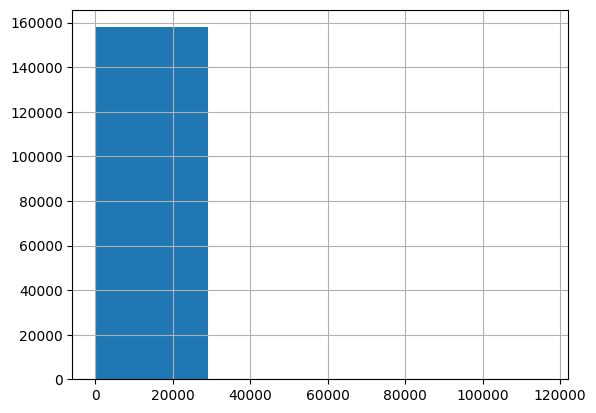

In [ ]:
sorted_df_allnodes_full['total_degree'].hist(bins = 4)

Есть метрика-понятие - степень вершины. Обычно оно угасает как степенной ряд.

In [ ]:
import json
with open(data_dir + 'all_nodes_names_by_class.json', 'r', encoding='utf-8-sig') as f:
    data = json.load(f)
df_allnodes = pd.json_normalize(data)

In [ ]:
df_allnodes.sample(3)

class  \
24       NeoPatientDemographyValue   
21  NeoPatientAnthropometryFeature   
1               NeoAnatomicalValue   

                                           node_names  
24  [мужской, дата, декабрь, март, 31 мая 2022 год...  
21  [рост, вес, индекс массы тела, килограмм, Вес,...  
1   [быстрая, абсолютный, нежная, умеренно понижен...

In [ ]:
len(list(df_allnodes[df_allnodes['class']=='NeoOrganStructure']['node_names'].values)[0])

4313

In [ ]:
all_labels = []
for index, row in df_labels.iterrows():
    all_labels.append(row['Labels'][1:-1])

В итоге получим все классы, которые у нас есть в базе.

In [ ]:
all_labels

['NeoMkb10_level_01',
 'NeoMkb10_level_02',
 'NeoMkb10_level_03',
 'NeoMkb10_level_04',
 'NeoMkb10_level_05',
 'NeoMkb10_level_06',
 'NeoBodySystem',
 'NeoDisease',
 'NeoOrgan',
 'NeoOrganStructure',
 'NeoAnatomicalFeature',
 'NeoAnatomicalValue',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoSymptomFeature',
 'NeoSymptomValue',
 'NeoTherapyFeature',
 'NeoTherapyValue',
 'NeoInspectionFeature',
 'NeoInspectionValue',
 'NeoMedServiceFeature',
 'NeoMedServiceValue',
 'NeoPatient',
 'NeoProtocol',
 'NeoProtocolValue',
 'NeoDiseaseValue',
 'NeoPatientDemographyValue',
 'NeoPatientDemographyFeature',
 'NeoPatientAnthropometryValue',
 'NeoBodyStructure',
 'NeoPatientAnthropometryFeature']

Выберем классы, которые не будем учитывать. Естественно, это классы МКБ10 (вместо них класс NeoDisease) и некоторые другие дополнительные классы.

In [ ]:
exclude_classes = ['NeoMkb10_level_01',
 'NeoMkb10_level_02',
 'NeoMkb10_level_03',
 'NeoMkb10_level_04',
 'NeoMkb10_level_05',
 'NeoMkb10_level_06',
 'NeoPatient',
 'NeoProtocol',
 'NeoProtocolValue',
 'NeoDisease',
 'NeoDiseaseValue',
 'NeoAnatomicalValue',
 'NeoSymptomValue',
 'NeoTherapyValue',
 'NeoInspectionValue',
 'NeoMedServiceValue',
 'NeoPatientDemographyValue',
 'NeoPatientAnthropometryValue',
]

Вычтем из одного списка другой, оставляя очерёдность начального списка.

In [ ]:
final_labels = [item for item in all_labels if item not in set(exclude_classes)]   #   list(set(all_labels) - set(exclude_classes))

In [ ]:
final_labels

['NeoBodySystem',
 'NeoOrgan',
 'NeoOrganStructure',
 'NeoAnatomicalFeature',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoSymptomFeature',
 'NeoTherapyFeature',
 'NeoInspectionFeature',
 'NeoMedServiceFeature',
 'NeoPatientDemographyFeature',
 'NeoBodyStructure',
 'NeoPatientAnthropometryFeature']

Тестовый пример (печень), самый распространенный орган оказался.

In [ ]:
df_liver = pd.read_csv(data_dir + 'liver.csv', sep=',')

In [ ]:
df_liver

sourceLabel                targetLabel  weight
0     NeoOrgan         NeoAnatomicalValue       5
1     NeoOrgan               NeoAnomality      95
2     NeoOrgan              NeoBodyFluids       1
3     NeoOrgan           NeoBodyStructure     156
4     NeoOrgan                 NeoDisease       3
5     NeoOrgan            NeoDiseaseValue      27
6     NeoOrgan       NeoInspectionFeature      14
7     NeoOrgan         NeoInspectionValue      38
8     NeoOrgan       NeoMedServiceFeature       8
9     NeoOrgan                   NeoOrgan      20
10    NeoOrgan          NeoOrganStructure       2
11    NeoOrgan                 NeoPatient    1252
12    NeoOrgan  NeoPatientDemographyValue       3
13    NeoOrgan                NeoProtocol    1252
14    NeoOrgan           NeoProtocolValue      49
15    NeoOrgan            NeoSymptomValue      98
16    NeoOrgan          NeoTherapyFeature       1

Другим запросом CYPHER находится все веса (количество связей между нодами определённых классов).

In [ ]:
# df_weights = pd.read_csv(data_dir + 'weights.csv', sep=',')

In [ ]:
df_weights = pd.read_csv(data_dir + 'weights_modify.csv', sep=',')

In [ ]:
# df_weights = pd.read_csv(data_dir + 'fixture_weights.csv', sep=',')

Определив (тестовые) веса из базы, сделаем маркированную матрицу смежности на всех классах из списка final_labels.

In [ ]:
import numpy as np
n = len(final_labels)
m = len(final_labels)
matrix = np.zeros((n, m))
weights_matrix = np.zeros((n, m))
for index_i, class_type_i in enumerate(final_labels):
  for index_j, class_type_j in enumerate(final_labels):
    # Convert columns to string type before comparison to avoid type errors
    filtered_df = df_weights[
        (df_weights['sourceLabel'].astype(str) == class_type_i) &
        (df_weights['targetLabel'].astype(str) == class_type_j)
    ]
    current_weight = filtered_df['weight']
    if current_weight.empty:
      current_weight = float(0)
    matrix[index_i, index_j] = float(current_weight)

<ipython-input-29-951401e23fde>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[index_i, index_j] = float(current_weight)
<ipython-input-29-951401e23fde>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[index_i, index_j] = float(current_weight)
<ipython-input-29-951401e23fde>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[index_i, index_j] = float(current_weight)
<ipython-input-29-951401e23fde>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  matrix[index_i, index_j] = float(current_weight)
<ipython-input-29-951401e23fde>:16: FutureWarning: Calling float on a single ele

In [ ]:
matrix.shape

(13, 13)

In [ ]:
# df_labeled

In [ ]:
df_labeled = pd.DataFrame(matrix, index=final_labels, columns=final_labels)

In [ ]:
df_labeled.index

Index(['NeoBodySystem', 'NeoOrgan', 'NeoOrganStructure',
       'NeoAnatomicalFeature', 'NeoAnomality', 'NeoBodyFluids',
       'NeoSymptomFeature', 'NeoTherapyFeature', 'NeoInspectionFeature',
       'NeoMedServiceFeature', 'NeoPatientDemographyFeature',
       'NeoBodyStructure', 'NeoPatientAnthropometryFeature'],
      dtype='object')

In [ ]:
import pandas as pd

# Данные вашей матрицы смежности
data = {
    'NeoBodySystem': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'NeoOrgan': [106.0, 2506.0, 2837.0, 290.0, 4852.0, 243.0, 961.0, 268.0, 1332.0, 185.0, 3.0, 1484.0, 0.0],
    'NeoOrganStructure': [0.0, 642.0, 1170.0, 92.0, 2757.0, 81.0, 248.0, 93.0, 278.0, 21.0, 0.0, 657.0, 0.0],
    'NeoAnatomicalFeature': [0.0, 29.0, 49.0, 140.0, 374.0, 27.0, 16.0, 0.0, 9.0, 1.0, 2.0, 25.0, 10.0],
    'NeoAnomality': [0.0, 3285.0, 1607.0, 81.0, 12065.0, 410.0, 1462.0, 1700.0, 455.0, 220.0, 9.0, 2025.0, 0.0],
    'NeoBodyFluids': [0.0, 162.0, 145.0, 3.0, 468.0, 586.0, 265.0, 99.0, 63.0, 19.0, 0.0, 233.0, 0.0],
    'NeoSymptomFeature': [0.0, 664.0, 328.0, 26.0, 1277.0, 55.0, 5611.0, 922.0, 376.0, 103.0, 11.0, 737.0, 44.0],
    'NeoTherapyFeature': [0.0, 692.0, 553.0, 6.0, 1045.0, 415.0, 916.0, 11342.0, 1196.0, 516.0, 14.0, 541.0, 0.0],
    'NeoInspectionFeature': [0.0, 620.0, 260.0, 54.0, 439.0, 91.0, 940.0, 556.0, 1967.0, 131.0, 43.0, 376.0, 25.0],
    'NeoMedServiceFeature': [0.0, 496.0, 264.0, 22.0, 1577.0, 300.0, 432.0, 1196.0, 481.0, 1560.0, 9.0, 385.0, 0.0],
    'NeoPatientDemographyFeature': [0.0, 2.0, 0.0, 0.0, 10.0, 0.0, 11.0, 14.0, 43.0, 9.0, 22.0, 4.0, 4.0],
    'NeoBodyStructure': [0.0, 1459.0, 1582.0, 54.0, 1792.0, 209.0, 1317.0, 267.0, 468.0, 83.0, 4.0, 1245.0, 0.0],
    'NeoPatientAnthropometryFeature': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 25.0, 0.0, 0.0, 0.0, 11.0]
}

# Данные матрицы фикстур
data = {
    'NeoBodySystem': [0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'NeoOrgan': [0.0, 0.0, 100.0, 123.0, 4852.0, 243.0, 961.0, 268.0, 1332.0, 185.0, 3.0, 1484.0, 0.0],
    'NeoOrganStructure': [0.0, 642.0, 0.0, 0.0, 2757.0, 81.0, 248.0, 93.0, 278.0, 21.0, 0.0, 657.0, 0.0],
    'NeoAnatomicalFeature': [0.0, 29.0, 49.0, 0.0, 374.0, 27.0, 16.0, 0.0, 9.0, 1.0, 2.0, 25.0, 10.0],
    'NeoAnomality': [0.0, 3285.0, 1607.0, 81.0, 0.0, 410.0, 1462.0, 1700.0, 455.0, 220.0, 9.0, 2025.0, 0.0],
    'NeoBodyFluids': [0.0, 162.0, 145.0, 3.0, 0.0, 0.0, 265.0, 99.0, 63.0, 19.0, 0.0, 233.0, 0.0],
    'NeoSymptomFeature': [0.0, 664.0, 328.0, 26.0, 1277.0, 55.0, 0.0, 922.0, 376.0, 103.0, 11.0, 737.0, 44.0],
    'NeoTherapyFeature': [0.0, 692.0, 553.0, 6.0, 1045.0, 415.0, 916.0, 0.0, 1196.0, 516.0, 14.0, 541.0, 0.0],
    'NeoInspectionFeature': [0.0, 620.0, 260.0, 54.0, 439.0, 91.0, 940.0, 556.0, 0, 131.0, 43.0, 376.0, 25.0],
    'NeoMedServiceFeature': [0.0, 496.0, 264.0, 22.0, 1577.0, 300.0, 432.0, 1196.0, 481.0, 0.0, 9.0, 385.0, 0.0],
    'NeoPatientDemographyFeature': [0.0, 2.0, 0.0, 0.0, 10.0, 0.0, 11.0, 14.0, 43.0, 9.0, 0.0, 4.0, 4.0],
    'NeoBodyStructure': [0.0, 1459.0, 1582.0, 54.0, 1792.0, 209.0, 1317.0, 267.0, 468.0, 83.0, 4.0, 0.0, 0.0],
    'NeoPatientAnthropometryFeature': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0]
}




# Индексы строки (те же названия классов)
index = ['NeoBodySystem', 'NeoOrgan', 'NeoOrganStructure', 'NeoAnatomicalFeature', 'NeoAnomality', 'NeoBodyFluids', 'NeoSymptomFeature', 'NeoTherapyFeature', 'NeoInspectionFeature', 'NeoMedServiceFeature', 'NeoPatientDemographyFeature', 'NeoBodyStructure', 'NeoPatientAnthropometryFeature']

# Создание DataFrame
df = pd.DataFrame(data=data, index=index)

# # Выведем получившуюся матрицу
# print("Матрица смежности:")
# print(df)

df_labeled = df.copy()
df_labeled

# # Дополнительная обработка: найдем максимальные значения по каждому классу
# max_values_per_class = df.max()
# print("\nМаксимальное значение для каждого класса:")
# print(max_values_per_class)

# # Сохранение матрицы в файл Excel (опционально)
# output_file = 'adjacency_matrix.xlsx'
# df.to_excel(output_file)
# print(f"\nМатрица сохранена в {output_file}")

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             0.0       0.0                0.0   
NeoOrgan                                 13.0       0.0              642.0   
NeoOrganStructure                         0.0     100.0                0.0   
NeoAnatomicalFeature                      0.0     123.0                0.0   
NeoAnomality                              0.0    4852.0             2757.0   
NeoBodyFluids                             0.0     243.0               81.0   
NeoSymptomFeature                         0.0     961.0              248.0   
NeoTherapyFeature                         0.0     268.0               93.0   
NeoInspectionFeature                      0.0    1332.0              278.0   
NeoMedServiceFeature                      0.0     185.0               21.0   
NeoPatientDemographyFeature               0.0       3.0                0.0   
NeoBodyStructure                          0.0    1484.0              657.0   
NeoPatientAnthropometryFeature            0.0       0.0                0.0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    0.0           0.0   
NeoOrgan                                        29.0        3285.0   
NeoOrganStructure                               49.0        1607.0   
NeoAnatomicalFeature                             0.0          81.0   
NeoAnomality                                   374.0           0.0   
NeoBodyFluids                                   27.0         410.0   
NeoSymptomFeature                               16.0        1462.0   
NeoTherapyFeature                                0.0        1700.0   
NeoInspectionFeature                             9.0         455.0   
NeoMedServiceFeature                             1.0         220.0   
NeoPatientDemographyFeature                      2.0           9.0   
NeoBodyStructure                                25.0        2025.0   
NeoPatientAnthropometryFeature                  10.0           0.0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.0                0.0   
NeoOrgan                                162.0              664.0   
NeoOrganStructure                       145.0              328.0   
NeoAnatomicalFeature                      3.0               26.0   
NeoAnomality                              0.0             1277.0   
NeoBodyFluids                             0.0               55.0   
NeoSymptomFeature                       265.0                0.0   
NeoTherapyFeature                        99.0              922.0   
NeoInspectionFeature                     63.0              376.0   
NeoMedServiceFeature                     19.0              103.0   
NeoPatientDemographyFeature               0.0               11.0   
NeoBodyStructure                        233.0              737.0   
NeoPatientAnthropometryFeature            0.0               44.0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.0                   0.0   
NeoOrgan                                    692.0                 620.0   
NeoOrganStructure                           553.0                 260.0   
NeoAnatomicalFeature                          6.0                  54.0   
NeoAnomality                               1045.0                 439.0   
NeoBodyFluids                               415.0                  91.0   
NeoSymptomFeature                           916.0                 940.0   
NeoTherapyFeature                             0.0                 556.0   
NeoInspectionFeature                       1196.0                   0.0   
NeoMedServiceFeature                        516.0                 131.0   
NeoPatientDemographyFeature                  14.0                  43.0   
NeoBodyStructure                            541.0                 376.0   
NeoPatientAnthropometryFeature

In [ ]:
for nh in range(13):
  print(df_labeled.iloc[nh,nh])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Ниже можно внести несколько строк связанных с df_liver (или нет).

 ## А пока посмотрим, как работает классификация и кластеризация на большой матрице.

Импорт специальных библиотек.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


In [ ]:
final_labels

['NeoBodySystem',
 'NeoOrgan',
 'NeoOrganStructure',
 'NeoAnatomicalFeature',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoSymptomFeature',
 'NeoTherapyFeature',
 'NeoInspectionFeature',
 'NeoMedServiceFeature',
 'NeoPatientDemographyFeature',
 'NeoBodyStructure',
 'NeoPatientAnthropometryFeature']

In [ ]:
# df_labeled = df_test

In [ ]:
df_labeled

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             0.0       0.0                0.0   
NeoOrgan                                 13.0       0.0              642.0   
NeoOrganStructure                         0.0     100.0                0.0   
NeoAnatomicalFeature                      0.0     123.0                0.0   
NeoAnomality                              0.0    4852.0             2757.0   
NeoBodyFluids                             0.0     243.0               81.0   
NeoSymptomFeature                         0.0     961.0              248.0   
NeoTherapyFeature                         0.0     268.0               93.0   
NeoInspectionFeature                      0.0    1332.0              278.0   
NeoMedServiceFeature                      0.0     185.0               21.0   
NeoPatientDemographyFeature               0.0       3.0                0.0   
NeoBodyStructure                          0.0    1484.0              657.0   
NeoPatientAnthropometryFeature            0.0       0.0                0.0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    0.0           0.0   
NeoOrgan                                        29.0        3285.0   
NeoOrganStructure                               49.0        1607.0   
NeoAnatomicalFeature                             0.0          81.0   
NeoAnomality                                   374.0           0.0   
NeoBodyFluids                                   27.0         410.0   
NeoSymptomFeature                               16.0        1462.0   
NeoTherapyFeature                                0.0        1700.0   
NeoInspectionFeature                             9.0         455.0   
NeoMedServiceFeature                             1.0         220.0   
NeoPatientDemographyFeature                      2.0           9.0   
NeoBodyStructure                                25.0        2025.0   
NeoPatientAnthropometryFeature                  10.0           0.0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.0                0.0   
NeoOrgan                                162.0              664.0   
NeoOrganStructure                       145.0              328.0   
NeoAnatomicalFeature                      3.0               26.0   
NeoAnomality                              0.0             1277.0   
NeoBodyFluids                             0.0               55.0   
NeoSymptomFeature                       265.0                0.0   
NeoTherapyFeature                        99.0              922.0   
NeoInspectionFeature                     63.0              376.0   
NeoMedServiceFeature                     19.0              103.0   
NeoPatientDemographyFeature               0.0               11.0   
NeoBodyStructure                        233.0              737.0   
NeoPatientAnthropometryFeature            0.0               44.0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.0                   0.0   
NeoOrgan                                    692.0                 620.0   
NeoOrganStructure                           553.0                 260.0   
NeoAnatomicalFeature                          6.0                  54.0   
NeoAnomality                               1045.0                 439.0   
NeoBodyFluids                               415.0                  91.0   
NeoSymptomFeature                           916.0                 940.0   
NeoTherapyFeature                             0.0                 556.0   
NeoInspectionFeature                       1196.0                   0.0   
NeoMedServiceFeature                        516.0                 131.0   
NeoPatientDemographyFeature                  14.0                  43.0   
NeoBodyStructure                            541.0                 376.0   
NeoPatientAnthropometryFeature

In [ ]:
# df_labeled = df_test

In [ ]:
df_test = df_labeled.copy()

Разносим классы NeoOrgan и NeoAnomality.

In [ ]:
df_labeled.iloc[4,1] = df_labeled.iloc[4,1] - 0.3 * df_labeled.iloc[4,1]
df_labeled.iloc[1,4] = df_labeled.iloc[1,4] - 0.3 * df_labeled.iloc[1,4]

Разносим классы NeoOrgan и NeoBodyStructure.

In [ ]:
df_labeled.iloc[11,1] = df_labeled.iloc[11,1] - 0.3 * df_labeled.iloc[11,1]
df_labeled.iloc[1,11] = df_labeled.iloc[1,11] - 0.3 * df_labeled.iloc[1,11]

Разносим классы NeoOrgan и NeoOrganStructure.

In [ ]:
# df_labeled.iloc[2,1] = df_labeled.iloc[2,1] - 0.3 * df_labeled.iloc[2,1]
# df_labeled.iloc[1,2] = df_labeled.iloc[1,2] - 0.3 * df_labeled.iloc[1,2]

Сближаем классы NeoOrganStructure и NeoAnatomicalFeature.


In [ ]:
df_labeled.iloc[2,3] = df_labeled.iloc[2,3] + 0.3 * df_labeled.iloc[2,3]
df_labeled.iloc[3,2] = df_labeled.iloc[3,2] + 0.3 * df_labeled.iloc[3,2]

In [ ]:
# df_labeled.loc['NeoOrgan'] = (df_labeled.loc['NeoOrgan'] - 0.1*df_labeled.loc['NeoOrgan']).apply(int)
# df_labeled.loc['NeoOrganStructure'] = (df_labeled.loc['NeoOrganStructure'] - 0.1*df_labeled.loc['NeoOrganStructure']).apply(int)
# df_labeled.loc['NeoTherapyFeature'] = (df_labeled.loc['NeoTherapyFeature'] + 0.05*df_labeled.loc['NeoTherapyFeature']).apply(int)

In [ ]:
# df_labeled.corr()

In [ ]:
df_labeled_test =  df_labeled.copy()

In [ ]:
# df_labeled_test =  df_labeled.corr().copy()

In [ ]:
anomality_organ = df_labeled_test.iloc[4, 1]

In [ ]:
anomality_organ

np.float64(3396.4)

In [ ]:
# df_labeled_test.iloc[4, 1] = 4000

In [ ]:
for k in range(13):
  df_labeled_test.iloc[k, k] = 0

In [ ]:
df_labeled_test.iloc[4, 1]

np.float64(3396.4)

In [ ]:
# Шаг 1: Создаем матрицу смежности (представляет медицинскую базу данных пациентов)
# adjacency_matrix = np.array([
#     [0, 1, 0, 0.5],
#     [1, 0, 1, 0],
#     [0, 1, 0, 0.7],
#     [0.5, 0, 0.7, 0]
# ])

adjacency_matrix = df_labeled.to_numpy()

In [ ]:
# adjacency_matrix = df_labeled_test.to_numpy()

In [ ]:
adjacency_matrix.shape

(13, 13)

In [ ]:
# Шаг 2: Нормируем матрицу смежности
normalized_adjacency = normalize(adjacency_matrix, norm="l2", axis=1)

In [ ]:
# Шаг 3: Определяем классы (медицинские диагнозы)
medical_classes = final_labels

In [ ]:
# Шаг 4: Классификация с помощью KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn_classifier.fit(normalized_adjacency, medical_classes)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
# Шаг 5: Тестовый класс (можно брать с помощью индекса разные классы)
class_number = 0
test_class = normalized_adjacency[class_number] + np.random.normal(scale=0.1, size=(len(medical_classes)))

In [ ]:
# Шаг 6: Нахождение трех ближайших классов
distances, indices = knn_classifier.kneighbors([test_class])
closest_classes = [medical_classes[i] for i in indices.flatten()]

current_class = final_labels[class_number]
print(f"Первые {knn_classifier.n_neighbors} ближайших класса к тестовому классу, близкому к классу {current_class}:")
for idx, closest_class in enumerate(closest_classes):
    print(f"{idx+1}. Класс: {closest_class}, Расстояние: {distances[0][idx]:.3f}")

Первые 3 ближайших класса к тестовому классу, близкому к классу NeoBodySystem:
1. Класс: NeoBodySystem, Расстояние: 0.343
2. Класс: NeoAnomality, Расстояние: 0.889
3. Класс: NeoBodyStructure, Расстояние: 0.908


In [ ]:
# Шаг 7: Кластеризация медицинских классов
num_clusters = 13  # Предполагаем два основных кластера с классами
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans_model.fit_predict(normalized_adjacency)

# Центры кластеров
centroids = kmeans_model.cluster_centers_

In [ ]:
# Перечень принадлежности классов к своим кластерам
for label, cluster_id in zip(medical_classes, cluster_assignments):
    print(f"Класс {label}: принадлежит кластеру {cluster_id}")

Класс NeoBodySystem: принадлежит кластеру 3
Класс NeoOrgan: принадлежит кластеру 1
Класс NeoOrganStructure: принадлежит кластеру 12
Класс NeoAnatomicalFeature: принадлежит кластеру 8
Класс NeoAnomality: принадлежит кластеру 0
Класс NeoBodyFluids: принадлежит кластеру 4
Класс NeoSymptomFeature: принадлежит кластеру 5
Класс NeoTherapyFeature: принадлежит кластеру 9
Класс NeoInspectionFeature: принадлежит кластеру 11
Класс NeoMedServiceFeature: принадлежит кластеру 6
Класс NeoPatientDemographyFeature: принадлежит кластеру 2
Класс NeoBodyStructure: принадлежит кластеру 10
Класс NeoPatientAnthropometryFeature: принадлежит кластеру 7


In [ ]:
cluster_assignments

array([ 3,  1, 12,  8,  0,  4,  5,  9, 11,  6,  2, 10,  7], dtype=int32)

In [ ]:
# Шаг 8: Оцениваем статистические характеристики кластеров
avg_densities = []  # Средняя плотность узлов в кластере
radiuses = []       # Радиус кластера (максимальное расстояние от центра)

for cluster_idx in range(num_clusters):
    members_indices = np.where(cluster_assignments == cluster_idx)[0]

    if len(members_indices) > 0:
        # Средняя плотность кластера
        density = cdist([centroids[cluster_idx]], normalized_adjacency[members_indices]).mean()
        avg_densities.append(density)

        # Радиус кластера
        radius = cdist([centroids[cluster_idx]], normalized_adjacency[members_indices]).max()
        radiuses.append(radius)
    else:
        avg_densities.append(None)
        radiuses.append(None)

In [ ]:
avg_densities

[np.float64(4.336808689942018e-19),
 np.float64(1.7482234731686756e-18),
 np.float64(1.3877787807814457e-17),
 np.float64(0.0),
 np.float64(1.3877787807814457e-17),
 np.float64(8.690541527449943e-19),
 np.float64(1.1124928701621238e-16),
 np.float64(1.1188630228279524e-16),
 np.float64(6.938893903907228e-18),
 np.float64(0.0),
 np.float64(1.8526854844795106e-18),
 np.float64(1.734723475976807e-18),
 np.float64(0.0)]

In [ ]:
radiuses

[np.float64(4.336808689942018e-19),
 np.float64(1.7482234731686756e-18),
 np.float64(1.3877787807814457e-17),
 np.float64(0.0),
 np.float64(1.3877787807814457e-17),
 np.float64(8.690541527449943e-19),
 np.float64(1.1124928701621238e-16),
 np.float64(1.1188630228279524e-16),
 np.float64(6.938893903907228e-18),
 np.float64(0.0),
 np.float64(1.8526854844795106e-18),
 np.float64(1.734723475976807e-18),
 np.float64(0.0)]

In [ ]:
centroids

array([[0.00000000e+00, 6.43121185e-01, 5.22048377e-01, 7.08183144e-02,
        0.00000000e+00, 0.00000000e+00, 2.41804779e-01, 1.97874702e-01,
        8.31263103e-02, 2.98610914e-01, 1.89353782e-03, 3.39321977e-01,
        0.00000000e+00],
       [4.50684350e-03, 0.00000000e+00, 2.22568733e-01, 1.00537278e-02,
        7.97191280e-01, 5.61622037e-02, 2.30195699e-01, 2.39902747e-01,
        2.14941767e-01, 1.71953414e-01, 6.93360539e-04, 3.54064559e-01,
        3.46680270e-04],
       [0.00000000e+00, 6.17933106e-02, 0.00000000e+00, 4.11955404e-02,
        1.85379932e-01, 0.00000000e+00, 2.26575472e-01, 2.88368783e-01,
        8.85704119e-01, 1.85379932e-01, 0.00000000e+00, 8.23910808e-02,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.27170448e-

In [ ]:
len(centroids), len(radiuses)

(13, 13)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # 🔲 Задайте нужное количество центроидов и радиусов (8 кластеров)
# centroids_test = np.array([
#     [0.5, 0.2, 0.3, 0.1],      # Центроид 1
#     [-0.3, 0.4, 0.2, 0.5],     # Центроид 2
#     [0.1, -0.2, 0.4, 0.3],     # Центроид 3
#     [0.7, 0.6, 0.1, 0.2],      # Центроид 4
#     [-0.4, 0.1, 0.3, 0.6],     # Центроид 5
#     [0.3, -0.5, 0.2, 0.4],     # Центроид 6
#     [-0.2, 0.7, 0.1, 0.3],     # Центроид 7
#     [0.6, 0.1, 0.4, 0.2]       # Центроид 8
# ])

# centroids = centroids

# # Соответствующие радиусы для каждого кластера
# radiuses_test = np.array([0.5, 0.3, 0.4, 0.6, 0.7, 0.5, 0.4, 0.3])

# radiuses = radiuses

# # Используем PCA для снижения размерности до 2D
# pca = PCA(n_components=2)
# centroids_2d = pca.fit_transform(centroids)

# # Цветовая палитра для центроидов и окружностей
# colors = plt.cm.tab20.colors[:len(centroids)]

# # Визуализация
# fig, ax = plt.subplots(figsize=(10, 8))

# # Рисуем центроиды и подписываем их номерами
# for i in range(len(centroids)):
#     ax.scatter(centroids_2d[i, 0], centroids_2d[i, 1], c=colors[i], marker='o', s=100, zorder=10, label=f'Centroid {i}')
#     ax.text(centroids_2d[i, 0], centroids_2d[i, 1], f'{i}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# # Рисуем окружности (радиусы кластеров) теми же цветами
# for i in range(len(radiuses)):
#     circle = plt.Circle((centroids_2d[i, 0], centroids_2d[i, 1]), radius=radiuses[i], fill=False, edgecolor=colors[i], linestyle='--', lw=2)
#     ax.add_patch(circle)

# # Оформление графика
# ax.set_title('Visualization of Centroids with Cluster Radiuses')
# ax.set_xlabel('PCA Dimension 1')
# ax.set_ylabel('PCA Dimension 2')
# ax.legend(title='Clusters', loc='upper right')
# plt.grid(True)
# plt.axis('equal')  # Сохраняет пропорции круга
# plt.show()

Разносим классы NeoOrgan и NeoAnomality.
Разносим классы NeoOrgan и NeoBodyStructure.

Сближаем классы NeoOrganStructure и NeoAnatomicalFeature.

In [ ]:
# Перечень принадлежности классов к своим кластерам
for label, cluster_id in zip(medical_classes, cluster_assignments):
    print(f"Класс {label}: принадлежит кластеру {cluster_id}")

Класс NeoBodySystem: принадлежит кластеру 3
Класс NeoOrgan: принадлежит кластеру 1
Класс NeoOrganStructure: принадлежит кластеру 12
Класс NeoAnatomicalFeature: принадлежит кластеру 8
Класс NeoAnomality: принадлежит кластеру 0
Класс NeoBodyFluids: принадлежит кластеру 4
Класс NeoSymptomFeature: принадлежит кластеру 5
Класс NeoTherapyFeature: принадлежит кластеру 9
Класс NeoInspectionFeature: принадлежит кластеру 11
Класс NeoMedServiceFeature: принадлежит кластеру 6
Класс NeoPatientDemographyFeature: принадлежит кластеру 2
Класс NeoBodyStructure: принадлежит кластеру 10
Класс NeoPatientAnthropometryFeature: принадлежит кластеру 7


## Тестовые изменения

<ipython-input-63-fe99981c7bf5>:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids_2d[i, 0], centroids_2d[i, 1], c=colors[i], marker='o', s=100, zorder=10, label=f'Centroid {i}')


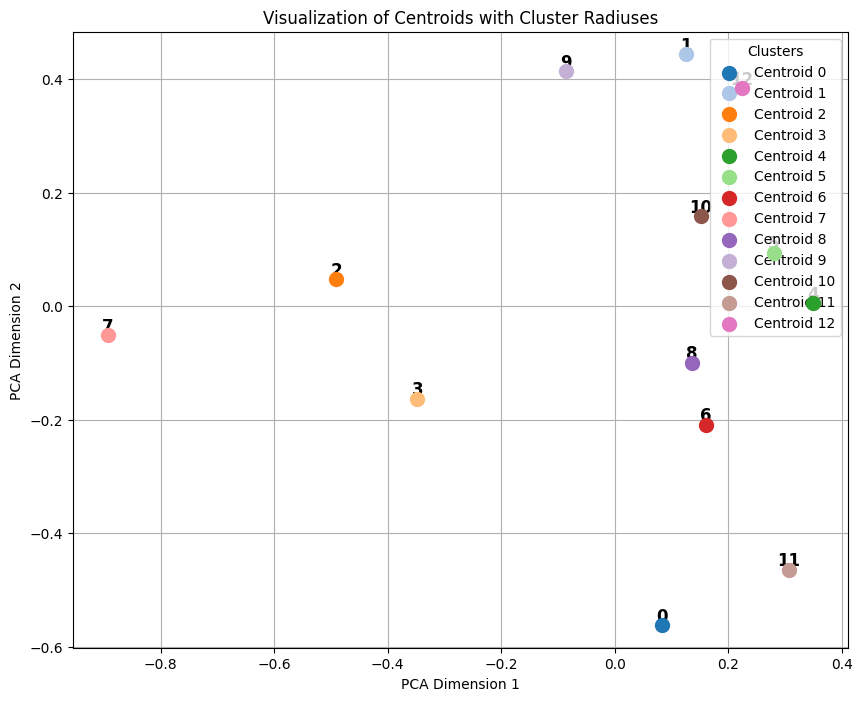

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 🔲 Задайте нужное количество центроидов и радиусов (8 кластеров)
centroids_test = np.array([
    [0.5, 0.2, 0.3, 0.1],      # Центроид 1
    [-0.3, 0.4, 0.2, 0.5],     # Центроид 2
    [0.1, -0.2, 0.4, 0.3],     # Центроид 3
    [0.7, 0.6, 0.1, 0.2],      # Центроид 4
    [-0.4, 0.1, 0.3, 0.6],     # Центроид 5
    [0.3, -0.5, 0.2, 0.4],     # Центроид 6
    [-0.2, 0.7, 0.1, 0.3],     # Центроид 7
    [0.6, 0.1, 0.4, 0.2]       # Центроид 8
])

centroids = centroids

# Соответствующие радиусы для каждого кластера
radiuses_test = np.array([0.5, 0.3, 0.4, 0.6, 0.7, 0.5, 0.4, 0.3])

radiuses = radiuses

# Используем PCA для снижения размерности до 2D
pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(centroids)

# Цветовая палитра для центроидов и окружностей
colors = plt.cm.tab20.colors[:len(centroids)]

# Визуализация
fig, ax = plt.subplots(figsize=(10, 8))

# Рисуем центроиды и подписываем их номерами
for i in range(len(centroids)):
    ax.scatter(centroids_2d[i, 0], centroids_2d[i, 1], c=colors[i], marker='o', s=100, zorder=10, label=f'Centroid {i}')
    ax.text(centroids_2d[i, 0], centroids_2d[i, 1], f'{i}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Рисуем окружности (радиусы кластеров) теми же цветами
for i in range(len(radiuses)):
    circle = plt.Circle((centroids_2d[i, 0], centroids_2d[i, 1]), radius=radiuses[i], fill=False, edgecolor=colors[i], linestyle='--', lw=2)
    ax.add_patch(circle)

# Оформление графика
ax.set_title('Visualization of Centroids with Cluster Radiuses')
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.legend(title='Clusters', loc='upper right')
plt.grid(True)
plt.axis('equal')  # Сохраняет пропорции круга
plt.show()

Кластер = класс.
Тогда рядом оказываются классы 0, 11, 12 Это классы NeoAnomality, NeoBodyStructure, NeoOrgan. <br>
<br>
В стороне между ними классы 3, 10 Это классы NeoBodySystem, NeoAnatomicalFeature. Класс NeoBodySystem можно выделить другим способом, он соединяется только с NeoOrgan. Тогда NeoAnatomicalFeature можно выделить отдельно. <br>
<br>
Класс 6 NeoOrganStructure находится между этими классами и ближе всего к классу NeoOrgan. <br>
<br>
Остальные классы находятся удаленно друг от друга. Если только классы 5, 7 относительно близки друг другу. Это классы NeoMedServiceFeature и NeoTherapyFeature. По идеи это одинаковые по своей сути классы. Это некое действие, рекомендованное врачом. Мы раньше объединяли классы. Полагаю, до объединения они находились бы рядом. <br>
<br>
NeoSymptomFeature (9 класс) находится далеко от других классов.

In [ ]:
# Перечень принадлежности классов к своим кластерам
for label, cluster_id in zip(medical_classes, cluster_assignments):
    print(f"Класс {label}: принадлежит кластеру {cluster_id}")

Класс NeoBodySystem: принадлежит кластеру 3
Класс NeoOrgan: принадлежит кластеру 1
Класс NeoOrganStructure: принадлежит кластеру 12
Класс NeoAnatomicalFeature: принадлежит кластеру 8
Класс NeoAnomality: принадлежит кластеру 0
Класс NeoBodyFluids: принадлежит кластеру 4
Класс NeoSymptomFeature: принадлежит кластеру 5
Класс NeoTherapyFeature: принадлежит кластеру 9
Класс NeoInspectionFeature: принадлежит кластеру 11
Класс NeoMedServiceFeature: принадлежит кластеру 6
Класс NeoPatientDemographyFeature: принадлежит кластеру 2
Класс NeoBodyStructure: принадлежит кластеру 10
Класс NeoPatientAnthropometryFeature: принадлежит кластеру 7


<table border="1">
  <tr>
    <th>Кластер</th>
    <th>Элементы</th>
  </tr>
  <tr>
    <td>0</td>
    <td>NeoBodyFluids<br>NeoSymptomValue</td>
  </tr>
  <tr>
    <td>1</td>
    <td>NeoDisease<br>NeoOrgan<br>NeoOrganStructure<br>NeoAnomality<br>NeoBodyStructure</td>
  </tr>
  <tr>
    <td>2</td>
    <td>NeoSymptomFeature<br>NeoPatientAnthropometryValue<br>NeoPatientAnthropometryFeature</td>
  </tr>
  <tr>
    <td>3</td>
    <td>NeoPatientDemographyValue<br>NeoPatientDemographyFeature</td>
  </tr>
  <tr>
    <td>4</td>
    <td>NeoBodySystem<br>NeoAnatomicalFeature<br>NeoAnatomicalValue</td>
  </tr>
  <tr>
    <td>5</td>
    <td>NeoTherapyFeature<br>NeoTherapyValue</td>
  </tr>
  <tr>
    <td>6</td>
    <td>NeoInspectionFeature<br>NeoInspectionValue</td>
  </tr>
  <tr>
    <td>7</td>
    <td>NeoMedServiceFeature<br>NeoMedServiceValue</td>
  </tr>
</table>

Повторил ячейку внизу.

### А как сюда приписать энергию?

In [ ]:
df_labeled

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             0.0       0.0                0.0   
NeoOrgan                                 13.0       0.0              642.0   
NeoOrganStructure                         0.0     100.0                0.0   
NeoAnatomicalFeature                      0.0     123.0                0.0   
NeoAnomality                              0.0    3396.4             2757.0   
NeoBodyFluids                             0.0     243.0               81.0   
NeoSymptomFeature                         0.0     961.0              248.0   
NeoTherapyFeature                         0.0     268.0               93.0   
NeoInspectionFeature                      0.0    1332.0              278.0   
NeoMedServiceFeature                      0.0     185.0               21.0   
NeoPatientDemographyFeature               0.0       3.0                0.0   
NeoBodyStructure                          0.0    1038.8              657.0   
NeoPatientAnthropometryFeature            0.0       0.0                0.0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    0.0           0.0   
NeoOrgan                                        29.0        2299.5   
NeoOrganStructure                               63.7        1607.0   
NeoAnatomicalFeature                             0.0          81.0   
NeoAnomality                                   374.0           0.0   
NeoBodyFluids                                   27.0         410.0   
NeoSymptomFeature                               16.0        1462.0   
NeoTherapyFeature                                0.0        1700.0   
NeoInspectionFeature                             9.0         455.0   
NeoMedServiceFeature                             1.0         220.0   
NeoPatientDemographyFeature                      2.0           9.0   
NeoBodyStructure                                25.0        2025.0   
NeoPatientAnthropometryFeature                  10.0           0.0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.0                0.0   
NeoOrgan                                162.0              664.0   
NeoOrganStructure                       145.0              328.0   
NeoAnatomicalFeature                      3.0               26.0   
NeoAnomality                              0.0             1277.0   
NeoBodyFluids                             0.0               55.0   
NeoSymptomFeature                       265.0                0.0   
NeoTherapyFeature                        99.0              922.0   
NeoInspectionFeature                     63.0              376.0   
NeoMedServiceFeature                     19.0              103.0   
NeoPatientDemographyFeature               0.0               11.0   
NeoBodyStructure                        233.0              737.0   
NeoPatientAnthropometryFeature            0.0               44.0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.0                   0.0   
NeoOrgan                                    692.0                 620.0   
NeoOrganStructure                           553.0                 260.0   
NeoAnatomicalFeature                          6.0                  54.0   
NeoAnomality                               1045.0                 439.0   
NeoBodyFluids                               415.0                  91.0   
NeoSymptomFeature                           916.0                 940.0   
NeoTherapyFeature                             0.0                 556.0   
NeoInspectionFeature                       1196.0                   0.0   
NeoMedServiceFeature                        516.0                 131.0   
NeoPatientDemographyFeature                  14.0                  43.0   
NeoBodyStructure                            541.0                 376.0   
NeoPatientAnthropometryFeature

In [ ]:
df_labeled_zerodiag = df_labeled.copy()

In [ ]:
import numpy as np
np.fill_diagonal(df_labeled_zerodiag.values, 0)

In [ ]:
df_labeled_zerodiag

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             0.0       0.0                0.0   
NeoOrgan                                 13.0       0.0              642.0   
NeoOrganStructure                         0.0     100.0                0.0   
NeoAnatomicalFeature                      0.0     123.0                0.0   
NeoAnomality                              0.0    3396.4             2757.0   
NeoBodyFluids                             0.0     243.0               81.0   
NeoSymptomFeature                         0.0     961.0              248.0   
NeoTherapyFeature                         0.0     268.0               93.0   
NeoInspectionFeature                      0.0    1332.0              278.0   
NeoMedServiceFeature                      0.0     185.0               21.0   
NeoPatientDemographyFeature               0.0       3.0                0.0   
NeoBodyStructure                          0.0    1038.8              657.0   
NeoPatientAnthropometryFeature            0.0       0.0                0.0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    0.0           0.0   
NeoOrgan                                        29.0        2299.5   
NeoOrganStructure                               63.7        1607.0   
NeoAnatomicalFeature                             0.0          81.0   
NeoAnomality                                   374.0           0.0   
NeoBodyFluids                                   27.0         410.0   
NeoSymptomFeature                               16.0        1462.0   
NeoTherapyFeature                                0.0        1700.0   
NeoInspectionFeature                             9.0         455.0   
NeoMedServiceFeature                             1.0         220.0   
NeoPatientDemographyFeature                      2.0           9.0   
NeoBodyStructure                                25.0        2025.0   
NeoPatientAnthropometryFeature                  10.0           0.0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.0                0.0   
NeoOrgan                                162.0              664.0   
NeoOrganStructure                       145.0              328.0   
NeoAnatomicalFeature                      3.0               26.0   
NeoAnomality                              0.0             1277.0   
NeoBodyFluids                             0.0               55.0   
NeoSymptomFeature                       265.0                0.0   
NeoTherapyFeature                        99.0              922.0   
NeoInspectionFeature                     63.0              376.0   
NeoMedServiceFeature                     19.0              103.0   
NeoPatientDemographyFeature               0.0               11.0   
NeoBodyStructure                        233.0              737.0   
NeoPatientAnthropometryFeature            0.0               44.0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.0                   0.0   
NeoOrgan                                    692.0                 620.0   
NeoOrganStructure                           553.0                 260.0   
NeoAnatomicalFeature                          6.0                  54.0   
NeoAnomality                               1045.0                 439.0   
NeoBodyFluids                               415.0                  91.0   
NeoSymptomFeature                           916.0                 940.0   
NeoTherapyFeature                             0.0                 556.0   
NeoInspectionFeature                       1196.0                   0.0   
NeoMedServiceFeature                        516.0                 131.0   
NeoPatientDemographyFeature                  14.0                  43.0   
NeoBodyStructure                            541.0                 376.0   
NeoPatientAnthropometryFeature

In [ ]:
corr_labeled = df_labeled.corr()

In [ ]:
corr_labeled_zerodiag = df_labeled_zerodiag.corr()

In [ ]:
corr_labeled_zerodiag

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                        1.000000 -0.184672           0.109227   
NeoOrgan                            -0.184672  1.000000           0.909584   
NeoOrganStructure                    0.109227  0.909584           1.000000   
NeoAnatomicalFeature                -0.041068  0.868460           0.949566   
NeoAnomality                         0.514753 -0.114730          -0.035261   
NeoBodyFluids                        0.268813  0.039453          -0.015505   
NeoSymptomFeature                    0.223658  0.668547           0.772640   
NeoTherapyFeature                    0.167242  0.683895           0.545449   
NeoInspectionFeature                 0.353826  0.274673           0.317832   
NeoMedServiceFeature                 0.061096  0.750819           0.770891   
NeoPatientDemographyFeature         -0.139554  0.401925           0.112715   
NeoBodyStructure                     0.225745  0.561241           0.598582   
NeoPatientAnthropometryFeature      -0.046911  0.231826          -0.033299   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                              -0.041068      0.514753   
NeoOrgan                                    0.868460     -0.114730   
NeoOrganStructure                           0.949566     -0.035261   
NeoAnatomicalFeature                        1.000000     -0.169500   
NeoAnomality                               -0.169500      1.000000   
NeoBodyFluids                              -0.152435      0.871455   
NeoSymptomFeature                           0.676797      0.390289   
NeoTherapyFeature                           0.469810      0.239914   
NeoInspectionFeature                        0.208280      0.704866   
NeoMedServiceFeature                        0.726509      0.247958   
NeoPatientDemographyFeature                 0.024958     -0.020049   
NeoBodyStructure                            0.671396      0.316804   
NeoPatientAnthropometryFeature             -0.105871     -0.084875   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                        0.268813           0.223658   
NeoOrgan                             0.039453           0.668547   
NeoOrganStructure                   -0.015505           0.772640   
NeoAnatomicalFeature                -0.152435           0.676797   
NeoAnomality                         0.871455           0.390289   
NeoBodyFluids                        1.000000           0.201718   
NeoSymptomFeature                    0.201718           1.000000   
NeoTherapyFeature                    0.400471           0.386573   
NeoInspectionFeature                 0.773849           0.422634   
NeoMedServiceFeature                 0.140690           0.896020   
NeoPatientDemographyFeature          0.078037           0.223520   
NeoBodyStructure                     0.371960           0.461868   
NeoPatientAnthropometryFeature      -0.006551           0.017971   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                            0.167242              0.353826   
NeoOrgan                                 0.683895              0.274673   
NeoOrganStructure                        0.545449              0.317832   
NeoAnatomicalFeature                     0.469810              0.208280   
NeoAnomality                             0.239914              0.704866   
NeoBodyFluids                            0.400471              0.773849   
NeoSymptomFeature                        0.386573              0.422634   
NeoTherapyFeature                        1.000000              0.394332   
NeoInspectionFeature                     0.394332              1.000000   
NeoMedServiceFeature                     0.439870              0.527061   
NeoPatientDemographyFeature              0.597905              0.003847   
NeoBodyStructure                         0.664708              0.595937   
NeoPatientAnthropometryFeature

In [ ]:
corr_labeled_final = corr_labeled.drop(index='NeoBodySystem', columns='NeoBodySystem')

In [ ]:
corr_labeled_zerodiag_final = corr_labeled_zerodiag.drop(index='NeoBodySystem', columns='NeoBodySystem')

In [ ]:
corr_labeled_final

NeoOrgan  NeoOrganStructure  \
NeoOrgan                        1.000000           0.909584   
NeoOrganStructure               0.909584           1.000000   
NeoAnatomicalFeature            0.868460           0.949566   
NeoAnomality                   -0.114730          -0.035261   
NeoBodyFluids                   0.039453          -0.015505   
NeoSymptomFeature               0.668547           0.772640   
NeoTherapyFeature               0.683895           0.545449   
NeoInspectionFeature            0.274673           0.317832   
NeoMedServiceFeature            0.750819           0.770891   
NeoPatientDemographyFeature     0.401925           0.112715   
NeoBodyStructure                0.561241           0.598582   
NeoPatientAnthropometryFeature  0.231826          -0.033299   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoOrgan                                    0.868460     -0.114730   
NeoOrganStructure                           0.949566     -0.035261   
NeoAnatomicalFeature                        1.000000     -0.169500   
NeoAnomality                               -0.169500      1.000000   
NeoBodyFluids                              -0.152435      0.871455   
NeoSymptomFeature                           0.676797      0.390289   
NeoTherapyFeature                           0.469810      0.239914   
NeoInspectionFeature                        0.208280      0.704866   
NeoMedServiceFeature                        0.726509      0.247958   
NeoPatientDemographyFeature                 0.024958     -0.020049   
NeoBodyStructure                            0.671396      0.316804   
NeoPatientAnthropometryFeature             -0.105871     -0.084875   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoOrgan                             0.039453           0.668547   
NeoOrganStructure                   -0.015505           0.772640   
NeoAnatomicalFeature                -0.152435           0.676797   
NeoAnomality                         0.871455           0.390289   
NeoBodyFluids                        1.000000           0.201718   
NeoSymptomFeature                    0.201718           1.000000   
NeoTherapyFeature                    0.400471           0.386573   
NeoInspectionFeature                 0.773849           0.422634   
NeoMedServiceFeature                 0.140690           0.896020   
NeoPatientDemographyFeature          0.078037           0.223520   
NeoBodyStructure                     0.371960           0.461868   
NeoPatientAnthropometryFeature      -0.006551           0.017971   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoOrgan                                 0.683895              0.274673   
NeoOrganStructure                        0.545449              0.317832   
NeoAnatomicalFeature                     0.469810              0.208280   
NeoAnomality                             0.239914              0.704866   
NeoBodyFluids                            0.400471              0.773849   
NeoSymptomFeature                        0.386573              0.422634   
NeoTherapyFeature                        1.000000              0.394332   
NeoInspectionFeature                     0.394332              1.000000   
NeoMedServiceFeature                     0.439870              0.527061   
NeoPatientDemographyFeature              0.597905              0.003847   
NeoBodyStructure                         0.664708              0.595937   
NeoPatientAnthropometryFeature           0.542977             -0.236329   

                                NeoMedServiceFeature  \
NeoOrgan                                    0.750819   
NeoOrganStructure                           0.770891   
NeoAnatomicalFeature                        0.726509   
NeoAnomality                                0.247958   
NeoBodyFluids                               0.140690   
NeoSymptomFeature                           0.896020   
NeoTherapyFeature                           0.43

In [ ]:
corr_labeled_zerodiag_final

NeoOrgan  NeoOrganStructure  \
NeoOrgan                        1.000000           0.909584   
NeoOrganStructure               0.909584           1.000000   
NeoAnatomicalFeature            0.868460           0.949566   
NeoAnomality                   -0.114730          -0.035261   
NeoBodyFluids                   0.039453          -0.015505   
NeoSymptomFeature               0.668547           0.772640   
NeoTherapyFeature               0.683895           0.545449   
NeoInspectionFeature            0.274673           0.317832   
NeoMedServiceFeature            0.750819           0.770891   
NeoPatientDemographyFeature     0.401925           0.112715   
NeoBodyStructure                0.561241           0.598582   
NeoPatientAnthropometryFeature  0.231826          -0.033299   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoOrgan                                    0.868460     -0.114730   
NeoOrganStructure                           0.949566     -0.035261   
NeoAnatomicalFeature                        1.000000     -0.169500   
NeoAnomality                               -0.169500      1.000000   
NeoBodyFluids                              -0.152435      0.871455   
NeoSymptomFeature                           0.676797      0.390289   
NeoTherapyFeature                           0.469810      0.239914   
NeoInspectionFeature                        0.208280      0.704866   
NeoMedServiceFeature                        0.726509      0.247958   
NeoPatientDemographyFeature                 0.024958     -0.020049   
NeoBodyStructure                            0.671396      0.316804   
NeoPatientAnthropometryFeature             -0.105871     -0.084875   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoOrgan                             0.039453           0.668547   
NeoOrganStructure                   -0.015505           0.772640   
NeoAnatomicalFeature                -0.152435           0.676797   
NeoAnomality                         0.871455           0.390289   
NeoBodyFluids                        1.000000           0.201718   
NeoSymptomFeature                    0.201718           1.000000   
NeoTherapyFeature                    0.400471           0.386573   
NeoInspectionFeature                 0.773849           0.422634   
NeoMedServiceFeature                 0.140690           0.896020   
NeoPatientDemographyFeature          0.078037           0.223520   
NeoBodyStructure                     0.371960           0.461868   
NeoPatientAnthropometryFeature      -0.006551           0.017971   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoOrgan                                 0.683895              0.274673   
NeoOrganStructure                        0.545449              0.317832   
NeoAnatomicalFeature                     0.469810              0.208280   
NeoAnomality                             0.239914              0.704866   
NeoBodyFluids                            0.400471              0.773849   
NeoSymptomFeature                        0.386573              0.422634   
NeoTherapyFeature                        1.000000              0.394332   
NeoInspectionFeature                     0.394332              1.000000   
NeoMedServiceFeature                     0.439870              0.527061   
NeoPatientDemographyFeature              0.597905              0.003847   
NeoBodyStructure                         0.664708              0.595937   
NeoPatientAnthropometryFeature           0.542977             -0.236329   

                                NeoMedServiceFeature  \
NeoOrgan                                    0.750819   
NeoOrganStructure                           0.770891   
NeoAnatomicalFeature                        0.726509   
NeoAnomality                                0.247958   
NeoBodyFluids                               0.140690   
NeoSymptomFeature                           0.896020   
NeoTherapyFeature                           0.43

In [ ]:
threshold = 0.5
binary_df = corr_labeled_final >= threshold
result_df = binary_df.astype(int)

In [ ]:
result_df

NeoOrgan  NeoOrganStructure  \
NeoOrgan                               1                  1   
NeoOrganStructure                      1                  1   
NeoAnatomicalFeature                   1                  1   
NeoAnomality                           0                  0   
NeoBodyFluids                          0                  0   
NeoSymptomFeature                      1                  1   
NeoTherapyFeature                      1                  1   
NeoInspectionFeature                   0                  0   
NeoMedServiceFeature                   1                  1   
NeoPatientDemographyFeature            0                  0   
NeoBodyStructure                       1                  1   
NeoPatientAnthropometryFeature         0                  0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoOrgan                                           1             0   
NeoOrganStructure                                  1             0   
NeoAnatomicalFeature                               1             0   
NeoAnomality                                       0             1   
NeoBodyFluids                                      0             1   
NeoSymptomFeature                                  1             0   
NeoTherapyFeature                                  0             0   
NeoInspectionFeature                               0             1   
NeoMedServiceFeature                               1             0   
NeoPatientDemographyFeature                        0             0   
NeoBodyStructure                                   1             0   
NeoPatientAnthropometryFeature                     0             0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoOrgan                                    0                  1   
NeoOrganStructure                           0                  1   
NeoAnatomicalFeature                        0                  1   
NeoAnomality                                1                  0   
NeoBodyFluids                               1                  0   
NeoSymptomFeature                           0                  1   
NeoTherapyFeature                           0                  0   
NeoInspectionFeature                        1                  0   
NeoMedServiceFeature                        0                  1   
NeoPatientDemographyFeature                 0                  0   
NeoBodyStructure                            0                  0   
NeoPatientAnthropometryFeature              0                  0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoOrgan                                        1                     0   
NeoOrganStructure                               1                     0   
NeoAnatomicalFeature                            0                     0   
NeoAnomality                                    0                     1   
NeoBodyFluids                                   0                     1   
NeoSymptomFeature                               0                     0   
NeoTherapyFeature                               1                     0   
NeoInspectionFeature                            0                     1   
NeoMedServiceFeature                            0                     1   
NeoPatientDemographyFeature                     1                     0   
NeoBodyStructure                                1                     1   
NeoPatientAnthropometryFeature                  1                     0   

                                NeoMedServiceFeature  \
NeoOrgan                                           1   
NeoOrganStructure                                  1   
NeoAnatomicalFeature                               1   
NeoAnomality                                       0   
NeoBodyFluids                                      0   
NeoSymptomFeature                                  1   
NeoTherapyFeature                               

In [ ]:
matrix_final = df_labeled.drop(index='NeoBodySystem', columns='NeoBodySystem').to_numpy()

In [ ]:
matrix_final.shape

(12, 12)

In [ ]:
matrix_final_zerodiag = df_labeled_zerodiag.drop(index='NeoBodySystem', columns='NeoBodySystem').to_numpy()

In [ ]:
final_labels = result_df.columns.to_list()

In [ ]:
final_labels

['NeoOrgan',
 'NeoOrganStructure',
 'NeoAnatomicalFeature',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoSymptomFeature',
 'NeoTherapyFeature',
 'NeoInspectionFeature',
 'NeoMedServiceFeature',
 'NeoPatientDemographyFeature',
 'NeoBodyStructure',
 'NeoPatientAnthropometryFeature']

<ipython-input-83-dcd33069336b>:58: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(
<ipython-input-83-dcd33069336b>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.9])


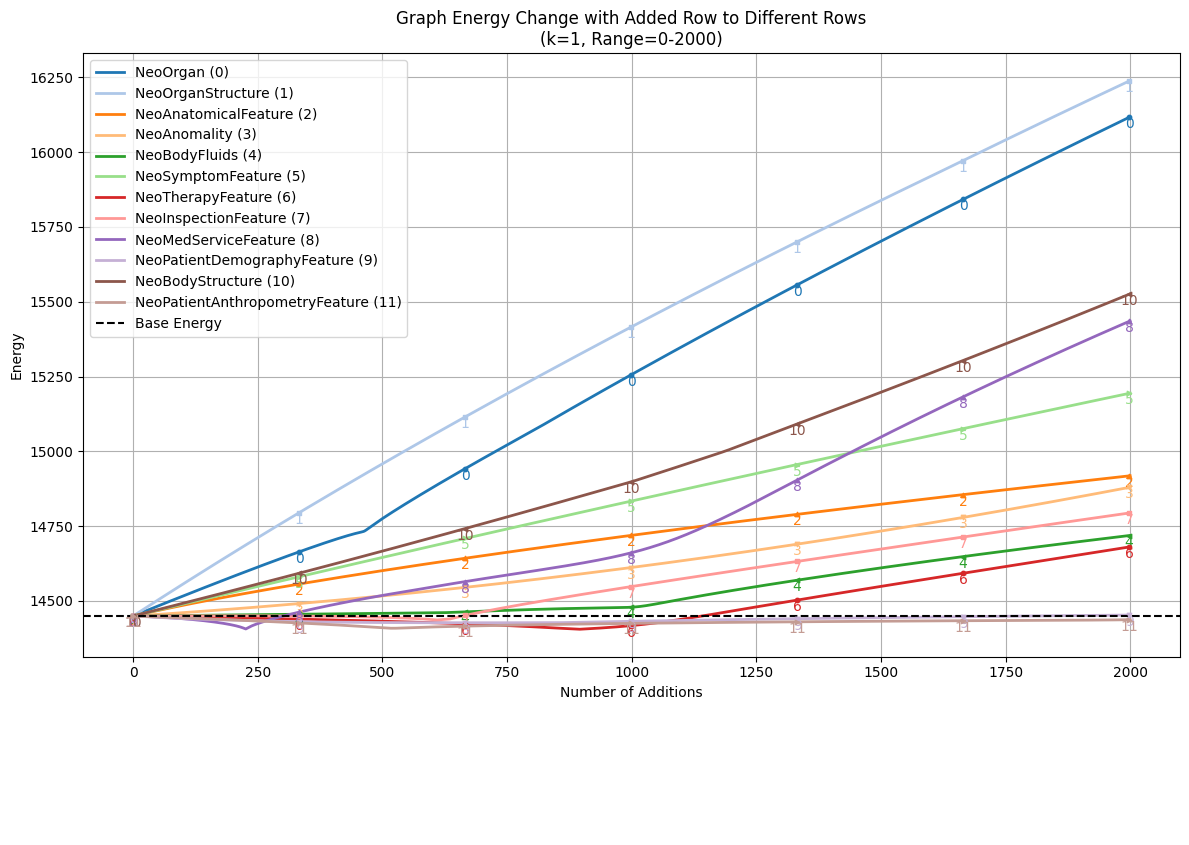

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_energy(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return sum(abs(eigenvalue) for eigenvalue in eigenvalues)

def add_row_to_matrix(matrix, row_index, added_row, num_times=1):
    new_matrix = matrix.copy()
    for _ in range(num_times):
        new_matrix[row_index] += added_row
    return new_matrix

def plot_energies_with_labels(matrix, added_row, k, max_additions, final_labels, df_labeled):
    row_indices = list(range(len(matrix)))

    energies = {}
    base_energy = compute_energy(matrix)

    for row_index in row_indices:
        energies[row_index] = []
        energies[row_index].append(base_energy)
        current_matrix = matrix.copy()

        # added_row[row_index] = - 0.5 # added_row[row_index] # 1

        for i in range(max_additions + 1):
            current_matrix = add_row_to_matrix(current_matrix, row_index, added_row, k)
            energy = compute_energy(current_matrix)
            energies[row_index].append(energy)

    # Limit plotting to range from 0 to max_additions
    start_plot_idx = 0
    end_plot_idx = max_additions

    # Plotting the results
    fig, ax = plt.subplots(figsize=(12, 8))

    # Increase the number of available colors
    colors = plt.cm.tab20.colors  # This provides more colors from the tab20 colormap

    markers = ['o', 's', '^', 'v', '<', '>'] * len(row_indices)  # Various markers for different lines

    for idx, color, marker in zip(row_indices, colors[:len(row_indices)], markers):
        # Plot each energy curve without markers
        ax.plot(
            list(range(start_plot_idx, end_plot_idx + 1)),
            energies[idx][start_plot_idx:end_plot_idx + 1],
            label=f'{final_labels[idx]} ({idx})',
            c=color,
            linewidth=2,  # Увеличим толщину линии для лучшей видимости
            marker=None  # Убираем маркеры с основной линии
        )

        # Display markers only every 10 points within selected range
        step_size = int((end_plot_idx - start_plot_idx) / 6)  # Calculate how often to show markers based on selected range
        ax.scatter(
            np.arange(start_plot_idx, end_plot_idx + 1, step_size),
            [energies[idx][i] for i in range(start_plot_idx, end_plot_idx + 1, step_size)],
            s=10,  # Marker size can be adjusted here
            c=color,
            marker=marker,
            zorder=3  # Повышаем приоритет маркеров над линией
        )

        # Add text annotations showing row indices near markers
        for x, y in zip(np.arange(start_plot_idx, end_plot_idx + 1, step_size), [energies[idx][i] for i in range(start_plot_idx, end_plot_idx + 1, step_size)]):
            ax.text(x, y, f"{idx}", ha="center", va="top", fontsize=10, color=color)

    ax.axhline(y=base_energy, linestyle='--', color='k', label='Base Energy')
    ax.set_xlabel('Number of Additions')
    ax.set_ylabel('Energy')
    ax.set_title(f'Graph Energy Change with Added Row to Different Rows\n(k={k}, Range={start_plot_idx}-{end_plot_idx})')
    ax.legend()
    ax.grid(True)

    # Create a second axis below the first one for table and vector display
    ax_table = fig.add_axes([0.1, -0.15, 0.8, 0.08])  # Position the axes below the main plot
    ax_table.axis('off')  # Turn off the axes lines and ticks

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    # ax.set_ylim(68000, 72000)
    plt.show()

# Пример использования
np.random.seed(42)

# Assuming you already have your matrix and final_labels
# For example:
# matrix = ...
# final_labels = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']
# df_labeled = df_labeled_final #  pd.DataFrame(matrix, index=final_labels, columns=final_labels)

# Generate a random added_row for demonstration purposes
# p = 2  # Number of positive values in the random vector
# added_row = np.zeros(len(matrix))  # Ensure added_row has same length as matrix's rows
# indices = np.random.choice(len(matrix), size=p, replace=False)
# added_row[indices] = np.random.randint(1, 11, size=p)

added_row_liver = np.array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])
threshold = 0.3
binary_df = corr_labeled_final >= threshold
result_df = binary_df.astype(int)
# added_row_liver = result_df['NeoDisease'].values
# added_row_liver[0] = 0
added_row_liver = result_df['NeoBodyFluids'].values
added_row_liver[4] = -1
# added_row_liver[10] = -1
# added_row_liver[6] = -1

added_row_liver = result_df['NeoOrgan'].values
# added_row_liver[0] = -1

added_row_liver = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])
added_row = added_row_liver


num_experiments = 2000  # Maximum number of additions

plot_energies_with_labels(matrix_final, added_row, k=1, max_additions=num_experiments, final_labels=final_labels, df_labeled=result_df)

In [ ]:
added_row_liver

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
df_liver

sourceLabel                targetLabel  weight
0     NeoOrgan         NeoAnatomicalValue       5
1     NeoOrgan               NeoAnomality      95
2     NeoOrgan              NeoBodyFluids       1
3     NeoOrgan           NeoBodyStructure     156
4     NeoOrgan                 NeoDisease       3
5     NeoOrgan            NeoDiseaseValue      27
6     NeoOrgan       NeoInspectionFeature      14
7     NeoOrgan         NeoInspectionValue      38
8     NeoOrgan       NeoMedServiceFeature       8
9     NeoOrgan                   NeoOrgan      20
10    NeoOrgan          NeoOrganStructure       2
11    NeoOrgan                 NeoPatient    1252
12    NeoOrgan  NeoPatientDemographyValue       3
13    NeoOrgan                NeoProtocol    1252
14    NeoOrgan           NeoProtocolValue      49
15    NeoOrgan            NeoSymptomValue      98
16    NeoOrgan          NeoTherapyFeature       1

In [ ]:
df_liver['targetLabel'].tolist()

['NeoAnatomicalValue',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoBodyStructure',
 'NeoDisease',
 'NeoDiseaseValue',
 'NeoInspectionFeature',
 'NeoInspectionValue',
 'NeoMedServiceFeature',
 'NeoOrgan',
 'NeoOrganStructure',
 'NeoPatient',
 'NeoPatientDemographyValue',
 'NeoProtocol',
 'NeoProtocolValue',
 'NeoSymptomValue',
 'NeoTherapyFeature']

In [ ]:
df_liver['weight'].tolist()

[5, 95, 1, 156, 3, 27, 14, 38, 8, 20, 2, 1252, 3, 1252, 49, 98, 1]

In [ ]:
df_liver['weight'].to_numpy()

array([   5,   95,    1,  156,    3,   27,   14,   38,    8,   20,    2,
       1252,    3, 1252,   49,   98,    1])

In [ ]:
not_norm = df_liver['weight'].to_numpy()

In [ ]:
import numpy as np
norm = np.linalg.norm(not_norm)

In [ ]:
norm

np.float64(1784.168153510201)

In [ ]:
final_labels

['NeoOrgan',
 'NeoOrganStructure',
 'NeoAnatomicalFeature',
 'NeoAnomality',
 'NeoBodyFluids',
 'NeoSymptomFeature',
 'NeoTherapyFeature',
 'NeoInspectionFeature',
 'NeoMedServiceFeature',
 'NeoPatientDemographyFeature',
 'NeoBodyStructure',
 'NeoPatientAnthropometryFeature']

In [ ]:
0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0

(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0)

In [ ]:
df_liver

sourceLabel                targetLabel  weight
0     NeoOrgan         NeoAnatomicalValue       5
1     NeoOrgan               NeoAnomality      95
2     NeoOrgan              NeoBodyFluids       1
3     NeoOrgan           NeoBodyStructure     156
4     NeoOrgan                 NeoDisease       3
5     NeoOrgan            NeoDiseaseValue      27
6     NeoOrgan       NeoInspectionFeature      14
7     NeoOrgan         NeoInspectionValue      38
8     NeoOrgan       NeoMedServiceFeature       8
9     NeoOrgan                   NeoOrgan      20
10    NeoOrgan          NeoOrganStructure       2
11    NeoOrgan                 NeoPatient    1252
12    NeoOrgan  NeoPatientDemographyValue       3
13    NeoOrgan                NeoProtocol    1252
14    NeoOrgan           NeoProtocolValue      49
15    NeoOrgan            NeoSymptomValue      98
16    NeoOrgan          NeoTherapyFeature       1

In [ ]:
import pandas as pd

# Список классов
classes = [
    'NeoBodySystem', 'NeoOrgan', 'NeoOrganStructure', 'NeoAnatomicalFeature',
    'NeoAnomality', 'NeoBodyFluids', 'NeoSymptomFeature', 'NeoTherapyFeature',
    'NeoInspectionFeature', 'NeoMedServiceFeature', 'NeoPatientDemographyFeature',
    'NeoBodyStructure', 'NeoPatientAnthropometryFeature'
]

# Матрица смежности (см. исходную таблицу)
adjacency_matrix = [
    # NeoBodySystem
    [1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.5, 0.5, 1, 0.5],
    # NeoOrgan
    [1, 1, 1, 0.8, 1, 0.7, 0.9, 0.9, 0.8, 0.6, 0.4, 0.9, 0.4],
    # NeoOrganStructure
    [1, 1, 1, 0.9, 0.9, 0.6, 0.8, 0.8, 0.7, 0.5, 0.3, 0.8, 0.3],
    # NeoAnatomicalFeature
    [1, 0.8, 0.9, 1, 0.8, 0.6, 0.7, 0.7, 0.7, 0.5, 0.3, 0.9, 0.3],
    # NeoAnomality
    [1, 1, 0.9, 0.8, 1, 0.8, 1, 1, 0.9, 0.7, 0.6, 0.9, 0.6],
    # NeoBodyFluids
    [0.8, 0.7, 0.6, 0.6, 0.8, 1, 0.8, 0.8, 0.9, 0.6, 0.4, 0.6, 0.4],
    # NeoSymptomFeature
    [0.8, 0.9, 0.8, 0.7, 1, 0.8, 1, 0.9, 0.8, 0.7, 0.7, 0.8, 0.6],
    # NeoTherapyFeature
    [0.8, 0.9, 0.8, 0.7, 1, 0.8, 0.9, 1, 0.8, 0.8, 0.6, 0.8, 0.6],
    # NeoInspectionFeature
    [0.8, 0.8, 0.7, 0.7, 0.9, 0.9, 0.8, 0.8, 1, 0.7, 0.5, 0.7, 0.5],
    # NeoMedServiceFeature
    [0.5, 0.6, 0.5, 0.5, 0.7, 0.6, 0.7, 0.8, 0.7, 1, 0.5, 0.5, 0.5],
    # NeoPatientDemographyFeature
    [0.5, 0.4, 0.3, 0.3, 0.6, 0.4, 0.7, 0.6, 0.5, 0.5, 1, 0.3, 0.7],
    # NeoBodyStructure
    [1, 0.9, 0.8, 0.9, 0.9, 0.6, 0.8, 0.8, 0.7, 0.5, 0.3, 1, 0.3],
    # NeoPatientAnthropometryFeature
    [0.5, 0.4, 0.3, 0.3, 0.6, 0.4, 0.6, 0.6, 0.5, 0.5, 0.7, 0.3, 1]
]

# Создаем DataFrame с использованием списка классов
df = pd.DataFrame(adjacency_matrix, index=classes, columns=classes)

# Выводим таблицу
print(df.to_string())

                                NeoBodySystem  NeoOrgan  NeoOrganStructure  NeoAnatomicalFeature  NeoAnomality  NeoBodyFluids  NeoSymptomFeature  NeoTherapyFeature  NeoInspectionFeature  NeoMedServiceFeature  NeoPatientDemographyFeature  NeoBodyStructure  NeoPatientAnthropometryFeature
NeoBodySystem                             1.0       1.0                1.0                   1.0           1.0            0.8                0.8                0.8                   0.8                   0.5                          0.5               1.0                             0.5
NeoOrgan                                  1.0       1.0                1.0                   0.8           1.0            0.7                0.9                0.9                   0.8                   0.6                          0.4               0.9                             0.4
NeoOrganStructure                         1.0       1.0                1.0                   0.9           0.9            0.6              

In [ ]:
df

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             1.0       1.0                1.0   
NeoOrgan                                  1.0       1.0                1.0   
NeoOrganStructure                         1.0       1.0                1.0   
NeoAnatomicalFeature                      1.0       0.8                0.9   
NeoAnomality                              1.0       1.0                0.9   
NeoBodyFluids                             0.8       0.7                0.6   
NeoSymptomFeature                         0.8       0.9                0.8   
NeoTherapyFeature                         0.8       0.9                0.8   
NeoInspectionFeature                      0.8       0.8                0.7   
NeoMedServiceFeature                      0.5       0.6                0.5   
NeoPatientDemographyFeature               0.5       0.4                0.3   
NeoBodyStructure                          1.0       0.9                0.8   
NeoPatientAnthropometryFeature            0.5       0.4                0.3   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    1.0           1.0   
NeoOrgan                                         0.8           1.0   
NeoOrganStructure                                0.9           0.9   
NeoAnatomicalFeature                             1.0           0.8   
NeoAnomality                                     0.8           1.0   
NeoBodyFluids                                    0.6           0.8   
NeoSymptomFeature                                0.7           1.0   
NeoTherapyFeature                                0.7           1.0   
NeoInspectionFeature                             0.7           0.9   
NeoMedServiceFeature                             0.5           0.7   
NeoPatientDemographyFeature                      0.3           0.6   
NeoBodyStructure                                 0.9           0.9   
NeoPatientAnthropometryFeature                   0.3           0.6   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.8                0.8   
NeoOrgan                                  0.7                0.9   
NeoOrganStructure                         0.6                0.8   
NeoAnatomicalFeature                      0.6                0.7   
NeoAnomality                              0.8                1.0   
NeoBodyFluids                             1.0                0.8   
NeoSymptomFeature                         0.8                1.0   
NeoTherapyFeature                         0.8                0.9   
NeoInspectionFeature                      0.9                0.8   
NeoMedServiceFeature                      0.6                0.7   
NeoPatientDemographyFeature               0.4                0.7   
NeoBodyStructure                          0.6                0.8   
NeoPatientAnthropometryFeature            0.4                0.6   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.8                   0.8   
NeoOrgan                                      0.9                   0.8   
NeoOrganStructure                             0.8                   0.7   
NeoAnatomicalFeature                          0.7                   0.7   
NeoAnomality                                  1.0                   0.9   
NeoBodyFluids                                 0.8                   0.9   
NeoSymptomFeature                             0.9                   0.8   
NeoTherapyFeature                             1.0                   0.8   
NeoInspectionFeature                          0.8                   1.0   
NeoMedServiceFeature                          0.8                   0.7   
NeoPatientDemographyFeature                   0.6                   0.5   
NeoBodyStructure                              0.8                   0.7   
NeoPatientAnthropometryFeature

In [ ]:
import pandas as pd

# Данные вашей матрицы смежности
data = {
    'NeoBodySystem': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'NeoOrgan': [106.0, 2506.0, 2837.0, 290.0, 4852.0, 243.0, 961.0, 268.0, 1332.0, 185.0, 3.0, 1484.0, 0.0],
    'NeoOrganStructure': [0.0, 642.0, 1170.0, 92.0, 2757.0, 81.0, 248.0, 93.0, 278.0, 21.0, 0.0, 657.0, 0.0],
    'NeoAnatomicalFeature': [0.0, 29.0, 49.0, 140.0, 374.0, 27.0, 16.0, 0.0, 9.0, 1.0, 2.0, 25.0, 10.0],
    'NeoAnomality': [0.0, 3285.0, 1607.0, 81.0, 12065.0, 410.0, 1462.0, 1700.0, 455.0, 220.0, 9.0, 2025.0, 0.0],
    'NeoBodyFluids': [0.0, 162.0, 145.0, 3.0, 468.0, 586.0, 265.0, 99.0, 63.0, 19.0, 0.0, 233.0, 0.0],
    'NeoSymptomFeature': [0.0, 664.0, 328.0, 26.0, 1277.0, 55.0, 5611.0, 922.0, 376.0, 103.0, 11.0, 737.0, 44.0],
    'NeoTherapyFeature': [0.0, 692.0, 553.0, 6.0, 1045.0, 415.0, 916.0, 11342.0, 1196.0, 516.0, 14.0, 541.0, 0.0],
    'NeoInspectionFeature': [0.0, 620.0, 260.0, 54.0, 439.0, 91.0, 940.0, 556.0, 1967.0, 131.0, 43.0, 376.0, 25.0],
    'NeoMedServiceFeature': [0.0, 496.0, 264.0, 22.0, 1577.0, 300.0, 432.0, 1196.0, 481.0, 1560.0, 9.0, 385.0, 0.0],
    'NeoPatientDemographyFeature': [0.0, 2.0, 0.0, 0.0, 10.0, 0.0, 11.0, 14.0, 43.0, 9.0, 22.0, 4.0, 4.0],
    'NeoBodyStructure': [0.0, 1459.0, 1582.0, 54.0, 1792.0, 209.0, 1317.0, 267.0, 468.0, 83.0, 4.0, 1245.0, 0.0],
    'NeoPatientAnthropometryFeature': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 25.0, 0.0, 0.0, 0.0, 11.0]
}



# Индексы строки (те же названия классов)
index = ['NeoBodySystem', 'NeoOrgan', 'NeoOrganStructure', 'NeoAnatomicalFeature', 'NeoAnomality', 'NeoBodyFluids', 'NeoSymptomFeature', 'NeoTherapyFeature', 'NeoInspectionFeature', 'NeoMedServiceFeature', 'NeoPatientDemographyFeature', 'NeoBodyStructure', 'NeoPatientAnthropometryFeature']

# Создание DataFrame
df = pd.DataFrame(data=data, index=index)

# # Выведем получившуюся матрицу
# print("Матрица смежности:")
# print(df)

df

# # Дополнительная обработка: найдем максимальные значения по каждому классу
# max_values_per_class = df.max()
# print("\nМаксимальное значение для каждого класса:")
# print(max_values_per_class)

# # Сохранение матрицы в файл Excel (опционально)
# output_file = 'adjacency_matrix.xlsx'
# df.to_excel(output_file)
# print(f"\nМатрица сохранена в {output_file}")

NeoBodySystem  NeoOrgan  NeoOrganStructure  \
NeoBodySystem                             0.0     106.0                0.0   
NeoOrgan                                  0.0    2506.0              642.0   
NeoOrganStructure                         0.0    2837.0             1170.0   
NeoAnatomicalFeature                      0.0     290.0               92.0   
NeoAnomality                              0.0    4852.0             2757.0   
NeoBodyFluids                             0.0     243.0               81.0   
NeoSymptomFeature                         0.0     961.0              248.0   
NeoTherapyFeature                         0.0     268.0               93.0   
NeoInspectionFeature                      0.0    1332.0              278.0   
NeoMedServiceFeature                      0.0     185.0               21.0   
NeoPatientDemographyFeature               0.0       3.0                0.0   
NeoBodyStructure                          0.0    1484.0              657.0   
NeoPatientAnthropometryFeature            0.0       0.0                0.0   

                                NeoAnatomicalFeature  NeoAnomality  \
NeoBodySystem                                    0.0           0.0   
NeoOrgan                                        29.0        3285.0   
NeoOrganStructure                               49.0        1607.0   
NeoAnatomicalFeature                           140.0          81.0   
NeoAnomality                                   374.0       12065.0   
NeoBodyFluids                                   27.0         410.0   
NeoSymptomFeature                               16.0        1462.0   
NeoTherapyFeature                                0.0        1700.0   
NeoInspectionFeature                             9.0         455.0   
NeoMedServiceFeature                             1.0         220.0   
NeoPatientDemographyFeature                      2.0           9.0   
NeoBodyStructure                                25.0        2025.0   
NeoPatientAnthropometryFeature                  10.0           0.0   

                                NeoBodyFluids  NeoSymptomFeature  \
NeoBodySystem                             0.0                0.0   
NeoOrgan                                162.0              664.0   
NeoOrganStructure                       145.0              328.0   
NeoAnatomicalFeature                      3.0               26.0   
NeoAnomality                            468.0             1277.0   
NeoBodyFluids                           586.0               55.0   
NeoSymptomFeature                       265.0             5611.0   
NeoTherapyFeature                        99.0              922.0   
NeoInspectionFeature                     63.0              376.0   
NeoMedServiceFeature                     19.0              103.0   
NeoPatientDemographyFeature               0.0               11.0   
NeoBodyStructure                        233.0              737.0   
NeoPatientAnthropometryFeature            0.0               44.0   

                                NeoTherapyFeature  NeoInspectionFeature  \
NeoBodySystem                                 0.0                   0.0   
NeoOrgan                                    692.0                 620.0   
NeoOrganStructure                           553.0                 260.0   
NeoAnatomicalFeature                          6.0                  54.0   
NeoAnomality                               1045.0                 439.0   
NeoBodyFluids                               415.0                  91.0   
NeoSymptomFeature                           916.0                 940.0   
NeoTherapyFeature                         11342.0                 556.0   
NeoInspectionFeature                       1196.0                1967.0   
NeoMedServiceFeature                        516.0                 131.0   
NeoPatientDemographyFeature                  14.0                  43.0   
NeoBodyStructure                            541.0                 376.0   
NeoPatientAnthropometryFeature

In [ ]:
df_labeled.columns

Index(['NeoBodySystem', 'NeoOrgan', 'NeoOrganStructure',
       'NeoAnatomicalFeature', 'NeoAnomality', 'NeoBodyFluids',
       'NeoSymptomFeature', 'NeoTherapyFeature', 'NeoInspectionFeature',
       'NeoMedServiceFeature', 'NeoPatientDemographyFeature',
       'NeoBodyStructure', 'NeoPatientAnthropometryFeature'],
      dtype='object')

In [ ]:
df_allorgans['n.name'].values.tolist()

['спинной мозг',
 'зрачок',
 'кости',
 'почки',
 'язычок',
 'язык',
 'уретра',
 'лимфатические сосуды',
 'паращитовидные железы',
 'мочевой пузырь',
 'слёзные железы',
 'яйцеклетка',
 'нос',
 'аппендикс',
 'молочные железы',
 'шейка матки',
 'ободочная кишка',
 'лимфоциты',
 'тонкий кишечник',
 'лимфа',
 'предстательная железа',
 'гипоталамус',
 'подвздошная кишка',
 'малые половые губы',
 'половые железы',
 'головной мозг',
 'семенной пузырёк',
 'семенники',
 'нёбо',
 'глаза',
 'капилляры',
 'фаллопиевы трубы',
 'меридианы',
 'волосы',
 'акупунктурные точки',
 'тимус',
 'влагалище',
 'поджелудочная железа',
 'антитела',
 'семявыносящий проток',
 'диафрагма',
 'ушная раковина',
 'связки',
 'вены',
 'миндалины',
 'печень',
 'матка',
 'бронхи',
 'мышцы',
 'нервы',
 'гипофиз',
 'трахея',
 'дёсны',
 'пищевод',
 'толстый кишечник',
 'клитор',
 'вилочковая железа',
 'анальное отверстие',
 'роговица',
 'зубы',
 'желчный пузырь',
 'обонятельные рецепторы',
 'бронхиолы',
 'щитовидная железа',
 

In [ ]:
all_organs = df_allorgans['n.name'].values.tolist()

In [ ]:
import random
random.seed(50)
random.sample(all_organs, 40)

['перловая крупа',
 'пазухи носа',
 'восходящей аорты',
 'эритроциты (RBC',
 'межпозвонковые диски',
 'клиника Хадасса Медикал ЛТД',
 'скелета',
 'аллерголог иммунолог',
 'Стекловидное тело',
 'левый мочеточник',
 'ахиллово сухожилие',
 'голени',
 'желудка птиц',
 'внутренняя капсула',
 'подкожная жировая клетчатка',
 'железа',
 'поясничный',
 'правая стопа',
 'холедох',
 'голеностопный',
 'каша',
 'лечащему врачу',
 'сфинктер',
 'ягоды',
 'сустава',
 'опорно-двигательная система',
 'тибиоперонеальный ствол',
 'папа',
 'Левое предсердие',
 'вегетативная нервная система',
 'корковый слой почки',
 'бдс',
 'фонация',
 'костно-суставная система',
 'Паховые лимфатические узлы слева',
 'кабачек',
 'паренхимы печени',
 'малые половые губы',
 'срединный',
 'trapezius']

# Анализ всех нод

Целью является получить правильно размеченный граф из исходного дампа.<br>
Граф формируется за счет загрузки структурированной информации с помощью больших языковых моделей. Не точность работы больших языковых моделей (БЯМ) и сложности изначальной не структурированной информации в классах могут быть узлы, которые попали в этот класс случайно за счет ошибок БЯМ или галлюцинаций. Графовая база данных служит для хранения стуктурированной и классифицированной информации. Узлы должны находиться в нужных классах и между узлами должны быть правильно проставлены связи.

Данные выгружены из графовой базы Neo4j с помощью языка запросов Cypher.<br>
Проведен анализ узлов для каждого из классов. Проведен анализ распределения узлов по классам.<br>
Проведена ручная разметка и фильтрация узлов в классе.<br>
Некоторые классы имеют мало узлов (до 1000, 5000 в принципе все элементы можно проверить вручную).<br>
Для классов, в которых много узлов (свыше 5000) была проведена фильтрация по количеству входящих связей и из гипотезы, что узлы, к которым вообще нет связи (зачем из рассматривать в рамках задачи?) или узлы, к которым мало связей отсекались из рассмотрения, при формировании размеченнего графа.

Следует добавить, что для выгрузки и работы с Neo4j существуют специальный плагин APOC.<br>
Локально для версии Neo4j Desktop он показал преимущества.<br>
Для некоторых запросов без использования APOC программа подвисала, с помощью этого плагина формируются результаты запроса в виде файлов json (csv) сразу в файловую систему для выходных данных большого размера.<br>
На проде этого плагина нет, нужность упоминилась неоднократно.

Пример простого запроса в графовую базу данных Neo4j на языке Cypher для извлечения классов и имен узлов.

MATCH (n)
WITH labels(n)[0] AS class, n.name AS node_name
RETURN class, collect(node_name) AS node_names
ORDER BY class



In [ ]:
df_allnodes

class  \
0             NeoAnatomicalFeature   
1               NeoAnatomicalValue   
2                     NeoAnomality   
3                    NeoBodyFluids   
4                 NeoBodyStructure   
5                    NeoBodySystem   
6                       NeoDisease   
7                  NeoDiseaseValue   
8             NeoInspectionFeature   
9               NeoInspectionValue   
10            NeoMedServiceFeature   
11              NeoMedServiceValue   
12               NeoMkb10_level_01   
13               NeoMkb10_level_02   
14               NeoMkb10_level_03   
15               NeoMkb10_level_04   
16               NeoMkb10_level_05   
17               NeoMkb10_level_06   
18                        NeoOrgan   
19               NeoOrganStructure   
20                      NeoPatient   
21  NeoPatientAnthropometryFeature   
22    NeoPatientAnthropometryValue   
23     NeoPatientDemographyFeature   
24       NeoPatientDemographyValue   
25                     NeoProtocol   
26                NeoProtocolValue   
27               NeoSymptomFeature   
28                 NeoSymptomValue   
29               NeoTherapyFeature   
30                 NeoTherapyValue   

                                           node_names  
0   [размер, форма, контур, цвет, эхогенность, пул...  
1   [быстрая, абсолютный, нежная, умеренно понижен...  
2   [узел, кистозный узел, солидный узел, кальцифи...  
3   [гной, кровь, лимфа, мокрота, желчь, молозиво,...  
4   [система органов дыхания, сердечно-сосудистая ...  
5   [нервная система, костно-мышечная система, сер...  
6   [НЕКОТОРЫЕ ИНФЕКЦИОННЫЕ И ПАРАЗИТАРНЫЕ БОЛЕЗНИ...  
7   [оценка риска падения, степень риска, анамнез ...  
8   [кожный покров, видимые слизистые оболочки, те...  
9   [обычного цвета, бледность, покраснение, желту...  
10  [анализ крови, ЭКГ, УЗИ брюшной полости, рентг...  
11  [Сужение капилляров, Субдуральное пространство...  
12  [НЕКОТОРЫЕ ИНФЕКЦИОННЫЕ И ПАРАЗИТАРНЫЕ БОЛЕЗНИ...  
13  [КИШЕЧНЫЕ ИНФЕКЦИИ, ТУБЕРКУЛЕЗ, НЕКОТОРЫЕ БАКТ...  
14  [Холера, Тиф и паратиф, Другие сальмонеллезные...  
15  [Холера, вызванная холерным вибрионом 01, биов...  
16  [Злокачественное новообразование губы, Злокаче...  
17  [Злокачественное новообразование наружной пове...  
18  [спинной мозг, зрачок, кости, почки, язычок, я...  
19  [левая доля, правая доля, перешеек, пирамидаль...  
20  [36624, 36625, 36626, 36627, 36628, 36629, 366...  
21  [рост, вес, индекс массы тела, килограмм, Вес,...  
22  [рост, вес, 176 сантиметров, 78.0 килограмм, 1...  
23  [пол, Пол, Дата рождения, Возраст, Пациент, бу...  
24  [мужской, дата, декабрь, март, 31 мая 2022 год...  
25  [109848, 109849, 109850, 109851, 111917, 10985...  
26  [Лабораторные результаты прикрепленные файлы, ...  
27  [боль, температура, тошнота, одышка, сыпь, уст...  
28  [судорожная, покалывающая, усиление при напряж...  
29  [прием лекарств, физиотерапия, лечебная физкул...  
30  [индивидуальный подход, чтение вслух, долговре...

In [ ]:
df_allnodes['class'].unique()

array(['NeoAnatomicalFeature', 'NeoAnatomicalValue', 'NeoAnomality',
       'NeoBodyFluids', 'NeoBodyStructure', 'NeoBodySystem', 'NeoDisease',
       'NeoDiseaseValue', 'NeoInspectionFeature', 'NeoInspectionValue',
       'NeoMedServiceFeature', 'NeoMedServiceValue', 'NeoMkb10_level_01',
       'NeoMkb10_level_02', 'NeoMkb10_level_03', 'NeoMkb10_level_04',
       'NeoMkb10_level_05', 'NeoMkb10_level_06', 'NeoOrgan',
       'NeoOrganStructure', 'NeoPatient',
       'NeoPatientAnthropometryFeature', 'NeoPatientAnthropometryValue',
       'NeoPatientDemographyFeature', 'NeoPatientDemographyValue',
       'NeoProtocol', 'NeoProtocolValue', 'NeoSymptomFeature',
       'NeoSymptomValue', 'NeoTherapyFeature', 'NeoTherapyValue'],
      dtype=object)

In [ ]:
df_allnodes['lengths'] = df_allnodes['node_names'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_allnodes

class  \
0             NeoAnatomicalFeature   
1               NeoAnatomicalValue   
2                     NeoAnomality   
3                    NeoBodyFluids   
4                 NeoBodyStructure   
5                    NeoBodySystem   
6                       NeoDisease   
7                  NeoDiseaseValue   
8             NeoInspectionFeature   
9               NeoInspectionValue   
10            NeoMedServiceFeature   
11              NeoMedServiceValue   
12               NeoMkb10_level_01   
13               NeoMkb10_level_02   
14               NeoMkb10_level_03   
15               NeoMkb10_level_04   
16               NeoMkb10_level_05   
17               NeoMkb10_level_06   
18                        NeoOrgan   
19               NeoOrganStructure   
20                      NeoPatient   
21  NeoPatientAnthropometryFeature   
22    NeoPatientAnthropometryValue   
23     NeoPatientDemographyFeature   
24       NeoPatientDemographyValue   
25                     NeoProtocol   
26                NeoProtocolValue   
27               NeoSymptomFeature   
28                 NeoSymptomValue   
29               NeoTherapyFeature   
30                 NeoTherapyValue   

                                           node_names  lengths  
0   [размер, форма, контур, цвет, эхогенность, пул...      627  
1   [быстрая, абсолютный, нежная, умеренно понижен...     5386  
2   [узел, кистозный узел, солидный узел, кальцифи...    11202  
3   [гной, кровь, лимфа, мокрота, желчь, молозиво,...     1550  
4   [система органов дыхания, сердечно-сосудистая ...     3222  
5   [нервная система, костно-мышечная система, сер...       11  
6   [НЕКОТОРЫЕ ИНФЕКЦИОННЫЕ И ПАРАЗИТАРНЫЕ БОЛЕЗНИ...    14915  
7   [оценка риска падения, степень риска, анамнез ...     1474  
8   [кожный покров, видимые слизистые оболочки, те...     3906  
9   [обычного цвета, бледность, покраснение, желту...    17852  
10  [анализ крови, ЭКГ, УЗИ брюшной полости, рентг...     2441  
11  [Сужение капилляров, Субдуральное пространство...     3946  
12  [НЕКОТОРЫЕ ИНФЕКЦИОННЫЕ И ПАРАЗИТАРНЫЕ БОЛЕЗНИ...       22  
13  [КИШЕЧНЫЕ ИНФЕКЦИИ, ТУБЕРКУЛЕЗ, НЕКОТОРЫЕ БАКТ...      211  
14  [Холера, Тиф и паратиф, Другие сальмонеллезные...     1628  
15  [Холера, вызванная холерным вибрионом 01, биов...     8995  
16  [Злокачественное новообразование губы, Злокаче...     1566  
17  [Злокачественное новообразование наружной пове...     2504  
18  [спинной мозг, зрачок, кости, почки, язычок, я...     3324  
19  [левая доля, правая доля, перешеек, пирамидаль...     4313  
20  [36624, 36625, 36626, 36627, 36628, 36629, 366...      112  
21  [рост, вес, индекс массы тела, килограмм, Вес,...       17  
22  [рост, вес, 176 сантиметров, 78.0 килограмм, 1...      315  
23  [пол, Пол, Дата рождения, Возраст, Пациент, бу...      190  
24  [мужской, дата, декабрь, март, 31 мая 2022 год...     2404  
25  [109848, 109849, 109850, 109851, 111917, 10985...     7534  
26  [Лабораторные результаты прикрепленные файлы, ...    26211  
27  [боль, температура, тошнота, одышка, сыпь, уст...     5616  
28  [судорожная, покалывающая, усиление при напряж...    14935  
29  [прием лекарств, физиотерапия, лечебная физкул...     8066  
30  [индивидуальный подход, чтение вслух, долговре...     3421

In [ ]:
df_allnodes.columns

Index(['class', 'node_names', 'lengths'], dtype='object')

In [ ]:
df_allnodes.sort_values(by='lengths', ascending=True)[['class', 'lengths']].reset_index()

index                           class  lengths
0       5                   NeoBodySystem       11
1      21  NeoPatientAnthropometryFeature       17
2      12               NeoMkb10_level_01       22
3      20                      NeoPatient      112
4      23     NeoPatientDemographyFeature      190
5      13               NeoMkb10_level_02      211
6      22    NeoPatientAnthropometryValue      315
7       0            NeoAnatomicalFeature      627
8       7                 NeoDiseaseValue     1474
9       3                   NeoBodyFluids     1550
10     16               NeoMkb10_level_05     1566
11     14               NeoMkb10_level_03     1628
12     24       NeoPatientDemographyValue     2404
13     10            NeoMedServiceFeature     2441
14     17               NeoMkb10_level_06     2504
15      4                NeoBodyStructure     3222
16     18                        NeoOrgan     3324
17     30                 NeoTherapyValue     3421
18      8            NeoInspectionFeature     3906
19     11              NeoMedServiceValue     3946
20     19               NeoOrganStructure     4313
21      1              NeoAnatomicalValue     5386
22     27               NeoSymptomFeature     5616
23     25                     NeoProtocol     7534
24     29               NeoTherapyFeature     8066
25     15               NeoMkb10_level_04     8995
26      2                    NeoAnomality    11202
27      6                      NeoDisease    14915
28     28                 NeoSymptomValue    14935
29      9              NeoInspectionValue    17852
30     26                NeoProtocolValue    26211

In [ ]:
exclude_classes

['NeoMkb10_level_01',
 'NeoMkb10_level_02',
 'NeoMkb10_level_03',
 'NeoMkb10_level_04',
 'NeoMkb10_level_05',
 'NeoMkb10_level_06',
 'NeoPatient',
 'NeoProtocol',
 'NeoProtocolValue',
 'NeoDisease',
 'NeoDiseaseValue',
 'NeoAnatomicalValue',
 'NeoSymptomValue',
 'NeoTherapyValue',
 'NeoInspectionValue',
 'NeoMedServiceValue',
 'NeoPatientDemographyValue',
 'NeoPatientAnthropometryValue']

Класс, который с Value **не учитываем в baseline.** Возможно учитывать будем при усложении модели.<br>
<br>
Не учитываем классы NeoMkb10 (это справочник).<br>
<br>
Класс NeoDisease состоит из классов NeoMKB10 и в нем не должны быть другие классы (этим занимается особый краулер). **Не учитываем в baseline.**<br>
<br>
Классы NeoPatient, NeoProtocol это внешние классы к ядру графа. **Не учитываем в baseline.**<br>
<br>

Здесь не очень получилось сформировать с помощью cypher список сущностей. Поэтому последующее разделение с помощью запятой может некую ошибку вывести. Будет больше сущностей, чем нужно. Ошибки могут возникать с сущностями, где есть запятые.

In [ ]:
# organs = df_allnodes[df_allnodes['class']=='NeoOrgan'].node_names.values.tolist()[0][1:-1].split(', ')
# organs

---

Рассмотрим все классы от тех у кого меньше всего сущностей, до максимального количества сущностей в классе. Для тех, что не учитываем в baseline повторим только вычисление количества сущностей в классе.

Класс 0
### NeoBodySystem

In [ ]:
bodysystems = list(df_allnodes[df_allnodes['class']=='NeoBodySystem']['node_names'].values)[0]
bodysystems

['нервная система',
 'костно-мышечная система',
 'сердечно-сосудистая система',
 'дыхательная система',
 'пищеварительная система',
 'эндокринная система',
 'выделительная система',
 'репродуктивная система',
 'иммунная система',
 'сенсорная система',
 'покровная система']

In [ ]:
len(bodysystems)

11

In [ ]:
bodysystems_filtered = bodysystems

Класс 1
### NeoPatientAnthropometryFeature

Класс PatientAnthropometryFeature предназначен для хранения антропометрических характеристик пациента, таких как вес, рост, индекс массы тела (ИМТ), объемы талии и бедер, окружность грудной клетки и прочие ключевые физические параметры, используемые в диагностике и мониторинге здоровья.

In [ ]:
patientanthropometryfeatures = list(df_allnodes[df_allnodes['class']=='NeoPatientAnthropometryFeature']['node_names'].values)[0]
patientanthropometryfeatures

['рост',
 'вес',
 'индекс массы тела',
 'килограмм',
 'Вес',
 'Рост',
 'м^2',
 'линейные',
 'скоростные',
 'ИМТ',
 'килограммы',
 'сантиметры',
 'развитие',
 'сантиметр',
 'миллиметры',
 'питание',
 'телосложение']

In [ ]:
len(patientanthropometryfeatures)

17

In [ ]:
patientanthropometryfeatures_filtered = [
 'рост',
 'вес',
 'индекс массы тела',
 'килограмм',
 'Вес',
 'Рост',
 'м^2',
 'линейные',
 'скоростные',
 'ИМТ',
 'килограммы',
 'сантиметры',
 'развитие',
 'сантиметр',
 'миллиметры',
 'питание',
 'телосложение'
]

Класс 2
### NeoMkb10_level_01<br>
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_01 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_01']['node_names'].values)[0]
len(mkb10_level_01)

22

Класс 3
### NeoPatient

In [ ]:
paients = list(df_allnodes[df_allnodes['class']=='NeoPatient']['node_names'].values)[0]
len(paients)

112

Класс 4
### NeoPatientDemographyFeature

Класс NeoPatientDemographyFeature предназначен для сбора демографических данных пациента, таких как имя, фамилия, дата рождения, пол, этническая принадлежность, адрес проживания и контактные данные. Данные должны быть представлены таким образом, чтобы обеспечить однозначное хранение и доступ к информации.

In [ ]:
patientdemographyfeatures = list(df_allnodes[df_allnodes['class']=='NeoPatientDemographyFeature']['node_names'].values)[0]
len(patientdemographyfeatures)

190

In [ ]:
batch_size = 100
patientdemographyfeatures_batches = [patientdemographyfeatures[i:i+batch_size] for i in range(0, len(patientdemographyfeatures), batch_size)]

In [ ]:
patientdemographyfeatures_batches[0]

['пол',
 'Пол',
 'Дата рождения',
 'Возраст',
 'Пациент',
 'будь здоров сретенка',
 'ООО',
 'автор',
 'специалисты',
 'социальный статус',
 'возраст',
 'наследственность',
 'вредные привычки',
 'пола и возраста',
 'мужчин',
 'женщин',
 'BASALA',
 'Басалай',
 'Пахомов',
 'по возрасту',
 'КОЗЛОВ',
 'кандидат медицинских наук',
 'врач',
 'анамнез',
 'телосложение',
 'РФ',
 'пациент',
 'мать',
 'кассир',
 'выезд заграницу',
 'место работы',
 'Должность',
 'пременопауза',
 'год рождения',
 'должность',
 'specialization_code',
 'идентификатор врача',
 'идентификатор пациента',
 'режим',
 'филиал',
 'doctor_id',
 'Patient_id',
 'работает',
 'patient_id',
 'труд',
 'аллергологическим',
 'лечащий',
 'половой',
 'статус',
 'по какое число',
 'с какого числа',
 'bud_zdorov_mdm',
 'женщины',
 'мужчины',
 'Filial_name',
 'Год рождения',
 'bud_zdorov_sretenka',
 'мужской',
 'Лечащий врач',
 'Алина',
 'Козлова',
 'лечащий врач',
 'Болгария',
 'им',
 'американский',
 'дата',
 'временной',
 'мужского',

In [ ]:
patientdemographyfeatures_0 = [
    'пол',
    'Пол',
    'Дата рождения',
    'Возраст',
    'социальный статус',
    'место работы',
    'Должность',
    # 'Гражданство',
    # 'Семейное положение',
    # # 'ФИО',
    # 'Адрес проживания',
    # 'Телефон контактный',
    # 'Email',
    'идентификатор врача',
    'идентификатор пациента',
    # 'doctor_id',
    # 'Patient_id',
    # 'patient_id',
    'Год рождения',
    'Лечащий врач',
    'мать',
    'отец'
]


In [ ]:
patientdemographyfeatures_batches[1]

['социально-бытовой анамнез',
 'Врач-рентгенолог',
 'родственники',
 'контактные лица',
 'Локальная русская версия',
 'мастер версия',
 'особенностей',
 'доктор',
 'взрослых',
 'тип',
 'взрослый',
 'взрослые',
 'пациенту',
 'Медсестра',
 'профессор',
 'пищевые',
 'продукты',
 'жизни',
 'питание',
 'половая',
 'возраста',
 'детский',
 'вопросам',
 'день',
 'Чичиков',
 'Евгений',
 'Игоревич',
 'нервно-психический',
 'лечащим врачом',
 'онкологических пациентов',
 'администратор',
 'отцовская линия',
 'материнская линия',
 'терапевт',
 'эндокринолог',
 'комплексный',
 'медицинский',
 'кандидат',
 'медицинских наук',
 'Вредные привычки',
 'Анамнез жизни',
 'АЛЬФА СТРАХОВАНИЕ',
 'Женщины',
 'Менопауза',
 'история',
 'семейный',
 'мама',
 'трудоспособен',
 'стадия',
 'риск',
 'жизнь',
 'аллергологический',
 'матери',
 'дед по линии отца',
 'для',
 'до',
 'дедушка',
 'генах',
 'перенесенные',
 'перенесенный',
 'заведующий отделением',
 'телосложения',
 'умеренного питания',
 'лица',
 'для онк

In [ ]:
patientdemographyfeatures_1 = [
    'родственники',
    'контактные лица',
    'взрослый',
    'взрослые',
    'пациенту',
    'детский',
    'день',
    'отцовская линия',
    'материнская линия',
    'Женщины',
    'мама',
    'дед по линии отца',
    'дедушка',
    'лица',
    'место жительства',
    'бабушка',
    'женский',
    'родственники первой линии',
    'подпись',
    'фамилия имя отчество',
    'фамилия',
    'имя',
    'отчество',
    'ФИО',
    'Фамилия Имя Отчество',
    'Фамилия',
    'Имя',
    'Отчество',
    'Ф.И.О'
]

В списке остаются только:
Основные персональные данные пациента (ФИО, подпись),
Информация о семье (родственники, родители, бабушки/дедушки),
Общая информация о месте проживания и семейном статусе.
Всё остальное, касающееся анамнеза, диагноза, особенностей здоровья и прочих медицинских аспектов, исключено.

In [ ]:
patientdemographyfeatures_filtered = []
patientdemographyfeatures_filtered.extend(patientdemographyfeatures_0)
patientdemographyfeatures_filtered.extend(patientdemographyfeatures_1)

In [ ]:
len(patientdemographyfeatures), len(patientdemographyfeatures_filtered)

(190, 42)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in patientdemographyfeatures_filtered if item in set(patientdemographyfeatures)])

42

---

Посмотрим id и degree некоторых сущностей из patientdemographyfeatures_filtered

In [ ]:
import random
random.seed(42)
result = random.sample(patientdemographyfeatures_filtered, k=3)
result

['Отчество', 'идентификатор врача', 'Пол']

In [ ]:
for element in result:
  print(df_allnodes_full[df_allnodes_full['node_name']==element][['class', 'node_name', 'entity_id', 'total_degree']])

                              class node_name  entity_id  total_degree
89601   NeoPatientDemographyFeature  Отчество     154777             7
89768     NeoPatientDemographyValue  Отчество      41481           110
109385             NeoProtocolValue  Отчество     156118             6
                              class            node_name  entity_id  \
89722   NeoPatientDemographyFeature  идентификатор врача      59607   
89928     NeoPatientDemographyValue  идентификатор врача      55107   
121919             NeoProtocolValue  идентификатор врача      57468   

        total_degree  
89722              3  
89928             24  
121919             2  
                              class node_name  entity_id  total_degree
89539   NeoPatientDemographyFeature       Пол      33715          3072
90240     NeoPatientDemographyValue       Пол      75686             9
113268             NeoProtocolValue       Пол      92111             4


In [ ]:
df_allnodes_full['entity_id']==element

0         False
1         False
2         False
3         False
4         False
          ...  
157911    False
157912    False
157913    False
157914    False
157915    False
Name: entity_id, Length: 157916, dtype: bool

In [ ]:
df_allnodes_full.columns

Index(['class', 'node_name', 'entity_id', 'total_degree', 'filtered_degree'], dtype='object')

Класс 5
### NeoMkb10_level_02
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_02 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_02']['node_names'].values)[0]
len(mkb10_level_02)

211

Класс 6
### NeoPatientAnthropometryValue

Класс NeoPatientAnthropometryValue предназначен для хранения антропометрических значений пациента, таких как рост, вес, индекс массы тела (ИМТ), объёмы талии и других частей тела, а также пропорций тела. Обычно он хранит объективные физические измерения, полученные при врачебном осмотре или специальных исследованиях.

In [ ]:
patientanthropometryvalues = list(df_allnodes[df_allnodes['class']=='NeoPatientAnthropometryValue']['node_names'].values)[0]
len(patientanthropometryvalues)

315

In [ ]:
batch_size = 100
patientanthropometryvalues_batches = [patientanthropometryvalues[i:i+batch_size] for i in range(0, len(patientanthropometryvalues), batch_size)]

In [ ]:
patientanthropometryvalues_batches[0]

['рост',
 'вес',
 '176 сантиметров',
 '78.0 килограмм',
 '11 миллиметров',
 '14 миллиметров',
 '186 сантиметров',
 '87.0 килограмм',
 'масса миокарда левого желудочка',
 'дата проведения',
 'диаметром',
 '175 см',
 '90 кг',
 '00 см',
 'артериальное давление',
 'частота сердечных сокращений',
 'индекс массы тела',
 '3,9',
 '8,71',
 'килограмм на квадратный метр',
 'обхват талии',
 'передне-задний размер',
 '85.0',
 '186',
 'килограммы',
 'Индекс массы тела',
 '162',
 '63',
 '24',
 '95',
 '168 сантиметров',
 '87 килограммов',
 '28,5',
 '98 килограммов',
 '36.6 градуса Цельсия',
 '178 сантиметров',
 '91.0 килограмм',
 '26 миллиметров',
 '94 на 44 миллиметра',
 'характер питания',
 'регулярное',
 '159 сантиметров',
 '75 килограммов',
 'СО (возможно, ошибка в тексте, возможно имеется в виду СО2 - углекислый газ',
 '1700 миллилитров',
 '900 миллилитров',
 '2650 миллилитров',
 'миллиметры ртутного столба',
 '5 кг',
 'Вес',
 'Рост',
 '86.0',
 '166',
 'сантиметры',
 'площадь',
 'поверхности',
 

Класс PatientAnthropometryValue предназначен для хранения именно антропометрических данных, таких как рост, вес, размеры тела и расчёты, связанные с этими показателями (например, индекс массы тела, пропорции фигуры). В ваш список попали данные, выходящие за пределы антропометрии (например, артериальное давление, частота сердечных сокращений, температура тела и другие показатели здоровья). Рассмотрим список и очистим его, оставив только актуальные для антропометрии данные.

Оставляем:
Антропометрические данные: рост, вес, объём талии, ширина, длина тела, индекс массы тела и т.д.
Физические измерения: конкретные цифры (например, «176 сантиметров», «78.0 килограмм»).
Убираем:
Показатели здоровья (артериальное давление, пульс, SpO2, температуру тела и прочее).
Произвольные единицы измерения (градусы Цельсия, миллиметры ртутного столба).
Внешние факторы (характер питания, регулярность приёма пищи, наличие овощей в рационе).
Невзаимосвязанные данные (например, площадь поверхности тела, развитие, площади и объемы).

In [ ]:
patientanthropometryvalues_0 = [
    'рост',
    'вес',
    '176 сантиметров',
    '78.0 килограмм',
    '11 миллиметров',
    '14 миллиметров',
    '186 сантиметров',
    '87.0 килограмм',
    '175 см',
    '90 кг',
    '00 см',
    'индекс массы тела',
    '3,9',
    '8,71',
    'килограмм на квадратный метр',
    'обхват талии',
    'передне-задний размер',
    '85.0',
    '186',
    'килограммы',
    'Индекс массы тела',
    '162',
    '63',
    '24',
    '95',
    '168 сантиметров',
    '87 килограммов',
    '28,5',
    '98 килограммов',
    '178 сантиметров',
    '91.0 килограмм',
    '26 миллиметров',
    '94 на 44 миллиметра',
    '159 сантиметров',
    '75 килограммов',
    'Вес',
    'Рост',
    '86.0',
    '166',
    'сантиметры',
    'площадь поверхности тела (BSA',
    '1.99',
    '18,5 до 24,9',
    'килограммы на квадратный метр',
    '11 на 10.5 миллиметров',
    'площадь поверхности тела',
    'масса тела',
    '174 сантиметра',
    '84 килограмма',
    '192 сантиметра',
    '103.0 килограмма',
    'ИМТ',
    '28,4 килограмма на квадратный метр',
    '83.0',
    '174',
    'индекс',
    'массы'
]

Примечания:
«Площадь поверхности тела (BSA)» — антропометрический показатель, рассчитывается на основе роста и веса, и вполне подходит для нашего класса.
Остальные пункты, такие как "давление", "температуру", "питание", "регулярность приема пищи" и прочее, исключены, так как они не относятся к антропометрическим данным.

In [ ]:
patientanthropometryvalues_batches[1]

['170 сантиметров',
 '112.0 килограмм',
 '120.0',
 '190.0',
 '80 миллиметров ртутного столба',
 '93.2 килограмма',
 '181 сантиметр',
 '182 сантиметра',
 '112.0 килограмма',
 '33.8',
 '86.0 килограмм',
 'индекс массы тела 29,6 кг:м2',
 '89 килограмм',
 '8 килограмм',
 'миллисиеров',
 '34 миллилитра',
 '34 миллиметра',
 '5 миллиметров',
 '22 миллиметра',
 '88 грамм на квадратный метр',
 '29 сентября 2023',
 'стул',
 '73.0 кг',
 '173 см',
 '65.2',
 '168.0',
 'сантиметр',
 '973',
 '86.0 кг',
 '99.5',
 '181.0',
 'килограмма',
 '177 сантиметров',
 '88.0 килограмм',
 'максимальный вес',
 'окружность талии',
 'регулярный',
 'см',
 '37 миллилитров',
 '5 килограмм',
 'миллиСиверт',
 '29 июня 2023',
 '36.6 килограммов на квадратный метр',
 'общий вес тела',
 '115 килограммов',
 '67.0 кг',
 'кг на квадратный метр',
 'миллилитры',
 'ИМТ 31.3 кг:м²',
 '101 кг',
 'lbm',
 '88.0 кг',
 '93х',
 '100-120',
 '50-60',
 '18-23',
 '14-22',
 'тело',
 'масса',
 '39-40 сантиметров',
 '63 килограмма',
 '125 милли

In [ ]:
patientanthropometryvalues_1 = [
    '170 сантиметров',
    '112.0 килограмм',
    '120.0',
    '190.0',
    '93.2 килограмма',
    '181 сантиметр',
    '182 сантиметра',
    '112.0 килограмма',
    '33.8',
    '86.0 килограмм',
    'индекс массы тела 29,6 кг:м2',
    '89 килограмм',
    '8 килограмм',
    '34 миллилитра',
    '34 миллиметра',
    '5 миллиметров',
    '22 миллиметра',
    '73.0 кг',
    '173 см',
    '65.2',
    '168.0',
    'сантиметр',
    '86.0 кг',
    '99.5',
    '181.0',
    'килограмма',
    '177 сантиметров',
    '88.0 килограмм',
    'окружность талии',
    'см',
    '37 миллилитров',
    '5 килограмм',
    '36.6 килограммов на квадратный метр',
    'общий вес тела',
    '115 килограммов',
    '67.0 кг',
    'кг на квадратный метр',
    'ИМТ 31.3 кг:м²',
    '101 кг',
    'lbm',
    '88.0 кг',
    '93х',
    '39-40 сантиметров',
    '63 килограмма',
    '178.5 сантиметров',
    '97.0 килограммов',
    'индекс массы тела 30,4 кг:м²',
    '18-23 миллиметра',
    '14-22 миллиметра',
    '71.0',
    '70.5',
    '100 килограмм',
    '178.5 сантиметров',
    '97.0 килограммов',
    '70.5 кг'
]

Важные моменты:
Оставлены только антропометрические данные: рост, вес, обхват талии, индекс массы тела (ИМТ), длины и объемы.
Другие данные, такие как калий, натрий, креатинин, щелочная фосфатаза (ЩФ), крепкий чай и т.д., удалены, так как они не относятся к антропометрическим параметрам.
Получился аккуратный и строгий список антропометрических данных для данного класса.

In [ ]:
patientanthropometryvalues_batches[2]

['хлор',
 '130-140:80-90 миллиметров ртутного столба',
 'Определение процентного соотношения воды, мышечной и жировой ткани',
 '112',
 'нанограмм на миллилитр',
 '7 миллиметров',
 '30.1 килограмм на квадратный метр',
 '101 сантиметр',
 '30 миллилитров на килограмм идеальной массы тела',
 '14 на 13 миллиметров',
 '13 сантиметров',
 '62.0 кг',
 '162 см',
 '137 грамм',
 'норма для мужчин 181±44 грамма',
 'норма для женщин 128±42 грамма',
 '7',
 'миллиметров',
 '5.5 миллиметров',
 '6 миллиметров',
 '4.5 миллиметров',
 '82.0',
 '168',
 'таблетки',
 'рисовый отвар',
 'сухари',
 'большой объем воды',
 'рисовые',
 'овсяные',
 '103 килограмма',
 '69.0',
 '164',
 '1.77',
 '79 килограммов',
 '113 на 60 миллиметров',
 '18-22 миллиметра',
 '90.0 килограмма',
 'исходная масса тела',
 '23,2 кубических сантиметра',
 '25,5 миллиметров',
 '1.5х1.5 сантиметра',
 '75.0',
 '175',
 '1.91',
 '72 килограмма',
 '1.72 квадратных метра',
 '110.0',
 '2 нанограмма на миллилитр',
 '2 до 10 нанограмм на миллилитр',


In [ ]:
patientanthropometryvalues_2 = [
    '112',
    '30.1 килограмм на квадратный метр',
    '101 сантиметр',
    '62.0 кг',
    '162 см',
    '13 сантиметров',
    '7 миллиметров',
    '5.5 миллиметров',
    '6 миллиметров',
    '4.5 миллиметров',
    '82.0',
    '168',
    '103 килограмма',
    '69.0',
    '164',
    '1.77',
    '79 килограммов',
    '90.0 килограмма',
    'исходная масса тела',
    '23,2 кубических сантиметра',
    '25,5 миллиметров',
    '1.5х1.5 сантиметра',
    '75.0',
    '175',
    '1.91',
    '72 килограмма',
    '1.72 квадратных метра',
    '110.0',
    '49 миллилитров',
    '7-8 часов',
    '31,8 килограмм на квадратный метр',
    '3 миллиметра',
    '105.0 кг',
    '88.89 кг',
    '89.90 кг',
    '165 сантиметров',
    '31.5 процентов',
    '10 миллилитров',
    '185',
    '81.0',
    '74.0 кг',
    '180 сантиметров',
    '76 килограммов',
    '1,95 квадратных метра',
    'Индекс массы тела 29,6 кг:м2',
    '30 миллиметров',
    '32 миллилитра',
    '85',
    '27',
    '2850',
    '21 сантиметр',
    '32.39',
    'телосложение'
]

Что осталось:
Рост, вес, обхват талии, объем, индекс массы тела (ИМТ), окружности, проценты жира и мышечной массы.
Что исключено:
Показатели артериального давления, лабораторные показатели (такие как кальций, хлор, албумин и т.д.), лекарства, советы по питанию и количеству еды, рецепты блюд и другая информация, не относящаяся к антропометрическим данным.

In [ ]:
patientanthropometryvalues_batches[3]

['миллиметр',
 '172',
 '78',
 '11,3 миллиметра',
 '5,2 миллиметра',
 '245 миллиметров',
 '0,25',
 '182',
 '84',
 '117,60 кубических сантиметров',
 '78.200',
 'чай',
 'липовый',
 '2,2',
 'удовлетворительное питание']

In [ ]:
patientanthropometryvalues_3 = [
    'миллиметр',
    '172',
    '78',
    '11,3 миллиметра',
    '5,2 миллиметра',
    '245 миллиметров',
    '0,25',
    '182',
    '84',
    '117,60 кубических сантиметров',
    '78.200'
]

Что удалено:
Чай, травяные настои и субъективные оценки (например, удовлетворительное питание) не являются антропометрическими параметрами и поэтому исключены из списка.

In [ ]:
patientanthropometryvalues_filtered = []
patientanthropometryvalues_filtered.extend(patientanthropometryvalues_0)
patientanthropometryvalues_filtered.extend(patientanthropometryvalues_1)
patientanthropometryvalues_filtered.extend(patientanthropometryvalues_2)
patientanthropometryvalues_filtered.extend(patientanthropometryvalues_3)

In [ ]:
len(patientanthropometryvalues), len(patientanthropometryvalues_filtered)

(315, 176)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in patientanthropometryvalues_filtered if item in set(patientanthropometryvalues)])

176

Класс 7
### NeoAnatomicalFeature

Класс NeoAnatomicalFeature предназначен для представления анатомических структур и особенностей организма человека. Он должен включать такие элементы, как названия органов, тканей, систем, анатомических участков и любых других деталей, относящихся к структуре тела **(уточнить, что подразумевается в этом классе в дальнейшем, чтобы ЛУЧШЕ отделять от схожих классов)**

Этот класс содержит общие анатомические характеристики, которые описывают анатомические структуры и их особенности.

In [ ]:
anatomicalfeatures = list(df_allnodes[df_allnodes['class']=='NeoAnatomicalFeature']['node_names'].values)[0]
len(anatomicalfeatures)

627

In [ ]:
batch_size = 100
anatomicalfeatures_batches = [anatomicalfeatures[i:i+batch_size] for i in range(0, len(anatomicalfeatures), batch_size)]

In [ ]:
anatomicalfeatures_batches[0]

['размер',
 'форма',
 'контур',
 'цвет',
 'эхогенность',
 'пульсация',
 'функциональная активность',
 'состояние',
 'изменение',
 'реакция',
 'кровоток',
 'микрокальцинаты',
 'ободок',
 'структура',
 'гомогенность',
 'интенсивность сигнала',
 'васкуляризация',
 'текстура',
 'смещаемость',
 'расширение',
 'жизнеспособность',
 'прозрачность',
 'температура',
 'симметричность',
 'тургор',
 'лёгочный',
 'передний контур',
 'телосложение',
 'своды и параметрий',
 'форма шейки матки',
 'наружный зев',
 'кожные покровы',
 'передняя стенка',
 'правая боковая стенка',
 'края',
 'эхоструктура',
 'зев',
 'язык',
 'живот',
 'слизистая оболочка',
 'задней стенки глотки',
 'в области бифуркации',
 'с переходом на устье',
 'ровные',
 'контуры',
 'четкие',
 'чёткие',
 'задне-наружная поверхность',
 'передняя поверхность',
 'задней стенке',
 'передней стенке',
 'структура паренхимы',
 'нижний полюс',
 'Контуры',
 'Рисунок интраренальных структур',
 'область пищеводно-желудочного перехода',
 'верхний кр

In [ ]:
anatomicalfeatures_0 = [
    'размер',
    'форма',
    'контур',
    'цвет',
    'эхогенность',
    'пульсация',
    'функциональная активность',
    'состояние',
    'изменение',
    'реакция',
    'кровоток',
    'структура',
    'гомогенность',
    'интенсивность сигнала',
    'васкуляризация',
    'текстура',
    'смещаемость',
    'расширение',
    'жизнеспособность',
    'прозрачность',
    'температура',
    'симметричность',
    'тургор',
    'структура паренхимы',
    'длина',
    'структура миометрия',
    'расположение',
    'размеры',
    'толщина',
    'передне-задний размер',
    'ширина',
    'остистые отростки',
    'передне-верхний край',
    'опорные структуры позвонков',
    'границы',
    'Эхогенность',
    'Структура',
    'форма молочных желез',
    'периферия',
    'контуры'
]

In [ ]:
len([item for item in anatomicalfeatures_0 if item in set(anatomicalfeatures_batches[0])])

40

In [ ]:
len(anatomicalfeatures_0)

40

In [ ]:
anatomicalfeatures_batches[1]

['субхондральный',
 'суставный',
 'поверхность',
 'медиальный',
 'верхний',
 'нижний',
 'полюс',
 'четкие, ровные',
 'неоднородная',
 'обычное',
 'задняя поверхность',
 'передняя створка',
 'митральный клапан',
 'ходы',
 'конституция',
 'видимые слизистые',
 'межпозвонковые отверстия',
 'латеральные карманы',
 'задним контурам',
 'срединные структуры',
 'задний контур',
 'толщиной',
 'нижний контур',
 'под капсулой',
 'тонкая капсула',
 'передний',
 'задний',
 'боковой',
 'каудальный',
 'замыкательная',
 'продольная',
 'срединный',
 'локтевой',
 'проксимальный',
 'фаланга',
 'указательный',
 'палец',
 'физиологический',
 'однородная эхоструктура',
 'повышенная эхогенность',
 'слизистая горла',
 'глубокого',
 'головка',
 'кость',
 'конфигурация',
 'селезеночный изгиб',
 'содержимое',
 'объем остаточной мочи',
 'референтные основному заболеванию акупунктурные точки',
 'внутренние',
 'язычная',
 'изо',
 'субкортикально',
 'основание ресниц',
 'поверхностные сосуды',
 'ресничный край',
 'г

In [ ]:
anatomicalfeatures_1 = [

]

In [ ]:
len([item for item in anatomicalfeatures_1 if item in set(anatomicalfeatures_batches[1])])

0

In [ ]:
anatomicalfeatures_batches[2]

['мышечный',
 'желудочковая система',
 'клиновидные отростки',
 'веществе головного мозга',
 'околоносовые пазухи',
 'отделы брахиоцефальных артерий',
 'положение тела',
 'край',
 'задняя',
 'оболочки верхних дыхательных путей',
 'кожа наружного слухового прохода',
 'барабанная перепонка',
 'небные дужки',
 'локализация',
 'паренхима',
 'дольчатое строение',
 'латеральный',
 'надмыщелков',
 'медиальной',
 'поверхности',
 'плечевой',
 'серое и белое вещество головного мозга',
 'цистернальные пространства',
 'тургор кожи',
 'окраска',
 'основание',
 'устья',
 'задней',
 'наружный',
 'латерального',
 'латеральной',
 'хорошая поддержка',
 'амортизация стопы',
 'периферический',
 'регионарные',
 'передние',
 'проекция',
 'параназальные',
 'небные',
 'слизистая видимой части',
 'слизистая задней стенки глотки',
 'остистых',
 'отростков',
 'в проксимальной части',
 'в проксимальной части рубца',
 'поверхностный',
 'поперечные отростки',
 'поперечные отростки шейных позвонков',
 'непрямолинейн

In [ ]:
anatomicalfeatures_2 = [
    'дольчатое строение',
    'тургор кожи',
    'окраска',
    'форма носа',
    'консистенция'
]

In [ ]:
len([item for item in anatomicalfeatures_2 if item in set(anatomicalfeatures_batches[2])])

5

In [ ]:
anatomicalfeatures_batches[3]

['спинной мозг',
 'структурно не изменен',
 'не деформирован',
 'края позвонков',
 'дугоотростчатые суставы',
 'не изменены',
 'не сужены',
 'не сужен',
 'свод',
 'лакуны',
 'трехстворчатый',
 'по ходу сухожилия',
 'малая кривизна',
 'кожный покров и слизистые оболочки',
 'линейный',
 'волосяной покров',
 'ногти',
 'подкожно-жировая клетчатка',
 'лимфатических узлов',
 'мышечная система',
 'склеры',
 'околоушные',
 'подбородочные',
 'подчелюстные',
 'шейные',
 'подключичные',
 'подмышечные',
 'паховые',
 'подколенные группы',
 'область проекции',
 'смежный',
 'краю',
 'верхняя',
 'трапециевидная',
 'нижние отделы',
 'структурно',
 'соотношение',
 'остеобластических',
 'придаточные',
 'стенке',
 'структуры',
 'валекулы',
 'верхушечный',
 'паравентрикулярно',
 'узел',
 'тела грудины',
 'пяточный бугор',
 'подошвенная поверхность',
 'складки кожи',
 'латеральный край',
 'пяточная',
 'область',
 'кожа наружного слухового',
 'контуры шеи',
 'грушевидные синусы',
 'подвижность гортани',
 'ве

In [ ]:
anatomicalfeatures_3 = [
    'малая кривизна',
    'структуры',
    'валекулы',
    'узел',
    'пяточный бугор',
    'подошвенная поверхность',
    'складки кожи',
    'контуры шеи',
    'изгиб',
    'кончик'
]

In [ ]:
len([item for item in anatomicalfeatures_3 if item in set(anatomicalfeatures_batches[3])])

10

In [ ]:
anatomicalfeatures_batches[4]

['камеры сердца',
 'козелок',
 'половина',
 'складки слизистой оболочки',
 'продольно направлены',
 'субплевральных',
 'горизонтальная ориентация',
 'губчатая структура',
 'округлая форма',
 'клапаны',
 'остиальный',
 'ствол',
 'клапан',
 'пара- и перипельвикально',
 'ровный контур',
 'в паренхиме',
 'верхнему краю железы',
 'по верхнему краю железы',
 'в легких',
 'слева от брюшной аорты',
 'под левой почечной артерией',
 'купол',
 'слуховых',
 'труб',
 'задние',
 'концы',
 'нижних',
 'носовых',
 'раковин',
 'эластичные',
 'левосторонний',
 'однородная',
 'переходной',
 'выводные протоки',
 'клапанной',
 'клапанная',
 'перивентрикулярная локализация',
 'структуры мозга',
 'коркового',
 'медуллярного',
 'слоя',
 'капсулы',
 'медиально',
 'устье',
 'задний отрезок',
 'затылок',
 'горло',
 'козелок уха',
 'кончик носа',
 'задняя стенка',
 'точка крепления',
 'поперечный',
 'переднезадний',
 'краниокаудальный',
 'сосудистый рисунок',
 'кортико-медуллярная дифференцировка',
 'ретикулярный'

In [ ]:
anatomicalfeatures_4 = [
    'складки слизистой оболочки',
    'губчатая структура',
    'округлая форма',
    'ровный контур',
    'сосудистый рисунок',
    'кортико-медуллярная дифференцировка',
    'слизистая оболочка задней стенки глотки'
]

In [ ]:
len([item for item in anatomicalfeatures_4 if item in set(anatomicalfeatures_batches[4])])

7

In [ ]:
anatomicalfeatures_batches[5]

['межпозвонковый',
 'позвоночный',
 'структурный',
 'малоструктурный',
 'PQ',
 'QRS',
 'R=S',
 'носовые раковины',
 'многослойный плоский эпителий',
 'полость матки',
 'цервикальный канал',
 'по поверхности',
 'линия плоскоклеточно-цилиндрического перехода',
 'Расположение',
 'Форма',
 'Структура паренхимы',
 'Сосудистый рисунок',
 'Кортико-медуллярная дифференцирована',
 'Физиологическая подвижность',
 'передней полуокружности',
 'диаметр',
 'зона',
 'локальной сократимости',
 'органы дыхания',
 'периферические лимфоузлы',
 'веки',
 'роговица',
 'радужная оболочка',
 'зрачок',
 'глазное дно ДЗН',
 'средний объем эритроцита (MCV',
 'среднее содержание гемоглобина в эритроците (MCH',
 'средняя концентрация гемоглобина в эритроците (MCHC',
 'дальний край резекции',
 'дыхательная экскурсия',
 'функция',
 'двигательная',
 'размеры от 3х2х1мм до 7х2х2мм',
 'длина от 17мм. до 20мм.',
 'щитовидная железа',
 'процент больших тромбоцитов',
 'тромбокрит',
 'индекс распределения тромбоцитов',
 'с

In [ ]:
anatomicalfeatures_5 = [
    'многослойный плоский эпителий',
    'Форма',
    'Структура паренхимы',
    'Сосудистый рисунок',
    'слои'
]

In [ ]:
len([item for item in anatomicalfeatures_5 if item in set(anatomicalfeatures_batches[5])])

5

In [ ]:
anatomicalfeatures_batches[6]

['чувствительность',
 'лицо',
 'глотание',
 'нистагма',
 'по средней линии',
 'периферия новообразования',
 'гладкая',
 'блестящая',
 'центральная',
 'периферическая',
 'нервной системы',
 'костно-суставная',
 'четкий, ровный',
 'обычный',
 'однородна',
 'умеренно диффузно повышена',
 'субкапсулярно',
 'ядерные отделы',
 'задний полис',
 'средний',
 'внутренний',
 'эпителий',
 'эхогенная',
 'индекс массы тела',
 'Форма носа и области околоносовых пазух',
 'состояние створок аортального клапана',
 'Толщина свободной стенки правого желудочка']

In [ ]:
anatomicalfeatures_6 = [
    'эпителий',
    'Форма носа и области околоносовых пазух',
    'Толщина свободной стенки правого желудочка'
]

In [ ]:
len([item for item in anatomicalfeatures_6 if item in set(anatomicalfeatures_batches[6])])

3

In [ ]:
anatomicalfeatures_filtered = []
anatomicalfeatures_filtered.extend(anatomicalfeatures_0)
anatomicalfeatures_filtered.extend(anatomicalfeatures_1)
anatomicalfeatures_filtered.extend(anatomicalfeatures_2)
anatomicalfeatures_filtered.extend(anatomicalfeatures_3)
anatomicalfeatures_filtered.extend(anatomicalfeatures_4)
anatomicalfeatures_filtered.extend(anatomicalfeatures_5)
anatomicalfeatures_filtered.extend(anatomicalfeatures_6)

In [ ]:
len(anatomicalfeatures), len(anatomicalfeatures_filtered)

(627, 70)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**


In [ ]:
len([item for item in anatomicalfeatures_filtered if item in set(anatomicalfeatures)])

70

In [ ]:
len(set(anatomicalfeatures)), len(anatomicalfeatures)

(627, 627)

Класс 8
### NeoDiseaseValue

Класс NeoDiseaseValue, предназначен для записи ценностных показателей, характеризующих заболевание, включает лабораторные показатели, стадию заболевания, диагностику и оценку риска.

Этот класс содержит общие анатомические характеристики, которые описывают анатомические структуры и их особенности.

In [ ]:
diseasevalues = list(df_allnodes[df_allnodes['class']=='NeoDiseaseValue']['node_names'].values)[0]
len(diseasevalues)

1474

In [ ]:
batch_size = 100
diseasevalues_batches = [diseasevalues[i:i+batch_size] for i in range(0, len(diseasevalues), batch_size)]

In [ ]:
diseasevalues_batches[0]

['оценка риска падения',
 'степень риска',
 'анамнез жизни',
 'эпиданамнез',
 'аллергологический анамнез',
 'наследственность',
 'фракция выброса',
 'Симпсон',
 'ЛПНП',
 'подписание первичного заключения',
 'не нарушена',
 'клинико-экспертный анамнез',
 'благоприятный',
 'Дата повторной явки',
 'подозрение',
 'да',
 'сохранена',
 'сознание ясное',
 'ориентирован во времени',
 'правильная ориентация',
 'нет',
 'эмоциональный фон стабильный',
 'онколог',
 'АСТ',
 'глюкоза',
 'триглицериды',
 'КФК',
 'Холестерин ЛПНП',
 'тип Ip,Is',
 'тип IIa',
 'Парижская классификация',
 '1',
 'Егорова О.Н',
 'пролиа 6 февраля 2022',
 'Анамнез жизни',
 'Эпиданамнез',
 'Аллергологический анамнез',
 '3-5 раз',
 '2-3 часа',
 'Здоровье',
 'Барвихинский',
 'Докторский',
 'гемотрансфузионный анамнез',
 'эпидемиологический анамнез',
 'норма',
 'заключение',
 'гастроэнтеролог',
 'OLGA',
 'верификация диагноза',
 'плановая',
 'диагностическая',
 'качество подготовки',
 'IIa',
 'Глюкоза',
 'Креатинин',
 'Мочевина

In [ ]:
diseasevalues_0 = [
    'оценка риска падения',
    'степень риска',
    'фракция выброса',
    'Симпсон',
    'ЛПНП',
    'АСТ',
    'глюкоза',
    'триглицериды',
    'КФК',
    'Холестерин ЛПНП',
    'тип Ip,Is',
    'тип IIa',
    'Парижская классификация',
    'OLGA',
    '1',
    'норма',
    'заключение',
    '1 степень регургитации',
    'очень высокая',
    'положительный',
    'стадия (по LA классификации',
    'Обоснование',
    'нормотензия',
    'Нв А1с',
    'ASC-US',
    'примечание',
    'течение',
    'билирубин',
    'ЛПВП',
    'креатинин',
    # 'мочевая кислота',
    # 'устойчив',
    # 'не изменена',
    'разрешение',
    'в фазе ремиссии',
    'Не-ЛПВП-холестерин'
]

In [ ]:
len([item for item in diseasevalues_0 if item in set(diseasevalues_batches[0])])

33

In [ ]:
len(diseasevalues_0)

33

In [ ]:
diff = [item for item in diseasevalues_0 if item not in set(diseasevalues_batches[0])]
diff

[]

In [ ]:
diseasevalues_batches[1]

['ЛПВП-холестерин',
 'Хлор',
 'HDL',
 'ЛПНП-холестерин',
 'LDL',
 'Триглицериды',
 'Trig',
 'Коэффициент атерогенности',
 'Аланинаминотрансфераза',
 'ALT',
 'Аспартатаминотрансфераза',
 'AST',
 'Натрий',
 'Na',
 'Калий',
 'K',
 'исследование от 2019 года',
 'повторная явка',
 '15 марта 2022 года',
 '1 типа',
 'Основной',
 'непереносимость лекарственных препаратов',
 'Тейгольц',
 'проктолог',
 'второй степени',
 'тиреоглобулин (Thyroglobulin',
 'компенсация',
 'миллиметров',
 'Основной уточненный',
 'Характер',
 'Тип травмы',
 'Причина травмы',
 '7 лет',
 'первичный',
 'Меркушина Анастасия Викторовна',
 'ацинарная аденокарцинома предстательной железы',
 'Целевой уровень ЛПНП-холестерина',
 'тропонин',
 'нефротическая форма',
 'гормоночувствительный',
 'нефролог',
 'мочевина',
 'мочевая кислота',
 'фосфор неорганический',
 'щелочная фосфатаза',
 'С реактивный белок',
 'антинейтрофильные цитоплазматические антитела IgG',
 'антитела к базальной мембране клубочка',
 'антитела к клеткам сосу

In [ ]:
diseasevalues_1 = [
    'ЛПВП-холестерин',
    'Хлор',
    'HDL',
    'ЛПНП-холестерин',
    'LDL',
    'Триглицериды',
    'Trig',
    'Коэффициент атерогенности',
    'Аланинаминотрансфераза',
    'ALT',
    'Аспартатаминотрансфераза',
    'AST',
    'Натрий',
    'Na',
    'Калий',
    'K',
    'тиреоглобулин (Thyroglobulin',
    'компенсация',
    'Целевой уровень ЛПНП-холестерина',
    'нефротическая форма',
    'щелочная фосфатаза',
    'антитела к базальной мембране клубочка',
    'антитела к клеткам сосудистого эндотелия',
    'антитела к С1q фактору комплемента',
    'Pg рег',
    'тропонин',
    'первичный',
    'второй степени',
    'отсутствие фиброза',
    'положительный эффект',
    'закрыт',
    'I стадия',
    'Эпид.анамнез',
    'Сопутствующие заболевания',
    'ivb ст',
    'амбулаторный',
    'онкологический консилиум',
    'восстановлена',
    'обоснована'
]

In [ ]:
len([item for item in diseasevalues_1 if item in set(diseasevalues_batches[1])])

39

In [ ]:
len(diseasevalues_1)

39

In [ ]:
diff = [item for item in diseasevalues_1 if item not in set(diseasevalues_batches[1])]
diff

[]

In [ ]:
diseasevalues_batches[2]

['низкий риск падений',
 'вакцинация',
 'трудоспособен',
 'AD',
 'БДУ',
 'без изменения',
 'рекомендаций',
 'листок нетрудоспособности',
 'электронный листок нетрудоспособности',
 '1 степень',
 'щадящая',
 'без особенностей',
 'ремиссия',
 'III',
 '15 октября 2024',
 'анти-Müllerian гормон',
 'фолликулостимулирующий гормон',
 'выявлен',
 'Асс H.Pilory',
 '2016 год',
 'без',
 'изменения',
 'семейный анамнез',
 'рентгенолаборант',
 'тип С',
 '201',
 'Авакян ТА',
 'Пелевина А.А',
 'Гонтуар М.Г',
 'ЭЛН 910249527911',
 'I ст',
 'прогноз',
 'смешанный вариант',
 'начальная стадия',
 'Вирхова-Робина',
 'статус амбулаторного случая',
 'причина нетрудоспособности',
 'В (III) третья',
 'экспертный анамнез',
 'неделя',
 'температура',
 'санирован',
 'состояние',
 'удовлетворительное',
 'трудовой прогноз',
 'Трудовой прогноз',
 'Экспертный анамнез',
 'Перенесенные заболевания',
 'случай',
 'I фаза менструального цикла',
 'АО Группа компаний МЕДСИ КБ',
 'выезд заграницу',
 'I',
 'стадия',
 'степень

In [ ]:
diseasevalues_2 = [
    'низкий риск падений',
    'анти-Müllerian гормон',
    'фолликулостимулирующий гормон',
    'Асс H.Pilory',
    'без изменения',
    '1 степень',
    'III',
    'выявлен',
    '2016 год',
    'без',
    'изменения',
    'семейный анамнез',
    'тип С',
    'I ст',
    'прогноз',
    'смешанный вариант',
    'начальная стадия',
    'Вирхова-Робина',
    'статус амбулаторного случая',
    'причина нетрудоспособности',
    'В (III) третья',
    'неделя',
    'температура',
    'санирован',
    'состояние',
    'удовлетворительное',
    'трудовой прогноз',
    'Трудовой прогноз',
    'Перенесенные заболевания',
    'I фаза менструального цикла',
    'I',
    'стадия',
    'степень',
    '2',
    'в анамнезе',
    'контроль',
    'трудоспособность сохранена',
    'заключительный диагноз',
    'гипохолестериновая',
    'холестерин ЛПВП',
    'холестерин ЛПНП',
    'холестерин',
    'диета',
    'режим',
    'отрицает',
    'с 2004',
    'артериальное давление',
    '6',
    'С2 по Kimura-Takemoto',
    'риск ССО',
    'средней степени',
    'тип DIPPER',
    'циклический цитрулиновый пептид (анти-CCP',
    'антистрептолизин-O',
    'АСЛО',
    'ГП',
    'впервые выявленная',
    'неконтролируемая',
    'риск',
    'требует уточнения',
    'холестерин липопротеидов высокой плотности',
    'холестерин липопротеидов низкой плотности',
    'глюкоза крови',
    'аспартатаминотрансфераза',
    '1.67',
    'умеренный',
    'железо',
    'ферритин',
    'фолиевая кислота',
    'холестерин',
    'холестерин ЛПВП',
    'холестерин ЛПНП',
    'глюкоза крови',
    'аспартатаминотрансфераза',
    'умеренный',
    'железо',
    'ферритин',
    'фолиевая кислота'
]

In [ ]:
len([item for item in diseasevalues_2 if item in set(diseasevalues_batches[2])])

78

In [ ]:
len(diseasevalues_2)

78

In [ ]:
diff = [item for item in diseasevalues_2 if item not in set(diseasevalues_batches[2])]
diff

[]

In [ ]:
diseasevalues_batches[3]

['стадия стихания',
 'Электронная листок нетрудоспособности',
 'ниже',
 'согласие',
 'основного',
 'заключительный',
 'электронная личная карта',
 'восьмая',
 'справка',
 'рекомендации',
 'развитие',
 '1 год 6 месяцев',
 'с августа 2023',
 'до 1 июля 2024',
 'исключено',
 'неопределенный',
 'первичное заключение',
 'оценка',
 'стадия компенсации',
 'дата повторной явки',
 'перенесенные заболевания',
 'Будь Здоров',
 'сроки',
 'выписка',
 '11.06.2024',
 'неполная медикаментозная компенсация',
 'Лист нетрудоспособности',
 'терапевт',
 'II стадии',
 'II степень',
 'риск сердечно-сосудистых осложнений',
 'с 31.01 23г',
 'по терапии',
 'хроническое рецидивирующее течение',
 'травматолог',
 'ФФЗ',
 '19',
 'открытый лист нетрудоспособности',
 'риск ССО высокий',
 'за пределы РФ',
 'перенесенные хирургические вмешательства',
 'дата',
 '06.06.2022',
 '06.06.22',
 'форма',
 'Цель: Химиотерапия',
 'Электронный листок нетрудоспособности',
 'повторный',
 'в норме',
 'IgG',
 'II стадия',
 'риск серд

In [ ]:
diseasevalues_3 = [
    'стадия стихания',
    'стадия компенсации',
    'неполная медикаментозная компенсация',
    'II стадии',
    'II степень',
    'риск сердечно-сосудистых осложнений',
    'хроническое рецидивирующее течение',
    'II стадия',
    'риск сердечно-сосудистых осложнений высокий',
    'дислипидемия',
    'обострение',
    'специфические иммуноглобулины E',
    'ревматоидный фактор',
    'ИМ',
    'ОНМК',
    'Клинический диагноз',
    'II степени',
    'неконтролируемое течение',
    'Риск ССО III',
    'гипоаллергенная',
    'характер питания',
    'смешанная форма',
    'тяжелого течения',
    '2 тип',
    'энтерококк',
    'кандида',
    'тип Is'
]

Документы и формальности (например, электронные карты, справки, листки нетрудоспособности).
Даты и сроки.
Специалисты и должности (например, терапевт, травматолог, аллерголог-иммунолог).
Формы взаимодействия (например, выписка, согласования, заключения специалистов).
Введение и вспомогательные термины (например, соглашения, формы, цели).
Все исключения проведены осознанно, чтобы соответствовать правилам формирования списка для класса NeoDiseaseValue.<br>
<br>
Все упоминания кодов МКБ, будь то явные (например, L30.8, IVB ст, IVB) или скрытые ("код МКБ"), были изъяты из списка, для этого есть класс NeoDisease.



In [ ]:
len([item for item in diseasevalues_3 if item in set(diseasevalues_batches[3])])

27

In [ ]:
len(diseasevalues_3)

27

In [ ]:
diff = [item for item in diseasevalues_3 if item not in set(diseasevalues_batches[3])]
diff

[]

In [ ]:
diseasevalues_batches[4]

['Врач-радиолог',
 'анамнез настоящего заболевания',
 '2017',
 '79',
 'в рамках страхового случая',
 'предоперационный эпикриз',
 'II ст',
 'Оценка риска',
 '6 (высокий',
 'II',
 'Российская Федерация',
 'явка',
 'гемоглобин',
 'эритроциты',
 'тромбоциты',
 'лейкоциты',
 'лейкоцитарная формула',
 'СОЭ',
 'IVB стадия',
 'карантин',
 'отоларинголог',
 'идентифицирован',
 '14 декабря 2023',
 '13 декабря 2023',
 'I функциональный класс',
 'Заключение по пробе',
 'месяц начала',
 'программа лечения',
 'повышение уровня кальция в моче',
 'высокий рН мочи',
 'фаза ремиссии',
 '01.0',
 'холестерин общий',
 'холестерин-ЛПВП',
 'холестерин-ЛПНП',
 'холестерин-ЛПОНП',
 'ГЭ клиника',
 'предварительный',
 'основной',
 'гидроксизин',
 'атаракс',
 'гидроксизин канон',
 'гидроксизин-вертекс',
 'гидроксизин-натив',
 'бринтелликс',
 'вортоксетин',
 'вредные привычки',
 'ECOG',
 'прочие локализации',
 'тип Iр',
 'p mT4аN1bR0',
 'MSS',
 '09.08.2022',
 '15.11.2022',
 '091222:26',
 '12 декабря 2022 года',
 

In [ ]:
diseasevalues_4 = [
    'гемоглобин',
    'эритроциты',
    'тромбоциты',
    'лейкоциты',
    'лейкоцитарная формула',
    'СОЭ',
    'повышение уровня кальция в моче',
    'высокий рН мочи',
    'фаза ремиссии',
    'холестерин общий',
    'холестерин-ЛПВП',
    'холестерин-ЛПНП',
    'холестерин-ЛПОНП',
    'р16',
    'международное нормализованное отношение',
    'протромбин по Квику',
    'без патологии',
    'низкий риск',
    'положительный результат',
    'стабилизация',
    'двигательная функция не нарушена'
]

**Почему эти элементы остались:**
Лабораторные показатели: гемоглобин, эритроциты, тромбоциты, лейкоциты, СОЭ, холестерин и его фракции, кальций в моче, рН мочи и т.д.
Стадии и фазы заболевания: IVB стадия, фаза ремиссии, МСS.
Специализированные показатели: международное нормализованное отношение, протромбин по Квику, r16.
Диагностирующие результаты: положительный результат, низкий риск, двигательная функция не нарушена.
**Что было исключено:**
Специалистов и должности (например, врач-радиолог, аллерголог, отоларинголог и т.д.).
Любые даты и временные промежутки.
Организации и институции (например, Российская Федерация, им. Н.И. Пирогова и т.д.).
Инструменты и программы лечения (например, гидроксизин, атаракс, Surecan и т.д.).
Документальные обозначения и акты (например, предварительный, основной, заключения специалистов и т.д.).

In [ ]:
len([item for item in diseasevalues_4 if item in set(diseasevalues_batches[4])])

21

In [ ]:
len(diseasevalues_4)

21

In [ ]:
diff = [item for item in diseasevalues_4 if item not in set(diseasevalues_batches[4])]
diff

[]

In [ ]:
diseasevalues_batches[5]

['27 декабря 2022 года',
 'международная классификация болезней',
 '2-я линия',
 'стадия IVB',
 '04.10.2022',
 'частичный ответ',
 'история болезни',
 'осталось прежним',
 'суждение о диагнозе',
 'суждение',
 'лист временной нетрудоспособности',
 'стабильный',
 'сознание',
 'времени',
 'пространстве',
 'собственной личности',
 'эмоциональный фон',
 'нарушена',
 'ясное',
 'Нр',
 'А',
 'Н.р. ассоциированный',
 'Код Международной классификации болезней',
 '12 июля 2022 года',
 '26 июля 2022 года',
 '1-я линия',
 'запланированный результат',
 'протокол',
 'консилиумом',
 '28 июня 2022 года',
 'PUL',
 'HEP',
 '14 июня 2022 года',
 'Лист временной нетрудоспособности',
 '14 апреля 2022 года',
 '28 апреля 2022 года',
 'выписка из стационара',
 '12 мая 2022 года',
 '17 марта 2022 года',
 '16 марта 2022 года',
 'Тромбокрит',
 'С-реактивный белок',
 '31 марта 2022 года',
 'название',
 'Боткинский лист',
 'оформление обоснования клинического диагноза',
 'свободный тироксин',
 'тиреотропный гормон'

In [ ]:
diseasevalues_5 =  [
    'стадия IVB',
    'частичный ответ',
    'Тромбокрит',
    'С-реактивный белок',
    'свободный тироксин',
    'тиреотропный гормон',
    'не выявлено',
    'Предоперационное физическое состояние',
    'I степень',
    'Степень операционно-анестезиологического риска',
    'III степень',
    'соответствует возрасту',
    'целевой уровень',
    'атеросклеротического',
    'гипертонического',
    'крайний пароксизм',
    'вероятность венозных тромбоэмболических осложнений (ВТЭО',
    'Оценка риска падения',
    'общий холестерин',
    'липопротеины низкой плотности',
    'Амилаза панкреатическая',
    'Железо',
    'хлор',
    'билирубин прямой'
]

**Почему эти элементы остались:**
Лабораторные показатели: Тромбокрит, С-реактивный белок, свободный тироксин, тиреотропный гормон, общий холестерин, липопротеины низкой плотности, кальций общий, амилаза панкреатическая, железо, хлор, билирубин прямой.
Диагностика и обследование: стадия IVB, частичный ответ, атеросклеротического, гипертонического характера, целевой уровень, Крайний пароксизм.
Состояния и результаты обследований: сознание ясное, эмоциональный фон, нарушены, не выявлены, соответствует возрасту.
Оценка риска: вероятность венозных тромбоэмболических осложнений (ВТЭО), оценка риска падения.
**Что было исключено:**
Документация и организация: даты, листы временной нетрудоспособности, выписки из стационара, протоколы, больничные листы, именные листы, оформление оснований и т.д.
Формы и стандарты оформления: наименование, Боткинский лист, диспансерное, динамическое ведение и т.д.
Названия специалистов и методы обследования: эндокринолог, радиотерапевт, онколог, OLGIM, ICCA и т.д.
Коды международной классификации болезней: N41.1, С50, выставленный диагноз и т.д.
Теперь список соответствует нужным критериям и содержит только те элементы, которые необходимы для понимания состояния пациента и динамики заболевания.

In [ ]:
len([item for item in diseasevalues_5 if item in set(diseasevalues_batches[5])])

24

In [ ]:
len(diseasevalues_5)

24

In [ ]:
diff = [item for item in diseasevalues_5 if item not in set(diseasevalues_batches[5])]
diff

[]

In [ ]:
diseasevalues_batches[6]

['билирубин непрямой',
 'аспартатаминотрансфераза (АСТ',
 'аланинаминотрасфераза (АЛТ',
 'щелочная фосфатаза (ЩФ',
 'калий',
 'натрий',
 '12.24',
 'от 3.70 до 9.50 х10^9 клеток на литр',
 '9.90',
 'от 1.60 до 7.10 х10^9 клеток на литр',
 '80.90',
 'от 38.88 до 73.03',
 '49.00',
 'от 2.00 до 20.00 миллиметров в час',
 'K29.7',
 'K76.0',
 'Диагноз выставлен на основании жалоб, анамнеза, клинических данных, результатов лабораторных и инструментальных исследований',
 'нейрохирурга',
 'не нарушен',
 'Индекс здоровья простаты (PHI-индекс',
 'диаметр в норме',
 '1 процент',
 'риск 4',
 'январь',
 'сентябрь',
 'G3',
 'HER2:Neu',
 'полный патоморфологический ответ',
 'тестостерон свободный (прямым методом',
 'врач-рентгенолог',
 'АНАМНЕЗ ЖИЗНИ',
 'общий ПСА',
 'свободный ПСА',
 'история настоящего заболевания',
 '4 года',
 'лактатдегидрогеназа',
 'липаза',
 'магний',
 'фосфор',
 'гликированный гемоглобин',
 'июня',
 'T3b',
 'N1',
 'M1a',
 'IV стадия',
 '2014 год',
 'тактике лечения',
 'T2',
 'M

In [ ]:
diseasevalues_6 = [
    'билирубин непрямой',
    'аспартатаминотрансфераза (АСТ',
    'аланинаминотрасфераза (АЛТ',
    'щелочная фосфатаза (ЩФ',
    'калий',
    'натрий',
    '12.24',
    'от 3.70 до 9.50 х10^9 клеток на литр',
    '9.90',
    'от 1.60 до 7.10 х10^9 клеток на литр',
    '80.90',
    'от 38.88 до 73.03',
    '49.00',
    'от 2.00 до 20.00 миллиметров в час',
    'Индекс здоровья простаты (PHI-индекс',
    'диаметр в норме',
    '1 процент',
    'риск 4',
    'G3',
    'HER2:Neu',
    'полный патоморфологический ответ',
    'тестостерон свободный (прямым методом',
    'общий ПСА',
    'свободный ПСА',
    'лактатдегидрогеназа',
    'липаза',
    'магний',
    'фосфор',
    'гликированный гемоглобин',
    'T3b',
    'N1',
    'M1a',
    'IV стадия',
    'T2',
    'M0',
    '8500:3',
    '67,1',
    'г:л',
    '64,0',
    '83,0',
    '452,0',
    'мкмоль:л',
    '202,3',
    '416,5',
    '14,5',
    'Ед:л',
    '0,0',
    '40,0',
    '13,2',
    'гематокрит',
    'Парапротеин, скрининг PDF',
    'отсутствует',
    'дефицит',
    'Кортизол (общий',
    'Антитела к тиреоглобулину (Анти-ТГ',
    'СА-125',
    'ТТГ (тиреотропный гормон',
    'Т4св (свободный тироксин',
    'Т3 св (свободный трийодтиронин',
    'ТТГ',
    'Гликированный гемоглобин (HbA1c',
    'Тестостерон',
    'Тиреотропный гормон',
    'инсулин',
    'Гомоцистеин',
    'Глюкоза натощак',
    'Инсулин натощак',
    'Гемоглобин (HGB',
    'СА 125',
    'SCCA',
    'Фрагмент Цитокератина 19'
]

**Объяснение выбора:**
Биохимические показатели: билирубин, аспартатаминотрансфераза, аланинаминотрансфераза, щелочная фосфатаза, калий, натрий, лактатдегидрогеназа, липаза, магний, фосфор, гликированный гемоглобин, кортизол, антитела к тиреоглобулину, СА-125, тестостерон, инсулин, глюкоза натощак, гомоцистеин и т.д.
Маркерные показатели: PHI-индекс, тест свободного тестостерона, общий ПСА, свободный ПСА, T3b, N1, M1a, IV стадия, T2, M0, гликемия, дефицит, кортизол, анти-ТГ, СА-125, SCCA, фрагмент цитокератина 19 и т.д.
Отдельные значения и диапазоны: 12.24, 3.70–9.50 ×10⁹ клеток/л, 9.90, 1.60–7.10 ×10⁹ клеток/л, 80.90, 38.88–73.03%, 49.00, 2.00–20.00 мм/ч, 1 %, риск 4, G3, HER2:Neu, 67,1 г/л, 64,0 мкмоль/л, 83,0 мкмоль/л, 452,0 мкмоль/л, 202,3 мг/дл, 416,5 мг/дл, 14,5 ед/л, 0,0 ед/л, 40,0 г/л, 13,2%.
**Итог:**
Остались только числовые и биохимические показатели, характеризующие состояние пациента.
Устранены лишние сведения и элементы, не подходящие для данного класса.

Можно почистить значения.

In [ ]:
len([item for item in diseasevalues_6 if item in set(diseasevalues_batches[6])])

71

In [ ]:
len(diseasevalues_6)

71

In [ ]:
diff = [item for item in diseasevalues_6 if item not in set(diseasevalues_batches[6])]
diff

[]

In [ ]:
diseasevalues_batches[7]

['12 сентября 2023 года',
 'офтальмолог',
 'генеза',
 'Capitello-281',
 '193927',
 'Kit ID 151336-JA',
 '193927-JD',
 '407260-BG',
 '407261-JT',
 'по парижской классификации',
 'категория MAL',
 'первичного заключения',
 'ACR C',
 'индекс HOMA-IR',
 'хроническое',
 'Характер заболевания',
 'известное ранее',
 'диагноз выставлен',
 'ЕСОG',
 'анамнеза',
 'клинических данных',
 'перенесённые и сопутствующие заболевания',
 'J94.8',
 'нормостеническое',
 'ЛОР врач',
 'социально-бытовой анамнез',
 'циркадный индекс диастолического артериального давления 6',
 'целевое значение ЛПНП',
 'лист нетрудоспособности',
 'нижняя граница возрастной нормы',
 'возрастная норма',
 'Стадии по Таннеру',
 'Ранняя фолликулярная фаза',
 'Средняя фолликулярная фаза',
 'Поздняя фолликулярная фаза',
 'Овуляторная фаза',
 'Ранняя лютеиновая фаза',
 'Промежуточная лютеиновая фаза',
 'аллергологический',
 'суммарный балл',
 'длительно',
 '25 декабря 2023',
 '04.12.2023',
 'программа',
 'Чекап',
 'эндокринологический

In [ ]:
diseasevalues_7 = [
    'индекс HOMA-IR',
    'нормостеническое',
    'циркадный индекс диастолического артериального давления 6',
    'целевое значение ЛПНП',
    'нижняя граница возрастной нормы',
    'возрастная норма',
    'суммарный балл',
    'антитела к пероксидазе тиреоцитов',
    'паратиреоидный гормон',
    'С-пептид',
    'нормальные показатели крови',
    'Паратиреоидный гормон (ПТГ',
    'Витамин B12',
    'Outerbridge IV',
    'Outerbridge III',
    'высокий',
    'PR',
    'менее',
    'без атрофии',
    'умеренная активность',
    'Tx',
    'Nx',
    'низкий',
    'липопротеины высокой плотности (ЛПВП, HDL',
    'липопротеины низкой плотности (ЛПНП, LDL',
    'липопротеины очень низкой плотности (ЛПОНП'
]

**Почему эти элементы остались:**
Лабораторные показатели: Витамин B12, антитела к пероксидазе тиреоцитов, паратиреоидный гормон, С-пептид, нормальные показатели крови.
Индексные значения: индекс HOMA-IR, Суммарный балл, Target LDL-C value (целевое значение ЛПНП).
Показатели сердечно-сосудистой активности: Circulatory index of diastolic blood pressure (cirкадный индекс диастолического артериального давления).
Критерии внешнего вида и активности: Outerbridge IV, Outerbridge III, без атрофии, умеренная активность.
Физиологическое состояние: normosthenic (нормостеническое), PR (соотношение времени реполяризации), less than (меньше), Tx (лечение выполнено), Nx (без специального лечения), low (низкий).
Показатели липидного профиля: lipoproteins high density (ЛПВП, HDL), lipoproteins low density (ЛПНП, LDL), lipoproteins very low density (ЛПОНП).
**Что было исключено:**
Диагнозы и заключения (например, острые синуситы, хронические процессы).
Шкалы и описания активности заболевания (например, low-grade, high).
Личные мнения и профессиональные заключения (например, адекватное состояние, легкая нагрузка).
Теперь список отражает исключительно информативные показатели, характеризующие текущее состояние пациента и не содержащие побочных факторов.

In [ ]:
len([item for item in diseasevalues_7 if item in set(diseasevalues_batches[7])])

26

In [ ]:
len(diseasevalues_7)

26

In [ ]:
diff = [item for item in diseasevalues_7 if item not in set(diseasevalues_batches[7])]
diff

[]

In [ ]:
diseasevalues_batches[8]

['неврологический статус',
 'IgA',
 'IgM',
 'IgD',
 'IgE',
 'kappa',
 'lambda',
 'каппа',
 'лямбда',
 'иммуноглобулин G каппа',
 'иммуноглобулин G',
 'иммуноглобулин A',
 'иммуноглобулин M',
 'иммуноглобулин D',
 'иммуноглобулин E',
 'IgG Kappa',
 'пару недель',
 'прогностическая группа ISUP',
 'простатический специфический антиген',
 'целевой уровень ЛПНП',
 'слабой степени',
 'Мурман',
 'рекомендация',
 'NCCN',
 'рекомендованная',
 'Сотникова Юлия Петровна',
 'заявка',
 'нейропатия надлопаточного нерва',
 'обычный тип',
 'рТ1a(m',
 'pN1a',
 'Рубанов Валентин Александрович',
 'AS (левое',
 'шкала ЕСОG',
 'Макарин-Кибак Андрей Сергеевич',
 'условная единица',
 'генез',
 'риск ССО- умеренный',
 'IIв',
 'Bosniak',
 'профилактика',
 '7 декабря 2023 года',
 'Мыскина Ольга Александровна',
 'диагностировано',
 'не было',
 'не назначалась',
 'Горнастолёв Дмитрий Игоревич',
 'Гон Ин Чан',
 '1 июня 2024 года',
 'Гасымова Самира Шакир Кызы',
 '2 типа',
 'вне обострения',
 'лёгкое течение',
 'IV 

In [ ]:
diseasevalues_8 = [
    'IgA',
    'IgM',
    'IgD',
    'IgE',
    'kappa',
    'lambda',
    'каппа',
    'лямбда',
    'иммуноглобулин G каппа',
    'иммуноглобулин G',
    'иммуноглобулин A',
    'иммуноглобулин M',
    'иммуноглобулин D',
    'иммуноглобулин E',
    'IgG Kappa',
    'простатический специфический антиген',
    'целевой уровень ЛПНП',
    'слабой степени',
    'обычный тип',
    'рТ1a(m',
    'pN1a',
    'шкала ЕСОG',
    'риск ССО- умеренный',
    'IIв',
    'Bosniak',
    'IV по Pfirrmann',
    'Pfirrmann',
    'класс CRN: НАСГ',
    'ПСА',
    'Липиды',
    'сывороточное железо',
    'витамин D суммарный',
    'средний объем эритроцитов (MCV',
    'среднее содержание Hb в эритроците',
    'TIRADS 2',
    'Сольбиати',
    'вторая стадия, второй класс'
]

**Почему именно эти элементы остались:**
Лабораторные показатели: IgA, IgM, IgD, IgE, kappa, lambda, immunoglobulin G kapppa, immunoglobulin G, etc.
Оценки рисков и прогностические шкалы: Bosniak, risk of cardiovascular disease (ССО), stage by Pfirrmann classification.
Шкалы оценки: ECOG scale, PSAD classifications, CRN staging system for non-alcoholic steatohepatitis (НАСГ).
Типы опухолей и степени поражения: рТ1a(m), pN1a, IV по Pfirrmann.
Определяющие характеристики: Prostate-specific antigen (PSA), target level of LDL cholesterol (целевой уровень ЛПНП), serum iron, total vitamin D, mean corpuscular volume (MCV), average hemoglobin content in red blood cells (среднее содержание Hb в эритроците).
**Что было исключено:**
Диагнозы, рекомендации и экспертные заключения (например, 'нейропатия надлопаточного нерва', 'рекомендованная терапия', 'тип IР').
Персоналии, даты и специализированные сведения (например, 'Сотникова Ю.П.', '1 июня 2024 года', 'Гон Ин Чан').
Информация о предыдущих обследованиях и событиях ('Генез', 'диагностировано', 'прогностическая группа ISUP').


In [ ]:
len([item for item in diseasevalues_8 if item in set(diseasevalues_batches[8])])

37

In [ ]:
len(diseasevalues_8)

37

In [ ]:
diff = [item for item in diseasevalues_8 if item not in set(diseasevalues_batches[8])]
diff

[]

In [ ]:
diseasevalues_batches[9]

['третий функциональный класс',
 'по классификации NYHA',
 'по геморрагическому типу',
 'третья стадия',
 'Чичиков',
 'ФП',
 'MAL-S',
 'A09.05.285',
 'A08.31.099',
 'A08.31.142',
 'A08.31.100',
 'слабоположительный',
 'cT4bN1M0',
 'люминальный тип В',
 'Her(3',
 'IIIB',
 'люминальный',
 'Her',
 '3',
 'Магний',
 '06.08.2024',
 '09:00',
 'Группа крови и резус-фактор',
 'Ковалев Александр Евгеньевич',
 'диагноз',
 'учет клинико-анамнестических данных',
 'C77.3',
 'стадия гепатоза',
 'тяжелой степени',
 'А3',
 'наличие',
 'клиренс креатинина',
 'менее 30 миллилитров в минуту',
 'N',
 'индекс массы тела',
 'по Парижской классификации',
 'B03.016.29',
 'A08.31.117',
 'A08.31.118',
 'Ямченко Анжела Юрьевна',
 '41',
 'уровень гликемии',
 'Меланоцитарный невус',
 'Кератома кожи волосистой части головы',
 'Папилломы кожи шеи',
 'меланоцитарный невус',
 'кератома кожи волосистой части головы',
 'папилломы кожи шеи',
 'Федуленкова Людмила Викторовна',
 'из анамнеза',
 'клинический диагноз',
 'Щепа

In [ ]:
diseasevalues_9 = [
    'третий функциональный класс',
    'по классификации NYHA',
    'третья стадия',
    'ФП',
    'MAL-S',
    'слабоположительный',
    'cT4bN1M0',
    'люминальный тип В',
    'Her(3',
    'IIIB',
    'люминальный',
    'Her',
    '3',
    'Магний',
    'Группа крови и резус-фактор',
    'стадия гепатоза',
    'тяжелой степени',
    'А3',
    'клиренс креатинина',
    'менее 30 миллилитров в минуту',
    'индекс массы тела',
    'по Парижской классификации',
    'уровень гликемии',
    'Меланоцитарный невус',
    'Кератома кожи волосистой части головы',
    'Папилломы кожи шеи',
    'стадия 4',
    'подгруппа А3',
    '2000 килокалорий в сутки',
    'пролактин',
    '3,5',
    '5,1',
    '136,0',
    '145,0',
    '98,0',
    '107,0',
    'PanCytokeratin',
    'первичное',
    'вторичное',
    'Programmed Death-Ligand 1',
    'Epidermal Growth Factor Receptor',
    'Anaplastic Lymphoma Kinase',
    'ROS1',
    'EGFR',
    'ALK'
]

**Что осталось и почему:**
Функциональные классы и стадии: третий функциональный класс, третяя стадия, cT4bN1M0, люминальный тип В, Her(3), IIIB.
Лабораторные показатели: Магний, пролактин, индекс массы тела, уровень гликемии, PanCytokeratin, EGFR, ALK.
Особенности поражений: Меланоцитарный невус, Папилломы кожи шеи, Кератома кожи волосистой части головы.
Состояния и типы заболевания: стадия гепатоза тяжёлой степени, клиренс креатинина менее 30 мл/мин, подгруппа А3.
Количество питательных веществ: 2000 ккал в сутки.
Цифровые показатели: 3,5, 5,1, 136,0, 145,0, 98,0, 107,0.
**Что было исключено:**
Коды МКБ (например, C77.3, Z00.3, N77.1, C34.3, C24.8).
Некорректные или второстепенные элементы (например, Lot HIV, номера инструментов и оборудование).
Лишние пояснения и описания, не входящие в классификацию NeoDiseaseValue.

In [ ]:
len([item for item in diseasevalues_9 if item in set(diseasevalues_batches[9])])

45

In [ ]:
len(diseasevalues_9)

45

In [ ]:
diff = [item for item in diseasevalues_9 if item not in set(diseasevalues_batches[9])]
diff

[]

In [ ]:
diseasevalues_batches[10]

['K29.3',
 'У отца',
 'У мамы',
 'У бабушки',
 'показание',
 'гастроэнтеролога',
 'Сецко Максим Александрович',
 'IIа стадия',
 'Ставрати Лаура Ивановна',
 '41811',
 '8',
 'G2',
 '8b',
 'стадия IVA',
 'нормокалорийная',
 '38,3',
 'норма для мужчин',
 'для женщин',
 'требуется',
 'баллы',
 'люминальный В',
 'Герасимов Денис Олегович',
 'ГИ № 4642',
 'Bl',
 'Фибриноген',
 'альбумин',
 'антитела к ВИЧ1:2',
 '23 сентября 2024',
 'N40',
 'Т3 клетка',
 '7-10',
 'оториноларинголог',
 'шкала Khorana',
 'категория NILM',
 'впервые выявленные образования',
 'NILM',
 '22 ноября 2024',
 'овощи',
 'крепкий чай',
 'бананы',
 'исключить молочные продукты',
 'кроме кисломолочных',
 'свежие фрукты',
 'щадящая диета',
 'Шварц Яна Григорьевна',
 'не выявлены',
 'IIа',
 'IVA',
 'градация C3b',
 'норма более 14 миллиметров',
 'норма среднее 0.5 метра в секунду',
 'норма среднее 1 миллиметр ртутного столба',
 'норма среднее 0.75 метра в секунду',
 'норма 2-3. патологическое - более 10 миллиметров ртутного с

In [ ]:
diseasevalues_10 = [
    'IIа стадия',
    'G2',
    '8b',
    'стадия IVA',
    '38,3',
    'люминальный В',
    'Фибриноген',
    'альбумин',
    'антитела к ВИЧ1:2',
    '7-10',
    'NILM',
    'градация C3b',
    'норма более 14 миллиметров',
    'норма среднее 0.5 метра в секунду',
    'норма среднее 1 миллиметр ртутного столба',
    'норма среднее 0.75 метра в секунду',
    'норма 2-3. патологическое - более 10 миллиметров ртутного столба',
    'не расширены',
    'не изменен',
    'не лоцируются',
    'Общий белок',
    'умеренно повышенное',
    'значительно повышенное',
    '4',
    '7',
    'повышение',
    'обнаружено',
    'не обнаружено',
    'F0',
    'F1',
    'F2',
    'F3',
    'F4',
    'METAVIR',
    'целевой уровень натощак',
    'целевой уровень перед едой',
    'целевой уровень перед сном',
    'целевой уровень через 2 часа после еды',
    'T4b',
    'N2b',
    'IIIc',
    'абсолютная норма',
    'липиды',
    'гликозилированный гемоглобин',
    'CTC AE',
    'стадии по Таннеру',
    '1 стадия',
    '2 стадия',
    '3 стадия',
    '4 стадия',
    '5 стадия',
    'повышение уровня гликемии',
    '6,7-6,8 ммоль'
]

**Почему именно эти элементы остались:**
Лабораторные показатели: Фибриноген, Альбумин, антитела к ВИЧ1:2, Общий белок, гликозилированный гемоглобин.
Оценки состояния: Норма, умеренно повышенное, значительно повышенное, абсолютная норма.
Лабораторные нормативы: Норма среднего значения скорости кровотока, нормальные показатели диаметров сосудов.
Стандарты лечения и диеты: Люминальный В, Индекс НОМА, METAVIR, целевой уровень глюкозы.
Стадии и типы заболевания: IIа стадия, G2, 8b, IVA стадия, T4b, N2b, IIIc.
Нормативные диапазоны: Норма для мужчин, норма для женщин, диапазон нормы уровней глюкозы.
**Что было исключено:**
Врачебные данные и контакты (например, Ставрати Лаура Ивановна, Тихоновский Антон Андреевич).
Неболезненные условия (например, свежий чай, фрукты, овощи).
Показатели здоровья, не характеризующие состояние пациента (например, Bl, N40, K29.3).
Дата сдачи анализов и посещения врачей (например, 23 сентября 2024, 22 ноября 2024).
Общие заявления и объяснения (например, обоснование диагноза, общее показание).

In [ ]:
len([item for item in diseasevalues_10 if item in set(diseasevalues_batches[10])])

53

In [ ]:
len(diseasevalues_10)

53

In [ ]:
diff = [item for item in diseasevalues_10 if item not in set(diseasevalues_batches[10])]
diff

[]

Примечание: посмотреть на 'норма для мужчин', 'для жещнин'.

In [ ]:
diseasevalues_batches[11]

['Витамин B6',
 'Цинк',
 'Витамин D 25-OH',
 'Д-димер',
 'Заварзина',
 'C77.4',
 '5 килограмм',
 'клинические данные',
 'мочевина крови',
 'электролиты',
 'рТ3aN0M0',
 'Высокий риск',
 'Средний риск',
 'Низкий риск',
 'Д',
 'Витамин',
 'гормон стимуляции гипофиза',
 'лютеинизирующий гормон',
 'раковый эмбриональный антиген',
 'прием для получения второго мнения',
 'решение о консультации',
 'неуточненная',
 'хронический',
 'удовлетворительный',
 'типичное',
 'обычная',
 'четкие ровные',
 'однородная',
 'средняя',
 'не расширена',
 'не расширен',
 'распределен равномерно до коркового слоя',
 'проктолога',
 'тактика лечения',
 'IIА ст',
 'Тиреотропный гормон (ТТГ',
 'Паратиреоидный гормон',
 'ПСА общий',
 'Пролактин',
 'картина образования',
 '0,35',
 '114',
 'липопротеины высокой плотности (ЛПВП',
 'липопротеины низкой плотности (ЛПНП',
 'цель следующей явки',
 'Витязев Олег Геннадьевич',
 'Нухов Шахин Солтанахмед Оглы',
 'R73.0',
 'Кучава Эльдар Александрович',
 'D12.3',
 'на фоне мета

In [ ]:
diseasevalues_11 = [
    'Витамин B6',
    'Цинк',
    'Витамин D 25-OH',
    'Д-димер',
    'мочевина крови',
    'электролиты',
    'рТ3aN0M0',
    'Высокий риск',
    'Средний риск',
    'Низкий риск',
    'гормон стимуляции гипофиза',
    'лютеинизирующий гормон',
    'раковый эмбриональный антиген',
    'Тиреотропный гормон (ТТГ',
    'Паратиреоидный гормон',
    'ПСА общий',
    'Пролактин',
    '0,35',
    '114',
    'липопротеины высокой плотности (ЛПВП',
    'липопротеины низкой плотности (ЛПНП',
    'антиген p24',
    'антитела к Treponema pallidum',
    'антитела к бледной трепонеме',
    'норма до 0.42 миллиметра',
    '10',
    'OLGA Stage I',
    'OLGIM Stage I',
    'уровень PSA',
    '25-ОН витамин Д',
    'Целевой диапазон',
    'целевой диапазон',
    'время ниже целевого диапазона',
    'коэффициент вариабельности глюкозы',
    'St IIc',
    'ТГ',
    '6,5',
    '4,0 - 6,0',
    'Bosniak 1'
]

**Почему именно эти элементы остались:**
Лабораторные показатели: Витамины, микроэлементы, гормоны, раковый эмбриональный антиген, простатический специфический антиген (ПСА), электролиты, липопротеины высокой и низкой плотности.
Риски и оценки: Высокий риск, средний риск, низкий риск, антигены, антитела.
Клинические стадии и оценки: рТ3aN0M0, St IIc, Bosniak 1, OLGA Stage I, OLGIM Stage I.
Нормы и целевые диапазоны: Норма до 0.42 мм, целевой диапазон, коэффициент вариации глюкозы, время ниже целевого диапазона.
Химические показатели: Тиреотропный гормон (ТТГ), паратиреоидный гормон, пролактин, ТГ (триглицериды).
**Что было исключено:**
Коды и классификации: A08.31.143, A08.31.174, A08.31.127, A08.31.126, C77.4, D12.3, R73.0, C81.1.
Организационные данные: Заварзина, авторизация, паспорта родинок, консультанты и авторы (например, Кучава Эльдар Александрович, Лейгтон Рамирес Алексис).
Технические и нерелевантные элементы: дневник головной боли, паспорт родинки, BI-RADS 4, BI-RADS 2, номер документа, прием для получения второго мнения.

In [ ]:
len([item for item in diseasevalues_11 if item in set(diseasevalues_batches[11])])

39

In [ ]:
len(diseasevalues_11)

39

In [ ]:
diff = [item for item in diseasevalues_11 if item not in set(diseasevalues_batches[11])]
diff

[]

In [ ]:
diseasevalues_batches[12]

['Аверин Дмитрий Сергеевич',
 'St II',
 'клиническая группа II',
 'Усычкин',
 'Усычкин Сергей Владимирович',
 'Клиническая группа II',
 '25-гидроксивитамин D',
 'iva',
 'm1a',
 'ple',
 'C3б',
 'номер исследования',
 'Iст',
 'рисовые каши',
 'овсяные каши',
 'белые сухари',
 'M86.8',
 'локальный статус',
 '3б стадия',
 'Целевое значение',
 'Засеева Кристина Павловна',
 'МНО',
 'номер',
 'неассоциированный с H.pylori',
 'ECST',
 '30 лет',
 'Описание',
 'D06.7',
 'окончательный ответ',
 'Заключение',
 'CaScore',
 'АНАМНЕЗ ЗАБОЛЕВАНИЯ',
 'O-RADS 5',
 'Показания к госпитализации',
 'IIb стадия',
 '6ой',
 'Khorana',
 'кардиологом',
 'ЛОР-врач',
 'нодулярного типа',
 'стадия II',
 'стадия III',
 'N60.1',
 'клиническое исследование',
 'реабилитационные цели',
 'полное восстановление нарушенных функций',
 'задачи медицинской реабилитации',
 'Прием_Онколога',
 'средний',
 'RE-LYMPH',
 'рецепторный статус',
 'гистологический тип опухоли',
 'протоковый',
 'дольковый',
 '4 февраля 2025 года',
 'кат

In [ ]:
diseasevalues_12 = [
    'St II',
    'клиническая группа II',
    '25-гидроксивитамин D',
    'iva',
    'm1a',
    'ple',
    'C3б',
    'Iст',
    '3б стадия',
    'Целевое значение',
    'МНО',
    'неассоциированный с H.pylori',
    'ECST',
    'CaScore',
    'O-RADS 5',
    'IIb стадия',
    '6ой',
    'Khorana',
    'стадия II',
    'стадия III',
    'RE-LYMPH',
    'Группа крови',
    'T2multN0M0',
    'Stoller II',
    'стадия IIIC',
    'стадия I',
    'HOMA-IR',
    'IIа группа',
    'high grade',
    'III-IV'
]

In [ ]:
len([item for item in diseasevalues_12 if item in set(diseasevalues_batches[12])])

30

In [ ]:
len(diseasevalues_12)

30

In [ ]:
diff = [item for item in diseasevalues_12 if item not in set(diseasevalues_batches[12])]
diff

[]

In [ ]:
diseasevalues_batches[13]

['NYHA',
 '2 стадии',
 'Her2',
 'pCR',
 'IV уровня',
 'разнообразие',
 'полнота',
 'водный',
 'качество',
 'Холестерол - Липопротеины высокой плотности (ЛПВП',
 'С-реактивный белок (СРБ) ультрачувствительный',
 'Мочевая кислота',
 'Код по МКБ',
 'Код по ICD-O',
 'АВО',
 'O(I',
 'Резус-фактор',
 'Bethesda II',
 'анастезиолог',
 'Утяшев Игорь Аглямович',
 'без дисплазии',
 'хирург',
 'low grade',
 'нейрохирург',
 'Мирошник Валерия Алексеевна',
 'Дакиева Мадина Исраиловна',
 'третья фаза',
 'тройной негативный',
 'версия',
 'Липопротеины низкой плотности (ЛПНП',
 'Холестерол',
 'Холестерин',
 'ДИНАМИКА ST-T',
 'ДИНАМИКА ИНТЕРВАЛА QT',
 'данные предыдущего приема',
 'норма среднее',
 'норма более 25 миллиметров',
 'норма среднее 1,1 метр в секунду',
 'норма среднее 0,5 метра в секунду',
 '424260',
 'Шелунцов Фёдор Анатольевич',
 'клиническая группа Ia',
 'Проинсулин',
 'полноценность',
 'Мейо',
 'коэффициент индекса мозгового кровотока',
 'лечащий врач',
 'Вочпат 2024',
 'PHI',
 'L71.8',
 

In [ ]:
diseasevalues_13 = [
    '2 стадии',
    'Her2',
    'pCR',
    'IV уровня',
    'Холестерол - Липопротеины высокой плотности (ЛПВП',
    'С-реактивный белок (СРБ) ультрачувствительный',
    'Мочевая кислота',
    'Резус-фактор',
    'Bethesda II',
    'без дисплазии',
    'low grade',
    'тройной негативный',
    'Липопротеины низкой плотности (ЛПНП',
    'Холестерол',
    'Холестерин',
    'норма среднее',
    'норма более 25 миллиметров',
    'норма среднее 1,1 метр в секунду',
    'норма среднее 0,5 метра в секунду',
    'клиническая группа Ia',
    'Проинсулин',
    'коэффициент индекса мозгового кровотока',
    'PHI',
    'Кальцитонин',
    'IIb',
    'альгодисменорея',
    'III ст',
    'сумма баллов',
    'Глисон',
    'ASAP',
    'Cis',
    'целевые уровни',
    'целевой диапазон (ВЦД',
    'показатели контроля за уровнем глюкозы (GMI',
    'оценка инсулинорезистентности',
    'IIIC стадия',
    'III стадия',
    'TIRADS-4',
    'тип 51, 52',
    'Липопротеин (а',
    'высокий риск падений'
]

**Что осталось:**
Лабораторные показатели: кальцийтонин, липопротеин (а), суммы баллов, CIS, ASAP.
Оценки и рейтинги: Глисон, целевой диапазон, показатели контроля глюкозы (GMI), оценка инсулинорезистентности.
Шкалы и классификации: IIb, III ст, IIIC стадия, III стадия, TIRADS-4, тип 51, 52.
Степени и стадии заболевания: IIIC стадия, III стадия.
Важные характеристики: высокий риск падений.
**Что было исключено:**
Коды заболеваний: K64.5, J35.0, N94.6.
Личные данные и персонал: сотрудник Шокур Светлана Юрьевна, руководитель Эндокринолог, лечащий онколог.
Организация и регистрация: муниципальные учреждения, даты авторизации, регистрационные номера.
Информация общего характера: рекомендации по образу жизни, уточнения диагноза, примечания, рецепты, образ жизни, диетические рекомендации.


In [ ]:
len([item for item in diseasevalues_13 if item in set(diseasevalues_batches[13])])

41

In [ ]:
len(diseasevalues_13)

41

In [ ]:
diff = [item for item in diseasevalues_13 if item not in set(diseasevalues_batches[13])]
diff

[]

In [ ]:
diseasevalues_batches[14]

['психолог',
 'specialization_code',
 '146',
 'ЭТ',
 'I48.1',
 'Витамин D 25-гидроксивитамин D',
 'патологически более 10 миллиметров ртутного столба',
 '4 декабря 2024 года',
 'цель исследования',
 'ограничение соли',
 '1962',
 '14:41:10',
 'общий план',
 'А03.16.001',
 'второго типа',
 'основное заболевание',
 'осложнения основного заболевания',
 '5,6 миллимолей на литр',
 '7,8 миллимолей на литр',
 '6,5 процента',
 'в т.ч. в анамнезе',
 'из перенесенных заболеваний',
 'хронические заболевания',
 'оперативные вмешательства',
 'функциональный класс 2',
 'дерматовенеролог',
 'Результаты исследований не являются диагнозом и требуют консультации врача',
 'гормоны',
 'эпидемиологический',
 '12.02 2023г',
 'легкой степени',
 'тяжести',
 'фазе',
 'менструального',
 'цикла',
 '1961',
 'результаты исследований',
 'консультация врача',
 '18-2023',
 '33,0 – 33,6 недель беременности',
 '32,6 недель беременности',
 'за ребенком',
 'нетрудоспособности',
 'лист',
 'по уходу',
 'выдан',
 'Анамнез бо

In [ ]:
diseasevalues_14 = [
    'Витамин D 25-гидроксивитамин D',
    'патологически более 10 миллиметров ртутного столба',
    '5,6 миллимолей на литр',
    '7,8 миллимолей на литр',
    '6,5 процента',
    'функциональный класс 2',
    'легкой степени',
    'тяжести',
    'результаты исследований',
    'стадия 3',
    'степень 3',
    'подтвержденная',
    'онкоанамнез',
    'витамин Д',
    'ХГЧ',
    'витамин D',
    'резус фактор',
    'О (I'
]

**Почему именно эти элементы остались:**
Лабораторные показатели: Витамин D 25-гидроксивитамин D, 5,6 ммоль/л, 7,8 ммоль/л, 6,5%, ХГЧ.
Оценки и рейтинги: функциональный класс 2, легкую степень, тяжесть, стадия 3, степень 3.
Исследования и подтверждения: результаты исследований, подтвержденная.
Исторические данные: онкоанамнез, резус-фактор, группа крови О (I).
**Что было исключено:**
Само заболевание: Поверхностный гастрит (заболевание, а не проявление).
Неболезненные категории: Менструальный цикл (не относится к значимым характеристикам заболевания).
Персонал и руководство: Психолог, окулист, дерматовенеролог, результаты исследований не являются диагнозом.
Определения общего плана: анамнез болезни, хронизация, осложнения, рекомендации по образу жизни.

In [ ]:
len([item for item in diseasevalues_14 if item in set(diseasevalues_batches[14])])

18

In [ ]:
len(diseasevalues_14)

18

In [ ]:
diff = [item for item in diseasevalues_14 if item not in set(diseasevalues_batches[14])]
diff

[]

In [ ]:
diseasevalues_filtered = []
diseasevalues_filtered.extend(diseasevalues_0)
diseasevalues_filtered.extend(diseasevalues_1)
diseasevalues_filtered.extend(diseasevalues_2)
diseasevalues_filtered.extend(diseasevalues_3)
diseasevalues_filtered.extend(diseasevalues_4)
diseasevalues_filtered.extend(diseasevalues_5)
diseasevalues_filtered.extend(diseasevalues_6)
diseasevalues_filtered.extend(diseasevalues_7)
diseasevalues_filtered.extend(diseasevalues_8)
diseasevalues_filtered.extend(diseasevalues_9)
diseasevalues_filtered.extend(diseasevalues_10)
diseasevalues_filtered.extend(diseasevalues_11)
diseasevalues_filtered.extend(diseasevalues_12)
diseasevalues_filtered.extend(diseasevalues_13)
diseasevalues_filtered.extend(diseasevalues_14)

In [ ]:
len(diseasevalues), len(diseasevalues_filtered)

(1474, 582)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in diseasevalues_filtered if item in set(diseasevalues)])

582

Класс 9
### NeoBodyFluids

Класс NeoBodyFluids предназначен для хранения и управления информацией о различных жидких средах организма человека. Эти жидкости играют важную роль в поддержании нормального функционирования организма, участвуют в обмене веществ, защите, питании и выведении продуктов обмена.

In [ ]:
bodyfluids = list(df_allnodes[df_allnodes['class']=='NeoBodyFluids']['node_names'].values)[0]
len(bodyfluids)

1550

In [ ]:
batch_size = 100
bodyfluids_batches = [bodyfluids[i:i+batch_size] for i in range(0, len(bodyfluids), batch_size)]

In [ ]:
bodyfluids_batches[0]

['гной',
 'кровь',
 'лимфа',
 'мокрота',
 'желчь',
 'молозиво',
 'моча',
 'секрет предстательной железы',
 'слизь слизистых оболочек',
 'синовиальная жидкость',
 'сперма',
 'спинномозговая жидкость',
 'тканевая жидкость',
 'плевральная жидкость',
 'носовая слизь',
 'пот',
 'транссудат',
 'ушная сера',
 'экссудат',
 'слеза',
 'слюна',
 'желудочный сок',
 'кишечный сок',
 'поджелудочный сок',
 'бронхиальный секрет',
 'вагинальный секрет',
 'выделения молочных желез',
 'эндолимфа',
 'перилимфа',
 'амниотическая жидкость',
 'желтое тело',
 'мезонефральный секрет',
 'серозный экссудат',
 'фибринозный экссудат',
 'гематогенный экссудат',
 'кожное сало',
 'эндокринные гормоны',
 'цервикальная слизь',
 'менструальные выделения',
 'фекалии',
 'перитонеальная жидкость',
 'суставная жидкость',
 'водно-солевой баланс',
 'жидкости',
 'артишок',
 'костного мозга',
 'паравертебральные мягкие ткани',
 'алкоголь',
 'кожа',
 'слизистая оболочка полости рта и склеры',
 'поваренная соль',
 'соль',
 'жидко

In [ ]:
bodyfluids_0 = [
    'гной',
    'кровь',
    'лимфа',
    'мокрота',
    'желчь',
    'молозиво',
    'моча',
    'секрет предстательной железы',
    'слизь слизистых оболочек',
    'синовиальная жидкость',
    'сперма',
    'спинномозговая жидкость',
    'тканевая жидкость',
    'плевральная жидкость',
    'носовая слизь',
    'пот',
    'транссудат',
    'ушная сера',
    'экссудат',
    'слеза',
    'слюна',
    'желудочный сок',
    'кишечный сок',
    'поджелудочный сок',
    'бронхиальный секрет',
    'вагинальный секрет',
    'выделения молочных желез',
    'эндолимфа',
    'перилимфа',
    'амниотическая жидкость',
    'желтое тело',
    'серозный экссудат',
    'фибринозный экссудат',
    'гематогенный экссудат',
    'кожное сало',
    'цервикальная слизь',
    'менструальные выделения',
    'фекалии',
    'перитонеальная жидкость',
    'суставная жидкость'
]

**Почему именно эти элементы остались:**
Биологические жидкости: кровь, лимфа, моча, слюна, слеза, желудочный сок,
кишечный сок, поджелудочный сок, влагалищный секрет, амниотическая жидкость, перилимфа, эндолимфа, суставная жидкость.
Выделения организма: гной, мокрота, носовая слизь, ушная сера, транссудат, экссудат, фекалии, менструальные выделения, кожное сало.
Секреты и экссудации: секрет предстательной железы, бронхиальный секрет, выделения молочных желез, серозный экссудат, фибринозный экссудат, гематогенный экссудат.
Связанные с заболеванием и организмом жидкости: синовиальная жидкость, спинномозговая жидкость, тканевая жидкость, плевральная жидкость, перитонеальная жидкость.
**Что было исключено:**
Еда и напитки (например, артишок, вино, виноград, финики, уксус, оливковое масло, горький шоколад, пиво, минеральная вода и т.д.).
Препараты и растворы (например, Омнипак, масла растительного происхождения, алкоголь).
Забор материала и исследования (например, прикладываемые файлы, поваренная соль, селезеночная вена, свободная жидкость).
"Жидкости" вне организма (например, вода, солнцезащитные очки, шерсть животных, кожа, волосы, глаза).

In [ ]:
len([item for item in bodyfluids_0 if item in set(bodyfluids_batches[0])])

40

In [ ]:
len(bodyfluids_0)

40

In [ ]:
diff = [item for item in bodyfluids_0 if item not in set(bodyfluids_batches[0])]
diff

[]

In [ ]:
bodyfluids_batches[1]

['внутрипеченочные желчные протоки',
 'майонез',
 'интернет',
 'лекарственных препаратов',
 'сок',
 'глюкоза',
 'декстроза',
 'сыр',
 'шоколад',
 'цитрусовые',
 'кофе',
 'яблоки',
 'шерсть животных',
 'продукты питания',
 'гель',
 'мягкие ткани',
 'мед',
 'индигокармин',
 'физиологический раствор',
 'содержимое',
 'свободная жидкость',
 'внутренние яремные вены и позвоночные вены',
 'венозная система',
 'суральные вены',
 'подкожные вены',
 'остаточная моча',
 'холестерин',
 'морская',
 'океаническая',
 'молочно-кислые продукты',
 'антисептик',
 'видимые слизистые',
 'кожные покровы',
 'полупрозрачное содержимое',
 'внутренние яремные вены',
 'позвоночные вены',
 'бальзам',
 'напиток',
 'стул',
 'гель для душа',
 'вена контракта',
 'Жидкости в полости перикарда',
 'мягких тканей',
 'матрас',
 'отделяемое женских половых органов',
 'мочи',
 'Но-шпа',
 'RNA',
 'слизи, крови',
 'мозг',
 'субакромиальная сумка',
 'субдельтовидная сумка',
 'сыворотка крови',
 'отеки',
 'сыворотка',
 'продук

In [ ]:
bodyfluids_1 = [
    'внутрипеченочные желчные протоки',
    'свободная жидкость',
    'остаточная моча',
    'сыворотка крови',
    'сыворотка',
    'отделяемое женских половых органов',
    'мочи',
    'слизи, крови',
    'отделяемое',
    'жидкостное содержимое',
    'патологического отделяемого',
    'слизистое отделяемое',
    'Жидкости в полости перикарда',
]

**Почему именно эти элементы остались:**
Биологические жидкости: сыворотка крови, мочи, отделяемое женских половых органов, жидкости в полости перикарда.
Выделения организма: отделяемое, слизистое отделяемое, свободная жидкость, патологического отделяемого.
**Что было исключено:**
Еда и напитки (например, майонез, сок, сыр, шоколад, цитрусовые, кофе, яблоки, морсы, чай и т.д.).
Медицинские препараты и химические реагенты (например, индигокармин, антисептик, Но-Шпа, Аквалор софт).
Органы и анатомические структуры (например, внутренние яремные вены, позвоночник, стул, матрицы, теневая полоска).
Организационные и вспомогательные элементы (например, материя, легочная артерия, гель для душа, интернет, IP-адрес, мотобайк).
Холестерин — липид, не жидкость.
Физиологический раствор — искусственно созданный раствор, не природная жидкость организма.
Глюкоза, декстроза, RNA — были исключены по аналогичным причинам.

In [ ]:
len([item for item in bodyfluids_1 if item in set(bodyfluids_batches[1])])

13

In [ ]:
len(bodyfluids_1)

13

In [ ]:
diff = [item for item in bodyfluids_1 if item not in set(bodyfluids_batches[1])]
diff

[]

In [ ]:
bodyfluids_batches[2]

['слуховой проход',
 'отделяемое из сосков',
 'кожный покров',
 'видимые слизистые оболочки',
 'обеих лучевых артериях',
 'микрофлора',
 'нос',
 'Минеральная вода',
 'Нарзан',
 'Боржоми',
 'Псыж',
 'Алтайская',
 'Светла',
 'вода с лимоном',
 'отруби',
 'Минеральная вода лечебно-столовая гидрокарбонатная',
 'какао',
 'флора',
 'фек',
 'лидокаин',
 'кулер с водой',
 'полость сустава',
 'однородная жидкость',
 'отделяемого из зева',
 'образца биологического материала',
 'в сыворотке крови',
 'калькуляция',
 'отделяемое из зева',
 'мазок из зева',
 'скопление жидкости',
 'биологического материала',
 'кала',
 'влажная туалетная бумага',
 'примесь измененной крови',
 'слизь',
 'незначительное количество жидкости',
 'листок',
 'пре- и паравертебральные мягкие ткани',
 'периваскулярные ликворные пространства',
 'больничный лист',
 'дегазированная щелочная вода',
 'подкожно жировой клетчатки',
 'кишечной',
 'ликворный',
 'мочевина',
 'Компьютер',
 'отделяемое из уретры',
 'секрет',
 'эякулят',


In [ ]:
bodyfluids_2 = [
    'отделяемое из сосков',
    'отделяемое из зева',
    'отделяемое из уретры',
    'секрет',
    'эякулят',
    'слизь',
    'скопление жидкости',
    'в сыворотке крови',
    'мазок из зева',
    'мочевина',
    'выпот',
    'незначительное количество жидкости',
    'отделяемое из зева',
    'Кровь (сыворотка',
    'кровь с цитратом натрия',
    'кровь (сыворотка',
    'слизистая влагалища',
    'бели',
    'ликворные',
    'много жидкости'
]

**Почему именно эти элементы остались:**
Биологические жидкости: отделяемое из сосков, отделяемое из зева, отделяемое из уретры, секрет, эякулят, слизь, кровь (сыворотка), кровь с цитратом натрия, мазок из зева, ликвора, мочевина, отделяемое из влагалища (бели).
Образцы и исследования: образец биологического материала, скопление жидкости, избыток жидкости, незначительное количество жидкости, примесь изменённой крови, много жидкости.
Жидкости организма: биологический материал, ликвора, выпоты, отделяемое из зева, биологический, ликворные, ликворное.
**Что было исключено:**
Вода и напитки (например, минеральная вода, Боржоми, клюквенный морс, стакан воды, вода с лимоном).
Таблетки и медикаменты (например, таблетки, йод, Лидокаин, таблетка, подсолнуховое масло).
Еда и продукты питания (например, какао, грибы, орехи, йогурт, подсолнечное масло, лакто-бактерии, морковь, киви).
Научные приборы и технологии (например, компьютер, централизованное водоснабжение, канализации, лаборатория).
Лекарственные средства и техника (например, свечи, влажная туалетная бумага, подсолнуховое масло, йодомарин).
Органы и ткани (например, кишечник, печеночная ткань, микрофлора, кишечная палочка, горло, желудок, зубы).
Экологические и природные элементы (например, грунт, трава, древесина, листья, пыль, почва).

In [ ]:
len([item for item in bodyfluids_2 if item in set(bodyfluids_batches[2])])

20

In [ ]:
len(bodyfluids_2)

20

In [ ]:
diff = [item for item in bodyfluids_2 if item not in set(bodyfluids_batches[2])]
diff

[]

In [ ]:
bodyfluids_batches[3]

['рыба',
 'авокадо',
 'подсолнечное масло',
 'соевое масло',
 'рапсовое масло',
 'водоем',
 'воздух',
 'бумажная',
 'влагалище',
 'микролитр',
 'грибов',
 'сумках',
 'натрия хлорид',
 'стакан воды',
 'боржоми',
 'носоглоточный мазок',
 'мазки из носоглотки',
 'аквалор',
 'субарахноидальный',
 'мазок из носоглотки',
 'Аква Марис плюс',
 'Аква Марис стронг',
 'Мореназал',
 'Физиомер',
 'Флуимарин',
 'кровезаменители',
 'Свободная жидкость',
 'Жидкость',
 'кровь из периферической вены:из пальца',
 'Стекловидное тело',
 'аква марис',
 'лин аква',
 'волосы',
 'ногти',
 'щелочной водой',
 'водой',
 'свежем воздухе',
 'сыр с плесенью',
 'сладкие сырковые массы',
 'ряженка',
 'простокваша',
 'сухофрукты без термической обработки',
 'виноградный сок',
 'квашеная капуста',
 'соленые и маринованные огурцы и помидоры',
 'копчености и маринады',
 'средства',
 'моющие',
 'фильтры',
 'ковры',
 'одеяла',
 'шкуры',
 'сливы',
 'морковь',
 'сельдерей',
 'сырые огурцы',
 'томаты',
 'укроп',
 'бытовые',
 '

In [ ]:
bodyfluids_3 = [
    'носоглоточный мазок',
    'мазки из носоглотки',
    'мазок из носоглотки',
    'Свободная жидкость',
    'Жидкость',
    'Стекловидное тело',
    'выпота',
    'взвесь'
]

**Почему именно эти элементы остались:**
Мазки и образцы жидкостей: носоглоточный мазок, мазки из носоглотки, мазок из носоглотки.
Биологические жидкости: кровь из периферической вены, стекловидное тело, субарахноидальный, свободные жидкости, выпоты.
**Что было исключено:**
Строение организма и скопления жидкости: внешние ликворные пространства, супрапателлярная сумка, боковые желудочки, цистернальные пространства, верхнечелюстная пазуха, околоносовые пазухи, почечные вены.
Лабораторные показатели: С-реактивный белок, креатинин, фолиевая кислота, трансферрин.
Продукты питания и напитки (например, рыба, авокадо, подсолнечное масло, сок, простокваша, томатный сок, свежевыжатый лимонный сок, кефир).
Средства гигиены и бытовая химия (например, фильтры, ковры, ежедневные прокладки, эмоленты, солнце-защитные средства).
Органы и ткани (например, костный мозг, ногти, волосы, эпидермис, дерма, кожа, легкие, пальцы ног).
Производственные материалы и аксессуары (например, хлопок, обувь, носки, шторы, баночки, крышки, пластиковые пакеты).
Пища и кулинария (например, сыры, сладкие сырковые массы, домашняя выпечка, фруктовые пюре, пряности, специи, приправы).
Природные и экологические факторы (например, водоем, воздух, бумажная упаковка, вентиляторы, освежители воздуха).

In [ ]:
len([item for item in bodyfluids_3 if item in set(bodyfluids_batches[3])])

8

In [ ]:
len(bodyfluids_3)

8

In [ ]:
diff = [item for item in bodyfluids_3 if item not in set(bodyfluids_batches[3])]
diff

[]

In [ ]:
bodyfluids_batches[4]

['образцы фекалий',
 'хлеб',
 'крепкие напитки',
 'ликворные пространства',
 'Ессентуки 4',
 'нарзан',
 'физраствор',
 'периферическая вена',
 'периферической вены:из пальца',
 'бобовые, горох, фасоль',
 'зеленоватая корка',
 'эритроциты',
 'красное мясо',
 'мочеиспускание',
 'диск',
 'промывные воды',
 'левая верхнечелюстная пазуха',
 'остальные околоносовые пазухи',
 'вязкая жидкость',
 'магистральные вены',
 'полости',
 'хлорид натрия',
 'хлорид натрия (0.9',
 'декстроза (5',
 'Декстроза (5',
 'холедох',
 'перипанкреатическая клетчатка',
 'Вирсунгов проток',
 'чашечно-лоханочная система',
 'свободная и осумкованная жидкость',
 'сыворотке крови',
 'фибриногена',
 'плазме',
 'венозного',
 'нерафинированное оливковое масло',
 'склеры',
 'кишечная',
 'кишечное',
 'маринады',
 'молочные',
 'соусы',
 'мёд',
 'мороженое',
 'арахис',
 'фундук',
 'миндаль',
 'грецкие орехи',
 'кешью',
 'кокос',
 'фисташка',
 'пекан',
 'макадамия',
 'некрепкий чай',
 'компот из сухофруктов',
 'морс',
 'морков

In [ ]:
bodyfluids_4 = [
    'свободная и осумкованная жидкость',
    'слизь с миндалин',
    'слезные',
    'слизистой мокроты'
]

**Почему именно эти элементы остались:**
Свободная и осумкованная жидкость — жидкости, появляющиеся в организме при воспалительных процессах или поражениях тканей.
Слизь с миндалин — слизь, покрывающая поверхность миндалин и служащая защитой.
Слезные — слезы, обеспечивающие увлажнение и защиту глаз.
Слизистая мокроты — слизь, откашливаемая из дыхательных путей.
**Что было исключено:**
Материалы для исследования: образцы фекалий, соскоб полости рта.
Строение организма: слизистая оболочка полости рта, секретом.
Растворы и продукты: физраствор, декстроза, хлорид натрия, плазма, венозное.
Косметические и гигиенические средства: мази, крема, лосьоны, пасты.
Любые ингредиенты питания: масла, фрукты, ягоды, овощи, специи.

In [ ]:
len([item for item in bodyfluids_4 if item in set(bodyfluids_batches[4])])

4

In [ ]:
len(bodyfluids_4)

4

In [ ]:
diff = [item for item in bodyfluids_4 if item not in set(bodyfluids_batches[4])]
diff

[]

In [ ]:
bodyfluids_batches[5]

['личная карта',
 'физиологического раствора',
 'полая',
 'кале',
 'сыворотки крови',
 'кедровое масло',
 'М. К. Асептика',
 'Электронная личная карта',
 'шелуха семян подорожника',
 'плоды сливы домашней',
 'шелуха семян подорожника (Plantago Psyllium',
 'плоды сливы домашней (Prunus Domestica',
 'масло персик',
 'абрикос',
 'маргарин',
 'масла',
 'сиропы',
 'фруктоза',
 'сладкие газированные напитки',
 'сухофрукты',
 'дрожжевые напитки',
 'сырые орехи',
 'масла холодного отжима',
 'сладкое вино',
 'пг:мл',
 'раствор морской воды',
 'ее производные',
 'мутная слизь',
 'р-ром Морской воды',
 'мутноватая слизь',
 'р-ром морской воды',
 'магнит',
 'крем',
 'городская лаборатория',
 'синовиальная',
 'раствор для местного применения 0.01',
 'спрей назальный',
 'венозные сосуды',
 'петлей кишки',
 'из носа',
 'бактериофаги',
 'шпинат',
 'бобовые',
 'помидоры',
 'сметана',
 'свиное сало',
 'огурцы',
 'капуста',
 'баклажаны',
 'репа',
 'чечевица',
 'абрикосы',
 'сосиски',
 'яйца',
 'лейкоциты

In [ ]:
bodyfluids_5 = [
    'сыворотки крови',
    'мутная слизь',
    'мутноватая слизь',
    'синовиальная',
    'влага передней камеры',
    'стекловидное тело',
    'желчи',
    'раневое отделяемое',
    'фибрин'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: сыворотка крови, мутная слизь, мутноватая слизь, синовиальная, влаги передней камеры, стекловидное тело, желчи, раневое отделяемое, фибрин.

**Что было исключено:**
Растворы и медицинские препараты (например, физиологический раствор, раствор морской воды, раствор для местного применения, контрастный препарат).
Косметические и бытовые средства (например, магнит, крем, кондиционер, шпинат, клещи домашней пыли).
Органы и ткани (например, лобные пазухи, основные пазухи, петля кишки, клетки решетчатого лабиринта).
Анализы и лабораторные показатели (например, лейкоциты, гемоглобин, тромбоциты, гематома, биопсийный материал).
Продукты питания и напитки (например, кедровое масло, сиропы, сахар, дрожжи, свежие орехи, масла холодного отжима, рисовый отвар, рисовые и овсяные каши, крепкий чай).
Прочие элементы (например, брюки, кислород, граммы на литр, тени средостения, носоглотка, контрастный препарат, раствор).

In [ ]:
len([item for item in bodyfluids_5 if item in set(bodyfluids_batches[5])])

9

In [ ]:
len(bodyfluids_5)

9

In [ ]:
diff = [item for item in bodyfluids_5 if item not in set(bodyfluids_batches[5])]
diff

[]

In [ ]:
bodyfluids_batches[6]

['бытовая пыль',
 'косточковые фрукты',
 'фрукт',
 'поверхностная бедренная вена',
 'подколенная вена',
 'глубокие вены',
 'легочные вены',
 'плевральный',
 'перикардиальный',
 'контрастное вещество',
 'БЦА',
 'ОСА',
 'Тиамин',
 'печени',
 'инжир',
 'курага',
 'растительное',
 'оливковое',
 'кукурузное',
 'льняное',
 'шиповника',
 'ромашка',
 'Физраствор',
 'нанограмм на миллилитр',
 'береза',
 'яблоко',
 'крепкий алкоголь',
 'виски',
 'коньяк',
 'минеральная',
 'игристые',
 'щелочной',
 'минеральной',
 'Ессентуки',
 'Новотерская',
 'вода:жидкость',
 'нежирные сыры',
 'травяные настои',
 'передняя камера',
 'кальций',
 'кальция',
 'операционный материал',
 'жидкостное',
 'жировую',
 'клетчатку',
 'Кровь с цитратом натрия',
 'Кутасепт',
 'Октенисепт',
 'венозный',
 'железо',
 'хлориды',
 'новокаин',
 'катетера',
 'эпидурального',
 'поверхностные',
 'малая подкожная вена',
 'большая подкожная вена',
 'акустическая',
 'Панева ГБ + Д-димер',
 'Панева, Галина.pdf',
 'Прикрепленные файлы',
 

In [ ]:
bodyfluids_6 = [
    'Кровь с цитратом натрия',
    'желто-зеленой мокроты'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: Кровь с цитратом натрия — кровь, стабилизированная специальным раствором для предотвращения сворачивания, является настоящей биологической жидкостью организма.
Желто-зеленая мокрота — естественный секрет бронхов и трахеи, представляющий собой одну из жидкостей организма.

**Что было исключено:**
Внешние вещества и продукты питания (например, яблоко, береза, ромашка, шиповник, оливковое масло, кукуруза, новокаин, лидокаин, катетер, скотч).
Части организма и анатомические структуры (например, поверхностная бедренная вена, большая подкожная вена, парапанкреатическая клетчатка, члс, мочеточники, сосуды).
Лекарственные препараты и медицинские инструменты (например, Кутасепт, Октенисепт, хлоргексидин, мирамистин, горячий компресс, ватные диски).
Косметические и гигиенические средства (например, мазь, линзы, краска, шампунь, клей, ножницы).
Средства ухода и уборки (например, горячая вода, порошок, дезинфицирующее средство, салфетку, карандаш, ручки).
Научные показатели и документация (например, Панева ГБ + Д-димер, Прикрепленные файлы, файл, расчеты, цифровая запись).
Теперь список полностью соответствует концепции класса NeoBodyFluids и содержит только жидкости организма.

In [ ]:
len([item for item in bodyfluids_6 if item in set(bodyfluids_batches[6])])

2

In [ ]:
len(bodyfluids_6)

2

In [ ]:
diff = [item for item in bodyfluids_6 if item not in set(bodyfluids_batches[6])]
diff

[]

In [ ]:
bodyfluids_batches[7]

['закрытая система легочной артерии',
 'внутрипеченочные протоки',
 'Раствор натрия хлорида 0,9% (0,9%) 250 миллилитров',
 'пресакральные мягкие ткани',
 'венозная сеть',
 'флакон',
 'кость',
 'флаконы',
 'образцы крови',
 '234091',
 'икра',
 'белое вино',
 'вязкое слизистое содержимое',
 'простая негазированная вода',
 'биоптат слизистой желудка',
 'артериальная система бассейна',
 'венозная кровь',
 'апельсиновый',
 'название файла',
 'паранефральная клетчатка',
 'Малая подкожная вена',
 'Большая подкожная вена',
 'пыльца трав',
 'Натрия хлорид',
 'суши',
 'сладкие напитки',
 'шерсть',
 'лекарственные',
 'собаки',
 'эпителий кота',
 'РФП',
 'свободная жидкость в малом тазу',
 'водка',
 'путь к файлу',
 'жидкостное образование',
 'полупрозрачный',
 'симетикон',
 'пеногаситель',
 'этиловый спирт',
 'упаковка',
 'цельнозерновые изделия',
 'растительный белок',
 'булгур',
 'Кровь',
 'гель глазной',
 'радиофармпрепарат',
 'внутренние сонные артерии',
 'грамм на литр',
 'внутренних сонных 

In [ ]:
bodyfluids_7 = [
    'вязкое слизистое содержимое',
    'венозная кровь',
    'свободная жидкость в малом тазу',
    'жидкостное образование',
    'Кровь',
    'жидкости в плевральных полостях',
    'Жидкости в сальниковой сумке',
    'свободной:ограниченной жидкости'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: Вязкое слизистое содержимое, венозная кровь, кровь, жидкости в плевральных полостях, жидкости в сальниковой сумке.
Скопления жидкости: Свободная жидкость в малом тазу, жидкостное образование.
**Что было исключено:**
Препараты и растворы: Натрия хлорид, 0,9% раствор натрия хлорида, этиловый спирт, натрия тиосульфат, симетикон, пеногаситель.
Лабораторные показатели и анализы: триллициллады, сывороточное железо, мочевая кислота, витамин D, кортизол, граммы, нмоль/л, мм рт. ст.
Еда и напитки: арбузы, дыни, апельсины, белое вино, белое мясо, морепродукты, подслащенные фруктовые соки.
Частные случаи: икру, образец крови пациента, шунтирование сосудов, плаценты, нитраты, рентгенографию, одежда.
Различные технологические жидкости: упаковочную плёнку, воду, гель глазной, радиофармпрепарат, стерильную повязку, филлер.


In [ ]:
len([item for item in bodyfluids_7 if item in set(bodyfluids_batches[7])])

8

In [ ]:
len(bodyfluids_7)

8

In [ ]:
diff = [item for item in bodyfluids_7 if item not in set(bodyfluids_batches[7])]
diff

[]

In [ ]:
bodyfluids_batches[8]

['подкожно-жировой клетчатке',
 'жирное мясо',
 'масло сливочное',
 'копчености',
 'артерии',
 'дневник артериального давления',
 'трансжиры',
 'колбасы',
 'паштеты',
 'кондитерские изделия',
 'сладости',
 'лимонады',
 'морская соль',
 'пул крови',
 'пул печени',
 'полости перикарда',
 'упаковка 407219-NU',
 'флакон ID 192696-HA',
 'Хлориды',
 'микромоль на литр',
 'кожи',
 'кислородный индекс мозга',
 'асцитическая жидкость',
 'ликвор',
 'киви',
 'подкожная венозная сеть',
 'глазные',
 'незначительное количество густой желчи',
 'пикограмм на миллилитр',
 'пельмени',
 'сосновая иголка',
 'соли',
 'каши',
 'низкожирные сыры',
 'легкие',
 'кости',
 'артерия',
 'отделяемое дыхательных путей',
 'анализ мочи',
 'жирные сыры',
 'жирный творог',
 'в исследуемом образце',
 'препаратов',
 'лекарственных',
 'манная крупа',
 'протертая овсяная крупа',
 'каламин',
 'мандарины',
 'маракуйя',
 'черника',
 'малина',
 'голубика',
 'крыжовник',
 'ежевика',
 'гранат',
 'фруктовые желе',
 'смородина',
 '

In [ ]:
bodyfluids_8 = [
    'асцитическая жидкость',
    'ликвор',
    'незначительное количество густой желчи',
    'отделяемое дыхательных путей',
    'анализ мочи',
    'Плевральная жидкость',
    'сыворотки',
    'свободная:ограниченная жидкость',
    'жидкости в плевральных полостях и полости перикарда'
]

**Почему именно эти элементы остались:**
Асцитическая жидкость — жидкость, скапливающаяся в брюшной полости.
Ликвор — спинномозговая жидкость.
Незначительное количество густой желчи — желчь, вырабатываемая печенью.
Отделяемое дыхательных путей — слизь и мокрота из дыхательных путей.
Анализ мочи — образец мочи, собранный для анализа.
Плевральная жидкость — жидкость в плевральной полости.
Сыворотки — сыворотка крови.
Свободная:ограниченная жидкость — жидкости, расположенные в полостях организма.
Жидкости в плевральных полостях и полости перикарда — жидкость, расположенная в этих полостях.
**Что было исключено:**
Внешние вещества и препараты (например, аквамарис, изотонический раствор, андрофлор, флакон абиратерона).
Органы и ткани (например, подкожно-жировая клетчатка, артерии, обе верхнечелюстные пазухи, лёгкие, кости).
Пищевые продукты и напитки (например, жирные сыры, творог, манная крупа, мандарины, маракуйя, газированная вода).
Домашние животные и растения (например, шерсть собак и кошек, книжная пыль, пылевые клещи).
Медицинские отчёты и файлы (например, НЭШ.pdf, пул крови, пул печени).

In [ ]:
len([item for item in bodyfluids_8 if item in set(bodyfluids_batches[8])])

9

In [ ]:
len(bodyfluids_8)

9

In [ ]:
diff = [item for item in bodyfluids_8 if item not in set(bodyfluids_batches[8])]
diff

[]

In [ ]:
bodyfluids_batches[9]

['плесневый сыр',
 'жкт',
 'желтый',
 'сырая морковь',
 'продукты пчеловодства',
 'березовый сок',
 'пакетированные соки',
 'Вода для инъекций',
 'следовое количество жидкости',
 'лекарственные препараты',
 'в слизи',
 'крышка флакона',
 'сока',
 'льда',
 'ромашки',
 'кипяченой воды',
 'окружающими тканями',
 '110015-JE',
 'Квикс',
 'Аквамарис',
 'кипяченая вода',
 'манка',
 'хлопья',
 'в костях',
 'витамина Д',
 'жировые тела',
 'жир',
 'мягкая',
 'сухожилия',
 'ее заменители',
 'ммоль:л',
 'мкмоль:л',
 'г:л',
 '25-OH витамин D',
 'кошка',
 'свежая кровь',
 'мучные продукты',
 'супы',
 'анализы крови',
 'солнцезащитный крем',
 'прилежащие мягкие ткани',
 'песок',
 'камни',
 'Морская вода',
 'Аква Марис',
 'Линаква',
 'фруктовый лед',
 'ОКИ',
 'прозрачная слизь',
 'эпидермальные аллергены кошки и собаки',
 'собирательные венулы',
 'пеногаситель симетикон',
 'общий желчный проток',
 'желчевыводящие протоки',
 'свободная жидкость в брюшной полости',
 'Морская вода (спрей',
 'солевые раст

In [ ]:
bodyfluids_9 =[
    'Вода для инъекций',
    'следовое количество жидкости',
    'в слизи',
    'свободная жидкость в брюшной полости',
    'прозрачная слизь',
    'общий желчный проток',
    'желчевыводящие протоки',
    'свободная жидкость в брюшной полости',
    'жидкости в сальниковой сумке',
    'плевральное содержимое'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: прозрачные слизи, плевральное содержимое, общая желчевыводящая система, жидкости в брюшной полости, жидкости в сальнике.
Использование в медицине: вода для инъекций, следовое количество жидкости.
**Что было исключено:**
Пищевые продукты и кулинарные изделия (например, морковка, маргарины, кокосовское масло, гранола, специй, маскароны).
Медикаменты и косметические средства (например, Аквамарис, Квикс, пеногаситель симетикон, цинковую пасту, морскую воду-спрей).
Научные показатели и лабораторные анализы (например, CD носители, анализы крови, витамины, минералы, сахара).
Средства ухода и гигиены (например, солнцезащитный крем, ванна, ванны, сорбеты, теплые компрессы).
Органы и ткани (например, ЖКТ, венозные и собирательные венулы, мелкие кровеносные сосуды, желчные протоки, внутренняя подвздошная вена).
Вода и растворы для домашнего пользования (например, теплая вода, кипяченая вода, морская вода).


In [ ]:
len([item for item in bodyfluids_9 if item in set(bodyfluids_batches[9])])

10

In [ ]:
len(bodyfluids_9)

10

In [ ]:
diff = [item for item in bodyfluids_9 if item not in set(bodyfluids_batches[9])]
diff

[]

In [ ]:
bodyfluids_batches[10]

['венозное русло',
 'анэхогенные жидкостные',
 '0,9 процентов натрия хлорид',
 'жидкости в полости перикарда',
 'плевральный выпот',
 'эзиклен',
 'пенистое содержимое',
 'ретропанкреатическая клетчатка',
 'компот',
 'кисель',
 'обычная вода',
 'слизистая полости рта',
 'витамина D',
 'отделяемое из носа',
 'сухари',
 'бассейн',
 'плесени',
 'Су',
 'прозрачные',
 'хурма',
 'фейхоа',
 'морская капуста',
 'липопротеины высокой плотности',
 'липопротеины низкой плотности',
 'липопротеины очень низкой плотности',
 'из половых путей',
 'суточная моча',
 'исследуемом образце',
 'включение',
 'бады',
 'лекарственные средства',
 'лекарственные травы',
 'овощные гарниры',
 'напитки из пластиковых бутылок',
 'главный панкреатический проток',
 'МПВ',
 'копий:образец',
 'избыточная внутрисуставная жидкость',
 'ацетона',
 '18F-ПСМА',
 'баня',
 'сауна',
 'хлоргексидин',
 'бепантен',
 'цикапласт',
 'поверхностных вен',
 'покров',
 'яремные и позвоночные вены',
 'апельсиновый сок',
 'пищу',
 'пенистого

In [ ]:
bodyfluids_10 = [
    'анэхогенные жидкостные',
    'жидкости в полости перикарда',
    'плевральный выпот',
    'пенистое содержимое',
    'отделяемое из носа',
    'суточная моча',
    'избыточная внутрисуставная жидкость',
    'избыточная жидкость'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: анэхогенные жидкостные, жидкости в полости перикарда, плевральный выпот, суточная моча, избыточная внутрисуставная жидкость, избыточная жидкость.
Выделения организма: пенистое содержимое, отделяемое из носа.
**Что было исключено:**
Органы и системы организма: венозное русло, главный панкреатический проток, яремные и позвоночные вены, МПВ, печеночные желчные протоки.
Средства гигиены и косметики: бепантен, цикапласт, хлоргексидин, перекись водорода, мазь.
Пищевые продукты и напитки: компот, кисель, обычная вода, салат кимчи, апельсиновый сок, коровье молоко, ананас, сгущенка, джем.
Инструментальные средства и расходные материалы: лот гепатита B, микропрепарат, блок, стекло для микроскопии, ферменты, бактериальные культуры.
Лабораторные показатели и аналитические материалы: витамина D, липопротеины, клетки на миллилитр, миллимеждународные единицы на миллилитр, натрий хлорид, ацетона, лот гепатита B.
Развлекательные заведения и бытовая химия: сауна, бассейн, сорбет, стиральный порошок, зубная паста, сигареты, микроволновка.

In [ ]:
len([item for item in bodyfluids_10 if item in set(bodyfluids_batches[10])])

8

In [ ]:
len(bodyfluids_10)

8

In [ ]:
diff = [item for item in bodyfluids_10 if item not in set(bodyfluids_batches[10])]
diff

[]

In [ ]:
bodyfluids_batches[11]

['свежие фрукты',
 'вечерняя слюна',
 'анэхогенная без включений',
 'анэхогенная жидкость',
 'сигареты',
 'гистамин',
 'подкожная клетчатка',
 'слизистая оболочка',
 'правая вяв',
 'аппарат',
 'Масло оливы',
 'солнце',
 'бульоны',
 'компоты',
 'минеральные воды',
 'медом',
 'слюне',
 'окружающие мягкие ткани',
 'лактоза',
 'краска',
 'межпозвоночный',
 'межпозвонковый',
 'дуральный',
 '148080-DM',
 'флаконы Абиратерона',
 'крахмал',
 'растительная клетчатка',
 'жирные кислоты:соли жирных кислот',
 'нормальная йодофильная флора',
 'в промывной жидкости',
 'свободная жидкость в межоболочечном пространстве',
 'Греческий йогурт',
 'пшеничной муки',
 'пакетик',
 'минеральные',
 'кисломолочные',
 'чай в бутылках',
 'Микроальбумин',
 'Кальций',
 'говядина',
 'говяжья печень',
 'печень трески',
 'греча',
 'грецкий орех',
 'черная икра',
 'зеленый лук',
 'сладкий болгарский перец',
 'Лидокаин',
 'выпечка',
 'Сдоба',
 'черный хлеб',
 'пирожные',
 'халва',
 'мороженное',
 'торты',
 'суточной порц

In [ ]:
bodyfluids_11 = [
    'вечерняя слюна',
    'анэхогенная жидкость',
    'свободная жидкость в межоболочечном пространстве',
    'Свободная жидкость в перикарде',
    'в промывной жидкости',
    'слюне',
    'суточной порции мочи'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: вечерняя слюна, слюна, суточная порция мочи, промывная жидкость.
Выделения организма: анэхогенная жидкость, свободная жидкость в межоболочечном пространстве, свободная жидкость в перикарде.
**Что было исключено:**
Продукты питания и напитки: свежие фрукты, компоты, минеральные воды, Греческий йогурт, говядина, греча, халва, пирожные, торты, огуречный сок, чай с лимоном, отвары шиповника, соки фруктов, масло оливы, красный вине.
Медицинские препараты и средства: аппарат, Лидокаин, Нутридринк, Фрезубин, кальций Д3, шалфей, календула, кора дуба.
Органы и ткани: подкожная клетчатка, слизистая оболочка, межпозвонковый, дуральный, красящие пигменты, мягкая ткань, белая ткань.
Материалы и оборудование: сигарет, краски, пакетик, флаконы, марля, крахмал, жирная клетчатка, жировая клетчатка ямки вертлужной впадины.
Инфраструктурные и развлекательные элементы: бассейны, бани, сауны, масляные составы, чай с лимоном, сдоба, черный хлеб, халва, мороженое, студни, рыбные консервы, консервированное мясо.


In [ ]:
len([item for item in bodyfluids_11 if item in set(bodyfluids_batches[11])])

7

In [ ]:
len(bodyfluids_11)

7

In [ ]:
diff = [item for item in bodyfluids_11 if item not in set(bodyfluids_batches[11])]
diff

[]

In [ ]:
bodyfluids_batches[12]

['РФЛП',
 'килограммы',
 'кондитерские',
 'изделия',
 'с химикатами',
 'гистологический',
 'стеклопрепарат',
 'парафиновый',
 '18-фтордезоксиглюкоза',
 'внутренняя яремная вена',
 'эритроцитарная масса',
 'С-пептид',
 'альбумин',
 'общий билирубин',
 'связанный (конъюгированный) билирубин',
 'постель',
 'кожный антисептик',
 'плевральная полость',
 'САК',
 'ткань миндалины и плаценты',
 'лимфатические узлы',
 'электролиты',
 'вены малого таза',
 'серома',
 'вен нижних конечностей',
 'кровь или ее заменители',
 'Галий ПСМА',
 'яремная',
 'галька',
 'стекло',
 'питьевой',
 'гвозди',
 'глутамат натрия',
 'приправы',
 'консерванты',
 'нитрит',
 'консервы',
 'соленья',
 'полуфабрикаты',
 'сульфит натрия',
 'этанол',
 'скопления жидкости',
 'небольшое скопление жидкости',
 'пенистого вязкого слизистого содержимого',
 'брюшина',
 'косыночная повязка',
 'заменители крови',
 'телятина',
 'подколенные мягкие ткани',
 'миллилитры',
 'дренажные трубки',
 'отделяемого',
 'подкожная венозная порт си

In [ ]:
bodyfluids_12 = [
    'эритроцитарная масса',
    'С-пептид',
    'альбумин',
    'общий билирубин',
    'связанный (конъюгированный) билирубин',
    'плевральная полость',
    'САК',
    'лимфатические узлы',
    'электролиты',
    'серома',
    'скопления жидкости',
    'небольшое скопление жидкости',
    'пенистого вязкого слизистого содержимого',
    'анэхогенной жидкости',
    'пенистое вязкое слизистое содержимое'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: эритроцитарная масса, альбумин, общий билирубин, связанный билирубин, серома, электролиты, С-пептид.
Жидкости организма: плевральная полость, серома, скопления жидкости, пенистое вязкое слизистое содержимое, анэхогенная жидкость.
Биоматериалы и выделения: лимфатические узлы, САК, пенистое вязкое слизистое содержимое.
**Что было исключено:**
Пищевые продукты и напитки: кондитерские изделия, глютамат натрия, гвозди, токсические химические соединения, газированные напитки, цельное молоко, сырники.
Медицинские препараты и инструменты: медицинская запись, монитор HDTV, ривермид, 18F-фтордезоксиглюкоза, медицинский фиксатор, фиброзная ткань.
Оснащение и материалы: постель, дренажные трубки, стеклянные пластины, парафиновые блоки, костюмы, косынки, рюкзаки.
Органы и ткани: лимфатические узлы, нижняя полая вена, подкожная венозная порт-система, глубинные вены, мягкий мышечный слой.
Таблицы и медицинские индикаторы: монитор HDTV, килограммы, сантиметры, сантиметры, электроды, фотоэлементы.


In [ ]:
len([item for item in bodyfluids_12 if item in set(bodyfluids_batches[12])])

15

In [ ]:
len(bodyfluids_12)

15

In [ ]:
diff = [item for item in bodyfluids_12 if item not in set(bodyfluids_batches[12])]
diff

[]

In [ ]:
bodyfluids_batches[13]

['речная рыба',
 'ягодные соки',
 'негазированная минеральная вода',
 'газированная минеральная вода',
 'желчные кислоты',
 'Фрагменты жировой клетчатки',
 'клубника',
 'земляника',
 'B12',
 'витамины',
 'B9',
 'цветная капуста',
 'шампиньоны',
 'зеленый чай',
 'ржаная мука',
 'пшеничный хлеб',
 'брюшины',
 'Натрия хлорид (0.9',
 'Натрия хлорид (0.9%) 500 миллилитров',
 'тканей',
 'бумажный носитель',
 'искусственная вентиляция легких',
 'гемодиализ',
 'плазмаферез',
 'плевра',
 'пенистого содержимого',
 'свободная',
 'кус-кус',
 'пропаренный рис',
 'кепка',
 'рубашка',
 'солнцезащитная одежда',
 'травы',
 'анчоус',
 'сардина',
 'шпрот',
 'килька',
 'щелочные минеральные воды',
 'углекислый газ',
 'эндоскоп',
 'медицинские записи',
 'подкожная гематома',
 'субарахноидальные пространства',
 'плазма',
 'морской воды',
 'хлоргексидин биглюконат',
 'бетадин',
 'домашние молочные продукты',
 'растительное молоко',
 'кунжутное молоко',
 'сыродавленные масла льняное, виноградной косточки',
 '

In [ ]:
bodyfluids_13 = [
    'желчные кислоты',
    'пенистого содержимого',
    'слизистого содержимого'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: желчные кислоты, слизистое содержимое, пенистое содержимое.
**Что было исключено:**
Продукты питания и напитки: речная рыба, ягодные соки, макаронные изделия, зелень, нежирное мясо, десерт, каш быстрого приготовления, бутерброды, блины, бурый рис, перловка.
Пищевые добавки и лекарственные препараты: витаминов B12, B9, домашний компот, сгущённое молоко, домашние молочные продукты, кунжутное молоко, сыровяленные масла.
Средства личной гигиены и бытовая химия: хлоргексидин биглюконат, бетадин, парфюм, духи, увлажнитель воздуха, машина, телевизор.
Органы и ткани: брюшин, мускулатура, подкожная гематома, сетчатка, хрящи, ткани.
Абстрактные и технические элементы: коллоид, билет, телефон, видеокамера, радио, телевидение, лосьон, датчик, купюра.

In [ ]:
len([item for item in bodyfluids_13 if item in set(bodyfluids_batches[13])])

3

In [ ]:
len(bodyfluids_13)

3

In [ ]:
diff = [item for item in bodyfluids_13 if item not in set(bodyfluids_batches[13])]
diff

[]

In [ ]:
bodyfluids_batches[14]

['псиллиум',
 'изюм',
 'кисло-молочные продукты',
 'желудочного содержимого',
 'жидкий коллоид',
 'участки плотного коллоида',
 'уратные соли',
 'плазма крови',
 'белый рис',
 'подземные овощи',
 'масло оливковое',
 'дуоденальное содержимое',
 'дуоденального содержимого',
 'БПВ',
 'жировая ткань',
 'прозрачное',
 'серозная жидкость',
 'Красное вино',
 'слизистые выделения',
 'Клещи домашней пыли',
 'аллергенам пыльцы луговых трав',
 'аллергенам кошки',
 'аллергенам собаки',
 'маска',
 'детский крем',
 'солевым раствором',
 '914745',
 'ткань плаценты',
 'снуп',
 'тела',
 'лекарственный',
 'микрофлору',
 'во рту',
 'питьевой воды',
 'Солюция натрия хлорида (0.9%) 200 миллилитров',
 'ликворосодержащие пространства',
 'цистерны мозга',
 'желудочки мозга',
 'кости таза',
 'бактерии',
 'растительных масел',
 'фибрином',
 'фтордезоксиглюкоза',
 'система FreeStyle Libre2',
 'Препарат',
 'верхневисочная вена',
 'средства индивидуальной защиты',
 'чаи',
 'натуральные морсы',
 'витамин B12',
 'ед

In [ ]:
bodyfluids_14 = [
    'желудочного содержимого',
    'жидкий коллоид',
    'участки плотного коллоида',
    'плазма крови',
    'дуоденальное содержимое',
    'серозная жидкость',
    'слизистые выделения',
    'биопсийный материал желудка',
    'желудочное содержимое',
    'скопление свободной жидкости',
    'небольшое количество выпота',
    'утренняя моча',
    'густая желчь'
]

**Почему именно эти элементы остались:**
Биологические жидкости организма: желудочное содержимое, дуоденальное содержимое, плазма крови, серозная жидкость, слизистые выделения, утренняя моча, густая желчь.
Собранные жидкости: биопсийный материал желудка, скопление свободной жидкости, небольшое количество выпота.
**Что было исключено:**
Коллоиды и растворы: жидкий коллоид, участки плотного коллоида, Солюция натрия хлорида (0.9%) 200 мл.
Отделы организма и уточняющие прилагательные: желудочки мозга, цистерны мозга, ликворосодержащие пространства, дигидрат мочевой кислоты, липопротеиды высокой/низкой плотности.
Повторяющиеся элементы: ликвор.
Растворы и фармацевтические средства: ессентуки 17, аптека, влажные салфетки, пиносол, квикс, маример, аквамастер.
Органы и ткани: жировая ткань, ткань плаценты, кости таза, микрофлора, бактериям, легочная кровь, амниотическая полость.

In [ ]:
len([item for item in bodyfluids_14 if item in set(bodyfluids_batches[14])])

13

In [ ]:
len(bodyfluids_14)

13

In [ ]:
diff = [item for item in bodyfluids_14 if item not in set(bodyfluids_batches[14])]
diff

[]

In [ ]:
bodyfluids_batches[15]

['чеснок',
 'лук',
 'крепкий кофе',
 'газированные',
 'антисептика',
 'стерильные салфетки',
 'перекись водорода',
 'водный хлоргексидин',
 'долфин',
 'линаква',
 'желудочного',
 'Долфин',
 'ЛинАква',
 'рыбий жир',
 'треска',
 'морской окунь',
 'горбуша',
 'пикша',
 'содержимое двенадцатиперстной кишки',
 'дрожжевой хлеб',
 'Смирновская',
 'Киселка',
 'Завьяловская',
 'Донат',
 'Рычал-су',
 'фукорцин',
 'диурез',
 'электронный листок нетрудоспособности',
 'из влагалища',
 'молока',
 'из уретры',
 'цервикальный канал',
 'влагалища',
 'крахмалистый',
 'крупа',
 'уретры',
 'псыж',
 'алтайская',
 'светла',
 'стелмас',
 'смирновская',
 'киселка',
 'завьяловская',
 'аш-тау',
 'донат',
 'рычал-су',
 'вата',
 'ретромаммарная жировая клетчатка',
 'ЛХЛЖ',
 'свободный']

In [ ]:
bodyfluids_15 = [
    'содержимое двенадцатиперстной кишки',
    'молока',
    'свободный'
]

**Почему именно эти элементы остались:**
Содержимое двенадцатиперстной кишки — это жидкость, поступающая из желудка и обрабатываемая далее в кишечнике.
Молока — натуральная жидкость, вырабатываемая организмами млекопитающих.
Свободный — это может обозначать скопленную жидкость в теле (например, асцит, гидроперикард).
**Что было исключено:**
Продукты питания и напитки (чеснок, лук, кофе, минеральная вода, дрожжевой хлеб, рыбий жир).
Средства гигиены и антисептики (долфин, лин-аква, перекись водорода, водный хлоргексидин,

In [ ]:
len([item for item in bodyfluids_15 if item in set(bodyfluids_batches[15])])

3

In [ ]:
len(bodyfluids_15)

3

In [ ]:
diff = [item for item in bodyfluids_15 if item not in set(bodyfluids_batches[15])]
diff

[]

In [ ]:
bodyfluids_filtered = []
bodyfluids_filtered.extend(bodyfluids_0)
bodyfluids_filtered.extend(bodyfluids_1)
bodyfluids_filtered.extend(bodyfluids_2)
bodyfluids_filtered.extend(bodyfluids_3)
bodyfluids_filtered.extend(bodyfluids_4)
bodyfluids_filtered.extend(bodyfluids_5)
bodyfluids_filtered.extend(bodyfluids_6)
bodyfluids_filtered.extend(bodyfluids_7)
bodyfluids_filtered.extend(bodyfluids_8)
bodyfluids_filtered.extend(bodyfluids_9)
bodyfluids_filtered.extend(bodyfluids_10)
bodyfluids_filtered.extend(bodyfluids_11)
bodyfluids_filtered.extend(bodyfluids_12)
bodyfluids_filtered.extend(bodyfluids_13)
bodyfluids_filtered.extend(bodyfluids_14)
bodyfluids_filtered.extend(bodyfluids_15)

In [ ]:
len(bodyfluids), len(bodyfluids_filtered)

(1550, 172)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in bodyfluids_filtered if item in set(bodyfluids)])

172

Класс 10
### NeoMkb10_level_05
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_05 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_05']['node_names'].values)[0]
len(mkb10_level_05)

1566

Класс 11
### NeoMkb10_level_03
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_03 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_03']['node_names'].values)[0]
len(mkb10_level_03)

1628

Класс 12
### NeoPatientDemographyValue

Класс NeoPatientDemographyValue, предназначен исключительно для хранения значений демографических признаков пациента, таких как пол, возраст, дата рождения и прочие характеристики.

In [ ]:
patientdemographyvalues = list(df_allnodes[df_allnodes['class']=='NeoPatientDemographyValue']['node_names'].values)[0]
len(patientdemographyvalues)

2404

In [ ]:
batch_size = 100
patientdemographyvalues_batches = [patientdemographyvalues[i:i+batch_size] for i in range(0, len(patientdemographyvalues), batch_size)]

In [ ]:
patientdemographyvalues_batches[0]

['мужской',
 'дата',
 'декабрь',
 'март',
 '31 мая 2022 года',
 '27 июня 2022 года',
 '04 ноября 2021 года',
 '17.10.22',
 'не требуется',
 'Программы обучения пациентов',
 'на пенсии',
 'врач-рентгенолог',
 'наследственность',
 'Дата постановки диагноза',
 'ЛН (предположительно, это аббревиатура, но без контекста неясно, что она означает',
 '10, Дефицит',
 '2021',
 'больничный лист',
 '5',
 'Выезд заграницу',
 'bud_zdorov_sretenka',
 '6',
 'Российская Федерация',
 'пациентки',
 'Ж',
 '4273',
 'нерожавшей',
 'должность',
 'место работы',
 'выезд заграницу',
 'половой партнер',
 'начало половой жизни',
 '25 июля 2022',
 'женский',
 'Васильев В.М',
 'возраст',
 'ранее',
 '21 июня 2022 года',
 'индекс массы тела',
 '18-25 кг на квадратный метр',
 '4147',
 '1332286',
 'получено',
 '18724',
 '210128',
 'бабушка',
 'материнской линии',
 'вес',
 'рост',
 'идеальная масса тела',
 'Егорова О.Н',
 'НКВИ',
 'пенсионер',
 'по возрасту',
 'в анамнезе',
 'начале марта 2022',
 'от 20.05.2022',
 'от 2

In [ ]:
patientdemographyvalues_0 = [
    'мужской',  # Подходит (значение признака "пол").
    # 'дата',  # Абстрактное понятие, само по себе не является значением признака.
    'декабрь',  # Месяц, может быть частью значения даты рождения.
    'март',  # То же самое.
    '31 мая 2022 года',  # Подходит (конкретная дата события).
    '27 июня 2022 года',  # Аналогично предыдущему пункту.
    '04 ноября 2021 года',  # Аналогично предыдущему пункту.
    '17.10.22',  # Формат даты, также допустимо.
    # 'не требуется',  # Обобщённое выражение, не представляет собой конкретный признак.
    # 'Программы обучения пациентов',  # Название программы, не является признаком пациента.
    'на пенсии',  # Социальный статус, подходит.
    # 'врач-рентгенолог',  # Должность врача, не характеристика пациента.
    # 'наследственность',  # Признак, а не значение признака.
    # 'Дата постановки диагноза',  # Сам термин, а не конкретная дата.
    # 'ЛН (предположительно, это аббревиатура)',  # Без ясного контекста сложно сказать точно.
    '10, Дефицит',  # Предположительно недостаток веса, допускаем включение.
    '2021',  # Год, возможно является датой начала лечения или симптома.
    # 'больничный лист',  # Документ, не характеристику пациента.
    '5',  # Возможно, количество детей или другой количественный показатель.
    # 'Выезд заграницу',  # Действие, не характеризует пациента непосредственно.
    # 'bud_zdorov_sretenka',  # Вероятно, имя учреждения, не характерно пациенту.
    '6',  # Количественное значение, например количество родов.
    'Российская Федерация',  # Страна проживания, подходит.
    # 'пациентки',  # Термин общего характера, не отражает конкретного значения.
    'Ж',  # Сокращение женского пола, соответствует признаку "пол".
    '4273',  # Номер документа или другое цифровое значение.
    'нерожавшей',  # Характеристика репродуктивного статуса, подходит.
    # 'должность',  # Обозначение должности сотрудника, не характерное пациенту.
    # 'место работы',  # Организация места работы, не прямая характеристика пациента.
    # 'выезд заграницу',  # Повторение пункта ранее.
    'половой партнер',  # Статус отношений, подходит.
    'начало половой жизни',  # Важный аспект медицинского анамнеза, подходящий признак.
    '25 июля 2022',  # Соответствует формату даты, приемлемо.
    'женский',  # Пол пациента, подходящий признак.
    # 'Васильев В.М.',  # Фамилия врача, не характерная пациенту.
    # 'возраст',  # Названия признака, а не его значение.
    # 'ранее',  # Общий термин, требует пояснения.
    '21 июня 2022 года',  # Даты соответствуют требованиям.
    # 'индекс массы тела',  # Параметр, сам по себе не является значением.
    '18-25 кг на квадратный метр',  # Диапазон индекса массы тела, принимается.
    '4147',  # Цифровое значение, потенциально номер истории болезни.
    '1332286',  # Цифровой идентификатор.
    # 'получено',  # Общие формулировки, не относятся к данным пациента.
    '18724',  # Цифры, предположительно номера документов.
    '210128',  # Идентификационный номер или серия паспорта.
    'бабушка',  # Родственная связь, потенциальный наследственный фактор.
    'материнской линии',  # Подробности родства, подходят.
    # 'вес',  # Вес сам по себе не принадлежит данному списку значений.
    # 'рост',  # Рост сам по себе не принадлежит данному списку значений.
    # 'идеальная масса тела',  # Понятие, не являющееся прямым значением.
    # 'Егорова О.Н.',  # Имя врача, не принадлежит характеристикам пациента.
    # 'НКВИ',  # Медицинская организация, не касается самого пациента.
    'пенсионер',  # Общество социального статуса, подходит.
    'по возрасту',  # Объясняет причину пенсионного статуса, принимаем.
    # 'в анамнезе',  # Общее определение заболевания, не включает конкретные данные.
    'начале марта 2022',  # Может использоваться как событие диагностики.
    'от 20.05.2022',  # Датировка события, принимается.
    'от 20.04.2022',  # Подобно предыдущему пункту.
    # 'страховая компания',  # Тип организации, не относится к пациентам.
    # 'РЕСО-гарантия',  # Компания страхования, аналогично предыдущему пункту.
    # 'Бойко',  # Фамилия врача или сотрудника, не включается.
    # 'индекс массы миокарда',  # Показатель здоровья сердца, не приемлемо.
    # 'социальный статус',  # Название параметра, не является значением.
    # 'анамнез жизни',  # Категория данных, но конкретно данная фраза общая.
    # 'адаптирован',  # Оценка адаптации, соответствующая параметрам пациента.
    # 'условия труда и быта',  # Классификация условий, принимаем.
    'удовлетворительные',  # Определяет условия жизни и труда, подходит.
    # 'вредные привычки',  # Заголовок раздела, не содержит конкретной информации.
    'отрицает',  # Отсутствие вредных привычек, подходит.
    'не употребляет',  # Дополнение предыдущего пункта, тоже актуально.
    # 'обратился',  # Процесс обращения, не влияет на содержание.
    # 'возрастная норма',  # Определённая концепция нормы, не включаем сюда.
    '09.05.22',  # Формат даты, подходит.
    # 'возрастные',  # Пояснительная категория, не конкретное значение.
    # 'параметры',  # Название группы параметров, не значимое значение.
    # 'Открытых листков нетрудоспособности',  # Количество больничных листов не указано.
    # 'Соболев ВА',  # Врач, не относится к признакам пациента.
    # 'Егорова Ольга Николаевна',  # Врач, аналогично предыдущему пункту.
    # 'кг',  # Измерительная единица, не включена.
    # 'трудоспособность',  # Самостоятельный признак, не конкретное значение.
    'нетрудоспособность',  # Актуальное состояние пациента, подходит.
    '2019',  # Год, вполне допустимый элемент данных.
    'июль',  # Месяц, также уместен.
    # 'менархе',  # Первый менструальный цикл, не подходит.
    '3947',  # Потенциальный номер записи или серии документа.
    # 'specialization_code',  # Код специализации, возможно медицинский шифр.
    'настоящее время',  # Временной период, соответствующий ситуации.
    # 'группа крови',  # Определение крови, нет значения.
    # 'Зенина Е.Е.',  # Врач, исключается.
    # 'повторная явка',  # Посещение клиники, не входит в данную категорию.
    # 'пациент',  # Пациент как субъект, не включен.
    # 'сигарет',  # Употребление сигарет, вписывается в вредные привычки.
    '20 лет',  # Продолжительность курения или иной временной интервал.
    # # 'аллергологический анамнез',  # Категория медицинских записей, не включает саму запись.
    # 'непереносимость лекарственных препаратов',  # Индивидуальные реакции организма, не подходит.
    # 'Хитрова',  # Имя или фамилия, не имеет отношения к пациенту.
    # 'врач',  # Должность специалиста, не участвует в данных пациента.
    # 'Марина',  # Имя врача, исключение.
    # 'Эркиновна',  # Отчество врача, аналогично.
    # 'стул'  # Медико-биологическое наблюдение, не приемлемо.
]

In [ ]:
len([item for item in patientdemographyvalues_0 if item in set(patientdemographyvalues_batches[0])])

43

In [ ]:
len(patientdemographyvalues_0)

43

In [ ]:
diff = [item for item in patientdemographyvalues_0 if item not in set(patientdemographyvalues_batches[0])]
diff

[]

In [ ]:
patientdemographyvalues_batches[1]

['М.А',
 'возрастной нормы',
 'возрастные параметры',
 'Богданов АЛ',
 'наличный расчет',
 'ОМС',
 'наличный',
 'за пределы РФ',
 'резус фактор',
 'нормостеник',
 'апрель',
 'STAROS',
 'Окольникова Ирина Александровна',
 'Осипова',
 '2020',
 'Попко Алексей Сергеевич',
 '2019 год',
 'декабрь 2021 года',
 '7 декабря 2021 года',
 '1 час 43 минуты',
 '21 час 33 минуты',
 '60 секунд',
 'в январе',
 'в декабре 2021 года',
 '14 марта 2022 года',
 '14 декабря 2021 года',
 'семейном анамнезе',
 'ежегодно',
 'пациентке',
 'Заведующий отделением',
 'супруги',
 'не отягощена',
 '06 апреля 2022 года',
 'doctor_id',
 'Patient_id',
 'В (III) третья',
 'Группа крови в отделении',
 'Группа крови',
 'Резус фактор',
 '26 октября 2021',
 'Болгария',
 'Елена Васильевна',
 'женат',
 '4 детей',
 'Логачев',
 'абсолютный',
 'детский',
 'Ольга',
 'Пьяных',
 'Павловна',
 'Имя',
 'Фамилия',
 'Отчество',
 '66726',
 'врач-лаборант',
 'Фамилия Имя Отчество',
 'у взрослых',
 'Лысенко',
 'Игорь Евгеньевич',
 'неделя',

In [ ]:
patientdemographyvalues_1 = [
    # 'М.А',  # Фамилия или инициал врача, не предмет личных данных пациента.
    # 'возрастной нормы',  # Обобщающее понятие, не конкретное значение.
    # 'возрастные параметры',  # Теоретическая классификация возрастов, не соответствующее значение.
    # 'Богданов АЛ',  # Врач, не присущ пациенту.
    # 'наличный расчет',  # Оплата услуги, не характеризующая пациента.
    # 'ОМС',  # Вид страховки, не отражает личную характеристику.
    # 'наличный',  # Способ оплаты, не индивидуален.
    # 'за пределы РФ',  # Перемещаемость пациента, не прямая характеристика.
    'резус фактор',  # Биологическая характеристика, генетика крови.
    # 'нормостеник',  # Конституция тела, ближе к физическим качествам, не основное демографическое.
    'апрель',  # Месяц, могущий являться временем какого-то события.
    # 'STAROS',  # Система мониторинга, внешняя сущность.
    # 'Окольникова Ирина Александровна',  # Врач, не проявляет индивидуальные качества пациента.
    # 'Осипова',  # Имя врача, невключаемое.
    '2020',  # Год события или жизни пациента.
    # 'Попко Алексей Сергеевич',  # Врач, не выражается в личных данных пациента.
    '2019 год',  # Промежуточный год, возможная характеристика жизни пациента.
    'декабрь 2021 года',  # Конкретная дата, пригодна.
    '7 декабря 2021 года',  # Используемая дата события.
    # '1 час 43 минуты',  # Время суток, не раскрывает индивидуальность пациента.
    # '21 час 33 минуты',  # Время суток, лишняя информация.
    # '60 секунд',  # Время замера, неподтверждённое использование.
    # 'в январе',  # Неинформативный временной отрезок.
    'в декабре 2021 года',  # Конкретная дата события.
    '14 марта 2022 года',  # Подтверждаемая дата.
    '14 декабря 2021 года',  # Зафиксированная дата.
    # 'семейном анамнезе',  # Анамнез семьи, косвенное явление.
    'ежегодно',  # Регулярность появления события, полезна.
    # 'пациентке',  # Формирует адресованное обращение, не показывает индивидуальности.
    # 'Заведующий отделением',  # Администрация, не относится к пациенту.
    # 'супруги',  # Семьи партнёров, не показательно для демографии.
    'не отягощена',  # Благоприятный фон семейных заболеваний, важен.
    '06 апреля 2022 года',  # Зафиксированная дата.
    # 'doctor_id',  # Идентификатор врача, неиспользуемый.
    # 'Patient_id',  # Внешний идентификатор пациента, не относится к внутренним данным.
    'В (III) третья',  # Группа крови, одно из ключевых данных.
    # 'Группа крови в отделении',  # Неточная идентификация, не стоит учитывать.
    'Группа крови',  # Генетическая особенность, правильная информация.
    'Резус фактор',  # Кровяной антиген, подходит.
    '26 октября 2021',  # Пользовательская дата.
    # 'Болгария',  # Государство пребывания, может быть использовано, но здесь чуждо.
    # 'Елена Васильевна',  # Врач, не характеризует пациента.
    'женат',  # Официальный статус брака, подходящий признак.
    '4 детей',  # Количество детей, хорошо показывает семью.
    # 'Логачев',  # Врач, посторонний элемент.
    # 'абсолютный',  # Использование термина сомнительное.
    # 'детский',  # Дети как целевая аудитория, не характеристика одного пациента.
    # 'Ольга',  # Имя врача, не имеет связи с пациентом.
    # 'Пьяных',  # Врач, не влияет на личные данные пациента.
    # 'Павловна',  # Имя врача, неправильно использовать.
    # 'Имя',  # Структурный элемент анкеты, не личное качество.
    # 'Фамилия',  # Структурная графа анкеты, не влияет на оценку.
    # 'Отчество',  # Компонент анкеты, не индивидуальный признак.
    '66726',  # Используется для идентификации или внешнего контроля.
    # 'врач-лаборант',  # Специальность врача, нерелевантна.
    # 'Фамилия Имя Отчество',  # Анкетная форма, не отражение внутренней сути пациента.
    # 'у взрослых',  # Целевая группа пациентов, избыточная информация.
    # 'Лысенко',  # Врач, не добавляется в класс пациента.
    # 'Игорь Евгеньевич',  # Врач, не включён в состав пациента.
    'неделя',  # Разумный временной отрезок.
    # 'Столярова Ирина Евгеньевна',  # Врач, неверно включаемый объект.
    # 'обеих',  # Логическая ошибка, ничего не выражает.
    # 'филиал',  # Инфраструктура заведения, не влияние на пациента.
    '1 декабря 2021 года',  # Реалистичная дата.
    # 'норма',  # Нормативные границы, требуют уточнения.
    # '135-182 грамма у мужчин',  # Нормативная граница, нивелирует личное значение.
    # '95-141 у женщин',  # Нормативная цифра, непонятно кому принадлежит.
    # '71-94 грамма на квадратный метр у мужчин',  # Индекс, неверно понимаемая переменная.
    # '71-89 грамма на квадратный метр у женщин',  # Границы диапазона, искажают восприятие пациента.
    # 'дата:время',  # Графа анкеты, бесполезна без расшифровки.
    'июль 2020 года',  # Представляется дата жизненного этапа.
    # 'в семейном анамнезе',  # Обобщающая категория, не интерпретируется.
    '2019-2020 годы',  # Испытанный временной этап.
    # 'Князев Евгений Николаевич',  # Врач, ничуть не принадлежит пациенту.
    'трудоспособен',  # Включаемая характеристика здоровья.
    'Трудоспособна',  # Здоровье пациента, включаемая информация.
    # 'специализация',  # Нарушает концепцию пациента.
    # 'заграницу',  # Страна назначения, бессмысленно применять.
    # 'выезд',  # Без контекста бессмысленное слово.
    'отягощена',  # Отягощенность медицинским фоном, пригодится.
    # 'последние',  # Нужно дополнительное уточнение.
    '14',  # Величина, нужная для оценки пациента.
    'дней',  # Нужный масштаб единиц времени.
    # 'пределы',  # Не добавляет смысла, неизвестны критерии пределов.
    '01.11.2021',  # Правильно выбранная дата.
    '22 года',  # Хорошее приближение возраста пациента.
    'годна',  # Показатель полезности пациента, важен.
    # 'Лунева Ирина Евгеньевна',  # Врач, недостоверно отражающий пациента.
    # 'Элина Андреевна',  # Врач, не имеющий отношение к персональным данным.
    # 'автор',  # Несоответствующий элемент для пациента.
    # 'время',  # Универсальное измерение, никак не привязано к личности.
    'дата повторной явки',  # Имеет прямое назначение, помогает оценить динамику.
    # 'Зав. ОХМЛОБ №2',  # Посторонний руководитель, не отображает пациента.
    # 'Максименков Андрей Владимирович',  # Врач, лишняя информация.
    '13 февраля 2022 года',  # Аккуратная фиксация даты.
    'дата забора',  # Данные забора образцов, требуются для точности диагностики.
    # 'Ланцова',
    # 'сотрудник СК Котавенко',
    # 'email адрес',
    # 'доктор Дэпюи Т.И',
]

In [ ]:
len([item for item in patientdemographyvalues_1 if item in set(patientdemographyvalues_batches[1])])

34

In [ ]:
len(patientdemographyvalues_1)

34

In [ ]:
diff = [item for item in patientdemographyvalues_1 if item not in set(patientdemographyvalues_batches[1])]
diff

[]

In [ ]:
patientdemographyvalues_batches[2]

['трудоспособная',
 'левая',
 'слева',
 'Петров',
 'СК',
 'молодости',
 'не работает',
 'личное дело',
 '09 января 2022 года',
 '2 дня',
 'обследуемого',
 'год',
 '1994',
 '2010',
 '1998',
 '1 год',
 '3132',
 '978399',
 '10 лет',
 '28',
 '3988',
 'обращение',
 'отрицательная',
 'лаборант',
 'архив',
 'Дунаева Т.М',
 '1990 год',
 '5 лет',
 'больная',
 'мужчины',
 'женщины',
 'справа',
 'ФИО',
 'Дата рождения',
 'за границей',
 'месту',
 'жительства',
 'фамилия',
 'отчество',
 'имя',
 '05.11.2021',
 'возрасту',
 'ФИО пациента',
 'Номер карты',
 'Год рождения пациента',
 '1963',
 '1975 год',
 'специалист',
 '1958',
 'больного',
 '14:35:20',
 '1984',
 'последние 14 дней',
 'аллергоанамнез',
 'онкоанамнез',
 '2022',
 'группа здоровья',
 'МЕТРО',
 'ОЗОН',
 'ЛЕНТА',
 'АШАН',
 'АПТЕКА',
 'сайт',
 'дата рождения',
 'пол',
 'номер карты',
 '3697',
 'Максименковым А.В',
 'специалиста',
 'правильное телосложение',
 'повышенное питание',
 'карты',
 'Роды',
 'Беременности',
 'Аборты',
 'Пациент',
 '

In [ ]:
patientdemographyvalues_2 = [
    'трудоспособная',  # Демографическое значение статуса пациента.
    # 'левая',  # Ориентация рук, антропометрический признак, не демонстративный.
    # 'слева',  # Сторона локализации, не личное качество.
    # 'Петров',  # Фамилия врача или пациента, не полноценная демографическая характеристика.
    # 'СК',  # Сокращённое обозначение, не значащее.
    # 'молодости',  # Субъективное ощущение, не отражающее точные данные.
    'не работает',  # Занятость пациента, корректно.
    # 'личное дело',  # Административный документ, не описывает пациента.
    '09 января 2022 года',  # Реально зафиксированная дата.
    '2 дня',  # Могут означать продолжительность госпитализации или выздоровления.
    # 'обследуемого',  # Объект обследования, излишне абстрактно.
    'год',  # Единица измерения продолжительности жизни.
    '1994',  # Год рождения или жизни пациента.
    '2010',  # Год жизни пациента.
    '1998',  # Год жизни пациента.
    '1 год',  # Длительность временного периода.
    # '3132',  # Незавершённые цифры, непонятны.
    # '978399',  # Номер карточки или дела, административная информация.
    '10 лет',  # Важный временной отрезок.
    '28',  # Вероятно, возраст пациента.
    # '3988',  # Номер карточного счета или анкета, необязательное поле.
    # 'обращение',  # Деятельность, не демографический признак.
    # 'отрицательная',  # Например, реакция на аллергию, важным дополнением служит отрицательность.
    # 'лаборант',  # Специалист, обслуживающий лабораторию, не представляется в качестве признака пациента.
    # 'архив',  # Категория хранилища, недостаточное применение.
    # 'Дунаева Т.М',  # Врач, не приписываемая пациенту.
    '1990 год',  # Год жизни пациента.
    '5 лет',  # Временной отрезок.
    # 'больная',  # Степень тяжести болезни, медицинский диагноз.
    # 'мужчины',  # Гендерная группа, но это общий параметр, а не индивидуальное значение.
    # 'женщины',  # Аналогично мужчинам, демографическая выборка, не личная характеристика.
    # 'справа',  # Часть анатомической ориентации, лишняя информация.
    # 'ФИО',  # Аббревиатура полного имени, формально административная процедура.
    # 'Дата рождения',  # Формула, не индивидуальное значение.
    # 'за границей',  # Географическое расположение, не характеризующее пациента.
    # 'месту',  # Началу административного региона, несущественно.
    # 'жительства',  # Административная территория проживания, ненадёжен.
    # 'фамилия',  # Составляющая части имени, административная характеристика.
    # 'отчество',  # Вторая составляющая части имени, администрирование.
    # 'имя',  # Третья составляющая части имени, административный элемент.
    '05.11.2021',  # Дата события.
    # 'возрасту',  # Обобщённое понятие возраста, не индивидуальное значение.
    # 'ФИО пациента',  # Полное имя пациента, технический реквизит.
    # 'Номер карты',  # Карточный номер пациента, административная сторона.
    # 'Год рождения пациента',  # Шаблон описания возраста, административный аспект.
    '1963',  # Год рождения пациента.
    '1975 год',  # Год жизни пациента.
    # 'специалист',  # Работник поликлиники, медицинское обслуживание.
    '1958',  # Год жизни пациента.
    # 'больного',  # Лицо пациента, клиническое описание.
    '14:35:20',  # Времённая отметка.
    '1984',  # Год жизни пациента.
    'последние 14 дней',  # Отмеченный временной период.
    # 'аллергоанамнез',  # История аллергии, медицинская справка.
    # 'онкоанамнез',  # История онкологических заболеваний, история болезни.
    '2022',  # Год жизни пациента.
    # 'группа здоровья',  # Шкала оценивания здоровья, медицинская система.
    # 'МЕТРО',  # Торговая сеть, не относится к пациентскому делу.
    # 'ОЗОН',  # Интернет-магазин, неприемлемо.
    # 'ЛЕНТА',  # Супермаркет, не приносит пользы.
    # 'АШАН',  # Магазин, не заслуживает внимания.
    # 'АПТЕКА',  # Фармацевтическая сфера, игнорируем.
    # 'сайт',  # Электронная платформа, не попадает в рамки.
    'дата рождения',  # Дата рождения пациента.
    'пол',  # Пол пациента.
    # 'номер карты',  # Карточный номер, медицинская документация.
    # '3697',  # Предмет обсуждения номеров карт, чрезмерно специализирован.
    # 'Максименковым А.В',  # Врач, устраняем.
    # 'специалиста',  # Клинический работник, игнорируем.
    # 'правильное телосложение',  # Антропометрия, не демонстрация демографических данных.
    # 'повышенное питание',  # Питание как медицинский аспект, не подходит.
    # 'карты',  # Медицинская карта, административная информация.
    # 'Роды',  # Количество родов, демография беременных женщин, но часто специальное поле.
    # 'Беременности',  # Количество беременностей, та же проблема, что и роды.
    # 'Аборты',  # Количество абортов, особая демографическая информация, нуждающаяся в уточняющем контексте.
    # 'Пациент',  # Термин обозначения пациента, административная практика.
    # 'мама',  # Мать пациента, близкое лицо, но не личная характеристика.
    # 'аллергический анамнез',  # История аллергии, медицинский аспект.
    # 'хронические заболевания',  # Заболевания, медицинские данные.
    # 'эпидемиологический анамнез',  # Эпидемиологическая информация, медицинский учет.
    # 'фамилия имя отчество',  # Формат заполнения данных, официальный шаблон.
    '1972',  # Год жизни пациента.
    # 'норма длины',  # Медицинский норматив, не частная информация.
    # 'Врач',  # Лица медицинского состава, не пациента.
    # 'родственники',  # Близкие родственники, внешние данные.
    # 'Ф.И.О. пациента',  # Аббревиатура имени пациента, административный аспект.
    '2024',  # Год жизни пациента.
    # 'лечащий врач',  # Лечащий специалист, вспомогательные данные.
    # 'телосложения',  # Телосложение, физическое здоровье, аннотация тела.
    # 'нормостенического',  # Индексация телосложения, медицинский аспект.
    # 'врач травматолог-ортопед',  # Врач-травматолог, дополнительные специалисты.
    # 'умеренное питание',  # Диета, специальный рацион питания.
    # 'дата год рождения',  # Дата и год рождения, сложный реквизит.
    '25 апреля 2023 года',  # Дата события.
    '28 апреля 2023 года',  # Другая дата события.
    # 'Иванова Мария Сергеевна',  # Врач, устранение лишнего элемента.
    # 'аллергические реакции',  # Аллергические проявления, медицинское исследование.
    # 'Петров А.С',  # Врач, удаление лишней информации.
    # '79141',  # Номер дела или регистрации, административная информация.
    # 'гинекологический анамнез',  # Гинекологические проблемы, узконаправленные.
]

In [ ]:
len([item for item in patientdemographyvalues_2 if item in set(patientdemographyvalues_batches[2])])

27

In [ ]:
len(patientdemographyvalues_2)

27

In [ ]:
diff = [item for item in patientdemographyvalues_2 if item not in set(patientdemographyvalues_batches[2])]
diff

[]

In [ ]:
patientdemographyvalues_batches[3]

['у родственников',
 '2023',
 'правильного телосложения',
 'умеренного питания',
 '52 года',
 'Женский',
 '2 месяца',
 '1965',
 'родственники первой линии',
 'Возраст',
 '32',
 'Петрова Елена Ивановна',
 '82563',
 '1968',
 '56 лет',
 '2 года',
 '195956',
 'питьевой режим',
 '26842',
 '65',
 'пациентка',
 'левый',
 'правый',
 'кандидат медицинских наук',
 '4246',
 '25805',
 'семейный анамнез',
 'За последние 14 дней за пределы РФ не выезжал:а',
 '3219',
 'повторный',
 '24844',
 'Дата повторной явки',
 'Кузякова',
 '24843',
 '995',
 '1',
 '18',
 'Пациентка',
 'количество беременностей',
 '08.05.2023',
 'работоспособность',
 'заведующий отделением кардиологии',
 'заведующий отделением хирургии магистральных сосудов и лазерной офтальмологии №2',
 'информированное добровольное согласие',
 'Информированное добровольное согласие',
 '10644',
 '80',
 'первый день последней менструации',
 'Курмышова',
 'Александровна',
 'рентгенолаборант',
 '24596',
 'Трудоспособность',
 'Оценка трудоспособности

In [ ]:
patientdemographyvalues_3 = [
    # 'у родственников',  # Связаны с историей семьи, не личная характеристика.
    '2023',  # Год жизни пациента.
    # 'правильного телосложения',  # Физическое состояние, не определяющее демографию.
    # 'умеренного питания',  # Аспекты диеты, не соответствующие индивидуальным данным.
    '52 года',  # Возраст пациента.
    'Женский',  # Пол пациента.
    '2 месяца',  # Длина определенного периода.
    '1965',  # Год рождения пациента.
    # 'родственники первой линии',  # Факт наличия близких родственников, непрямое значение.
    'Возраст',  # Категория для определения возраста, возможен ввод реальных данных.
    '32',  # Вероятно, возраст пациента.
    # 'Петрова Елена Ивановна',  # Врач, не демонстрирует личные данные пациента.
    '82563',  # Внутренний номер, пока что дополнительный реквизит.
    '1968',  # Год рождения пациента.
    '56 лет',  # Возраст пациента.
    '2 года',  # Длительность времени, прошедшего.
    # '195956',  # Преимущественно внутренний регистрационный номер.
    # 'питьевой режим',  # Режим питья воды, не соответствующий цели.
    # '26842',  # Возможный регистрационный номер, дополнительный реквизит.
    '65',  # Предполагаемый возраст пациента.
    # 'пациентка',  # Определённость положения, неполноценное значение.
    # 'левый',  # Анатомическая локализация, непригодна.
    # 'правый',  # Аналогично левому.
    # 'кандидат медицинских наук',  # Научная степень врача, пренебрежительно рассматривается.
    '4246',  # Текущие регистрационные данные.
    '25805',  # Дополнительно регистрация.
    # 'семейный анамнез',  # Информационное наследие, не личное значение.
    # 'За последние 14 дней за пределы РФ не выезжал:а',  # Комментарий перемещаемости, некорректно.
    '3219',  # Проверочный номер, регистровые данные.
    # 'повторный',  # Неописательная характеристика.
    '24844',  # Новое регистрационное число.
    # 'Дата повторной явки',  # Стандартная графическая позиция анкеты.
    # 'Кузякова',  # Имя медицинского сотрудника, недопустимо.
    '24843',  # Регистрационный номер.
    '995',  # Реквизиты дополнительного учета.
    '1',  # Минимальное значение какого-либо критерия.
    '18',  # Возможный возраст пациента.
    # 'Пациентка',  # Редукция понятия пациента, незначительно.
    # 'количество беременностей',  # Количество беременности, специальный медицинский отчет.
    '08.05.2023',  # Важная дата события.
    # 'работоспособность',  # Основа квалификации рабочей силы, относительно универсальна.
    # 'заведующий отделением кардиологии',  # Должностное лицо, непродуктивно для данной задачи.
    # 'заведующий отделением хирургии магистральных сосудов и лазерной офтальмологии №2',  # Врач-руководитель, неудачно вставлено.
    # 'информированное добровольное согласие',  # Согласие пациента, юридическое оформление.
    # 'Информированное добровольное согласие',  # Правовая процедура согласия, избыток бюрократизма.
    '10644',  # Следующий номер реестра.
    '80',  # Возраст или индекс.
    # 'первый день последней менструации',  # Медицинская оценка цикла, не подлежащая применению.
    # 'Курмышова',  # Врач, неточно представлен.
    # 'Александровна',  # Врач, дополнительная проверка необходимых данных.
    # 'рентгенолаборант',  # Специалист рентгенологического кабинета, лишний пункт.
    '24596',  # Медицинская карточка пациента.
    # 'Трудоспособность',  # Понятие трудовой способности, неоптимально введено.
    # 'Оценка трудоспособности',  # Оценивание трудового потенциала, неэффективно в текущих условиях.
    'сохранена',  # Уровень работоспособности, нормирована.
    'Отрицает',  # Результат теста или опросника, положителен.
    # 'Вредные привычки',  # Сводка вредных воздействий, противопоказанная группа.
    # 'регулярное',  # Постоянный режим питания, нецелесообразно вводить.
    # 'Характер питания',  # Особенности рациона, вторичны.
    '12975',  # Учетный номер медицинской карты.
    '1571915',  # Следующий внутренний номер.
    # 'Курков',  # Врач, нежелателен.
    # 'И.В',  # Врач, сокращенное написание, нецелесообразно.
    '5-10 дней',  # Вариация длительности периода, полезно.
    # 'листок нетрудоспособности',  # Больничный лист, не личностная характеристика.
    '03.07.2024',  # Дата конца листа нетрудоспособности.
    '12.10.24',  # Следующая дата осмотра.
    '24847',  # Дополнительный реестрный номер.
    '22529',  # Зарегистрированные данные.
    'I',  # Симптоматика патологии, но косвенно применима.
    '24846',  # Счётчик записей.
    # 'заведующий отделением',  # Главный врач отделения, исключено.
    # 'четверг',  # День недели, не критичен.
    # 'Федоренко',  # Врач, лишние данные.
    # 'нейрохирург',  # Специальность врача, не соответствует задаче.
    '22 августа 2022 года',  # Важная дата.
    # 'ЛН',  # Лист нетрудоспособности, неудобоваримые реквизиты.
    '24842',  # Последующие данные карты.
    # 'Курков И.В',  # Врач, удалить.
    '25549',  # Новые данные реестра.
    # 'Сергеева',  # Врач, исключить.
    # 'Н. А',  # Врач, сократить далее.
    # 'функциональный класс',  # Стадия функционального развития, неверно введено.
    # 'bud_zdorov_mdm',  # Ресурс онлайн-платформы, исключаем.
    # 'открытых личных данных',  # Политика конфиденциальности, отвергнуть.
    # 'Светлана Александровна',  # Врач, убрать.
    # 'ИДС',  # Исключение дублирования ресурсов, изъять.
    # 'специализация код',  # Штрих-код специализации, отказать.
    # 'Мохначева',  # Врач, избавиться.
    # 'Андреевна',  # Врач, уменьшить объем.
    # 'Вита',  # Исключить.
    '',  # Пустое пространство, ошибочно введено.
    # 'Елена Николаевна',  # Врач, избавляемся.
    # 'не замужем',  # Семейное положение, не главное в демографии.
    '11.04.23',  # Дата события.
    '30',  # Возраст пациента.
    '26307',  # Регистрация.
    # 'кассир',  # Рабочая профессия, крайне редкое введение.
    # 'ООО Ашан',  # Работа работодателя, не главная черта.
    # 'л:н',  # Расплывчатое выражение.
]

In [ ]:
len([item for item in patientdemographyvalues_3 if item in set(patientdemographyvalues_batches[3])])

42

In [ ]:
len(patientdemographyvalues_3)

42

In [ ]:
diff = [item for item in patientdemographyvalues_3 if item not in set(patientdemographyvalues_batches[3])]
diff

[]

In [ ]:
patientdemographyvalues_batches[4]

['терапевт',
 'сентября 2024',
 '3 июля 2024',
 '07.09.24',
 'bud_zdorov_sush_val',
 '12',
 '25494',
 'погода',
 '1 день менструального цикла',
 '4059',
 'статус амбулаторного случая',
 '26681',
 'гастроэнтеролога',
 '25557',
 'бытовые условия',
 'трудовой прогноз',
 'ЭЛН',
 'левого',
 '24151',
 'Долгова Светлана Александровна',
 '05.11.24',
 'ООО АШАН',
 '14 дней',
 'номер',
 '3542',
 'характер питания',
 '24 день',
 '26604',
 'лечащим врачом',
 '26264',
 'амбулаторный случай',
 'Сысолятина Галина Валентиновна',
 '910249527911',
 'Горбачева Е.В',
 'Калмыков И.К',
 'Крайс А.А',
 'Лобан А.В',
 'Пелевина А.А',
 'Гонтуар М.Г',
 'листка нетрудоспособности',
 '1111',
 'птицы',
 '05.07.2024',
 '26367',
 '201',
 'врача',
 'не выезжал:а',
 'за пределы Российской Федерации',
 'явка по ЛН',
 'легкой',
 'степени',
 'тяжести',
 'Певзнеру',
 'Приказ',
 '2.3',
 'ООО',
 'Ашан',
 '24845',
 'заграница',
 '22266',
 'месяц с',
 'идентификатор врача',
 'диета',
 'без ограничений',
 'идентификатор пациента

In [ ]:
patientdemographyvalues_4 = [
    # 'терапевт',  # Врач, не является личной характеристикой пациента.
    'сентября 2024',  # Год и месяц события, полезен.
    '3 июля 2024',  # Конкретная дата события.
    '07.09.24',  # Альтернативный формат даты.
    # 'bud_zdorov_sush_val',  # Похоже на домен сайта, устранить.
    '12',  # Вероятно, порядковый номер или возрасстной ориентир.
    '25494',  # Возможно, внутренний номер записи.
    # 'погода',  # Атмосферные условия, не необходимы.
    # '1 день менструального цикла',  # Медицинский нюанс, некритичен.
    '4059',  # Еще один вероятный номер записи.
    # 'статус амбулаторного случая',  # Вспомогательная административная метрика.
    '26681',  # Новый внутренний номер записи.
    # 'гастроэнтеролога',  # Врач, ошибочная группировка.
    '25557',  # Продолжение внутреннего учёта.
    # 'бытовые условия',  # Окружающие бытовые условия, излишни.
    # 'трудовой прогноз',  # Прогноз профессиональной занятости, удаляю.
    # 'ЭЛН',  # Электронный листок нетрудоспособности, документ.
    # 'левого',  # Локализация стороны тела, удалять.
    '24151',  # Третий номер записи.
    # 'Долгова Светлана Александровна',  # Врач, недопустимо.
    '05.11.24',  # Четко поставленная дата.
    # 'ООО АШАН',  # Рабочее место, не характеризует пациента.
    '14 дней',  # Интервал времени, удобный показатель.
    # 'номер',  # Свободный элемент оформления, не добавляем.
    '3542',  # Внутриформационный счётчик.
    # 'характер питания',  # Диета, не подходит.
    '24 день',  # Интересная длительность.
    '26604',  # Следующий номер записи.
    # 'лечащим врачом',  # Связь с доктором, не достоверно.
    '26264',  # Дальнейший учёт.
    # 'амбулаторный случай',  # Как процесс ведения пациента, условно выключаем.
    # 'Сысолятина Галина Валентиновна',  # Врач, не пациент.
    '910249527911',  # Возможно, уникальный код пациента.
    # 'Горбачева Е.В',  # Врач, игнорируем.
    # 'Калмыков И.К',  # Врач, пропускаем.
    # 'Крайс А.А',  # Врач, вырезаем.
    # 'Лобан А.В',  # Врач, повторно не рассматриваем.
    # 'Пелевина А.А',  # Врач, снова пропущено.
    # 'Гонтуар М.Г',  # Врач, опускаем.
    # 'листка нетрудоспособности',  # Листок нетрудоспособности, администраторская запись.
    '1111',  # Выражение последовательности чисел.
    # 'птицы',  # Животные, совершенно беспричинно включены.
    '05.07.2024',  # Четко сформулированная дата.
    '26367',  # Следующий номер в реестре.
    '201',  # Скорее всего внутренний номер.
    # 'врача',  # Врач, исключаем.
    # 'не выезжал:а',  # Указание передвижения, пропускаем.
    # 'за пределы Российской Федерации',  # Граничные отметки, не считаем.
    # 'явка по ЛН',  # Посещение врача по документу, не учитываем.
    # 'легкой',  # Интенсивность течения болезни, не наша цель.
    # 'степени',  # Таблица степеней, упускаем.
    # 'тяжести',  # Проблема интенсивности, опять мимо.
    # 'Певзнеру',  # Установщик диетического режима, пропустить.
    # 'Приказ',  # Юридический акт, выбрасывать.
    # '2.3',  # Номер приказа, избегать.
    # 'ООО',  # Название юридического лица, убрать.
    # 'Ашан',  # Торговый центр, совсем не в тему.
    '24845',  # Основной номер записи.
    # 'заграница',  # Перемещение за границу, лишнее.
    '22266',  # Следующий номер записи.
    # 'месяц с',  # Недостаточная точность, пропущен.
    # 'идентификатор врача',  # Пропустить, номер врача.
    # 'диета',  # Рацион питания, пропускаем.
    # 'без ограничений',  # Отклоняем пищевые ограничения.
    # 'идентификатор пациента',  # Администраторы, пропуска.
    '8',  # Маленький возраст ребёнка.
    # 'Отрадное',  # Район Москвы, упущение.
    # 'амбулаторный',  # Амбулаторное лечение, не годится.
    '146',  # Вероятно номер карты или записи.
    '25537',  # Следующий внутренний номер.
    '24005',  # Внутриформенный номер.
    # 'мать',  # Член семьи, невозможна ассоциация.
    '30-07-24',  # Четко сформированная дата.
    # 'лицо',  # Биологическая сущность, отклоняем.
    # 'детский возраст',  # Обозначение детской группы, исключено.
    # 'БЗ (вероятно, ошибка, возможно, БЗ - это Бронхиальная астма или Болезнь Золлингера-Эллисона, но контекст не ясен',  # Заболевание, пропустим.
    # 'Федуленкова Людмила Викторовна',  # Врач, минуем.
    # 'месяц начала',  # Недостоверный месяц начала процесса.
    # 'открытые личные номера',  # Список номеров, ликвидируем.
    '3 августа 2024 года',  # Отличная дата.
    '11 апреля 2023 года',  # Прекрасная дата.
    '26-28',  # Возрастная шкала, принимают.
    '1 августа',  # Точность даты.
    '19',  # Возраст или номер.
    # 'первичный',  # Первичное посещение, забудем.
    # 'беременная',  # Беременность, медицинская категория.
    '11 октября',  # Четкость указанной даты.
    # 'отсутствует',  # Судебная отметка, проходим мимо.
    '3374',  # Основное внутриформенное значение.
    # 'Дата',  # Форма подписи даты, пропустить.
    # 'код специализации',  # Мед. направление, пропустим.
    'общий',  # Общность идеи, подходит.
    '2018',  # Исторический год.
    '03.08.2024',  # Идеальная дата.
    '0',  # Нейтральное значение.
    # 'руководитель направления',  # Руководящий персонал, пропустим.
    # 'З:О',  # Заместитель начальника отдела, без надобности.
    '26 июля 24',  # Идеальная дата.
    # 'ос',  # Оговорка сокращения, убрать.
    # 'доктор',  # Врач, запретим.
]

In [ ]:
len([item for item in patientdemographyvalues_4 if item in set(patientdemographyvalues_batches[4])])

39

In [ ]:
len(patientdemographyvalues_4)

39

In [ ]:
diff = [item for item in patientdemographyvalues_4 if item not in set(patientdemographyvalues_batches[4])]
diff

[]

In [ ]:
patientdemographyvalues_batches[5]

['Должность',
 'Место работы',
 'медицинская карта',
 'выписка',
 'оценка трудоспособности',
 'номер исследования',
 '4463:1',
 'ООО Првентус',
 'специализация 20',
 'Наследственность',
 '1505',
 'зрительные',
 'детские',
 'случая',
 'амбулаторного',
 '06.08.24',
 '3709',
 '26682',
 'верно',
 '26391',
 'состояние',
 'сегодня',
 '07.09.2024',
 'детство',
 '625',
 '13',
 'хронический',
 '25',
 'кардиолог',
 'гастроэнтеролог',
 'пациентам',
 'май',
 'середина июня',
 'дома',
 'июнь',
 'ваш',
 '20564',
 '29 августа 2024 года',
 '1431',
 'критические дни',
 '13.8.24',
 '11.3.24',
 'ооо ашан',
 '21.06.2024',
 '111802',
 '61',
 'процент',
 'год рождения',
 '26289',
 'школьном возрасте',
 '23612',
 '24620',
 '145',
 '144',
 '3429',
 'иудина',
 'о',
 'ю',
 '23585',
 '24607',
 'июль 2024',
 '3687',
 'случай',
 '972',
 '25538',
 '3719',
 '24013',
 '25799',
 'соответствует возрасту',
 'удовлетворительное',
 'открытых листов нетрудоспособности',
 'постоянный',
 'последняя дата',
 '7467',
 '30 июля 

In [ ]:
patientdemographyvalues_5 = [
    # 'Должность',  # Должность сотрудника, не имеет прямой связи с пациентом.
    # 'Место работы',  # Место трудоустройства, также не даёт никаких данных о самом пациенте.
    # 'медицинская карта',  # Документация, не представляющая личные данные пациента.
    # 'выписка',  # Медицинский документ, не входящий в перечень демографических данных.
    # 'оценка трудоспособности',  # Оценивает рабочую способность, не основа демографических данных.
    # 'номер исследования',  # Лабораторный номер, не используется в качестве персональной характеристики.
    # '4463:1',  # Код вида обследования, не воспринимается как демографический элемент.
    # 'ООО Првентус',  # Название предприятия, выпадает из границ нашей темы.
    # 'специализация 20',  # Вид специальности, не представляет нужного нам формата.
    # 'Наследственность',  # Физиологически-наследственная информация, не входит в круг демографических характеристик.
    # '1505',  # Любопытный номер, но никакого конкретного смысла не несет.
    # 'зрительные',  # Зрение, вообще говоря, физиологическая характеристика, не входящая в демографию.
    # 'детские',  # Общий прилагательный термин, не связанный с персональными особенностями.
    # 'случая',  # Случаи заболеваний, административная информация.
    # 'амбулаторного',  # Уровень оказания помощи, не достаточный для изучения демографии.
    '06.08.24',  # Дата рождения или значимого события, идеально подходит.
    '3709',  # Осторожно воспринятый регистрационный номер, может оказаться полезным.
    '26682',  # Здесь также видим регистровую цифру, разрешаем.
    # 'верно',  # Заключительный вердикт документа, не отражает характерные данные.
    '26391',  # Второй зарегистрированный номер, рекомендуем принять.
    # 'состояние',  # Клиническое состояние пациента, но не самостоятельная демографическая характеристика.
    # 'сегодня',  # Сегодняшний день, временно допустим.
    '07.09.2024',  # Еще одна четко сформулированная дата.
    # 'детство',  # Обобщение периода детства, немного не хватает четкости.
    '625',  # Второй потенциальный регистрационный номер.
    '13',  # Потенциальный возраст пациента.
    # 'хронический',  # Общее заболевание, не подходящее для демографии.
    '25',  # Также может быть возрастом пациента.
    # 'кардиолог',  # Врач-кардиолог, конечно, пропускаем.
    # 'гастроэнтеролог',  # Врач-гастроэнтеролог, аналогичный предыдущему пункту.
    # 'пациентам',  # Собрание множества пациентов, исключаем.
    # 'май',  # Генерализация месяцев, проходит мимо нашего рассмотрения.
    # 'середина июня',  # Приблизительное указание даты, также неточности.
    # 'дома',  # Место жительства, административно-территориальное деление.
    # 'июнь',  # Обобщение месяца, пропускаем.
    # 'ваш',  # Личное местоимение, проигнорируем.
    '20564',  # Один из возможных идентификаторов пациента.
    '29 августа 2024 года',  # Четко установленная дата.
    '1431',  # Еще один уникальный идентификатор.
    # 'критические дни',  # Жизненный цикл женщины, вряд ли включаем.
    '13.8.24',  # Четко определённая дата.
    '11.3.24',  # Однозначно представлена дата.
    # 'ооо ашан',  # Название магазина, удаляем.
    '21.06.2024',  # Дата визита или освидетельствования.
    '111802',  # Четкий цифровой идентификатор.
    '61',  # Возраст пациента или идентификационный номер.
    # 'процент',  # Процент роста или иного параметра, избегаем.
    'год рождения',  # Категория годового происхождения пациента.
    '26289',  # Третий идентификационный номер.
    # 'школьном возрасте',  # Переходный возраст, пропущенный.
    '23612',  # Следующий доступный идентификатор.
    '24620',  # Продвигаемся дальше по нумерации.
    '145',  # Дополнительный идентификатор.
    '144',  # Числовой ряд, вероятно номер записи.
    '3429',  # Еще один регистрируемый номер.
    # 'иудина',  # Невнятный псевдоним, удаляем.
    # 'о',  # Одна буква, ничего не значит.
    # 'ю',  # Одно символическое слово, проходящее мимо.
    '23585',  # Серийный номер документа или пациента.
    '24607',  # Завершающийся последовательный номер.
    'июль 2024',  # Четко прописанный временной период.
    '3687',  # Ключевой регистрационный номер.
    # 'случай',  # Словесный оборот, опуская.
    '972',  # Еще один рабочий номер.
    '25538',  # Регистрационный номер следующего порядка.
    '3719',  # Уникальный идентификационный номер.
    '24013',  # Еще один проверочный номер.
    '25799',  # Повторение уникального регистрационного номера.
    # 'соответствует возрасту',  # Адекватность возрасту, удаляем.
    # 'удовлетворительное',  # Общее заключение о состоянии, игнорируем.
    # 'открытых листов нетрудоспособности',  # Медицинский документ, неправильный выбор.
    # 'постоянный',  # Лишенный определенной направленности, удаляем.
    # 'последняя дата',  # Последние известные даты, сомнительны.
    '7467',  # Регистрационный номер.
    '30 июля 2024',  # Четко указанное событие.
    # 'биологический',  # Общий термин, не подойдет.
    # 'труду',  # Уровень трудоустроенности, нарушен контекст.
    '07',  # Возможно, начальный фрагмент даты.
    '2014',  # Год возникновения события.
    '2006',  # Год прошлого события.
    '2021 год',  # Еще один установленный год.
    'май 2024 года',  # Четко представленная дата.
    '2000 год',  # Утвержденный год жизни пациента.
    # 'Листок нетрудоспособности',  # Бюрократический документ, не возьмем.
    # '030-654-376-29',  # Номер справки, удаляем.
    # '910238333638',  # ИНН или паспорт гражданина, не поддерживаем.
    # 'труд',  # Законодательное регулирование труда, исключаем.
    '24011',  # Регистрационный номер пациента.
    '24034',  # Следующий номер регистрации.
    # 'Коржавых',  # Врач, не совпадает с потребностями.
    # 'согласие',  # Волеизъявление пациента, не наши нужды.
    # 'добровольное',  # Добровольный отказ или участие, недействительно.
    # 'манипуляция',  # Медицинская манипуляция, забыть.
    # 'Елена',  # Имя врача, отказано.
    # 'Владимировна',  # Отчество врача, повторить ошибку.
    '24008',  # Четвертый регистрационный номер.
    # 'Староверова Татьяна Анатольевна',  # Врач, отменяем.
    # 'ашан',  # Сеть магазинов, упускаем.
    # 'В настоящее время',  # Широкий временной промежуток, плохой выбор.
    # 'открытое акционерное общество',  # Юридическая конструкция, запрещаем.
]

In [ ]:
len([item for item in patientdemographyvalues_5 if item in set(patientdemographyvalues_batches[5])])

43

In [ ]:
len(patientdemographyvalues_5)

43

In [ ]:
diff = [item for item in patientdemographyvalues_5 if item not in set(patientdemographyvalues_batches[5])]
diff

[]

In [ ]:
patientdemographyvalues_batches[6]

['большого',
 'остальные',
 'единичных',
 'сторон',
 'пара',
 'обычно',
 '2004 год',
 '2024 год',
 '7158',
 'справка',
 'За последние 14 дней',
 'выезжал',
 '24416',
 '1059',
 'Алешина Лариса Михайловна',
 '4112',
 '25785',
 'соответственно возрасту',
 'статус',
 '25638',
 'Гасанова Евгения Петровна',
 'снилс',
 '910238647502',
 '3589',
 '29',
 'пределы РФ',
 '23516',
 'перенесенные',
 '28.07',
 '30.07.24',
 '55',
 'день',
 'повторной',
 'явки',
 'после',
 '26295',
 '14 мая 2024',
 'по листку нетрудоспособности',
 'оао ашан',
 'З:О Горбачева Е.В',
 'страховой номер индивидуального лицевого счета',
 'к труду',
 'заведующая отделением Горбачева ЕВ',
 'название филиала',
 'заграничная поездка',
 '02.08.2023',
 '26299',
 '12811',
 'нет',
 'наличие контакта',
 'заболевший',
 'утро',
 'вечер',
 '10 мая 2024',
 'замужем',
 'Кузнецова',
 'явка',
 'работы',
 'место',
 'filial_name',
 'нерожавшая',
 'рук',
 'Провентус',
 'ООО Провентус',
 'наследственность по материнской линии',
 'тетка',
 'стра

In [ ]:
patientdemographyvalues_6 = [
    # 'большого',  # Объем, не значим.
    # 'остальные',  # Прочие случаи, неточные.
    # 'единичных',  # Индивидуальные эпизоды, ненужны.
    # 'сторон',  # Боковые позиции, неактуальны.
    # 'пара',  # Двухсторонний показатель, нестандартно.
    # 'обычно',  # Обычные случаи, не предназначены.
    '2004 год',  # Год рождения или события.
    '2024 год',  # Современный год.
    '7158',  # Внутренний номер записи.
    # 'справка',  # Документ, не подходит.
    # 'За последние 14 дней',  # Временной промежуток, сомнителен.
    # 'выезжал',  # Сообщение о поездке, не представлено как полная информация.
    '24416',  # Вторичный регистрационный номер.
    '1059',  # Также внутренняя регуляция.
    # 'Алешина Лариса Михайловна',  # Врач, не относится к характеристике пациента.
    '4112',  # Внутренний регистрационный номер.
    '25785',  # Третьего ранга.
    # 'соответственно возрасту',  # Описательная трактовка, пропускаем.
    # 'статус',  # Основание статуса, неглубоко.
    '25638',  # Ещё один важный номер.
    # 'Гасанова Евгения Петровна',  # Врач, не берём.
    # 'снилс',  # Ошибочное прочтение.
    '910238647502',  # Порядковый номер.
    '3589',  # Возможно регистрационный номер.
    '29',  # Возможный возраст пациента.
    # 'пределы РФ',  # Территориальные пределы, пропустить.
    '23516',  # Далее идущий номер.
    # 'перенесенные',  # Перенесённые заболевания, избегаем.
    '28.07',  # Предварительная дата.
    '30.07.24',  # Твердая дата.
    '55',  # Возможный возраст пациента.
    # 'день',  # Отрывочное сообщение, отказаться.
    # 'повторной',  # Уточнение визитов, малоценно.
    # 'явки',  # Визит пациента, игнорируем.
    # 'после',  # После указанного срока, не точно.
    '26295',  # Очерёдный номер.
    '14 мая 2024',  # Твёрдый календарь.
    # 'по листку нетрудоспособности',  # Оформление отпуска по болезни, неверно.
    # 'оао ашан',  # Торговая марка, минусовать.
    # 'З:О Горбачева Е.В',  # Врач, не использовать.
    # 'страховой номер индивидуального лицевого счета',  # Пенсионный номер, отбрасываем.
    # 'к труду',  # Трудоспособность, игнорируем.
    # 'заведующая отделением Горбачева ЕВ',  # Врач, безнадёжно.
    # 'название филиала',  # Филиал организации, не считать.
    # 'заграничная поездка',  # Туризм, исключено.
    '02.08.2023',  # Полезная дата.
    '26299',  # Четвертая порция номера.
    '12811',  # Последующий номер.
    # 'нет',  # Ответ "Нет", не представлять.
    # 'наличие контакта',  # Появление контактов, несущественно.
    # 'заболевший',  # Заболел человек, заниженная значимость.
    # 'утро',  # Время суток, случайно упомянуто.
    # 'вечер',  # Время суток, не рассчитано.
    '10 мая 2024',  # Четко указан день.
    # 'замужем',  # Брачный статус, оставляет сомнения.
    # 'Кузнецова',  # Фамилия врача, не брать.
    # 'явка',  # Приход пациента, низкая ценность.
    # 'работы',  # Связано с работой, не подходит.
    # 'место',  # Уточнение местности, незначимо.
    # 'filial_name',  # Филиал, не считается.
    # 'нерожавшая',  # Репродуктивный статус, обойти стороной.
    # 'рук',  # Производственная деятельность, отложить.
    # 'Провентус',  # ООО, непредставляемая фирма.
    # 'ООО Провентус',  # Фирменное название, пропускаем.
    # 'наследственность по материнской линии',  # Наследственность, малозначительна.
    # 'тетка',  # Степень родства, осторожно обрабатываем.
    # 'страховое',  # Страховая организация, игнорируем.
    # 'беременность',  # Фертильность, обойдём стороной.
    # 'количество',  # Неопределённое число, несерьёзно.
    '25424',  # Легитимный номер.
    'мужчина',  # Пол пациента.
    'женщина',  # Пол пациента.
    # 'алкоголь',  # Потребление алкоголя, опасаемся.
    # 'не курит',  # Курение, несущественно.
    # 'Татьяна',  # Имя врача, игнорируем.
    # 'Санталова',  # Врач, без проблем пропустить.
    # 'ряз',  # Нехватка буквы, заменить.
    # 'Рязань',  # Город проживания, обходим вниманием.
    # 'а',  # Буква алфавита, пропускаем.
    # 'настоящее',  # Настоящий момент, туманно.
    '2',  # Количественный показатель.
    '26354',  # Высококачественный номер.
    # 'по ДМС',  # Обязательное страхование, не считается.
    # 'записи',  # Узлы журнала записей, отпустить.
    # 'по записи',  # Порядок очереди, пассивен.
    # 'на процедуру - записи;на осмотр - по записи',  # Правила приёма, бесхозно.
    # 'Filial_id',  # Филиал организации, сбоку пройти.
    '19 июля 2022 года',  # Четко определенный день.
    '24.05.2022',  # Крайне твердая дата.
    '28.04.2022',  # Четко указана дата.
    '08.12.2021',  # Абсолютно точный день.
    '28 августа 2021 года',  # Цельная дата.
    '25436',  # Довольно хороший номер.
    # 'запись',  # Журнал учета записей, низко ценится.
    # 'буд здрав сретенка',  # Название бренда, обойти стороной.
    # 'филиал_название',  # Название филиала, не предназначено.
    # 'режим',  # Режим работы, нейтрально воспринимаем.
    'декабрь 2023 года',  # Четко определен временной период.
    '6976',  # Надежный номер.
    # 'СНИЛС'  # Индивидуальный пенсионный номер.
]

In [ ]:
len([item for item in patientdemographyvalues_6 if item in set(patientdemographyvalues_batches[6])])

34

In [ ]:
len(patientdemographyvalues_6)

34

In [ ]:
diff = [item for item in patientdemographyvalues_6 if item not in set(patientdemographyvalues_batches[6])]
diff

[]

In [ ]:
patientdemographyvalues_batches[7]

['06.05.2024',
 '134',
 'октябрь 2021 года',
 '2020 год',
 '06.06.22',
 '07.06.22',
 'Германия',
 'пациенту',
 '5 июня 2023',
 '1 день',
 'Казанцева',
 'Мария Александровна',
 'казанцева',
 'мария',
 'александровна',
 '03.07.24',
 'Амирханян Армине Самвеловна',
 '26085',
 '26255',
 '27',
 '29 июня 2024 года',
 'температура тела',
 'копия',
 '25284',
 '24023',
 '15 апреля 2024',
 '29 апреля 2024 года',
 '03.05.24',
 '3496',
 'Коржавых Елена Владимировна',
 'буд здороу сретенка',
 'количество предыдущих беременностей',
 '25 октября',
 '8691',
 'водно-питьевой режим',
 'не выезжала',
 '11 апреля 2024 года',
 '15 июня 2024 года',
 '22634',
 'patient_id',
 '75',
 'Косякова Елена Николаевна',
 '25697',
 'буд здрав суш вал',
 '905',
 'Трунов Максим Михайлович',
 '7590',
 '14820',
 'Буд Здоров Сретенка',
 'страховой',
 'страхового случая',
 'страховой случай',
 'за пределы',
 'февраль 2024',
 'недели',
 '26259',
 '22668',
 '26121',
 '4048',
 '15 сентября 2022',
 'трудоспособности',
 'Автор',
 

In [ ]:
patientdemographyvalues_7 = [
    '06.05.2024',  # Конкретная дата.
    '134',  # Вероятно, уникальный идентификатор.
    'октябрь 2021 года',  # Полугодовой временной период.
    '2020 год',  # Полный год.
    '06.06.22',  # Четко сформированная дата.
    '07.06.22',  # Четко сформированная дата.
    # 'Германия',  # Географическое место нахождения, не является характеристикой пациента.
    # 'пациенту',  # Ориентация на пациента, но не прямой признак.
    '5 июня 2023',  # Четко сформированная дата.
    '1 день',  # Длительность события.
    # 'Казанцева',  # Фамилия врача, исключить.
    # 'Мария Александровна',  # Имя и отчество врача, исключить.
    # 'казанцева',  # Фамилия врача, дважды встречается.
    # 'мария',  # Имя врача, убрать.
    # 'александровна',  # Отчество врача, игнорируем.
    '03.07.24',  # Четко заданная дата.
    # 'Амирханян Армине Самвеловна',  # Врач, игнорируем.
    '26085',  # Учетный номер пациента.
    '26255',  # Учетный номер пациента.
    '27',  # Возраст пациента.
    '29 июня 2024 года',  # Четко сформированна дата.
    # 'температура тела',  # Медицинский параметр, не входит в список.
    # 'копия',  # Копия документа, забраковываем.
    '25284',  # Учетный номер пациента.
    '24023',  # Учетный номер пациента.
    '15 апреля 2024',  # Четко сформированная дата.
    '29 апреля 2024 года',  # Четко сформированная дата.
    '03.05.24',  # Четко сформированная дата.
    '3496',  # Учетный номер пациента.
    # 'Коржавых Елена Владимировна',  # Врач, исключить.
    # 'буд здороу сретенка',  # Медицинская клиника, не рассматриваем.
    # 'количество предыдущих беременностей',  # Специфический параметр, игнорируем.
    # '25 октября',  # Месяц и день, недостаточно полно.
    '8691',  # Учетный номер пациента.
    # 'водно-питьевой режим',  # Водный баланс, не используем.
    # 'не выезжала',  # Путешествие, не информационно.
    '11 апреля 2024 года',  # Четко сформированная дата.
    '15 июня 2024 года',  # Четко сформированная дата.
    '22634',  # Учетный номер пациента.
    # 'patient_id',  # Шаблонизированный id пациента, подразумевается в любом номере.
    '75',  # Возраст пациента.
    # 'Косякова Елена Николаевна',  # Врач, игнорируем.
    '25697',  # Учетный номер пациента.
    # 'буд здрав суш вал',  # Название центра, пропускаем.
    '905',  # Учетный номер пациента.
    # 'Трунов Максим Михайлович',  # Врач, игнорируем.
    '7590',  # Учетный номер пациента.
    '14820',  # Учетный номер пациента.
    # 'Буд Здоров Сретенка',  # Название медицинского центра, игнорируем.
    # 'страховой',  # Разновидность страховых случаев, игнорируем.
    # 'страхового случая',  # Комплекс мер страхования, не используем.
    # 'страховой случай',  # Поводом медицинского вмешательства, избегаем.
    # 'за пределы',  # Пребывание за рубежом, не достаточно информативно.
    'февраль 2024',  # Полугодовой временной период.
    # 'недели',  # Множественное число, не корректно.
    '26259',  # Учетный номер пациента.
    '22668',  # Учетный номер пациента.
    '26121',  # Учетный номер пациента.
    '4048',  # Учетный номер пациента.
    '15 сентября 2022',  # Четко сформированная дата.
    # 'трудоспособности',  # Процедура проверки, не вносим.
    # 'Автор',  # Человек создавший отчёт, пропускаем.
    # 'обратилась',  # Событие обращения, минорно.
    '51',  # Возраст пациента.
    # 'программы обучения пациентов',  # Учебные курсы, отклоняются.
    # '2 фототип',  # Фототип кожи, специализированный показатель.
    # 'Тарасова А.К',  # Врач, не рассматриваем.
    # 'сотрудник СК Ефремова',  # Сотрудник страховой компании, обходим.
    # 'договор',  # Договор страхования, не внесём.
    # 'specialization code',  # Код специальности, ограниченный интерес.
    '24.05.2024',  # Четко сформированная дата.
    '28.05.2024',  # Четко сформированная дата.
    # 'Филиал',  # Название структурного подразделения, не требуется.
    # 'период_без_выезда',  # Период отсутствия поездок, игнорируем.
    # 'Кислякова',  # Врач, не рассматриваем.
    # 'Майя',  # Имя врача, игнорируем.
    '23520',  # Учетный номер пациента.
    '10 мая 2024 года',  # Четко сформированная дата.
    '20 мая 2025 года',  # Четко сформированная дата.
    # 'ДН',  # Симптомы боли, пропустить.
    # 'будь здоров сретенка',  # Медицинский центр, игнорируем.
    # 'filial_id',  # ID филиала, предполагаем, что имеется в каждом номере.
    # 'последние, 14, дней, пределы, РФ, выезжал, а',  # Комбинация отрывочных фактов, не актуально.
    # 'пищевая',  # Тип питания, специально игнорируем.
    # 'bud zdr ov sretenka',  # Название медицинского центра, игнорируем.
    '3408',  # Учетный номер пациента.
    '22442',  # Учетный номер пациента.
    # 'А.В',  # Врач, не рассматриваем.
    # 'Суровикиной',  # Врач, игнорируем.
    # 'обязательное медицинское страхование',  # Тип медицинского обслуживания, пропускаем.
    '6 мая 2024',  # Четко сформированная дата.
    '10.05.2024',  # Четко сформированная дата.
    # 'bud zdrav mdm',  # Название клиники, не рассматриваем.
    '8504',  # Учетный номер пациента.
    # 'N',  # Предположительно шифрование номера, не интересно.
    '13154',  # Учетный номер пациента.
    # 'нетрудоспособна',  # Состояние трудоспособности, специальной важности нет.
    # 'За',  # Бессмысленное употребление предлога, игнорируем.
    # 'за',  # Аналогично.
    '01.03.2024'  # Четко сформированная дата.
]

In [ ]:
len([item for item in patientdemographyvalues_7 if item in set(patientdemographyvalues_batches[7])])

47

In [ ]:
len(patientdemographyvalues_7)

47

In [ ]:
diff = [item for item in patientdemographyvalues_7 if item not in set(patientdemographyvalues_batches[7])]
diff

[]

In [ ]:
patientdemographyvalues_batches[8]

['заведующего',
 'медицинских',
 'наук',
 'доцента',
 'кандидата',
 '26156',
 '16',
 'Долгова',
 'Светлана',
 'Горбачевой',
 '10608',
 'человеческий',
 '24757',
 'материнской',
 'линии',
 'семейный',
 'Горбачева',
 '18747',
 'рождения',
 '25777',
 '3494',
 'ФК',
 '24850',
 '459',
 'заведующий',
 'месяц',
 'повторной явки',
 'Количество беременностей',
 'норма у женщин',
 'в,у',
 'Врач-радиолог',
 '3230',
 'Filial_name',
 'Б',
 '25204',
 '555',
 'Анисимова Ольга Александровна',
 '3633',
 'Анисимова',
 '9',
 'Прибыла',
 '4183',
 '152',
 'сотрудник',
 '14525',
 'анамнез',
 '11 декабря 2023 года',
 'лицо, находящимся на карантине',
 'Контакт или совместное проживание',
 '10778',
 '2-3 дня',
 'группа',
 'бухгалтер',
 'фонд мскд',
 'вредные',
 '18737',
 'место жительства',
 'Руководитель направления',
 'ООО Провентус ПБК',
 '24027',
 'идентификатор филиала',
 'за последние 14 дней',
 'АО',
 'Отрадном',
 'Группа',
 'компании',
 'МЕДСИ',
 'КБ',
 '25429',
 'заболевшим',
 'подозрительным',
 '246

In [ ]:
patientdemographyvalues_8 = [
    # 'заведующего',  # Должность, не соответствует нашим критериям.
    # 'медицинских',  # Медицина, не соответствущая тематике.
    # 'наук',  # Наука, нет прямого соответствия.
    # 'доцента',  # Учёная степень, пропускаем.
    # 'кандидата',  # Учёная степень, пропускаем.
    '26156',  # Учетный номер пациента.
    '16',  # Возраст пациента.
    # 'Долгова',  # Врач, пропускаем.
    # 'Светлана',  # Врач, пропускаем.
    # 'Горбачевой',  # Врач, пропускаем.
    '10608',  # Учетный номер пациента.
    # 'человеческий',  # Черта человеческого поведения, не входит в нашу задачу.
    '24757',  # Учетный номер пациента.
    # 'материнской',  # Передача поколений, исключение.
    # 'линии',  # Линия передачи, исключение.
    # 'семейный',  # Семейные взаимоотношения, пропускаем.
    # 'Горбачева',  # Врач, пропускаем.
    '18747',  # Учетный номер пациента.
    # 'рождения',  # Категория события, не подходит.
    '25777',  # Учетный номер пациента.
    '3494',  # Учетный номер пациента.
    # 'ФК',  # Функциональный класс, медицинское понимание, исключаем.
    '24850',  # Учетный номер пациента.
    '459',  # Учетный номер пациента.
    # 'заведующий',  # Должность, игнорируем.
    # 'месяц',  # Месячная единица времени, пропускаем.
    # 'повторной явки',  # Консультативный визит, пропускаем.
    # 'Количество беременностей',  # Медицинский параметр, не подходит.
    # 'норма у женщин',  # Норма, медицинское значение, пропускаем.
    # 'в,у',  # Аббревиатура, пропускаем.
    # 'Врач-радиолог',  # Врач, пропускаем.
    '3230',  # Учетный номер пациента.
    # 'Filial_name',  # Название филиала, пропускаем.
    # 'Б',  # Буква алфавита, пропускаем.
    '25204',  # Учетный номер пациента.
    '555',  # Учетный номер пациента.
    # 'Анисимова Ольга Александровна',  # Врач, пропускаем.
    '3633',  # Учетный номер пациента.
    # 'Анисимова',  # Врач, пропускаем.
    '9',  # Учетный номер пациента.
    # 'Прибыла',  # Слово прибытия, пропускаем.
    '4183',  # Учетный номер пациента.
    '152',  # Учетный номер пациента.
    # 'сотрудник',  # Служащий сотрудник, пропускаем.
    '14525',  # Учетный номер пациента.
    # 'анамнез',  # Медицинская история, пропускаем.
    '11 декабря 2023 года',  # Дата.
    # 'лицо, находящимся на карантине',  # Санитарный контроль, пропускаем.
    # 'Контакт или совместное проживание',  # Эпидемиологический контакт, пропускаем.
    '10778',  # Учетный номер пациента.
    # '2-3 дня',  # Продолжительность периода, пропускаем.
    # 'группа',  # Групповая категоризация, пропускаем.
    # 'бухгалтер',  # Профильная специальность, пропускаем.
    # 'фонд мскд',  # Фонд обязательного медицинского страхования, пропускаем.
    # 'вредные',  # Неблагоприятные факторы, пропускаем.
    '18737',  # Учетный номер пациента.
    # 'место жительства',  # Адрес проживания, пропускаем.
    # 'Руководитель направления',  # Руководитель, пропускаем.
    # 'ООО Провентус ПБК',  # Название компании, пропускаем.
    '24027',  # Учетный номер пациента.
    # 'идентификатор филиала',  # Идентификатор подразделения, пропускаем.
    # 'за последние 14 дней',  # Последняя неделя двух недель, пропускаем.
    # 'АО',  # Открытое акционерное общество, пропускаем.
    # 'Отрадном',  # Населенный пункт, пропускаем.
    # 'Группа',  # Групповая классификация, пропускаем.
    # 'компании',  # Корпорация, пропускаем.
    # 'МЕДСИ',  # Название частной сети клиник, пропускаем.
    # 'КБ',  # Координационно-балансировочный орган, пропускаем.
    '25429',  # Учетный номер пациента.
    # 'заболевшим',  # Заболевшие лица, пропускаем.
    # 'подозрительным',  # Лицо с подозрением на болезнь, пропускаем.
    '24630',  # Учетный номер пациента.
    '4274',  # Учетный номер пациента.
    '4278',  # Учетный номер пациента.
    # 'отрицательно',  # Анализ результата, пропускаем.
    # 'прием',  # Прием врача, пропускаем.
    # 'ооо',  # Общество с ограниченной ответственностью, пропускаем.
    # '23-01-19',  # Некорректная дата, пропускаем.
    # '19-06-23',  # Некорректная дата, пропускаем.
    '14898',  # Учетный номер пациента.
    # 'у пациента',  # Патология пациента, пропускаем.
    # 'детстве',  # Детский возраст, пропускаем.
    '27 мая 2024',  # Дата.
    # 'месту жительства',  # Адрес проживания, пропускаем.
    '22',  # Возраст пациента.
    # 'Бухгалтер',  # Должность, пропускаем.
    # 'Мюнхен',  # Город, пропускаем.
    # 'третья группа',  # Группа инвалидности, пропускаем.
    # 'по месту жительства',  # Адрес проживания, пропускаем.
    # 'RW',  # Тест RW, пропускаем.
    # 'Казанцева Мария Александровна',  # Врач, пропускаем.
    '150322:22',  # Время регистрации.
    '21 ноября 2022 года',  # Дата.
    '280223:15',  # Время регистрации.
    # 'Биолог',  # Специальность, пропускаем.
    # '1 балл',  # Балльная оценка, пропускаем.
    # 'стационар',  # Лечение в стационаре, пропускаем.
    '06 июня 2022',  # Дата.
    '07 июня 2022',  # Дата.
    # 'г. Мюнхен',  # Город, пропускаем.
]

In [ ]:
len([item for item in patientdemographyvalues_8 if item in set(patientdemographyvalues_batches[8])])

33

In [ ]:
len(patientdemographyvalues_8)

33

In [ ]:
diff = [item for item in patientdemographyvalues_8 if item not in set(patientdemographyvalues_batches[8])]
diff

[]

In [ ]:
patientdemographyvalues_batches[9]

['24 ноября 2022 года',
 'февраль 2023',
 '6 апреля 2023 года',
 'экспертный анамнез',
 'после обследования',
 'Гасанова',
 'Евгения',
 'Петровна',
 'сентябрь',
 '12 декабря 2022 года',
 '27 декабря 2022 года',
 'У пациента',
 'пациента',
 'Пол',
 'нетрудоспособен',
 'история жизни',
 'резус-фактор',
 'положительный',
 'группа крови В (III) третья',
 'группа крови в отделении',
 'отрицательный',
 'антигены системы Kell',
 'C- c+ E- e',
 'антигены CcEe',
 '24 сентября 2021 года',
 'лабораторного',
 'данные',
 'исследования',
 'Да',
 '270823:14',
 'ECOG',
 '8482',
 'июля',
 'жительство',
 'B(III)Rh',
 'медицинская',
 'сестра',
 'название',
 'контрольный лист учета по онкологии',
 'номер схемы',
 'взрослые',
 '15 февраля 2023 года',
 '4 мая 2023 года',
 'I ФК',
 '080823:20',
 'участников консилиума',
 'временной',
 'питания',
 'имени Н.И. Пирогова',
 'Франция',
 'им. Н.И. Пирогова',
 'больной',
 'лист временной нетрудоспособности',
 'питание',
 '28 февраля 2023 года',
 'Николай Иванович П

In [ ]:
patientdemographyvalues_9 = [
    '24 ноября 2022 года',  # Дата события.
    'февраль 2023',  # Год и месяц события.
    '6 апреля 2023 года',  # Дата события.
    # 'экспертный анамнез',  # Обобщающий термин, не характеризует пациента.
    # 'после обследования',  # Событие, не демографический признак.
    # 'Гасанова',  # Врач, не относится к демографическим данным.
    # 'Евгения',  # Врач, не относится к демографическим данным.
    # 'Петровна',  # Врач, не относится к демографическим данным.
    # 'сентябрь',  # Месяц, не дополняет картину.
    '12 декабря 2022 года',  # Дата события.
    '27 декабря 2022 года',  # Дата события.
    # 'У пациента',  # Пустой ярлык, не нужен.
    # 'пациента',  # Тавтология, не используема.
    # 'Пол',  # Прямо запрашиваемый пол пациента.
    # 'нетрудоспособен',  # Состояние здоровья, не относится к демографии.
    # 'история жизни',  # Анкетные данные, не демография.
    # 'резус-фактор',  # Биохимический признак, изолированно не применим.
    'положительный',  # Положительный резус-фактор.
    # 'группа крови В (III) третья',  # Биологический признак, не строго демографический.
    # 'группа крови в отделении',  # Неточно сформулировано, исключаем.
    'отрицательный',  # Отрицательный резус-фактор.
    # 'антигены системы Kell',  # Антигены, биохимия, пропускаем.
    # 'C- c+ E- e',  # Детали антител, пропускаем.
    # 'антигены CcEe',  # Дополнительные антигены, пропускаем.
    '24 сентября 2021 года',  # Дата события.
    # 'лабораторного',  # Подраздел исследований, игнорируем.
    # 'данные',  # Обобщающий термин, не нужен.
    # 'исследования',  # Исследования, не данные демографии.
    # 'Да',  # Подтверждение факта, не относится к демографии.
    '270823:14',  # Время регистрации.
    # 'ECOG',  # Медицинская классификация, не подходит.
    '8482',  # Учетный номер пациента.
    # 'июля',  # Месяц, одиночный, игнорируем.
    # 'жительство',  # Места проживания, малоинформативно.
    # 'B(III)Rh',  # Смешанная информация, исключаем.
    # 'медицинская',  # Обобщающий термин, не нужен.
    # 'сестра',  # Специалист, не относится к пациенту.
    # 'название',  # Название документа, пропускаем.
    # 'контрольный лист учета по онкологии',  # Обобщающий термин, не нужен.
    # 'номер схемы',  # Медицинская схема, пропускаем.
    # 'взрослые',  # Группа населения, игнорируем.
    '15 февраля 2023 года',  # Дата события.
    '4 мая 2023 года',  # Дата события.
    # 'I ФК',  # Функция сердечно-сосудистой системы, пропускаем.
    '080823:20',  # Время регистрации.
    # 'участников консилиума',  # Участники врачебного совещания, пропускаем.
    # 'временной',  # Временные промежутки, игнорируем.
    # 'питания',  # Питание, не имеем права вносить.
    # 'имени Н.И. Пирогова',  # Медицинское учреждение, пропускаем.
    # 'Франция',  # Страна, не играет роли.
    # 'им. Н.И. Пирогова',  # Медицинское учреждение, пропускаем.
    # 'больной',  # Медицинский термин, пропускаем.
    # 'лист временной нетрудоспособности',  # Документ, не характеризует пациента.
    # 'питание',  # Диета, пропускаем.
    '28 февраля 2023 года',  # Дата события.
    # 'Николай Иванович Пирогов',  # Известный хирург, пропускаем.
    # 'Н.И. Пирогова',  # Институт имени Пирогова, пропускаем.
    # 'Семеновна',  # Отчество, может быть фамилией врача, пропускаем.
    # 'Вера',  # Имя врача, пропускаем.
    # 'Темкина',  # Врач, пропускаем.
    # 'сын',  # Семейное отношение, не характеризует пациента.
    '4 года',  # Возраст ребенка.
    '13 октября 2022',  # Дата события.
    # 'несколько дней назад',  # Не конкретизировано, пропускаем.
    # 'АНАМНЕЗ ЖИЗНИ',  # Медицинский термин, пропускаем.
    # 'без особенностей',  # Характеристика анамнеза, пропускаем.
    '17 октября 2022',  # Дата события.
    # 'трудоспособна',  # Состояние здоровья, не характеризуется демографией.
    # 'Вера Семеновна',  # Врач, пропускаем.
    # 'Краснобаева',  # Врач, пропускаем.
    # 'удовлетворительном',  # Медицинская характеристика, пропускаем.
    # 'один день',  # Неточные сроки, пропускаем.
    '08 августа 2022 года',  # Дата события.
    # 'имени Николая Ивановича Пирогова',  # Медицинское учреждение, пропускаем.
    # 'профиля',  # Профиль института, пропускаем.
    # 'участники',  # Участники собрания, пропускаем.
    # 'постоянно принимает',  # Препарат, пропускаем.
    # 'ориентирован',  # Психическое состояние, пропускаем.
    # 'сознание',  # Психическое состояние, пропускаем.
    # 'контактен',  # Психическое состояние, пропускаем.
    # 'по месту',  # Место проживания, пропускаем.
    # 'руки',  # Отдел конечности, пропускаем.
    '09.11.2021',  # Дата события.
    # '197 st19.131 sh0647',  # Идентификатор базы данных, пропускаем.
    '31 марта 2022 года',  # Дата события.
    '14 мая 2022 года',  # Дата события.
    '091222:26',  # Время регистрации.
    # 'Н.И',  # Фрагмент имени, пропускаем.
    # 'им',  # Подразделение медицинского учреждения, пропускаем.
    # 'жилищно-бытовые условия',  # Качество жилищных условий, пропускаем.
    # 'бытовой анамнез',  # Обстоятельства повседневной жизни, пропускаем.
    '17 сентября 2022 года',  # Дата события.
    # 'Егорова',  # Врач, пропускаем.
    # 'новая',  # Отсутствие контекста, пропускаем.
    # 'Буйнова',  # Врач, пропускаем.
    '48',  # Возраст пациента.
    '4',  # Возраст ребенка.
    '1985',  # Год рождения.
    # 'вакцинирован',  # Медицинский статус вакцинации, пропускаем.
    # 'октябрь',  # Месяц, одиночный, игнорируем.
]

In [ ]:
len([item for item in patientdemographyvalues_9 if item in set(patientdemographyvalues_batches[9])])

26

In [ ]:
len(patientdemographyvalues_9)

26

In [ ]:
diff = [item for item in patientdemographyvalues_9 if item not in set(patientdemographyvalues_batches[9])]
diff

[]

In [ ]:
patientdemographyvalues_batches[10]

['пациенты',
 'к.м.н',
 'Пьяных О.П',
 'Базасардаева Т.С',
 'через полгода',
 '28 июня 2022 года',
 'ECOG-1',
 'г. Варна',
 '167 st19.114 sh0905',
 'повод обращения',
 '26 июня 2022 года',
 '26 мая 2022 года',
 'лист',
 'зав. отделением кардиологии',
 'зав. ОХМЛОБ №2',
 'больного(ой',
 'взрослых',
 'без стоимости лекарственного препарата',
 'Контрольный лист учета по онкологии',
 'номер схемы1',
 'на момент осмотра',
 'Американская ассоциация анестезиологов',
 'заведующий отделением хирургии миокарда и левого желудочка №2',
 'заведующий отделением ангиологии и ревматологии №1',
 'один',
 '2005 год',
 '1 месяц',
 'октябрь 2021',
 'Панева',
 'месяц и год',
 'Тимур',
 'Басалай',
 'многие годы',
 'с июля 2022',
 'левое',
 'Тарасова Анна Константиновна',
 'Гринберг Мария',
 '14 мая 2021 года',
 'Вилков',
 'Сергей',
 'прикрепленный файл',
 'несколько лет назад',
 '02.02.2023',
 'беременности',
 'менопауза',
 'аборты',
 '48 лет',
 'эндокринолога',
 'специалист СК Ресо-Гарантия Гуцан',
 'Шеста

In [ ]:
patientdemographyvalues_10 = [
    # 'пациенты',  # Обобщение, не конкретные данные.
    # 'к.м.н',  # Учёная степень, не относится к демографии.
    # 'Пьяных О.П',  # Врач, не относится к пациенту.
    # 'Базасардаева Т.С',  # Врач, не относится к пациенту.
    # 'через полгода',  # Период времени, не демография.
    '28 июня 2022 года',  # Дата.
    # 'ECOG-1',  # Международный стандарт, не соответствует целям.
    # 'г. Варна',  # Географическое место, не подходит.
    # '167 st19.114 sh0905',  # Идентификатор пациента, двусмысленность.
    # 'повод обращения',  # Причина обращения, не демография.
    '26 июня 2022 года',  # Дата.
    '26 мая 2022 года',  # Дата.
    # 'лист',  # Документ, не соответствует.
    # 'зав. отделением кардиологии',  # Должность врача, не относится к пациенту.
    # 'зав. ОХМЛОБ №2',  # Должность врача, не относится к пациенту.
    # 'больного(ой',  # Термин пациента, не подходит.
    # 'взрослых',  # Возрастная группа, не конкретизирует пациента.
    # 'без стоимости лекарственного препарата',  # Экономический аспект, не подходит.
    # 'Контрольный лист учета по онкологии',  # Название документа, не подходит.
    # 'номер схемы1',  # Идентификатор лечебной схемы, не подходит.
    # 'на момент осмотра',  # Описание момента осмотра, не подходит.
    # 'Американская ассоциация анестезиологов',  # Ассоциация врачей, не подходит.
    # 'заведующий отделением хирургии миокарда и левого желудочка №2',  # Должность врача, не подходит.
    # 'заведующий отделением ангиологии и ревматологии №1',  # Должность врача, не подходит.
    # 'один',  # Обобщённый показатель, не подходит.
    '2005 год',  # Год рождения или события.
    # '1 месяц',  # Период времени, не подходит.
    # 'октябрь 2021',  # Период времени, не подходит.
    # 'Панева',  # Врач, не подходит.
    # 'месяц и год',  # Обобщение, не подходит.
    # 'Тимур',  # Врач, не подходит.
    # 'Басалай',  # Врач, не подходит.
    # 'многие годы',  # Длительный период времени, не подходит.
    # 'с июля 2022',  # Период времени, не подходит.
    # 'левое',  # Побочная информация, не подходит.
    # 'Тарасова Анна Константиновна',  # Врач, не подходит.
    # 'Гринберг Мария',  # Врач, не подходит.
    '14 мая 2021 года',  # Дата.
    # 'Вилков',  # Врач, не подходит.
    # 'Сергей',  # Врач, не подходит.
    # 'прикрепленный файл',  # Информация о файле, не подходит.
    # 'несколько лет назад',  # Период времени, не подходит.
    '02.02.2023',  # Дата.
    # 'беременности',  # Медицинский термин, не подходит.
    # 'менопауза',  # Медицинский термин, не подходит.
    # 'аборты',  # Медицинский термин, не подходит.
    '48 лет',  # Возраст пациента.
    # 'эндокринолога',  # Врач, не подходит.
    # 'специалист СК Ресо-Гарантия Гуцан',  # Страховой агент, не подходит.
    # 'Шестаков Олег Борисович',  # Врач, не подходит.
    # 'Егоровой',  # Врач, не подходит.
    # 'О.Н',  # Врач, не подходит.
    # 'показания',  # Медицинский термин, не подходит.
    # 'СИ80',  # Идентификатор исследования, не подходит.
    # 'Виктор Соломяный',  # Врач, не подходит.
    'октябрь 2022 года',  # Период времени.
    '11 января 2023 года 13:52:34',  # Дата и время.
    '27.06.2022',  # Дата.
    '04.11.2021',  # Дата.
    'ноябрь 2022 года',  # Период времени.
    '25 декабря 2022 года',  # Дата.
    # 'месяцев',  # Период времени, не подходит.
    # 'в пределах возрастной нормы',  # Качественная оценка, не подходит.
    # 'С 05.2022',  # Период времени, не подходит.
    '25.05.2022',  # Дата.
    # 'гемоглобин',  # Лабораторный показатель, не подходит.
    # 'Дата:время',  # Шаблон даты-времени, не подходит.
    '6 января 2023 года',  # Дата.
    '5 января 2023 года',  # Дата.
    '10 января 2023 года',  # Дата.
    '11 января 2023 года',  # Дата.
    # '6 января',  # Лишь день месяца, не полное значение.
    # 'Соболев Владимир Анатольевич',  # Врач, не подходит.
    # 'МКЛ',  # Сокращение, не подходит.
    # 'Соболев',  # Врач, не подходит.
    # 'Владимир Анатольевич',  # Врач, не подходит.
    '14 февраля 2023 года',  # Дата.
    # 'жизни',  # Обобщение, не подходит.
    # 'каждые 3 недели',  # Период времени, не подходит.
    '21 марта 2023 года',  # Дата.
    # 'сутки',  # Время суток, не подходит.
    '22 марта 2023 года',  # Дата.
    '39 лет',  # Возраст пациента.
    # 'здоровый',  # Медицинский термин, не подходит.
    # 'индивид',  # Философский термин, не подходит.
    # '1 раз в год',  # Период времени, не подходит.
    '19.04.2023 10:31:24',  # Дата и время.
    # 'Код пациента',  # Идентификатор пациента, двусмысленность.
    # 'И',  # Часть фамилии, не подходит.
    # 'в сознании',  # Медицинский термин, не подходит.
    # 'Игорь',  # Врач, не подходит.
    # 'Аглямович',  # Врач, не подходит.
    # 'номер пациента',  # Идентификатор пациента, двусмысленность.
    # 'код',  # Идентификатор, двусмысленность.
    # 'времени',  # Время, не подходит.
    '03.04.2023',  # Дата.
    # 'день рождения',  # Тип события, не подходит.
    # 'госпитализация',  # Тип события, не подходит.
    # 'показание',  # Медицинский термин, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_10 if item in set(patientdemographyvalues_batches[10])])

24

In [ ]:
len(patientdemographyvalues_10)

24

In [ ]:
diff = [item for item in patientdemographyvalues_10 if item not in set(patientdemographyvalues_batches[10])]
diff

[]

In [ ]:
patientdemographyvalues_batches[11]

['в листе',
 '17 марта 2023 года',
 '22 февраля 2023 года',
 '26 января 2023 года',
 'отец',
 'настоящий момент',
 'стабильна',
 'масса тела',
 'сдавал',
 '9 мая',
 '8 мая',
 '11 октября 2021',
 '19 октября 2021',
 '06:04:2023',
 'Кисов Андрей Викторович',
 'номер документа',
 'возраст 55 лет',
 'код пациента',
 '24 апреля 2023 года',
 '49',
 '9597:А2023',
 'дата печати',
 'апрель 2023',
 '26 апреля 2023',
 'не указано',
 'эпиданамнез',
 '20:11:59',
 'Муродали, Алимардон.pdf',
 'Муродали А',
 'двух сторон',
 '30 лет',
 'кандидата медицинских наук',
 'папа',
 '2001',
 '18.05.2023',
 'Дата печати',
 'женщин',
 'мужчин',
 'школьного возраста',
 'апрель 2022 года',
 'малой',
 '08.09.22',
 'обратилась в клинику',
 'Чичиков',
 'Евгений Игоревич',
 'вторая половина',
 'менструальный цикл',
 '24.06.2023',
 'прабабушка',
 'Урлапова, Елена.pdf',
 'Урлапова Елена Васильевна',
 'РФ',
 'Тарасова Ирина Анатольевна',
 'резцов',
 'ФИО Урлапова Елена',
 'телефон',
 'направивший',
 'лечащий',
 'E6221014

In [ ]:
patientdemographyvalues_11 = [
    # 'в листе',  # Административная надпись, не относится к демографическим данным.
    '17 марта 2023 года',  # Дата события.
    '22 февраля 2023 года',  # Дата события.
    '26 января 2023 года',  # Дата события.
    # 'отец',  # Отношение родства, не принадлежит к демографическим данным.
    # 'настоящий момент',  # Описание текущего состояния, не используется.
    # 'стабильна',  # Медицинская оценка, не предназначена.
    # 'масса тела',  # Медицинский параметр, не подходит.
    # 'сдавал',  # Медицинская активность, не используется.
    '9 мая',  # Дата события.
    '8 мая',  # Дата события.
    '11 октября 2021',  # Дата события.
    '19 октября 2021',  # Дата события.
    '06:04:2023',  # Время и год.
    # 'Кисов Андрей Викторович',  # Врач, не используется.
    # 'номер документа',  # Административная информация, не подходит.
    'возраст 55 лет',  # Возраст пациента.
    # 'код пациента',  # Административная информация, не подходит.
    '24 апреля 2023 года',  # Дата события.
    '49',  # Возраст пациента.
    # '9597:А2023',  # Медицинский идентификатор, не подходит.
    # 'дата печати',  # Обозначение даты, не подходит.
    'апрель 2023',  # Период времени.
    '26 апреля 2023',  # Дата события.
    # 'не указано',  # Административная информация, не подходит.
    # 'эпиданамнез',  # Медицинский термин, не подходит.
    '20:11:59',  # Время события.
    # 'Муродали, Алимардон.pdf',  # Файл PDF, не подходит.
    # 'Муродали А',  # Врач, не используется.
    # 'двух сторон',  # Медицинский термин, не подходит.
    '30 лет',  # Возраст пациента.
    # 'кандидата медицинских наук',  # Академическая степень, не подходит.
    # 'папа',  # Отношение родства, не подходит.
    '2001',  # Год рождения или события.
    '18.05.2023',  # Дата события.
    # 'Дата печати',  # Административная информация, не подходит.
    # 'женщин',  # Группу лиц, не используем.
    # 'мужчин',  # Группу лиц, не используем.
    # 'школьного возраста',  # Возрастная группа, не подходит.
    'апрель 2022 года',  # Период времени.
    # 'малой',  # Медицинский термин, не подходит.
    '08.09.22',  # Дата события.
    # 'обратилась в клинику',  # Медицинская активность, не подходит.
    # 'Чичиков',  # Врач, не используется.
    # 'Евгений Игоревич',  # Врач, не используется.
    # 'вторая половина',  # Период времени, не подходит.
    # 'менструальный цикл',  # Медицинский термин, не подходит.
    '24.06.2023',  # Дата события.
    # 'прабабушка',  # Отношение родства, не подходит.
    # 'Урлапова, Елена.pdf',  # Файл PDF, не подходит.
    # 'Урлапова Елена Васильевна',  # Врач, не используется.
    # 'РФ',  # Национальность, не подходит.
    # 'Тарасова Ирина Анатольевна',  # Врач, не используется.
    # 'резцов',  # Зубы, не подходит.
    # 'ФИО Урлапова Елена',  # Врач, не используется.
    # 'телефон',  # Контактный номер телефона, не подходит.
    # 'направивший',  # Лицо, направляющее пациента, не подходит.
    # 'лечащий',  # Врач, не используется.
    # 'E6221014',  # Медицинский идентификатор, не подходит.
    # 'Т.С',  # Врач, не используется.
    '29 мая 2023',  # Дата события.
    # 'Евгений',  # Врач, не используется.
    # 'Игоревич',  # Врач, не используется.
    'январь 2023 года',  # Период времени.
    # 'правая',  # Сторона тела, не подходит.
    # '24.9',  # Медицинский показатель, не подходит.
    # 'Е6221006',  # Медицинский идентификатор, не подходит.
    # 'месте',  # Медицинский термин, не подходит.
    # 'обстановке',  # Окружающая среда, не подходит.
    # 'в апреле 2023',  # Период времени, недостаточно точен.
    '13 лет',  # Возраст пациента.
    'июнь 2023',  # Период времени.
    # 'с юности',  # Период времени, не подходит.
    '45 лет',  # Возраст пациента.
    # 'ориентирование во времени',  # Медицинская оценка, не подходит.
    # 'Москва',  # Географическое место, не подходит.
    '30 сентября 2022',  # Дата события.
    # 'возрастной',  # Категория возраста, не подходит.
    'октябрь 2023 года',  # Период времени.
    # 'для женщин',  # Группы лиц, не подходит.
    # 'для мужчин',  # Группы лиц, не подходит.
    # 'более 5 лет',  # Период времени, не подходит.
    # 'Кирилл',  # Врач, не используется.
    # '2 недели',  # Период времени, не подходит.
    # '3 месяца',  # Период времени, не подходит.
    # 'Соловьева Екатерина Петровна',  # Врач, не используется.
    # 'лабораторный номер 7313140093',  # Лабораторный идентификатор, не подходит.
    '21.07.2023г',  # Дата события.
    # 'гематолог',  # Врач, не используется.
    # 'Тарасова Ирина.pdf',  # Файл PDF, не подходит.
    # 'Тарасова ИА.pdf',  # Файл PDF, не подходит.
    '18 августа 2023',  # Дата события.
    # 'Чичиков Евгений Игоревич',  # Врач, не используется.
    # 'нервно-психический статус',  # Медицинская оценка, не подходит.
    # 'органы чувств',  # Медицинский термин, не подходит.
    '06 сентября 2023',  # Дата события.
    '10:00:15',  # Время события.
    # 'Тарасова ИА',  # Врач, не используется.
    # 'Тарасова И',  # Врач, не используется.
    # 'Больничный лист',  # Документ, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_11 if item in set(patientdemographyvalues_batches[11])])

31

In [ ]:
len(patientdemographyvalues_11)

31

In [ ]:
diff = [item for item in patientdemographyvalues_11 if item not in set(patientdemographyvalues_batches[11])]
diff

[]

In [ ]:
patientdemographyvalues_batches[12]

['Новосад Софья Владимировна',
 'Сотникова Екатерина Игоревна',
 'семья',
 '10 лет назад',
 '1.9DOB',
 'нефролог',
 'ППТ',
 'не злоупотребляет',
 'НАСГ',
 'пациент ЛН',
 'условия труда',
 'низкий риск',
 'мамы',
 'натощак',
 'фармацевт',
 '3 дня назад',
 'выписок',
 'Тарасова И.А',
 'В',
 '2022 год',
 'килограмм',
 '24 января 2023',
 'Вилков Сергей',
 '24 октября 2023 года',
 '9 месяцев',
 'подруга',
 'ребенок',
 'проживание',
 'собственная',
 'квартира',
 'последний',
 'электронная личная накопительная',
 'частые',
 'индекс объема левого предсердия',
 'индекс площади поверхности тела',
 'Мокров',
 'Аатольеич',
 'профессор',
 'Малихова',
 'Хохлова',
 'Вячеславовна',
 'Треглазов',
 'Владислав',
 'Владимирович',
 '08.11.2023',
 'Врач-рентгенолог',
 '14:52:05',
 'март 2023 года',
 'июня 2023 года',
 '28 июня 2023 года',
 'по Симпсону',
 '27 марта 2023 года',
 '03.11.2023',
 '35 лет',
 '4 октября',
 'элн',
 'июль 2023 года',
 '18 декабря 2022 года',
 '21 декабря 2022 года',
 'Темкина Вера 

In [ ]:
patientdemographyvalues_12 = [
    # 'Новосад Софья Владимировна',  # Врач, не подходит.
    # 'Сотникова Екатерина Игоревна',  # Врач, не подходит.
    # 'семья',  # Социальная группа, не подходит.
    # '10 лет назад',  # Прошлый период времени, не подходит.
    # '1.9DOB',  # Странная комбинация символов, пропускаем.
    # 'нефролог',  # Врач, не подходит.
    # 'ППТ',  # Медицинская аббревиатура, не подходит.
    # 'не злоупотребляет',  # Медицинская рекомендация, не подходит.
    # 'НАСГ',  # Медицинская аббревиатура, не подходит.
    # 'пациент ЛН',  # Не понятен смысл, пропускаем.
    # 'условия труда',  # Условия труда, не подходит.
    # 'низкий риск',  # Медицинская оценка риска, не подходит.
    # 'мамы',  # Член семьи, не подходит.
    # 'натощак',  # Медицинская инструкция, не подходит.
    # 'фармацевт',  # Профессия, не подходит.
    # '3 дня назад',  # Период времени, не подходит.
    # 'выписок',  # Медицинская выписка, не подходит.
    # 'Тарасова И.А',  # Врач, не подходит.
    # 'В',  # Аббревиатура, не подходит.
    '2022 год',  # Год события.
    # 'килограмм',  # Масса тела, не подходит.
    '24 января 2023',  # Дата события.
    # 'Вилков Сергей',  # Врач, не подходит.
    '24 октября 2023 года',  # Дата события.
    '9 месяцев',  # Возраст младенца.
    # 'подруга',  # Социальная связь, не подходит.
    # 'ребенок',  # Ребенок, не подходит.
    # 'проживание',  # Место проживания, не подходит.
    # 'собственная',  # Владельческая характеристика жилья, не подходит.
    # 'квартира',  # Жилище, не подходит.
    # 'последний',  # Последовательность, не подходит.
    # 'электронная личная накопительная',  # Средства накопления, не подходит.
    # 'частые',  # Частота явлений, не подходит.
    # 'индекс объема левого предсердия',  # Медицинский показатель, не подходит.
    # 'индекс площади поверхности тела',  # Медицинский показатель, не подходит.
    # 'Мокров',  # Врач, не подходит.
    # 'Аатольеич',  # Врач, не подходит.
    # 'профессор',  # Должность врача, не подходит.
    # 'Малихова',  # Врач, не подходит.
    # 'Хохлова',  # Врач, не подходит.
    # 'Вячеславовна',  # Врач, не подходит.
    # 'Треглазов',  # Врач, не подходит.
    # 'Владислав',  # Врач, не подходит.
    # 'Владимирович',  # Врач, не подходит.
    '08.11.2023',  # Дата события.
    # 'Врач-рентгенолог',  # Врач, не подходит.
    '14:52:05',  # Время события.
    'март 2023 года',  # Период времени.
    'июня 2023 года',  # Период времени.
    '28 июня 2023 года',  # Дата события.
    # 'по Симпсону',  # Метод расчета, не подходит.
    '27 марта 2023 года',  # Дата события.
    '03.11.2023',  # Дата события.
    '35 лет',  # Возраст пациента.
    # '4 октября',  # День месяца, недостаточно.
    # 'элн',  # Электронный листок нетрудоспособности, не подходит.
    'июль 2023 года',  # Период времени.
    '18 декабря 2022 года',  # Дата события.
    '21 декабря 2022 года',  # Дата события.
    # 'Темкина Вера Семеновна',  # Врач, не подходит.
    # 'с июля 2023 года',  # Период времени, недостаточно.
    '8 декабря 2023 года',  # Дата события.
    # 'Занимаемая должность',  # Должность, не подходит.
    # 'через 6 месяцев',  # Период времени, не подходит.
    '14.11.2023',  # Дата события.
    # 'Андрей',  # Врач, не подходит.
    # 'Ланцова Анна Алексеевна',  # Врач, не подходит.
    # 'ЛУЗД амбулаторно, 26444:А2023',  # Медучреждение, не подходит.
    # 'срок годности',  # Дата окончания продукта, не подходит.
    # 'заявка',  # Заявка, не подходит.
    # 'профессор Малихова Ольга Александровна',  # Врач, не подходит.
    # 'медсестра',  # Медицинская сестра, не подходит.
    # 'Треглазов Владислав Владимирович',  # Врач, не подходит.
    # 'способность',  # Медицинская оценка способностей, не подходит.
    # 'двигательная функция',  # Медицинская оценка функций, не подходит.
    '23 ноября 2023 года',  # Дата события.
    # 'Роберт Лихи',  # Автор книги, не подходит.
    # 'Книга',  # Книга, не подходит.
    # 'Свобода от тревоги',  # Название книги, не подходит.
    # 'Техники когнитивной терапии',  # Тематика книги, не подходит.
    '8 октября 2023 года',  # Дата события.
    # 'по настоящее время',  # Период времени, не подходит.
    '21.12.22',  # Дата события.
    '11.01.2023',  # Дата события.
    # 'целевой уровень',  # Медицинский целевой показатель, не подходит.
    # 'сотрудник Чумакова',  # Врач, не подходит.
    # 'социально-бытовой анамнез',  # Анкетные данные, не подходит.
    # 'дядя',  # Член семьи, не подходит.
    # 'Лейгтон Рамирес Алексис',  # Врач, не подходит.
    # 'лабораторный номер',  # Лабораторный идентификатор, не подходит.
    '7400037786',  # Пациентский идентификатор.
    '27 января 2023',  # Дата события.
    # 'Бычков',  # Врач, не подходит.
    # 'Олег Витальевич',  # Врач, не подходит.
    # 'день менструального цикла',  # Менструальный цикл, не подходит.
    # 'две',  # Медицинская оценка количества, не подходит.
    # 'возрастных',  # Возрастная группа, не подходит.
    # 'развитие',  # Медицинская характеристика, не подходит.
    # 'особенностей',  # Медицинская оценка особенностей, не подходит.
    '21.06.22'  # Дата события.
]

In [ ]:
len([item for item in patientdemographyvalues_12 if item in set(patientdemographyvalues_batches[12])])

24

In [ ]:
len(patientdemographyvalues_12)

24

In [ ]:
diff = [item for item in patientdemographyvalues_12 if item not in set(patientdemographyvalues_batches[12])]
diff

[]

In [ ]:
patientdemographyvalues_batches[13]

['фазе',
 'А. А',
 'O(I',
 'группа крови АВО',
 'резус-фактор (Rh',
 'Ланцова А. А',
 'ЛУЗД Амбулаторно 26089:А2023',
 'амбулаторно',
 '26089:А2023',
 'анамнезе',
 'Е.В',
 '29 октября 2023 года',
 '11-12.01.2023',
 'обоих глаз',
 'Ворошилов',
 'Алексей',
 'Сергеевич',
 'Козлова',
 'Алина',
 'левого глаза',
 'последняя',
 'особенности',
 'Дата забора',
 'Тарновский Радион Валерьевич',
 'муж',
 'женщины в период пременопаузы',
 '18 лет',
 '50 лет',
 'в настоящее время',
 '1-2 часа ночи',
 'около 20 лет назад',
 'по отцовской линии',
 'по материнской линии',
 'Витамин D',
 'Тихоновский Антон Андреевич',
 'лабораторный номер 7400058754',
 'лабораторный номер 7400058746',
 'лабораторный номер 7400058756',
 'дата авторизации',
 'витамин Д',
 'курильщики (курящие в настоящее время): 0,00 - 6,50',
 'врач сомнолог',
 'беременные 10 недель',
 'беременные 12 недель',
 'беременные 14 недель',
 'беременные 15 недель',
 'беременные 16 недель',
 'беременные 17 недель',
 'беременные 18 недель',
 'не б

In [ ]:
patientdemographyvalues_13 = [
    # 'фазе',  # Медицинский термин, не подходит.
    # 'А. А',  # Врач, не подходит.
    # 'O(I',  # Группа крови, не подходит.
    # 'группа крови АВО',  # Группа крови, не подходит.
    # 'резус-фактор (Rh',  # Резус-фактор, не подходит.
    # 'Ланцова А. А',  # Врач, не подходит.
    # 'ЛУЗД Амбулаторно 26089:А2023',  # Административная информация, не подходит.
    # 'амбулаторно',  # Медицинская служба, не подходит.
    # '26089:А2023',  # Административная информация, не подходит.
    # 'анамнезе',  # Медицинский термин, не подходит.
    # 'Е.В',  # Врач, не подходит.
    '29 октября 2023 года',  # Дата события.
    '11-12.01.2023',  # Дата события.
    # 'обоих глаз',  # Медицинская терминология, не подходит.
    # 'Ворошилов',  # Врач, не подходит.
    # 'Алексей',  # Врач, не подходит.
    # 'Сергеевич',  # Врач, не подходит.
    # 'Козлова',  # Врач, не подходит.
    # 'Алина',  # Врач, не подходит.
    # 'левого глаза',  # Медицинская терминология, не подходит.
    # 'последняя',  # Устаревший термин, не подходит.
    # 'особенности',  # Медицинская характеристика, не подходит.
    # 'Дата забора',  # Дата взятия образца, не подходит.
    # 'Тарновский Радион Валерьевич',  # Врач, не подходит.
    'муж',  # Пол пациента.
    # 'женщины в период пременопаузы',  # Медицинская группа, не подходит.
    '18 лет',  # Возраст пациента.
    '50 лет',  # Возраст пациента.
    # 'в настоящее время',  # Современный момент, не подходит.
    # '1-2 часа ночи',  # Время сна, не подходит.
    # 'около 20 лет назад',  # Длительный период времени, не подходит.
    # 'по отцовской линии',  # Линия родословной, не подходит.
    # 'по материнской линии',  # Линия родословной, не подходит.
    # 'Витамин D',  # Витамины, не подходят.
    # 'Тихоновский Антон Андреевич',  # Врач, не подходит.
    'лабораторный номер 7400058754',  # Идентификатор пациента.
    'лабораторный номер 7400058746',  # Идентификатор пациента.
    'лабораторный номер 7400058756',  # Идентификатор пациента.
    # 'дата авторизации',  # Административная информация, не подходит.
    # 'витамин Д',  # Витамины, не подходят.
    # 'курильщики (курящие в настоящее время): 0,00 - 6,50',  # Мед-статистика, не подходит.
    # 'врач сомнолог',  # Врач, не подходит.
    # 'беременные 10 недель',  # Медицинская группа, не подходит.
    # 'беременные 12 недель',  # Медицинская группа, не подходит.
    # 'беременные 14 недель',  # Медицинская группа, не подходит.
    # 'беременные 15 недель',  # Медицинская группа, не подходит.
    # 'беременные 16 недель',  # Медицинская группа, не подходит.
    # 'беременные 17 недель',  # Медицинская группа, не подходит.
    # 'беременные 18 недель',  # Медицинская группа, не подходит.
    # 'не беременные',  # Медицинская группа, не подходит.
    # 'постменопауза',  # Медицинская группа, не подходит.
    # 'пременопауза',  # Медицинская группа, не подходит.
    # 'дата следующей явки',  # Будущая дата, не подходит.
    # 'Соломяный',  # Врач, не подходит.
    '17 января 2024 года 09:00:07',  # Дата и время события.
    # 'у нее',  # Ситуация с пациентом, не подходит.
    # 'Шамилев',  # Врач, не подходит.
    # 'Александр',  # Врач, не подходит.
    # 'Соломяный Виктор',  # Врач, не подходит.
    '19.04.22',  # Дата события.
    '32 года',  # Возраст пациента.
    '2014 год',  # Год события.
    'июнь 2023 года',  # Период времени.
    # 'по МКБ',  # Международная классификация болезней, не подходит.
    # 'Код',  # Код диагноза, не подходит.
    # 'Пахомов',  # Врач, не подходит.
    # 'Павел',  # Врач, не подходит.
    # 'Котов',  # Врач, не подходит.
    # 'Евгений Ильич',  # Врач, не подходит.
    # 'E6221014 Week 16',  # Код беременности, не подходит.
    '12 октября 2023 года',  # Дата события.
    # 'БДУ',  # Бизнес-день, не подходит.
    '2022-2023 годы',  # Период времени.
    # '2022-2023',  # Период времени, недостаточно подробно.
    '06.08.2021',  # Дата события.
    # 'с 09.2023 года',  # Период времени, недостаточно подробно.
    # 'Санкт-Петербург',  # Географическое место, не подходит.
    # '160648-JA',  # Идентификатор, двусмысленность.
    # 'Нб',  # Двусмысленный идентификатор.
    # 'Васильев',  # Врач, не подходит.
    # 'Владимир',  # Врач, не подходит.
    '08.2022',  # Период времени.
    '01.2023',  # Период времени.
    # 'Виктор',  # Врач, не подходит.
    # 'Плотников Андрей',  # Врач, не подходит.
    # 'n.zavarzina@skolkovomed.com',  # Email, не подходит.
    '64',  # Возраст пациента.
    # '1502:A',  # Идентификатор, двусмысленность.
    # 'Равчеева',  # Врач, не подходит.
    # 'Анастасия',  # Врач, не подходит.
    # 'СМИРНОВ АЛЕКСЕЙ ВАСИЛЬЕВИЧ',  # Врач, не подходит.
    # 'ADW2F9',  # Идентификатор, двусмысленность.
    # 'рост и развитие',  # Медицинская оценка, не подходит.
    '29 ноября 2024 года',  # Дата события.
    # 'зимний период',  # Период времени, недостаточно точно.
    # 'несовершеннолетние дети',  # Возрастная группа, не подходит.
    # 'Федеральный закон',  # Закон, не подходит.
    # 'Об основах защиты здоровья граждан',  # Название закона, не подходит.
    # 'в детстве',  # Период времени, недостаточно точно.
    # 'Ваш',  # Обращение, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_13 if item in set(patientdemographyvalues_batches[13])])

20

In [ ]:
len(patientdemographyvalues_13)

20

In [ ]:
diff = [item for item in patientdemographyvalues_13 if item not in set(patientdemographyvalues_batches[13])]
diff

[]

In [ ]:
patientdemographyvalues_batches[14]

['членов семьи',
 'l.fedulenkova@skolkovomed.com',
 'электронная почта',
 'лабораторный номер 7400086650',
 'лабораторный номер 7400086646',
 'авторизация',
 '7400086646',
 'Анатольевич',
 '59 лет',
 'Медсестра',
 'Булах Елизавета Николаевна',
 'Нетреба Алексей Игнатьевич',
 '210129',
 '03:08:2023',
 'В. Вайнштейн',
 'Заварзина',
 'Наталья',
 '02.04.24',
 '7',
 'через месяц',
 'Дэпюи',
 'Игоревна',
 'телосложение нормостеническое',
 'начальные',
 '28 мая 2021',
 '3 июня 2021',
 '2 августа 2021',
 '6 сентября 2021',
 '5 октября 2021',
 '8 ноября 2021',
 'Соломянный В.В',
 '09.09.2022',
 'момент пересмотра',
 'март 2022',
 'Марина Ореви',
 'специалист по ядерной медицине',
 'Лев-Коэн',
 'Dr Naama Lev Cohain',
 '37740',
 'Head of body-MRI unit',
 '17 марта 2023',
 'чичиков',
 'евгений',
 'игоревич',
 'Жукова Дарья Григорьевна',
 'Вас',
 'ноябрь',
 'Никитенко Иван Евгеньевич',
 'Рокхинд',
 'дата постановки диагноза',
 'вегетарианство',
 'страна',
 'Купрейшвили Лиана Велодиевна',
 'Щепарева

In [ ]:
patientdemographyvalues_14 = [
    # 'членов семьи',  # Отношения родства, не подходят.
    # 'l.fedulenkova@skolkovomed.com',  # Почта, не подходит.
    # 'электронная почта',  # Адрес почты, не подходит.
    'лабораторный номер 7400086650',  # Идентификатор пациента.
    'лабораторный номер 7400086646',  # Идентификатор пациента.
    # 'авторизация',  # Авторизация, не подходит.
    # '7400086646',  # Повторение идентификатора, не добавляем.
    # 'Анатольевич',  # Отчество врача, не подходит.
    '59 лет',  # Возраст пациента.
    # 'Медсестра',  # Профессия, не подходит.
    # 'Булах Елизавета Николаевна',  # Врач, не подходит.
    # 'Нетреба Алексей Игнатьевич',  # Врач, не подходит.
    # '210129',  # Внутренний номер, не подходит.
    '03:08:2023',  # Время события.
    # 'В. Вайнштейн',  # Врач, не подходит.
    # 'Заварзина',  # Врач, не подходит.
    # 'Наталья',  # Врач, не подходит.
    '02.04.24',  # Дата события.
    # '7',  # Не конкретизировано, пропускаем.
    # 'через месяц',  # Временной промежуток, не подходит.
    # 'Дэпюи',  # Врач, не подходит.
    # 'Игоревна',  # Врач, не подходит.
    # 'телосложение нормостеническое',  # Телосложение, не подходит.
    # 'начальные',  # Начальные этапы, не подходит.
    '28 мая 2021',  # Дата события.
    '3 июня 2021',  # Дата события.
    '2 августа 2021',  # Дата события.
    '6 сентября 2021',  # Дата события.
    '5 октября 2021',  # Дата события.
    '8 ноября 2021',  # Дата события.
    # 'Соломянный В.В',  # Врач, не подходит.
    '09.09.2022',  # Дата события.
    # 'момент пересмотра',  # Пересмотр информации, не подходит.
    'март 2022',  # Период времени.
    # 'Марина Ореви',  # Врач, не подходит.
    # 'специалист по ядерной медицине',  # Специалист, не подходит.
    # 'Лев-Коэн',  # Врач, не подходит.
    # 'Dr Naama Lev Cohain',  # Врач, не подходит.
    # '37740',  # Внутренний номер, не подходит.
    # 'Head of body-MRI unit',  # Должность врача, не подходит.
    '17 марта 2023',  # Дата события.
    # 'чичиков',  # Врач, не подходит.
    # 'евгений',  # Врач, не подходит.
    # 'игоревич',  # Врач, не подходит.
    # 'Жукова Дарья Григорьевна',  # Врач, не подходит.
    # 'Вас',  # Вас, не подходит.
    # 'ноябрь',  # Месяц, не подходит.
    # 'Никитенко Иван Евгеньевич',  # Врач, не подходит.
    # 'Рокхинд',  # Врач, не подходит.
    # 'дата постановки диагноза',  # Постановка диагноза, не подходит.
    # 'вегетарианство',  # Пища, не подходит.
    # 'страна',  # Страна, не подходит.
    # 'Купрейшвили Лиана Велодиевна',  # Врач, не подходит.
    # 'Щепарева Марина Евгеньевна',  # Врач, не подходит.
    # 'Анамнез жизни',  # Медицинская информация, не подходит.
    # 'Дата следующей явки',  # Дата последующей встречи, не подходит.
    # 'регулярность',  # Регулярность, не подходит.
    # 'реабилитолога',  # Врач-реабилитолог, не подходит.
    # 'Митрофанови',  # Врач, не подходит.
    # 'Базарсадаева',  # Врач, не подходит.
    # 'Д.А',  # Врач, не подходит.
    # 'Рощиным',  # Врач, не подходит.
    # 'обоих',  # Не подходит.
    '20 марта 2024 года',  # Дата события.
    '20 сентября 2024 года',  # Дата события.
    '27.04.2024 13:49:26',  # Дата и время события.
    # 'Ворошилов Алексей Сергеевич',  # Врач, не подходит.
    # '15 лет назад',  # Период времени, не подходит.
    # 'ближайший год',  # Период времени, не подходит.
    # 'Купрейшвили',  # Врач, не подходит.
    # 'Лиана',  # Врач, не подходит.
    # 'Велодиевна',  # Врач, не подходит.
    'март 2023г',  # Период времени.
    '21.03.2023г',  # Дата события.
    '03.05.2024',  # Дата события.
    # 'Пациент натощак',  # Медицинская подготовка, не подходит.
    # 'медицинские',  # Медицинские данные, не подходят.
    # 'документы',  # Документы, не подходят.
    # 'Кидалова Наталья Александровна',  # Врач, не подходит.
    # 'Медикал',  # Название организации, не подходит.
    # 'ЛТД',  # Юридическая форма, не подходит.
    # 'г. Москва',  # Город, не подходит.
    # 'Пациенту',  # Пациент, не подходит.
    # 'гематокрит',  # Лабораторный показатель, не подходит.
    # 'Дзимцеишвили Л.Д',  # Врач, не подходит.
    '28 мая 2024 года 09:06:32',  # Дата и время события.
    # 'Код по',  # Код диагноза, не подходит.
    '16 лет',  # Возраст пациента.
    # 'аптека',  # Аптека, не подходит.
    # 'нормостеническое',  # Телосложение, не подходит.
    '6 лет',  # Возраст пациента.
    # 'Мыскина Ольга Александровна',  # Врач, не подходит.
    # 'Алексеевна',  # Врач, не подходит.
    # 'Ермоленко',  # Врач, не подходит.
    # 'Васильевна',  # Врач, не подходит.
    # 'О А',  # Врач, не подходит.
    # 'Гончарова Яна Михайловна',  # Врач, не подходит.
    # 'Клиппенштейн Виталий Дмитриевич',  # Врач, не подходит.
    # 'с какого возраста',  # Вопрос о возрасте, не подходит.
    'апрель 2022'  # Период времени.
]

In [ ]:
len([item for item in patientdemographyvalues_14 if item in set(patientdemographyvalues_batches[14])])

24

In [ ]:
len(patientdemographyvalues_14)

24

In [ ]:
diff = [item for item in patientdemographyvalues_14 if item not in set(patientdemographyvalues_batches[14])]
diff

[]

In [ ]:
patientdemographyvalues_batches[15]

['август 2023',
 'май 2022',
 'декабрь 2023',
 'август',
 '10-16 января 2024',
 'апрель-май 2024',
 'август-декабрь 2023',
 'СПб',
 'здоровье',
 'будущее',
 'кандидат',
 'медицинских наук',
 '1 неделя',
 'свободные',
 'дни',
 'Манташев Тимур Борисович',
 'Хадасса Медикал ЛТД',
 'г. Москвы',
 'плановое',
 '26 лет',
 '2023 год',
 'требуется',
 'дедушки',
 'на ночь',
 'утром',
 'обеих сторон',
 '65 килограмм',
 'Макарин-Кибак Андрей Сергеевич',
 'приобретается в аптеке',
 'старше',
 'взрослый',
 'июнь 2025',
 '2025',
 '10, дефицит',
 '60 кг',
 '166 см',
 '28 февраля 2024 года',
 'О',
 'А',
 'Равчеева Анастасия Алексеевна',
 'Ермоленко Елена Васильевна',
 'май 2024',
 '2017 год',
 'Юрьевна',
 'Мария',
 'Петраченкова',
 'начало июля',
 'Здоровая беременность',
 'a.buchina@skolkovomed.com',
 'электронная',
 'почта',
 '29 марта 2024 года',
 'Манташев',
 'Борисович',
 'Гемохроматоз.pdf',
 '2 триместр',
 'Бучина',
 'Валерьевна',
 'a.tikhonovskiy@skolkovomed.com',
 'инфицированных',
 'Качур Алек

In [ ]:
patientdemographyvalues_15 = [
    'август 2023',  # Период времени.
    'май 2022',  # Период времени.
    'декабрь 2023',  # Период времени.
    # 'август',  # Месяц, не достаточно точен.
    '10-16 января 2024',  # Конкретный временной диапазон.
    'апрель-май 2024',  # Период времени.
    'август-декабрь 2023',  # Период времени.
    # 'СПб',  # Географическое место, не подходит.
    # 'здоровье',  # Общее состояние здоровья, не подходит.
    # 'будущее',  # Гипотеза, не подходит.
    # 'кандидат',  # Ученая степень, не подходит.
    # 'медицинских наук',  # Ученая степень, не подходит.
    # '1 неделя',  # Период времени, не подходит.
    # 'свободные',  # Обобщенный термин, не подходит.
    # 'дни',  # Обобщенный термин, не подходит.
    # 'Манташев Тимур Борисович',  # Врач, не подходит.
    # 'Хадасса Медикал ЛТД',  # Медицинская организация, не подходит.
    # 'г. Москвы',  # Географическое место, не подходит.
    # 'плановое',  # План мероприятий, не подходит.
    '26 лет',  # Возраст пациента.
    '2023 год',  # Период времени.
    # 'требуется',  # Требование, не подходит.
    # 'дедушки',  # Член семьи, не подходит.
    # 'на ночь',  # Время суток, не подходит.
    # 'утром',  # Время суток, не подходит.
    # 'обеих сторон',  # Локализация, не подходит.
    '65 килограмм',  # Вес пациента.
    # 'Макарин-Кибак Андрей Сергеевич',  # Врач, не подходит.
    # 'приобретается в аптеке',  # Средство приобретения лекарства, не подходит.
    # 'старше',  # Старшая возрастная группа, не подходит.
    # 'взрослый',  # Взрослая возрастная группа, не подходит.
    'июнь 2025',  # Период времени.
    '2025',  # Период времени.
    # '10, дефицит',  # Медицинский показатель, не подходит.
    '60 кг',  # Вес пациента.
    '166 см',  # Рост пациента.
    '28 февраля 2024 года',  # Дата события.
    # 'О',  # Медицинская группа крови, не подходит.
    # 'А',  # Медицинская группа крови, не подходит.
    # 'Равчеева Анастасия Алексеевна',  # Врач, не подходит.
    # 'Ермоленко Елена Васильевна',  # Врач, не подходит.
    'май 2024',  # Период времени.
    '2017 год',  # Период времени.
    # 'Юрьевна',  # Отчество врача, не подходит.
    # 'Мария',  # Врач, не подходит.
    # 'Петраченкова',  # Врач, не подходит.
    # 'начало июля',  # Начало периода, не подходит.
    # 'Здоровая беременность',  # Медицинская информация, не подходит.
    # 'a.buchina@skolkovomed.com',  # Email, не подходит.
    # 'электронная',  # Электронная коммуникация, не подходит.
    # 'почта',  # Почтовый ящик, не подходит.
    '29 марта 2024 года',  # Дата события.
    # 'Манташев',  # Врач, не подходит.
    # 'Борисович',  # Врач, не подходит.
    # 'Гемохроматоз.pdf',  # Название файла, не подходит.
    # '2 триместр',  # Медицинская информация, не подходит.
    # 'Бучина',  # Врач, не подходит.
    # 'Валерьевна',  # Врач, не подходит.
    # 'a.tikhonovskiy@skolkovomed.com',  # Email, не подходит.
    # 'инфицированных',  # Медицинская информация, не подходит.
    # 'Качур Александр Константинович',  # Врач, не подходит.
    # 'сон',  # Сон, не подходит.
    # 'неврологический',  # Нейролгия, не подходит.
    # 'интеллект',  # Умственные способности, не подходят.
    '28.02.2024',  # Дата события.
    # 'нет данных',  # Отсутствие данных, не подходит.
    '12 декабря 2024',  # Дата события.
    '2010 год',  # Период времени.
    '2018 год',  # Период времени.
    # 'оба',  # Оба варианта, не подходит.
    # 'СЛЕВА',  # Сторона тела, не подходит.
    # 'Целикина',  # Врач, не подходит.
    # 'Олеговна',  # Врач, не подходит.
    # 'Гасымова Самира Шакир Кызы',  # Врач, не подходит.
    # 'Казакова Елена Витальевна',  # Врач, не подходит.
    # 'Махова Анна Александровна',  # Врач, не подходит.
    '17 июля 2024 года',  # Дата события.
    'с 22 по 29 июля 2024 года',  # Конкретный временной диапазон.
    # 'Менопауза',  # Медицинская информация, не подходит.
    '2017',  # Период времени.
    # 'занимаемая должность',  # Должность, не подходит.
    # 'Тарабрин Евгений Александрович',  # Врач, не подходит.
    # 'Вергасова Наталья Александровна',  # Врач, не подходит.
    # 'норме',  # Норма, не подходит.
    # 'Н. Б',  # Врач, не подходит.
    '18 июля 2024 года',  # Дата события.
    '19 июля 2024 года',  # Дата события.
    # 'Целикина Ольга Олеговна',  # Врач, не подходит.
    'лабораторный номер 7400145367',  # Идентификатор пациента.
    # 'Ефременко Сергей Владимирович',  # Врач, не подходит.
    '09 августа',  # День месяца, недостаточно точно.
    '07 августа 2024',  # Дата события.
    '6 августа 2024 года',  # Дата события.
    # 'Ахов Андемиркан Олегович',  # Врач, не подходит.
    # 'сдал',  # Сдача анализов, не подходит.
    # 'образцы',  # Образцы анализов, не подходят.
    # 'для',  # Предлог, не подходит.
    # 'анализа',  # Анализ, не подходит.
    # 'локальной',  # Локализация, не подходит.
    # 'центральной',  # Центральная зона, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_15 if item in set(patientdemographyvalues_batches[15])])

30

In [ ]:
len(patientdemographyvalues_15)

30

In [ ]:
diff = [item for item in patientdemographyvalues_15 if item not in set(patientdemographyvalues_batches[15])]
diff

[]

In [ ]:
patientdemographyvalues_batches[16]

['лаборатории',
 '20 августа 2024 года',
 'жизнь',
 'особенность',
 'Чичикова ЕИ',
 'подростка',
 'Макаркин Андрей Алексеевич',
 '21 августа 2024 года, 08:35:00',
 'дата последних месячных',
 'без родителей',
 'пространстве',
 'плане заданного',
 'Головко АН',
 'девочка',
 'хронологический возраст',
 'физическое развитие',
 'показатель физического развития',
 'Емельянова Юлия Игоревна',
 'у',
 'бумажный',
 'Тараган Аурика Филипповна',
 'постоянной основе',
 'Ревазишвили Софико Давидовна',
 'Раковский',
 'Иванович',
 '72 года',
 '38058:А',
 '11 сентября 2024 года',
 'Липатова',
 'Гарин',
 'Христина',
 'Сергееевна',
 'Артур',
 '22.05.2023',
 '26 марта 2024 года',
 'года',
 'декабря',
 '12 лет',
 'Нидерланды',
 'Тараган',
 'Аурика',
 'Филипповна',
 '6 месяцев',
 'нидерланды',
 'профессор Гусакова Е.В',
 'Пономарева Дарья Михайловна',
 'Русак Н. Б',
 'А. К',
 '26.03.24',
 '8140:3',
 'индивидуальный',
 'мужской пол',
 'массы',
 'индекс',
 'большой',
 'подкожной',
 'нижних',
 '31 августа 202

In [ ]:
patientdemographyvalues_16 = [
    # 'лаборатории',  # Место работы, не подходит.
    '20 августа 2024 года',  # Дата события.
    # 'жизнь',  # Жизнь, не подходит.
    # 'особенность',  # Особенность, не подходит.
    # 'Чичикова ЕИ',  # Врач, не подходит.
    # 'подростка',  # Возрастная группа, не подходит.
    # 'Макаркин Андрей Алексеевич',  # Врач, не подходит.
    '21 августа 2024 года, 08:35:00',  # Дата и время события.
    # 'дата последних месячных',  # Дата последнего менструального цикла, не подходит.
    # 'без родителей',  # Социальная характеристика, не подходит.
    # 'пространстве',  # Пространство, не подходит.
    # 'плане заданного',  # Задание плана, не подходит.
    # 'Головко АН',  # Врач, не подходит.
    # 'девочка',  # Пол пациента, подходит только как отдельное значение.
    # 'хронологический возраст',  # Категория возраста, не подходит.
    # 'физическое развитие',  # Физическое развитие, не подходит.
    # 'показатель физического развития',  # Показатели физического развития, не подходят.
    # 'Емельянова Юлия Игоревна',  # Врач, не подходит.
    # 'у',  # Место события, не подходит.
    # 'бумажный',  # Материал, не подходит.
    # 'Тараган Аурика Филипповна',  # Врач, не подходит.
    # 'постоянной основе',  # Частота явления, не подходит.
    # 'Ревазишвили Софико Давидовна',  # Врач, не подходит.
    # 'Раковский',  # Врач, не подходит.
    # 'Иванович',  # Врач, не подходит.
    '72 года',  # Возраст пациента.
    # '38058:А',  # Внутренний номер, не подходит.
    '11 сентября 2024 года',  # Дата события.
    # 'Липатова',  # Врач, не подходит.
    # 'Гарин',  # Врач, не подходит.
    # 'Христина',  # Врач, не подходит.
    # 'Сергееевна',  # Врач, не подходит.
    # 'Артур',  # Врач, не подходит.
    '22.05.2023',  # Дата события.
    '26 марта 2024 года',  # Дата события.
    # 'года',  # Не хватает информации.
    # 'декабря',  # Месяц, не подходит.
    '12 лет',  # Возраст пациента.
    # 'Нидерланды',  # Страна, не подходит.
    # 'Тараган',  # Врач, не подходит.
    # 'Аурика',  # Врач, не подходит.
    # 'Филипповна',  # Врач, не подходит.
    '6 месяцев',  # Возраст пациента.
    # 'нидерланды',  # Страна, не подходит.
    # 'профессор Гусакова Е.В',  # Врач, не подходит.
    # 'Пономарева Дарья Михайловна',  # Врач, не подходит.
    # 'Русак Н. Б',  # Врач, не подходит.
    # 'А. К',  # Врач, не подходит.
    '26.03.24',  # Дата события.
    # '8140:3',  # Внутренний номер, не подходит.
    # 'индивидуальный',  # Обобщающий термин, не подходит.
    # 'мужской пол',  # Пол пациента, подходит только как отдельное значение.
    # 'массы',  # Масса тела, не подходит.
    # 'индекс',  # Индекс массы тела, не подходит.
    # 'большой',  # Обобщающий термин, не подходит.
    # 'подкожной',  # Область тела, не подходит.
    # 'нижних',  # Область тела, не подходит.
    '31 августа 2024',  # Дата события.
    '1 сентября 2024',  # Дата события.
    # 'брат',  # Родственная связь, не подходит.
    # 'Хитрова Марина Эркиновна',  # Врач, не подходит.
    # 'Исмагилов',  # Врач, не подходит.
    # 'Вазильевич',  # Врач, не подходит.
    # 'Исмагилов Тимур Вазильевич',  # Врач, не подходит.
    # 'Бостонская',  # Место проживания, не подходит.
    # 'Флакон №1',  # Флакон с образцом, не подходит.
    # 'телефон колл-центра',  # Телефон, не подходит.
    # 'Заводчиков',  # Врач, не подходит.
    # 'Александрович',  # Врач, не подходит.
    '18 сентября 2024 года 10:23:00',  # Дата и время события.
    # 'степень',  # Медицинская степень, не подходит.
    '2012 год',  # Год события.
    'в 2010 году',  # Год события.
    # 'врач Таевере М.Р',  # Врач, не подходит.
    '24 июля 2024',  # Дата события.
    '20 июня 2024 года',  # Дата события.
    '2007 год',  # Год события.
    # 'отцовской линии',  # Родственная линия, не подходит.
    # 'onco@skolkovomed.com',  # Email, не подходит.
    # 'норма для женщин',  # Норма, не подходит.
    '2 июля 2024 года',  # Дата события.
    '27 марта 2024 года',  # Дата события.
    # '2144',  # Внутренний номер, не подходит.
    # '4635',  # Внутренний номер, не подходит.
    # '4642',  # Внутренний номер, не подходит.
    '02.07.24г',  # Дата события.
    '27.03.24г',  # Дата события.
    '29 ноября 2024',  # Дата события.
    '1 сентября 2024 года',  # Дата события.
    '20 сентября 2024',  # Дата события.
    '18 сентября 2024',  # Дата события.
    '18 сентября 2024 года',  # Дата события.
    '18.09.24',  # Дата события.
    '09.2024',  # Период времени.
    '04.10.24',  # Дата события.
    # 'программа',  # Программа, не подходит.
    # 'в каком количестве',  # Медицинский вопрос, не подходит.
    # 'Кулябин Александр Андреевич',  # Врач, не подходит.
    # 'ночного сна',  # Состояние сна, не подходит.
    # 'ID',  # Идентификатор, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_16 if item in set(patientdemographyvalues_batches[16])])

29

In [ ]:
len(patientdemographyvalues_16)

29

In [ ]:
diff = [item for item in patientdemographyvalues_16 if item not in set(patientdemographyvalues_batches[16])]
diff

[]

In [ ]:
patientdemographyvalues_batches[17]

['Кокин Сергей Петрович',
 'году',
 'Новиков Максим Сергеевич',
 'лот № 63397FZ00',
 'срок годности до 25.03.2025',
 'левосторонний',
 '10 сентября 2024',
 'пациентом',
 '3 октября 2024',
 '98 (23.09.2024',
 '23 сентября 2024',
 'Наталья Николаевна',
 'кормит',
 'грудью',
 'Тюрина Алина Васильевна',
 'анестезиолог',
 'Хапчаев Ильяс Юсуфович',
 'дневное',
 '79163938271',
 'с 08:00 до 20:00',
 '84958001000',
 'масса',
 'Латвия',
 '27.07.2024',
 '2016',
 'пациентов',
 'Т.И. Дэпюи',
 'идентифицирующие участника клинического исследования',
 'правах участников клинического исследования',
 'участник клинического исследования',
 'матери',
 'достаточный питьевой режим',
 'Лист нетрудоспособности',
 '28 сентября 2024',
 'Курбанов Марат Казимович',
 'Старцева Мария Сергеевна',
 'Алейникова Екатерина Александровна',
 '2016 год',
 '18-25 килограмм на квадратный метр',
 'воскресенье',
 '7400178246',
 'ВАШ',
 'Махова',
 'Анна',
 'Аллергологический анамнез',
 'с пациентом',
 'регулярный',
 'дед',
 'то

In [ ]:
patientdemographyvalues_17 = [
    # 'Кокин Сергей Петрович',  # Врач, не подходит.
    # 'году',  # Год, нет полной даты.
    # 'Новиков Максим Сергеевич',  # Врач, не подходит.
    # 'лот № 63397FZ00',  # Лот товара, не подходит.
    # 'срок годности до 25.03.2025',  # Срок годности, не подходит.
    # 'левосторонний',  # Локализация органа, не подходит.
    '10 сентября 2024',  # Дата события.
    # 'пациентом',  # Пациент, не подходит.
    '3 октября 2024',  # Дата события.
    # '98 (23.09.2024',  # Части данных, не подходит.
    '23 сентября 2024',  # Дата события.
    # 'Наталья Николаевна',  # Врач, не подходит.
    # 'кормит',  # Кормление грудью, не подходит.
    # 'грудью',  # Грудное вскармливание, не подходит.
    # 'Тюрина Алина Васильевна',  # Врач, не подходит.
    # 'анестезиолог',  # Врач-анестезиолог, не подходит.
    # 'Хапчаев Ильяс Юсуфович',  # Врач, не подходит.
    # 'дневное',  # Время суток, не подходит.
    # '79163938271',  # Телефон, не подходит.
    # 'с 08:00 до 20:00',  # Время работы, не подходит.
    # '84958001000',  # Телефон, не подходит.
    # 'масса',  # Массу указывать не будем.
    # 'Латвия',  # Страна, не подходит.
    '27.07.2024',  # Дата события.
    '2016',  # Год события.
    # 'пациентов',  # Группа пациентов, не подходит.
    # 'Т.И. Дэпюи',  # Врач, не подходит.
    # 'идентифицирующие участника клинического исследования',  # Протокол исследования, не подходит.
    # 'правах участников клинического исследования',  # Права участников, не подходит.
    # 'участник клинического исследования',  # Участие в исследовании, не подходит.
    # 'матери',  # Материнство, не подходит.
    # 'достаточный питьевой режим',  # Гидратация, не подходит.
    # 'Лист нетрудоспособности',  # Документ, не подходит.
    '28 сентября 2024',  # Дата события.
    # 'Курбанов Марат Казимович',  # Врач, не подходит.
    # 'Старцева Мария Сергеевна',  # Врач, не подходит.
    # 'Алейникова Екатерина Александровна',  # Врач, не подходит.
    '2016 год',  # Год события.
    # '18-25 килограмм на квадратный метр',  # BMI, не подходит.
    # 'воскресенье',  # День недели, не подходит.
    '7400178246',  # Идентификатор пациента.
    # 'ВАШ',  # Ваше обращение, не подходит.
    # 'Махова',  # Врач, не подходит.
    # 'Анна',  # Врач, не подходит.
    # 'Аллергологический анамнез',  # Анамнез, не подходит.
    # 'с пациентом',  # Встреча с пациентом, не подходит.
    # 'регулярный',  # Частота, не подходит.
    # 'дед',  # Дедушка, не подходит.
    # 'точный диагноз',  # Диагноз, не подходит.
    # 'Заводчиков Станислав Александрович',  # Врач, не подходит.
    # 'целевой',  # Обобщенный термин, не подходит.
    'декабрь 2024',  # Период времени.
    # 'Кислова Елена Александровна',  # Врач, не подходит.
    '08 мая 2024 года',  # Дата события.
    # 'Богданов А.А',  # Врач, не подходит.
    '02 декабря 2024 года',  # Дата события.
    # 'Спирин',  # Врач, не подходит.
    # 'Андрей Геннадьевич',  # Врач, не подходит.
    # '20 лет назад',  # Период времени, не подходит.
    # 'после 45 лет',  # Возрастная группа, не подходит.
    'февраль 2024 года',  # Период времени.
    # 'заключение.pdf',  # Название файла, не подходит.
    # 'Келеметов Арслан Алимурадович',  # Врач, не подходит.
    # 'Геннадьевич',  # Врач, не подходит.
    # 'Тарасова',  # Врач, не подходит.
    # 'И.А',  # Врач, не подходит.
    # 'эндокринологом',  # Врач-эндокринолог, не подходит.
    'январь 2025 года',  # Период времени.
    # 'январь',  # Месяц, не подходит.
    # '2025 года',  # Год, нет полной даты.
    # 'госпитализации',  # Госпитализация, не подходит.
    # '48 часов',  # Продолжительность времени, не подходит.
    # 'Герасимов Денис Олегович',  # Врач, не подходит.
    # 'Федуленкова',  # Врач, не подходит.
    # 'Людмила',  # Врач, не подходит.
    # 'Викторовна',  # Врач, не подходит.
    '10.2017',  # Период времени.
    '11.01.2018',  # Дата события.
    # 'выходной',  # Выходной день, не подходит.
    '3 декабря 2024 года',  # Дата события.
    # '21,81',  # Лабораторный показатель, не подходит.
    # '274,66',  # Лабораторный показатель, не подходит.
    '23.11.24',  # Дата события.
    '15:43',  # Время события.
    # 'Аверина ДС',  # Врач, не подходит.
    # 'Шварц Яна Григорьевна',  # Врач, не подходит.
    '2011 год',  # Год события.
    # 'Каменецкая Наталья Николаевна.pdf',  # Файл PDF, не подходит.
    # 'Гулинов Кирилл Александрович',  # Врач, не подходит.
    '27 января 2025 года',  # Дата события.
    # 'Кучава Эльдар Александрович',  # Врач, не подходит.
    '13:28',  # Время события.
    # '7400197854',  # Идентификатор.
    # 'лабораторный номер 7400197854',  # Повторение идентификатора.
    # 'в 2023 году',  # Год, нет полной даты.
    # 'Рощин Д.А',  # Врач, не подходит.
    # 'Алисова Мария Александровна',  # Врач, не подходит.
    '14 сентября 2024 года',  # Дата события.
    '3 сентября 2024 года',  # Дата события.
    '12 декабря 2024 года'  # Дата события.
]

In [ ]:
len([item for item in patientdemographyvalues_17 if item in set(patientdemographyvalues_batches[17])])

24

In [ ]:
len(patientdemographyvalues_17)

24

In [ ]:
diff = [item for item in patientdemographyvalues_17 if item not in set(patientdemographyvalues_batches[17])]
diff

[]

In [ ]:
patientdemographyvalues_batches[18]

['с 28 октября по 11 ноября 2024 года',
 '12.2024г',
 'н. а',
 'с какого',
 'возраста',
 'рациональное',
 'октябрь 2024 года',
 '18 ноября 2024 года',
 'октябрь 2024',
 'лабораторный номер 7400195033',
 'лаб. № 7400195178',
 'лабораторный номер 7400195038',
 'лабораторный номер 7400195616',
 '7400195039',
 'Таевере Мариям Рамазановна',
 'Щепарева',
 'Евгеньевна',
 '24 года',
 'Засеева Кристина Павловна',
 'лот № 66100FZ00',
 'срок годности до 21.06.2025',
 'ТАРАСОВА ИРИНА АНАТОЛЬЕВНА',
 'AK1849',
 '04.12.24',
 'сторона',
 '03.12.24',
 '11:15',
 'гинеколога',
 '07 декабря 2024',
 'с пациентом и лечащим врачом',
 'Пьяных Ольга Павловна',
 '21',
 'Л. В',
 '20',
 '15',
 '10',
 '3',
 'невролог',
 'Кугушева',
 'верхней',
 'средней',
 'трети',
 'кугушева',
 'С',
 '7400206091',
 'Алейникова',
 'Екатерина',
 'файл',
 'да',
 'не нуждается',
 'детства',
 'Гасымова',
 'Самира',
 'Шакир',
 'Кызы',
 '30 июля 2024 года',
 'Ярцева Ирина Михайловна',
 '05.23',
 'настоящего',
 'никуда',
 '6 января 2023'

In [ ]:
patientdemographyvalues_18 = [
    'с 28 октября по 11 ноября 2024 года',  # Период времени.
    '12.2024г',  # Год и месяц.
    # 'н. а',  # Недостаточно информации.
    # 'с какого',  # Начало вопроса, не подходит.
    # 'возраста',  # Обобщенный термин, не подходит.
    # 'рациональное',  # Термин рациональности, не подходит.
    'октябрь 2024 года',  # Период времени.
    '18 ноября 2024 года',  # Дата события.
    'октябрь 2024',  # Период времени.
    # 'лабораторный номер 7400195033',  # Идентификатор пациента.
    # 'лаб. № 7400195178',  # Идентификатор пациента.
    # 'лабораторный номер 7400195038',  # Идентификатор пациента.
    # 'лабораторный номер 7400195616',  # Идентификатор пациента.
    # '7400195039',  # Идентификатор пациента.
    # 'Таевере Мариям Рамазановна',  # Врач, не подходит.
    # 'Щепарева',  # Врач, не подходит.
    # 'Евгеньевна',  # Врач, не подходит.
    '24 года',  # Возраст пациента.
    # 'Засеева Кристина Павловна',  # Врач, не подходит.
    # 'лот № 66100FZ00',  # Лот продукции, не подходит.
    # 'срок годности до 21.06.2025',  # Срок годности, не подходит.
    # 'ТАРАСОВА ИРИНА АНАТОЛЬЕВНА',  # Врач, не подходит.
    # 'AK1849',  # Идентификатор, двусмысленно.
    '04.12.24',  # Дата события.
    # 'сторона',  # Медицинская сторона, не подходит.
    '03.12.24',  # Дата события.
    '11:15',  # Время события.
    # 'гинеколога',  # Врач-гинеколог, не подходит.
    '07 декабря 2024',  # Дата события.
    # 'с пациентом и лечащим врачом',  # Контекст взаимодействия, не подходит.
    # 'Пьяных Ольга Павловна',  # Врач, не подходит.
    '21',  # Возраст пациента.
    # 'Л. В',  # Врач, не подходит.
    '20',  # Возраст пациента.
    '15',  # Возраст пациента.
    '10',  # Возраст пациента.
    '3',  # Возраст пациента.
    # 'невролог',  # Врач-невролог, не подходит.
    # 'Кугушева',  # Врач, не подходит.
    # 'верхней',  # Верхняя треть, не подходит.
    # 'средней',  # Средняя треть, не подходит.
    # 'трети',  # Нижняя треть, не подходит.
    # 'кугушева',  # Врач, не подходит.
    # 'С',  # Латинская буква, не подходит.
    # '7400206091',  # Идентификатор пациента.
    # 'Алейникова',  # Врач, не подходит.
    # 'Екатерина',  # Врач, не подходит.
    # 'файл',  # Файл, не подходит.
    # 'да',  # Утвердительный ответ, не подходит.
    # 'не нуждается',  # Отрицательный ответ, не подходит.
    # 'детства',  # Период детства, не подходит.
    # 'Гасымова',  # Врач, не подходит.
    # 'Самира',  # Врач, не подходит.
    # 'Шакир',  # Врач, не подходит.
    # 'Кызы',  # Врач, не подходит.
    '30 июля 2024 года',  # Дата события.
    # 'Ярцева Ирина Михайловна',  # Врач, не подходит.
    '05.23',  # Время события.
    # 'настоящего',  # На настоящий момент, не подходит.
    # 'никуда',  # Никуда, не подходит.
    '6 января 2023',  # Дата события.
    '15.04.2024',  # Дата события.
    # 'Альфастрахование',  # Страховая компания, не подходит.
    # 'согласно возрасту',  # Согласно возрасту, не подходит.
    # 'с 2019 года',  # Период времени, не подходит.
    # 'с 2023',  # Период времени, не подходит.
    # 'Трофимова Мария Владимировна',  # Врач, не подходит.
    # 'Дата_следующей_явки',  # Административная информация, не подходит.
    # 'около 2 лет',  # Приблизительный возраст, не подходит.
    '26 ноября 2023',  # Дата события.
    '2006 год',  # Год события.
    '17 декабря 2024',  # Дата события.
    '23 декабря 2024',  # Дата события.
    '17 декабря 2024 года',  # Дата события.
    # 'клиническая ситуация',  # Клиническая ситуация, не подходит.
    '11 ноября 2024 года',  # Дата события.
    # 'человек',  # Человек, не подходит.
    # 'Повторная явка',  # Повторная явка, не подходит.
    # 'люди',  # Люди, не подходит.
    # 'д-р Шрайнер И.В',  # Врач, не подходит.
    '16 января 2024 года',  # Дата события.
    # 'прибыл',  # Прибыл, не подходит.
    # 'Ирина Анатольевна',  # Врач, не подходит.
    '11.11.23',  # Дата события.
    # 'по просьбе пациентки',  # Причины визита, не подходит.
    # 'Аверин Дмитрий Сергеевич',  # Врач, не подходит.
    '10 января 2025 года',  # Дата события.
    '11 декабря 2024 года',  # Дата события.
    # 'пациенткой',  # Пациентка, не подходит.
    # 'А.С',  # Врач, не подходит.
    # 'Кислова Е.А',  # Врач, не подходит.
    # 'доктор медицинских наук',  # Учёная степень, не подходит.
    # 'II',  # Обобщенный термин, не подходит.
    # 'клиническая группа',  # Клиническая группа, не подходит.
    'ноябрь–декабрь 2024 года',  # Период времени.
    # 'железо',  # Железо, не подходит.
    # 'от 23.12.24',  # Срок исполнения, не подходит.
    # 'учетные данные',  # Учетные данные, не подходит.
    # 'Майя Джугашвили',  # Врач, не подходит.
    # 'профессора Эяль Фениг',  # Врач, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_18 if item in set(patientdemographyvalues_batches[18])])

30

In [ ]:
len(patientdemographyvalues_18)

30

In [ ]:
diff = [item for item in patientdemographyvalues_18 if item not in set(patientdemographyvalues_batches[18])]
diff

[]

In [ ]:
patientdemographyvalues_batches[19]

['Сецко Максим Александрович',
 'Израиль',
 '14 февраля 2017',
 'конец января',
 'начало февраля',
 '2025 год',
 'клиническая группа II',
 'Дата последней менструации',
 'август или сентябрь',
 '27 декабря 2024',
 'по м:ж',
 '25 октября 2024 года',
 '22.11.2024',
 '40,0',
 '22,4',
 '23.12.24г',
 'февраль 2025 года',
 'Ворошилов А.С',
 'употребление',
 'достаточный',
 'количества',
 'Женщины: 10,00 - 160,00',
 'несколько месяцев',
 'в последние',
 'Пономарева Д.М',
 'Майоров Р.Ю',
 'Взрослые женщины без ожирения',
 'Взрослые мужчины без ожирения',
 'I фазе',
 'менструального цикла',
 'дата последней менструации',
 'Николенко Мария Владимировна',
 'около года назад',
 'Азимова',
 'Рано',
 'Панкратов',
 'Владимир Семёнович',
 'вашим лечащим врачом',
 '226',
 'в беременности',
 'Карев Илья Александрович',
 'Корнеева Алина Владимировна',
 'раз в год',
 'МКБ',
 'плановом',
 'И. А',
 'ЛОР-врача',
 'Мирошник Валерия Алексеевна',
 'возраст начала',
 'Ковалев Александр Евгеньевич',
 'Вахрин',
 '

In [ ]:
patientdemographyvalues_19 = [
    # 'Сецко Максим Александрович',  # Врач, не подходит.
    # 'Израиль',  # Страна, не подходит.
    '14 февраля 2017',  # Дата события.
    # 'конец января',  # Приблизительный период, не подходит.
    # 'начало февраля',  # Приблизительный период, не подходит.
    '2025 год',  # Год события.
    # 'клиническая группа II',  # Медицинская группа, не подходит.
    # 'Дата последней менструации',  # Менструация, не подходит.
    # 'август или сентябрь',  # Приблизительный период, не подходит.
    '27 декабря 2024',  # Дата события.
    # 'по м:ж',  # Соотношение полов, не подходит.
    '25 октября 2024 года',  # Дата события.
    '22.11.2024',  # Дата события.
    # '40,0',  # Показатель, не подходит.
    # '22,4',  # Показатель, не подходит.
    '23.12.24г',  # Дата события.
    'февраль 2025 года',  # Период времени.
    # 'Ворошилов А.С',  # Врач, не подходит.
    # 'употребление',  # Медицинская активность, не подходит.
    # 'достаточный',  # Достаточность, не подходит.
    # 'количества',  # Количество, не подходит.
    # 'Женщины: 10,00 - 160,00',  # Показатель, не подходит.
    # 'несколько месяцев',  # Период времени, не подходит.
    # 'в последние',  # Период времени, не подходит.
    # 'Пономарева Д.М',  # Врач, не подходит.
    # 'Майоров Р.Ю',  # Врач, не подходит.
    # 'Взрослые женщины без ожирения',  # Медицинская группа, не подходит.
    # 'Взрослые мужчины без ожирения',  # Медицинская группа, не подходит.
    # 'I фазе',  # Фаза цикла, не подходит.
    # 'менструального цикла',  # Менструальный цикл, не подходит.
    # 'дата последней менструации',  # Менструация, не подходит.
    # 'Николенко Мария Владимировна',  # Врач, не подходит.
    # 'около года назад',  # Период времени, не подходит.
    # 'Азимова',  # Врач, не подходит.
    # 'Рано',  # Врач, не подходит.
    # 'Панкратов',  # Врач, не подходит.
    # 'Владимир Семёнович',  # Врач, не подходит.
    # 'вашим лечащим врачом',  # Врач, не подходит.
    # '226',  # Внутренний номер, не подходит.
    # 'в беременности',  # Беременность, не подходит.
    # 'Карев Илья Александрович',  # Врач, не подходит.
    # 'Корнеева Алина Владимировна',  # Врач, не подходит.
    # 'раз в год',  # Частота обследований, не подходит.
    # 'МКБ',  # Медицинская классификация, не подходит.
    # 'плановом',  # Плановое обследование, не подходит.
    # 'И. А',  # Врач, не подходит.
    # 'ЛОР-врача',  # Врач-ЛОР, не подходит.
    # 'Мирошник Валерия Алексеевна',  # Врач, не подходит.
    # 'возраст начала',  # Возраст начала события, не подходит.
    # 'Ковалев Александр Евгеньевич',  # Врач, не подходит.
    # 'Вахрин',  # Врач, не подходит.
    # 'Олег',  # Врач, не подходит.
    # 'Олегович',  # Врач, не подходит.
    '02.12.2024',  # Дата события.
    # 'Сецко М.А',  # Врач, не подходит.
    '01 октября 2024 года',  # Дата события.
    '08.10.24г',  # Дата события.
    '09 октября 2024 года',  # Дата события.
    # 'Азимова Р.Б',  # Врач, не подходит.
    # 'срок',  # Срок годности, не подходит.
    # 'годности',  # Срок годности, не подходит.
    # '17 июля 19',  # Дата события, неполная запись.
    # '7 августа 19',  # Дата события, неполная запись.
    # 'сентябрь 19',  # Месяц, не подходит.
    # 'у мужчин',  # Группа лиц, не подходит.
    # 'у женщин',  # Группа лиц, не подходит.
    # 'Эрзин Алексей Кириллович',  # Врач, не подходит.
    # 'маминой линии',  # Родственная линия, не подходит.
    # 'Понькина Наталья Кирилловна',  # Врач, не подходит.
    # 'письменный',  # Форма общения, не подходит.
    # 'плановом порядке',  # Плановое мероприятие, не подходит.
    # 'не отягощено',  # Отсутствие осложнений, не подходит.
    # 'гемотрансфузионный анамнез',  # Медицинский анамнез, не подходит.
    '2009 год',  # Год события.
    # 'роды',  # Роды, не подходит.
    # 'неизвестно',  # Неизвестно, не подходит.
    'март 2016',  # Период времени.
    'октябрь 2016',  # Период времени.
    'август-сентябрь 2016',  # Период времени.
    'июль 2016',  # Период времени.
    'май-июнь 2016',  # Период времени.
    'декабрь 2016',  # Период времени.
    'февраль 2017',  # Период времени.
    'март 2020',  # Период времени.
    'июль 2020',  # Период времени.
    'февраль 2021',  # Период времени.
    '3 марта 2021',  # Дата события.
    'октябрь 2022',  # Период времени.
    'январь 2023',  # Период времени.
    # 'участник',  # Участник исследования, не подходит.
    # 'независимый',  # Независимый участник, не подходит.
    # 'уполномоченный орган',  # Государственный орган, не подходит.
    # 'Гусаковой Елены Викторовны',  # Врач, не подходит.
    # 'в ночное время суток',  # Время суток, не подходит.
    # 'и лечащим врачом',  # Врач, не подходит.
    # 'норма для мужчин',  # Норма, не подходит.
    # 'норма массы левого желудочка для мужчин',  # Норма, не подходит.
    # 'норма массы левого желудочка для женщин',  # Норма, не подходит.
    # 'мужской индекс массы миокарда',  # Индекс, не подходит.
    # 'женский индекс массы миокарда',  # Индекс, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_19 if item in set(patientdemographyvalues_batches[19])])

25

In [ ]:
len(patientdemographyvalues_19)

25

In [ ]:
diff = [item for item in patientdemographyvalues_19 if item not in set(patientdemographyvalues_batches[19])]
diff

[]

In [ ]:
patientdemographyvalues_batches[20]

['норма относительной толщины стенки',
 '20250127101328',
 '20200526101442.pdf',
 'Богданов',
 'номер протокола',
 '06.02.2025',
 '70 лет',
 'селезеночный индекс',
 'Шелунцов Фёдор Анатольевич',
 'последнего',
 'левой',
 '25-545-1-1',
 '28 января 2025',
 'Родникова Светлана Анатольевна',
 'резцы',
 'Рявина',
 'Юлия',
 'Тюрина',
 'у бабушки',
 'у мамы',
 '18 недель',
 'некурящие',
 'курильщики',
 'курившие в прошлом:не курившие никогда',
 'женщины в период постменопаузы',
 'норма для мужчин 52-72%, для женщин 54-74',
 'норма для мужчин до 74 миллилитров на квадратный метр, для женщин до 61',
 'с двух сторон',
 'бабушки',
 'наследственный анамнез',
 'наследственный',
 'Вашим лечащим врачом',
 'женского пола',
 'Лейгтон А',
 '2003',
 '2015',
 'Дмитрий',
 'Рощин',
 'Рощин Дмитрий Александрович',
 '10 февраля 2025 года',
 'Хадасса',
 'Добрицын',
 'спортом',
 '08 октября 2024 года',
 'Татьяна Михайловна',
 '41',
 '44125:A',
 'фл',
 'Ганишин',
 'Роман',
 'Викторович',
 'лабораторный номер 740

In [ ]:
patientdemographyvalues_20 = [
    # 'норма относительной толщины стенки',  # Медицинский показатель, не подходит.
    # '20250127101328',  # Лабораторный номер, не подходит.
    # '20200526101442.pdf',  # Файл отчета, не подходит.
    # 'Богданов',  # Врач, не подходит.
    # 'номер протокола',  # Протокольный номер, не подходит.
    '06.02.2025',  # Дата события.
    '70 лет',  # Возраст пациента.
    # 'селезеночный индекс',  # Медицинский показатель, не подходит.
    # 'Шелунцов Фёдор Анатольевич',  # Врач, не подходит.
    # 'последнего',  # Последний, не подходит.
    # 'левой',  # Левая сторона, не подходит.
    # '25-545-1-1',  # Лабораторный номер, не подходит.
    '28 января 2025',  # Дата события.
    # 'Родникова Светлана Анатольевна',  # Врач, не подходит.
    # 'резцы',  # Медицинский термин, не подходит.
    # 'Рявина',  # Врач, не подходит.
    # 'Юлия',  # Врач, не подходит.
    # 'Тюрина',  # Врач, не подходит.
    # 'у бабушки',  # Место жительства, не подходит.
    # 'у мамы',  # Место жительства, не подходит.
    # '18 недель',  # Срок беременности, не подходит.
    # 'некурящие',  # Образ жизни, не подходит.
    # 'курильщики',  # Образ жизни, не подходит.
    # 'курившие в прошлом:не курившие никогда',  # Образ жизни, не подходит.
    # 'женщины в период постменопаузы',  # Групповая характеристика, не подходит.
    # 'норма для мужчин 52-72%, для женщин 54-74',  # Норма, не подходит.
    # 'норма для мужчин до 74 миллилитров на квадратный метр, для женщин до 61',  # Норма, не подходит.
    # 'с двух сторон',  # Обе стороны, не подходит.
    # 'бабушки',  # Бабушка, не подходит.
    # 'наследственный анамнез',  # Медицинский анамнез, не подходит.
    # 'наследственный',  # Наследственность, не подходит.
    # 'Вашим лечащим врачом',  # Врач, не подходит.
    # 'женского пола',  # Пол, подходит только отдельно.
    # 'Лейгтон А',  # Врач, не подходит.
    '2003',  # Год события.
    '2015',  # Год события.
    # 'Дмитрий',  # Врач, не подходит.
    # 'Рощин',  # Врач, не подходит.
    # 'Рощин Дмитрий Александрович',  # Врач, не подходит.
    '10 февраля 2025 года',  # Дата события.
    # 'Хадасса',  # Название учреждения, не подходит.
    # 'Добрицын',  # Врач, не подходит.
    # 'спортом',  # Спортивная активность, не подходит.
    '08 октября 2024 года',  # Дата события.
    # 'Татьяна Михайловна',  # Врач, не подходит.
    '41',  # Возраст пациента.
    # '44125:A',  # Лабораторный номер, не подходит.
    # 'фл',  # ФЛ, не подходит.
    # 'Ганишин',  # Врач, не подходит.
    # 'Роман',  # Врач, не подходит.
    # 'Викторович',  # Врач, не подходит.
    'лабораторный номер 7400232903',  # Идентификатор пациента.
    'декабрь 2024 года',  # Период времени.
    # 'По месту жительства',  # Адрес проживания, не подходит.
    '11 февраля 2025',  # Дата события.
    # 'Добрицын Игорь Александрович',  # Врач, не подходит.
    # 'код по',  # Код, не подходит.
    # '27-28',  # Возрастная группа, не подходит.
    # 'Л:Н',  # Латинский префикс, не подходит.
    # '21:01681',  # Лабораторный номер, не подходит.
    # 'девятого октября двадцать четвертого года',  # Неофициальная дата, не подходит.
    '31.01.25г',  # Дата события.
    # 'в плановом',  # Плановое мероприятие, не подходит.
    # 'установленные лечащим врачом сроки',  # Врач установил сроки, не подходит.
    '44 года',  # Возраст пациента.
    '05 января 1981 года',  # Дата рождения.
    # '990035275',  # Лабораторный номер, не подходит.
    '16 февраля 2025 года',  # Дата события.
    # 'Курбанов М.К',  # Врач, не подходит.
    # 'Макарн-Кибак А.С',  # Врач, не подходит.
    # 'кандидат медицинских наук Келеметов А.А',  # Врач, не подходит.
    # 'носитель',  # Носитель инфекции, не подходит.
    # 'Вес',  # Вес пациента, не подходит.
    '26 января',  # Дата события.
    '30 января 2024 года',  # Дата события.
    '19 лет',  # Возраст пациента.
    # 'со слов',  # Со слов пациента, не подходит.
    # 'гематологом',  # Врач-гематолог, не подходит.
    # 'плановая',  # Плановая операция, не подходит.
    # 'Ф.И.О',  # Фамилия, имя, отчество, не подходит.
    '29.11.24',  # Дата события.
    '11:45',  # Время события.
    '29.11.24 09:30',  # Дата и время события.
    # 'врач ультразвуковой диагностики',  # Врач УЗИ, не подходит.
    # 'Гаджиев Т. Г',  # Врач, не подходит.
    # '19098:УР2024',  # Лабораторный номер, не подходит.
    # 'законный представитель',  # Законный представитель, не подходит.
    # 'законодательство Российской Федерации',  # Законодательство, не подходит.
    # 'его законный представитель',  # Законный представитель, не подходит.
    # 'версия',  # Версия ПО, не подходит.
    # 'лица',  # Лица, не подходит.
    # 'участница',  # Участница исследования, не подходит.
    # 'возрастным характеристикам',  # Возрастные характеристики, не подходит.
    # 'Мирошник В.А',  # Врач, не подходит.
    # 'личности',  # Личность, не подходит.
    # 'Бирюкова Н.В',  # Врач, не подходит.
    # 'момент',  # Момент времени, не подходит.
    # 'Калин Юлия Михайловна',  # Врач, не подходит.
    # 'институт',  # Медицинский институт, не подходит.
    # 'сити',  # Город, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_20 if item in set(patientdemographyvalues_batches[20])])

21

In [ ]:
len(patientdemographyvalues_20)

21

In [ ]:
diff = [item for item in patientdemographyvalues_20 if item not in set(patientdemographyvalues_batches[20])]
diff

[]

In [ ]:
patientdemographyvalues_batches[21]

['Ольга Александровна',
 'лабораторный номер 7400237932',
 'конец декабря',
 'высокий',
 'с июня',
 'добровольное участие',
 'его',
 'карта',
 'у отца',
 'у дедушки',
 '191220',
 '1976',
 'Гармаев',
 'Станислав',
 '44',
 'Санникова В. С',
 '27.01.25 08:00',
 '25 января 2025 года',
 '25 января 25 года',
 '9:30',
 '27 января 2025 года 12:00',
 '30.01.25 09:45',
 '26.01.25 10:30',
 '26.01.25',
 '10:00',
 'Нухов Шахин Солтанахмед Оглы',
 'маме',
 '25 лет',
 '69 лет',
 'вчера',
 'дневники',
 'вчерашним днем',
 'Алексеева',
 '40 лет',
 'мужского типа',
 'мужскому типу',
 'ассистент',
 'в возрасте 79 лет',
 'Демидовой И.В',
 'ночь',
 '22 декабря 2024',
 '11.2024',
 'онкологических пациентов',
 'Грязева Наталья Владимировна',
 'Александр Анатольевич',
 'выходные',
 'отпуск',
 'граммы',
 'Гармаев Станислав Владимирович',
 '14 января 2025 года',
 '17 января 25 года',
 '21 февраля 2025 года',
 'Шокур Светлана Юрьевна',
 'от резцов',
 'Говорова Юлия Олеговна',
 'дочери',
 'стаж',
 'Новиков',
 'М.С

In [ ]:
patientdemographyvalues_21 = [
    # 'Ольга Александровна',  # Врач, не подходит.
    # 'лабораторный номер 7400237932',  # Идентификатор пациента.
    # 'конец декабря',  # Период времени, не подходит.
    # 'высокий',  # Высота, не подходит.
    # 'с июня',  # Период времени, не подходит.
    # 'добровольное участие',  # Участие, не подходит.
    # 'его',  # Его, не подходит.
    # 'карта',  # Карта пациента, не подходит.
    # 'у отца',  # Отец, не подходит.
    # 'у дедушки',  # Дедушка, не подходит.
    # '191220',  # Лабораторный номер, двусмысленно.
    '1976',  # Год рождения.
    # 'Гармаев',  # Врач, не подходит.
    # 'Станислав',  # Врач, не подходит.
    '44',  # Возраст пациента.
    # 'Санникова В. С',  # Врач, не подходит.
    '27.01.25 08:00',  # Дата и время события.
    '25 января 2025 года',  # Дата события.
    # '25 января 25 года',  # Неполная дата, не подходит.
    # '9:30',  # Время события, не подходит отдельно.
    '27 января 2025 года 12:00',  # Дата и время события.
    '30.01.25 09:45',  # Дата и время события.
    '26.01.25 10:30',  # Дата и время события.
    '26.01.25',  # Дата события.
    # '10:00',  # Время события, не подходит отдельно.
    # 'Нухов Шахин Солтанахмед Оглы',  # Врач, не подходит.
    # 'маме',  # Мама, не подходит.
    '25 лет',  # Возраст пациента.
    '69 лет',  # Возраст пациента.
    # 'вчера',  # Вчера, не подходит.
    # 'дневники',  # Дневники, не подходят.
    # 'вчерашним днем',  # Вчерашний день, не подходит.
    # 'Алексеева',  # Врач, не подходит.
    '40 лет',  # Возраст пациента.
    # 'мужского типа',  # Телосложение, не подходит.
    # 'мужскому типу',  # Телосложение, не подходит.
    # 'ассистент',  # Ассистент, не подходит.
    # 'в возрасте 79 лет',  # Возраст, уже представлен.
    # 'Демидовой И.В',  # Врач, не подходит.
    # 'ночь',  # Ночь, не подходит.
    '22 декабря 2024',  # Дата события.
    # '11.2024',  # Период времени, не подходит.
    # 'онкологических пациентов',  # Группа пациентов, не подходит.
    # 'Грязева Наталья Владимировна',  # Врач, не подходит.
    # 'Александр Анатольевич',  # Врач, не подходит.
    # 'выходные',  # Выходные дни, не подходят.
    # 'отпуск',  # Отпуск, не подходит.
    # 'граммы',  # Граммы, не подходят.
    # 'Гармаев Станислав Владимирович',  # Врач, не подходит.
    '14 января 2025 года',  # Дата события.
    # '17 января 25 года',  # Неполная дата, не подходит.
    '21 февраля 2025 года',  # Дата события.
    # 'Шокур Светлана Юрьевна',  # Врач, не подходит.
    # 'от резцов',  # Медицинская информация, не подходит.
    # 'Говорова Юлия Олеговна',  # Врач, не подходит.
    # 'дочери',  # Дочь, не подходит.
    # 'стаж',  # Стаж работы, не подходит.
    # 'Новиков',  # Врач, не подходит.
    # 'М.С',  # Врач, не подходит.
    '28 февраля 2025 года',  # Дата события.
    # 'цифровой идентификатор пациента',  # Идентификатор, двусмысленно.
    # 'Котов Евгений Ильич',  # Врач, не подходит.
    # 'Сологова Екатерина Александровна',  # Врач, не подходит.
    # 'установленные',  # Установленные сроки, не подходят.
    # 'сроки',  # Сроки, не подходят.
    # 'Сотникова Юлия Петровна',  # Врач, не подходит.
    # 'врачом',  # Врач, не подходит.
    # 'контакт с приезжающими',  # Контакт, не подходит.
    '15 февраля 2025 года',  # Дата события.
    '15 февраля 2025',  # Дата события.
    # 'Надольникова Татьяна Алексеевна',  # Врач, не подходит.
    # 'предыдущий',  # Предыдущий, не подходит.
    # 'температура',  # Температура, не подходит.
    # 'администратор',  # Администратор, не подходит.
    # 'Ташкент',  # Город, не подходит.
    # 'Б:п',  # Лабораторный номер, двусмысленно.
    # 'лабораторный номер 7400234929',  # Идентификатор пациента.
    # 'лабораторный номер 7400237269',  # Идентификатор пациента.
    # 'приемный',  # Приемный покой, не подходит.
    # 'до 18 лет',  # Возрастная группа, не подходит.
    # 'по линии матери',  # Родственная линия, не подходит.
    # 'серия',  # Серия документа, не подходит.
    # 'Владов Максим Владимирович',  # Врач, не подходит.
    # 'номер истории болезни',  # Номер истории болезни, двусмысленно.
    '45',  # Возраст пациента.
    # '2422',  # Лабораторный номер, двусмысленно.
    # 'O (I) Rh',  # Группа крови, не подходит.
    '22 января 2025 года',  # Дата события.
    '5 февраля 2025 года',  # Дата события.
    '3 февраля 2025 года',  # Дата события.
    # 'Авраменко А.И',  # Врач, не подходит.
    # 'Черкашина Эльвира Владимировна',  # Врач, не подходит.
    # 'Анна Ивановна',  # Врач, не подходит.
    '12 февраля 2025',  # Дата события.
    '31 декабря 2024',  # Дата события.
    '13 февраля 2025',  # Дата события.
    '17 февраля 2025',  # Дата события.
    '12 февраля 2025 года',  # Дата события.
    '31 декабря 2024 года',  # Дата события.
    '13.02.25'  # Дата события.
]

In [ ]:
len([item for item in patientdemographyvalues_21 if item in set(patientdemographyvalues_batches[21])])

28

In [ ]:
len(patientdemographyvalues_21)

28

In [ ]:
diff = [item for item in patientdemographyvalues_21 if item not in set(patientdemographyvalues_batches[21])]
diff

[]

In [ ]:
patientdemographyvalues_batches[22]

['Ковалев',
 'Евгеньевич',
 'витамина D',
 'А.А',
 'май 2025 года',
 'ребенку',
 'сегодня утром',
 'вчера утром',
 'клиника Хадасса',
 'представление о пациенте',
 'Макарин Кибак',
 'Теленков Александр Анатольевич',
 '1948',
 'один раз',
 '27.03.2024',
 'онкологом',
 'объеме',
 'уролога',
 '194738',
 '25 февраля 2025 года',
 '09:38',
 '25.02.2025',
 'Ким',
 'И. В',
 'год назад',
 'Измалкина Татьяна Николаевна',
 '04.02.25',
 '19 февраля 2025 года',
 '27 февраля 2025 года',
 'Макарин-Кибак',
 'москва',
 'надир',
 'давняя',
 'мужской диапазон 50-102',
 'женский диапазон 44-88',
 'динамике',
 '2015 год',
 'несколько лет',
 'длительное время',
 '47 лет',
 'сентябрь 2021 года',
 '2015-2017 годы',
 'Пузенков Вячеслав Михайлович',
 'невролога',
 'Будник',
 'Ирина',
 'Лн',
 'привычки',
 'отцовской',
 'доступность',
 'женский диапазон 44-88 грамм на квадратный метр',
 '1959',
 '10:06:59',
 'внуки',
 '26 ноября 2023 года',
 '25 ноября 2023 года',
 'OU',
 'Зверева',
 'ложитесь спать в одно и то ж

In [ ]:
patientdemographyvalues_22 = [
    # 'Ковалев',  # Врач, не подходит.
    # 'Евгеньевич',  # Врач, не подходит.
    # 'витамина D',  # Витамин, не подходит.
    # 'А.А',  # Врач, не подходит.
    'май 2025 года',  # Период времени.
    # 'ребенку',  # Ребёнок, не подходит.
    # 'сегодня утром',  # Время суток, не подходит.
    # 'вчера утром',  # Время суток, не подходит.
    # 'клиника Хадасса',  # Название клиники, не подходит.
    # 'представление о пациенте',  # Характеристика пациента, не подходит.
    # 'Макарин Кибак',  # Врач, не подходит.
    # 'Теленков Александр Анатольевич',  # Врач, не подходит.
    '1948',  # Год рождения.
    # 'один раз',  # Частота события, не подходит.
    '27.03.2024',  # Дата события.
    # 'онкологом',  # Врач-онколог, не подходит.
    # 'объеме',  # Объём, не подходит.
    # 'уролога',  # Врач-уролог, не подходит.
    # '194738',  # Лабораторный номер, не подходит.
    '25 февраля 2025 года',  # Дата события.
    '09:38',  # Время события.
    '25.02.2025',  # Дата события.
    # 'Ким',  # Врач, не подходит.
    # 'И. В',  # Врач, не подходит.
    # 'год назад',  # Период времени, не подходит.
    # 'Измалкина Татьяна Николаевна',  # Врач, не подходит.
    '04.02.25',  # Дата события.
    '19 февраля 2025 года',  # Дата события.
    '27 февраля 2025 года',  # Дата события.
    # 'Макарин-Кибак',  # Врач, не подходит.
    # 'москва',  # Город, не подходит.
    # 'надир',  # Надир, не подходит.
    # 'давняя',  # Давняя, не подходит.
    # 'мужской диапазон 50-102',  # Диапазон показателя, не подходит.
    # 'женский диапазон 44-88',  # Диапазон показателя, не подходит.
    # 'динамике',  # Динамика, не подходит.
    '2015 год',  # Год события.
    # 'несколько лет',  # Период времени, не подходит.
    # 'длительное время',  # Длительный период, не подходит.
    '47 лет',  # Возраст пациента.
    'сентябрь 2021 года',  # Период времени.
    '2015-2017 годы',  # Период времени.
    # 'Пузенков Вячеслав Михайлович',  # Врач, не подходит.
    # 'невролога',  # Врач-невролог, не подходит.
    # 'Будник',  # Врач, не подходит.
    # 'Ирина',  # Врач, не подходит.
    # 'Лн',  # Лист нетрудоспособности, не подходит.
    # 'привычки',  # Привычки, не подходят.
    # 'отцовской',  # Отцовская линия, не подходит.
    # 'доступность',  # Доступность, не подходит.
    # 'женский диапазон 44-88 грамм на квадратный метр',  # Диапазон показателя, не подходит.
    '1959',  # Год рождения.
    '10:06:59',  # Время события.
    # 'внуки',  # Внуки, не подходят.
    '26 ноября 2023 года',  # Дата события.
    '25 ноября 2023 года',  # Дата события.
    # 'OU',  # Английская аббревиатура, не подходит.
    # 'Зверева',  # Врач, не подходит.
    # 'ложитесь спать в одно и то же время',  # Совет, не подходит.
    # 'уважаемые',  # Обращение, не подходит.
    # 'Фамилия Имя',  # Шапка документа, не подходит.
    '1982',  # Год рождения.
    # '194882',  # Лабораторный номер, не подходит.
    '1967',  # Год рождения.
    # '72737',  # Лабораторный номер, не подходит.
    '1991',  # Год рождения.
    # 'анамнез по COVID',  # Анамнез по заболеванию, не подходит.
    # 'типа',  # Тип строения тела, не подходит.
    # 'мезоморфного',  # Мезоморфный тип, не подходит.
    '1970',  # Год рождения.
    '63 года',  # Возраст пациента.
    # 'хронические',  # Хронические заболевания, не подходят.
    '10 марта 2023',  # Дата события.
    # 'дата приема',  # Дата приема, не подходит отдельно.
    # 'эндокринолог диетолог',  # Врач-диетолог, не подходит.
    '39',  # Возраст пациента.
    # 'с шестнадцати лет',  # Период времени, не подходит.
    # 'обычная',  # Обычная диета, не подходит.
    # 'умеренный',  # Умеренный режим, не подходит.
    # 'правильно',  # Правильный режим, не подходит.
    # 'группа здоровья 3',  # Группа здоровья, не подходит.
    # 'без муки',  # Диета, не подходит.
    # 'ЛИТО',  # Название продукта, не подходит.
    # 'ДИАДАР',  # Название продукта, не подходит.
    # 'НУТРИШН',  # Название продукта, не подходит.
    # 'ДИЕТ МАРКА',  # Название продукта, не подходит.
    # 'В РАЦИОНЕ',  # Рацион, не подходит.
    # 'БЕЗ МУКИ',  # Диета, не подходит.
    '1955',  # Год рождения.
    # 'НПО',  # Научно-производственное объединение, не подходит.
    # 'Дата приема',  # Дата приема, не подходит отдельно.
    # '195423',  # Лабораторный номер, не подходит.
    '1981',  # Год рождения.
    # 'росла и развивалась соответственно возрасту',  # Характеристика роста, не подходит.
    # 'физиологические',  # Физиологические отправления, не подходят.
    # 'отправления',  # Отправления, не подходят.
    # 'врач-кардиолог',  # Врач-кардиолог, не подходит.
    # '200659',  # Лабораторный номер, не подходит.
    '1986',  # Год рождения.
    # 'номер амбулаторной карты',  # Номер карты, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_22 if item in set(patientdemographyvalues_batches[22])])

27

In [ ]:
len(patientdemographyvalues_22)

27

In [ ]:
diff = [item for item in patientdemographyvalues_22 if item not in set(patientdemographyvalues_batches[22])]
diff

[]

In [ ]:
patientdemographyvalues_batches[23]

['1996',
 'травматолог',
 'ортопед',
 '129092',
 'в течение 14 дней',
 'приехавшими из-за границы',
 'заболевшими',
 'положительным результатом',
 'лицами',
 'в оба глаза',
 '40285',
 '1999',
 'рез',
 'последний год',
 '1983',
 'акушер-гинеколог',
 '1954',
 'привита',
 '1988',
 '190636',
 'отр',
 '144986',
 'Мужской',
 '199660',
 '1964',
 '100731',
 '1995',
 '1997',
 'нормостенического типа телосложения',
 'мезоморфного типа',
 'документ, удостоверяющий личность',
 '195276',
 '1979',
 '47531',
 'ВРАЧ',
 '1957',
 '191228',
 '1996 - 2016 годы',
 '195657',
 '194813',
 '1961',
 'юрьевич',
 '194310',
 '1978',
 'первый',
 '1952',
 '1975',
 '27 лет',
 'гемотрансфузии',
 '1990',
 '33 года',
 '1987',
 'гиперстеник',
 '200762',
 'Rh фактор',
 'апрель 2018 года',
 'май 2021 года',
 'май 2022 года',
 'Н.я 09.06',
 '2000',
 'общество с ограниченной ответственностью',
 'Добрый доктор',
 '84883',
 '199844',
 '14 лет',
 'мужа',
 'не более 1 года давности',
 '84159',
 'нормастеник',
 'Врач: Фамилия Имя

In [ ]:
patientdemographyvalues_23 = [
    '1996',  # Год рождения или события.
    # 'травматолог',  # Врач, не подходит.
    # 'ортопед',  # Врач, не подходит.
    # '129092',  # Адрес или номер, не подходит.
    # 'в течение 14 дней',  # Период времени, не подходит.
    # 'приехавшими из-за границы',  # Медицинская характеристика, не подходит.
    # 'заболевшими',  # Медицинская характеристика, не подходит.
    # 'положительным результатом',  # Результат теста, не подходит.
    # 'лицами',  # Обобщенный термин, не подходит.
    # 'в оба глаза',  # Глазная патология, не подходит.
    '40285',  # Возможно, идентификатор пациента.
    '1999',  # Год рождения или события.
    # 'рез',  # Резус-фактор, не подходит.
    # 'последний год',  # Период времени, не подходит.
    '1983',  # Год рождения или события.
    # 'акушер-гинеколог',  # Врач, не подходит.
    '1954',  # Год рождения или события.
    # 'привита',  # Иммунитет, не подходит.
    '1988',  # Год рождения или события.
    # '190636',  # Лабораторный номер, не подходит.
    # 'отр',  # Результаты тестов, не подходят.
    # '144986',  # Лабораторный номер, не подходит.
    'Мужской',  # Пол пациента.
    # '199660',  # Лабораторный номер, не подходит.
    '1964',  # Год рождения или события.
    # '100731',  # Лабораторный номер, не подходит.
    '1995',  # Год рождения или события.
    '1997',  # Год рождения или события.
    # 'нормостенического типа телосложения',  # Телосложение, не подходит.
    # 'мезоморфного типа',  # Телосложение, не подходит.
    # 'документ, удостоверяющий личность',  # Удостоверение личности, не подходит.
    # '195276',  # Лабораторный номер, не подходит.
    '1979',  # Год рождения или события.
    # '47531',  # Лабораторный номер, не подходит.
    # 'ВРАЧ',  # Врач, не подходит.
    '1957',  # Год рождения или события.
    # '191228',  # Лабораторный номер, не подходит.
    # '1996 - 2016 годы',  # Период времени, не подходит.
    # '195657',  # Лабораторный номер, не подходит.
    # '194813',  # Лабораторный номер, не подходит.
    '1961',  # Год рождения или события.
    # 'юрьевич',  # Отчество врача, не подходит.
    # '194310',  # Лабораторный номер, не подходит.
    '1978',  # Год рождения или события.
    # 'первый',  # Первая встреча, не подходит.
    '1952',  # Год рождения или события.
    '1975',  # Год рождения или события.
    '27 лет',  # Возраст пациента.
    # 'гемотрансфузии',  # Гемотрансфузия, не подходит.
    '1990',  # Год рождения или события.
    '33 года',  # Возраст пациента.
    '1987',  # Год рождения или события.
    # 'гиперстеник',  # Телосложение, не подходит.
    # '200762',  # Лабораторный номер, не подходит.
    # 'Rh фактор',  # Резус-фактор, не подходит.
    'апрель 2018 года',  # Период времени.
    'май 2021 года',  # Период времени.
    'май 2022 года',  # Период времени.
    # 'Н.я 09.06',  # Дата не полная, не подходит.
    '2000',  # Год рождения или события.
    # 'общество с ограниченной ответственностью',  # Юридическая форма, не подходит.
    # 'Добрый доктор',  # Название организации, не подходит.
    # '84883',  # Лабораторный номер, не подходит.
    # '199844',  # Лабораторный номер, не подходит.
    '14 лет',  # Возраст пациента.
    # 'мужа',  # Муж, не подходит.
    # 'не более 1 года давности',  # Период времени, не подходит.
    # '84159',  # Лабораторный номер, не подходит.
    # 'нормастеник',  # Телосложение, не подходит.
    # 'Врач: Фамилия Имя Отчество',  # Врач, не подходит.
    # '1279735',  # Лабораторный номер, не подходит.
    # 'родственник',  # Родственник, не подходит.
    # '1 линия',  # Линия родственника, не подходит.
    # '209779',  # Лабораторный номер, не подходит.
    # 'соответствует возрастным характеристикам',  # Соответствие нормам, не подходит.
    '1980',  # Год рождения или события.
    # '205320',  # Лабораторный номер, не подходит.
    '2004',  # Год рождения или события.
    # 'врач: Фамилия Имя Отчество',  # Врач, не подходит.
    # 'Давлатов',  # Врач, не подходит.
    # '208151',  # Лабораторный номер, не подходит.
    '34',  # Возраст пациента.
    # '10515',  # Лабораторный номер, не подходит.
    '1973',  # Год рождения или события.
    # '205388',  # Лабораторный номер, не подходит.
    # 'Демиденко О. В',  # Врач, не подходит.
    # '128573',  # Лабораторный номер, не подходит.
    # 'в отпуске',  # Отпуск, не подходит.
    # 'вернулась на работу',  # Возвращение на работу, не подходит.
    # 'ИР',  # Аббревиатура, не подходит.
    # 'лечащего врача',  # Врач, не подходит.
    # 'S',  # Латинская буква, не подходит.
    # 'O',  # Латинская буква, не подходит.
    # 'V',  # Латинская буква, не подходит.
    # 'P',  # Латинская буква, не подходит.
    # 'курение',  # Курение, не подходит.
    # 'до сентября',  # Период времени, не подходит.
    # 'с обеих сторон',  # С обеих сторон, не подходит.
    # 'врач-хирург',  # Врач-хирург, не подходит.
    # '131910',  # Лабораторный номер, не подходит.
]

In [ ]:
len([item for item in patientdemographyvalues_23 if item in set(patientdemographyvalues_batches[23])])

29

In [ ]:
len(patientdemographyvalues_23)

29

In [ ]:
diff = [item for item in patientdemographyvalues_23 if item not in set(patientdemographyvalues_batches[23])]
diff

[]

In [ ]:
patientdemographyvalues_batches[24]

['202933',
 'питание удовлетворительное',
 'высшей категории',
 'травматолог-ортопед']

In [ ]:
patientdemographyvalues_24 = [
    # '202933',           # Не относится к демографическим данным.
    # 'питание удовлетворительное',  # Не относится к демографическим данным.
    # 'высшей категории',  # Не относится к демографическим данным.
    # 'травматолог-ортопед'  # Не относится к демографическим данным.
]

In [ ]:
len([item for item in patientdemographyvalues_24 if item in set(patientdemographyvalues_batches[24])])

0

In [ ]:
len(patientdemographyvalues_24)

0

In [ ]:
diff = [item for item in patientdemographyvalues_24 if item not in set(patientdemographyvalues_batches[24])]
diff

[]

In [ ]:
patientdemographyvalues_filtered = []
patientdemographyvalues_filtered.extend(patientdemographyvalues_0)
patientdemographyvalues_filtered.extend(patientdemographyvalues_1)
patientdemographyvalues_filtered.extend(patientdemographyvalues_2)
patientdemographyvalues_filtered.extend(patientdemographyvalues_3)
patientdemographyvalues_filtered.extend(patientdemographyvalues_4)
patientdemographyvalues_filtered.extend(patientdemographyvalues_5)
patientdemographyvalues_filtered.extend(patientdemographyvalues_6)
patientdemographyvalues_filtered.extend(patientdemographyvalues_7)
patientdemographyvalues_filtered.extend(patientdemographyvalues_8)
patientdemographyvalues_filtered.extend(patientdemographyvalues_9)
patientdemographyvalues_filtered.extend(patientdemographyvalues_10)
patientdemographyvalues_filtered.extend(patientdemographyvalues_11)
patientdemographyvalues_filtered.extend(patientdemographyvalues_12)
patientdemographyvalues_filtered.extend(patientdemographyvalues_13)
patientdemographyvalues_filtered.extend(patientdemographyvalues_14)
patientdemographyvalues_filtered.extend(patientdemographyvalues_15)
patientdemographyvalues_filtered.extend(patientdemographyvalues_16)
patientdemographyvalues_filtered.extend(patientdemographyvalues_17)
patientdemographyvalues_filtered.extend(patientdemographyvalues_18)
patientdemographyvalues_filtered.extend(patientdemographyvalues_19)
patientdemographyvalues_filtered.extend(patientdemographyvalues_20)
patientdemographyvalues_filtered.extend(patientdemographyvalues_21)
patientdemographyvalues_filtered.extend(patientdemographyvalues_22)
patientdemographyvalues_filtered.extend(patientdemographyvalues_23)
patientdemographyvalues_filtered.extend(patientdemographyvalues_24)

In [ ]:
len(patientdemographyvalues), len(patientdemographyvalues_filtered)

(2404, 734)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in patientdemographyvalues_filtered if item in set(patientdemographyvalues)])

734

Класс 13
### NeoMedServiceFeature

Класс NeoMedServiceFeature предназначен для описания характеристик медицинских услуг и процедур.

In [ ]:
df_MedSerF = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoMedServiceFeature']
df_NeoMedServiceFeature = df_MedSerF.copy()

In [ ]:
df_NeoMedServiceFeature_degree_filtered = df_NeoMedServiceFeature[df_NeoMedServiceFeature['total_degree']>10]

In [ ]:
medservicefeatures = list(df_NeoMedServiceFeature_degree_filtered['node_name'].values)
len(medservicefeatures)

647

In [ ]:
batch_size = 100
medservicefeatures_batches = [medservicefeatures[i:i+batch_size] for i in range(0, len(medservicefeatures), batch_size)]

In [ ]:
medservicefeatures_batches[0]

['онкоконсилиум',
 'гистологическое исследование',
 'лабораторные обследования',
 'шкала Hendrich II',
 'консультация',
 'экспертиза нетрудоспособности',
 'МСКТ',
 'компьютерная томография',
 'ПЭТ:КТ',
 'Лабораторные обследования',
 'Магнитно-резонансная компьютерная томография',
 'Направления на дополнительное обследование',
 'Молекулярно-генетическое исследование',
 'экспертиза',
 'Прием у онколога',
 'УЗИ',
 'Общий (клинический) анализ крови',
 'шкала Морзе',
 'эхокардиография',
 'магнитно-резонансная томография',
 'ультразвуковое исследование',
 'клинико-экспертный анамнез',
 'направления на дополнительное обследование',
 'МКНЦ им. А.С. Логинова',
 'исследование',
 'электрокардиограмма',
 'контроль эффективности лечения',
 'Дополнительные обследования',
 'Прием травматолога-ортопеда',
 'Прием терапевта',
 'Прием у оториноларинголога',
 'Лабораторные исследования',
 'МСКТ брюшной полости',
 'биопсия',
 'клиническое исследование',
 'лабораторные исследования',
 'оценка трудоспособнос

In [ ]:
medservicefeatures_0 = [
    'онкоконсилиум',  # Конференция специалистов для обсуждений сложных клинических ситуаций.
    'гистологическое исследование',  # Изучение ткани под микроскопом.
    'лабораторные обследования',  # Комплекс лабораторных анализов.
    'шкала Hendrich II',  # Шкала для выявления риска падений у пожилых пациентов.
    'консультация',  # Получение рекомендации от специалиста.
    'экспертиза нетрудоспособности',  # Оценка возможности выполнения трудовых обязанностей.
    'МСКТ',  # Многослойная спиральная компьютерная томография.
    'компьютерная томография',  # Томографическое исследование внутренних органов.
    'ПЭТ:КТ',  # Позитронно-эмиссионная томография совместно с компьютерной томографией.
    # 'Лабораторные обследования',  # Повтор повторяющегося элемента.
    'Магнитно-резонансная компьютерная томография',  # Магнитно-резонансная томография.
    'Направления на дополнительное обследование',  # Выдача направлений на диагностику.
    'Молекулярно-генетическое исследование',  # Исследование ДНК и генов.
    'экспертиза',  # Оценка состояния здоровья специалистом.
    'Прием у онколога',  # Консультация онколога.
    'УЗИ',  # Ультразвуковое исследование.
    'Общий (клинический) анализ крови',  # Базовый анализ крови.
    'шкала Морзе',  # Шкала оценки риска падения.
    'эхокардиография',  # Исследование сердца с помощью ультразвука.
    'магнитно-резонансная томография',  # МРТ-исследование.
    'ультразвуковое исследование',  # УЗИ-обследование.
    'клинико-экспертный анамнез',  # Сбор информации о заболеваниях и жалобах пациента.
    # 'направления на дополнительное обследование',  # Повтор повторяющегося элемента.
    # 'МКНЦ им. А.С. Логинова',  # Название учреждения, не является самостоятельной услугой.
    # 'исследование',  # Обобщенный термин, не указывается конкретная услуга.
    'электрокардиограмма',  # ЭКГ — электрическое исследование сердца.
    'контроль эффективности лечения',  # Наблюдение за результатами терапии.
    'Дополнительные обследования',  # Выполняются при необходимости углубленного изучения состояния.
    'Прием травматолога-ортопеда',  # Консультация травматолога-ортопеда.
    'Прием терапевта',  # Консультация терапевта.
    'Прием у оториноларинголога',  # Консультация ЛОР-врача.
    # 'Лабораторные исследования',  # Повтор повторяющегося элемента.
    'МСКТ брюшной полости',  # Компьютерная томография живота.
    'биопсия',  # Удаление кусочков ткани для гистологического исследования.
    'клиническое исследование',  # Обследование состояния здоровья пациента.
    # 'лабораторные исследования',  # Повтор повторяющегося элемента.
    'оценка трудоспособности',  # Оценка степени нарушения функций организма.
    'консилиум',  # Совместное обсуждение клинической ситуации несколькими специалистами.
    'тест',  # Любой тест для диагностики или скрининга.
    'рентгенография',  # Рентгеновский снимок.
    'ультразвуковое дуплексное сканирование',  # УЗИ с исследованием кровотока.
    'МРТ',  # Магнитно-резонансная томография.
    # 'Прием онколога',  # Повтор повторяющегося элемента.
    # 'НАПРАВЛЕНИЯ НА ЛАБОРАТОРНЫЕ ОБСЛЕДОВАНИЯ',  # Повтор повторяющегося элемента.
    # 'направления',  # Повтор повторяющегося элемента.
    'Прием уролога',  # Консультация уролога.
    'протокол приема для ЛК',  # Протокол приема, необходимый для ЛПУ.
    'прием для получения второго мнения',  # Консультация для подтверждения диагноза.
    'КТ',  # Компьютерная томография.
    # 'ПЭТ-КТ',  # Повтор повторяющегося элемента.
    # 'дополнительные обследования',  # Повтор повторяющегося элемента.
    'цитологическое исследование',  # Исследование клеток под микроскопом.
    # 'Прием оториноларинголога',  # Повтор повторяющегося элемента.
    # 'клинико-экспертный',  # Повтор повторяющегося элемента.
    # 'обследование',  # Обобщенный термин, не указано конкретное обследование.
    # 'онкологический консилиум',  # Повтор повторяющегося элемента.
    'цветовое допплеровское картирование',  # УЗИ с визуализацией кровотока.
    'прием кардиолога',  # Консультация кардиолога.
    'Ультразвуковое исследование результат',  # Итоги проведенного УЗИ.
    # 'ЛАБОРАТОРНЫЕ ОБСЛЕДОВАНИЯ',  # Повтор повторяющегося элемента.
    'Экспертиза нетрудоспособности',  # Повтор повторяющегося элемента.
    'стресс-тест',  # Нагрузочный тест для оценки работы сердца.
    # 'Клинико-экспертный анамнез',  # Повтор повторяющегося элемента.
    'протокол исследования',  # Итоги проведенных исследований.
    'Иммуногистохимическое исследование',  # Исследование белков и рецепторов.
    'Прием хирурга',  # Консультация хирурга.
    # 'эндокринолог',  # Врач-эндокринолог, прием не указан.
    'План обследования',  # План дальнейших диагностических шагов.
    'прием дерматолога',  # Консультация дерматолога.
    # 'кардиолог',  # Врач-кардиолог, прием не указан.
    'маммография',  # Рентген молочных желез.
    # 'направления на лабораторные обследования',  # Повтор повторяющегося элемента.
    # 'Магнитно-резонансная томография',  # Повтор повторяющегося элемента.
    # 'прием онколога',  # Повтор повторяющегося элемента.
    'скрининг',  # Ранняя диагностика заболеваний.
    'ИССЛЕДОВАНИЕ_ЛУЧЕВОЙ_ДИАГНОСТИКИ_РЕЗУЛЬТАТ',  # Итоги лучевых методов диагностики.
    # 'прием травматолога-ортопеда',  # Повтор повторяющегося элемента.
    # 'иммуногистохимическое исследование',  # Повтор повторяющегося элемента.
    # 'шкала hendrich ii',  # Повтор повторяющегося элемента.
    # 'прием терапевта',  # Повтор повторяющегося элемента.
    'микробиологическое исследование',  # Исследование микроорганизмов.
    'FreeStyle Libre',  # Устройство для непрерывного мониторирования глюкозы.
    'ЦДК',  # Цветовое допплеровское картирование.
    'CITO',  # Быстрое выполнение исследования.
    # 'гистология',  # Повтор повторяющегося элемента.
    'флюорография',  # Рентген легких.
    # 'Направления на лабораторные обследования',  # Повтор повторяющегося элемента.
    'OLGA',  # Схема оценки поражений слизистой оболочки желудка.
    'RECIST',  # Критерии оценки размеров опухоли.
    'Architect',  # Марка лабораторного прибора Abbott.
    'Качество сыворотки',  # Оценка качества крови для анализа.
    'прием гастроэнтеролога',  # Консультация гастроэнтеролога.
    # 'ПРОТОКОЛ_ПРИЕМА_ДЛЯ_ЛК',  # Повтор повторяющегося элемента.
    'Эзофагогастродуоденоскопия',  # Исследование пищевода, желудка и двенадцатиперстной кишки.
    'Abbott',  # Производитель лабораторных приборов.
    'Общий (клинический) анализ мочи',  # Анализ мочи.
    'прием сердечно-сосудистого хирурга',  # Консультация сосудистого хирурга.
    'Биохит',  # Комплексное тестирование состояния организма.
    'динамическое наблюдение',  # Регулярное наблюдение за состоянием пациента.
    # 'Компьютерная томография'  # Повтор повторяющегося элемента.
]

In [ ]:
len([item for item in medservicefeatures_0 if item in set(medservicefeatures_batches[0])])

70

In [ ]:
len(medservicefeatures_0)

70

In [ ]:
diff = [item for item in medservicefeatures_0 if item not in set(medservicefeatures_batches[0])]
diff

[]

In [ ]:
medservicefeatures_batches[1]

['общий анализ мочи',
 'план обследования',
 'мультиспиральная компьютерная томография',
 'ультразвуковая допплерография',
 'Научный медицинский исследовательский центр колопроктологии имени А.Н. Рыжих',
 'Клинический диагноз',
 'Лот сифилис',
 'прием',
 'мониторинг',
 'офтальмолог',
 'липидный профиль',
 'PUL',
 'HEP',
 'Прием Аллерголога-Иммунолога',
 'HBsAg Qualitative (Architect, Abbott',
 'УЗИ молочных желез',
 'контроль',
 'консультация кардиолога',
 'НАПРАВЛЕНИЯ НА ДОПОЛНИТЕЛЬНОЕ ОБСЛЕДОВАНИЕ',
 'цитология',
 'холтеровское мониторирование ЭКГ',
 'фарингоскопия',
 'прием эндокринолога',
 'прием акушера-гинеколога',
 'Эритроциты',
 'ПРИЕМ_НЕВРОЛОГА',
 'МРТ головного мозга',
 'компьютерная сомнография',
 'тест антиген на Covid-19',
 'ПЭТ КТ',
 'генетическое исследование',
 'OLGIM',
 'невролог',
 'система непрерывного мониторирования глюкозы',
 'прием гематолога',
 'вестибулометрический паспорт',
 'быстрый уреазный тест',
 'отоскопия',
 'УЗИ почек',
 'Общая биохимия',
 'Syphilis TP 

In [ ]:
medservicefeatures_1 = [
    'общий анализ мочи',  # Стандартный лабораторный анализ.
    'план обследования',  # План диагностических мероприятий.
    'мультиспиральная компьютерная томография',  # Томографическое исследование.
    'ультразвуковая допплерография',  # УЗИ с изучением кровообращения.
    # 'Научный медицинский исследовательский центр колопроктологии имени А.Н. Рыжих',  # Название учреждения, не услуга.
    # 'Клинический диагноз',  # Диагноз, не услуга.
    # 'Лот сифилис',  # Лот закупок, не услуга.
    'прием',  # Консультация врача.
    'мониторинг',  # Мониторинг состояния пациента.
    'офтальмолог',  # Врач-офтальмолог, приём не указан.
    'липидный профиль',  # Анализ липидного спектра крови.
    # 'PUL',  # Не конкретизировано, не услуга.
    # 'HEP',  # Не конкретизировано, не услуга.
    'Прием Аллерголога-Иммунолога',  # Консультация аллерголога-иммунолога.
    'HBsAg Qualitative (Architect, Abbott',  # Анализ крови на гепатит B.
    'УЗИ молочных желез',  # Ультразвуковое исследование груди.
    'контроль',  # Контроль состояния пациента.
    'консультация кардиолога',  # Консультация врача-кардиолога.
    'НАПРАВЛЕНИЯ НА ДОПОЛНИТЕЛЬНОЕ ОБСЛЕДОВАНИЕ',  # Направления на дополнительную диагностику.
    'цитология',  # Цитологическое исследование.
    'холтеровское мониторирование ЭКГ',  # Суточное мониторирование электрокардиограммы.
    'фарингоскопия',  # Исследование глотки.
    'прием эндокринолога',  # Консультация эндокринолога.
    'прием акушера-гинеколога',  # Консультация гинеколога.
    # 'Эритроциты',  # Показатель крови, не услуга.
    'ПРИЕМ_НЕВРОЛОГА',  # Консультация невролога.
    'МРТ головного мозга',  # Магнитно-резонансная томография головы.
    'компьютерная сомнография',  # Исследование сна.
    'тест антиген на Covid-19',  # Тест на коронавирус.
    'ПЭТ КТ',  # Позитронно-эмиссионная томография с КТ.
    'генетическое исследование',  # Исследование генетики.
    # 'OLGIM',  # Не конкретизировано, не услуга.
    # 'невролог',  # Врач-невролог, приём не указан.
    'система непрерывного мониторирования глюкозы',  # Мониторинг уровня сахара в крови.
    'прием гематолога',  # Консультация гематолога.
    'вестибулометрический паспорт',  # Паспорт вестибулярного аппарата.
    'быстрый уреазный тест',  # Тест на Helicobacter pylori.
    'отоскопия',  # Исследование уха.
    'УЗИ почек',  # Ультразвуковое исследование почек.
    'Общая биохимия',  # Биохимический анализ крови.
    'Syphilis TP (Architect, Abbott',  # Анализ крови на сифилис.
    'анализ крови',  # Лабораторный анализ крови.
    # 'Обоснование',  # Обоснование выбора услуги, не услуга.
    # 'ВЕСТИБУЛОМЕТРИЧЕСКИЙ ПАСПОРТ',  # Повтор повторяющегося элемента.
    # 'nan',  # Нечисловой аргумент, не услуга.
    'колоноскопия',  # Исследование толстой кишки эндоскопом.
    # 'ультразвуковое',  # Обобщенный термин, не услуга.
    'Направления на инструментальные обследования',  # Направления на инструментальную диагностику.
    'сцинтиграфия',  # Радиоактивное исследование органов.
    # 'терапевт',  # Врач-терапевт, приём не указан.
    'Исследование лучевой диагностики результат',  # Итоги лучевой диагностики.
    'гистологическая верификация',  # Подтверждение диагноза путём гистологии.
    # 'Базофилы',  # Показатель крови, не услуга.
    # 'Моноциты',  # Показатель крови, не услуга.
    # 'Лимфоциты',  # Показатель крови, не услуга.
    # 'Гематокрит',  # Показатель крови, не услуга.
    # 'Гемоглобин',  # Показатель крови, не услуга.
    # 'Нейтрофилы',  # Показатель крови, не услуга.
    # 'Тромбокрит',  # Показатель крови, не услуга.
    # 'Тромбоциты',  # Показатель крови, не услуга.
    # 'Эозинофилы',  # Показатель крови, не услуга.
    # 'Базофилы абс. к-во',  # Показатель крови, не услуга.
    # 'Моноциты абс. к-во',  # Показатель крови, не услуга.
    # 'Лейкоциты абс. к-во',  # Показатель крови, не услуга.
    # 'Лимфоциты абс. к-во',  # Показатель крови, не услуга.
    # 'Нейтрофилы абс. к-во',  # Показатель крови, не услуга.
    # 'Эозинофилы абс. к-во',  # Показатель крови, не услуга.
    # 'Средний объем тромбоцитов',  # Показатель крови, не услуга.
    # 'Средний объем эритроцитов',  # Показатель крови, не услуга.
    # 'Среднее содержание Hb в эритроците',  # Показатель крови, не услуга.
    # 'Средняя концентрация Hb в эритроците',  # Показатель крови, не услуга.
    # 'Ширина распределения тромбоцитов по объему',  # Показатель крови, не услуга.
    # 'Степень гетерогенности эритроцитов по объему',  # Показатель крови, не услуга.
    # 'Показатель гетерогенности эритроцитов по объему',  # Показатель крови, не услуга.
    'бактериологическое исследование',  # Бактериологический посев.
    'заключения специалистов',  # Итоги консультаций, не услуга.
    'Прием врача общей практики',  # Консультация врача общей практики.
    'гигиена сна',  # Гигиенические советы по улучшению сна.
    'шкала ЕСОG',  # Шкала оценки функционального состояния.
    'при мезофарингоскопии',  # Исследование гортани и среднего отдела глотки.
    'автотонометрия',  # Исследование вегетативной нервной системы.
    'эластография',  # Исследование эластичности тканей.
    'Протокол приема для ЛК',  # Итоги приёма, не услуга.
    'Оценка трудоспособности',  # Оценка способности к работе.
    'RW',  # Анализ крови на сифилис.
    'прием хирурга',  # Консультация хирурга.
    'УЗИ щитовидной железы',  # Ультразвуковое исследование щитовидки.
    'прием офтальмолога',  # Консультация офтальмолога.
    'ИГХ-исследование',  # Иммуногистохимическое исследование.
    # 'аппарат',  # Аппарат, не услуга.
    'общий анализ крови',  # Стандартный лабораторный анализ крови.
    'компьютерная томография органов грудной клетки',  # КТ лёгких и средостения.
    'проба недостаточности остиального клапана',  # Проба для оценки клапанного аппарата вен.
    'Прием у акушера-гинеколога',  # Консультация гинеколога.
    # 'протокол',  # Итоги обследования, не услуга.
    # 'инструментальных исследований',  # Группа исследований, не конкретная услуга.
    'Прием мануального терапевта',  # Консультация мануального терапевта.
    'Лабораторные результаты прикрепленные файлы',  # Прикреплённые результаты, не услуга.
    'Прием у невролога',  # Консультация невролога.
    'Боткинский лист'  # Итоги инфекционной диагностики, не услуга.
]

In [ ]:
len([item for item in medservicefeatures_1 if item in set(medservicefeatures_batches[1])])

62

In [ ]:
len(medservicefeatures_1)

62

In [ ]:
diff = [item for item in medservicefeatures_1 if item not in set(medservicefeatures_batches[1])]
diff

[]

In [ ]:
medservicefeatures_batches[2]

['Коагулограмма (ориентировочное исследование системы гемостаза): протромбиновый индекс по Квику, протромбиновое время, тромбиновое время, фибриноген, АЧТВ, МНО',
 'остеосцинтиграфия',
 'определение',
 'ЭКГ',
 'исследования',
 'HAS-BLED',
 'отоскопии',
 'клиника',
 'шкала Khorana',
 'биохимический анализ крови',
 'HIV Ag:Ab Combo (Architect, Abbott',
 'направления на инструментальные обследования',
 'НАПРАВЛЕНИЯ НА ИНСТРУМЕНТАЛЬНЫЕ ОБСЛЕДОВАНИЯ',
 'проба Вальсальвы',
 'гастроэнтеролог',
 'Общий (клинический) анализ крови развернутый',
 'направления на дополнительные обследования',
 'шкала Хораны',
 'Прием акушера-гинеколога',
 'NBI',
 'ПРИЕМ_ОНКОЛОГА',
 'обоснование',
 'шкала ВАШ',
 'микробиологическое',
 'Прием сердечно-сосудистого хирурга',
 'Olympus EVIS EXERA-III',
 'молекулярно-биологическое исследование',
 'эластометрия',
 'мониторирование',
 'водородно-метановый дыхательный тест',
 'биохимический профиль',
 'Прием гастроэнтеролога',
 'УЗДС',
 'иммуногистохимия',
 'система OLGA',

In [ ]:
medservicefeatures_2 = [
    'Коагулограмма (ориентировочное исследование системы гемостаза): протромбиновый индекс по Квику, протромбиновое время, тромбиновое время, фибриноген, АЧТВ, МНО',  # Анализ свертывающей системы крови.
    'остеосцинтиграфия',  # Лучевая диагностика костей.
    'определение',  # Обобщенный термин, не услуга.
    'ЭКГ',  # Электрокардиограмма.
    'исследования',  # Обобщенный термин, не услуга.
    'HAS-BLED',  # Шкала оценки риска кровотечения.
    'отоскопии',  # Исследование уха, не указано как услуга.
    # 'клиника',  # Название учреждения, не услуга.
    'шкала Khorana',  # Шкала оценки риска тромбоза.
    'биохимический анализ крови',  # Лабораторный анализ крови.
    'HIV Ag:Ab Combo (Architect, Abbott',  # Анализ крови на ВИЧ.
    'направления на инструментальные обследования',  # Направления на обследования.
    'НАПРАВЛЕНИЯ НА ИНСТРУМЕНТАЛЬНЫЕ ОБСЛЕДОВАНИЯ',  # Повтор направления.
    'проба Вальсальвы',  # Тест для оценки сердечно-лёгочной функции.
    'гастроэнтеролог',  # Врач-гастроэнтеролог, приём не указан.
    'Общий (клинический) анализ крови развернутый',  # Анализ крови.
    'направления на дополнительные обследования',  # Направления на обследования.
    'шкала Хораны',  # Повтор шкал.
    'Прием акушера-гинеколога',  # Консультация акушера-гинеколога.
    'NBI',  # Метод эндоскопии, не услуга.
    'ПРИЕМ_ОНКОЛОГА',  # Консультация онколога.
    'обоснование',  # Обоснование выбора услуги, не услуга.
    'шкала ВАШ',  # Шкала оценки боли.
    'микробиологическое',  # Обобщенный термин, не услуга.
    'Прием сердечно-сосудистого хирурга',  # Консультация кардиохирурга.
    'Olympus EVIS EXERA-III',  # Модель эндоскопа, не услуга.
    'молекулярно-биологическое исследование',  # Анализ молекул ДНК или РНК.
    'эластометрия',  # Исследование плотности тканей.
    'мониторирование',  # Мониторинг состояния пациента.
    'водородно-метановый дыхательный тест',  # Тест на бактерии кишечника.
    'биохимический профиль',  # Биохимический анализ крови.
    'Прием гастроэнтеролога',  # Консультация гастроэнтеролога.
    'УЗДС',  # Ультразвуковая допплерография сосудов.
    'иммуногистохимия',  # Иммуногистохимическое исследование тканей.
    'система OLGA',  # Система оценки гастрита.
    # 'Хадасса Медикал',  # Название учреждения, не услуга.
    'Ультразвуковое исследование',  # УЗИ органов.
    'посев мочи',  # Анализ мочи на флору.
    # 'СПА',  # SPA-процедуры, не медицинская услуга.
    # 'система IWRS',  # Информационная система, не услуга.
    'результаты исследования лучевой диагностики',  # Итоги лучевой диагностики.
    'ПРИ МЕЗОФАРИНГОСКОПИИ',  # Исследование гортани, не указано как услуга.
    'Мазок на микрофлору',  # Мазок для бактериологического посева.
    'дообследование',  # Дополнительное обследование, не услуга.
    'камертональное исследование',  # Исследование слуха камертонами.
    # 'АО Группа компаний МЕДСИ КБ',  # Название организации, не услуга.
    'УЗИ ОМТ',  # УЗИ органов малого таза.
    'ультразвуковое фибросканирование',  # Исследование печени ультразвуковым методом.
    # 'врача-гастроэнтеролога',  # Врач-гастроэнтеролог, приём не указан.
    'RapiGEN BIOKREDIT COVID-19 Ag',  # Быстрый тест на ковид.
    # 'специалисты',  # Специалисты, не услуга.
    'ПЦР-исследование',  # Полимеразная цепная реакция.
    'авторефрактокератометрия',  # Исследование рефракции и кривизны роговицы.
    'Прием у гастроэнтеролога',  # Повтор приёма гастроэнтеролога.
    'Idylla',  # Анализатор для диагностики инфекций.
    'ЛОР',  # Врач-отоларинголог, приём не указан.
    'эндоскопическая видео система',  # Аппарат для эндоскопии, не услуга.
    'Гемотест',  # Лаборатория для анализа крови.
    'мазок на онкоцитологию',  # Мазок для цитологического исследования.
    'Позитронно-эмиссионная томография:Компьютерная томография',  # ПЭТ-КТ.
    'мультиспиральная компьютерная томография органов грудной клетки',  # КТ органов грудной клетки.
    'Ventana BenchMark Ultra',  # Автоматизированная система иммуногистохимии.
    # 'врача-невролога',  # Врач-невролог, приём не указан.
    'рекомендации',  # Рекомендации, не услуга.
    # 'по Симпсону',  # Критерии оценки сердечной мышцы, не услуга.
    'прием аллерголога-иммунолога',  # Консультация аллерголога-иммунолога.
    'лабораторно',  # Обобщенный термин, не услуга.
    'ультразвуковое исследование органов брюшной полости',  # УЗИ брюшной полости.
    'УЗИ мочевого пузыря',  # УЗИ мочевого пузыря.
    'Ультразвуковое исследование почек, надпочечников и забрюшинного пространства',  # УЗИ почек и забрюшинного пространства.
    'диагностика',  # Обобщенный термин, не услуга.
    'рентгенограмма',  # Рентгеновское исследование.
    'КТ на коронарный кальций',  # КТ-коронарография.
    'ЭГДС',  # Эзофагогастродуоденоскопия.
    # 'оборудование',  # Медицинское оборудование, не услуга.
    'бифункциональное мониторирование',  # Мониторинг нескольких функций организма.
    'генетическое тестирование',  # Генетическое исследование.
    'Прием кардиолога',  # Консультация кардиолога.
    'тест антигена на Covid-19',  # Тест на антиген коронавируса.
    # 'клиника Хадасса',  # Название учреждения, не услуга.
    # 'Hadassah Medical Moscow',  # Название учреждения, не услуга.
    'СКАД',  # Аппарат для тестирования сосудов, не услуга.
    'гистологическое исследование биопсии ткани',  # Гистологическое исследование тканей.
    'лабораторный контроль',  # Контроль лабораторных показателей.
    'ультразвуковое исследование результат',  # Итоги УЗИ.
    'повторная явка',  # Повторный визит, не услуга.
    'травматолог-ортопед',  # Врач-травматолог-ортопед, приём не указан.
    'Позитронно-эмиссионная томография с компьютерной томографией',  # ПЭТ-КТ.
    'общая биохимия',  # Биохимический анализ крови.
    'магнитотерапия',  # Лечение магнитным полем.
    'холтеровское мониторирование',  # Холтер-мониторинг ЭКГ.
    'биомикроскопия',  # Исследование передней камеры глаза.
    'Скрининг миеломной болезни и парапротеинемий',  # Скрининг на плазмоцитомы.
    'эндоскопическое исследование желудка',  # ФГДС (гастроскопия).
    'лабораторное исследование',  # Обобщенный термин, не услуга.
    # 'лабораторного исследования',  # Повтор лабораторного исследования.
    'гинеколог',  # Врач-гинеколог, приём не указан.
    'Прием для получения второго мнения',  # Консультация для независимого заключения.
    'режим ЦДК',  # Режим цветного доплера, не услуга.
    'КТ-картина'  # Картина компьютерной томографии, не услуга.
]

In [ ]:
len([item for item in medservicefeatures_2 if item in set(medservicefeatures_batches[2])])

87

In [ ]:
len(medservicefeatures_2)

87

In [ ]:
diff = [item for item in medservicefeatures_2 if item not in set(medservicefeatures_batches[2])]
diff

[]

In [ ]:
medservicefeatures_batches[3]

['уролог',
 'заключение',
 'позитронная эмиссионная томография совмещенная с компьютерной томографией',
 'фенотипирование эритроцитов',
 'Anti-HCV',
 'Прием дерматолога',
 'ПЭТ',
 'эндоскопическое исследование',
 'Бактериологическое исследование',
 'коагулограмма',
 'ЭКГ_РЕЗУЛЬТАТ',
 'коагулограммы',
 'консультация физиотерапевта',
 'наблюдение',
 'прием уролога',
 'обследования',
 'ТРУЗИ',
 'Рентгенография',
 'Липидограмма',
 'Прием у гематолога',
 'боткинский лист',
 'дерматоскопия',
 'повторный осмотр',
 'экспресс-тестирование',
 'подписание первичного заключения',
 'просмотр результатов исследований',
 'BI-RADS',
 'диагностическая лапароскопия',
 'ДС',
 'иммунофиксация',
 'эпидемиологический анамнез',
 'ультразвуковое исследование почек',
 'Исследование уровня электролитов (K, Na, Cl) крови',
 'УЗИ органов брюшной полости',
 'ПРИЕМ_УРОЛОГА',
 'компьютерная томография легких (низкодозовая',
 'кардиологом',
 'Международная классификация болезней',
 'Общие рекомендации',
 'скорая меди

In [ ]:
medservicefeatures_3 = [
    'уролог',  # Врач-уролог, приём не указан.
    # 'заключение',  # Итоговый документ, не услуга.
    'позитронная эмиссионная томография совмещенная с компьютерной томографией',  # ПЭТ-КТ.
    'фенотипирование эритроцитов',  # Анализ поверхностных антигенов эритроцитов.
    'Anti-HCV',  # Анализ крови на вирус гепатита C.
    'Прием дерматолога',  # Консультация дерматолога.
    'ПЭТ',  # Позитронно-эмиссионная томография.
    'эндоскопическое исследование',  # Эндоскопическое исследование.
    'Бактериологическое исследование',  # Анализ микробиологической среды.
    'коагулограмма',  # Анализ свёртываемости крови.
    'ЭКГ_РЕЗУЛЬТАТ',  # Итоги электрокардиограммы.
    # 'коагулограммы',  # Повтор повторяющегося элемента.
    'консультация физиотерапевта',  # Консультация физиотерапевта.
    # 'наблюдение',  # Наблюдение за пациентом, не услуга.
    'прием уролога',  # Консультация уролога.
    # 'обследования',  # Обобщенный термин, не услуга.
    'ТРУЗИ',  # Трансректальное ультразвуковое исследование простаты.
    'Рентгенография',  # Рентгеновская диагностика.
    'Липидограмма',  # Липидный спектр крови.
    'Прием у гематолога',  # Консультация гематолога.
    'боткинский лист',  # Итоги эпидемиологического обследования, не услуга.
    'дерматоскопия',  # Исследование кожных покровов.
    # 'повторный осмотр',  # Повторный визит, не услуга.
    'экспресс-тестирование',  # Экспресс-анализы.
    # 'подписание первичного заключения',  # Подписание документа, не услуга.
    # 'просмотр результатов исследований',  # Просмотр результатов, не услуга.
    'BI-RADS',  # Система оценки маммографии.
    'диагностическая лапароскопия',  # Лапароскопия с целью диагностики.
    'ДС',  # Ультразвуковое исследование сосудов.
    'иммунофиксация',  # Иммунохимическое исследование белков.
    # 'эпидемиологический анамнез',  # Эпидемиологический анамнез, не услуга.
    'ультразвуковое исследование почек',  # УЗИ почек.
    'Исследование уровня электролитов (K, Na, Cl) крови',  # Анализ крови на электролиты.
    'УЗИ органов брюшной полости',  # УЗИ брюшной полости.
    'ПРИЕМ_УРОЛОГА',  # Повтор приёма уролога.
    'компьютерная томография легких (низкодозовая',  # Низкодозовая КТ лёгких.
    # 'кардиологом',  # Врач-кардиолог, приём не указан.
    # 'Международная классификация болезней',  # Классификационная система, не услуга.
    # 'Общие рекомендации',  # Общие рекомендации, не услуга.
    # 'скорая медицинская помощь',  # Оказание экстренной помощи, не услуга.
    'Прием у нефролога',  # Консультация нефролога.
    'электрофорез',  # Анализ электрофореза белков.
    # 'анализ',  # Обобщенный термин, не услуга.
    'Биохит тест',  # Анализ на хеликобактер пилори.
    # 'лабораторный',  # Обобщенный термин, не услуга.
    'молекулярно-генетическое исследование',  # Анализ ДНК или РНК.
    # 'гастроэнтерологическая клиника',  # Название учреждения, не услуга.
    # 'контрольный лист учета по онкологии',  # Контрольный лист, не услуга.
    'онколог',  # Врач-онколог, приём не указан.
    'полимеразная цепная реакция',  # Анализ ПЦР.
    'лучевая диагностика',  # Лучевая диагностика, не услуга.
    'классификация OLGA:OLGIM',  # Система оценки атрофического гастрита.
    'Глюкоза',  # Анализ крови на глюкозу.
    'ИССЛЕДОВАНИЕ ЛУЧЕВОЙ ДИАГНОСТИКИ',  # Итоги лучевой диагностики.
    # 'диагноз',  # Диагноз, не услуга.
    'контрольная ПЭТ:КТ',  # Контрольная позитронно-эмиссионная томография с КТ.
    # 'лабораторных методов исследования',  # Обобщенный термин, не услуга.
    'контрастный препарат',  # Препарат для контраста, не услуга.
    # 'тестирование',  # Обобщенный термин, не услуга.
    'Тромбоэластометрия расширенная',  # Анализ свёртываемости крови.
    'вестимулярный паспорт',  # Вестибулярный паспорт, не услуга.
    'позитронно-эмиссионная томография с компьютерной томографией',  # Повтор ПЭТ-КТ.
    'эндоскопическая видео система Olympus EVIS EXERA-III',  # Аппарат для эндоскопии, не услуга.
    # 'или МРТ',  # Или МРТ, не услуга.
    # 'консультативный пересмотр',  # Пересмотр заключений экспертов, не услуга.
    # 'гистологическое заключение',  # Итоги гистологического исследования, не услуга.
    'микроскопическое исследование',  # Микроскопическое изучение материала.
    'Консультация',  # Обобщенный термин, не услуга.
    # 'прием биологического материала',  # Прием материалов для анализа, не услуга.
    # 'результаты анализов для отправки CITO',  # Результаты анализов, не услуга.
    'дуплексное сканирование',  # Ультразвуковое исследование сосудов.
    'ультразвуковое триплексное сканирование',  # Три режима УЗИ.
    'ЛОР-врач',  # Врач-отоларинголог, приём не указан.
    'СЕАР',  # Система раннего обнаружения рака, не услуга.
    'морфологическое исследование',  # Гистологическое и цитологическое исследование.
    # 'Хадасса',  # Название учреждения, не услуга.
    'междисциплинарный консилиум',  # Междисциплинарное совещание, не услуга.
    # 'протокол течения анестезии',  # Итоги анестезии, не услуга.
    'УЗИ аппарат экспертного класса SAMSUNG MEDISON UGEO WS 80A',  # Аппарат УЗИ, не услуга.
    # 'клиника Lem',  # Название учреждения, не услуга.
    # 'лабораторные',  # Обобщенный термин, не услуга.
    # 'гистологический',  # Обобщенный термин, не услуга.
    'КТ придаточных пазух носа',  # КТ околоносовых пазух.
    'фиброгастродуоденоскопия',  # ФГДС (гастроскопия).
    'КТ-оценка',  # Оценка по результатам КТ, не услуга.
    'ЧП-эхокардиография',  # Чреспищеводная эхокардиография.
    # 'санэпидемстанция',  # Организация, не услуга.
    'магнитно-резонансная холангиография',  # МРТ жёлчных путей.
    'базовое химическое исследование крови',  # Химический анализ крови.
    'рентгенография придаточных пазух носа',  # Рентген пазух носа.
    'ГИ',  # Гликемический индекс, не услуга.
    'фиброколоноскопия',  # Исследование толстой кишки эндоскопом.
    'чекап',  # Комплексное профилактическое обследование.
    'Исследование уровня общего билирубина в крови',  # Анализ крови на билирубин.
    # 'в рамках клинического исследования',  # Обобщенный термин, не услуга.
    'дополнительное обследование',  # Дополнительное обследование, не услуга.
    'видеоколоноскопия',  # Видео-колоноскопия.
    'Исследование уровня креатинина в крови',  # Анализ крови на креатинин.
    'эхографические признаки',  # Эхо-признаки, не услуга.
    'TI-RADS'  # Система оценки узлов щитовидной железы.
]

In [ ]:
len([item for item in medservicefeatures_3 if item in set(medservicefeatures_batches[3])])

69

In [ ]:
len(medservicefeatures_3)

69

In [ ]:
diff = [item for item in medservicefeatures_3 if item not in set(medservicefeatures_batches[3])]
diff

[]

In [ ]:
medservicefeatures_batches[4]

['доплерография',
 'UltraView Universal DAB Detection Kit',
 'GeneFusion Assay',
 'НЭШ-Фибротест',
 'по суточному мониторированию артериального давления',
 'КТ ангиография',
 'анализ мочи',
 'коронарография',
 'нефролог',
 'ЭХОДОППЛЕРКАДИОГРАФИЯ',
 'УВЧ',
 'врачебная комиссия',
 'отделение неотложной помощи',
 'гастроскопия',
 'результат маммографии',
 'позитронно-эмиссионная томография:компьютерная томография',
 'NGS',
 'определение мутаций гена EGFR',
 'процедура',
 'система VEхUSProtocol',
 'Быстрый уреазный тест',
 'мониторирование ЭКГ',
 'повторная консультация',
 'УЗИ брюшной полости',
 'ревматолог',
 'Image-Guided Radiation Therapy',
 'ИГХ',
 'клиника Хадасса Медикал',
 'ДУПЛЕКСНОЕ СКАНИРОВАНИЕ ВЕН Н:К',
 'неврологом',
 'эндоскопическая гастродуоденоскопия',
 'Холтеровское мониторирование',
 'комплексное обследование',
 'Ядерная медицина',
 'акустический паспорт',
 'прием врача общей практики',
 'УРЕАЗНЫЙ ТЕСТ',
 'Прием (осмотр, консультация',
 'МНО',
 'АЧТВ',
 'Фибриноген',
 'Т

In [ ]:
medservicefeatures_4 = [
    'доплерография',  # Ультразвуковое исследование кровотока.
    # 'UltraView Universal DAB Detection Kit',  # Набор реактивов для иммуногистохимии, не услуга.
    'GeneFusion Assay',  # Генетическое исследование, не услуга.
    'НЭШ-Фибротест',  # Анализ крови для оценки фиброза печени.
    'по суточному мониторированию артериального давления',  # Суточное мониторирование АД.
    'КТ ангиография',  # Компьютерная томография сосудов.
    'анализ мочи',  # Лабораторный анализ мочи.
    'коронарография',  # Исследование коронарных артерий.
    'нефролог',  # Врач-нефролог, приём не указан.
    'ЭХОДОППЛЕРКАДИОГРАФИЯ',  # Эхокардиография с доплером.
    'УВЧ',  # Ультравысокая частотная терапия.
    # 'врачебная комиссия',  # Заседание комиссии, не услуга.
    # 'отделение неотложной помощи',  # Структурное подразделение, не услуга.
    'гастроскопия',  # Эндоскопическое исследование желудка.
    'результат маммографии',  # Итоги маммографии, не услуга.
    'позитронно-эмиссионная томография:компьютерная томография',  # ПЭТ-КТ.
    'NGS',  # Генетическое секвенирование нового поколения, не услуга.
    'определение мутаций гена EGFR',  # Анализ мутаций EGFR.
    'процедура',  # Обобщенный термин, не услуга.
    # 'система VexUS Protocol',  # Информационная система, не услуга.
    'Быстрый уреазный тест',  # Анализ на Helicobacter pylori.
    'мониторирование ЭКГ',  # Холтер-мониторинг ЭКГ.
    'повторная консультация',  # Повторная консультация врача.
    'УЗИ брюшной полости',  # УЗИ органов брюшной полости.
    'ревматолог',  # Врач-ревматолог, приём не указан.
    'Image-Guided Radiation Therapy',  # Лучевая терапия под контролем изображений, не услуга.
    'ИГХ',  # Иммуногистохимическое исследование.
    # 'клиника Хадасса Медикал',  # Название учреждения, не услуга.
    'ДУПЛЕКСНОЕ СКАНИРОВАНИЕ ВЕН Н:К',  # Ультразвуковое исследование вен ног.
    # 'неврологом',  # Врач-невролог, приём не указан.
    'эндоскопическая гастродуоденоскопия',  # ФГДС (гастроскопия).
    'Холтеровское мониторирование',  # Холтер-мониторинг ЭКГ.
    'комплексное обследование',  # Обобщенный термин, не услуга.
    'Ядерная медицина',  # Направление медицины, не услуга.
    'акустический паспорт',  # Оценка акустического фона, не услуга.
    'прием врача общей практики',  # Консультация врача общей практики.
    'УРЕАЗНЫЙ ТЕСТ',  # Анализ на Helicobacter pylori.
    'Прием (осмотр, консультация',  # Консультация врача.
    'МНО',  # Международное нормализованное отношение (анализ крови).
    'АЧТВ',  # Активированное частичное тромбопластиновое время.
    'Фибриноген',  # Анализ крови на фибриноген.
    'Тромбиновое время',  # Анализ крови на тромбиновое время.
    'Протромбиновое время',  # Анализ крови на протромбиновое время.
    'Протромбиновый индекс (по Квику',  # Анализ крови на протромбиновый индекс.
    'ультразвуковая допплерография брахиоцефальных артерий',  # УЗИ сосудов шеи.
    'гистологические исследования',  # Гистологическое исследование тканей.
    'клинический анализ крови',  # Общий анализ крови.
    'ПРИЕМ_ОТОРИНОЛАРИНГОЛОГА',  # Консультация оториноларинголога.
    'Olympus GIF-Н190',  # Эндоскопическое оборудование, не услуга.
    'МРТ позвоночника',  # Магнитно-резонансная томография позвоночника.
    'РФЛП',  # Рефлюксная проба, не услуга.
    'внутривенное контрастирование',  # Метод введения контраста, не услуга.
    'микробиологическое исследование мочи',  # Анализ мочи на микроорганизмы.
    # 'неврологом рефлексотерапевтом',  # Врач-невролог, приём не указан.
    'Сиднейский протокол',  # Метод оценки стадий хронического панкреатита, не услуга.
    'цветное допплеровское картирование',  # УЗИ с цветным изображением кровотока.
    # 'МКБ',  # Международная классификация болезней, не услуга.
    'Определение активности аланинаминотрансферазы в крови',  # Анализ крови на ферменты.
    'Билирубин общий',  # Анализ крови на билирубин.
    'иммунофиксация сыворотки крови с пентавалентной сывороткой',  # Анализ крови на белки.
    'фертилоскопия',  # Эндоскопическое исследование матки и маточных труб.
    'ОФЭКТ:КТ',  # Однофотонная эмиссионная компьютерная томография с КТ.
    'анкета для подготовки первичного приема-врача-радиотерапевта',  # Подготовительный документ, не услуга.
    'морфологическая верификация',  # Подтверждение диагноза морфологическим исследованием.
    'Протокол онкологического консилиума',  # Итоги заседания онкоконси-лиума, не услуга.
    'Определение активности аспартатаминотрансферазы в крови',  # Анализ крови на ферменты.
    'проба недостаточности клапанов',  # Проба на недостаточность клапанов сердца.
    'Креатинин',  # Анализ крови на креатинин.
    'триплексное сканирование',  # УЗИ с тремя режимами сканирования.
    'экспертная эзофагогастродуоденоскопия',  # Эзофагогастродуоденоскопия высокого разрешения.
    'фотопротокол',  # Документ с фотоизображениями, не услуга.
    'инструментальная диагностика',  # Обобщенный термин, не услуга.
    'результаты исследования',  # Итоги исследования, не услуга.
    'интерпретация',  # Толкование результатов, не услуга.
    'дополнительное',  # Обобщенный термин, не услуга.
    'Биохимический комплекс',  # Комплекс биохимических анализов крови.
    'УЗИ ОБП',  # УЗИ органов брюшной полости.
    'Мультиспиральная компьютерная томография',  # Компьютерная томография с высокой скоростью вращения.
    'шкала METAVIR',  # Шкала оценки фиброза печени.
    'осмотр',  # Осмотр пациента, не услуга.
    'УЗИ органов малого таза',  # УЗИ органов малого таза.
    'контрольная рентгенография',  # Повторная рентгенография.
    'компьютерная томография органов грудной клетки, брюшной полости и малого таза с контрастным усилением',  # КТ органов с контрастом.
    # 'Клиника Кивач',  # Название учреждения, не услуга.
    'дерматолог',  # Врач-дерматолог, приём не указан.
    'Эхокардиографическое исследование результат',  # Итоги эхокардиографии, не услуга.
    'консилиум специалистов',  # Совещание специалистов, не услуга.
    'рентген',  # Рентгенологическое исследование.
    'инфекционист',  # Врач-инфекционист, приём не указан.
    'просмотр лабораторных результатов',  # Ознакомление с результатами, не услуга.
    'ультразвуковое дуплексное сканирование брахиоцефальных артерий',  # УЗИ сосудов шеи.
    'S2000 Siemens',  # Аппарат УЗИ, не услуга.
    'Контроль лабораторных показателей',  # Контроль показателей, не услуга.
    'спиральная компьютерная томография',  # Компьютерная томография.
    'прием у врача общей практики',  # Консультация врача общей практики.
    'сомнолог',  # Врач-сомнолог, приём не указан.
    'аноскопия',  # Эндоскопическое исследование анального канала.
    'ICD-O',  # Международная классификация новообразований, не услуга.
    'ПРИЕМ_РЕАБИЛИТОЛОГА',  # Консультация реабилитатора.
    'Исследование уровня общего белка в крови'  # Анализ крови на белок.
]

In [ ]:
len([item for item in medservicefeatures_4 if item in set(medservicefeatures_batches[4])])

91

In [ ]:
len(medservicefeatures_4)

91

In [ ]:
diff = [item for item in medservicefeatures_4 if item not in set(medservicefeatures_batches[4])]
diff

[]

In [ ]:
medservicefeatures_batches[5]

['междисциплинарный онкологический консилиум',
 'core-биопсия',
 'Лахман-тест',
 'Biplane Simpson',
 'цитогенетическое исследование',
 '13С-уреазный дыхательный тест',
 'окулист',
 'НАПРАВЛЕНИЯ',
 'экспертный анамнез',
 'шкала детская',
 'комплексное предоперационное обследование',
 'отоларинголог',
 'Прием у офтальмолога',
 'ультразвуковое исследование молочных желез',
 'Скрининг рака шейки матки',
 'исследование коагуляции',
 'электронейромиография',
 'анализ кала',
 'трансректальное ультразвуковое исследование',
 'иммунохроматографическое экспресс-исследование',
 'ВПЧ-тест',
 'Прием_педиатра',
 'непрямая ларингоскопия',
 'Молекулярно-биологическое исследование',
 'ультразвуковое исследование щитовидной железы',
 'ультразвук',
 'ультразвуковое исследование брахиоцефальных артерий',
 'оценка риска падения',
 'сцинтиграфия костей',
 'Молекулярно-биологическое исследование отделяемого дыхательных путей в ОРВИ комплексе',
 'МРТ-исследование',
 'IWRS',
 'УЗИ_МАЛОГО_ТАЗА_(ЖЕН)_РЕЗУЛЬТАТ',


In [ ]:
medservicefeatures_5 = [
    'междисциплинарный онкологический консилиум',  # Консилиум специалистов для обсуждения онкодиагностики.
    'core-биопсия',  # Биопсия ядра ткани.
    'Лахман-тест',  # Тест стабильности сустава колена.
    'Biplane Simpson',  # Метод оценки объёма сердца, не услуга.
    'цитогенетическое исследование',  # Анализ хромосом.
    '13С-уреазный дыхательный тест',  # Анализ дыхания на Helicobacter pylori.
    'окулист',  # Врач-офтальмолог, приём не указан.
    # 'НАПРАВЛЕНИЯ',  # Направления на обследование, не услуга.
    'экспертный анамнез',  # Обзор анамнеза, не услуга.
    'шкала детская',  # Шкала оценки состояний, не услуга.
    'комплексное предоперационное обследование',  # Комплексное обследование перед операцией.
    'отоларинголог',  # Врач-отоларинголог, приём не указан.
    'Прием у офтальмолога',  # Консультация офтальмолога.
    'ультразвуковое исследование молочных желез',  # УЗИ молочных желез.
    'Скрининг рака шейки матки',  # Скрининговое обследование.
    'исследование коагуляции',  # Анализ свертываемости крови.
    'электронейромиография',  # Исследование нервно-мышечной проводимости.
    'анализ кала',  # Лабораторный анализ кала.
    'трансректальное ультразвуковое исследование',  # УЗИ предстательной железы.
    'иммунохроматографическое экспресс-исследование',  # Экспресс-метод иммунохроматографии.
    'ВПЧ-тест',  # Анализ на папилломавирус.
    'Прием_педиатра',  # Консультация педиатра.
    'непрямая ларингоскопия',  # Исследование гортани зеркалом.
    'Молекулярно-биологическое исследование',  # Анализ ДНК или РНК.
    'ультразвуковое исследование щитовидной железы',  # УЗИ щитовидной железы.
    # 'ультразвук',  # Обобщенный термин, не услуга.
    'ультразвуковое исследование брахиоцефальных артерий',  # УЗИ сосудов шеи.
    'оценка риска падения',  # Оценка риска травм при падении, не услуга.
    'сцинтиграфия костей',  # Исследование скелета радиоактивными веществами.
    'Молекулярно-биологическое исследование отделяемого дыхательных путей в ОРВИ комплексе',  # Анализ респираторных вирусов.
    'МРТ-исследование',  # Магнитно-резонансная томография.
    # 'IWRS',  # Информационная система рандомизации, не услуга.
    'УЗИ_МАЛОГО_ТАЗА_(ЖЕН)_РЕЗУЛЬТАТ',  # Итоги УЗИ малого таза у женщин.
    # 'лаборатория',  # Лаборатория, не услуга.
    'мониторирование электрокардиограммы',  # Холтер-мониторинг ЭКГ.
    'лапароскопия',  # Лапароскопическая операция.
    'МРТ органов малого таза',  # МРТ малого таза.
    'Парижская классификация',  # Классификация язвенной болезни, не услуга.
    # 'в общей анализ мочи',  # Общий анализ мочи, некорректно написано.
    'типирование парапротеина',  # Анализ моноклональных белков.
    'ОФЭКТ',  # Однофотонная эмиссионная компьютерная томография.
    'анализ мочи по Нечипоренко',  # Анализ осадка мочи.
    'МР-диффузия',  # МРТ-диффузия.
    'решение онкологического консилиума',  # Решение междисциплинарного консилиума, не услуга.
    'Электронейромиография комплексная',  # Полное обследование нервной проводимости.
    'контроль лабораторных исследований',  # Контроль лабораторных данных, не услуга.
    'варус-тест',  # Тест для оценки деформации суставов.
    # 'Исследование',  # Обобщенный термин, не услуга.
    'Syphilis TP',  # Анализ крови на сифилис.
    'дыхательный уреазный тест',  # Тест на Helicobacter pylori.
    'Исследование кислотно-основного состояния и газов крови',  # Газовый анализ крови.
    'Калий',  # Анализ калия в крови.
    'Натрий',  # Анализ натрия в крови.
    'Хлориды',  # Анализ хлоридов в крови.
    # 'на бактериологическое исследование',  # Направление на исследование, не услуга.
    # 'роспотребнадзор',  # Федеральная служба надзора, не услуга.
    'прием ревматолога',  # Консультация ревматолога.
    'молекулярно-генетический анализ',  # Анализ генов.
    'RE-LYMPH',  # Метод анализа лимфатических узлов, не услуга.
    'УЗИ лимфоузлов',  # УЗИ лимфатических узлов.
    'иммунохроматографическое экспресс-исследование мазка из зева на стрептококки группы A',  # Экспресс-тест на стрептококковую инфекцию.
    'Спиральная компьютерная томография',  # КТ с вращающимся источником излучения.
    'тональная аудиометрия',  # Исследование слуха звуковыми сигналами.
    # 'ПРИ ОТОСКОПИИ',  # Исследование ушных раковин, не указано как услуга.
    'аллергообследование',  # Аллергологическое обследование.
    'трепанобиопсия',  # Биопсия кости.
    # 'NCCN',  # Национальный компендий онкологических руководств, не услуга.
    'Прием офтальмолога',  # Повтор приёма офтальмолога.
    'данные ПЭТ:КТ',  # Итоги ПЭТ-КТ, не услуга.
    'КТ ПЭТ:КТ',  # Повтор ПЭТ-КТ.
    'молекулярно-биологическое исследование отделяемого дыхательных путей в ОРВИ комплексе',  # Повтор исследования респираторных вирусов.
    # 'тест-система',  # Аппарат для проведения тестов, не услуга.
    'мезофарингоскопия',  # Исследование фарингеальной зоны, не указано как услуга.
    # 'ИНКАРТ',  # Кардиостимулятор, не услуга.
    'денситометрия',  # Исследование минеральной плотности костей.
    'Антигены CcEe',  # Антигены крови, не услуга.
    'Группа крови',  # Группа крови, не услуга.
    'Резус фактор',  # Резус-фактор крови, не услуга.
    'Антигены системы Kell',  # Антигены крови, не услуга.
    'Группа крови в отделении',  # Обобщенный термин, не услуга.
    'Нерегулярные антиэритроцитарные антитела',  # Анализ крови на антитела, не услуга.
    'Общий белок',  # Анализ общего белка в крови.
    'Исследование уровня глюкозы в крови',  # Анализ крови на сахар.
    'Однофотонная эмиссионная компьютерная томография миокарда',  # Исследование сердца радиоизотопами.
    'АЛАТ',  # Аланинаминотрансфераза (фермент крови).
    'некролиз-эхинококковый синдром-фибротест',  # Обобщенный термин, не услуга.
    'Харрисону-Шаки',  # Шкала Харрисона-Шаки, не услуга.
    'БЫСТРЫЙ УРЕАЗНЫЙ ТЕСТ',  # Тест на Helicobacter pylori.
    'тест на субакромиальный импиджмент-синдром',  # Тест для диагностики синдрома сдавливания плеча.
    'АСАТ',  # Аспартатаминотрансфераза (фермент крови).
    'Соли',  # Минеральные соли, не услуга.
    'Цвет',  # Цвет мочи, не услуга.
    'Слизь',  # Наличие слизи, не услуга.
    'Бактерии',  # Анализ бактерий, не услуга.
    'Билирубин',  # Анализ билирубина в моче.
    'Прозрачность',  # Прозрачность мочи, не услуга.
    'Сперматозоиды',  # Анализ спермы, не услуга.
    'Элементы грибов',  # Анализ грибка, не услуга.
    'Плоский эпителий',  # Анализ плоского эпителия, не услуга.
    'Эпителий переходный'  # Анализ переходного эпителия, не услуга.
]

In [ ]:
len([item for item in medservicefeatures_5 if item in set(medservicefeatures_batches[5])])

88

In [ ]:
len(medservicefeatures_5)

88

In [ ]:
diff = [item for item in medservicefeatures_5 if item not in set(medservicefeatures_batches[5])]
diff

[]

In [ ]:
medservicefeatures_batches[6]

['НМХЦ Пирогова',
 'СМП',
 'УЗИ в динамике',
 'стресс-эхокардиография',
 'эхографические',
 'учет',
 'см. протокол течения анестезии',
 'УЗИ интракраниальных артерий',
 'магнитно-резонансная томография головного мозга',
 'эндокринологом',
 'иммуногистохимическое исследование № 4635',
 'Прием биологического материала',
 'ультразвуковые признаки',
 'Направления на дополнительные обследования',
 'ДОПОЛНИТЕЛЬНОЕ',
 'шкала Рэнкин',
 'экспресс-исследование',
 'эпиданамнез',
 'УЗИ матки и придатков, с использованием методики ЦДК',
 'рентгеноденситометрия',
 'FISH',
 'Architect, Abbott',
 'Прием гематолога',
 'МРТ левого коленного сустава',
 'гистологического исследования',
 'кожное тестирование',
 'кардиологическое обследование',
 'бальнеотерапия',
 'SAMSUNG MEDISON UGEO WS 80A',
 'НАПРАВЛЕНИЯ НА ИНСТРУМЕНТАЛЬНЫЕ',
 'Лот гепатита С',
 'Видеоколоноскопия',
 'окраска по Гимза',
 'ультразвуковое исследование сосудов',
 'SIS',
 'проб',
 'микробиологическое исследование отделяемого дыхательных пут

In [ ]:
medservicefeatures_6 = [
    # 'НМХЦ Пирогова',  # Название учреждения, не услуга.
    # 'СМП',  # Скорой медицинской помощи, не услуга.
    'УЗИ в динамике',  # Ультразвуковое исследование в динамическом режиме.
    'стресс-эхокардиография',  # Исследование сердца под нагрузкой.
    # 'эхографические',  # Эхографические признаки, не услуга.
    # 'учет',  # Учет медицинских данных, не услуга.
    # 'см. протокол течения анестезии',  # См. протокол, не услуга.
    'УЗИ интракраниальных артерий',  # Ультразвуковое исследование мозговых артерий.
    'магнитно-резонансная томография головного мозга',  # МРТ головного мозга.
    # 'эндокринологом',  # Врач-эндокринолог, приём не указан.
    'иммуногистохимическое исследование № 4635',  # ИГХ-исследование тканей.
    'Прием биологического материала',  # Принятие биоматериалов для анализа.
    # 'ультразвуковые признаки',  # Ультразвуковые признаки, не услуга.
    'Направления на дополнительные обследования',  # Направления на обследование.
    # 'ДОПОЛНИТЕЛЬНОЕ',  # Дополнительное обследование, не услуга.
    'шкала Рэнкин',  # Шкала оценки функциональных нарушений.
    'экспресс-исследование',  # Экспресс-диагностика.
    'эпиданамнез',  # Эпидемиологический анамнез, не услуга.
    'УЗИ матки и придатков, с использованием методики ЦДК',  # УЗИ матки и яичников с доплером.
    'рентгеноденситометрия',  # Денситометрия костей.
    'FISH',  # Анализ гибридизации ДНК in situ.
    # 'Architect, Abbott',  # Название оборудования, не услуга.
    'Прием гематолога',  # Консультация гематолога.
    'МРТ левого коленного сустава',  # МРТ коленного сустава.
    # 'гистологического исследования',  # Гистологическое исследование, не услуга.
    'кожное тестирование',  # Кожные пробы на аллергены.
    'кардиологическое обследование',  # Обследование сердечно-сосудистой системы.
    'бальнеотерапия',  # Бальнеотерапия (лечение водами).
    # 'SAMSUNG MEDISON UGEO WS 80A',  # Аппарат УЗИ, не услуга.
    # 'НАПРАВЛЕНИЯ НА ИНСТРУМЕНТАЛЬНЫЕ',  # Направления на инструментальные обследования.
    # 'Лот гепатита С',  # Лоты закупаемых товаров, не услуга.
    'Видеоколоноскопия',  # Видеоколоноскопия (эндоскопия кишечника).
    'окраска по Гимза',  # Окраска мазков по методу Гимза.
    'ультразвуковое исследование сосудов',  # УЗИ сосудов.
    # 'SIS',  # SIS (Система информатизации здравоохранения), не услуга.
    # 'проб',  # Проба, не конкретная услуга.
    'микробиологическое исследование отделяемого дыхательных путей',  # Анализ мокроты и секрета бронхов.
    'мультифокальная пункционная биопсия',  # Биопсия тканей в нескольких местах.
    'прием у офтальмолога',  # Консультация офтальмолога.
    # 'форма информированного согласия',  # Форма информированного согласия, не услуга.
    'фемофлор',  # Анализ флоры влагалища.
    # 'анализы',  # Обобщенный термин, не услуга.
    'лабораторная диагностика',  # Обобщенный термин, не услуга.
    'радионуклидная перфузионная сцинтиграфия миокарда',  # Исследование кровотока в миокарде.
    # 'маммолог',  # Врач-маммолог, приём не указан.
    'PD-L1',  # Маркёр PD-L1, не услуга.
    # 'ГИ № 4635'  # Гистологическое исследование, не услуга.
]

In [ ]:
len([item for item in medservicefeatures_6 if item in set(medservicefeatures_batches[6])])

28

In [ ]:
len(medservicefeatures_6)

28

In [ ]:
diff = [item for item in medservicefeatures_6 if item not in set(medservicefeatures_batches[6])]
diff

[]

In [ ]:
medservicefeatures_filtered = []
medservicefeatures_filtered.extend(medservicefeatures_0)
medservicefeatures_filtered.extend(medservicefeatures_1)
medservicefeatures_filtered.extend(medservicefeatures_2)
medservicefeatures_filtered.extend(medservicefeatures_3)
medservicefeatures_filtered.extend(medservicefeatures_4)
medservicefeatures_filtered.extend(medservicefeatures_5)
medservicefeatures_filtered.extend(medservicefeatures_6)

In [ ]:
len(medservicefeatures), len(medservicefeatures_filtered)

(647, 495)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in medservicefeatures_filtered if item in set(medservicefeatures)])

495

Класс 14
### NeoMkb10_level_06
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_06 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_06']['node_names'].values)[0]
len(mkb10_level_06)

2504

Класс 15 (ручная разметка, нужно уточнить)
### NeoBodyStructure

Класс NeoBodyStructure предназначен для представления промежуточного уровня анатомической структуры тела человека — области или набора органов, расположенных рядом друг с другом и объединённых общим функционалом или пространством. Этот класс помогает связывать отдельные органы и системы организма, позволяя эффективно моделировать иерархию анатомических структур.

In [ ]:
df_BodyS = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoBodyStructure']
df_NeoBodyStructure = df_BodyS.copy()

In [ ]:
df_NeoBodyStructure_degree_filtered = df_NeoBodyStructure[df_NeoBodyStructure['total_degree']>20]

In [ ]:
bodystructures = list(df_NeoBodyStructure_degree_filtered['node_name'].values)
len(bodystructures)

474

In [ ]:
batch_size = 100
bodystructures_batches = [bodystructures[i:i+batch_size] for i in range(0, len(bodystructures), batch_size)]

In [ ]:
bodystructures_batches[0]

['слева',
 'справа',
 'система органов дыхания',
 'сердечно-сосудистая система',
 'органы брюшной полости',
 'органы грудной полости',
 'мочевыделительная система',
 'поддиафрагмально',
 'брюшная полость',
 'живот',
 'грудная клетка',
 'PUL',
 'система органов пищеварения',
 'HEP',
 'область',
 'область почек',
 'по брюшине',
 'костях',
 'СИСТЕМА ОРГАНОВ ПИЩЕВАРЕНИЯ',
 'зона',
 'органы дыхания',
 'ротоглотка',
 'область сердца',
 'bud_zdorov_sretenka',
 'лицо',
 'по плевре',
 'язычковый',
 'поясничная область',
 'околоушная область',
 'по брюшине справа',
 'краях резекции',
 'толстой кишки',
 'прилежащей клетчатке',
 'кабинет',
 'средостения',
 'органы кровообращения',
 'сердечно сосудистая система',
 'кожные покровы',
 'заушная область',
 'сегмент',
 'НЕРВНАЯ СИСТЕМА',
 'нижние конечности',
 'гортань:шея',
 'отделение',
 'органы пищеварения',
 'полость',
 'носоглотка',
 'СИСТЕМА ОРГАНОВ КРОВООБРАЩЕНИЯ',
 'телосложение',
 'нервная система',
 'перитуморозная',
 'шея',
 'поясничный отдел

In [ ]:
bodystructures_0 = [
    'слева',  # Указание стороны тела.
    'справа',  # Указание стороны тела.
    # 'система органов дыхания',  # Крупная система, не структура.
    # 'сердечно-сосудистая система',  # Крупная система, не структура.
    # 'органы брюшной полости',  # Обобщенное обозначение, не конкретная структура.
    # 'органы грудной полости',  # Обобщенное обозначение, не конкретная структура.
    # 'мочевыделительная система',  # Крупная система, не структура.
    'поддиафрагмально',  # Расположение относительно диафрагмы.
    'брюшная полость',  # Анатомическая область.
    'живот',  # Анатомическая область.
    'грудная клетка',  # Анатомическая область.
    # 'PUL',  # Непонятно, что это такое.
    # 'система органов пищеварения',  # Крупная система, не структура.
    # 'HEP',  # Непонятно, что это такое.
    'область',  # Обобщенный термин, не конкретная структура.
    'область почек',  # Анатомическая область.
    'по брюшине',  # Расположение вдоль брюшины.
    # 'костях',  # Обобщенный термин, не конкретная структура.
    # 'СИСТЕМА ОРГАНОВ ПИЩЕВАРЕНИЯ',  # Крупная система, не структура.
    'зона',  # Обобщенный термин, не конкретная структура.
    # 'органы дыхания',  # Обобщенное обозначение, не конкретная структура.
    'ротоглотка',  # Анатомическая область.
    'область сердца',  # Анатомическая область.
    # 'bud_zdorov_sretenka',  # Внешнее обозначение, не структура.
    'лицо',  # Анатомическая область.
    'по плевре',  # Расположение вдоль плевры.
    'язычковый',  # Язычок — анатомическая структура.
    'поясничная область',  # Анатомическая область.
    'околоушная область',  # Анатомическая область.
    'по брюшине справа',  # Расположение вдоль правой части брюшины.
    # 'краях резекции',  # Медицинский термин, не структура.
    'толстой кишки',  # Толстая кишка — анатомическая структура.
    # 'прилежащей клетчатке',  # Обобщенный термин, не конкретная структура.
    # 'кабинет',  # Кабинет, не анатомическая структура.
    'средостения',  # Анатомическая область.
    # 'органы кровообращения',  # Обобщенное обозначение, не конкретная структура.
    # 'сердечно сосудистая система',  # Крупная система, не структура.
    'кожные покровы',  # Кожа — анатомическая структура.
    'заушная область',  # Анатомическая область.
    # 'сегмент',  # Обобщенный термин, не конкретная структура.
    # 'НЕРВНАЯ СИСТЕМА',  # Крупная система, не структура.
    'нижние конечности',  # Анатомическая область.
    'гортань:шея',  # Анатомическая область.
    # 'отделение',  # Отделение больницы, не анатомическая структура.
    # 'органы пищеварения',  # Обобщенное обозначение, не конкретная структура.
    # 'полость',  # Обобщенный термин, не конкретная структура.
    'носоглотка',  # Анатомическая область.
    # 'СИСТЕМА ОРГАНОВ КРОВООБРАЩЕНИЯ',  # Крупная система, не структура.
    # 'телосложение',  # Телосложение, не анатомическая структура.
    # 'нервная система',  # Крупная система, не структура.
    'перитуморозная',  # Обобщенный термин, не конкретная структура.
    'шея',  # Анатомическая область.
    'поясничный отдел позвоночника',  # Анатомическая область.
    # 'кабинете',  # Кабинет, не анатомическая структура.
    # 'прилегающий',  # Обобщенный термин, не конкретная структура.
    'подмышечная область',  # Анатомическая область.
    # 'брюшной',  # Обобщенный термин, не конкретная структура.
    'голени',  # Анатомическая область.
    'голова',  # Анатомическая область.
    'верхнее средостение',  # Анатомическая область.
    'кожа',  # Кожа — анатомическая структура.
    # 'система органов мочевыделения',  # Крупная система, не структура.
    # 'СИСТЕМА ОРГАНОВ МОЧЕВЫДЕЛЕНИЯ',  # Крупная система, не структура.
    # 'сегмент 4',  # Сегмент, не конкретная структура.
    # 'сегмент 6',  # Сегмент, не конкретная структура.
    # 'сегмент 8',  # Сегмент, не конкретная структура.
    # 'паховые',  # Обобщенный термин, не конкретная структура.
    # 'в кабинете',  # Кабинет, не анатомическая структура.
    # 'брюшной полости',  # Обобщенный термин, не конкретная структура.
    'шейный отдел позвоночника',  # Анатомическая область.
    # 'ноябрь',  # Месяц, не анатомическая структура.
    'малый таз',  # Анатомическая область.
    # 'верхнем',  # Обобщенный термин, не конкретная структура.
    # 'февраль',  # Месяц, не анатомическая структура.
    'нижних конечностей',  # Анатомическая область.
    'полость носа',  # Анатомическая область.
    'правый',  # Указание стороны тела.
    # 'органы чувств',  # Обобщенное обозначение, не конкретная структура.
    # 'подмышечные',  # Обобщенный термин, не конкретная структура.
    # 'тело',  # Обобщенный термин, не конкретная структура.
    # 'нервно-психический статус',  # Психоэмоциональное состояние, не анатомическая структура.
    'грудной',  # Обобщенный термин, не конкретная структура.
    # 'артерий нижних конечностей',  # Обобщенный термин, не конкретная структура.
    # 'органы грудной клетки',  # Обобщенное обозначение, не конкретная структура.
    # 'над суставами',  # Обобщенный термин, не конкретная структура.
    'надключичный слева',  # Область над левой ключицей.
    # 'Система органов пищеварения',  # Крупная система, не структура.
    # 'режим',  # Обобщенный термин, не конкретная структура.
    'левый',  # Указание стороны тела.
    # 'обоих глаз',  # Обобщенный термин, не конкретная структура.
    'поясничного отдела позвоночника',  # Анатомическая область.
    'правый глаз',  # Правый глаз — анатомическая структура.
    # 'язычковые сегменты',  # Обобщенный термин, не конкретная структура.
    'поясница',  # Анатомическая область.
    # 'обеих сторон',  # Обобщенный термин, не конкретная структура.
    # 'конечности',  # Обобщенный термин, не конкретная структура.
    'левая',  # Указание стороны тела.
    'грудь',  # Анатомическая область.
    'большой сальник',  # Анатомическая структура.
    'по брюшной полости'  # Обобщенный термин, не конкретная структура.
]

In [ ]:
len([item for item in bodystructures_0 if item in set(bodystructures_batches[0])])

48

In [ ]:
len(bodystructures_0)

48

In [ ]:
diff = [item for item in bodystructures_0 if item not in set(bodystructures_batches[0])]
diff

[]

In [ ]:
bodystructures_batches[1]

['госпиталь г. Варна, Болгария',
 'г. Варна',
 'Нервная система',
 'легкие',
 'область живота',
 'спина',
 'нижняя конечность',
 'нервно-психический',
 'подчелюстные',
 'глотки',
 'подключичные',
 'околоушные',
 'видимые слизистые',
 'костно-мышечная система',
 'ротовой полости',
 'шейный',
 'левый глаз',
 'шейные',
 'правой',
 'левая нижняя конечность',
 'палата',
 'голень',
 'область грудной клетки',
 'средостение',
 'bud_zdorov_mdm',
 'по пояснице',
 'кости',
 'забрюшинные',
 'волосистая часть головы',
 'таз',
 'Российская Федерация',
 'перианальная область',
 'подколенные',
 'область головы и шеи',
 'грудной отдел позвоночника',
 'кишечник',
 'СЛЕВА',
 'венозная система',
 'зев',
 'головного мозга',
 'оба глаза',
 'левое',
 'горло',
 'город Варна',
 'грудная',
 'с обеих сторон',
 'левая паховая область',
 'правая',
 'стопы',
 'подбородочные',
 'брюшина',
 'малого таза',
 'ПЯ',
 'нос',
 'март',
 'конечностей',
 'обеих нижних конечностей',
 'области',
 'окружающими тканями',
 'органы

In [ ]:
bodystructures_1 = [
    # 'госпиталь г. Варна, Болгария',  # Название госпиталя, не относится к анатомии.
    # 'г. Варна',  # Географическое расположение, не относится к анатомии.
    # 'Нервная система',  # Обобщенное название системы, не относится к анатомии.
    'легкие',  # Легкие — анатомическая структура.
    'область живота',  # Область живота — анатомическая область.
    'спина',  # Спина — анатомическая область.
    'нижняя конечность',  # Нижняя конечность — анатомическая область.
    # 'нервно-психический',  # Психоневрологический термин, не относится к анатомии.
    'подчелюстные',  # Подчелюстные узлы или области.
    'глотки',  # Глотка — анатомическая структура.
    'подключичные',  # Подключичная область.
    'околоушные',  # Околоушная область.
    # 'видимые слизистые',  # Обобщенный термин, не относится к анатомии.
    # 'костно-мышечная система',  # Обобщенное название системы, не относится к анатомии.
    'ротовой полости',  # Ротовая полость — анатомическая область.
    'шейный',  # Шейная область.
    'левый глаз',  # Левый глаз — анатомическая структура.
    'шейные',  # Шейная область.
    'правой',  # Обобщенный термин, не относится к анатомии.
    'левая нижняя конечность',  # Левая нижняя конечность — анатомическая область.
    # 'палата',  # Палата, не относится к анатомии.
    'голень',  # Голень — анатомическая область.
    'область грудной клетки',  # Область грудной клетки — анатомическая область.
    'средостение',  # Средостение — анатомическая область.
    # 'bud_zdorov_mdm',  # Название учреждения, не относится к анатомии.
    'по пояснице',  # По пояснице — локализация.
    'кости',  # Костная ткань, анатомическая структура.
    'забрюшинные',  # Забрюшинная область.
    'волосистая часть головы',  # Волосистая часть головы — анатомическая область.
    'таз',  # Таз — анатомическая область.
    # 'Российская Федерация',  # Государство, не относится к анатомии.
    'перианальная область',  # Перианальная область — анатомическая область.
    'подколенные',  # Подколенная область.
    'область головы и шеи',  # Область головы и шеи — анатомическая область.
    'грудной отдел позвоночника',  # Грудной отдел позвоночника — анатомическая область.
    'кишечник',  # Кишечник — анатомическая структура.
    # 'СЛЕВА',  # Указание стороны, не относится к анатомии.
    # 'венозная система',  # Обобщенное название системы, не относится к анатомии.
    'зев',  # Зев — анатомическая структура.
    'головного мозга',  # Головной мозг — анатомическая структура.
    'оба глаза',  # Оба глаза — анатомические структуры.
    'левое',  # Обобщенный термин, не относится к анатомии.
    'горло',  # Горло — анатомическая область.
    # 'город Варна',  # Географическое расположение, не относится к анатомии.
    'грудная',  # Грудная область.
    # 'с обеих сторон',  # Обобщенный термин, не относится к анатомии.
    'левая паховая область',  # Левая паховая область — анатомическая область.
    'правая',  # Обобщенный термин, не относится к анатомии.
    'стопы',  # Стопы — анатомическая область.
    'подбородочные',  # Подбородочная область.
    'брюшина',  # Брюшина — анатомическая структура.
    'малого таза',  # Область малого таза.
    # 'ПЯ',  # Непонятно, что это значит.
    'нос',  # Нос — анатомическая структура.
    # 'март',  # Месяц, не относится к анатомии.
    'конечностей',  # Обобщенный термин, не относится к анатомии.
    'обеих нижних конечностей',  # Обе ноги — анатомическая область.
    # 'области',  # Обобщенный термин, не относится к анатомии.
    # 'окружающими тканями',  # Обобщенный термин, не относится к анатомии.
    'органы малого таза',  # Органы малого таза — анатомическая область.
    'Околоушная область',  # Околоушная область — анатомическая область.
    # 'система',  # Обобщенное название системы, не относится к анатомии.
    # 'Сердечно-сосудистая система',  # Обобщенное название системы, не относится к анатомии.
    # 'работа',  # Работа, не относится к анатомии.
    # '5',  # Цифра, не относится к анатомии.
    'позадиматочное пространство',  # Позадиматочное пространство — анатомическая область.
    'в брюшной полости',  # Внутри брюшной полости — локализация.
    'поясничный',  # Поясничный отдел.
    'корни легких',  # Корни легких — анатомическая структура.
    # 'клиника',  # Название учреждения, не относится к анатомии.
    'нижних',  # Обобщенный термин, не относится к анатомии.
    'плевральные листки',  # Плевральные листки — анатомическая структура.
    'краниовертебральный переход',  # Краниовертебральный переход — анатомическая область.
    'наружные половые органы',  # Наружные половые органы — анатомическая область.
    'головы',  # Голова — анатомическая область.
    'своды',  # Свод черепа — анатомическая структура.
    'задняя стенка глотки',  # Задняя стенка глотки — анатомическая структура.
    'забрюшинное пространство',  # Забрюшинное пространство — анатомическая область.
    # 'ПРИЕМ_ОТОРИНОЛАРИНГОЛОГА',  # Название приема, не относится к анатомии.
    'конечность',  # Конечность — анатомическая область.
    'подвздошные',  # Подвздошная область.
    # 'Германия',  # Государство, не относится к анатомии.
    'поясничный отдел',  # Поясничный отдел — анатомическая область.
    'грудной клетки',  # Грудная клетка — анатомическая область.
    'таза',  # Таз — анатомическая область.
    # 'пищеварительная система',  # Обобщенное название системы, не относится к анатомии.
    # 'Лапино',  # Название населённого пункта, не относится к анатомии.
    'шейный отдел',  # Шейный отдел — анатомическая область.
    'нижние',  # Обобщенный термин, не относится к анатомии.
    'ЧМН',  # Черепно-мозговая невропатия, не относится к анатомии.
    'позвоночный канал',  # Позвоночный канал — анатомическая структура.
    'сустав',  # Сустав — анатомическая структура.
    # 'Система органов мочевыделения',  # Обобщенное название системы, не относится к анатомии.
    'вен нижних конечностей',  # Венозный бассейн нижней конечности.
    'все отделы',  # Обобщенный термин, не относится к анатомии.
    # 'клиника Хадасса',  # Название учреждения, не относится к анатомии.
    'грудного отдела позвоночника',  # Грудной отдел позвоночника — анатомическая область.
    'селлярная область',  # Селлярная область — анатомическая область.
    'центральное средостение',  # Центральное средостение — анатомическая область.
    'переднее средостение'  # Переднее средостение — анатомическая область.
]

In [ ]:
len([item for item in bodystructures_1 if item in set(bodystructures_batches[1])])

72

In [ ]:
len(bodystructures_1)

72

In [ ]:
diff = [item for item in bodystructures_1 if item not in set(bodystructures_batches[1])]
diff

[]

In [ ]:
bodystructures_batches[2]

['ногах',
 'пояснично-крестцовый отдел позвоночника',
 'костная система',
 'стационар',
 'правая нижняя конечность',
 'кишечнику',
 'ОМТ',
 'неврологический статус',
 'область исследования',
 'поясничной области',
 'РОТОГЛОТКА',
 'суставы',
 'полости',
 'кожный покров',
 'синус',
 'позвоночника',
 'органы мочевыделения',
 'на бедре',
 'уши',
 'отдел',
 'амбулаторный',
 'поясничная',
 'стул',
 'левый коленный сустав',
 'позвоночник',
 'бедро',
 'область брюшной полости и таза',
 'опорно-двигательная система',
 'сторона',
 'страны с тропическим и субтропическим климатом',
 'ГОРТАНЬ:ШЕЯ',
 'кисти',
 'в костях',
 'нижний',
 'периферическая вена',
 'грудной отдел',
 'легких',
 'артерии нижних конечностей',
 'в',
 'голеностопный сустав',
 'влагалище',
 'расположение',
 'тела',
 'плевральные полости',
 'мягкие ткани',
 'поясничного отдела',
 'тазовые',
 'полости перикарда',
 'по ходу мочеточников',
 'плечи',
 'на голени',
 'локальный статус',
 'лобная область',
 'обе стороны',
 'ретромаммарно

In [ ]:
bodystructures_2 = [
    # 'ногах',  # Указание локализации, не сама структура.
    'пояснично-крестцовый отдел позвоночника',  # Отдел позвоночника.
    # 'костная система',  # Обобщённая система, не конкретная структура.
    # 'стационар',  # Медицинское учреждение, не структура.
    'правая нижняя конечность',  # Нижняя конечность.
    # 'кишечнику',  # Указание локализации, не сама структура.
    # 'ОМТ',  # Органы малого таза, не конкретная структура.
    # 'неврологический статус',  # Неврологическое состояние, не структура.
    # 'область исследования',  # Обобщенный термин, не конкретная структура.
    'поясничной области',  # Поясничная область.
    'РОТОГЛОТКА',  # Ротоглотка.
    'суставы',  # Суставы.
    'полости',  # Обобщенный термин, не конкретная структура.
    'кожный покров',  # Кожа.
    'синус',  # Гайморовы пазухи.
    'позвоночника',  # Позвоночник.
    # 'органы мочевыделения',  # Обобщённое название системы, не конкретная структура.
    'на бедре',  # Локализация, не структура.
    'уши',  # Уши.
    # 'отдел',  # Обобщенный термин, не конкретная структура.
    # 'амбулаторный',  # Вид наблюдения, не структура.
    'поясничная',  # Поясничная область.
    # 'стул',  # Продукт дефекации, не структура.
    'левый коленный сустав',  # Коленный сустав.
    'позвоночник',  # Позвоночник.
    'бедро',  # Бедро.
    'область брюшной полости и таза',  # Область тела.
    # 'опорно-двигательная система',  # Обобщённое название системы, не конкретная структура.
    # 'сторона',  # Обобщенный термин, не конкретная структура.
    # 'страны с тропическим и субтропическим климатом',  # Географическое положение, не структура.
    'ГОРТАНЬ:ШЕЯ',  # Гортань и шея.
    'кисти',  # Кисти рук.
    'в костях',  # Локализация, не структура.
    'нижний',  # Обобщенный термин, не конкретная структура.
    'периферическая вена',  # Вена.
    'грудной отдел',  # Грудной отдел позвоночника.
    'легких',  # Локализация, не структура.
    'артерии нижних конечностей',  # Артерии.
    # 'в',  # Предлог, не структура.
    'голеностопный сустав',  # Голеностопный сустав.
    'влагалище',  # Вагинальная область.
    # 'расположение',  # Обобщенный термин, не конкретная структура.
    'тела',  # Обобщенный термин, не конкретная структура.
    'плевральные полости',  # Плевральные полости.
    'мягкие ткани',  # Мягкие ткани.
    'поясничного отдела',  # Поясничный отдел позвоночника.
    'тазовые',  # Обобщенный термин, не конкретная структура.
    'полости перикарда',  # Полости перикарда.
    'по ходу мочеточников',  # Локализация, не структура.
    'плечи',  # Плечи.
    'на голени',  # Локализация, не структура.
    # 'локальный статус',  # Локальный статус, не структура.
    'лобная область',  # Лобная область.
    'обе стороны',  # Обобщенный термин, не конкретная структура.
    'ретромаммарное пространство',  # Ретромаммарное пространство.
    'придаточных пазух носа',  # Придаточные пазухи носа.
    # 'периферия',  # Обобщенный термин, не конкретная структура.
    'верхняя треть бедра',  # Верхняя треть бедра.
    # 'ПМП',  # Понять нельзя, не структура.
    # 'ЛЯ',  # Понять нельзя, не структура.
    'глотка',  # Глотка.
    'канал поперечных отростков',  # Канал позвонков.
    'в легких',  # Локализация, не структура.
    # 'типичное место',  # Обобщенный термин, не конкретная структура.
    'левой',  # Обобщенный термин, не конкретная структура.
    'коленный',  # Коленный сустав.
    'туловище',  # Туловище.
    # 'пространстве',  # Обобщенный термин, не конкретная структура.
    'внутригрудные',  # Обобщенный термин, не конкретная структура.
    # 'голову',  # Локализация, не структура.
    # 'bud_zdorov_sush_val',  # Название учреждения, не структура.
    'паравазальная группа',  # Паравазальная группа.
    'обеих почек',  # Почки.
    'Заушная область',  # Заушная область.
    'позадисосковая область',  # Позадисосковая область.
    'органы брюшной полости и почки',  # Обобщенное обозначение, не конкретная структура.
    # 'скелета',  # Обобщённое название системы, не конкретная структура.
    # 'отеки',  # Проявление заболевания, не структура.
    'область брюшной полости',  # Область живота.
    'экстракраниальные отделы',  # Экстракраниальные отделы.
    'обеих',  # Обобщенный термин, не конкретная структура.
    'верхнечелюстной',  # Верхнечелюстная пазуха.
    # 'бассейн',  # Обобщенный термин, не конкретная структура.
    'нижняя',  # Обобщенный термин, не конкретная структура.
    'запястье',  # Запястье.
    'шеи',  # Шея.
    'полость перикарда',  # Полость перикарда.
    'антральный отдел',  # Антральный отдел желудка.
    'мошонка',  # Мошонка.
    'пальца',  # Пальцы.
    'Ротоглотка',  # Ротоглотка.
    'межлопаточная область',  # Межлопаточная область.
    'стоп',  # Стопы.
    'позвонки',  # Позвонки.
    'промежность',  # Промежность.
    # 'зона интереса',  # Обобщенный термин, не конкретная структура.
    # 'сетчатки',  # Обобщенный термин, не конкретная структура.
    # 'жилые помещения',  # Тип здания, не структура.
    # 'четырехместная палата',  # Вид палаты, не структура.
    'левая нога'  # Левая нога.
]

In [ ]:
len([item for item in bodystructures_2 if item in set(bodystructures_batches[2])])

69

In [ ]:
len(bodystructures_2)

69

In [ ]:
diff = [item for item in bodystructures_2 if item not in set(bodystructures_batches[2])]
diff

[]

In [ ]:
bodystructures_batches[3]

['позадисосковой',
 'суставов',
 'вегетативной нервной системы',
 'задняя поверхность',
 'обе конечности',
 'помещение',
 'верхний',
 'язык',
 'условия труда и быта',
 'УШИ',
 'в полость черепа',
 'передняя брюшная стенка',
 'Франкфурт-на-Майне',
 'правой подвздошной области',
 'постменопауза',
 'сон',
 'масса тела',
 'Израиль',
 'эпигастральная область',
 'дома',
 'отделах',
 'пальцев рук',
 'толстого кишечника',
 'слуховой проход',
 'отлогих местах',
 'желудочно-кишечный тракт',
 'обе половины носа',
 'вегетативная система',
 'правый голеностопный сустав',
 'склеры',
 'имени Н.И. Пирогова',
 'аноректальная область',
 'ночью',
 'эпигастрий',
 'средостении',
 'фолликулиновая фаза',
 'затылок',
 'головной мозг',
 'левых отделах',
 'плечевые суставы',
 'мостомозжечковые углы',
 'в воротах печени',
 'по задней',
 'кожа лица',
 'шейных позвонков',
 'стопа',
 'полость рта',
 'ванная комната',
 'грудного отдела',
 'БЗ',
 'шейка',
 'верхние конечности',
 'носовые ходы',
 'органы средостения',

In [ ]:
bodystructures_3 = [
    'позадисосковой',  # Позадисосковая область.
    'суставов',  # Обобщенный термин, не конкретная структура.
    # 'вегетативной нервной системы',  # Система организма, не конкретная структура.
    'задняя поверхность',  # Поверхность тела.
    'обе конечности',  # Обобщенный термин, не конкретная структура.
    # 'помещение',  # Помещение, не анатомическая структура.
    'верхний',  # Обобщенный термин, не конкретная структура.
    'язык',  # Язык — анатомическая структура.
    # 'условия труда и быта',  # Обобщенный термин, не конкретная структура.
    'УШИ',  # Уши — анатомическая структура.
    # 'в полость черепа',  # Локализация, не конкретная структура.
    'передняя брюшная стенка',  # Передняя брюшная стенка.
    # 'Франкфурт-на-Майне',  # Географическое местоположение, не анатомическая структура.
    'правой подвздошной области',  # Правая подвздошная область.
    # 'постменопауза',  # Женский жизненный этап, не анатомическая структура.
    # 'сон',  # Сон, не анатомическая структура.
    # 'масса тела',  # Параметр тела, не анатомическая структура.
    # 'Израиль',  # Страна, не анатомическая структура.
    'эпигастральная область',  # Эпигастральная область.
    # 'дома',  # Дом, не анатомическая структура.
    # 'отделах',  # Обобщенный термин, не конкретная структура.
    'пальцев рук',  # Пальцы рук.
    'толстого кишечника',  # Толстая кишка.
    'слуховой проход',  # Слуховой проход.
    # 'отлогих местах',  # Обобщенный термин, не конкретная структура.
    # 'желудочно-кишечный тракт',  # Обобщенное название тракта, не конкретная структура.
    'обе половины носа',  # Полости носа.
    # 'вегетативная система',  # Система организма, не конкретная структура.
    'правый голеностопный сустав',  # Голеностопный сустав.
    'склеры',  # Склера.
    # 'имени Н.И. Пирогова',  # Название учреждения, не анатомическая структура.
    'аноректальная область',  # Аноректальная область.
    # 'ночью',  # Время суток, не анатомическая структура.
    'эпигастрий',  # Эпигастрий.
    'средостении',  # Средостение.
    # 'фолликулиновая фаза',  # Фаза менструального цикла, не анатомическая структура.
    'затылок',  # Затылок.
    'головной мозг',  # Головной мозг.
    'левых отделах',  # Обобщенный термин, не конкретная структура.
    'плечевые суставы',  # Плечевые суставы.
    'мостомозжечковые углы',  # Мостомозжечковые углы.
    'в воротах печени',  # Ворота печени.
    # 'по задней',  # Обобщенный термин, не конкретная структура.
    'кожа лица',  # Кожа лица.
    'шейных позвонков',  # Шейные позвонки.
    'стопа',  # Стопа.
    'полость рта',  # Полость рта.
    # 'ванная комната',  # Помещение, не анатомическая структура.
    'грудного отдела',  # Грудной отдел позвоночника.
    # 'БЗ',  # Непонятно, что это.
    'шейка',  # Шейка.
    'верхние конечности',  # Верхние конечности.
    'носовые ходы',  # Носовые ходы.
    'органы средостения',  # Органами средостения.
    # 'мочевыделительная',  # Обобщенное название системы, не конкретная структура.
    'бедре',  # Бедро.
    'л:узлы подмышечной области',  # Лимфатические узлы подмышечной области.
    # 'овуляторная фаза',  # Фаза менструального цикла, не анатомическая структура.
    # 'лютеиновая фаза',  # Фаза менструального цикла, не анатомическая структура.
    'затылочная область',  # Затылочная область.
    # 'pul, hep',  # Непонятно, что это.
    'в полости перикарда',  # Полость перикарда.
    'правые придатки',  # Правые придатки.
    'кожа стоп',  # Кожа стоп.
    # 'отдела',  # Обобщенный термин, не конкретная структура.
    # 'Слева',  # Обобщенный термин, не конкретная структура.
    'чашечно-лоханочная система',  # Чашечно-лоханочная система.
    'прямая кишка',  # Прямая кишка.
    # 'днем',  # Время суток, не анатомическая структура.
    'абдоминальные',  # Обобщенный термин, не конкретная структура.
    'ретроареолярно',  # Расположение позади ареолы.
    'в правой почке, третья сегмент',  # Третья сегментарная зона почки.
    'околоносовые',  # Околоносовые пазухи.
    'голеностопный',  # Голеностопный сустав.
    'под глазами',  # Область под глазами.
    'мочевой',  # Мочевая система, не конкретная структура.
    'живота',  # Живот.
    'пояснично-крестцовый',  # Пояснично-крестцовый отдел позвоночника.
    # 'отделы',  # Обобщенный термин, не конкретная структура.
    'кожные',  # Обобщенный термин, не конкретная структура.
    'тазовые сегменты',  # Тазовые сегменты.
    'скуловой области',  # Скуловая область.
    # 'Хадасса',  # Название учреждения, не анатомическая структура.
    # 'мочеиспускание',  # Процесс мочеиспускания, не анатомическая структура.
    # 'поликлиника',  # Медицинское учреждение, не анатомическая структура.
    'верхних дыхательных путей',  # Верхние дыхательные пути.
    'желудочки мозга',  # Желудочки мозга.
    'пара- и перипельвикально',  # Расположение возле таза.
    # 'гинекологический статус',  # Обобщенный термин, не конкретная структура.
    # 'опорно-двигательная',  # Обобщенное название системы, не конкретная структура.
    'брюшная',  # Брюшная полость.
    'контуры шеи',  # Контуры шеи.
    # 'система органов кровообращения',  # Обобщенное название системы, не конкретная структура.
    'экстракраниальный отдел',  # Экстракраниальный отдел.
    'одна анатомическая зона',  # Обобщенный термин, не конкретная структура.
    'спине',  # Спина.
    'рёбра',  # Рёбра.
    'крестец',  # Крестец.
    'кожа туловища',  # Кожа туловища.
    'костей'  # Кости.
]

In [ ]:
len([item for item in bodystructures_3 if item in set(bodystructures_batches[3])])

66

In [ ]:
len(bodystructures_3)

66

In [ ]:
diff = [item for item in bodystructures_3 if item not in set(bodystructures_batches[3])]
diff

[]

In [ ]:
bodystructures_batches[4]

['медиальный',
 'рот',
 'канал',
 'в руках',
 'просвет мочевого пузыря',
 'общесоматический',
 'все отделах',
 'кожи',
 'поясничного',
 'гинеколога',
 'левая сторона',
 'отделение неотложной помощи',
 'клиника Хадасса Медикал',
 'левой мезогастарльной области',
 'инфраренальном уровне',
 'почечная паренхима',
 'грудного, поясничного отделов позвоночника',
 '1',
 'легкими',
 'задняя стенка',
 'органы грудной',
 'каждую половину полости носа',
 'скелет',
 'дыхательная система',
 'ладонь',
 'климатическая зона',
 'глазничной',
 'внутрибрюшные',
 'страны',
 'глазное дно',
 'день',
 'детстве',
 'ортопедический статус',
 'ПРИЕМ_УРОЛОГА',
 'правая нога',
 'верхних',
 'акромиально-ключичное сочленение',
 'ночь',
 'лобный карман',
 'левая голень',
 'коже',
 'за границей',
 'во всех отделах',
 'периферический',
 'Н.И. Пирогова',
 'средняя треть',
 'участок',
 'стопе',
 'дача',
 'и мочевыделительная система',
 'L5-S1',
 'передняя',
 'надключичные',
 'левой паховой области',
 'передний отдел',
 'ж

In [ ]:
bodystructures_4 = [
    'медиальный',  # Ориентация, не структура.
    'рот',  # Рот — анатомическая структура.
    'канал',  # Обобщенный термин, не конкретная структура.
    # 'в руках',  # Локализация, не структура.
    'просвет мочевого пузыря',  # Просвет мочевого пузыря.
    # 'общесоматический',  # Обобщенный термин, не конкретная структура.
    # 'все отделах',  # Обобщенный термин, не конкретная структура.
    'кожи',  # Кожа — анатомическая структура.
    'поясничного',  # Обобщенный термин, не конкретная структура.
    # 'гинеколога',  # Врач, не структура.
    'левая сторона',  # Левая сторона тела.
    # 'отделение неотложной помощи',  # Медицинское отделение, не структура.
    # 'клиника Хадасса Медикал',  # Название клиники, не структура.
    'левой мезогастарльной области',  # Левая мезогастерная область.
    'инфраренальном уровне',  # Инфраренальный уровень.
    'почечная паренхима',  # Паренхима почки.
    'грудного, поясничного отделов позвоночника',  # Грудной и поясничный отделы позвоночника.
    # '1',  # Число, не структура.
    'легкими',  # Легкие — анатомическая структура.
    'задняя стенка',  # Задняя стенка.
    'органы грудной',  # Обобщенный термин, не конкретная структура.
    'каждую половину полости носа',  # Полость носа.
    'скелет',  # Скелет — анатомическая структура.
    'дыхательная система',  # Обобщенное название системы, не конкретная структура.
    'ладонь',  # Ладонь — анатомическая структура.
    # 'климатическая зона',  # Климатическая зона, не структура.
    'глазничной',  # Глазничная область.
    'внутрибрюшные',  # Обобщенный термин, не конкретная структура.
    # 'страны',  # Страна, не структура.
    'глазное дно',  # Глазное дно.
    # 'день',  # День, не структура.
    # 'детстве',  # Период жизни, не структура.
    # 'ортопедический статус',  # Статус, не структура.
    # 'ПРИЕМ_УРОЛОГА',  # Приём врача, не структура.
    'правая нога',  # Правая нога.
    'верхних',  # Обобщенный термин, не конкретная структура.
    'акромиально-ключичное сочленение',  # Акромиально-ключичное сочленение.
    # 'ночь',  # Время суток, не структура.
    'лобный карман',  # Лобный карман.
    'левая голень',  # Левая голень.
    'коже',  # Кожа — анатомическая структура.
    # 'за границей',  # Локализация, не структура.
    # 'во всех отделах',  # Обобщенный термин, не конкретная структура.
    'периферический',  # Обобщенный термин, не конкретная структура.
    # 'Н.И. Пирогова',  # Имя учёного, не структура.
    'средняя треть',  # Средняя треть.
    'участок',  # Обобщенный термин, не конкретная структура.
    'стопе',  # Стопа — анатомическая структура.
    # 'дача',  # Загородный дом, не структура.
    # 'и мочевыделительная система',  # Обобщенное название системы, не конкретная структура.
    'L5-S1',  # Между позвонками L5 и S1.
    'передняя',  # Передняя часть.
    'надключичные',  # Надключичная область.
    'левой паховой области',  # Левая паховая область.
    'передний отдел',  # Передний отдел.
    'женские половые органы',  # Женские половые органы.
    'надтаранный сустав',  # Надтаранный сустав.
    'внутригрудных',  # Обобщенный термин, не конкретная структура.
    'верхне-наружный квадрант',  # Верхне-наружный квадрант.
    # 'госпиталь г. Варна',  # Название госпиталя, не структура.
    'органов брюшной полости',  # Обобщенный термин, не конкретная структура.
    'боковые желудочки',  # Боковые желудочки мозга.
    'брыжейка',  # Брыжейка — анатомическая структура.
    'макулярная зона',  # Макулярная зона сетчатки.
    'малый',  # Обобщенный термин, не конкретная структура.
    'периферические лимфоузлы',  # Периферические лимфоузлы.
    # 'город',  # Город, не структура.
    'ворота печени',  # Ворота печени.
    'внизу живота',  # Локализация внизу живота.
    'левое бедро',  # Левое бедро.
    # 'Система органов дыхания',  # Обобщенное название системы, не конкретная структура.
    'задний проход',  # Задний проход.
    'аксиллярные',  # Аксиллярные области.
    'заушная'  # Заушная область.
]

In [ ]:
len([item for item in bodystructures_4 if item in set(bodystructures_batches[4])])

52

In [ ]:
len(bodystructures_4)

52

In [ ]:
diff = [item for item in bodystructures_4 if item not in set(bodystructures_batches[4])]
diff

[]

In [ ]:
bodystructures_filtered = []
bodystructures_filtered.extend(bodystructures_0)
bodystructures_filtered.extend(bodystructures_1)
bodystructures_filtered.extend(bodystructures_2)
bodystructures_filtered.extend(bodystructures_3)
bodystructures_filtered.extend(bodystructures_4)

In [ ]:
len(bodystructures), len(bodystructures_filtered)

(474, 307)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in bodystructures_filtered if item in set(bodystructures)])

307

Класс 16 (ручная разметка, нужно уточнить)
### NeoOrgan

Класс NeoOrgan служит для хранения информации о конкретных органах человеческого тела. Каждый объект этого класса представляет отдельный орган, обеспечивая возможность детализировать его ключевые характеристики и связи с другими структурами организма.

In [ ]:
df_Organ = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoOrgan']
df_NeoOrgan = df_Organ.copy()

In [ ]:
df_NeoOrgan_degree_filtered = df_NeoOrgan[df_NeoOrgan['total_degree']>50]

In [ ]:
organs = list(df_NeoOrgan_degree_filtered['node_name'].values)
len(organs)

489

In [ ]:
batch_size = 100
organs_batches = [organs[i:i+batch_size] for i in range(0, len(organs), batch_size)]

In [ ]:
organs_batches[0]

['печень',
 'живот',
 'язык',
 'почки',
 'селезенка',
 'щитовидная железа',
 'кожные покровы',
 'нисходящая ободочная кишка',
 'желчный пузырь',
 'периферические лимфоузлы',
 'мочевой пузырь',
 'ободочная кишка',
 'легкие',
 'нос',
 'кожа',
 'слизистая оболочка',
 'левая почка',
 'матка',
 'грудная клетка',
 'прямая кишка',
 'брюшина',
 'предстательная железа',
 'желудок',
 'лимфатических узлов',
 'кишка',
 'позвоночник',
 'правое легкое',
 'правая почка',
 'левый желудочек',
 'правая молочная железа',
 'сердце',
 'поджелудочная железа',
 'аорта',
 'рыба',
 'поджелудочной железы',
 'паренхима',
 'лимфоузлы',
 'аортальный клапан',
 'сигмовидная ободочная кишка',
 'молочные железы',
 'общая сонная артерия',
 'тонкая кишка',
 'легочная',
 'толстая кишка',
 'митральный клапан',
 'надпочечники',
 'костно-мышечная система',
 'железа',
 'селезёнка',
 'органы дыхания',
 'трикуспидальный клапан',
 'внутренняя сонная артерия',
 'паращитовидные железы',
 'яйца',
 'позвоночная артерия',
 'наружная

In [ ]:
organs_0 = [
    'печень',  # Орган.
    # 'живот',  # Область тела, не орган.
    'язык',  # Орган.
    'почки',  # Органы.
    'селезенка',  # Орган.
    'щитовидная железа',  # Орган.
    # 'кожные покровы',  # Покрывающая ткань, не орган.
    'нисходящая ободочная кишка',  # Часть кишечника.
    'желчный пузырь',  # Орган.
    # 'периферические лимфоузлы',  # Собрание множества органов, не один конкретный орган.
    'мочевой пузырь',  # Орган.
    'ободочная кишка',  # Часть кишечника.
    'легкие',  # Органы.
    'нос',  # Орган.
    # 'кожа',  # Покрывающая ткань, не орган.
    # 'слизистая оболочка',  # Обобщенный термин, не конкретный орган.
    'левая почка',  # Орган.
    'матка',  # Орган.
    # 'грудная клетка',  # Область тела, не орган.
    'прямая кишка',  # Часть кишечника.
    # 'брюшина',  # Брюшинная оболочка, не орган.
    'предстательная железа',  # Орган.
    'желудок',  # Орган.
    # 'лимфатических узлов',  # Собрание множества органов, не один конкретный орган.
    # 'кишка',  # Обобщенный термин, не конкретный орган.
    # 'позвоночник',  # Совокупность позвонков, не конкретный орган.
    'правое легкое',  # Орган.
    'правая почка',  # Орган.
    'левый желудочек',  # Камера сердца.
    'правая молочная железа',  # Орган.
    'сердце',  # Орган.
    'поджелудочная железа',  # Орган.
    # 'аорта',  # Кровеносный сосуд, не орган.
    # 'рыба',  # Рыба, не орган.
    # 'поджелудочной железы',  # Частично назван орган, не сам орган.
    # 'паренхима',  # Структура органа, не сам орган.
    # 'лимфоузлы',  # Собрание множества органов, не один конкретный орган.
    # 'аортальный клапан',  # Клапан сердца.
    'сигмовидная ободочная кишка',  # Часть кишечника.
    'молочные железы',  # Органы.
    # 'общая сонная артерия',  # Кровеносный сосуд, не орган.
    'тонкая кишка',  # Часть кишечника.
    # 'легочная',  # Обобщенный термин, не конкретный орган.
    'толстая кишка',  # Часть кишечника.
    # 'митральный клапан',  # Клапан сердца.
    'надпочечники',  # Органы.
    # 'костно-мышечная система',  # Система организма, не конкретный орган.
    # 'железа',  # Обобщенный термин, не конкретный орган.
    'селезёнка',  # Орган.
    # 'органы дыхания',  # Система организма, не конкретный орган.
    # 'трикуспидальный клапан',  # Клапан сердца.
    # 'внутренняя сонная артерия',  # Кровеносный сосуд, не орган.
    'паращитовидные железы',  # Органы.
    # 'яйца',  # Продукты питания, не орган.
    # 'позвоночная артерия',  # Кровеносный сосуд, не орган.
    # 'наружная сонная артерия',  # Кровеносный сосуд, не орган.
    # 'глубокие вены',  # Глубокий венозный сосуд, не орган.
    # 'лимфатические узлы',  # Собрание множественных объектов, не конкретный орган.
    # 'большая подкожная вена',  # Кровеносный сосуд, не орган.
    'зев',  # Орган.
    # 'видимые слизистые',  # Обобщенный термин, не конкретный орган.
    # 'толстой кишки',  # Обобщенный термин, не конкретный орган.
    # 'овощи',  # Продукты питания, не орган.
    # 'малая подкожная вена',  # Кровеносный сосуд, не орган.
    'шейка матки',  # Орган.
    # 'костная система',  # Система организма, не конкретный орган.
    'барабанная перепонка',  # Орган.
    'левая молочная железа',  # Орган.
    # 'эндометрий',  # Структура органа, не сам орган.
    'глаз',  # Орган.
    # 'общая бедренная артерия',  # Кровеносный сосуд, не орган.
    'пищевод',  # Орган.
    # 'наружные половые органы',  # Обобщенный термин, не конкретный орган.
    # 'мясо',  # Продукт питания, не орган.
    # 'госпиталь',  # Медицинское учреждение, не орган.
    # 'кишечник',  # Обобщенный термин, не конкретный орган.
    # 'стул',  # Продукт выделения, не орган.
    # 'костях',  # Обобщенный термин, не конкретный орган.
    # 'позвоночника',  # Обобщенный термин, не конкретный орган.
    # 'кости',  # Обобщенный термин, не конкретный орган.
    'левое предсердие',  # Камера сердца.
    'перикард',  # Сердечная сумка.
    # 'органы',  # Обобщенный термин, не конкретный орган.
    # 'сустав',  # Соединение костей, не конкретный орган.
    # 'печени',  # Частично назван орган, не сам орган.
    # 'щитовидной железы',  # Частично назван орган, не сам орган.
    # 'лещ',  # Рыба, не орган.
    'небные миндалины',  # Органы.
    # 'осетр',  # Рыба, не орган.
    # 'мочевыделительная система',  # Система организма, не конкретный орган.
    # 'подключичная артерия',  # Кровеносный сосуд, не орган.
    # 'карп',  # Рыба, не орган.
    # 'птица',  # Представитель фауны, не орган.
    # 'камеры сердца',  # Камеры сердца.
    # 'мышечная система',  # Система организма, не конкретный орган.
    # 'рис',  # Продукт питания, не орган.
    'Левая почка',  # Орган.
    'правый желудочек',  # Камера сердца.
    # 'чашечно-лоханочная система',  # Структура почки, не сам орган.
    # 'сердца'  # Сердце, частично назван орган, не сам орган.
]

In [ ]:
len([item for item in organs_0 if item in set(organs_batches[0])])

40

In [ ]:
len(organs_0)

40

In [ ]:
diff = [item for item in organs_0 if item not in set(organs_batches[0])]
diff

[]

In [ ]:
organs_batches[1]

['почка',
 'скумбрия',
 'железы',
 'тунец',
 'мочеточник',
 'система органов кровообращения',
 'нижняя полая вена',
 'треска',
 'лосось',
 'палтус',
 'мясо птицы',
 'судак',
 'сельдь',
 'сонные артерии',
 'сом',
 'Правая почка',
 'лицо',
 'индейка',
 'бронхи',
 'сардины',
 'навага',
 'клапан легочной артерии',
 'хек',
 'щитовидная',
 'эритроциты',
 'артерия',
 'молочная железа',
 'семенные пузырьки',
 'правый яичник',
 'органы пищеварения',
 'левое легкое',
 'подколенная артерия',
 'курица',
 'морской окунь',
 'цельнозерновые изделия',
 'артерии',
 'ногти',
 'каши',
 'головной мозг',
 'мочеточники',
 'телятина',
 'левый яичник',
 'холедох',
 'вена',
 'головного мозга',
 'бобы',
 'мягкие ткани',
 'крупы',
 'гипофиз',
 'вены',
 'фасоль',
 'система органов пищеварения',
 'тело матки',
 'коронарные артерии',
 'мягкое небо',
 'правый глаз',
 'правое предсердие',
 'носовая перегородка',
 'задняя большеберцовая артерия',
 'позвоночные артерии',
 'обоих легких',
 'общая бедренная вена',
 'подк

In [ ]:
organs_1 = [
    'почка',  # Орган.
    # 'скумбрия',  # Рыба, не орган.
    # 'железы',  # Обобщенный термин, не конкретный орган.
    # 'тунец',  # Рыба, не орган.
    'мочеточник',  # Орган.
    # 'система органов кровообращения',  # Система, не конкретный орган.
    # 'нижняя полая вена',  # Кровеносный сосуд, не орган.
    # 'треска',  # Рыба, не орган.
    # 'лосось',  # Рыба, не орган.
    # 'палтус',  # Рыба, не орган.
    # 'мясо птицы',  # Мясо животного происхождения, не орган.
    # 'судак',  # Рыба, не орган.
    # 'сельдь',  # Рыба, не орган.
    # 'сонные артерии',  # Кровеносные сосуды, не орган.
    # 'сом',  # Рыба, не орган.
    'Правая почка',  # Орган.
    # 'лицо',  # Область тела, не орган.
    # 'индейка',  # Птица, не орган.
    'бронхи',  # Органы.
    # 'сардины',  # Рыба, не орган.
    # 'навага',  # Рыба, не орган.
    'клапан легочной артерии',  # Орган.
    # 'хек',  # Рыба, не орган.
    'щитовидная',  # Орган.
    # 'эритроциты',  # Форменные элементы крови, не орган.
    # 'артерия',  # Кровеносный сосуд, не орган.
    'молочная железа',  # Орган.
    'семенные пузырьки',  # Органы.
    'правый яичник',  # Орган.
    # 'органы пищеварения',  # Система, не конкретный орган.
    'левое легкое',  # Орган.
    # 'подколенная артерия',  # Кровеносный сосуд, не орган.
    # 'курица',  # Птица, не орган.
    # 'морской окунь',  # Рыба, не орган.
    # 'цельнозерновые изделия',  # Продукт питания, не орган.
    # 'артерии',  # Кровеносные сосуды, не орган.
    # 'ногти',  # Наружный слой, не орган.
    # 'каши',  # Продукт питания, не орган.
    'головной мозг',  # Орган.
    'мочеточники',  # Органы.
    # 'телятина',  # Мясо животного происхождения, не орган.
    'левый яичник',  # Орган.
    'холедох',  # Орган.
    # 'вена',  # Кровеносный сосуд, не орган.
    # 'головного мозга',  # Обобщенный термин, не конкретный орган.
    # 'бобы',  # Продукт питания, не орган.
    # 'мягкие ткани',  # Обобщенный термин, не конкретный орган.
    # 'крупы',  # Продукт питания, не орган.
    'гипофиз',  # Орган.
    # 'вены',  # Кровеносные сосуды, не орган.
    # 'фасоль',  # Продукт питания, не орган.
    # 'система органов пищеварения',  # Система, не конкретный орган.
    'тело матки',  # Орган.
    'коронарные артерии',  # Кровеносные сосуды, но близко расположены к сердцу.
    'мягкое небо',  # Орган.
    'правый глаз',  # Орган.
    'правое предсердие',  # Орган.
    'носовая перегородка',  # Орган.
    # 'задняя большеберцовая артерия',  # Кровеносный сосуд, не орган.
    # 'позвоночные артерии',  # Кровеносные сосуды, не орган.
    # 'обоих легких',  # Обобщенный термин, не конкретный орган.
    # 'общая бедренная вена',  # Кровеносный сосуд, не орган.
    # 'подколенная вена',  # Кровеносный сосуд, не орган.
    'трахея',  # Орган.
    # 'фрукты',  # Продукт питания, не орган.
    'простата',  # Орган.
    # 'горох',  # Продукт питания, не орган.
    # 'суставы',  # Обобщенный термин, не конкретный орган.
    # 'подкожно-жировая клетчатка',  # Обобщенный термин, не конкретный орган.
    # 'поверхностная бедренная артерия',  # Кровеносный сосуд, не орган.
    # 'постная говядина',  # Мясо животного происхождения, не орган.
    # 'творог',  # Продукт питания, не орган.
    # 'глубокая бедренная артерия',  # Кровеносный сосуд, не орган.
    'сетчатка',  # Орган.
    # 'мать',  # Родственная связь, не орган.
    # 'йогурт',  # Продукт питания, не орган.
    # 'уши',  # Обобщенный термин, не конкретный орган.
    'склеры',  # Орган.
    'воротная вена',  # Кровеносный сосуд, важный для печени.
    # 'сосуды',  # Обобщенный термин, не конкретный орган.
    # 'предстательной железы',  # Частично указан орган, не сам орган.
    # 'матки',  # Частично указан орган, не сам орган.
    'легочная ткань',  # Орган.
    # 'цельнозерновые крупы',  # Продукт питания, не орган.
    'привратник',  # Орган.
    # 'мясо ягненка',  # Мясо животного происхождения, не орган.
    # 'красное мясо',  # Мясо животного происхождения, не орган.
    'предсердия',  # Органы.
    # 'пузырь',  # Обобщенный термин, не конкретный орган.
    # 'передняя большеберцовая артерия',  # Кровеносный сосуд, не орган.
    # 'лобные пазухи',  # Обобщенный термин, не конкретный орган.
    'миндалины',  # Органы.
    # 'почек',  # Частично указан орган, не сам орган.
    'клапанный аппарат',  # Орган.
    'полость носа',  # Орган.
    'ротоглотка',  # Орган.
    'левый глаз',  # Орган.
    'надпочечник',  # Орган.
    # 'артерии нижних конечностей',  # Кровеносные сосуды, не орган.
    'полость матки'  # Орган.
]


In [ ]:
len([item for item in organs_1 if item in set(organs_batches[1])])

36

In [ ]:
len(organs_1)

36

In [ ]:
diff = [item for item in organs_1 if item not in set(organs_batches[1])]
diff

[]

In [ ]:
organs_batches[2]

['ген RAS',
 'суральные вены',
 'аксиллярные лимфоузлы',
 'легочная артерия',
 'хлеб грубого помола',
 'селезеночная вена',
 'органы мошонки',
 'левый коленный сустав',
 'сосуды головного мозга',
 'вегетативная нервная система',
 'роговица',
 'тело',
 'мозжечок',
 'левого желудочка',
 'диафрагма',
 'правой молочной железы',
 'лимфоузлов',
 'грудина',
 'шейный отдел позвоночника',
 'зрачок',
 'поверхностная бедренная вена',
 'брахиоцефальный ствол',
 'слизистая',
 'оливковое масло',
 'двенадцатиперстная кишка',
 'костей',
 'гортань',
 'ген BRAF',
 'правый голеностопный сустав',
 'хлопья',
 'женские половые органы',
 'глубокая бедренная вена',
 'легкое',
 'ствол большой подкожной вены',
 'БДС',
 'глаза',
 'Заведующий отделением',
 'морепродукты',
 'лёгкие',
 'влагалище',
 'мышцы',
 'правая верхнечелюстная пазуха',
 'обеих почек',
 'горло',
 'легочный ствол',
 'баранина',
 'позвоночный канал',
 'черепно-мозговые нервы',
 'низкожирные сыры',
 'луковица',
 'кости таза',
 'левый',
 'орехи',


In [ ]:
organs_2 = [
    # 'ген RAS',  # Ген, не орган.
    # 'суральные вены',  # Вены, не орган.
    'аксиллярные лимфоузлы',  # Лимфоузлы — органы иммунной системы.
    # 'легочная артерия',  # Артерия, не орган.
    # 'хлеб грубого помола',  # Продукт питания, не орган.
    # 'селезеночная вена',  # Вена, не орган.
    'органы мошонки',  # Органы.
    'левый коленный сустав',  # Орган.
    # 'сосуды головного мозга',  # Сосудистая сеть, не орган.
    # 'вегетативная нервная система',  # Система, не орган.
    'роговица',  # Орган.
    # 'тело',  # Обобщенный термин, не орган.
    'мозжечок',  # Орган.
    # 'левого желудочка',  # Частично указана камера сердца, не полный орган.
    'диафрагма',  # Орган.
    'правой молочной железы',  # Орган.
    # 'лимфоузлов',  # Обобщенный термин, не конкретный орган.
    'грудина',  # Орган.
    'шейный отдел позвоночника',  # Область позвоночника, не конкретный орган.
    'зрачок',  # Орган.
    # 'поверхностная бедренная вена',  # Вена, не орган.
    # 'брахиоцефальный ствол',  # Артерия, не орган.
    # 'слизистая',  # Обобщенный термин, не конкретный орган.
    # 'оливковое масло',  # Продукт питания, не орган.
    'двенадцатиперстная кишка',  # Орган.
    # 'костей',  # Обобщенный термин, не конкретный орган.
    'гортань',  # Орган.
    # 'ген BRAF',  # Ген, не орган.
    'правый голеностопный сустав',  # Орган.
    # 'хлопья',  # Продукт питания, не орган.
    'женские половые органы',  # Органы.
    # 'глубокая бедренная вена',  # Вена, не орган.
    'легкое',  # Орган.
    # 'ствол большой подкожной вены',  # Вена, не орган.
    # 'БДС',  # БДС (болезнь двигательного нерва), не орган.
    'глаза',  # Органы.
    # 'Заведующий отделением',  # Должность, не орган.
    # 'морепродукты',  # Продукт питания, не орган.
    'лёгкие',  # Органы.
    'влагалище',  # Орган.
    'мышцы',  # Органы.
    'правая верхнечелюстная пазуха',  # Орган.
    # 'обеих почек',  # Обобщенный термин, не конкретный орган.
    'горло',  # Орган.
    # 'легочный ствол',  # Артерия, не орган.
    # 'баранина',  # Продукт питания, не орган.
    'позвоночный канал',  # Орган.
    'черепно-мозговые нервы',  # Нервы, но рассматриваются как единый орган.
    # 'низкожирные сыры',  # Продукт питания, не орган.
    # 'луковица',  # Овощ, не орган.
    'кости таза',  # Органы.
    # 'левый',  # Обобщенный термин, не конкретный орган.
    # 'орехи',  # Продукт питания, не орган.
    # 'органы чувств',  # Система, не орган.
    'аксиллярные лимфатические узлы',  # Лимфоузлы — органы иммунной системы.
    'грудные позвонки',  # Органы.
    'грудная аорта',  # Артерия, но важная структура организма.
    'спинной мозг',  # Орган.
    'яичник',  # Орган.
    # 'вещество головного мозга',  # Обобщенный термин, не конкретный орган.
    'задняя стенка глотки',  # Орган.
    # 'артерии нижней конечности',  # Артерии, не орган.
    # 'морская рыба',  # Продукт питания, не орган.
    'органы средостения',  # Органы.
    # 'наружная подвздошная вена',  # Вена, не орган.
    'правый мочеточник',  # Орган.
    'костный мозг',  # Орган.
    'мозг',  # Орган.
    'левый мочеточник',  # Орган.
    'поясничный отдел позвоночника',  # Область позвоночника, не конкретный орган.
    'слюнные железы',  # Органы.
    'Чашечно-лоханочная система',  # Система внутри почки, не полноценный орган.
    'лимфоузел',  # Орган.
    'желчный',  # Обобщенный термин, не конкретный орган.
    # 'система органов дыхания',  # Система, не орган.
    # 'паренхиме',  # Паренхима — структура органа, не сам орган.
    # 'телосложение',  # Обобщенный термин, не орган.
    'миокард',  # Орган.
    # 'вспомогательные мышцы',  # Обобщенный термин, не конкретный орган.
    'левая верхнечелюстная пазуха',  # Орган.
    # 'вены нижней конечности',  # Вены, не орган.
    'миометрия',  # Миометрий — мышечный слой матки, орган.
    # 'волосы',  # Наружный покров, не орган.
    'тело желудка',  # Орган.
    'паренхима легких',  # Паренхима легкого, орган.
    # 'кардиолог',  # Специальность врача, не орган.
    # 'ретикулоциты',  # Форменные элементы крови, не орган.
    'глазное дно',  # Орган.
    'печеночные вены',  # Вены, но ассоциированы с важным органом.
    'сигмовидная кишка',  # Орган.
    'сонная артерия',  # Артерия, важная структура организма.
    # 'правый',  # Обобщенный термин, не конкретный орган.
    'боковые желудочки',  # Органы.
    'купол носоглотки',  # Орган.
    'малоберцовая артерия',  # Артерия, важная структура организма.
    # 'свинина',  # Продукт питания, не орган.
    'полость левого желудочка',  # Орган.
    'брюшная полость',  # Область тела, не орган.
    'цервикальный канал',  # Орган.
    'наружное ухо'  # Орган.
]

In [ ]:
len([item for item in organs_2 if item in set(organs_batches[2])])

56

In [ ]:
len(organs_2)

56

In [ ]:
diff = [item for item in organs_2 if item not in set(organs_batches[2])]
diff

[]

In [ ]:
organs_batches[3]

['внутрипеченочные желчные протоки',
 'общая подвздошная вена',
 'костные структуры',
 'внутренние сонные артерии',
 'аппарат',
 'правого яичника',
 'натрий',
 'морская',
 'жирная',
 'почечный синус',
 'картофель',
 'грудные железы',
 'внутригрудные лимфоузлы',
 'манка',
 'капсула',
 'ткань',
 'простаты',
 'ткани',
 'паренхима печени',
 'левый голеностопный сустав',
 'булгур',
 'поверхностные вены',
 'склера',
 'гинеколог',
 'век',
 'геркулеса',
 'магистральные артерии',
 'гречневая',
 'придатки',
 'ферментированные овощи',
 'колбасы',
 'органы мочевыделения',
 'бедренная артерия',
 'регионарные лимфоузлы',
 'турецкое седло',
 'левая доля',
 'компьютер',
 'брюшной отдел аорты',
 'ОСА',
 'границы легких',
 'слизистая полости рта',
 'слюнные и щитовидная железы',
 'овсяная',
 'волосяной покров',
 'авокадо',
 'океаническая',
 'носоглотка',
 'кость',
 'височные кости',
 'тазовые лимфатические узлы',
 'полости сердца',
 'черепные нервы',
 'рыба океаническая или морская',
 'бобовые',
 'яични

In [ ]:
organs_3 = [
    # 'внутрипеченочные желчные протоки',  # Желчные протоки — структура печени.
    # 'общая подвздошная вена',  # Вена, не орган.
    # 'костные структуры',  # Обобщенный термин, не конкретный орган.
    # 'внутренние сонные артерии',  # Артерии, не орган.
    # 'аппарат',  # Аппарат, не орган.
    'правого яичника',  # Орган.
    # 'натрий',  # Химический элемент, не орган.
    # 'морская',  # Морская среда обитания, не орган.
    # 'жирная',  # Свойство еды, не орган.
    # 'почечный синус',  # Важная структура почки.
    # 'картофель',  # Продукт питания, не орган.
    'грудные железы',  # Органы.
    'внутригрудные лимфоузлы',  # Лимфоузлы — органы иммунной системы.
    # 'манка',  # Продукт питания, не орган.
    'капсула',  # Капсула органа.
    # 'ткань',  # Обобщенный термин, не конкретный орган.
    'простаты',  # Орган.
    # 'ткани',  # Обобщенный термин, не конкретный орган.
    # 'паренхима печени',  # Структура органа.
    'левый голеностопный сустав',  # Орган.
    # 'булгур',  # Продукт питания, не орган.
    # 'поверхностные вены',  # Вены, не орган.
    'склера',  # Орган.
    # 'гинеколог',  # Врач, не орган.
    'век',  # Орган.
    # 'геркулеса',  # Продукт питания, не орган.
    # 'магистральные артерии',  # Артерии, не орган.
    # 'гречневая',  # Продукт питания, не орган.
    'придатки',  # Органы репродуктивной системы.
    # 'ферментированные овощи',  # Продукт питания, не орган.
    # 'колбасы',  # Продукт питания, не орган.
    'органы мочевыделения',  # Обобщенный термин, не конкретный орган.
    'бедренная артерия',  # Артерия, важная структура организма.
    'регионарные лимфоузлы',  # Лимфоузлы — органы иммунной системы.
    'турецкое седло',  # Важная структура черепа.
    'левая доля',  # Орган.
    # 'компьютер',  # Техника, не орган.
    # 'брюшной отдел аорты',  # Важная структура организма.
    # 'ОСА',  # Неясно, что именно.
    # 'границы легких',  # Границы органа.
    # 'слизистая полости рта',  # Слизистая оболочка — важная структура.
    'слюнные и щитовидная железы',  # Органы.
    # 'овсяная',  # Продукт питания, не орган.
    # 'волосяной покров',  # Обобщенный термин, не конкретный орган.
    # 'авокадо',  # Продукт питания, не орган.
    # 'океаническая',  # Морская среда обитания, не орган.
    'носоглотка',  # Орган.
    'кость',  # Орган.
    'височные кости',  # Кости — органы.
    'тазовые лимфатические узлы',  # Лимфоузлы — органы иммунной системы.
    'полости сердца',  # Органы.
    'черепные нервы',  # Важные структуры организма.
    # 'рыба океаническая или морская',  # Продукт питания, не орган.
    # 'бобовые',  # Продукт питания, не орган.
    'яичники',  # Органы.
    'плевра',  # Орган.
    # 'система органов кроветворения и крови',  # Система, не конкретный орган.
    'чашечно-лоханочные системы',  # Структура почки.
    # 'отец',  # Родитель, не орган.
    # 'органы кровообращения',  # Система, не конкретный орган.
    # 'тромбоциты',  # Форменные элементы крови, не орган.
    'регионарные лимфатические узлы',  # Лимфоузлы — органы иммунной системы.
    'наружный слуховой проход',  # Орган.
    'парааортальный лимфоузел',  # Лимфоузел — орган иммунной системы.
    # 'говядина',  # Продукт питания, не орган.
    # 'операционный материал',  # Медицинский термин, не орган.
    # 'киноа',  # Продукт питания, не орган.
    # 'слух',  # Способ восприятия, не орган.
    'ребра',  # Органы.
    # 'калий',  # Химический элемент, не орган.
    # 'стенки',  # Обобщенный термин, не конкретный орган.
    # 'пациент',  # Человек, не орган.
    'предсердий',  # Органы.
    'губы',  # Органы.
    'ствол малой подкожной вены',  # Важная структура организма.
    # 'коллекторная система',  # Важно для понимания органа.
    # 'артерий',  # Обобщенный термин, не конкретный орган.
    # 'эндометрия',  # Важная структура органа.
    # 'задние и передние большеберцовые вены',  # Вены, важные структуры организма.
    'слепая кишка',  # Орган.
    # 'мясные субпродукты',  # Продукт питания, не орган.
    'желудка',  # Орган.
    # 'устья слуховых труб',  # Важная структура организма.
    # 'сыры',  # Продукт питания, не орган.
    # 'сосиски',  # Продукт питания, не орган.
    # 'Глубокие вены',  # Вены, важные структуры организма.
    'жировая ткань',  # Орган.
    'наружная подвздошная артерия',  # Артерия, важная структура организма.
    'левые придатки',  # Органы.
    'тела матки',  # Орган.
    'околоносовые пазухи',  # Органы.
    # 'лейкоциты',  # Форменные элементы крови, не орган.
    # 'кисломолочные продукты',  # Продукт питания, не орган.
    'кожный покров',  # Орган.
    # 'растительные масла',  # Продукт питания, не орган.
    'ободочной кишки',  # Орган.
    # 'Нижняя полая вена',  # Важная структура организма.
    # 'бедренная вена',  # Вена, важная структура организма.
    # 'терапевт',  # Врач, не орган.
    # 'рыба океаническая'  # Продукт питания, не орган.
]

In [ ]:
len([item for item in organs_3 if item in set(organs_batches[3])])

40

In [ ]:
len(organs_3)

40

In [ ]:
diff = [item for item in organs_3 if item not in set(organs_batches[3])]
diff

[]

In [ ]:
organs_batches[4]

['правый надпочечник',
 'луковица двенадцатиперстной кишки',
 'кожи',
 'стекловидное тело',
 'верхняя доля левого легкого',
 'гречка',
 'свежая зелень',
 'межпозвонковые диски',
 'миндалины мозжечка',
 'обеих молочных желез',
 'рот',
 'десны',
 'правый коленный сустав',
 'легочный клапан',
 'ухо',
 'внутренний подвздошный лимфоузел',
 'сало',
 'внутренняя подвздошная вена',
 'головка поджелудочной железы',
 'носовые раковины',
 'левой молочной железы',
 'Вирсунгов проток',
 'правой почки',
 'позвонок',
 'врач',
 'мочеиспускание',
 'голова',
 'мозжечка',
 'предстательная',
 'органов',
 'жирная рыба',
 'система',
 'паховые лимфоузлы',
 'органы брюшной полости',
 'III-й желудочек',
 'левая',
 'конъюнктива',
 'Митральный клапан',
 'кишки',
 'подключичные артерии',
 'слизистая оболочка полости носа',
 'относительной сердечной тупости',
 'грудной отдел позвоночника',
 'постная',
 'средней жирности',
 'оба глаза',
 'артерия тыла стопы',
 'правая доля печени',
 'твердых сортов',
 'гусь',
 'утк

In [ ]:
organs_4 = [
    'правый надпочечник',  # Орган.
    'луковица двенадцатиперстной кишки',  # Орган.
    # 'кожи',  # Обобщенный термин, не конкретный орган.
    # 'стекловидное тело',  # Орган.
    # 'верхняя доля левого легкого',  # Орган.
    # 'гречка',  # Продукт питания, не орган.
    # 'свежая зелень',  # Продукт питания, не орган.
    'межпозвонковые диски',  # Важные структуры позвоночника.
    # 'миндалины мозжечка',  # Органы.
    'обеих молочных желез',  # Органы.
    'рот',  # Орган.
    'десны',  # Орган.
    'правый коленный сустав',  # Орган.
    # 'легочный клапан',  # Орган.
    'ухо',  # Орган.
    'внутренний подвздошный лимфоузел',  # Лимфоузел — орган.
    # 'сало',  # Продукт питания, не орган.
    # 'внутренняя подвздошная вена',  # Вена, не орган.
    'головка поджелудочной железы',  # Орган.
    'носовые раковины',  # Органы.
    'левой молочной железы',  # Орган.
    'Вирсунгов проток',  # Орган.
    'правой почки',  # Орган.
    'позвонок',  # Орган.
    # 'врач',  # Человек, не орган.
    # 'мочеиспускание',  # Функция организма, не орган.
    'голова',  # Орган.
    # 'мозжечка',  # Частично названа структура, не сам орган.
    # 'предстательная',  # Орган.
    # 'органов',  # Обобщенный термин, не конкретный орган.
    # 'жирная рыба',  # Продукт питания, не орган.
    # 'система',  # Обобщенный термин, не конкретный орган.
    'паховые лимфоузлы',  # Лимфоузлы — органы иммунной системы.
    # 'органы брюшной полости',  # Обобщенный термин, не конкретный орган.
    # 'III-й желудочек',  # Орган.
    # 'левая',  # Обобщенный термин, не конкретный орган.
    # 'конъюнктива',  # Орган.
    # 'Митральный клапан',  # Орган.
    # 'кишки',  # Обобщенный термин, не конкретный орган.
    # 'подключичные артерии',  # Артерии, не органы.
    'слизистая оболочка полости носа',  # Орган.
    # 'относительной сердечной тупости',  # Термины диагностики, не орган.
    # 'грудной отдел позвоночника',  # Орган.
    # 'постная',  # Свойство мяса, не орган.
    # 'средней жирности',  # Свойство мяса, не орган.
    'оба глаза',  # Органы.
    'артерия тыла стопы',  # Артерия, не орган.
    'правая доля печени',  # Орган.
    # 'твердых сортов',  # Свойство продуктов, не орган.
    # 'гусь',  # Птица, не орган.
    # 'утка',  # Птица, не орган.
    'шейные лимфоузлы',  # Лимфоузлы — органы иммунной системы.
    # 'паштеты',  # Продукт питания, не орган.
    'ЛОР-органы',  # Органы.
    # 'передняя камера',  # Орган.
    # 'мочевой',  # Обобщенный термин, не конкретный орган.
    # 'хлеб',  # Продукт питания, не орган.
    # 'квашеная капуста',  # Продукт питания, не орган.
    # 'кимчи',  # Продукт питания, не орган.
    'шейка',  # Орган.
    'сонные артерии слева',  # Артерии, не органы.
    'нёбные миндалины',  # Органы.
    # 'поджелудочная',  # Орган.
    # 'Стул',  # Продукт выделения, не орган.
    'лимфатический узел',  # Орган.
    # 'n. olfactorius',  # Нерв, не орган.
    # 'срединный нерв',  # Нерв, не орган.
    # 'некрахмалистые овощи',  # Продукт питания, не орган.
    # 'геркулес',  # Продукт питания, не орган.
    # 'хлор',  # Химический элемент, не орган.
    # 'тройничный нерв',  # Нерв, не орган.
    'надпочечников',  # Органы.
    'правая труба',  # Орган.
    'глазные яблоки',  # Органы.
    # 'лимфатические лимфоузлы',  # Обобщенный термин, не конкретный орган.
    # 'овсяная крупа',  # Продукт питания, не орган.
    # 'кус-кус',  # Продукт питания, не орган.
    # 'Большая подкожная вена',  # Вена, не орган.
    'левого легкого',  # Орган.
    # 'цельнозерновой хлеб',  # Продукт питания, не орган.
    # 'гранола',  # Продукт питания, не орган.
    # 'костного мозга',  # Частично указанный орган, не сам орган.
    # 'клапан',  # Обобщенный термин, не конкретный орган.
    # 'нервная система',  # Система, не конкретный орган.
    'маммарная железа',  # Орган.
    # 'Компьютер',  # Техника, не орган.
    # 'шпинат',  # Продукт питания, не орган.
    'придаточные пазухи носа',  # Органы.
    'коленные суставы'  # Органы.
]

In [ ]:
len([item for item in organs_4 if item in set(organs_batches[4])])

34

In [ ]:
len(organs_4)

34

In [ ]:
diff = [item for item in organs_4 if item not in set(organs_batches[4])]
diff

[]

In [ ]:
organs_filtered = []
organs_filtered.extend(organs_0)
organs_filtered.extend(organs_1)
organs_filtered.extend(organs_2)
organs_filtered.extend(organs_3)
organs_filtered.extend(organs_4)

In [ ]:
len(organs), len(organs_filtered)

(489, 206)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in organs_filtered if item in set(organs)])

206

Класс 17 (ручная разметка, нужно уточнить)
### NeoTherapyValue

Класс NeoTherapyValue предназначен для отражения конкретных значений или категорий, характеризующих терапевтические методики, описанные в классе NeoTherapyFeature.

In [ ]:
df_TherapyV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoTherapyValue']
df_NeoTherapyValue = df_TherapyV.copy()

In [ ]:
df_NeoTherapyValue_degree_filtered = df_NeoTherapyValue[df_NeoTherapyValue['total_degree']>9]

In [ ]:
therapyvalues = list(df_NeoTherapyValue_degree_filtered['node_name'].values)
len(therapyvalues)

467

In [ ]:
batch_size = 100
therapyvalues_batches = [therapyvalues[i:i+batch_size] for i in range(0, len(therapyvalues), batch_size)]

In [ ]:
therapyvalues_batches[0]

['цетуксимаб 500 миллиграммов на квадратный метр',
 'внутривенное контрастирование',
 '10 курсов',
 'повторный',
 'ежедневно',
 'выставлен',
 '1200 миллиграммов на квадратный метр',
 'Медикаментозные назначения',
 'фторурацил',
 'первичный',
 'в день',
 '1200 миллиграмм на квадратный метр',
 'амбулаторный',
 'не вводился',
 'ограничение',
 'внутрь',
 'на ночь',
 'иринотекан',
 'кальция фолинат',
 'третья линия',
 'утром',
 'дозировка',
 '150 миллиграмм',
 'день',
 'таблетки',
 'вторая линия',
 'рекомендации',
 'сутки',
 '4 курса',
 'рекомендовано',
 'название препаратов',
 'доза',
 'не требуется',
 'афлиберцепт',
 'редуцированы',
 'Surecan',
 'B. Braun Medical S.A.S',
 'дозы цитостатиков',
 'однократно',
 'бевацизумаб',
 'окончен',
 'моноклональные антитела',
 'длительно',
 'диета',
 'запланированный результат',
 'щадящая',
 'преднизолон',
 'противопоказана',
 'ксефокам',
 'цетуксимаб',
 'дексаметазон',
 'мильгамма',
 'таблетка',
 'в сутки',
 'оксалиплтин',
 '1 таблетка',
 'кратность п

In [ ]:
therapyvalues_0 = [
    'цетуксимаб 500 миллиграммов на квадратный метр',  # Конкретная дозировка препарата.
    'внутривенное контрастирование',  # Метод контрастирования.
    '10 курсов',  # Количество курсов терапии.
    # 'повторный',  # Обобщенный термин, не подходит.
    'ежедневно',  # Частота применения.
    # 'выставлен',  # Статус постановки диагноза, не подходит.
    '1200 миллиграммов на квадратный метр',  # Конкретная дозировка препарата.
    # 'Медикаментозные назначения',  # Обобщенный термин, не подходит.
    'фторурацил',  # Название препарата.
    # 'первичный',  # Обобщенный термин, не подходит.
    'в день',  # Частота применения.
    '1200 миллиграмм на квадратный метр',  # Конкретная дозировка препарата.
    # 'амбулаторный',  # Тип наблюдения, не подходит.
    # 'не вводился',  # Информация о введении препарата, не подходит.
    # 'ограничение',  # Ограничение, не подходит.
    'внутрь',  # Способ применения.
    'на ночь',  # Время применения.
    'иринотекан',  # Название препарата.
    'кальция фолинат',  # Название препарата.
    'третья линия',  # Порядок линии терапии.
    'утром',  # Время применения.
    # 'дозировка',  # Обобщенный термин, не подходит.
    '150 миллиграмм',  # Конкретная дозировка препарата.
    'день',  # Временной промежуток.
    'таблетки',  # Форма выпуска препарата.
    'вторая линия',  # Порядок линии терапии.
    # 'рекомендации',  # Обобщенный термин, не подходит.
    'сутки',  # Временной промежуток.
    '4 курса',  # Количество курсов терапии.
    # 'рекомендовано',  # Рекомендованный, не подходит.
    # 'название препаратов',  # Обобщенный термин, не подходит.
    'доза',  # Доза препарата.
    # 'не требуется',  # Обобщенный термин, не подходит.
    'афлиберцепт',  # Название препарата.
    'редуцированы',  # Редукция дозы, не подходит.
    # 'Surecan',  # Торговая марка устройства, не подходит.
    # 'B. Braun Medical S.A.S',  # Компания производителя, не подходит.
    'дозы цитостатиков',  # Дозировки цитостатиков.
    'однократно',  # Однократное введение.
    'бевацизумаб',  # Название препарата.
    # 'окончен',  # Окончание терапии, не подходит.
    'моноклональные антитела',  # Тип препаратов.
    'длительно',  # Длительность терапии.
    # 'диета',  # Питание, не подходит.
    # 'запланированный результат',  # Результат терапии, не подходит.
    # 'щадящая',  # Обобщенный термин, не подходит.
    'преднизолон',  # Название препарата.
    # 'противопоказана',  # Противопоказание, не подходит.
    'ксефокам',  # Название препарата.
    'цетуксимаб',  # Название препарата.
    'дексаметазон',  # Название препарата.
    'мильгамма',  # Название препарата.
    'таблетка',  # Форма выпуска препарата.
    'в сутки',  # Частота применения.
    'оксалиплтин',  # Название препарата.
    '1 таблетка',  # Количество таблеток.
    'кратность приёма',  # Частота приёма.
    # 'компенсация',  # Компенсация, не подходит.
    'дифенгидрамин',  # Название препарата.
    'дозы',  # Дозировки препаратов.
    'инсулин',  # Название препарата.
    'постоянно',  # Постоянное использование.
    'крем',  # Форма выпуска препарата.
    # 'лекарственный',  # Обобщенный термин, не подходит.
    # 'запланирован',  # Запланирована терапия, не подходит.
    'курс',  # Курс терапии.
    'последующие циклы',  # Следующие циклы терапии.
    'гель',  # Форма выпуска препарата.
    'увеличение',  # Увеличение дозы, не подходит.
    'ондансетрон',  # Название препарата.
    # 'подписание первичного заключения',  # Действие врача, не подходит.
    # 'ограничить',  # Ограничение, не подходит.
    'после еды',  # Инструкция по приёму.
    'омепразол',  # Название препарата.
    'капсулы',  # Форма выпуска препарата.
    'апиксабан',  # Название препарата.
    'атропин',  # Название препарата.
    '10 дней',  # Длительность курса.
    'удалены',  # Удаление, не подходит.
    'вольтарен гель',  # Название препарата и форма выпуска.
    # 'медикаментозные назначения',  # Обобщенный термин, не подходит.
    'коррекция',  # Коррекция терапии, не подходит.
    'пенициллин',  # Название препарата.
    'флуконазол',  # Название препарата.
    'ограничение соли',  # Ограничение диеты, не подходит.
    'миллиграммы',  # Единица измерения.
    '2 раза в день',  # Частота применения.
    'раз',  # Частота применения.
    'первая линия',  # Порядок линии терапии.
    'вечером',  # Время применения.
    # 'увлажнение воздуха',  # Рекомендация по окружающей среде, не подходит.
    # 'последующие циклы линии (кроме последнего',  # Следующие циклы, не подходит.
    # 'даны',  # Обобщенный термин, не подходит.
    # 'йогурт',  # Продукт питания, не подходит.
    # 'плановая',  # Тип терапии, не подходит.
    # 'сформирован',  # Состояние документации, не подходит.
    'линия',  # Линия терапии.
    # 'кроме последнего',  # Исключающее условие, не подходит.
    '20 миллиграмм',  # Конкретная дозировка препарата.
    # 'подписание'  # Процедура подписания, не подходит.
]

In [ ]:
len([item for item in therapyvalues_0 if item in set(therapyvalues_batches[0])])

67

In [ ]:
len(therapyvalues_0)

67

In [ ]:
diff = [item for item in therapyvalues_0 if item not in set(therapyvalues_batches[0])]
diff

[]

In [ ]:
therapyvalues_batches[1]

['схема',
 'месяц',
 '1',
 'План лечения',
 '',
 'методом вакуумного перемещения',
 'капсула',
 '10 миллиграмм',
 '1 раз в день',
 'флюконазол',
 'до еды',
 'мазь',
 'хирургический край негативный',
 'режим',
 'кисломолочные продукты',
 'изделия',
 '500 миллиграмм',
 'регулярно',
 'без ограничений',
 '7 дней',
 'план',
 'препарат',
 '1000 миллиграмм',
 'достигнут',
 'спрей',
 'продолжить',
 'метипред',
 'упражнения',
 'лекарственных препаратов',
 'Аквалор',
 '5',
 '3 раза в день',
 '2',
 'кандесартан',
 'пищевые волокна',
 'драже',
 'рекомендована',
 'прием',
 '100 миллиграмм',
 'пропофол',
 'белковые блюда',
 'снижение',
 'повторная явка',
 'капли',
 'цианокобаламин',
 '2,5 миллиграмм',
 'избегать',
 'М.К.Асептика',
 'состоятельны',
 'Линаква',
 'уменьшение размеров очагов',
 'принимает',
 'Эутирокс',
 'интерферон',
 'гидрохлорид',
 'показано',
 'гидрокортизон',
 'эутирокс',
 'употребление',
 'TCHP',
 'кратность приема',
 'венозный порт',
 '2 курса',
 'один раз в день',
 'программы об

In [ ]:
therapyvalues_1 = [
    # 'схема',  # Обобщенный термин, не подходит.
    # 'месяц',  # Единица времени, не подходит.
    '1',  # Количество приемов или дозировок.
    # 'План лечения',  # Обобщенный термин, не подходит.
    '',  # Пустой элемент, не подходит.
    # 'методом вакуумного перемещения',  # Метод доставки препарата, не подходит.
    'капсула',  # Форма выпуска препарата.
    '10 миллиграмм',  # Конкретная дозировка препарата.
    '1 раз в день',  # Частота приема препарата.
    'флюконазол',  # Название препарата.
    'до еды',  # Инструкция по приёму.
    'мазь',  # Форма выпуска препарата.
    # 'хирургический край негативный',  # Результат исследования, не подходит.
    # 'режим',  # Обобщенный термин, не подходит.
    # 'кисломолочные продукты',  # Продукт питания, не подходит.
    # 'изделия',  # Обобщенный термин, не подходит.
    '500 миллиграмм',  # Конкретная дозировка препарата.
    'регулярно',  # Частота применения.
    # 'без ограничений',  # Ограничение, не подходит.
    '7 дней',  # Длительность курса.
    # 'план',  # Обобщенный термин, не подходит.
    'препарат',  # Обобщенный термин, не подходит.
    '1000 миллиграмм',  # Конкретная дозировка препарата.
    # 'достигнут',  # Статус результата, не подходит.
    'спрей',  # Форма выпуска препарата.
    # 'продолжить',  # Обобщенный термин, не подходит.
    'метипред',  # Название препарата.
    # 'упражнения',  # Физическая активность, не подходит.
    # 'лекарственных препаратов',  # Обобщенный термин, не подходит.
    'Аквалор',  # Средство для промывания носа.
    '5',  # Количество приемов или дозировок.
    '3 раза в день',  # Частота приема препарата.
    '2',  # Количество приемов или дозировок.
    'кандесартан',  # Название препарата.
    # 'пищевые волокна',  # Продукт питания, не подходит.
    'драже',  # Форма выпуска препарата.
    # 'рекомендована',  # Рекомендация, не подходит.
    'прием',  # Акт приема препарата.
    '100 миллиграмм',  # Конкретная дозировка препарата.
    'пропофол',  # Название препарата.
    # 'белковые блюда',  # Продукт питания, не подходит.
    'снижение',  # Эффект от терапии, не подходит.
    # 'повторная явка',  # Посещение врача, не подходит.
    'капли',  # Форма выпуска препарата.
    'цианокобаламин',  # Название препарата.
    '2,5 миллиграмм',  # Конкретная дозировка препарата.
    # 'избегать',  # Рекомендация, не подходит.
    # 'М.К.Асептика',  # Техника асептики, не подходит.
    # 'состоятельны',  # Качество хирургического края, не подходит.
    'Линаква',  # Средство для промывания носа.
    'уменьшение размеров очагов',  # Эффект от терапии, не подходит.
    # 'принимает',  # Действие пациента, не подходит.
    'Эутирокс',  # Название препарата.
    'интерферон',  # Название препарата.
    'гидрохлорид',  # Форма активного компонента препарата.
    # 'показано',  # Рекомендация, не подходит.
    'гидрокортизон',  # Название препарата.
    'эутирокс',  # Название препарата.
    # 'употребление',  # Обобщенный термин, не подходит.
    # 'TCHP',  # Неконкретный термин, не подходит.
    'кратность приема',  # Частота приема препарата.
    # 'венозный порт',  # Медицинское устройство, не подходит.
    '2 курса',  # Количество курсов терапии.
    'один раз в день',  # Частота приема препарата.
    # 'программы обучения пациентов',  # Программа обучения, не подходит.
    'гель для умывания',  # Средство ухода за кожей.
    # 'растительные жиры',  # Продукт питания, не подходит.
    # 'творог',  # Продукт питания, не подходит.
    '3',  # Количество приемов или дозировок.
    'по одной таблетке',  # Количество принимаемых таблеток.
    # 'оливковое масло',  # Продукт питания, не подходит.
    # 'сладости',  # Продукт питания, не подходит.
    '1 капсула',  # Количество принимаемых капсул.
    # 'антимикробным химиотерапевтическим препаратам',  # Обобщенный термин, не подходит.
    'межкурсовой интервал',  # Промежуток между курсами терапии.
    'моногидрат',  # Форма активного компонента препарата.
    '1 раз',  # Частота приема препарата.
    '2 раза',  # Частота приема препарата.
    # 'исключение',  # Исключение чего-либо, не подходит.
    '14 дней',  # Длительность курса.
    # 'трудоспособен',  # Трудоспособность пациента, не подходит.
    'витамин Д',  # Название препарата.
    'контроль',  # Обобщенный термин, не подходит.
    # 'сосудосуживающие капли',  # Обобщенный термин, не подходит.
    # 'продукты, богатые фосфором',  # Продукт питания, не подходит.
    '5 дней',  # Длительность курса.
    'пять дней',  # Длительность курса.
    'мометазона фуроат',  # Название препарата.
    '2,5 миллиграмма',  # Конкретная дозировка препарата.
    'уменьшение',  # Эффект от терапии, не подходит.
    # 'по схеме',  # Обобщенный термин, не подходит.
    # 'жирная рыба',  # Продукт питания, не подходит.
    # 'мягкие и твердые сыры',  # Продукт питания, не подходит.
    # 'нежирная рыба',  # Продукт питания, не подходит.
    # 'морепродукты',  # Продукт питания, не подходит.
    # 'красное мясо',  # Продукт питания, не подходит.
    # 'шприц',  # Медицинское изделие, не подходит.
    'Омакор',  # Название препарата.
    # 'лекарственные препараты',  # Обобщенный термин, не подходит.
    # 'год'  # Единица времени, не подходит.
]

In [ ]:
len([item for item in therapyvalues_1 if item in set(therapyvalues_batches[1])])

55

In [ ]:
len(therapyvalues_1)

55

In [ ]:
diff = [item for item in therapyvalues_1 if item not in set(therapyvalues_batches[1])]
diff

[]

In [ ]:
therapyvalues_batches[2]

['льняное масло',
 'стол',
 'полиненасыщенные жирные кислоты',
 'фемара',
 'фильтры',
 'ограничение сладостей',
 'IG3',
 'Кларитромицин',
 'перед сном',
 'оценка трудоспособности',
 'динамическое наблюдение',
 'увлажнитель воздуха',
 'эффект',
 'осуществляется',
 'продлен',
 'в неделю',
 'коррекция дозы',
 'запланированный',
 'сохраняет',
 'в живот',
 'масло грецкого ореха',
 'V62',
 'VG13',
 'V23',
 'V43',
 'V31',
 'VB39',
 'гипохолестериновая',
 'флуканазол',
 '120 миллиграмм',
 'таблетки покрытые пленочной оболочкой',
 'курсами',
 '2 таблетки',
 'благоприятный',
 'лозап',
 '400 миллиграмм',
 'низкожирные сыры',
 'КАПСУЛЫ',
 'масло растительное',
 'аторвастатин',
 'Амоксициллин',
 'прием биологического материала',
 'в:в дробно',
 'медленно',
 'подкожно',
 'увлажнение',
 'удален',
 'Доцетаксел',
 'колекальциферол',
 'наконечник спрея',
 'раз в день',
 'Рабепразол',
 '1 раз в сутки',
 'жидкость',
 'швы',
 'щадящая диета',
 'гель:мазь:крем',
 '200 миллиграмм',
 'статины',
 '900 миллигра

In [ ]:
therapyvalues_2 = [
    # 'льняное масло',  # Продукт питания, не подходит.
    # 'стол',  # Обобщенный термин, не подходит.
    # 'полиненасыщенные жирные кислоты',  # Тип жирных кислот, не подходит.
    'фемара',  # Название препарата.
    # 'фильтры',  # Обобщенный термин, не подходит.
    # 'ограничение сладостей',  # Диетическая рекомендация, не подходит.
    # 'IG3',  # Термин неясен, не подходит.
    'Кларитромицин',  # Название препарата.
    'перед сном',  # Время приема препарата.
    # 'оценка трудоспособности',  # Оценка состояния, не подходит.
    # 'динамическое наблюдение',  # Вид наблюдения, не подходит.
    # 'увлажнитель воздуха',  # Медицинское устройство, не подходит.
    # 'эффект',  # Обобщенный термин, не подходит.
    # 'осуществляется',  # Обобщенный термин, не подходит.
    'продлен',  # Продолжение терапии.
    # 'в неделю',  # Частота действий, не подходит.
    'коррекция дозы',  # Коррекция дозировки препарата.
    # 'запланированный',  # Статус плана, не подходит.
    # 'сохраняет',  # Сохранение статуса, не подходит.
    # 'в живот',  # Локализация введения, не подходит.
    # 'масло грецкого ореха',  # Продукт питания, не подходит.
    # 'V62',  # Код неясен, не подходит.
    # 'VG13',  # Код неясен, не подходит.
    # 'V23',  # Код неясен, не подходит.
    # 'V43',  # Код неясен, не подходит.
    # 'V31',  # Код неясен, не подходит.
    # 'VB39',  # Код неясен, не подходит.
    # 'гипохолестериновая',  # Тип диеты, не подходит.
    'флуканазол',  # Название препарата.
    '120 миллиграмм',  # Дозировка препарата.
    'таблетки покрытые пленочной оболочкой',  # Форма выпуска препарата.
    'курсами',  # Методика применения.
    '2 таблетки',  # Количество принимаемых таблеток.
    'благоприятный',  # Обобщенный термин, не подходит.
    'лозап',  # Название препарата.
    '400 миллиграмм',  # Дозировка препарата.
    # 'низкожирные сыры',  # Продукт питания, не подходит.
    'КАПСУЛЫ',  # Форма выпуска препарата.
    # 'масло растительное',  # Продукт питания, не подходит.
    'аторвастатин',  # Название препарата.
    'Амоксициллин',  # Название препарата.
    # 'прием биологического материала',  # Процедура, не подходит.
    # 'в:в дробно',  # Метод введения, не подходит.
    # 'медленно',  # Скорость введения, не подходит.
    'подкожно',  # Способ введения препарата.
    # 'увлажнение',  # Обобщенный термин, не подходит.
    # 'удален',  # Информация о процедуре удаления, не подходит.
    'Доцетаксел',  # Название препарата.
    'колекальциферол',  # Название препарата.
    # 'наконечник спрея',  # Деталь медицинского инструмента, не подходит.
    'раз в день',  # Частота приема препарата.
    'Рабепразол',  # Название препарата.
    '1 раз в сутки',  # Частота приема препарата.
    # 'жидкость',  # Обобщенный термин, не подходит.
    # 'швы',  # Медицинская манипуляция, не подходит.
    # 'щадящая диета',  # Тип диеты, не подходит.
    # 'гель:мазь:крем',  # Обобщенный термин, не подходит.
    '200 миллиграмм',  # Дозировка препарата.
    'статины',  # Группа препаратов.
    '900 миллиграмм',  # Дозировка препарата.
    'завершен',  # Завершение терапии.
    'рабепразол',  # Название препарата.
    '1 месяц',  # Длительность терапии.
    # 'цельнозерновые продукты',  # Продукт питания, не подходит.
    # 'вода',  # Обобщенный термин, не подходит.
    'Флуконазол',  # Название препарата.
    '3 раза',  # Частота приема препарата.
    # 'препараты',  # Обобщенный термин, не подходит.
    # 'ограничение простых сахаров',  # Диетическая рекомендация, не подходит.
    'через день',  # Частота приема препарата.
    'один раз в сутки',  # Частота приема препарата.
    # 'до отмены',  # Статус отмены терапии, не подходит.
    # 'контрастный препарат',  # Обобщенный термин, не подходит.
    # 'выполнение',  # Обобщенный термин, не подходит.
    # 'восстановлен',  # Восстановление статуса, не подходит.
    # 'барьерная',  # Барьерная защита, не подходит.
    # 'растительные масла',  # Продукт питания, не подходит.
    # 'снижение массы тела',  # Эффект терапии, не подходит.
    # 'удлинитель',  # Медицинское приспособление, не подходит.
    # 'нет',  # Ответ на вопрос, не подходит.
    # 'Кутасепт',  # Антисептик, не подходит.
    # 'аквамарис лейка',  # Медицинское средство, не подходит.
    # 'коэффициент',  # Коэффициент, не подходит.
    # 'гипоаллергенная',  # Тип диеты, не подходит.
    # 'удалена',  # Удаление, не подходит.
    # 'Лот',  # Термин неясен, не подходит.
    'перед едой',  # Время приема препарата.
    # 'яйца',  # Продукт питания, не подходит.
    'во время еды',  # Время приема препарата.
    '250 миллиграмм',  # Дозировка препарата.
    'начальная доза',  # Начальная дозировка препарата.
    'повторный прием',  # Повторный визит к врачу, не подходит.
    'утро',  # Время приема препарата.
    # 'приверженность к лечению',  # Приверженность пациента, не подходит.
    # 'независимо от приема пищи',  # Инструкция по приему, не подходит.
    'Кандесартан',  # Название препарата.
    # 'да',  # Ответ на вопрос, не подходит.
    # 'требуется',  # Необходимость, не подходит.
    '50 миллиграмм',  # Дозировка препарата.
    'ночь'  # Время приема препарата.
]

In [ ]:
len([item for item in therapyvalues_2 if item in set(therapyvalues_batches[2])])

41

In [ ]:
len(therapyvalues_2)

41

In [ ]:
diff = [item for item in therapyvalues_2 if item not in set(therapyvalues_batches[2])]
diff

[]

In [ ]:
therapyvalues_batches[3]

['биопсия',
 'раз в год',
 'постоянным',
 'нагрузка',
 'назначения',
 'Оценка трудоспособности',
 '6',
 'диклофенак',
 'гель Катеджель',
 'Bioderma Atoderm',
 'микрограмм',
 'установлен',
 'до',
 'на терапии',
 'маска',
 'бензидамин',
 '75 миллиграммов на квадратный метр',
 'в',
 'тизин',
 'ринорус',
 'риностоп',
 'семаглутид',
 'витамины',
 'гевискон',
 '12,5-25 миллиграмм',
 'техническая',
 'ортез',
 '750 миллиграмм',
 'Липримар',
 'гозерелин',
 'фитомуцил',
 'исключить',
 'х',
 'индапамид',
 'Общие рекомендации',
 '5 миллиграммов',
 '7-10 дней',
 'увеличение дозы',
 'Актрапид HM',
 'выдан',
 'положительный эффект',
 'аквалор',
 'хлоргексидин',
 'током',
 'коррекция гипогликемической терапии',
 'животные жиры',
 '6 циклов',
 'Пембролизумаб',
 'индивидуальные ортопедические стельки',
 '2 недели',
 'ограничение жиров животного происхождения',
 'даны рекомендации',
 '25 миллиграмм',
 'дней',
 'по требованию',
 'режим дозирования',
 '2 дозы',
 'газированные напитки',
 'не показана',
 'Bi

In [ ]:
therapyvalues_3 = [
    # 'биопсия',  # Процедура, не подходит.
    # 'раз в год',  # Частота визита, не подходит.
    # 'постоянным',  # Обобщенный термин, не подходит.
    # 'нагрузка',  # Физическая нагрузка, не подходит.
    # 'назначения',  # Обобщенный термин, не подходит.
    # 'Оценка трудоспособности',  # Обобщенный термин, не подходит.
    '6',  # Количество доз или курсов.
    'диклофенак',  # Название препарата.
    'гель Катеджель',  # Форма выпуска препарата.
    'Bioderma Atoderm',  # Крем или мазь.
    'микрограмм',  # Единица измерения.
    # 'установлен',  # Обобщенный термин, не подходит.
    # 'до',  # До какого момента, не подходит.
    # 'на терапии',  # Статус пациента, не подходит.
    # 'маска',  # Маска, не подходит.
    'бензидамин',  # Название препарата.
    '75 миллиграммов на квадратный метр',  # Дозировка препарата.
    # 'в',  # Обобщенный термин, не подходит.
    'тизин',  # Название препарата.
    'ринорус',  # Название препарата.
    'риностоп',  # Название препарата.
    'семаглутид',  # Название препарата.
    # 'витамины',  # Обобщенный термин, не подходит.
    'гевискон',  # Название препарата.
    '12,5-25 миллиграмм',  # Дозировка препарата.
    # 'техническая',  # Обобщенный термин, не подходит.
    # 'ортез',  # Медицинское приспособление, не подходит.
    '750 миллиграмм',  # Дозировка препарата.
    'Липримар',  # Название препарата.
    'гозерелин',  # Название препарата.
    'фитомуцил',  # Название препарата.
    # 'исключить',  # Рекомендация, не подходит.
    # 'х',  # Буква алфавита, не подходит.
    'индапамид',  # Название препарата.
    # 'Общие рекомендации',  # Обобщенный термин, не подходит.
    '5 миллиграммов',  # Дозировка препарата.
    '7-10 дней',  # Длительность курса.
    'увеличение дозы',  # Изменение дозировки.
    'Актрапид HM',  # Название препарата.
    # 'выдан',  # Статус выдачи, не подходит.
    # 'положительный эффект',  # Обобщенный термин, не подходит.
    'аквалор',  # Средство для промывания носа.
    'хлоргексидин',  # Название препарата.
    # 'током',  # Ток, не подходит.
    # 'коррекция гипогликемической терапии',  # Обобщенный термин, не подходит.
    # 'животные жиры',  # Продукт питания, не подходит.
    '6 циклов',  # Количество циклов терапии.
    'Пембролизумаб',  # Название препарата.
    'индивидуальные ортопедические стельки',  # Индивидуальные приспособления, не подходит.
    '2 недели',  # Длительность курса.
    # 'ограничение жиров животного происхождения',  # Диетическая рекомендация, не подходит.
    # 'даны рекомендации',  # Обобщенный термин, не подходит.
    '25 миллиграмм',  # Дозировка препарата.
    # 'дней',  # Обобщенный термин, не подходит.
    # 'по требованию',  # Обобщенный термин, не подходит.
    'режим дозирования',  # Режим приема препарата.
    '2 дозы',  # Количество доз.
    # 'газированные напитки',  # Продукт питания, не подходит.
    # 'не показана',  # Обобщенный термин, не подходит.
    'Bioderma atoderm',  # Средство ухода за кожей.
    'масло для купания Avene XeraCalm',  # Средство ухода за кожей.
    'Липикар синдет',  # Средство ухода за кожей.
    'два раза в день',  # Частота приема препарата.
    'Вольтарен гель',  # Гель с препаратом.
    # 'общие рекомендации',  # Обобщенный термин, не подходит.
    'Гадотеровая кислота',  # Название препарата.
    'спрей назальный',  # Форма выпуска препарата.
    'бисопролол',  # Название препарата.
    'уменьшение дозы',  # Изменение дозировки.
    'мометазон',  # Название препарата.
    '5 миллиграмм',  # Дозировка препарата.
    # 'с пролонгированным высвобождением',  # Характеристика препарата, не подходит.
    # 'покрытые пленочной оболочкой',  # Характеристика препарата, не подходит.
    'амлодипин',  # Название препарата.
    'гипосарт',  # Название препарата.
    '4 миллиграмма',  # Дозировка препарата.
    # 'низким содержанием жира',  # Диетическая рекомендация, не подходит.
    # 'компонентов',  # Обобщенный термин, не подходит.
    'псиллиум',  # Название препарата.
    'Эликвис',  # Название препарата.
    # 'продолжение',  # Обобщенный термин, не подходит.
    'глюкофаж',  # Название препарата.
    # 'фосфор',  # Химический элемент, не подходит.
    # 'варенье',  # Продукт питания, не подходит.
    # 'в плановом порядке',  # Обобщенный термин, не подходит.
    # 'другие медикаменты',  # Обобщенный термин, не подходит.
    'Колекальциферол',  # Название препарата.
    # 'иглы Губера',  # Иглы, не подходит.
    '75 миллиграмм',  # Дозировка препарата.
    # 'повязка',  # Повязка, не подходит.
    # 'будет сформирован',  # Будущее событие, не подходит.
    'симетикон',  # Название препарата.
    'Конкор',  # Название препарата.
    # 'вернул',  # Статус возврата, не подходит.
    # 'острый',  # Обобщенный термин, не подходит.
    'одна таблетка',  # Количество принимаемых таблеток.
    '2,5',  # Дозировка препарата.
    # 'аналог',  # Аналог препарата, не подходит.
    # 'леденцы для рассасывания',  # Форма препарата, не подходит.
    # 'суппозитории'  # Форма препарата, не подходит.
]

In [ ]:
len([item for item in therapyvalues_3 if item in set(therapyvalues_batches[3])])

54

In [ ]:
len(therapyvalues_3)

54

In [ ]:
diff = [item for item in therapyvalues_3 if item not in set(therapyvalues_batches[3])]
diff

[]

In [ ]:
therapyvalues_batches[4]

['ходьба',
 'после',
 'простой',
 'раствор',
 'гель-масло',
 'Uriage Bariederm CICA',
 'Lipikar Xerand',
 'Avene Cicalfate',
 'А-дерма Дермалибур',
 'применение',
 'молочный белок',
 'сразу после',
 'до завтрака',
 'трастузумаб',
 'препараты железа',
 '0,25 миллиграмма',
 'один укол',
 'пять уколов',
 'Микролакс',
 'включить',
 'анастрозол',
 'гранулы',
 '2 месяца',
 'перенос даты терапии',
 'жевательные резинки',
 'питьевой режим',
 'инъекции',
 'крестор',
 '2 миллиграмма',
 '40 миллиграмм',
 'магний',
 'Ксилометазолин',
 'миллиграммы на квадратный метр',
 '1 пакет',
 'содержимое',
 'регрессировало',
 'удаление',
 '10 миллиграммов',
 'эналаприл',
 'укрепление',
 'скин кап',
 'тонким слоем',
 'скорректирована',
 'два раза в сутки',
 'ежегодно',
 '85 миллиграмм на квадратный метр',
 'Алфлутоп',
 '2 раза в сутки',
 'выдача',
 '3 месяца',
 'средство для интимной гигиены',
 'программа',
 'плановом порядке',
 'мягкая повязка',
 'поваренной',
 'изотонический раствор',
 'майонез',
 'увлажняющ

In [ ]:
therapyvalues_4 = [
    # 'ходьба',  # Вид физической нагрузки, не подходит.
    # 'после',  # Обобщенный термин, не подходит.
    # 'простой',  # Простота процедуры, не подходит.
    'раствор',  # Форма выпуска препарата.
    'гель-масло',  # Форма выпуска препарата.
    'Uriage Bariederm CICA',  # Название крема.
    'Lipikar Xerand',  # Название мази.
    'Avene Cicalfate',  # Название крема.
    'А-дерма Дермалибур',  # Название крема.
    # 'применение',  # Обобщенный термин, не подходит.
    # 'молочный белок',  # Продукт питания, не подходит.
    # 'сразу после',  # Обобщенный термин, не подходит.
    # 'до завтрака',  # Время приема, не подходит.
    'трастузумаб',  # Название препарата.
    'препараты железа',  # Группа препаратов.
    '0,25 миллиграмма',  # Дозировка препарата.
    'один укол',  # Количество инъекций.
    'пять уколов',  # Количество инъекций.
    'Микролакс',  # Название препарата.
    # 'включить',  # Обобщенный термин, не подходит.
    'анастрозол',  # Название препарата.
    'гранулы',  # Форма выпуска препарата.
    '2 месяца',  # Длительность курса.
    # 'перенос даты терапии',  # Обобщенный термин, не подходит.
    # 'жевательные резинки',  # Продукт питания, не подходит.
    # 'питьевой режим',  # Обобщенный термин, не подходит.
    'инъекции',  # Способ введения препарата.
    'крестор',  # Название препарата.
    '2 миллиграмма',  # Дозировка препарата.
    '40 миллиграмм',  # Дозировка препарата.
    'магний',  # Микроэлемент, не подходит.
    'Ксилометазолин',  # Название препарата.
    'миллиграммы на квадратный метр',  # Единица измерения.
    '1 пакет',  # Количество препарата.
    # 'содержимое',  # Содержимое упаковки, не подходит.
    # 'регрессировало',  # Обобщенный термин, не подходит.
    # 'удаление',  # Обобщенный термин, не подходит.
    '10 миллиграммов',  # Дозировка препарата.
    'эналаприл',  # Название препарата.
    # 'укрепление',  # Обобщенный термин, не подходит.
    'скин кап',  # Название препарата.
    'тонким слоем',  # Способ нанесения препарата.
    'скорректирована',  # Корректировка дозы, не подходит.
    'два раза в сутки',  # Частота приема препарата.
    # 'ежегодно',  # Частота действия, не подходит.
    '85 миллиграмм на квадратный метр',  # Дозировка препарата.
    'Алфлутоп',  # Название препарата.
    '2 раза в сутки',  # Частота приема препарата.
    # 'выдача',  # Обобщенный термин, не подходит.
    '3 месяца',  # Длительность курса.
    'средство для интимной гигиены',  # Средства личной гигиены, не подходит.
    # 'программа',  # Обобщенный термин, не подходит.
    # 'плановом порядке',  # Обобщенный термин, не подходит.
    # 'мягкая повязка',  # Медицинское приспособление, не подходит.
    # 'поваренной',  # Обобщенный термин, не подходит.
    'изотонический раствор',  # Форма выпуска препарата.
    # 'майонез',  # Продукт питания, не подходит.
    'увлажняющие крем',  # Форма выпуска препарата.
    # 'введен',  # Обобщенный термин, не подходит.
    '3 курса',  # Количество курсов терапии.
    'абиратерон',  # Название препарата.
    '28 дней',  # Длительность курса.
    'бензалкония хлорид',  # Вспомогательное вещество.
    'форте',  # Усиленая версия препарата.
    '3,6 миллиграмм',  # Дозировка препарата.
    'Гларгин',  # Название препарата.
    # 'МКЛ'  # Термин неизвестен, не подходит.
]

In [ ]:
len([item for item in therapyvalues_4 if item in set(therapyvalues_batches[4])])

43

In [ ]:
len(therapyvalues_4)

43

In [ ]:
diff = [item for item in therapyvalues_4 if item not in set(therapyvalues_batches[4])]
diff

[]

In [ ]:
therapyvalues_filtered = []
therapyvalues_filtered.extend(therapyvalues_0)
therapyvalues_filtered.extend(therapyvalues_1)
therapyvalues_filtered.extend(therapyvalues_2)
therapyvalues_filtered.extend(therapyvalues_3)
therapyvalues_filtered.extend(therapyvalues_4)

In [ ]:
len(therapyvalues), len(therapyvalues_filtered)

(467, 260)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in therapyvalues_filtered if item in set(therapyvalues)])

260

Класс 18 (ручная разметка, нужно уточнить)
### NeoInspectionFeature

Класс NeoInspectionFeature предназначен для описания характеристик диагностических процедур и методов обследования, используемых в медицине. Он призван фиксировать важнейшие сведения о техниках осмотра, инструментальных и лабораторных исследованиях, таких как цели, способы проведения, показания, ограничения и интерпретируемые результаты.

In [ ]:
df_InspectionF = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoInspectionFeature']
df_NeoInspectionFeature = df_InspectionF.copy()

In [ ]:
df_NeoInspectionFeature_degree_filtered = df_NeoInspectionFeature[df_NeoInspectionFeature['total_degree']>25]

In [ ]:
inspectionfeatures = list(df_NeoInspectionFeature_degree_filtered['node_name'].values)
len(inspectionfeatures)

480

In [ ]:
batch_size = 100
inspectionfeatures_batches = [inspectionfeatures[i:i+batch_size] for i in range(0, len(inspectionfeatures), batch_size)]

In [ ]:
inspectionfeatures_batches[0]

['пальпация',
 'миллимоль на литр',
 'шкала Hendrich II',
 'микромоль на литр',
 'цель исследования',
 'вокруг бронхов и сосудов',
 'объективно',
 'просвет бронха',
 'средняя треть',
 'Ед:л',
 'на основании',
 'область исследования',
 'в прилегающем интерстиции',
 'при пальпации',
 'осмотр',
 'пальпации',
 'средней трети',
 'подкожно',
 'уровень внутрисегментарных бронхов',
 'единая единица измерения',
 'мобильность',
 'внутрь',
 'перкуторно',
 'прием',
 'аппарат',
 'визуально',
 'в',
 'повторная явка',
 'прилегающем',
 'профиль',
 'в акте дыхания',
 'схема',
 'перибронховаскулярно',
 'просвет бронха В6С',
 'походка',
 'прием для получения второго мнения',
 'ход',
 'костном режиме',
 'ментальный статус',
 'Прием травматолога-ортопеда',
 'утром',
 'ед:л',
 'клинико-экспертный анамнез',
 'Обоснование',
 'оценка двигательной функции',
 'г:л',
 'анамнез',
 'соотношение тонов',
 'способность к самостоятельному передвижению',
 'консультация',
 'контуры',
 'акустический доступ',
 'участвует',

In [ ]:
inspectionfeatures_0 = [
    'пальпация',  # Метод физического обследования.
    # 'миллимоль на литр',  # Единица измерения, не подходит.
    # 'шкала Hendrich II',  # Шкала оценки риска падений, не подходит.
    # 'микромоль на литр',  # Единица измерения, не подходит.
    # 'цель исследования',  # Обобщенный термин, не подходит.
    # 'вокруг бронхов и сосудов',  # Локализация, не подходит.
    # 'объективно',  # Обобщенный термин, не подходит.
    # 'просвет бронха',  # Локализация, не подходит.
    # 'средняя треть',  # Локализация, не подходит.
    # 'Ед:л',  # Единица измерения, не подходит.
    # 'на основании',  # Обобщенный термин, не подходит.
    # 'область исследования',  # Обобщенный термин, не подходит.
    # 'в прилегающем интерстиции',  # Локализация, не подходит.
    'при пальпации',  # Метод физического обследования.
    'осмотр',  # Метод физического обследования.
    'пальпации',  # Метод физического обследования.
    # 'средней трети',  # Локализация, не подходит.
    # 'подкожно',  # Место введения, не подходит.
    # 'уровень внутрисегментарных бронхов',  # Локализация, не подходит.
    # 'единая единица измерения',  # Обобщенный термин, не подходит.
    # 'мобильность',  # Понятие мобильности, не подходит.
    # 'внутрь',  # Способ приема препарата, не подходит.
    # 'перкуторно',  # Метод обследования, редко применяется отдельно.
    # 'прием',  # Визит к врачу, не подходит.
    # 'аппарат',  # Медицинский аппарат, не подходит.
    # 'визуально',  # Метод обследования, редко применяется отдельно.
    # 'в',  # Обобщенный термин, не подходит.
    # 'повторная явка',  # Повторный визит, не подходит.
    # 'прилегающем',  # Локализация, не подходит.
    # 'профиль',  # Профиль, не подходит.
    # 'в акте дыхания',  # Обобщенный термин, не подходит.
    # 'схема',  # Схема, не подходит.
    # 'перибронховаскулярно',  # Локализация, не подходит.
    # 'просвет бронха В6С',  # Локализация, не подходит.
    # 'походка',  # Обобщенный термин, не подходит.
    # 'прием для получения второго мнения',  # Визит к врачу, не подходит.
    # 'ход',  # Обобщенный термин, не подходит.
    # 'костном режиме',  # Режим аппарата, не подходит.
    # 'ментальный статус',  # Обобщенный термин, не подходит.
    # 'Прием травматолога-ортопеда',  # Визит к врачу, не подходит.
    # 'утром',  # Время суток, не подходит.
    # 'ед:л',  # Единица измерения, не подходит.
    # 'клинико-экспертный анамнез',  # Обобщенный термин, не подходит.
    # 'Обоснование',  # Обобщенный термин, не подходит.
    # 'оценка двигательной функции',  # Обобщенный термин, не подходит.
    # 'г:л',  # Единица измерения, не подходит.
    # 'анамнез',  # Обобщенный термин, не подходит.
    # 'соотношение тонов',  # Обобщенный термин, не подходит.
    # 'способность к самостоятельному передвижению',  # Обобщенный термин, не подходит.
    # 'консультация',  # Визит к врачу, не подходит.
    # 'контуры',  # Обобщенный термин, не подходит.
    # 'акустический доступ',  # Метод обследования, редко применяется отдельно.
    # 'участвует',  # Обобщенный термин, не подходит.
    # 'аускультативно',  # Метод обследования, редко применяется отдельно.
    # 'самообслуживанию',  # Обобщенный термин, не подходит.
    # 'шкала ВАШ',  # Шкала оценки боли, не подходит.
    # 'перкуссии',  # Метод обследования, редко применяется отдельно.
    # 'по пояснице',  # Локализация, не подходит.
    'общий осмотр',  # Метод физического обследования.
    # 'цель',  # Обобщенный термин, не подходит.
    # 'грамм на литр',  # Единица измерения, не подходит.
    # 'оценка трудоспособности',  # Обобщенный термин, не подходит.
    # 'ритм',  # Обобщенный термин, не подходит.
    # 'с обеих сторон',  # Локализация, не подходит.
    # 'Прием у оториноларинголога',  # Визит к врачу, не подходит.
    # 'акт дыхания',  # Обобщенный термин, не подходит.
    # 'цель следующей явки',  # Обобщенный термин, не подходит.
    # 'диаметр',  # Обобщенный термин, не подходит.
    # 'после еды',  # Время приема, не подходит.
    # 'положение',  # Обобщенный термин, не подходит.
    # 'Прием дерматолога',  # Визит к врачу, не подходит.
    # 'нанограмм на миллилитр',  # Единица измерения, не подходит.
    # 'вечером',  # Время суток, не подходит.
    # 'обоснование',  # Обобщенный термин, не подходит.
    # 'внешне',  # Внешний вид, не подходит.
    # 'перкуссия',  # Метод обследования, редко применяется отдельно.
    # 'прием кардиолога',  # Визит к врачу, не подходит.
    # 'режим',  # Обобщенный термин, не подходит.
    # 'Прием кардиолога',  # Визит к врачу, не подходит.
    # 'двигательная',  # Обобщенный термин, не подходит.
    # 'двигательная функция',  # Обобщенный термин, не подходит.
    # 'ежедневно',  # Частота действия, не подходит.
    # 'ходьба',  # Вид физической активности, не подходит.
    # 'плавание',  # Вид физической активности, не подходит.
    # 'Прием у эндокринолога',  # Визит к врачу, не подходит.
    # 'во всех отделах',  # Обобщенный термин, не подходит.
    # 'при поверхностной пальпации',  # Метод обследования, редко применяется отдельно.
    # 'выставлен',  # Обобщенный термин, не подходит.
    # 'режим кости',  # Режим аппарата, не подходит.
    # 'границы',  # Обобщенный термин, не подходит.
    # 'шкала hendrich ii',  # Шкала оценки риска падений, не подходит.
    # 'велосипед',  # Вид физической активности, не подходит.
    # 'просвет',  # Обобщенный термин, не подходит.
    # 'Прикрепленные файлы',  # Файлы, не подходит.
    # 'дыхание',  # Обобщенный термин, не подходит.
    # 'сосудистый рисунок',  # Обобщенный термин, не подходит.
    # 'шкала Морзе',  # Шкала оценки риска падений, не подходит.
    # 'размеры',  # Обобщенный термин, не подходит.
    # 'утро',  # Время суток, не подходит.
    # 'шкала Визуальная аналоговая шкала'  # Шкала оценки боли, не подходит.
]

In [ ]:
len([item for item in inspectionfeatures_0 if item in set(inspectionfeatures_batches[0])])

5

In [ ]:
len(inspectionfeatures_0)

5

In [ ]:
diff = [item for item in inspectionfeatures_0 if item not in set(inspectionfeatures_batches[0])]
diff

[]

In [ ]:
inspectionfeatures_batches[1]

['ПРИЕМ_ОТОРИНОЛАРИНГОЛОГА',
 'основании',
 'мкмоль:л',
 'день',
 'удлинитель',
 'крылья',
 'оценка',
 'по антигенам',
 'Прием терапевта',
 'ммоль:л',
 'датчиком',
 'осмотр лица',
 'частота дыхания',
 'дообследовании',
 'контроль',
 'граммы на литр',
 'Цель следующей явки',
 'натощак',
 'частота сердечных сокращений',
 'анамнеза',
 'Мобильность',
 'Ментальный статус',
 'внутривенные инъекции',
 'и',
 'поколачивание',
 'режим NBI',
 'эхогенность',
 'нг:мл',
 'прием травматолога-ортопеда',
 'прием эндокринолога',
 'размер',
 'ПРИЕМ_ДЕРМАТОЛОГА',
 'положение электрической оси сердца',
 'внутривенно',
 'Прием у онколога',
 'расположение',
 'с',
 'избирательный',
 'слабый',
 'периферический',
 'Прием эндокринолога',
 'при',
 'общие сведения',
 'проекция',
 'васкуляризация',
 'компрессия',
 'по',
 'пульс',
 'Прием акушера-гинеколога',
 'в день',
 'подвижность',
 'отоскопия',
 'на',
 'Прием уролога',
 'лабораторных',
 'магистральный',
 'датчик',
 'ПРИЕМ_ОНКОЛОГА',
 'после',
 'объем',
 'd',
 '

In [ ]:
inspectionfeatures_1 = [
    # 'ПРИЕМ_ОТОРИНОЛАРИНГОЛОГА',  # Сам визит, не метод обследования.
    # 'основании',  # Обобщенный термин, не подходит.
    # 'мкмоль:л',  # Единица измерения, не подходит.
    # 'день',  # Единица времени, не подходит.
    # 'удлинитель',  # Удлинитель, не подходит.
    # 'крылья',  # Крылья носа, не подходит.
    # 'оценка',  # Обобщенный термин, не подходит.
    # 'по антигенам',  # По антигенам, не подходит.
    # 'Прием терапевта',  # Сам визит, не метод обследования.
    # 'ммоль:л',  # Единица измерения, не подходит.
    # 'датчиком',  # Датчик, не подходит.
    'осмотр лица',  # Метод осмотра.
    'частота дыхания',  # Параметр обследования.
    # 'дообследовании',  # Обобщенный термин, не подходит.
    # 'контроль',  # Контроль, не подходит.
    # 'граммы на литр',  # Единица измерения, не подходит.
    # 'Цель следующей явки',  # Обобщенный термин, не подходит.
    # 'натощак',  # Условия сдачи анализа, не подходит.
    'частота сердечных сокращений',  # Параметр обследования.
    # 'анамнеза',  # Обобщенный термин, не подходит.
    # 'Мобильность',  # Обобщенный термин, не подходит.
    # 'Ментальный статус',  # Обобщенный термин, не подходит.
    # 'внутривенные инъекции',  # Метод введения препарата, не подходит.
    # 'и',  # Союз, не подходит.
    'поколачивание',  # Метод обследования.
    # 'режим NBI',  # Режим аппарата, не подходит.
    # 'эхогенность',  # Характеристика ткани, не подходит.
    # 'нг:мл',  # Единица измерения, не подходит.
    # 'прием травматолога-ортопеда',  # Сам визит, не метод обследования.
    # 'прием эндокринолога',  # Сам визит, не метод обследования.
    # 'размер',  # Обобщенный термин, не подходит.
    # 'ПРИЕМ_ДЕРМАТОЛОГА',  # Сам визит, не метод обследования.
    # 'положение электрической оси сердца',  # Обобщенный термин, не подходит.
    # 'внутривенно',  # Метод введения препарата, не подходит.
    # 'Прием у онколога',  # Сам визит, не метод обследования.
    # 'расположение',  # Обобщенный термин, не подходит.
    # 'с',  # Союз, не подходит.
    # 'избирательный',  # Обобщенный термин, не подходит.
    # 'слабый',  # Характеристика силы звука, не подходит.
    # 'периферический',  # Обобщенный термин, не подходит.
    # 'Прием эндокринолога',  # Сам визит, не метод обследования.
    # 'при',  # Предлог, не подходит.
    # 'общие сведения',  # Обобщенный термин, не подходит.
    # 'проекция',  # Обобщенный термин, не подходит.
    # 'васкуляризация',  # Обобщенный термин, не подходит.
    # 'компрессия',  # Манипуляция, не подходит.
    # 'по',  # Предлог, не подходит.
    'пульс',  # Параметр обследования.
    # 'Прием акушера-гинеколога',  # Сам визит, не метод обследования.
    # 'в день',  # Частота события, не подходит.
    # 'подвижность',  # Обобщенный термин, не подходит.
    'отоскопия',  # Метод обследования.
    # 'на',  # Предлог, не подходит.
    # 'Прием уролога',  # Сам визит, не метод обследования.
    # 'лабораторных',  # Обобщенный термин, не подходит.
    # 'магистральный',  # Обобщенный термин, не подходит.
    # 'датчик',  # Датчик, не подходит.
    # 'ПРИЕМ_ОНКОЛОГА',  # Сам визит, не метод обследования.
    # 'после',  # Обобщенный термин, не подходит.
    # 'объем',  # Объем, не подходит.
    # 'd',  # Латинская буква, не подходит.
    # 'Клинико-экспертный анамнез',  # Обобщенный термин, не подходит.
    # 'внутримышечно',  # Метод введения препарата, не подходит.
    # 'сутки',  # Единица времени, не подходит.
    # 'ЛСК',  # Сокращение термина, не подходит.
    # 'вечер',  # Время суток, не подходит.
    'поколачивания',  # Метод обследования.
    # 'анамнез жизни',  # Обобщенный термин, не подходит.
    # 'Прием у гастроэнтеролога',  # Сам визит, не метод обследования.
    # 'экспертиза нетрудоспособности',  # Обобщенный термин, не подходит.
    # 'Прием для получения второго мнения',  # Сам визит, не метод обследования.
    # 'миллиграммы на литр',  # Единица измерения, не подходит.
    # 'GE PET:CT Discovery IQ',  # Модель аппарата, не подходит.
    # 'функция',  # Обобщенный термин, не подходит.
    # 'контур',  # Обобщенный термин, не подходит.
    # 'ровные',  # Характеристика контура, не подходит.
    # 'внутривенно капельно',  # Метод введения препарата, не подходит.
    # 'контакт',  # Обобщенный термин, не подходит.
    # 'на ночь',  # Время суток, не подходит.
    # 'Прием оториноларинголога',  # Сам визит, не метод обследования.
    'QRS',  # Характеристика ЭКГ.
    'тоны сердца',  # Параметр обследования.
    # 'структура',  # Обобщенный термин, не подходит.
    # 'P',  # Латинская буква, не подходит.
    # 'при компрессии',  # Манипуляция, не подходит.
    # 'на фоне',  # Обобщенный термин, не подходит.
    # 'PQ',  # Характеристика ЭКГ, но скорее метрика, не подходит.
    # 'физиологическая подвижность',  # Обобщенный термин, не подходит.
    # 'кровоток',  # Обобщенный термин, не подходит.
    'внешний осмотр',  # Метод обследования.
    # 'план обследования',  # Обобщенный термин, не подходит.
    # 'местно',  # Обобщенный термин, не подходит.
    # 'объективные данные',  # Обобщенный термин, не подходит.
    # 'уровень',  # Обобщенный термин, не подходит.
    # 'CITO',  # Аббревиатура срочности, не подходит.
    # 'анамнез заболевания',  # Обобщенный термин, не подходит.
    # 'на пару',  # Обобщенный термин, не подходит.
    # 'по Симпсону',  # Обобщенный термин, не подходит.
    # 'для',  # Предлог, не подходит.
    # 'название'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in inspectionfeatures_1 if item in set(inspectionfeatures_batches[1])])

10

In [ ]:
len(inspectionfeatures_1)

10

In [ ]:
diff = [item for item in inspectionfeatures_1 if item not in set(inspectionfeatures_batches[1])]
diff

[]

In [ ]:
inspectionfeatures_batches[2]

['зона сканирования',
 'клинических данных',
 'доступные пальпации',
 'по ходу',
 'прием уролога',
 'Прием Аллерголога-Иммунолога',
 'интервал QT',
 'пг:мл',
 'название процедуры',
 'проведение',
 'Оценка трудоспособности',
 'вертикальное положение',
 'режим питания',
 'сидя',
 'исследования',
 'чёткие',
 'до',
 'цвет',
 'Прием гастроэнтеролога',
 'диаметром',
 'ед:мкл',
 'ПРИЕМ_УРОЛОГА',
 'проводится',
 'R=S',
 'шприц',
 'перед сном',
 'наименование оборудования',
 'до еды',
 'фактор качества IQR:Med',
 'движения глазных яблок',
 'сухожильные рефлексы',
 'уровне',
 'капельно',
 'в проекции',
 'движения',
 'Направления на дополнительное обследование',
 'лабораторные',
 'кл:мкл',
 'внутрипросветные структуры',
 'ПРИЕМ_ХИРУРГА',
 'обед',
 'неврологический статус',
 'Индекс распределения тромбоцитов (PDW',
 'запекание',
 'клинико-экспертный',
 'Дата следующей явки',
 'на момент осмотра',
 'прием дерматолога',
 'амбулаторно',
 'гемодинамически',
 'сегмент ST',
 'Повторная явка',
 'регулярн

In [ ]:
inspectionfeatures_2 = [
    'зона сканирования',  # Участок обследования.
    # 'клинических данных',  # Данные истории болезни, не подходит.
    'доступные пальпации',  # Доступность метода пальпации.
    # 'по ходу',  # Обобщенный термин, не подходит.
    # 'прием уролога',  # Визит к врачу, не подходит.
    # 'Прием Аллерголога-Иммунолога',  # Визит к врачу, не подходит.
    'интервал QT',  # Интервал на ЭКГ.
    # 'пг:мл',  # Единица измерения, не подходит.
    # 'название процедуры',  # Обобщенный термин, не подходит.
    # 'проведение',  # Проведение процедуры, не подходит.
    # 'Оценка трудоспособности',  # Обобщенный термин, не подходит.
    'вертикальное положение',  # Положение тела при осмотре.
    # 'режим питания',  # Обобщенный термин, не подходит.
    # 'сидя',  # Положение тела, не совсем подходит.
    # 'исследования',  # Обобщенный термин, не подходит.
    'чёткие',  # Четкость границ при исследовании.
    # 'до',  # Обобщенный термин, не подходит.
    # 'цвет',  # Обобщенный термин, не подходит.
    # 'Прием гастроэнтеролога',  # Визит к врачу, не подходит.
    # 'диаметром',  # Обобщенный термин, не подходит.
    # 'ед:мкл',  # Единица измерения, не подходит.
    # 'ПРИЕМ_УРОЛОГА',  # Визит к врачу, не подходит.
    # 'проводится',  # Проводимая процедура, не подходит.
    'R=S',  # Равенство зубцов на ЭКГ.
    # 'шприц',  # Шприц, не подходит.
    # 'перед сном',  # Время суток, не подходит.
    # 'наименование оборудования',  # Обобщенный термин, не подходит.
    # 'до еды',  # Время приема пищи, не подходит.
    # 'фактор качества IQR:Med',  # Фактор качества, не подходит.
    'движения глазных яблок',  # Объект обследования.
    'сухожильные рефлексы',  # Объект обследования.
    # 'уровне',  # Обобщенный термин, не подходит.
    # 'капельно',  # Способ введения препарата, не подходит.
    # 'в проекции',  # Обобщенный термин, не подходит.
    'движения',  # Объект обследования.
    # 'Направления на дополнительное обследование',  # Обобщенный термин, не подходит.
    # 'лабораторные',  # Обобщенный термин, не подходит.
    # 'кл:мкл',  # Единица измерения, не подходит.
    # 'внутрипросветные структуры',  # Обобщенный термин, не подходит.
    # 'ПРИЕМ_ХИРУРГА',  # Визит к врачу, не подходит.
    # 'обед',  # Время приема пищи, не подходит.
    # 'неврологический статус',  # Обобщенный термин, не подходит.
    'Индекс распределения тромбоцитов (PDW',  # Параметр анализа крови.
    # 'запекание',  # Обобщенный термин, не подходит.
    # 'клинико-экспертный',  # Обобщенный термин, не подходит.
    # 'Дата следующей явки',  # Обобщенный термин, не подходит.
    # 'на момент осмотра',  # Обобщенный термин, не подходит.
    # 'прием дерматолога',  # Визит к врачу, не подходит.
    # 'амбулаторно',  # Условия оказания помощи, не подходит.
    # 'гемодинамически',  # Обобщенный термин, не подходит.
    'сегмент ST',  # Отрезок на ЭКГ.
    # 'Повторная явка',  # Повторный визит, не подходит.
    # 'регулярные',  # Обобщенный термин, не подходит.
    # 'через',  # Обобщенный термин, не подходит.
    # 'физическая нагрузка',  # Обобщенный термин, не подходит.
    # 'эпидемиологический анамнез',  # Обобщенный термин, не подходит.
    # 'не',  # Обобщенный термин, не подходит.
    # 'момент',  # Обобщенный термин, не подходит.
    # 'в кабинете',  # Обобщенный термин, не подходит.
    # 'прием хирурга',  # Визит к врачу, не подходит.
    'Походка',  # Объект обследования.
    # 'дата следующей явки',  # Обобщенный термин, не подходит.
    # 'входит',  # Обобщенный термин, не подходит.
    # 'миллимоли на литр',  # Единица измерения, не подходит.
    # 'дата осмотра',  # Обобщенный термин, не подходит.
    # 'рисунок',  # Обобщенный термин, не подходит.
    'режим ЦДК',  # Режим обследования.
    'устье',  # Объект обследования.
    'тонус',  # Объект обследования.
    'движение',  # Объект обследования.
    # 'фл',  # Единица измерения, не подходит.
    # 'везикулярное',  # Обобщенный термин, не подходит.
    # 'магистрального типа',  # Обобщенный термин, не подходит.
    'метод',  # Метод обследования.
    'передний межреберный доступ',  # Метод доступа.
    'мониторирование',  # Метод обследования.
    'цветовое допплеровское картирование',  # Метод обследования.
    # 'нагрузка',  # Обобщенный термин, не подходит.
    # 'аллергологический анамнез',  # Обобщенный термин, не подходит.
    # 'прием врача общей практики',  # Визит к врачу, не подходит.
    'цветное допплеровское картирование',  # Метод обследования.
    # 'с учетом ЦДК',  # Обобщенный термин, не подходит.
    # 'Внутривенные инъекции',  # Метод введения препарата, не подходит.
    'исследование в узком спектре света (NBI',  # Метод обследования.
    # 'шкала',  # Обобщенный термин, не подходит.
    # 'в режиме ЦДК',  # Обобщенный термин, не подходит.
    # 'единая единица на литр',  # Единица измерения, не подходит.
    # 'наномоль на литр',  # Единица измерения, не подходит.
    # 'язык',  # Обобщенный термин, не подходит.
    # 'Прием у офтальмолога',  # Визит к врачу, не подходит.
    'Незрелые гранулоциты (абс',  # Параметр анализа крови.
    # 'проба',  # Обобщенный термин, не подходит.
    # 'питание',  # Обобщенный термин, не подходит.
    # 'прием терапевта',  # Визит к врачу, не подходит.
    'поза Ромберга',  # Метод обследования.
    # 'мкмоль на литр',  # Единица измерения, не подходит.
    'ЦДК',  # Режим обследования.
    # 'сравнение с',  # Обобщенный термин, не подходит.
    'Тромбокрит (PCT',  # Параметр анализа крови.
    'Процент больших тромбоцитов (P-LCR'  # Параметр анализа крови.
]

In [ ]:
len([item for item in inspectionfeatures_2 if item in set(inspectionfeatures_batches[2])])

27

In [ ]:
len(inspectionfeatures_2)

27

In [ ]:
diff = [item for item in inspectionfeatures_2 if item not in set(inspectionfeatures_batches[2])]
diff

[]

In [ ]:
inspectionfeatures_batches[3]

['Лейкоциты (WBC',
 'сосудистый',
 'вагинально',
 'х',
 'План обследования',
 'суммарный балл',
 'интервал PQ',
 'тушение',
 'стандартная проекция',
 'за',
 'скандинавская ходьба',
 'трансвагинальный',
 'Клинический диагноз',
 'рН реакция',
 'Незрелые гранулоциты',
 'корректированный промежуток QT',
 'фотореакция',
 'Менделя',
 'прием оториноларинголога',
 'без контрастирования',
 'верхушечный толчок',
 '',
 'пикомоль на литр',
 'объективное',
 'эндоскопическая видео система',
 'симптом поколачивания',
 'Нейтрофилы (абс',
 'Щеткина-Блюмберга',
 'в каждую ноздрю',
 'видеогастроскоп',
 'аккустическое окно',
 'ультрачувствительный',
 'УЗ-система',
 'во время',
 'локальный статус',
 'рентгенолаборант',
 'поза',
 'при компрессии датчиком',
 'под язык',
 'описание',
 'форма',
 'высокой четкости',
 'отварное',
 'запеченное',
 'на гриле',
 'исследование',
 'перерыв',
 'Экспертиза нетрудоспособности',
 'эпиданамнез',
 'Прием биологического материала',
 'притоки',
 'мг:л',
 'нагрузки',
 'вдоль н

In [ ]:
inspectionfeatures_3 = [
    'Лейкоциты (WBC',  # Параметр анализа крови.
    # 'сосудистый',  # Обобщенный термин, не подходит.
    'вагинально',  # Способ введения препарата.
    # 'х',  # Обобщенный термин, не подходит.
    # 'План обследования',  # Обобщенный термин, не подходит.
    'суммарный балл',  # Оцениваемый показатель.
    'интервал PQ',  # Параметр ЭКГ.
    # 'тушение',  # Кулинарный термин, не подходит.
    'стандартная проекция',  # Тип проекции в исследовании.
    # 'за',  # Обобщенный термин, не подходит.
    # 'скандинавская ходьба',  # Вид физической активности, не подходит.
    'трансвагинальный',  # Способ проведения УЗИ.
    # 'Клинический диагноз',  # Обобщенный термин, не подходит.
    'рН реакция',  # Параметр анализа.
    'Незрелые гранулоциты',  # Параметр анализа крови.
    'корректированный промежуток QT',  # Параметр ЭКГ.
    # 'фотореакция',  # Обобщенный термин, не подходит.
    # 'Менделя',  # Наследственность, не подходит.
    # 'прием оториноларинголога',  # Визит к врачу, не подходит.
    'без контрастирования',  # Условие проведения исследования.
    'верхушечный толчок',  # Объект обследования.
    '',  # Пустой элемент, не подходит.
    'пикомоль на литр',  # Единица измерения.
    'объективное',  # Обобщенный термин, не подходит.
    'эндоскопическая видео система',  # Используется при обследовании.
    'симптом поколачивания',  # Метод обследования.
    'Нейтрофилы (абс',  # Параметр анализа крови.
    'Щеткина-Блюмберга',  # Симптом при обследовании.
    'в каждую ноздрю',  # Способ введения препарата.
    'видеогастроскоп',  # Оборудование для обследования.
    'аккустическое окно',  # Объект обследования.
    'ультрачувствительный',  # Характеристика метода.
    'УЗ-система',  # Оборудование для обследования.
    # 'во время',  # Обобщенный термин, не подходит.
    'локальный статус',  # Состояние участка обследования.
    # 'рентгенолаборант',  # Специализация сотрудника, не подходит.
    'поза',  # Положение пациента при обследовании.
    'при компрессии датчиком',  # Метод обследования.
    'под язык',  # Способ введения препарата.
    # 'описание',  # Обобщенный термин, не подходит.
    'форма',  # Объект обследования.
    'высокой четкости',  # Характеристика оборудования.
    # 'отварное',  # Обобщенный термин, не подходит.
    # 'запеченное',  # Обобщенный термин, не подходит.
    # 'на гриле',  # Обобщенный термин, не подходит.
    'исследование',  # Обобщенный термин, подходит косвенно.
    # 'перерыв',  # Обобщенный термин, не подходит.
    # 'Экспертиза нетрудоспособности',  # Обобщенный термин, не подходит.
    # 'эпиданамнез',  # Обобщенный термин, не подходит.
    # 'Прием биологического материала',  # Обобщенный термин, не подходит.
    'притоки',  # Объект обследования.
    'мг:л',  # Единица измерения.
    'нагрузки',  # Условие проведения исследования.
    'вдоль нисходящей ободочной кишки',  # Объект обследования.
    'режим костной визуализации',  # Режим обследования.
    # 'Прием колопроктолога',  # Визит к врачу, не подходит.
    # 'повторная явка требуется',  # Обобщенный термин, не подходит.
    # 'ПРИЕМ_РЕАБИЛИТОЛОГА',  # Визит к врачу, не подходит.
    # 'инструментальных',  # Обобщенный термин, не подходит.
    'эндоскопический инсуффлятор',  # Оборудование для обследования.
    'характер',  # Объект обследования.
    'кл:мл',  # Единица измерения.
    'осмотр глаз и век',  # Метод обследования.
    'окрашивание',  # Метод обследования.
    'эхоструктура',  # Объект обследования.
    # 'приборах',  # Обобщенный термин, не подходит.
    # 'гигиена',  # Обобщенный термин, не подходит.
    # 'терапевт',  # Специализация врача, не подходит.
    'короткая ось',  # Метод обследования.
    # 'над',  # Обобщенный термин, не подходит.
    'поперечный',  # Объект обследования.
    'ориентация',  # Объект обследования.
    'поверхностная пальпация',  # Метод обследования.
    'S2000 Siemens',  # Оборудование для обследования.
    # 'длительно',  # Обобщенный термин, не подходит.
    'скоростные',  # Характеристика метода.
    'контрольный осмотр',  # Метод обследования.
    'подготовка',  # Условие проведения исследования.
    'на всех магистральных артериях',  # Объект обследования.
    'дифференцировка',  # Метод обследования.
    'по диаметру',  # Объект обследования.
    'общая визуализация',  # Метод обследования.
    # 'техническая',  # Обобщенный термин, не подходит.
    'развитие',  # Объект обследования.
    'Olympus EVIS EXERA-III',  # Оборудование для обследования.
    'Объективно',  # Обобщенный термин, подходит косвенно.
    'водоструйная помпа',  # Оборудование для обследования.
    'для получения',  # Обобщенный термин, не подходит.
    'допплерографические',  # Метод обследования.
    'носовое дыхание',  # Объект обследования.
    # 'в рамках',  # Обобщенный термин, не подходит.
    'по типу',  # Обобщенный термин, не подходит.
    'секунды',  # Единица измерения.
    'ректальное пальцевое исследование',  # Метод обследования.
    # 'перед завтраком',  # Обобщенный термин, не подходит.
    # 'тип',  # Обобщенный термин, не подходит.
    # 'лабораторный',  # Обобщенный термин, не подходит.
    # 'сторона',  # Обобщенный термин, не подходит.
    # 'Прием офтальмолога',  # Визит к врачу, не подходит.
    # 'без'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in inspectionfeatures_3 if item in set(inspectionfeatures_batches[3])])

63

In [ ]:
len(inspectionfeatures_3)

63

In [ ]:
diff = [item for item in inspectionfeatures_3 if item not in set(inspectionfeatures_batches[3])]
diff

[]

In [ ]:
inspectionfeatures_batches[4]

['промежуток QT',
 'перед едой',
 'Программы обучения пациентов',
 'статическая физическая нагрузка',
 'осмотра',
 'частота',
 'аэробные',
 'прием пищи',
 'S:C',
 'даны',
 'скорость кровотока',
 'проекции',
 'Прием у ревматолога',
 'шкала оценки интенсивности боли',
 'тип (кол',
 'WB XL от свода черепа до пяток',
 'длительные нагрузки',
 'взгляде',
 'международные единицы на миллилитр',
 'остиомеатальный ход',
 'общий объем щитовидной железы',
 'тургор кожи',
 'сублингвально',
 'участвует в акте дыхания',
 'Прием у педиатра',
 'контрольный',
 'вхождение',
 'со стороны',
 'Лабораторные обследования',
 'продольно',
 'Прием у акушера-гинеколога',
 'эндоскоп',
 'промежуток QRS',
 'относительной сердечной тупости',
 'разнообразие',
 'ПРИЁМ_ТЕРАПЕВТА',
 'клинических',
 'ультразвукового прибора',
 'системы визуализации антигена',
 'прогулки',
 'инструментальных исследований',
 'горизонтальный',
 'Эзофагогастродуоденоскопия',
 'аллергологический',
 'отваривание',
 'инструментальные исследовани

In [ ]:
inspectionfeatures_4 = [
    'промежуток QT',  # Характеристика интервала на ЭКГ.
    # 'перед едой',  # Условие приема пищи, не подходит.
    # 'Программы обучения пациентов',  # Образовательная программа, не подходит.
    'статическая физическая нагрузка',  # Тип нагрузки при обследовании.
    # 'осмотра',  # Обобщенный термин, не подходит.
    'частота',  # Частота процесса, подходящий параметр.
    'аэробные',  # Вид нагрузок, подходящий параметр.
    # 'прием пищи',  # Условие приема пищи, не подходит.
    'S:C',  # Обозначает соотношение сегмента сердца, подходит.
    # 'даны',  # Обобщенный термин, не подходит.
    'скорость кровотока',  # Измеряемый параметр.
    'проекции',  # Вид исследования, подходит.
    # 'Прием у ревматолога',  # Визит к врачу, не подходит.
    'шкала оценки интенсивности боли',  # Инструмент оценки боли.
    # 'тип (кол',  # Обобщенный термин, не подходит.
    'WB XL от свода черепа до пяток',  # Метод измерения длины тела.
    'длительные нагрузки',  # Вид нагрузок, подходящий параметр.
    # 'взгляде',  # Обобщенный термин, не подходит.
    'международные единицы на миллилитр',  # Единица измерения.
    'остиомеатальный ход',  # Исследуемая структура.
    'общий объем щитовидной железы',  # Измеряемый параметр.
    'тургор кожи',  # Объект обследования.
    'сублингвально',  # Способ введения препарата.
    'участвует в акте дыхания',  # Характеристика функции.
    # 'Прием у педиатра',  # Визит к врачу, не подходит.
    # 'контрольный',  # Обобщенный термин, не подходит.
    # 'вхождение',  # Обобщенный термин, не подходит.
    # 'со стороны',  # Обобщенный термин, не подходит.
    # 'Лабораторные обследования',  # Обобщенный термин, не подходит.
    'продольно',  # Вид проекции, подходит.
    # 'Прием у акушера-гинеколога',  # Визит к врачу, не подходит.
    'эндоскоп',  # Инструмент обследования.
    'промежуток QRS',  # Характеристика интервала на ЭКГ.
    'относительной сердечной тупости',  # Объект обследования.
    # 'разнообразие',  # Обобщенный термин, не подходит.
    # 'ПРИЁМ_ТЕРАПЕВТА',  # Визит к врачу, не подходит.
    # 'клинических',  # Обобщенный термин, не подходит.
    'ультразвукового прибора',  # Инструмент обследования.
    'системы визуализации антигена',  # Инструмент обследования.
    'прогулки',  # Вид физических нагрузок, подходящий параметр.
    # 'инструментальных исследований',  # Обобщенный термин, не подходит.
    'горизонтальный',  # Вид проекции, подходит.
    'Эзофагогастродуоденоскопия',  # Метод обследования.
    'аллергологический',  # Направленность обследования.
    # 'отваривание',  # Способ приготовления пищи, не подходит.
    # 'инструментальные исследования',  # Обобщенный термин, не подходит.
    'толщина',  # Измеряемый параметр.
    'Бристольская шкала',  # Инструмент оценки стула.
    'шкала детская',  # Инструмент оценки.
    # 'ужин',  # Время приема пищи, не подходит.
    'Лейкоциты',  # Объект исследования.
    # 'постоянно',  # Обобщенный термин, не подходит.
    'Оценка двигательной функции',  # Объект обследования.
    'Нейтрофилы',  # Объект исследования.
    'Скорость оседания эритроцитов',  # Измеряемый параметр.
    # 'фоне',  # Обобщенный термин, не подходит.
    # 'неделя',  # Единица времени, не подходит.
    # 'дата рождения',  # Дата, не подходит.
    # 'боткинский лист',  # Документация, не подходит.
    # 'методом',  # Обобщенный термин, не подходит.
    # 'днем',  # Время суток, не подходит.
    'размерами',  # Измеряемый параметр.
    'обследование',  # Обобщенный термин, подходит косвенно.
    'индекс распределения тромбоцитов (PDW',  # Измеряемый параметр.
    # 'по брюшине',  # Обобщенный термин, не подходит.
    # 'нервно-психический статус',  # Обобщенный термин, не подходит.
    'режим непрерывный',  # Режим проведения обследования.
    'объективный осмотр',  # Метод обследования.
    # 'еженедельно',  # Частота события, не подходит.
    # 'сковорода',  # Обобщенный термин, не подходит.
    'видеоколоноскоп',  # Инструмент обследования.
    # 'или',  # Обобщенный термин, не подходит.
    # 'Прием хирурга',  # Визит к врачу, не подходит.
    # 'Прием_ревматолога',  # Визит к врачу, не подходит.
    # 'для цельной крови',  # Обобщенный термин, не подходит.
    # 'врач',  # Обобщенный термин, не подходит.
    'монитор',  # Устройство для обследования.
    # 'Прием у маммолога',  # Визит к врачу, не подходит.
    'при ЦДК',  # Режим обследования.
    # 'по ходу мочеточников'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in inspectionfeatures_4 if item in set(inspectionfeatures_batches[4])])

41

In [ ]:
len(inspectionfeatures_4)

41

In [ ]:
diff = [item for item in inspectionfeatures_4 if item not in set(inspectionfeatures_batches[4])]
diff

[]

In [ ]:
inspectionfeatures_filtered = []
inspectionfeatures_filtered.extend(inspectionfeatures_0)
inspectionfeatures_filtered.extend(inspectionfeatures_1)
inspectionfeatures_filtered.extend(inspectionfeatures_2)
inspectionfeatures_filtered.extend(inspectionfeatures_3)
inspectionfeatures_filtered.extend(inspectionfeatures_4)

In [ ]:
len(inspectionfeatures), len(inspectionfeatures_filtered)

(480, 146)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in inspectionfeatures_filtered if item in set(inspectionfeatures)])

146

Класс 19 (ручная разметка, нужно уточнить)
### NeoMedServiceValue

Класс NeoMedServiceFeature предназначен для описания характеристик медицинских услуг и процедур.

In [ ]:
df_MedSerV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoMedServiceValue']
df_NeoMedServiceValue = df_MedSerV.copy()

In [ ]:
df_NeoMedServiceValue_degree_filtered = df_NeoMedServiceValue[df_NeoMedServiceValue['total_degree']>10]

In [ ]:
medservicevalues = list(df_NeoMedServiceValue_degree_filtered['node_name'].values)
len(medservicevalues)

510

In [ ]:
batch_size = 100
medservicevalues_batches = [medservicevalues[i:i+batch_size] for i in range(0, len(medservicevalues), batch_size)]

In [ ]:
medservicevalues_batches[0]

['лабораторные результаты',
 'результат',
 'не выявлено',
 '08 августа 2022 года',
 'раково-эмбриональный антиген',
 'результаты',
 'РЭА',
 '25 февраля 2022 года',
 'не обнаружено',
 'креатинин',
 'результаты исследования лучевой диагностики',
 'отрицательный',
 '1 ноября 2021 года',
 'TNM 8-е издание',
 'мочевина',
 '10 сентября 2021 года',
 'мочевая кислота',
 'норма',
 'глюкоза',
 'Лабораторные обследования',
 'результаты исследования',
 'лабораторные обследования',
 'оценка риска падения',
 'RW',
 'общий белок',
 'Ультразвуковое исследование результат',
 'калий',
 'положительный',
 'АСТ',
 'данные лабораторного исследования',
 'липидный профиль',
 'результаты исследований',
 '21 ноября 2022 года',
 'суммарный балл',
 '09.12.2022',
 'альбумин',
 'референсные значения',
 'биохимический анализ крови',
 'натрий',
 '0,0 - 32,0',
 'референсный диапазон',
 'лабораторное исследование',
 'общий анализ крови',
 '0,0 - 40,0',
 'кальций',
 '0,0',
 'CaScore',
 'Данные лабораторных методов иссле

In [ ]:
medservicevalues_0 = [
    'лабораторные результаты',  # Итоги лабораторных исследований.
    'результат',  # Итог анализа или исследования.
    'не выявлено',  # Отсутствие искомых веществ или патологий.
    '08 августа 2022 года',  # Дата проведения исследования.
    'раково-эмбриональный антиген',  # Онкомаркер РЭА.
    'результаты',  # Итоги исследования.
    'РЭА',  # Раковый эмбриональный антиген.
    '25 февраля 2022 года',  # Дата проведения исследования.
    'не обнаружено',  # Отсутствие патологических изменений.
    'креатинин',  # Показатель концентрации креатинина в крови.
    'результаты исследования лучевой диагностики',  # Итоги лучевой диагностики.
    'отрицательный',  # Результат отрицательного теста.
    '1 ноября 2021 года',  # Дата проведения исследования.
    # 'TNM 8-е издание',  # Стадии онкологического заболевания, не значение.
    'мочевина',  # Показатель мочевины в крови.
    '10 сентября 2021 года',  # Дата проведения исследования.
    'мочевая кислота',  # Показатель мочевой кислоты в крови.
    'норма',  # Нормальный результат анализа.
    'глюкоза',  # Показатель уровня глюкозы в крови.
    # 'Лабораторные обследования',  # Обобщенный термин, не значение.
    'результаты исследования',  # Итоги проведённого исследования.
    # 'лабораторные обследования',  # Обобщенный термин, не значение.
    'оценка риска падения',  # Оценка вероятности падений.
    'RW',  # Реакция Вассермана (анализ на сифилис).
    'общий белок',  # Показатель общего белка в крови.
    'Ультразвуковое исследование результат',  # Итоги УЗИ.
    'калий',  # Показатель уровня калия в крови.
    'положительный',  # Результат положительного теста.
    'АСТ',  # Фермент аспартатаминотрансфераза.
    'данные лабораторного исследования',  # Итоги лабораторного исследования.
    'липидный профиль',  # Показатели жирового обмена.
    'результаты исследований',  # Итоги научных исследований.
    '21 ноября 2022 года',  # Дата проведения исследования.
    'суммарный балл',  # Суммарный балл оценки.
    '09.12.2022',  # Дата проведения исследования.
    'альбумин',  # Белок крови альбумин.
    'референсные значения',  # Рекомендуемые значения.
    'биохимический анализ крови',  # Биохимический анализ крови.
    'натрий',  # Показатель уровня натрия в крови.
    '0,0 - 32,0',  # Референсный диапазон значений.
    'референсный диапазон',  # Диапазон нормативных значений.
    'лабораторное исследование',  # Итоги лабораторного исследования.
    'общий анализ крови',  # Общий анализ крови.
    '0,0 - 40,0',  # Референсный диапазон значений.
    'кальций',  # Показатель кальция в крови.
    '0,0',  # Итог анализа (нулевое значение).
    'CaScore',  # Кальцийсодержащие отложения в сосудах.
    'Данные лабораторных методов исследования',  # Итоги лабораторных исследований.
    'холестерин',  # Показатель холестерина в крови.
    '15 февраля 2023 года',  # Дата проведения исследования.
    '35,0 - 104,0',  # Референсный диапазон значений.
    'хлор',  # Показатель уровня хлора в крови.
    'С-реактивный белок',  # Показатель воспаления.
    # 'направления на дополнительное обследование',  # Направления на обследование, не значение.
    # 'Направления на дополнительное обследование',  # Повтор направления, не значение.
    '28 февраля 2023 года',  # Дата проведения исследования.
    'бактериологическое исследование отделяемого из зева',  # Итоги бакпосева из зева.
    'Данные инструментальных исследований',  # Итоги инструментальных исследований.
    'гликированный гемоглобин',  # Показатель гликированного гемоглобина.
    'тиреотропный гормон',  # Показатель тиреотропного гормона.
    'общий билирубин',  # Показатель общего билирубина.
    'нет',  # Отсутствие искомых компонентов.
    'коагулограмма',  # Анализ свёртываемости крови.
    'Д-димер',  # Показатель распада фибрина.
    'прикрепленные файлы',  # Прикреплённые документы, не значение.
    '59 - 104',  # Референсный диапазон значений.
    'результаты обследования',  # Итоги обследования.
    'Калий',  # Показатель уровня калия в крови.
    # 'на бактериологическое исследование',  # Направление на исследование, не значение.
    'микрофлора',  # Состав микрофлоры.
    'триглицериды',  # Показатель триглицеридов в крови.
    'Данные лабораторных исследований',  # Итоги лабораторных исследований.
    'уровень гликемии',  # Показатель уровня глюкозы в крови.
    'шкала Визуальная аналоговая шкала',  # Метод оценки симптомов.
    'оценка',  # Итог оценки состояния.
    '25 микромоль на литр',  # Значение показателя.
    '40,0 - 129,0',  # Референсный диапазон значений.
    'данные',  # Итоги измерений или наблюдений.
    'гистологическое исследование',  # Итоги гистологического исследования.
    'Креатинин',  # Показатель уровня креатинина в крови.
    'билирубин',  # Показатель уровня билирубина в крови.
    'Натрий',  # Показатель уровня натрия в крови.
    # 'лабораторные исследования',  # Обобщенный термин, не значение.
    # 'анализы',  # Обобщенный термин, не значение.
    'не выявлены',  # Отсутствие искомых компонентов.
    'прямой билирубин',  # Показатель прямого билирубина.
    'Норма',  # Нормальный результат анализа.
    'оценка трудоспособности',  # Итог оценки трудоспособности.
    'реакция на кровь (миллиграммы на децилитр',  # Результат анализа крови.
    'щелочная фосфатаза',  # Показатель щелочной фосфатазы.
    'аспартатаминотрансфераза',  # Показатель аспартатаминотрансферазы.
    'РФЛП',  # Российско-японская лаборатория патологии.
    '64,0 - 83,0',  # Референсный диапазон значений.
    'билирубин общий',  # Показатель общего билирубина.
    'не обнаружен',  # Отсутствие искомых компонентов.
    'быстрый уреазный тест',  # Результат теста на Helicobacter pylori.
    '0,0 - 41,0',  # Референсный диапазон значений.
    'ПСА',  # Онкомаркер простат-специфического антигена.
    'эффективная доза',  # Эффективная радиационная нагрузка.
    'заключение'  # Итоговый вывод специалиста.
]

In [ ]:
len([item for item in medservicevalues_0 if item in set(medservicevalues_batches[0])])

92

In [ ]:
len(medservicevalues_0)

92

In [ ]:
diff = [item for item in medservicefeatures_0 if item not in set(medservicefeatures_batches[0])]
diff

[]

In [ ]:
medservicevalues_batches[1]

['64,0',
 'билирубин прямой',
 'эхографические признаки',
 'шкала Hendrich II',
 'микробиологическое (культуральное) исследование мочи на аэробные и факультативно-анаэробные условно-патогенные микроорганизмы с определением чувствительности микроорганизмов к антимикробным химиотерапевтическим препаратам',
 'анти-HCV',
 'Хлор',
 '83,0',
 'ЩФ',
 'HAS-BLED',
 'Глюкоза',
 'общий анализ мочи',
 '0,0 - 33,0',
 'HBsAg',
 'SUVmax',
 'результаты анализов',
 'лабораторный номер',
 'результат исследования лучевой диагностики',
 'фибриноген',
 'история болезни',
 'Омега-3 индекс',
 'дневник самоконтроля',
 'анализы крови',
 'тест антиген на Covid-19',
 'шкала ВАШ',
 '1,7',
 'лабораторные',
 'простатический специфический антиген',
 'уровень общего билирубина',
 'Результат',
 'D-димер',
 'PCT',
 '0,00 - 0,50',
 'обнаружено',
 'S:C',
 'не обнаружены',
 '35,00 - 52,00',
 '0,00',
 'nan',
 'гемоглобин',
 'ТТГ',
 'липидограмма',
 'клинико-экспертный анамнез',
 'Билирубин общий',
 'Витамин D 25-OH',
 '339,

In [ ]:
medservicevalues_1 = [
    '64,0',  # Показатель, референсное значение.
    'билирубин прямой',  # Прямой билирубин.
    # 'эхографические признаки',  # Признаки УЗИ, не значение.
    'шкала Hendrich II',  # Шкала оценки риска падений.
    'микробиологическое (культуральное) исследование мочи на аэробные и факультативно-анаэробные условно-патогенные микроорганизмы с определением чувствительности микроорганизмов к антимикробным химиотерапевтическим препаратам',  # Итоги бактериологического посева мочи.
    'анти-HCV',  # Анализ крови на антитела к вирусу гепатита C.
    'Хлор',  # Показатель уровня хлора в крови.
    '83,0',  # Показатель, референсное значение.
    'ЩФ',  # Щелочная фосфатаза.
    'HAS-BLED',  # Шкала оценки риска кровотечений.
    'Глюкоза',  # Показатель уровня глюкозы в крови.
    'общий анализ мочи',  # Итоги общего анализа мочи.
    '0,0 - 33,0',  # Референсный диапазон значений.
    'HBsAg',  # Анализ крови на вирус гепатита B.
    'SUVmax',  # Максимальная стандартизированная поглощенная доза (PET/CT).
    'результаты анализов',  # Итоги анализов.
    'лабораторный номер',  # Лабораторный номер, не значение.
    'результат исследования лучевой диагностики',  # Итоги лучевой диагностики.
    'фибриноген',  # Показатель фибриногена в крови.
    # 'история болезни',  # История болезни, не значение.
    'Омега-3 индекс',  # Омега-3 индекс в анализе крови.
    'дневник самоконтроля',  # Дневник самоконтроля, не значение.
    # 'анализы крови',  # Обобщенный термин, не значение.
    'тест антиген на Covid-19',  # Результат теста на антиген SARS-CoV-2.
    'шкала ВАШ',  # Шкала оценки боли.
    '1,7',  # Показатель, референсное значение.
    # 'лабораторные',  # Обобщенный термин, не значение.
    'простатический специфический антиген',  # ПСА (онкомаркер простаты).
    'уровень общего билирубина',  # Общий билирубин.
    'Результат',  # Итог исследования.
    'D-димер',  # Показатель D-димера в крови.
    'PCT',  # Прокальцитонин.
    '0,00 - 0,50',  # Референсный диапазон значений.
    'обнаружено',  # Результат положительный.
    'S:C',  # Соотношение сегментов сердцебиения (ECG), не значение.
    'не обнаружены',  # Результат отрицательный.
    '35,00 - 52,00',  # Референсный диапазон значений.
    '0,00',  # Показатель нулевого значения.
    # 'nan',  # Отсутствие данных, не значение.
    'гемоглобин',  # Показатель гемоглобина в крови.
    'ТТГ',  # Тироксинсвязывающий глобулин.
    'липидограмма',  # Липидный профиль крови.
    # 'клинико-экспертный анамнез',  # Обобщенный термин, не значение.
    'Билирубин общий',  # Общий билирубин.
    'Витамин D 25-OH',  # Витамин D.
    '339,2',  # Показатель витамина D.
    'клинический анализ крови',  # Итоги клинического анализа крови.
    # 'с определением чувствительности к антимикробным химиотерапевтическим препаратам',  # Условие исследования, не значение.
    '09.08.2022',  # Дата исследования.
    'уровень глюкозы в крови',  # Показатель уровня глюкозы.
    'Альбумин',  # Показатель альбумина в крови.
    '142,8',  # Показатель альбумина.
    '28,0',  # Показатель референсного значения.
    '32,0',  # Показатель референсного значения.
    '0,3500',  # Показатель референсного значения.
    '4,9400',  # Показатель референсного значения.
    'в норме',  # Нормальный результат.
    'выявлено',  # Результат положительный.
    'уровень креатинина в крови',  # Показатель уровня креатинина.
    'гистология',  # Гистологическое исследование, не значение.
    'Bethesda II',  # Классификация папиллярного рака щитовидной железы.
    # 'Обоснование',  # Обоснование назначений, не значение.
    # 'Лабораторные результаты прикрепленные файлы',  # Прикреплённые файлы, не значение.
    'целевой уровень',  # Оптимальный показатель.
    '3,50',  # Показатель референсного значения.
    '2,0',  # Показатель референсного значения.
    'PUL',  # Уровень PUL (пульмональный).
    'HEP',  # Печеночные показатели.
    'Общий белок',  # Показатель общего белка в крови.
    'код МКБ',  # Код международной классификации болезней, не значение.
    'дата авторизации',  # Дата утверждения исследования, не значение.
    '4,0',  # Показатель референсного значения.
    'нормальные показатели крови',  # Нормальные показатели крови, не значение.
    'ферритин',  # Показатель ферритина в крови.
    '100,0',  # Показатель референсного значения.
    'дата',  # Дата исследования, не значение.
    '28,0 - 100,0',  # Референсный диапазон значений.
    'Лабораторные результаты',  # Итоги лабораторных исследований.
    '22,0 - 28,0',  # Референсный диапазон значений.
    '2,76 - 8,07',  # Референсный диапазон значений.
    # 'ультразвуковые признаки',  # Признаки УЗИ, не значение.
    'отрицательно',  # Результат отрицательный.
    # 'КТ данные',  # Итоги КТ, не значение.
    'гистологическое заключение',  # Итоги гистологического исследования.
    'билирубин непрямой',  # Непрямой билирубин.
    'уровень мочевой кислоты в крови',  # Мочевая кислота.
    # 'Лабораторные исследования',  # Обобщенный термин, не значение.
    '34,5',  # Показатель референсного значения.
    'ALK',  # ALK-мутация.
    'шкала дыхательной функции mMRC',  # Шкала оценки одышки.
    'без патологии',  # Отсутствие патологии.
    'шкала Агатстона',  # Шкала кальциевых отложений в сосудах.
    'липопротеины низкой плотности',  # ЛПНП (плохой холестерин).
    'не определяется',  # Отсутствие показателя.
    'выставлен',  # Диагноз выставлен, не значение.
    'анализ крови',  # Итоги анализа крови.
    'СРБ',  # С-реактивный белок.
    '0,66',  # Показатель референсного значения.
    # 'обоснование',  # Обоснование диагноза, не значение.
    'железо'  # Показатель железа в крови.
]

In [ ]:
len([item for item in medservicevalues_1 if item in set(medservicevalues_batches[1])])

87

In [ ]:
len(medservicevalues_1)

87

In [ ]:
diff = [item for item in medservicevalues_1 if item not in set(medservicevalues_batches[1])]
diff

[]

In [ ]:
medservicevalues_batches[2]

['2,6 - 24,9',
 '2,20',
 'отрицательные',
 'уровень мочевой кислоты',
 'антитела к вирусу гепатита C',
 'лабораторных',
 'OLGA',
 'Билирубин прямой (связанный',
 'BRAF',
 'общий холестерин',
 'тропонин I',
 'инструментальные исследования',
 'уровень общего белка',
 'результатов',
 'Данные лабораторного исследования',
 'ЛПНП',
 'С-реактивный белок (СРБ) ультрачувствительный',
 '15,2',
 'ЭКГ_РЕЗУЛЬТАТ',
 'результатами обследования',
 'отрицательный результат',
 'в пределах референсных значений',
 'Гормональное исследование крови',
 'эхо-признаки',
 '280 микромоль на литр',
 '8,07',
 '12 марта 2023',
 '20 марта 2023',
 'витамин D',
 'активность щелочной фосфатазы',
 'активность гамма-глютамилтрансферазы',
 'время ниже целевого диапазона',
 'Аспартатаминотрансфераза (AST',
 'результат: нет данных',
 'достоверность исследования',
 'КТ-картина',
 'анализ мочи',
 'Паратиреоидный гормон (ПТГ',
 'MET',
 'EGFR',
 'Мочевина',
 'уровень общего белка в крови',
 'направления на лабораторные обследов

In [ ]:
medservicevalues_2 = [
    '2,6 - 24,9',  # Референсный диапазон значений.
    '2,20',  # Конкретное значение показателя.
    'отрицательные',  # Результат анализа.
    'уровень мочевой кислоты',  # Показатель мочевой кислоты.
    'антитела к вирусу гепатита C',  # Анализ на антитела к гепатиту C.
    # 'лабораторных',  # Обобщенный термин, не значение.
    'OLGA',  # Система оценки атрофического гастрита.
    'Билирубин прямой (связанный',  # Прямой билирубин.
    'BRAF',  # Мутация гена BRAF.
    'общий холестерин',  # Общий холестерин.
    'тропонин I',  # Тропонин I (сердечный маркер).
    # 'инструментальные исследования',  # Обобщенный термин, не значение.
    'уровень общего белка',  # Общий белок.
    # 'результатов',  # Обобщенный термин, не значение.
    'Данные лабораторного исследования',  # Итоги лабораторного исследования.
    'ЛПНП',  # Липопротеиды низкой плотности.
    'С-реактивный белок (СРБ) ультрачувствительный',  # СРБ (чувствительный анализ).
    '15,2',  # Конкретное значение показателя.
    'ЭКГ_РЕЗУЛЬТАТ',  # Итоги ЭКГ.
    # 'результатами обследования',  # Обобщенный термин, не значение.
    'отрицательный результат',  # Результат анализа.
    'в пределах референсных значений',  # Норма.
    'Гормональное исследование крови',  # Итоги гормонального анализа крови.
    # 'эхо-признаки',  # Признаки УЗИ, не значение.
    '280 микромоль на литр',  # Конкретное значение показателя.
    '8,07',  # Конкретное значение показателя.
    '12 марта 2023',  # Дата исследования.
    '20 марта 2023',  # Дата исследования.
    'витамин D',  # Витамин D.
    'активность щелочной фосфатазы',  # Щелочная фосфатаза.
    'активность гамма-глютамилтрансферазы',  # Гамма-глютамилтрансфераза.
    'время ниже целевого диапазона',  # Время вне целевых значений.
    'Аспартатаминотрансфераза (AST',  # АсАт (АСТ).
    'результат: нет данных',  # Отсутствие данных.
    'достоверность исследования',  # Достоверность, не значение.
    # 'КТ-картина',  # Картина КТ, не значение.
    'анализ мочи',  # Итоги анализа мочи.
    'Паратиреоидный гормон (ПТГ',  # Паратиреоидный гормон.
    'MET',  # Метаболические единицы (METs).
    'EGFR',  # Мутация гена EGFR.
    'Мочевина',  # Мочевина.
    'уровень общего белка в крови',  # Общий белок в крови.
    # 'направления на лабораторные обследования',  # Направления на обследование, не значение.
    '4,56 - 6,38',  # Референсный диапазон значений.
    'выявление',  # Выявление, не значение.
    '1,68',  # Конкретное значение показателя.
    '2,20 - 2,55',  # Референсный диапазон значений.
    '15,0',  # Конкретное значение показателя.
    'определение активности аспартатаминотрансферазы в крови',  # Активность аспартатаминотрансферазы.
    'Биохит',  # Биохимический анализ крови.
    'международное нормализованное отношение',  # INR (международное нормализованное отношение).
    'ЛПВП',  # Липопротеиды высокой плотности.
    'наличие уреазной активности',  # Результат теста на Helicobacter pylori.
    # 'срок годности',  # Срок годности, не значение.
    'уровень тиреотропного гормона (ТТГ) в крови',  # ТТГ.
    # 'Общая статистика',  # Обобщенный термин, не значение.
    'время в целевом диапазоне',  # Время в целевых границах.
    # 'WO',  # WO (Work Order), не значение.
    'С-реактивный белок (СРБ',  # СРБ.
    # 'МР-картина',  # Картина МРТ, не значение.
    'данные инструментального исследования',  # Итоги инструментального исследования.
    'время выше целевого диапазона',  # Время выше целевых значений.
    'уровень мочевины в крови',  # Мочевина.
    '25-гидроксивитамин D',  # Витамин D.
    'уровень креатинина',  # Креатинин.
    # 'Пр. Вебера',  # Пр. Вебера (пример названия улицы), не значение.
    '3,73',  # Конкретное значение показателя.
    'от 0,85 до 3,26',  # Референсный диапазон значений.
    'балл SAF',  # Балл по шкале SAF.
    '23.08.2022',  # Дата исследования.
    '06.09.2022',  # Дата исследования.
    '20.09.2022',  # Дата исследования.
    '4,1',  # Конкретное значение показателя.
    'от 0,0 до 5,0',  # Референсный диапазон значений.
    # 'контроль',  # Контроль состояния, не значение.
    'исследование уровня мочевой кислоты в крови',  # Уровень мочевой кислоты.
    'нет данных',  # Отсутствие данных.
    '187,0',  # Конкретное значение показателя.
    # 'МРТ-картина',  # Картина МРТ, не значение.
    # 'исследования',  # Обобщенный термин, не значение.
    'исследование уровня холестерина липопротеинов низкой плотности',  # Уровень ЛПНП.
    'исследование уровня креатинина в крови',  # Уровень креатинина.
    'активность аспартатаминотрансферазы в крови',  # Активность АСТ.
    '05.07.2024',  # Дата исследования.
    'исследование уровня холестерина в крови',  # Уровень холестерина.
    'кальцитонин',  # Кальцитонин.
    'лейкоциты',  # Лейкоциты.
    'NT-pro-BNP',  # NT-proBNP (сердечный маркер).
    'расшифровка, описание и интерпретация электрокардиографических данных',  # Итоги ЭКГ.
    # 'Направления на лабораторные обследования',  # Направления на обследование, не значение.
    'контроль уровня гликемии',  # Контроль уровня сахара в крови.
    # 'не расширены',  # Признак УЗИ, не значение.
    '27 июля 2023 года',  # Дата исследования.
    # 'код Международной классификации болезней',  # Код МКБ, не значение.
    '6,86',  # Конкретное значение показателя.
    # 'Клинико-экспертный анамнез',  # Обобщенный термин, не значение.
    'Липидный профиль',  # Липидный профиль крови.
    'бактериологическое исследование',  # Итоги бактериологического посева.
    'отсутствует',  # Отсутствие патологических изменений.
    '25 февраля 2025 года'  # Дата исследования.
]

In [ ]:
len([item for item in medservicevalues_2 if item in set(medservicevalues_batches[2])])

81

In [ ]:
len(medservicevalues_2)

81

In [ ]:
diff = [item for item in medservicevalues_2 if item not in set(medservicevalues_batches[2])]
diff

[]

In [ ]:
medservicevalues_batches[3]

['индекс апноэ:гипопноэ',
 'данные ПЭТ:КТ',
 'Оценка риска падения',
 '45 - 84',
 '135,0 - 214,0',
 '0,03 - 0,17',
 'Прогестерон',
 '0,99',
 '0,01 - 0,08',
 '21,81',
 '274,66',
 'В (III) третья',
 'частичный ответ',
 '0,81',
 '1,45',
 '3,70',
 '9,50',
 '08.10.2021',
 'лютеинизирующий гормон',
 'расшифровка',
 'антитела',
 'паратгормон',
 'Исследование уровня кальцитонина в крови',
 'результатам',
 'исследование уровня триглицеридов в крови',
 'цитограмма',
 '1,8754',
 'OLGA Stage I',
 'OLGIM Stage I',
 'пролактин',
 'направления на инструментальные обследования',
 'тиреоглобулин',
 'Тиреотропный гормон',
 'уровень гликированного гемоглобина в крови',
 'общий и прямой билирубин',
 'артериальное давление',
 '36,0',
 '202,3',
 '416,5',
 'тест антиген Covid-19',
 'результатам обследования',
 '1,09',
 'дополнительные обследования',
 'BI-RADS',
 'мкмоль:л',
 'Мочевая кислота',
 '150 миллиграмм',
 '2,50',
 '3,5',
 '5,1',
 '136,0',
 '145,0',
 '98,0',
 '107,0',
 '13',
 '60',
 '0,00 - 0,09',
 'к

In [ ]:
medservicevalues_3 = [
    'индекс апноэ:гипопноэ',  # Индекс остановок дыхания.
    'данные ПЭТ:КТ',  # Итоги ПЭТ-КТ.
    'Оценка риска падения',  # Оценка риска падений.
    '45 - 84',  # Референсный диапазон значений.
    '135,0 - 214,0',  # Референсный диапазон значений.
    '0,03 - 0,17',  # Референсный диапазон значений.
    'Прогестерон',  # Уровень прогестерона.
    '0,99',  # Конкретное значение показателя.
    '0,01 - 0,08',  # Референсный диапазон значений.
    '21,81',  # Конкретное значение показателя.
    '274,66',  # Конкретное значение показателя.
    'В (III) третья',  # Группа крови.
    'частичный ответ',  # Результат лечения.
    '0,81',  # Конкретное значение показателя.
    '1,45',  # Конкретное значение показателя.
    '3,70',  # Конкретное значение показателя.
    '9,50',  # Конкретное значение показателя.
    '08.10.2021',  # Дата исследования.
    'лютеинизирующий гормон',  # Уровень лютеинизирующего гормона.
    # 'расшифровка',  # Обработка результатов, не значение.
    'антитела',  # Уровень антител.
    'паратгормон',  # Уровень паратиреоидного гормона.
    'Исследование уровня кальцитонина в крови',  # Итоги анализа кальцитонина.
    # 'результатам',  # Обобщенный термин, не значение.
    'исследование уровня триглицеридов в крови',  # Уровень триглицеридов.
    'цитограмма',  # Цитограмма мазка.
    '1,8754',  # Конкретное значение показателя.
    'OLGA Stage I',  # Стадия гастрита по OLGA.
    'OLGIM Stage I',  # Стадия гастрита по OLGIM.
    'пролактин',  # Уровень пролактина.
    # 'направления на инструментальные обследования',  # Направления на обследование, не значение.
    'тиреоглобулин',  # Уровень тиреоглобулина.
    'Тиреотропный гормон',  # Уровень тиреотропного гормона.
    'уровень гликированного гемоглобина в крови',  # Гликированный гемоглобин.
    'общий и прямой билирубин',  # Общий и прямой билирубин.
    'артериальное давление',  # Показатель артериального давления.
    '36,0',  # Конкретное значение показателя.
    '202,3',  # Конкретное значение показателя.
    '416,5',  # Конкретное значение показателя.
    'тест антиген Covid-19',  # Результат теста на антиген.
    # 'результатам обследования',  # Обобщенный термин, не значение.
    '1,09',  # Конкретное значение показателя.
    # 'дополнительные обследования',  # Обобщенный термин, не значение.
    'BI-RADS',  # BI-RADS (классификация молочной железы).
    'мкмоль:л',  # Единица измерения.
    'Мочевая кислота',  # Уровень мочевой кислоты.
    '150 миллиграмм',  # Конкретное значение показателя.
    '2,50',  # Конкретное значение показателя.
    '3,5',  # Конкретное значение показателя.
    '5,1',  # Конкретное значение показателя.
    '136,0',  # Конкретное значение показателя.
    '145,0',  # Конкретное значение показателя.
    '98,0',  # Конкретное значение показателя.
    '107,0',  # Конкретное значение показателя.
    '13',  # Конкретное значение показателя.
    '60',  # Конкретное значение показателя.
    '0,00 - 0,09',  # Референсный диапазон значений.
    # 'код',  # Код, не значение.
    'цитологическая картина',  # Итоги цитологического исследования.
    # 'интерпретация',  # Интерпретация результатов, не значение.
    'кальпротектин',  # Уровень кальпротектина.
    'не выслушиваются',  # Отсутствие шумов.
    'не выявлена',  # Отсутствие искомых компонентов.
    # 'МКБ',  # Международная классификация болезней, не значение.
    # 'инструментальные',  # Обобщенный термин, не значение.
    '1 марта 2024',  # Дата исследования.
    'флюорография',  # Итоги флюорографии.
    # 'первичный',  # Первичный приём, не значение.
    # 'повторный',  # Повторный приём, не значение.
    'Результаты',  # Итоги исследования.
    'Исследование уровня ферритина в крови',  # Уровень ферритина.
    'Тестостерон',  # Уровень тестостерона.
    'микробиологическое (культуральное) исследование',  # Итоги бактериологического посева.
    # 'лист нетрудоспособности',  # Листок нетрудоспособности, не значение.
    # 'инструментальных исследований',  # Обобщенный термин, не значение.
    'Кальций',  # Уровень кальция.
    'Кальций общий',  # Общий кальций.
    'данные инструментальных исследований',  # Итоги инструментальных исследований.
    'активность аланинаминотрансферазы в крови',  # АЛТ.
    'Pg max',  # Пик гранулоцитов.
    'сахар',  # Уровень сахара в крови.
    'эстрадиол',  # Уровень эстрадиола.
    'липопротеины высокой плотности',  # ЛПВП.
    'электролиты',  # Электролиты крови.
    'Гомоцистеин',  # Гомоцистеин.
    'не выявлен',  # Отсутствие искомых компонентов.
    'Исследование уровня креатинина в крови',  # Уровень креатинина.
    # 'картина компьютерной томографии',  # Итоги КТ, не значение.
    'вероятность венозных тромбоэмболических осложнений (ВТЭО',  # Вероятность осложнений.
    # 'анализ',  # Обобщенный термин, не значение.
    '0,71',  # Конкретное значение показателя.
    '4,35',  # Конкретное значение показателя.
    '1,09 ммоль:л',  # Конкретное значение показателя.
    'лабораторный номер 7400143129',  # Лабораторный номер.
    'уровень кальцитонина',  # Уровень кальцитонина.
    '14 дней',  # Интервал времени.
    'уровень мочевины',  # Уровень мочевины.
    '65,0',  # Конкретное значение показателя.
    'в пределах нормы',  # Итог анализа.
    '0,1 - 1,2'  # Референсный диапазон значений.
]

In [ ]:
len([item for item in medservicevalues_3 if item in set(medservicevalues_batches[3])])

85

In [ ]:
len(medservicevalues_3)

85

In [ ]:
diff = [item for item in medservicevalues_3 if item not in set(medservicevalues_batches[3])]
diff

[]

In [ ]:
medservicevalues_batches[4]

['Ревматоидный фактор (РФ',
 '2,15 - 2,50',
 '9,6',
 'Щелочная фосфатаза',
 'Аланинаминотрансфераза (АЛТ',
 'исследование уровня глюкозы в крови',
 '0,00 - 0,01',
 '13,0',
 'ПСА общий',
 'тестостерон',
 'общий клинический анализ крови развернутый',
 '20 мая 2024 года',
 'СОЭ',
 'положительный эффект',
 'уровень триглицеридов в крови',
 'RECIST сумма',
 '1,07',
 'шкала Хораны',
 'Тиреотропный гормон (ТТГ',
 'кортизол',
 'Оценка трудоспособности',
 'цинк',
 'анализ кала на желчные кислоты',
 'ГГТП',
 'радиофармпрепарат',
 'трийодтиронин свободный',
 'HADS',
 'CTC AE',
 'Витамин B12',
 'кальций общий',
 'Ед:л',
 'определение активности аланинаминотрансферазы в крови',
 '3.9-10 миллимолей на литр',
 'ПСА свободный',
 'инсулин',
 '0,0 - 1,7',
 '14 ноября 2023 года',
 '21 августа 2023 года',
 'референсное значение',
 '2,15',
 '2,76',
 'М. К. Асептика',
 'определение чувствительности',
 '2 - 30',
 'целевой уровень гликемии',
 '24 сентября 2021',
 'дата и время',
 '135,0 - 225,0',
 'РНК корона

In [ ]:
medservicevalues_4 = [
    'Ревматоидный фактор (РФ',  # Показатель ревматоидного фактора.
    '2,15 - 2,50',  # Референсный диапазон.
    '9,6',  # Конкретное значение показателя.
    'Щелочная фосфатаза',  # Показатель щелочной фосфатазы.
    'Аланинаминотрансфераза (АЛТ',  # Показатель АЛТ.
    'исследование уровня глюкозы в крови',  # Анализ глюкозы.
    '0,00 - 0,01',  # Референсный диапазон.
    '13,0',  # Конкретное значение показателя.
    'ПСА общий',  # Общий ПСА.
    'тестостерон',  # Уровень тестостерона.
    'общий клинический анализ крови развернутый',  # Развернутый анализ крови.
    '20 мая 2024 года',  # Дата исследования.
    'СОЭ',  # СОЭ (скорость оседания эритроцитов).
    'положительный эффект',  # Положительный эффект лечения.
    'уровень триглицеридов в крови',  # Уровень триглицеридов.
    'RECIST сумма',  # Сумма диаметров опухолей по RECIST.
    '1,07',  # Конкретное значение показателя.
    'шкала Хораны',  # Шкала оценки симптомокомплекса.
    'Тиреотропный гормон (ТТГ',  # Уровень ТТГ.
    'кортизол',  # Уровень кортизола.
    'Оценка трудоспособности',  # Итог оценки трудоспособности.
    'цинк',  # Уровень цинка.
    'анализ кала на желчные кислоты',  # Анализ кала на желчные кислоты.
    'ГГТП',  # Гамма-глутамилтрансфераза.
    # 'радиофармпрепарат',  # Препарат для радиотерапии, не значение.
    'трийодтиронин свободный',  # Свободный трийодтиронин.
    'HADS',  # Шкала оценки депрессии и тревожности.
    'CTC AE',  # Критерии токсичности.
    'Витамин B12',  # Уровень витамина B12.
    'кальций общий',  # Общий кальций.
    'Ед:л',  # Единица измерения.
    'определение активности аланинаминотрансферазы в крови',  # Активность АЛТ.
    '3.9-10 миллимолей на литр',  # Референсный диапазон.
    'ПСА свободный',  # Свободный ПСА.
    'инсулин',  # Уровень инсулина.
    '0,0 - 1,7',  # Референсный диапазон.
    '14 ноября 2023 года',  # Дата исследования.
    '21 августа 2023 года',  # Дата исследования.
    'референсное значение',  # Нормативное значение.
    '2,15',  # Конкретное значение показателя.
    '2,76',  # Конкретное значение показателя.
    # 'М. К. Асептика',  # Техника асептики, не значение.
    # 'определение чувствительности',  # Обобщенный термин, не значение.
    '2 - 30',  # Референсный диапазон.
    'целевой уровень гликемии',  # Желаемый уровень глюкозы.
    '24 сентября 2021',  # Дата исследования.
    # 'дата и время',  # Дата и время, не значение.
    '135,0 - 225,0',  # Референсный диапазон.
    'РНК коронавируса SARS-CoV-2 (COVID-19',  # Анализ на РНК вируса.
    'отсутствие',  # Отсутствие искомых компонентов.
    'Отрицательно',  # Результат отрицательного теста.
    'Z-критерий',  # Z-критерий оценки, не значение.
    'Динамический контроль лабораторных показателей',  # Контроль лабораторных данных.
    'роста нет',  # Отсутствие роста опухоли.
    '13,6',  # Конкретное значение показателя.
    '25(ОН)D',  # Витамин D.
    '0,999',  # Конкретное значение показателя.
    '22 ноября 2023',  # Дата исследования.
    'индекс Агатстона',  # Индекс кальциевых отложений.
    'аспартатаминотрансфераза (АСТ',  # Аспартатаминотрансфераза.
    'НАСГ',  # Негативный алкоголь-индуцированный стеатогепатит.
    'шкала Khorana',  # Шкала оценки риска тромбоза.
    'уровень электролитов',  # Уровень электролитов.
    'уровень глюкозы',  # Уровень глюкозы.
    'тромбиновое время',  # Тромбиновое время.
    '142,8 - 339,2',  # Референсный диапазон.
    # '0,7 артериальное давление',  # Неправильная запись АД, не значение.
    'ИГХ',  # Иммуногистохимия.
    '8,7',  # Конкретное значение показателя.
    '27,2',  # Конкретное значение показателя.
    'кал на скрытую кровь',  # Анализ кала на скрытую кровь.
    'микробиологически выявленные изменения',  # Изменения микрофлоры.
    '40,0',  # Конкретное значение показателя.
    'Группа крови и резус-фактор',  # Группа крови и резус-фактор.
    'гормонограмма',  # Гормональный профиль.
    'лабораторные данные',  # Итоги лабораторных исследований.
    'уровень альбумина',  # Уровень альбумина.
    '2 - 20',  # Референсный диапазон.
    # 'МР картина',  # Итоги МРТ, не значение.
    'Фолликулостимулирующий гормон (ФСГ',  # ФСГ.
    # 'основании',  # Непонятный термин, не значение.
    # 'на',  # Предлог, не значение.
    # 'анамнез',  # Анамнез, не значение.
    # 'клинических',  # Обобщенный термин, не значение.
    # 'инструментальных',  # Обобщенный термин, не значение.
    # 'анализах',  # Обобщенный термин, не значение.
    # 'лабораторным показателям',  # Обобщенный термин, не значение.
    'чувствительный',  # Чувствительность метода.
    # 'даты введения',  # Дата введения, не значение.
    '30.00',  # Конкретное значение показателя.
    'положительный клинический эффект',  # Положительный эффект лечения.
    '20 - 200',  # Референсный диапазон.
    'Эхографические признаки',  # Признаки УЗИ, не значение.
    'исследование уровня общего белка в крови',  # Общий белок.
    'более 13.9 миллимолей на литр',  # Референсный диапазон.
    'менее 3.0 миллимолей на литр',  # Референсный диапазон.
    'Индекс здоровья простаты',  # Индекс здоровья простаты.
    # 'больничный лист',  # Больничный лист, не значение.
    'щелочная фосфатаза (ЩФ',  # Щелочная фосфатаза.
    'TBSRTC II'  # TBSRTC II (класс злокачественности узла щитовидной железы).
]

In [ ]:
len([item for item in medservicevalues_4 if item in set(medservicevalues_batches[4])])

85

In [ ]:
len(medservicevalues_4)

85

In [ ]:
diff = [item for item in medservicevalues_4 if item not in set(medservicevalues_batches[4])]
diff

[]

In [ ]:
medservicevalues_batches[5]

['Исследование уровня тиреотропного гормона (ТТГ) в крови',
 'баллы',
 'гематокрит',
 'аланинаминотрансфераза',
 'Исследование уровня гликированного гемоглобина в крови',
 'биопсия',
 'Мозговой натрийуретический пептид B (BNP',
 'Общий (клинический) анализ крови развернутый (Гемоглобин, Эритроциты, Тромбоциты, Лейкоциты, Лейкоцитарная формула, СОЭ',
 'результаты лучевой диагностики',
 'исследование уровня холестерина липопротеинов высокой плотности в крови']

In [ ]:
medservicevalues_5 = [
    # 'Исследование уровня тиреотропного гормона (ТТГ) в крови',  # Название исследования, не само значение.
    # 'баллы',  # Обобщенный термин, не значение.
    # 'гематокрит',  # Параметр анализа крови, не само значение.
    # 'аланинаминотрансфераза',  # Параметр анализа крови, не само значение.
    # 'Исследование уровня гликированного гемоглобина в крови',  # Название исследования, не само значение.
    # 'биопсия',  # Название процедуры, не само значение.
    # 'Мозговой натрийуретический пептид B (BNP',  # Название вещества, не само значение.
    # 'Общий (клинический) анализ крови развернутый (Гемоглобин, Эритроциты, Тромбоциты, Лейкоциты, Лейкоцитарная формула, СОЭ',  # Название анализа, не само значение.
    # 'результаты лучевой диагностики',  # Обобщенный термин, не значение.
    # 'исследование уровня холестерина липопротеинов высокой плотности в крови'  # Название исследования, не само значение.
]

In [ ]:
len([item for item in medservicevalues_5 if item in set(medservicevalues_batches[5])])

0

In [ ]:
len(medservicevalues_5)

0

In [ ]:
diff = [item for item in medservicevalues_5 if item not in set(medservicevalues_batches[5])]
diff

[]

In [ ]:
medservicevalues_filtered = []
medservicevalues_filtered.extend(medservicevalues_0)
medservicevalues_filtered.extend(medservicevalues_1)
medservicevalues_filtered.extend(medservicevalues_2)
medservicevalues_filtered.extend(medservicevalues_3)
medservicevalues_filtered.extend(medservicevalues_4)
medservicevalues_filtered.extend(medservicevalues_5)

In [ ]:
len(medservicevalues), len(medservicevalues_filtered)

(510, 430)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in medservicevalues_filtered if item in set(medservicevalues)])

430

Класс 20
### NeoOrganStructure

In [ ]:
len(list(df_allnodes[df_allnodes['class']=='NeoOrganStructure']['node_names'].values)[0])

4313

In [ ]:
organ_strs = list(df_allnodes[df_allnodes['class']=='NeoOrganStructure']['node_names'].values)[0]
organ_strs

['левая доля',
 'правая доля',
 'перешеек',
 'пирамидальная доля',
 'передняя поверхность',
 'задняя поверхность',
 'верхняя треть',
 'нижняя треть',
 'боковые поверхности',
 'центральная часть',
 'левый желудочек',
 'правый желудочек',
 'предсердия',
 'межжелудочковая перегородка',
 'аорта',
 'легочная артерия',
 'полулунные клапаны',
 'митральный клапан',
 'трикуспидальный клапан',
 'артерии',
 'вены',
 'капилляры',
 'сонные артерии',
 'подключичные артерии',
 'правое',
 'левое',
 'бронхи',
 'альвеолы',
 'трахея',
 'бронхиолы',
 'носовые ходы',
 'глотка',
 'гортань',
 'кардиальная часть',
 'фундальная часть',
 'антральная часть',
 'привратниковая часть',
 'малая кривизна',
 'большая кривизна',
 'тонкая кишка',
 'толстая кишка',
 'двенадцатиперстная кишка',
 'тощая кишка',
 'подвздошная кишка',
 'ободочная кишка',
 'сигмовидная кишка',
 'прямая кишка',
 'желчный пузырь',
 'желчные протоки',
 'головка',
 'тело',
 'хвост',
 'корковое вещество',
 'мозговое вещество',
 'чашечки',
 'лоханк

In [ ]:
# organ_strs = df_allnodes[df_allnodes['class']=='NeoOrganStructure'].node_names.values.tolist()[0][1:-1].split(', ')
# organ_strs

In [ ]:
len(organ_strs)

4313

In [ ]:
import random
random.seed(50)
random.sample(organ_strs, 40)

['пластинка',
 'депигментации',
 'левый купол диафрагмы',
 'правой ноздри',
 'Стенки миокарда',
 'стенка желчного пузыря',
 'левый коленный сустав',
 'сегменты подключичных артерий',
 'створки легочного клапана',
 'крупные суставы',
 'нижнее веко',
 'морская капуста',
 'суставные поверхности костей',
 'в ушко левого предсердия',
 'трость',
 'латеральная коллатеральная связка',
 'костях второго ряда запястий',
 'все слои стенки кишки',
 'грудинка',
 'Холедох',
 'замыкательные пластины',
 'внутренние',
 'AS-LYMPH',
 'железистого пласта',
 'прямая кишка',
 'брыжеечная',
 'овсяная крупа',
 'дистальный конец катетера',
 'левой верхнечелюстной пазухи',
 'участок',
 'фиброзно-мышечная строма',
 'пятка',
 'перибронхиальный объем',
 'эписклеры и конъюнктивы',
 'бедренная артерия',
 'жирный',
 'наружная лодыжка',
 'по внешней поверхности большого вертела',
 'орехи',
 'ваза']

In [ ]:
# body_strs = df_allnodes[df_allnodes['class']=='NeoBodyStructure'].node_names.values.tolist()[0][1:-1].split(', ')
# body_strs

In [ ]:
# len(body_strs)

In [ ]:
# import random
# random.seed(50)
# random.sample(body_strs, 40)

Вопросы: <br>
<br>
'рядом с правым яичником',<br>
<br>
ФИО врачей.<br>
<br>
Поликлиники, название.<br>
<br>
'дом', 'автомобиль', 'бытовые условия'<br>
<br>
'пределы РФ'<br>
<br>
'обувь'<br>
<br>


Neuro убирает часть скобок<br>
<br>
'правый глаз (OD'<br>
<br>
'экстракраниального бассейна'<br>
<br>

Меняется склонение слов.

'в позадиматочном пространстве'<br>
<br>
'краях резекции'<br>
<br>
'серия 8 срез 438'

Разделим данные на батчи размером 100.

In [ ]:
batch_size = 100
organ_strs_batches = [organ_strs[i:i+batch_size] for i in range(0, len(organ_strs), batch_size)]

И создадим список, куда мы будем скидывать правильные данные.

In [ ]:
organ_strs_fixed = []

In [ ]:
organ_strs_batches[0]

['левая доля',
 'правая доля',
 'перешеек',
 'пирамидальная доля',
 'передняя поверхность',
 'задняя поверхность',
 'верхняя треть',
 'нижняя треть',
 'боковые поверхности',
 'центральная часть',
 'левый желудочек',
 'правый желудочек',
 'предсердия',
 'межжелудочковая перегородка',
 'аорта',
 'легочная артерия',
 'полулунные клапаны',
 'митральный клапан',
 'трикуспидальный клапан',
 'артерии',
 'вены',
 'капилляры',
 'сонные артерии',
 'подключичные артерии',
 'правое',
 'левое',
 'бронхи',
 'альвеолы',
 'трахея',
 'бронхиолы',
 'носовые ходы',
 'глотка',
 'гортань',
 'кардиальная часть',
 'фундальная часть',
 'антральная часть',
 'привратниковая часть',
 'малая кривизна',
 'большая кривизна',
 'тонкая кишка',
 'толстая кишка',
 'двенадцатиперстная кишка',
 'тощая кишка',
 'подвздошная кишка',
 'ободочная кишка',
 'сигмовидная кишка',
 'прямая кишка',
 'желчный пузырь',
 'желчные протоки',
 'головка',
 'тело',
 'хвост',
 'корковое вещество',
 'мозговое вещество',
 'чашечки',
 'лоханк

Что оставить.

In [ ]:
orgstr_0 = ['лобная доля', 'миндалины', 'небные миндалины', 'пятый поясничный позвонок', 'первый крестцовый позвонок', 'третий поясничный позвонок', 'правой ножки', 'пучка Гиса', 'перегородки', 'кожа', 'верхняя замыкательная пластина', 'часть травмированной кости', 'тела', 'субкортикальные отделы', 'просвет', 'стенка', 'перегородка носа']

In [ ]:
len(orgstr_0)

17

In [ ]:
organ_strs_batches[1]

['носовые раковины',
 'слизистая оболочка',
 'купол носоглотки',
 'устья слуховых труб',
 'задние концы нижних носовых раковин',
 'мягкое небо',
 'миндаликовые ниши',
 'задняя стенка глотки',
 'наружный слуховой проход',
 'надгортанник',
 'грушевидные синусы',
 'вестибулярные складки',
 'голосовые складки',
 'голосовая щель',
 'барабанная',
 'валекулы',
 'кожа наружного слухового прохода',
 'барабанная перепонка',
 'слизистая влагалища',
 'правые придатки',
 'и влагалищной части шейки матки',
 'цервикальный канал',
 'левые придатки',
 'своды',
 'сосудистый пучок',
 'диск зрительного нерва',
 'область',
 'периферическая вена',
 'пальчик',
 'биопсийного (операционного',
 'тургор кожи',
 'край',
 'мышцы',
 'запирательный аппарат',
 'внутреннее свищевое отверстие',
 'наружный геморроидальный узел',
 'из левой гайморовой пазухи',
 'придатки справа',
 'придатки слева',
 'задней стенке',
 'переднему листку',
 'передней стенке',
 'экзоцервикс',
 'эндоцервикс',
 'венечный отросток',
 'Парааорта

In [ ]:
orgstr_1 = [
   "носовые раковины",
   "слизистая оболочка",
   "купол носоглотки",
   "устья слуховых труб",
   "задние концы нижних носовых раковин",
   "мягкое небо",
   "миндаликовые ниши",
   "задняя стенка глотки",
   "наружный слуховой проход",
   "надгортанник",
   "грушевидные синусы",
   "вестибулярные складки",
   "голосовые складки",
   "голосовая щель",
   "барабанная перепонка",
   "кожа наружного слухового прохода",
   "слизистая влагалища",
   "правые придатки",
   "влагалищная часть шейки матки",
   "цервикальный канал",
   "левые придатки",
   "своды",
   "сосудистый пучок",
   "диск зрительного нерва",
   "периферическая вена",
   "край",
   "мышцы",
   "запирательный аппарат",
   "внутреннее свищевое отверстие",
   "наружный геморроидальный узел",
   "придатки справа",
   "придатки слева",
   "задней стенке",
   "переднему листку",
   "передней стенке",
   "экзоцервикс",
   "эндоцервикс",
   "венечный отросток",
   "Парааортальный лимфоузел",
   "Внутренний подвздошный лимфоузел",
   "парааортальный лимфоузел",
   "правый наружный подвздошный лимфоузел",
   "тазовые подвздошные кости",
   "устья",
   "устье",
   "корни зубов",
   "остиомеатальный ход",
   "носовая перегородка",
   "передние нёбные дужки",
   "короткий отросток молоточка",
   "ногти",
   "задняя створка митрального клапана",
   "стенки аорты",
   "створки аортального и митрального клапанов",
   "основание створок аортального клапана",
   "камеры сердца",
   "легочный ствол",
   "грудная аорта",
   "передняя межжелудочковая артерия",
   "лёгочные артерии",
   "верхушка лодыжки",
   "большеберцовая кость",
   "таранная кость",
   "полость сустава",
   "внутрипеченочные желчные протоки",
   "холедох",
   "воротная вена",
   "Вирсунгов проток",
   "левый мочеточник",
   "капсула",
   "паренхима",
   "правый надпочечник",
   "петли толстого кишечника"
]

In [ ]:
len(orgstr_1)

73

In [ ]:
organ_strs_batches[2]

['левый надпочечник',
 'ткань',
 'передняя стенка',
 'область тела',
 'задняя стенка',
 'на ножке',
 'купол слепой кишки',
 'периферические лимфоузлы',
 'пузырь',
 'каре ягненка',
 'пшеничные отруби',
 'отруби',
 'жировая ткань',
 'железистая',
 'млечные протоки',
 'связок Купера',
 'парастернальные',
 'над- и подключичные',
 'брюшной отдел',
 'восходящий отдел',
 'дуга',
 'Вальсальвы',
 'трехстворчатый',
 'створки',
 'межпредсердная перегородка',
 'трикуспидальная',
 'митральная',
 'эндометрий',
 'шейка матки',
 'периферические лимфатические узлы',
 'стул',
 'мочеиспускание',
 'Брахиоцефальный ствол',
 'Подключичная артерия',
 'Общая сонная',
 'магистральный',
 'яремные',
 'позвоночные вены',
 'вена яремная',
 'селезеночная вена',
 'нижняя полая вена',
 'капсулы',
 'интраорганные сосуды',
 'сосуды ножки',
 'стенки',
 'коркового',
 'медуллярного',
 'слой',
 'синус',
 'интраренальных',
 'интраренальные структуры',
 'фрагмент',
 'сковорода',
 'правой ножки пучка Гиса',
 'купола',
 'относ

In [ ]:
orgstr_2 = [
   "левый надпочечник",
   "ткань",
   "передняя стенка",
   "область тела",
   "задняя стенка",
   "купол слепой кишки",
   "периферические лимфоузлы",
   "пузырь",
   "жировая ткань",
   "железистая",
   "млечные протоки",
   "связок Купера",
   "парастернальные",
   "над- и подключичные",
   "брюшной отдел",
   "восходящий отдел",
   "дуга",
   "Вальсальвы",
   "трехстворчатый",
   "створки",
   "межпредсердная перегородка",
   "трикуспидальная",
   "митральная",
   "эндометрий",
   "шейка матки",
   "периферические лимфатические узлы",
   "Брахиоцефальный ствол",
   "Подключичная артерия",
   "Общая сонная",
   "магистральный",
   "яремные",
   "позвоночные вены",
   "вена яремная",
   "селезеночная вена",
   "нижняя полая вена",
   "капсулы",
   "интраорганные сосуды",
   "сосуды ножки",
   "стенки",
   "коркового",
   "медуллярного",
   "синус",
   "интраренальных",
   "интраренальные структуры",
   "фрагмент",
   "правой ножки пучка Гиса",
   "купола",
   "относительной сердечной тупости",
   "проекции околоносовых пазух",
   "диски",
   "II пара",
   "III пара",
   "IV пара",
   "VI пара",
   "V пара",
   "VII пара",
   "VIII пара",
   "IX пара",
   "XI пара",
   "XII пара",
   "X пара",
   "область шейки",
   "единичный гиперметаболический внутригрудной лимфатический узел",
   "кожи",
   "лимфатические узлы подмышечной области справа",
   "единичный внутригрудной лимфатический узел",
   "подчелюстные лимфоузлы",
   "наружный надмыщелок плеча",
   "лимфоузлах",
   "верхних прямокишечных лимфоузлах",
   "внутренних подвздошных лимфоузлах слева",
   "внутригрудные паратрахеальные",
   "бифуркационные",
   "наружных подвздошных лимфоузлах",
   "ветвь лонной",
   "седалищная кость",
   "слизистой оболочки",
   "выход из луковицы",
   "ворсинки",
   "постбульбарные отделы",
   "3х створчатый",
   "задняя стенка левого желудочка",
   "створки митрального клапана",
   "створки трикуспидального клапана"
]

In [ ]:
len(orgstr_2)

84

In [ ]:
organ_strs_batches[3]

['Межжелудочковая перегородка',
 'листки перикарда',
 'клапаны',
 'мышца',
 'IX',
 'III',
 'IV',
 'VI',
 'паравертебральных точек',
 'Правая доля',
 'узел',
 'регионарные лимфатические узлы',
 'придатки',
 'наружное отверстие',
 'сфинктер',
 'оболочки',
 'борозда',
 'пузырьки',
 'ампула',
 'семенные',
 'слои',
 'позвоночные',
 'вены нижней конечности',
 'общая',
 'поверхностная',
 'глубокие',
 'бедренные',
 'подколенная',
 'задние',
 'передние',
 'большеберцовые',
 'большая',
 'малая',
 'сосудов ножки',
 'интраорганных сосудов',
 'Визуализируемые фрагменты капсулы',
 'мочеточников',
 'коркового и медуллярного слоя',
 'паренхима - синус',
 'корней легких',
 'область сердца',
 'соски',
 'ареолы',
 'плотные лимфоузлы',
 'левое предсердие',
 'правое предсердие',
 'левого желудочка',
 'ствол легочной артерии',
 'аортальный клапан',
 'семенные пузырьки',
 'перипростатическое сплетение',
 'перипростатический',
 'кожные покровы',
 'сосково-ареолярный комплекс',
 'единичный лимфоузел',
 'узлы',

In [ ]:
orgstr_3 = [
   "Межжелудочковая перегородка",
   "листки перикарда",
   "клапаны",
   "мышца",
   "Правая доля",
   "узел",
   "регионарные лимфатические узлы",
   "придатки",
   "наружное отверстие",
   "сфинктер",
   "оболочки",
   "борозда",
   "пузырьки",
   "ампула",
   "семенные",
   "слои",
   "позвоночные",
   "вены нижней конечности",
   "общая",
   "поверхностная",
   "глубокие",
   "бедренные",
   "подколенная",
   "задние",
   "передние",
   "большеберцовые",
   "большая",
   "малая",
   "сосудов ножки",
   "интраорганных сосудов",
   "Визуализируемые фрагменты капсулы",
   "мочеточников",
   "коркового и медуллярного слоя",
   "паренхима - синус",
   "корней легких",
   "область сердца",
   "соски",
   "ареолы",
   "плотные лимфоузлы",
   "левое предсердие",
   "правое предсердие",
   "левого желудочка",
   "ствол легочной артерии",
   "аортальный клапан",
   "семенные пузырьки",
   "перипростатическое сплетение",
   "перипростатический",
   "кожные покровы",
   "сосково-ареолярный комплекс",
   "единичный лимфоузел",
   "узлы",
   "кожа стоп",
   "пилорический отдел",
   "интрамаммарный лимфоузел",
   "холецистэктомия",
   "тонзилэктомия",
   "междолевая борозда",
   "привратник",
   "препилорический отдел",
   "антральный отдел",
   "угол желудка",
   "устье внутренней сонной артерии",
   "все магистральные артерии",
   "поперечные отростки позвонков",
   "правая коронарная артерия",
   "ствол левой коронарной артерии",
   "коронарных артерий",
   "Ствол левой коронарной артерии",
   "Передняя межжелудочковая ветвь",
   "Огибающая артерия",
   "дуга аорты",
   "нисходящая аорта",
   "правая легочная артерия",
   "левая легочная артерия",
   "боковая стенка левого желудочка",
   "ветви",
   "эритроциты",
   "лейкоциты",
   "тромбоциты",
   "межжелудочковой перегородки",
   "осевые артерии",
   "артерии нижних конечностей",
   "bifurcation of the common artery",
   "один лимфатический узел",
   "лимфатический узел",
   "вульва",
   "уретра",
   "анус",
   "клетки промежуточного слоя",
   "интрамаммарный лимфоузел слева",
   "лакуны небных миндалин",
   "терминальный отдел",
   "Баугиниева заслонка",
   "купол"
]

In [ ]:
len(orgstr_3)

94

In [ ]:
organ_strs_batches[4]

['базальному слою эндометрия',
 'наружный',
 'квадрант',
 'грудная клетка',
 'аэробные',
 'факультативно-анаэробные',
 'ушко',
 'внутренние геморроидальные узлы',
 'ушко левого предсердия',
 'по внутренним сонным артериям',
 'поперечные отростки',
 'шейные позвонки',
 'стенки общих и поверхностных бедренных, подколенных артерий',
 'стенки берцовых артерий',
 'левый изгиб',
 'S6',
 'проколы',
 'подкожно-жировая клетчатка',
 'грудные железы',
 'поясничный',
 'пальца',
 'путь',
 'паренхимы',
 'проток',
 'внутрибрюшные',
 'переходные отделы позвоночника',
 'на шейный',
 'грудной',
 'пояснично-крестцовый',
 'переходные отделы',
 'рубец',
 'глубокая вена бедра',
 'бедренная',
 'малоберцовые',
 'соустье',
 'ствола',
 'мочевой пузырь',
 'Компьютер',
 'створок',
 'предсердно-желудочковый сегмент митрального клапана',
 'закрытый сегмент митрального клапана',
 'нисходящий отдел',
 'средняя сонная артерия',
 'внутренняя сонная артерия',
 'основная артерия',
 'L3-2',
 'Правая коронарная артерия',
 

In [ ]:
orgstr_4 = [
   "базальному слою эндометрия",
   "ушко",
   "внутренние геморроидальные узлы",
   "ушко левого предсердия",
   "поперечные отростки",
   "шейные позвонки",
   "стенки общих и поверхностных бедренных",
   "подколенных артерий",
   "стенки берцовых артерий",
   "подкожно-жировая клетчатка",
   "грудные железы",
   "поясничный",
   "паренхимы",
   "проток",
   "рубец",
   "глубокая вена бедра",
   "бедренная",
   "малоберцовые",
   "соустье",
   "ствола",
   "мочевой пузырь",
   "створок",
   "предсердно-желудочковый сегмент митрального клапана",
   "закрытый сегмент митрального клапана",
   "нисходящий отдел",
   "средняя сонная артерия",
   "внутренняя сонная артерия",
   "основная артерия",
   "Правая коронарная артерия",
   "анальный канал",
   "стенка геморроидальных узлов",
   "полип",
   "слизистая анального канала",
   "наружный сторожевой бугорок",
   "цекум",
   "передняя стенка ануса",
   "грудной отдел",
   "пояснично-крестцовый отдел",
   "молочные железы",
   "влагалище",
   "тело матки",
   "камера сердца",
   "мышц спины",
   "точек выхода затылочного нерва",
   "нижних носовых раковин",
   "хоаны",
   "нисходящая ободочная кишка",
   "левосторонняя",
   "полулунно-ладьевидная связка",
   "полулунно-трехгранная связка",
   "триангулярный фибрознохрящевой комплекс",
   "локтевая коллатеральная связка",
   "сухожилия разгибателей пальцев",
   "удерживатель сгибателей",
   "сухожилия сгибателей",
   "канал Гийона",
   "лучевая коллатеральная связка",
   "левый глаз",
   "правый глаз",
   "подлопаточная мышца",
   "длинная головка",
   "артерии нижней конечности",
   "надкостница",
   "синус Вальсальвы",
   "наружный сторожевой бугорок",
   "цекальный",
   "сосок",
   "перипротоковая ткань"
]


In [ ]:
len(orgstr_4)

68

In [ ]:
organ_strs_batches[5]

['суставные фасетки',
 'сухожилия надостной мышцы',
 'сухожилие',
 'сухожилия',
 'подакромиальное пространство',
 'общая сонная артерия',
 'Узлы',
 'Перешеек',
 'левая доля щитовидной железы',
 'нижний полюс',
 'мышечного',
 'верхние прямокишечные лимфоузлы',
 'общие и наружные подвздошные лимфоузлы',
 'внутренние подвздошные лимфоузлы',
 'ветвь лонной кости',
 'верхняя суставная площадка',
 'передне-верхний край',
 'контактные поверхности',
 'ушная раковина',
 'лимфоузлы',
 'седалищные',
 'общие',
 'наружные',
 'подвздошные',
 'внутренние',
 'эпицистостома',
 'грудопоясничный',
 'сало',
 'инжир',
 'чернослив',
 'курага',
 'геркулеса',
 'остальные тела позвонков',
 'L5-S1',
 'L4-5',
 'паравертебральные мягкие ткани',
 'передняя камера',
 'роговица',
 'веки',
 'радужная оболочка',
 'сосуды сетчатки',
 'крючковидный отросток',
 'средняя носовая раковина',
 'корни зубов',
 'лобный карман',
 'ячейки',
 'полость носа',
 'поверхностные',
 'магистральные',
 'правая общая подвздошная артерия',

In [ ]:
orgstr_5 = [
   "хрящевая губа",
   "суставные фасетки",
   "сухожилия надостной мышцы",
   "сухожилие",
   "сухожилия",
   "подакромиальное пространство",
   "общая сонная артерия",
   "Узлы",
   "Перешеек",
   "левая доля щитовидной железы",
   "нижний полюс",
   "мышечного",
   "верхние прямокишечные лимфоузлы",
   "общие и наружные подвздошные лимфоузлы",
   "внутренние подвздошные лимфоузлы",
   "ветвь лонной кости",
   "верхняя суставная площадка",
   "передне-верхний край",
   "контактные поверхности",
   "ушная раковина",
   "лимфоузлы",
   "седалищные",
   "общие",
   "наружные",
   "подвздошные",
   "внутренние",
   "грудопоясничный",
   "остальные тела позвонков",
   "L5-S1",
   "L4-5",
   "паравертебральные мягкие ткани",
   "передняя камера",
   "роговица",
   "веки",
   "радужная оболочка",
   "сосуды сетчатки",
   "крючковидный отросток",
   "средняя носовая раковина",
   "корни зубов",
   "лобный карман",
   "ячейки",
   "полость носа",
   "правая общая подвздошная артерия",
   "синусы",
   "левая общая подвздошная артерия",
   "трикуспидального клапана",
   "брюшного отдела аорты",
   "общих подвздошных артерий",
   "верхний полюс",
   "медуллярного слоя",
   "Правый мочеточник",
   "забрюшинные лимфоузлы",
   "внутрибрюшные лимфоузлы",
   "участок резецированной кишки",
   "серозной оболочки",
   "все слои стенки кишки",
   "прилежащую жировую клетчатку",
   "сторожевой лимфатический узел",
   "слизистая носоглотки",
   "кожа слухового прохода",
  #  "УШНАЯ РАКОВИНА",
   "околоушные лимфоузлы",
   "область сосцевидного отростка",
   "проекция околоносовых пазух",
   "слуховой проход",
   "нёбные миндалины",
   "боковые валики",
   "БПВ",
   "наружная подвздошная",
   "общая бедренная",
   "малоберцовые вены",
   "большая подкожная вена",
   "поплитеальное соустье",
   "зрачок",
   "артерии и вены",
   "зрачковая кайма",
   "диск",
   "парааортальные лимфоузлы",
   "подвздошные лимфоузлы",
   "наружные подвздошные лимфоузлы",
   "внутренние подвздошные лимфоузлы слева",
   "пузырная стенка",
   "ареолярные зоны",
   "железистого треугольника",
   "фиброзными элементами",
   "жировой тканью",
   "аксиллярные лимфатические узлы",
   "строма",
   "железистая ткань",
   "железисто-фиброзная ткань",
   "правой молочной железы"
]


In [ ]:
len(orgstr_5)

90

In [ ]:
organ_strs_batches[6]

['артериях',
 'голень',
 'фиброзное кольцо',
 'створки аортального клапана',
 'основание аорты на уровне синусов Вальсальвы',
 'стенки восходящей части аорты',
 'стенок левого желудочка',
 'протоки',
 'Левая доля',
 'проходимы',
 'не изменены',
 'печеночные вены',
 'стенок',
 'гепатикохоледох',
 'желчного пузыря',
 'левой почки',
 'наружные половые органы',
 'слизистая преддверия влагалища',
 'доля',
 'шейные лимфатические узлы',
 'обеих долей',
 'обе доли',
 '5 миллиметров',
 'основание аорты',
 'легочный клапан',
 'коленных суставов',
 'внутренний мениск',
 'медиальная коллатеральная связка',
 'преддверия',
 'параметрии',
 'небные дужки',
 'связки',
 'проход',
 'перегородка',
 '2 пальца',
 'основная фаланга',
 'слизистая',
 'носовая',
 'нижние',
 'носовые',
 'раковины',
 'вход',
 'смыкание',
 'лакуны',
 'наружного',
 'левая маммарная железа',
 'затылок',
 'висок',
 'первый',
 'отростки',
 'остистые',
 'верхние',
 'руки',
 'лопатки',
 'трапециевидные',
 'остистые отростки',
 'Параметр

In [ ]:
orgstr_6 = [
   "фиброзное кольцо",
   "створки аортального клапана",
   "основание аорты на уровне синусов Вальсальвы",
   "стенки восходящей части аорты",
   "стенок левого желудочка",
   "протоки",
   "Левая доля",
   "печеночные вены",
   "гепатикохоледох",
   "желчного пузыря",
   "левой почки",
   "слизистая преддверия влагалища",
   "доля",
   "шейные лимфатические узлы",
   "основание аорты",
   "легочный клапан",
   "внутренний мениск",
   "медиальная коллатеральная связка",
   "преддверия",
   "параметрии",
   "небные дужки",
   "связки",
   "перегородка",
   "слизистая",
   "носовая",
   "нижние",
   "носовые",
   "раковины",
   "вход",
   "лакуны",
   "наружного",
   "левая маммарная железа",
   "отростки",
   "остистые",
   "верхние",
   "руки",
   "лопатки",
   "трапециевидные",
   "остистые отростки",
   "Параметрии",
   "Своды",
   "антрум",
   "в теле",
   "надколенник",
   "над медиальным мениском",
   "мыщелки",
   "мениски",
   "собственная связка",
   "медиальный",
   "боковые",
   "боковые связки",
   "передняя крестообразная связка",
   "остеофит",
   "мыщелок",
   "медиальный мениск",
   "правый надколенник",
   "структура железистой ткани",
   "железистой",
   "Капсула сустава",
   "Суставной хрящ",
   "Синовиальная оболочка",
   "переднем верхнем медиальном завороте",
   "суставной сумки",
   "нагружаемым зонам бедренной кости",
   "нагружаемым зонам",
   "бедренная кость",
   "клетки решетчатого лабиринта",
   "видимая часть",
   "лучевой кости",
   "желчный пузырь и желчные протоки",
   "внутреннего свищевого отверстия",
   "наружного геморроидального узла",
   "левый коленный сустав",
   "крупные суставы"
]


In [ ]:
len(orgstr_6)

74

In [ ]:
organ_strs_batches[7]

['жевательной мускулатуры',
 'задние небные дужки',
 'язычная миндалина',
 'межмыщелковое возвышение',
 'медиальное межмыщелковое возвышение',
 'надколенника',
 'Медиальное межмыщелковое возвышение',
 'правого надколенника',
 'левая молочная железа',
 'ареола',
 'правая молочная железа',
 'фиброзной',
 'жировой',
 'фиброзно-железистой',
 'передний',
 'наружные геморроидальные узлы',
 'край печени',
 'верхнечелюстной',
 'вены параметрия',
 'правая боковая стенка',
 'левый',
 'коленный',
 'Собственная связка надколенника',
 'из пальца',
 'тела позвонков',
 'уровни Th5-Th6',
 'Th6-Th7',
 'Th7-Th8',
 'замыкательные пластины',
 'замыкательные пластинки',
 'дисков',
 'L5:S1',
 'глубокого',
 'малоберцового',
 'головки',
 'малоберцовой',
 'кости',
 'глубокий малоберцовый нерв',
 'головки малоберцовой кости',
 'поверхностный малоберцовый нерв',
 'моторные волокна',
 'm. ext. dig. brevis',
 'медиальный подошвенный нерв',
 'обоих срединных нервов',
 'мотонейроны',
 'малая левая позвоночная артери

In [ ]:
orgstr_7 = [
   "мышцы позвоночника",
   "жевательной мускулатуры",
   "задние небные дужки",
   "язычная миндалина",
   "межмыщелковое возвышение",
   "медиальное межмыщелковое возвышение",
   "надколенника",
   "Медиальное межмыщелковое возвышение",
   "правого надколенника",
   "левая молочная железа",
   "ареола",
   "правая молочная железа",
   "фиброзной",
   "жировой",
   "фиброзно-железистой",
   "наружные геморроидальные узлы",
   "край печени",
   "верхнечелюстной",
   "вены параметрия",
   "правая боковая стенка",
   "левый",
   "коленный",
   "Собственная связка надколенника",
   "тела позвонков",
   "уровни Th5-Th6",
   "Th6-Th7",
   "Th7-Th8",
   "замыкательные пластины",
   "замыкательные пластинки",
   "дисков",
   "L5:S1",
   "глубокого",
   "малоберцового",
   "головки",
   "малоберцовой",
   "кости",
   "глубокий малоберцовый нерв",
   "головки малоберцовой кости",
   "поверхностный малоберцовый нерв",
   "моторные волокна",
   "m. ext. dig. brevis",
   "медиальный подошвенный нерв",
   "обоих срединных нервов",
   "мотонейроны",
   "малая левая позвоночная артерия",
   "скат клиновидной кости",
   "боковые желудочки",
   "III-й желудочек",
   "мост мозга",
   "воронка гипофиза",
   "слуховой нерв",
   "вестибулярный нерв",
   "VIII пара черепно-мозговых нервов",
   "слуховой",
   "вестибулярный",
   "пазухи",
   "пирамидки",
   "сосцевидные отростки",
   "клиновидные отростки",
   "поперечно-полосатые мышцы",
   "хвостатая доля",
   "солидный компонент",
   "3 узла",
   "слизистая трахеи",
   "каждый носовой ход",
   "ложечка",
   "зев",
   "травмированная конечность",
   "стопа",
   "левая ягодица",
   "левое бедро",
   "головка малоберцовой кости",
   "сенсорные волокна",
   "пирамидка",
   "сосцевидный",
   "отросток",
   "веществе ствола",
   "внутренние слуховые проходы",
   "тела позвонков L1-L5",
   "межпозвонковые диски",
   "боковых остеофитов",
   "пяточная кость",
   "передне-боковые краевые остеофиты",
   "межпозвонковых дисков",
   "конского хвоста",
   "миокард левого желудочка",
   "полости левого желудочка"
]

In [ ]:
len(orgstr_7)

87

Объяснение:
мышцы позвоночника, жевательной мускулатуры — это мышечные компоненты организма.
задние небные дужки, язычная миндалина — анатомические структуры горла.
межмыщелковое возвышение, надколенника — элементы колена.
левая молочная железа, ареола, правая молочная железа — женские анатомические структуры.
наружные геморроидальные узлы, край печени, верхнечелюстной — структуры тела.
тела позвонков, замыкательные пластины, дисков — элементы позвоночника.
малоберцовый нерв, головки малоберцовой кости, моторные волокна — неврологические и костные структуры.
малая левая позвоночная артерия, скат клиновидной кости, боковые желудочки — церебральные структуры.
слуховой нерв, вестибулярный нерв, VIII пара черепно-мозговых нервов — нервы и сенсорные структуры.
пирамидки, сосцевидные отростки, клиновидные отростки — структуры черепа.
поперечно-полосатые мышцы, хвостатая доля — мышечные и мозговые структуры.
3 узла — гипотетически могло бы означать группу лимфоузлов.
слизистая трахеи, каждый носовой ход, ложечка, зев — структуры дыхательных путей.
травмированная конечность, стопа, левая ягодица, левое бедро — телесные сегменты.
головка малоберцовой кости, сенсорные волокна, пирамидка, сосцевидный, отросток — костные и нервные структуры.
вещество ствола, внутренние слуховые проходы — структуры центральной нервной системы.
тела позвонков L1-L5, межпозвонковые диски, боковых остеофитов — структуры позвоночника.
пяточная кость, передне-боковые краевые остеофиты — костные структуры стопы.
конского хвоста, миокард левого желудочка, полости левого желудочка — структуры позвоночника и сердца.
Остальные элементы, не вошедшие в список, были исключены, так как они не соответствовали определению «орган components».

In [ ]:
organ_strs_batches[8]

['мобилизованный участок кишки',
 'сигмовидная',
 'средние ободочные сосуды',
 'сигмовидные',
 'мобилизованный',
 'собственная брыжейка',
 'суставные поверхности костей',
 'удерживатель сухожилий',
 'дельтовидная связка',
 'межберцовые связки',
 'передняя малоберцово-таранная связка',
 'связка',
 'фасция',
 'канал',
 'апоневроз',
 'разгибатель',
 'межкостная клиновидно-плюсневая связка',
 'передняя большеберцовая мышца',
 'удерживатель разгибателей',
 'разгибатели пальцев стопы',
 'большой палец',
 'длинной малоберцовой',
 'задней большеберцовой мышц',
 'лактобактерии',
 'правого яичника',
 'передняя стенка матки',
 'правая боковая стенка матки',
 'рука',
 'почечная лоханка',
 'две дополнительные почечные артерии',
 'сегменты 1-2',
 'сегмент 5',
 'в правой почке, третья сегмент',
 'левой почечной артерии',
 'добавочные почечные артерии',
 'сосуды почек',
 'добавочные артерии',
 'с грунтом',
 'цокольные',
 'пазуха',
 'пустула',
 'транссфинктерный свищ',
 'левый голеностопный сустав',
 '

In [ ]:
orgstr_8 = [
   "мобилизованный участок кишки",
   "сигмовидная",
   "средние ободочные сосуды",
   "сигмовидные",
   "собственная брыжейка",
   "суставные поверхности костей",
   "удерживатель сухожилий",
   "дельтовидная связка",
   "межберцовые связки",
   "передняя малоберцово-таранная связка",
   "связка",
   "фасция",
   "канал",
   "апоневроз",
   "разгибатель",
   "межкостная клиновидно-плюсневая связка",
   "передняя большеберцовая мышца",
   "удерживатель разгибателей",
   "разгибатели пальцев стопы",
   "большой палец",
   "длинной малоберцовой",
   "задней большеберцовой мышц",
   "правого яичника",
   "передняя стенка матки",
   "правая боковая стенка матки",
   "почечная лоханка",
   "две дополнительные почечные артерии",
   "сегменты 1-2",
   "сегмент 5",
   "третья сегмент",
   "левой почечной артерии",
   "добавочные почечные артерии",
   "сосуды почек",
   "добавочные артерии",
   "левый голеностопный сустав",
   "сустав",
   "латеральная лодыжка",
   "большеберцово ладьевидная часть",
   "большеберцово пяточная часть",
   "латеральная группа связок",
   "пяточно-малоберцовая",
   "задняя большеберцово таранная часть",
   "подошвенная фасция",
   "передняя",
   "задняя",
   "большеберцово-таранные",
   "ретроахолловой",
   "передней",
   "задней",
   "малоберцово-таранной",
   "связок",
   "межберцовая",
   "малоберцовая",
   "лодыжка",
   "латеральной малоберцовой группы связок",
   "связок тыла стопы",
   "реберно-поперечных суставов",
   "продольные своды стопы",
   "левой верхнечелюстной пазухи",
   "левой молочной железы",
   "обеих почек",
   "фиброгландулярная часть",
   "млечные",
   "жировые",
   "элементы",
   "жировая",
   "клетчатка",
   "паренхиме",
   "фиброгландулярной",
   "части",
   "жировая клетчатка",
   "структура (левые придатки)",
   "структура (правые придатки)",
   "левая стопа",
   "левая нога",
   "полости перикарда",
   "корень",
   "на трикуспидальном клапане",
   "листков",
   "железы слизистой оболочки",
   "мышечного отдела",
   "покровного эпителия",
   "оболочка",
   "покровный",
   "эпителий",
   "мышечный",
   "отдел",
   "кисти рук",
   "малоберцовый",
   "белое вещество"
]


In [ ]:
len(orgstr_8)

90

Почему остались некоторые элементы:
Мобилизованный участок кишки, сигмовидная, средние ободочные сосуды, собственная брыжейка: анатомические компоненты кишечника.
Суставные поверхности костей, удерживатель сухожилий, дельтовидная связка, межберцовые связки: компоненты суставов и костей.
Связка, фасция, канал, апоневроз: анатомические структуры организма.
Разгибатель, межкостная клиновидно-плюсневая связка, передняя большеберцовая мышца, удерживатель разгибателей: мышечные и связочные структуры.
Большой палец, длинная малоберцовая, задняя большеберцовая мышца: компоненты конечностей.
Правый яичник, передняя стенка матки, правая боковая стенка матки: компоненты женских репродуктивных органов.
Почечная лоханка, дополнительная почечная артерия, сосуды почек: компоненты мочевыделительной системы.
Левосторонний голеностопный сустав, сустав, латеральная лодыжка: компоненты сочленений и костей.
Подошвенная фасция, передняя, задняя, большеберцово-таранные, ретроахолловой, малоберцово-таранной: структуры ступни.
Реберно-поперечные суставы, продольные своды стопы: компоненты суставов и костей.
Левая верхнечелюстная пазуха, левая молочная железа, обе почки: анатомические компоненты тела.
Фиброгландулярная часть, млечные, жировые, жировая клетчатка: структуры молочных желез.
Паренхима, фиброгландулярная часть, жировая клетчатка: ткани и компоненты органов.
Корень, листки, железы слизистой оболочки, мышечный отдел, покровный эпителий, оболочка, мышечный отдел: анатомические структуры и ткани.
Малоберцовый, белое вещество: анатомические структуры конечностей и мозга.
Остальные элементы, такие как названия болезней, медицинские процедуры или посторонние предметы, были исключены из списка.

In [ ]:
organ_strs_batches[9]

['сосцевидные',
 'передних, задних и боковых остеофитов',
 'нерв',
 'глубокий',
 'ЗОЛОТОТЫСЯЧНИК ТРАВА',
 'ЛЮБИСТОК ЛЕКАРСТВЕННЫЙ КОРНИ',
 'РОЗМАРИНА ЛЕКАРСТВЕННОГО ЛИСТЬЯ',
 'фрагмент слизистой оболочки',
 'проксимальные отделы ободочной кишки',
 'лимфатические узлы',
 'левый изгиб ободочной кишки',
 'петли тонкой кишки',
 'внутрисегментарные бронхи',
 'тубус',
 'эписклеры, конъюнктивы',
 'макула',
 'OD',
 'OS',
 'вена',
 'верхней групп чашек',
 'лоханка нижних групп чашек',
 'лучезапястные суставы',
 'вирсунгов проток',
 'сосудистый рисунок',
 'контуры (селезенка',
 'контуры (желчный пузырь',
 'головой',
 'спина',
 'позвоночника',
 'наружный зев',
 'Lactobacillus sp',
 'интерстициальный узел',
 'точки мочеточников',
 'правая общая почечная артерия',
 'L2',
 'поверхностный',
 'латеральная',
 'ствол',
 'мозжечок',
 'большие полушария головного мозга',
 'околоносовые пазухи',
 'желудочки',
 'артерии основания мозга',
 'артерия',
 'киста',
 'периваскулярные',
 'сосуд',
 'Воронка',
 'Минд

In [ ]:
orgstr_9 = [
   "лобные доли",
   "миндалины мозжечка",
   "сосцевидные",
   "передних",
   "задних и боковых остеофитов",
   "нерв",
   "глубокий",
   "фрагмент слизистой оболочки",
   "проксимальные отделы ободочной кишки",
   "лимфатические узлы",
   "левый изгиб ободочной кишки",
   "петли тонкой кишки",
   "внутрисегментарные бронхи",
   "эписклеры",
   "конъюнктивы",
   "макула",
   "вена",
   "верхней групп чашек",
   "лоханка нижних групп чашек",
   "лучезапястные суставы",
   "вирсунгов проток",
   "сосудистый рисунок",
   "контуры (селезенка)",
   "контуры (желчный пузырь)",
   "наружный зев",
   "интерстициальный узел",
   "точки мочеточников",
   "правая общая почечная артерия",
   "L2",
   "поверхностный",
   "латеральная",
   "ствол",
   "мозжечок",
   "большие полушария головного мозга",
   "околоносовые пазухи",
   "желудочки",
   "артерии основания мозга",
   "артерия",
   "киста",
   "периваскулярные",
   "сосуд",
   "Воронка",
   "Миндалины",
   "грудь",
   "нижняя",
   "четыре легочные вены",
   "часть",
   "малоберцово таранной",
   "пяточно- малоберцовой",
   "петлями кишечника",
   "фолликулярный аппарат",
   "нос",
   "носоглотка",
   "миометрий",
   "по передней стенке",
   "боковой стенке",
   "миометрия",
   "стромы",
   "лимфоидной ткани",
   "макрофаги",
   "левого",
   "ладьевидная часть",
   "передняя и задняя большеберцово-таранные часть",
   "медиальная группа связок",
   "пяточная часть",
   "таранная часть",
   "передняя межберцовая связка",
   "задняя таранно",
   "большеберцово",
   "задняя большеберцово",
   "слизистая носа",
   "миндалина",
   "слизистой полости рта",
   "полости рта",
   "перепонка",
   "конус",
   "периферические подчелюстные лимфоузлы",
   "спинка носа",
   "левой локтевой кости",
   "венечного отростка",
   "левая гайморова пазуха",
   "мышц"
]

In [ ]:
len(orgstr_9)

82

In [ ]:
organ_strs_batches[10]

['устья мейбомиевых желез',
 'ресничный край век',
 'медиальный связочный комплекс',
 'латеральный связочный комплекс',
 'передняя и задняя таранно-малоберцовые связки',
 'пяточно-таранный',
 'наружная лодыжка',
 'сухожилия малоберцовых мышц',
 'язычок',
 'суставы',
 'Бейкера',
 'своды и параметрий',
 'задняя спайка',
 'задняя стенка предсердия',
 'без учета ушка',
 'устья левых легочных вен',
 'Латеральный связочный комплекс',
 'Медиальный связочный комплекс',
 'синовия',
 'Сухожилия малоберцовых мышц',
 'Синовия',
 'основания ресниц',
 'ресничный край',
 'OU',
 'видимая на узкий зрачок периферия',
 'крайняя периферия',
 'пвт',
 'сустав между атлантом и осевым позвонком',
 'воронка',
 'базальные цистерны',
 'супраселлярная цистерна',
 'хиазмальная область',
 'правый голеностопный сустав',
 'сосуды',
 'слезного мениска',
 'ресниц',
 'мейбомиевых желез',
 'эписклеры и конъюнктивы',
 'с подлежащими тканями',
 'миокард',
 'клапанный аппарат',
 'кардия',
 'структура стромы',
 'гиперэхогенн

In [ ]:
orgstr_10 = [
   "позвоночные суставы",
   "атлантозатылочный сустав",
   "базальное ядро",
   "рога",
   "устья мейбомиевых желез",
   "ресничный край век",
   "медиальный связочный комплекс",
   "латеральный связочный комплекс",
   "передняя и задняя таранно-малоберцовые связки",
   "пяточно-таранный",
   "наружная лодыжка",
   "сухожилия малоберцовых мышц",
   "язычок",
   "суставы",
   "Бейкера",
   "своды и параметрий",
   "задняя спайка",
   "задняя стенка предсердия",
   "устья левых легочных вен",
   "Латеральный связочный комплекс",
   "Медиальный связочный комплекс",
   "синовия",
   "Сухожилия малоберцовых мышц",
   "основания ресниц",
   "ресничный край",
   "сустав между атлантом и осевым позвонком",
   "воронка",
   "базальные цистерны",
   "супраселлярная цистерна",
   "хиазмальная область",
   "правый голеностопный сустав",
   "сосуды",
   "слезного мениска",
   "ресниц",
   "мейбомиевых желез",
   "эписклеры и конъюнктивы",
   "с подлежащими тканями",
   "миокард",
   "клапанный аппарат",
   "кардия",
   "структура стромы",
   "гиперэхогенная капсула",
   "небных дужек",
   "кисти",
   "нисходящий отдел толстой кишки",
   "свищ",
   "легочная",
   "дополнительные хорды",
   "языка",
   "глазные щели",
   "правая почка",
   "поверхность языка",
   "камеры",
   "вспомогательная мускулатура",
   "слуховой и вестибулярный нервы",
   "тела С3-С6 позвонков",
   "пре- и паравертебральные мягкие ткани",
   "нервные корешки",
   "артерии правой почки",
   "I пара",
   "глазных яблок",
   "веток тройничного нерва",
   "m. masseter",
   "m. temporalis",
   "uvula",
   "грудино-ключично-сосцевидная мышца",
   "трапециевидная мышца"
]

In [ ]:
len(orgstr_10)

67

Объяснение исключения пунктов:
"увлажнение", "подушку", "помощь специалиста": не являются анатомическими компонентами.
"одеяла", "постельное белье", "ковры", "паласы", "пуфики", "портьеры", "гобелены", "подушки", "фильтры", "плитка", "цветы", "парники", "теплицы", "горшки", "пояса", "туловище", "пресс", "талия": бытовые объекты и общие термины, не относящиеся к анатомии.
"кассиром", "ПВТ": непонятные или несвязанные с анатомией термины.
"одежда", "специальная одежда": не принадлежат анатомическим компонентам.
Все остальные элементы относятся к анатомическим структурам и считаются валидными.

In [ ]:
organ_strs_batches[11]

['липома',
 'смежные замыкательные пластины',
 'позвонки С3 и С4',
 'позвонки С4-С7',
 'позвонки С2-С7',
 'межпозвонковые пространства',
 'передняя продольная связка',
 'унко-вертебральные сочленения',
 'унко-вертебральные',
 'глубокая порция',
 'кости таза',
 'область позвоночника',
 'акупунктурный',
 'стерильный',
 'одноразовый',
 'паравертебральных',
 'митрального клапана',
 'каротидный синус',
 'латеральный',
 'позвоночные мышцы',
 'КИН',
 'подтяжки',
 'туже пояса',
 'тренажерный зал',
 'шея',
 'широкая ластовица',
 'узкие брюки',
 'глубоких',
 'подкожных',
 'почечный синус',
 'n. oculomotorius',
 'n. trochlearis',
 'n. abducens',
 'n. trigeminus',
 'n. facialis',
 'n. ophtalmicus',
 'n. maxillaris',
 'n. mandibularis',
 'тройничного нерва',
 'жевательных',
 'подошвенный',
 'Вирхова-Робина',
 'ткань гипофиза',
 'правой почки',
 'лоханка левой почки',
 'две добавочные почечные артерии',
 'правая почечная артерия',
 'обе почки',
 'почечные вены',
 'стенка аорты',
 'почечные артерии',

In [ ]:
orgstr_11 = [
   "паравертебральные точки",
   "век",
   "липома",
   "смежные замыкательные пластины",
   "позвонки С3 и С4",
   "позвонки С4-С7",
   "позвонки С2-С7",
   "межпозвонковые пространства",
   "передняя продольная связка",
   "унко-вертебральные сочленения",
   "унко-вертебральные",
   "глубокая порция",
   "кости таза",
   "область позвоночника",
   "паравертебральных",
   "митрального клапана",
   "каротидный синус",
   "позвоночные мышцы",
   "митрального клапана",
   "латеральный",
   "подошвенный",
   "ткань гипофиза",
   "правой почки",
   "лоханка левой почки",
   "две добавочные почечные артерии",
   "правая почечная артерия",
   "обе почки",
   "почечные вены",
   "стенка аорты",
   "почечные артерии",
   "левый локтевой сустав",
   "левая верхняя конечность",
   "локоть",
   "локтевой кости",
   "медиальный надмыщелок левой плечевой кости",
   "срединный",
   "мозжечка",
   "больших полушарий",
   "субкортикально",
   "нервы",
   "проекция параназальных синусов",
   "передние края небных дужек",
   "утолщение боковых валиков глотки",
   "часть трахеи",
   "голеностопный",
   "голеностопный сустав",
   "артерий почек",
   "сосудов почек",
   "проксимальной фаланги",
   "корневые структуры",
   "главные",
   "долевые",
   "сегментарные",
   "субсегментарные",
   "S1-2 левого легкого",
   "S5 левого легкого",
   "ветвей тройничного нерва",
   "жевательных (m. masseter)",
   "пальцев рук",
   "С3-С6",
   "С4-С7",
   "левое ухо",
   "правое ухо",
   "межпальцевые",
   "L3",
   "L5-S1",
   "ангиолипомы",
   "слизистая задней стенки глотки",
   "фолликулярного"
]

In [ ]:
len(orgstr_11)

69

Причины исключения:
"верхние конечности", "нижние конечности": слишком общие термины, не конкретные компоненты.
"стерильный", "одноразовый": характеризует качество инструментов, не сами анатомические структуры.
"акупунктурный": методика терапии, не компонент органа.
"КИН", "подтяжки", "туже пояса", "тренажерный зал", "широкая ластовица", "узкие брюки": внешние аксессуары, не анатомические структуры.
"бухгалтер", "локоть": профессии и общеупотребительные слова, не анатомические компоненты.
"яблоки": фрукты, не анатомические компоненты.
"световой конус": физический термин, не анатомический компонент.
Остальные элементы являются анатомическими компонентами органов и вошли в итоговый список.

In [ ]:
organ_strs_batches[12]

['желудочка',
 'хорда',
 'маточная труба левая',
 'маточная труба правая',
 'область ворот зоны',
 'паравертебрально',
 'устье почечной артерии',
 'сегментарные артерии',
 'железистый треугольник',
 'стенки пузыря',
 'интрамуральные отделы',
 'бассейн центральной артерии',
 'позвоночным артериям',
 'Th9, Th10',
 'КВР правой доли',
 'общий желчный проток',
 'головка, тело, хвост',
 'эписклеры',
 'конъюнктива',
 'паравертебральный',
 'тазовые органы',
 'сидячая работа',
 'суб- и супратенториальные структуры головного мозга',
 'поясничного отдела позвоночника',
 'придатками',
 'малого вертела',
 'сладкие напитки',
 'цельнозерновые продукты',
 'хлеб',
 'крупы',
 'нерафинированное оливковое масло',
 'рыба',
 'морепродукты',
 'нежирные молочные продукты',
 'нежирное мясо',
 'кролик',
 'красное мясо',
 'баранина',
 'свинина',
 'сладости',
 'тарелка',
 'брат',
 'сестра',
 'матери',
 'мать',
 'регионарные',
 'синусов',
 'дужки',
 'небных миндалин',
 'подколенные',
 'нижних отделах левой верхнеч

In [ ]:
orgstr_12 = [
   "правого яичника",
   "стенок мочевого пузыря",
   "желудочка",
   "хорда",
   "маточная труба левая",
   "маточная труба правая",
   "устье почечной артерии",
   "сегментарные артерии",
   "железистый треугольник",
   "стенки пузыря",
   "интрамуральные отделы",
   "бассейн центральной артерии",
   "Th9",
   "Th10",
   "КВР правой доли",
   "общий желчный проток",
   "головка",
   "тело",
   "хвост",
   "эписклеры",
   "конъюнктива",
   "тазовые органы",
   "суб- и супратенториальные структуры головного мозга",
   "поясничного отдела позвоночника",
   "придатками",
   "малого вертела",
   "синусов",
   "дужки",
   "небных миндалин",
   "подколенные",
   "нижних отделах левой верхнечелюстной пазухи",
   "правая верхнечелюстная пазуха",
   "видимые отделы клиновидной пазухи",
   "клиновидной пазухи",
   "слизистая оболочка полости носа",
   "нижнее веко",
   "конъюнктивы",
   "периферия",
   "общие сонные артерии",
   "пирамида носа",
   "десны",
   "свод",
   "слизистая видимой части",
   "лобные пазухи",
   "горла",
   "язычная",
   "каждую ноздрю",
   "микроциты",
   "ухо",
   "шишковидной железы",
   "клиновидной кости",
   "зубы",
   "каждую ноздрю",
   "каждая ноздря",
   "таранно-малоберцовые связки",
   "ахиллово сухожилие",
   "сухожилия мышц",
   "гиалиновый хрящ",
   "синовиальное влагалище",
   "дистальный эпифиз",
   "увеличен бедренные лимфоузлы",
   "пахово-подвздошные лимфоузлы",
   "паховых лимфоузлов",
   "полость",
   "внутригрудные лимфоузлы",
   "метастатические узлы",
   "метастатические очаги"
]

In [ ]:
len(orgstr_12)

67

Что было исключено:
"в обеих молочных железах": слишком общий термин, не относится к конкретному компоненту.
"сидячая работа": внешний фактор, не анатомический компонент.
Продукты питания: не являются анатомическими компонентами.
Родственные связи ("брат", "сестра", "матери", "мать"): социальные термины, не анатомические.
Микроскопические грибы ("Penicillium notatum", "Cladosporium herbarum", "Aspergillus fumigatus", "Mucor racemosus", "Alternaria alternata"): микроорганизмы, не анатомические компоненты.
"таракан", "таблица", "плоть": не относятся к анатомическим компонентам.
Остались только корректные анатомические компоненты органов.

In [ ]:
organ_strs_batches[13]

['сегмент 5 печени',
 'слева',
 'ноздря',
 'суставы кистей',
 'плечевой кости',
 'сустава',
 'суставе',
 'надмыщелков',
 'суставы стоп',
 'короткой малоберцовой мышцы',
 'внутренние яремные вены',
 'сонные',
 'V4-сегменты',
 'горло',
 'околоушные лимфатические узлы',
 'заднешейные лимфатические узлы',
 'переднешейные лимфатические узлы',
 'подбородочные лимфатические узлы',
 'измененного околоушного лимфатического узла слева',
 'левый верхний',
 'шейный',
 'шейный отдел позвоночника',
 'грудной отдел позвоночника',
 'слизистая твердого неба',
 'вещество ствола',
 'больших полушарий головного мозга',
 'слезный мениск',
 'оба глаза',
 'брюква',
 'редис',
 'редька',
 'капуста',
 'петрушка',
 'укроп',
 'кабачки',
 'офис',
 'таранно-подтаранный',
 'таранно-ладьевидный',
 'корковый слой',
 'длинного сгибателя пальцев',
 'длинного сгибателя большого пальца',
 'длинного разгибателя большого пальца',
 'длинного разгибателя пальцев',
 'Ахиллово сухожилие',
 'задней большеберцовой мышцы',
 'перед

In [ ]:
orgstr_13 = [
   "границы легких",
   "левая нижняя конечность",
   "нисходящая часть",
   "сегмент 4 печени",
   "сегмент 5 печени",
   "ноздря",
   "суставы кистей",
   "плечевой кости",
   "сустава",
   "суставе",
   "надмыщелков",
   "суставы стоп",
   "короткой малоберцовой мышцы",
   "внутренние яремные вены",
   "сонные",
   "V4-сегменты",
   "околоушные лимфатические узлы",
   "заднешейные лимфатические узлы",
   "переднешейные лимфатические узлы",
   "подбородочные лимфатические узлы",
   "левый верхний",
   "шейный",
   "шейный отдел позвоночника",
   "грудной отдел позвоночника",
   "слизистая твердого неба",
   "вещество ствола",
   "больших полушарий головного мозга",
   "слезный мениск",
   "оба глаза",
   "таранно-подтаранный",
   "таранно-ладьевидный",
   "корковый слой",
   "длинного сгибателя пальцев",
   "длинного сгибателя большого пальца",
   "длинного разгибателя большого пальца",
   "длинного разгибателя пальцев",
   "Ахиллово сухожилие",
   "задней большеберцовой мышцы",
   "передней большеберцовой мышцы",
   "большеберцовая",
   "длинный",
   "большой",
   "пальцев",
   "группа",
   "межберцовые",
   "таранно-малоберцовые",
   "медиальная",
   "порция",
   "дельтовидной",
   "средняя",
   "порции",
   "межкостная",
   "подошвенный апоневроз",
   "лимфатические",
   "задне-шейные лимфатические узлы",
   "слизистой носоглотки",
   "правый Ахилл",
   "полулунные отростки",
   "С5-С6",
   "мезогастрии",
   "эпигастрии",
   "заднешейные лимфоузлы",
   "околоушный лимфатический узел",
   "лимфоузел шеи",
   "околоушный",
   "околоушный лимфоузел",
   "подбородочные лимфоузлы",
   "ККР левой доли",
   "остиальные клапаны",
   "стволовые клапаны",
   "притоки",
   "глубокие бедренные",
   "передние и задние большеберцовые вены",
   "верхние отделы задних дужек",
   "края передних дужек",
   "локтевая кость",
   "фасетки",
   "L5 позвонка",
   "реберный край",
   "грудину",
   "тазобедренные суставы",
   "верхние трети бедренных костей",
   "левая нижняя доля"
]

In [ ]:
len(orgstr_13)

83

Какие элементы были удалены:
Продукты питания ("брюква", "редис", "редька", "капуста", "петрушка", "укроп", "кабачки"): пищевые продукты, не относящиеся к анатомии.
"офис": не относится к анатомическим компонентам.
"рана", "катетер", "V4-сегменты": медицинские термины, не отражающие структуру органов.
"другие группы", "остальные группы": слишком общие формулировки.
"почечный синус", "лезвие", "мембрану", "место контакта", "n: века": не относящиеся к анатомическим структурам.
Остальные элементы списка соответствуют анатомическим компонентам органов.

In [ ]:
organ_strs_batches[14]

['плечевой',
 'локтевой',
 'капсульно-связочный аппарат',
 'ортопедические стельки',
 'лодыжки',
 'в антральном отделе',
 'гайморова',
 'свекла',
 'тыква',
 'киви',
 'сельдерей',
 'шпинат',
 'картофель',
 'макаронные изделия',
 'сфинктера',
 'шелуха семян подорожника',
 'плоды сливы домашней',
 'Plantago Psyllium',
 'Prunus Domestica',
 'подслизистый',
 'внутренний сфинктер',
 'наружный сфинктер',
 'лигатура',
 'правого глаза',
 'апекс',
 'эписклера',
 'задней капсулы',
 'складках',
 'поясница',
 'точка',
 'отделы',
 'козелок ушных раковин',
 'задней стенки глотки',
 'левое легкое',
 'Створки',
 'плёночной оболочкой',
 'покрытые плёночной оболочкой',
 'зева',
 'покровы',
 'антральный',
 'кардии',
 'толщина межжелудочковой перегородки',
 'толщина передней стенки левого желудочка',
 'толщина задней стенки левого желудочка',
 'толщина задней стенки правого желудочка',
 'ушка левого предсердия',
 'вестибулярные функции',
 'тень соска',
 'периферическое образование',
 'правой плечевой кости

In [ ]:
orgstr_14 = [
   "магистральные артерии",
   "правая ножка",
   "пучок Гиса",
   "перегиб в шейке",
   "тазобедренный",
   "плечевой",
   "локтевой",
   "капсульно-связочный аппарат",
   "лодыжки",
   "в антральном отделе",
   "гайморова",
   "капсульно-связочный аппарат",
   "подслизистый",
   "внутренний сфинктер",
   "наружный сфинктер",
   "правого глаза",
   "апекс",
   "эписклера",
   "задней капсулы",
   "поясница",
   "козелок ушных раковин",
   "задней стенки глотки",
   "левое легкое",
   "Створки",
   "зева",
   "антральный",
   "кардии",
   "толщина межжелудочковой перегородки",
   "толщина передней стенки левого желудочка",
   "толщина задней стенки левого желудочка",
   "толщина задней стенки правого желудочка",
   "ушка левого предсердия",
   "тень соска",
   "периферическое образование",
   "правой плечевой кости",
   "правого и левого коленного сустава",
   "нога",
   "корни легких",
   "правого купола",
   "левых отделов",
   "обе половины носа",
   "шейных позвонков",
   "коленного",
   "фрагмент слизистой оболочки толстой кишки",
   "основание",
   "широкий",
   "кортикальная зона",
   "правый локтевой сустав",
   "тазобедренный сустав",
   "подмышечной",
   "подмышечные",
   "жировые элементы",
   "подкожная клетчатка",
   "задняя межжелудочковая перегородка",
   "передняя верхняя турбина",
   "венозные сосуды",
   "височный сектор",
   "верхний сектор",
   "глаз",
   "глазное яблоко",
   "носовое дыхание",
   "левая половина носа",
   "нижне-латеральные отделы",
   "передняя таранно-малоберцовая связка",
   "пяточно-малоберцовая связка",
   "задняя таранно-малоберцовая связка",
   "сухожилий",
   "правая стопа",
   "ветвей",
   "плечи",
   "кистевой",
   "ободочной кишки"
]

In [ ]:
len(orgstr_14)

72

Почему исключены некоторые элементы:
Морепродукты и овощи: еда, не относится к анатомии.
Ортопедические стельки: аксессуар, не анатомический компонент.
Плоды растений: ботанические единицы, не анатомические компоненты.
Покрытия таблеток: фармацевтические характеристики, не анатомия.
Периферическое образование: слишком расплывчато, не конкретный компонент.
Шелуха семян подорожника: растение, не анатомия.
Кости животных: не относятся к человеческой анатомии.
Макаронные изделия: продукт питания, не анатомия.
Вестибулярные функции: характеристика работы организма, не анатомический компонент.
Остальные неприменимые элементы: либо абстрактные, либо совершенно нерелевантные анатомии.

In [ ]:
organ_strs_batches[15]

['сухожилие четырехглавой мышцы бедра',
 'параназальных',
 'передним',
 'проекция',
 'слухового',
 'прохода',
 'слизистая ротоглотки',
 'блок таранной кости',
 'связочный',
 'аппарат',
 'таранно-малоберцовая',
 'дельтовидная',
 'большеберцово-таранная связка',
 'большеберцово-ладьевидная связка',
 'большеберцово-пяточная связка',
 'задняя большеберцово-таранная связка',
 'Плантарная фасция',
 'обходной',
 'анастомоз',
 'поперечно-полосатая мускулатура',
 'надсухожильная сумка',
 'околосуставные сумки',
 'синовиальная оболочка',
 'сумка локтевого отростка',
 'внутрисухожильная сумка',
 'область медиального надмыщелка',
 'область латерального надмыщелка',
 'передние дужки',
 'скопления лимфоидной ткани',
 'края',
 'крупный сустав',
 'предплечья',
 'предплечий',
 'дно раны',
 'верхний заворот',
 'суставные щели',
 'собственная связка надколенника',
 'собственной связки надколенника',
 'менисков',
 'задней крестообразной связки',
 'коллатеральные связки',
 'гусиной лапки',
 'сумка',
 'четы

In [ ]:
orgstr_15 = [
   "видимые отделы основной пазухи",
   "короткая малоберцовая мышца",
   "длинная малоберцовая мышца",
   "задняя большеберцовая мышца",
   "правого голеностопного сустава",
   "крыши вертлужной впадины",
   "сухожилие четырехглавой мышцы бедра",
   "параназальных",
   "передним",
   "проекция",
   "слухового",
   "прохода",
   "слизистая ротоглотки",
   "блок таранной кости",
   "связочный",
   "аппарат",
   "таранно-малоберцовая",
   "дельтовидная",
   "большеберцово-таранная связка",
   "большеберцово-ладьевидная связка",
   "большеберцово-пяточная связка",
   "задняя большеберцово-таранная связка",
   "Плантарная фасция",
   "поперечно-полосатая мускулатура",
   "надсухожильная сумка",
   "околосуставные сумки",
   "синовиальная оболочка",
   "сумка локтевого отростка",
   "внутрисухожильная сумка",
   "область медиального надмыщелка",
   "область латерального надмыщелка",
   "передние дужки",
   "скопления лимфоидной ткани",
   "края",
   "крупный сустав",
   "предплечья",
   "предплечий",
   "дно раны",
   "верхний заворот",
   "суставные щели",
   "собственная связка надколенника",
   "собственной связки надколенника",
   "менисков",
   "задней крестообразной связки",
   "коллатеральные связки",
   "гусиной лапки",
   "сумка",
   "четырехглавой",
   "кортикальный",
   "коллатеральные медиальные и латеральные связки",
   "дистальный",
   "проксимальные",
   "костях второго ряда запястий",
   "головках пястных костей",
   "головки 1 пястных костей",
   "крестцово-подвздошные сочленения",
   "отломки",
   "устья мочеточников",
   "половина носа",
   "железа",
   "мягкие ткани",
   "отграниченная жировая долька",
   "восходящий отдел аорты",
   "аортального клапана",
   "восходящей аорты",
   "фиброзном кольце",
   "митральном клапане",
   "трикуспидальном клапане",
   "створки клапана",
   "крайняя плоть",
   "дополнительная хорда",
   "брахиоцефальных",
   "паховые",
   "лимфоузлов",
   "левого изгиба",
   "широкое основание",
   "увеличенные лимфатические узлы",
   "петли толстой и тонкой кишки",
   "клетчатка большого сальника",
   "сегмент 7",
   "сегмент 4b",
   "сегмент 6",
   "сегмент 8",
   "язычковые сегменты левого легкого",
   "венозный порт",
   "интерстиций",
   "большой сальник",
   "сегмент S6 правого легкого",
   "брюшина",
   "ретикулоциты",
   "желудочков",
   "желудочковые",
   "предсердий",
   "аорта на уровне ствола легочной артерии",
   "паховые лимфоузлы"
]

In [ ]:
len(orgstr_15)

95

Причина исключения:
"ортез": вспомогательное средство, не анатомический компонент.
"компьютер": техника, не анатомический компонент.
"обходной анастомоз": медицинская процедура, не анатомический компонент.
"прочее": слишком расплывчатые или не относящиеся к анатомии термины.
Остальные элементы в списке являются корректными анатомическими компонентами органов.

In [ ]:
organ_strs_batches[16]

['в области наружных краев',
 'в проекции большого вертела',
 'паховая рана',
 'ободочная',
 'изгиб',
 'дзн',
 'левый паховый канал',
 'сосудисто-нервный пучок',
 'мышечная оболочка',
 'серозная оболочка',
 'корень правого легкого',
 'передний отрезок глаза',
 'стекловидное тело',
 'нижнего века',
 'интраокулярная линза',
 'задней камеры',
 'границы печени',
 'область почек',
 'границы сердца',
 'зубные',
 'протезы',
 'ушах',
 'Лакуны небных миндалин',
 'Задние концы нижних носовых раковин',
 'Устья слуховых труб',
 'Валекулы',
 'обе половины',
 'концентрат',
 'широкое основание',
 'поверхностные отделы',
 'толстая',
 'петли',
 'тонкая',
 'сальник',
 'кишка',
 'внутрипеченочные',
 'перипанкреатическая клетчатка',
 'чашечно-лоханочная система',
 'селезеночная',
 'надпочечниках',
 'перибронховаскулярный',
 'S3',
 'надключичный',
 'швы',
 'корня',
 'место оперативного вмешательства',
 'диафрагма',
 'участок',
 'нижняя доля',
 'дренажи',
 'сегмент S6',
 'бронх',
 'паравазальная группа',
 '

In [ ]:
orgstr_16 = [
   "паховые и тазовые лимфоузлы",
   "внутригрудные",
   "межпозвонкового диска",
   "сухожильно-связочный аппарат",
   "в области наружных краев",
   "в проекции большого вертела",
   "ободочная",
   "изгиб",
   "левый паховый канал",
   "сосудисто-нервный пучок",
   "мышечная оболочка",
   "серозная оболочка",
   "корень правого легкого",
   "передний отрезок глаза",
   "стекловидное тело",
   "нижнего века",
   "интраокулярная линза",
   "задней камеры",
   "границы печени",
   "область почек",
   "границы сердца",
   "Лакуны небных миндалин",
   "Задние концы нижних носовых раковин",
   "Устья слуховых труб",
   "Валекулы",
   "обе половины",
   "поверхностные отделы",
   "толстая",
   "петли",
   "тонкая",
   "сальник",
   "кишка",
   "внутрипеченочные",
   "перипанкреатическая клетчатка",
   "чашечно-лоханочная система",
   "селезеночная",
   "надпочечниках",
   "перибронховаскулярный",
   "S3",
   "надключичный",
   "швы",
   "корня",
   "диафрагма",
   "участок",
   "нижняя доля",
   "сегмент S6",
   "бронх",
   "паравазальная группа",
   "сегмент 10 справа",
   "сегмент 5 слева",
   "сегмент 10",
   "мышцы спины",
   "С7-Th1",
   "L3-S1",
   "общая бедренная вена",
   "поверхностная бедренная вена",
   "подколенная вена",
   "глубокие вены на голени",
   "Ствол Большая подкожная вена",
   "Ствол Малая подкожная вена",
   "ствол большой подкожной вены",
   "остиальный клапан",
   "клапаны ствола",
   "ствол малого подкожного венозного ствола",
   "клапан",
   "нижняя аорта",
   "боковая аорта",
   "трикуспидальный клапан створки",
   "нижнедолевая вена",
   "полость левого предсердия",
   "верхнедолевая вена",
   "парастернальные лимфатические узлы",
   "лопатка",
   "предсердные",
   "Слизистая оболочка носа",
   "Носовая перегородка",
   "Нижние носовые раковины",
   "Слизистая оболочки полости рта",
   "Мягкое небо",
   "точки выхода затылочного нерва",
   "правая труба",
   "волосистой",
   "изгиба",
   "в сегменте 6",
   "подключичная артерия"
]

In [ ]:
len(orgstr_16)

85

Исключенные элементы:
"белые сухари", "сухари": продукты питания, не анатомические компоненты.
"паховая рана": состояние травмы, не анатомический компонент.
"концентрат", "широкое основание": не относящиеся к анатомии термины.
"Стул": гигиеническое оборудование, не анатомический компонент.
"зубные протезы": стоматологическое изделие, не анатомический компонент.
"уши": слишком общее значение, недостаточно точное.
"в сегментах 6": неправильное употребление термина, должно быть конкретным указанием сегмента.
Остальные элементы — это анатомические компоненты органов.

In [ ]:
organ_strs_batches[17]

['ткани',
 'труд',
 'ягоды',
 'пересеченная местность',
 'правое плечо',
 'голова',
 'первая фаланга',
 'среднего пальца',
 'плюсневой кости',
 'средних бронхов',
 'жирные сорта рыбы',
 'форель',
 'кета',
 'семга',
 'жирный',
 'растительный',
 'жир',
 'оливковое',
 'кедровое',
 'льняное',
 'грубый',
 'масло',
 'лимон',
 'гусь',
 'утка',
 'осетрина',
 'севрюга',
 'клиновидная подушка',
 'задняя капсула',
 'зубчатая',
 'аденома',
 'тубулярно-ворсинчатая',
 'поверхностных отделах',
 'правую внутреннюю яремную вену',
 'тубус ректоскопа',
 'глубоких и подкожных вен',
 'внечерепные отделы',
 'артериях нижних конечностей',
 'артерии верхних или нижних конечностей',
 'устьям левых легочных вен',
 'край резекции',
 'участок втяжения кишки',
 'моноциты',
 'базофилы',
 'нейтрофилы',
 'эпителий переходный',
 'Трансферрин',
 'Аланинаминотрансфераза',
 'Холестерин липопротеидов высокой плотности',
 'Холестерин липопротеидов низкой плотности',
 'Общая холестериновая масса',
 'Ферритин',
 'Витамин B12

In [ ]:
orgstr_17 = [
   "брахиоцефальный ствол",
   "яремные вены",
   "наружная сонная артерия",
   "клапаны сердца",
   "дно",
   "правая миндалина",
   "ткани",
   "правое плечо",
   "голова",
   "первая фаланга",
   "среднего пальца",
   "плюсневой кости",
   "средних бронхов",
   "правую внутреннюю яремную вену",
   "тубус ректоскопа",
   "глубоких и подкожных вен",
   "внечерепные отделы",
   "артериях нижних конечностей",
   "артерии верхних или нижних конечностей",
   "устьях левых легочных вен",
   "край резекции",
   "участок втяжения кишки",
   "моноциты",
   "базофилы",
   "нейтрофилы",
   "эпителий переходный",
   "правая внутренняя яремная вена",
   "корень справа",
   "опухолевый узел",
   "конец венозного катетера",
   "порт",
   "венозного порта",
   "заднего отрезка",
   "имплантированный порт",
   "венозный катетер",
   "подкожный карман",
   "треугольник",
   "передних ячейках",
   "правой ячейки",
   "альвеолярной бухте",
   "альвеолярная бухта",
   "костный гребень",
   "средний носовой ход",
   "наружная подвздошная вена",
   "общая подвздошная вена",
   "Ствол БПВ",
   "Ствол МПВ",
   "клапанов ствола БПВ",
   "клапанов ствола МПВ",
   "корешки",
   "тазовые сегменты мочеточников",
   "L1-4",
   "позвонки",
   "правого бедра",
   "лимфоузел под бифуркацией аорты",
   "В левом наружном подвздошном лимфоузле",
   "наружные подвздошные",
   "верхних прямокишечных",
   "ногтевые пластины",
   "1 и 5 пальцев стоп"
]

In [ ]:
len(orgstr_17)

60

Почему исключены некоторые элементы:
"Труд", "ягоды", "пересеченная местность": это существительные общего характера, не анатомические компоненты.
"жирные сорта рыбы", "Форель", "Семга", "Оливковое", "Кедровое", "Масло", "Лимон", "Гусь", "Утка", "Осётр", "Севрюга": это виды пищи, не анатомические компоненты.
"Клиновидная подушка", "Задняя капсула", "Зубчатая", "Аденома", "Тубулярно-ворсинчатая", "Поверхностных отделах": слишком неопределённые или неполные анатомические термины.
"Трансферрин", "Аланинаминотрансфераза", "Холестерин липопротеидов высокой плотности", "Холестерин липопротеидов низкой плотности", "Общая холестериновая масса", "Ферритин", "Витамин B12", "Щелочная фосфатаза": лабораторные показатели, не анатомические компоненты.
"НВК", "Доли", "L1-4": неопределяемые анатомические термины.
Остальные элементы — это анатомические компоненты органов, поэтому они сохранены.

In [ ]:
organ_strs_batches[18]

['поясничный отдел позвоночника',
 'позвонков',
 'правая бифуркация ОСА',
 'правая половина корня языка',
 'нёбная миндалина',
 'ножки',
 'пучка',
 'л:узлах',
 'лимфатические узлы подмышечной области',
 'цистоуретроанастомоз',
 'ложе',
 'задний рог',
 'мениск',
 'задняя крестообразная связка',
 'центральный отдел',
 'медиальный отдел',
 'латеральный отдел',
 'илиотибиальный тракт',
 'хрящ',
 'удерживатели надколенника',
 'крестообразные связки',
 'латеральная коллатеральная связка',
 'хрящ, покрывающий надколенник',
 'хрящ, покрывающий пателлярную поверхность бедренной кости',
 'собственная связка и удерживатели надколенника',
 'диски зрительных нервов',
 'магистральные сосуды',
 'устье наружной сонной артерии',
 'головная ветвь аорты',
 'подколенная артерия',
 'оба',
 'антрального отдела желудка',
 'флакон №3',
 'флакон №2',
 'местоположение',
 'дужка',
 'аортальное кольцо',
 'створки трикуспидального',
 'створки легочного клапана',
 'параартикулярные кожные покровы',
 'левая доля печ

In [ ]:
orgstr_18 = [
   "тела остальных поясничных позвонков",
   "тело L3 позвонка",
   "внутри- и внепеченочные протоки",
   "аксиллярные лимфоузлы",
   "главный панкреатический проток",
   "левые отделы",
   "поясничный отдел позвоночника",
   "позвонков",
   "правая бифуркация ОСА",
   "правая половина корня языка",
   "нёбная миндалина",
   "ножки",
   "пучка",
   "лимфатические узлы подмышечной области",
   "цистоуретроанастомоз",
   "ложе",
   "задний рог",
   "мениск",
   "задняя крестообразная связка",
   "центральный отдел",
   "медиальный отдел",
   "латеральный отдел",
   "илиотибиальный тракт",
   "хрящ",
   "удерживатели надколенника",
   "крестообразные связки",
   "латеральная коллатеральная связка",
   "хрящ",
   "покрывающий надколенник",
   "хрящ",
   "покрывающий пателлярную поверхность бедренной кости",
   "собственная связка и удерживатели надколенника",
   "диски зрительных нервов",
   "магистральные сосуды",
   "устье наружной сонной артерии",
   "головная ветвь аорты",
   "подколенная артерия",
   "антрального отдела желудка",
   "аортальное кольцо",
   "створки трикуспидального",
   "створки легочного клапана",
   "левая доля печени",
   "правая доля печени",
   "корень языка",
   "дно полости рта",
   "супрапателлярная сумка",
   "переднее супрапателлярное жировое тело",
   "подколенные мягкие ткани",
   "Гоффа",
   "жировые тела",
   "праартикулярные мягкие ткани",
   "мозговых структур",
   "исследованные артерии",
   "боковая церебральная артерия",
   "телах L2-L3 позвонков",
   "культя пузырного протока",
   "главный проток",
   "добавочная долька",
   "и её ветви",
   "забрюшинная",
   "брыжеечная",
   "мочеточник",
   "паранефральная клетчатка",
   "волосяной покров",
   "концевые фаланги",
   "симметричных мышц",
   "губы",
   "твердое небо",
   "передняя брюшная стенка",
   "склеры",
   "видимые слизистые",
   "концевые фаланги пальцев",
   "углы рта",
   "дистальная часть",
   "область кардии",
   "угла желудка",
   "тела желудка",
   "угол",
   "правой бедренной артерии",
   "сонной артерии",
   "передняя косая артерия",
   "предсердная",
   "аортальный",
   "митральный"
]

In [ ]:
len(orgstr_18)

84

Причина исключения:
"Геркулес", "кускус", "киноа", "булгур": это крупы, не анатомические компоненты.
"Телефлакон №3", "флакон №2": лабораторные материалы, не анатомические компоненты.
"Помол": кулинарный термин, не анатомический компонент.
"Местоположение", "дужка": слишком общие термины, не являющиеся конкретными анатомическими компонентами.
"Семена": ботанический термин, не анатомический компонент.


In [ ]:
organ_strs_batches[19]

['костных структур',
 'и мочеточники',
 'лимфатическое узел',
 'пилорического отдела',
 'в л:узлах правой подмышечной области',
 'сухожилие надостной мышцы отёчно в зоне энтеза',
 'сухожилие надостной мышцы',
 'суставная губа',
 'сухожилие длинной головки',
 'сухожилие подостной мышцы',
 'суставно-плечевые связки',
 'ткань печени',
 'удаленным полипам',
 'верхняя стенка',
 'луковица',
 'полипы сигмовидной кишки',
 'биоптаты',
 'удаленные полипы',
 '2L',
 'железы',
 'внешнесекреторной',
 'антральный отдел желудка',
 'щеки',
 'носогубная складка',
 'носогубные складки',
 'кальян',
 'паренхима печени',
 'внутрипеченочные протоки',
 'левая лопатка',
 'надлопаточный нерв',
 'верхнего века',
 'правая голосовая складка',
 'хрящей гортани',
 'каждую половину полости носа',
 'каждую половину носа',
 'плечевые суставы',
 'крупный',
 'телах остальных позвонков',
 'края позвонков',
 'Общая сонная артерия',
 'внутрипросветные структуры',
 'поперечных отростков',
 'септальная и передняя створки',
 '

In [ ]:
orgstr_19 = [
   "подвздошный",
   "подвздошная",
   "перстневидный хрящ",
   "край катетера",
   "панкреатический проток",
   "чашечно-лоханочные системы",
   "костных структур",
   "и мочеточники",
   "лимфатический узел",
   "пилорического отдела",
   "сухожилие надостной мышцы отёчно в зоне энтеза",
   "сухожилие надостной мышцы",
   "суставная губа",
   "сухожилие длинной головки",
   "сухожилие подостной мышцы",
   "суставно-плечевые связки",
   "ткань печени",
   "верхняя стенка",
   "луковица",
   "полипы сигмовидной кишки",
   "биоптаты",
   "удаленные полипы",
   "железы",
   "внешнесекреторной",
   "антральный отдел желудка",
   "щеки",
   "носогубная складка",
   "носогубные складки",
   "паренхима печени",
   "внутрипеченочные протоки",
   "левая лопатка",
   "надлопаточный нерв",
   "верхнего века",
   "правая голосовая складка",
   "хрящи гортани",
   "каждую половину полости носа",
   "каждую половину носа",
   "плечевые суставы",
   "телах остальных позвонков",
   "края позвонков",
   "Общая сонная артерия",
   "поперечных отростков",
   "септальная и передняя створки",
   "глубокие вены",
   "Сафно-феморальное соустье",
   "остиального клапана",
   "Ствол",
   "околоносовых пазух",
   "свод черепа",
   "сафно-феморальное соустье",
   "ствол БПВ",
   "Ствол Малой подкожной вены",
   "остиальный",
   "область бифуркации",
   "предсердие",
   "левый атриум",
   "непарный венозный ствол",
   "передняя створка",
   "подклапанная",
   "интрапаренхиматозно",
   "левый плечевой сустав",
   "унковертебральные суставы",
   "щели дугоотростчатых суставов",
   "межпозвонковые",
   "периорбитальная зона",
   "лоб",
   "стенке",
   "таргетный лимфоузел",
   "два других удалённых лимфоузла",
   "по правой боковой стенке матки",
   "фолликулы",
   "миоматозный узел",
   "субсерозный",
   "наружная сонная",
   "бифуркационный лимфатический узел",
   "парааортальные лимфатические узлы",
   "тела Th4 позвонка",
   "левой ножки",
   "полость матки",
   "правой ноздри"
]

In [ ]:
len(orgstr_19)

80

Почему исключены некоторые элементы:
"Общий", "2L", "растительные", "птица": эти термины не являются анатомическими компонентами.
"Белок": химическое вещество, не анатомический компонент.
"Лихеноидные папулы", "бляшки": дерматологические проявления, не анатомические компоненты.
"Кальян": бытовой предмет, не анатомический компонент.
"I", "II", "III", "aVF", "V5-6": условные обозначения, не анатомические компоненты.
"БДУ": неизвестный термин, не анатомический компонент.
Остальные элементы списка являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[20]

['тело желудка',
 'зрачков',
 'номер',
 'правая нога',
 'движения глазных яблок',
 'точки выхода',
 'трапецевидной',
 'грудино-ключично-сосцевидной',
 'нижний полюс правой доли',
 'нижний полюс левой доли',
 'гленоидальная впадина',
 'головка плечевой кости',
 'субхондральные отделы',
 'верхние отделы головки плечевой кости',
 'костные структуры',
 'полость сустава',
 'сухожилие длинной головки двуглавой мышцы плеча',
 'вращательная манжета',
 'сухожилие подлопаточной мышцы',
 'сухожилия подостной мышцы',
 'подклювовидная сумка',
 'подлопаточная сумка',
 'малой круглой мышцы',
 'плечо',
 'надостная мышца',
 'подклювовидный',
 'панкреатический',
 'конкременты',
 'шейный отдел пищевода',
 'небольшое неэпителиальное образование',
 'передний отрезок',
 '7 ребро',
 'внутригрудные узлы',
 'образований',
 'локальных',
 'сухожильные',
 'брюшные',
 'рефлексы',
 'нижний конъюнктивальный мешок',
 'луковицы двенадцатиперстной кишки',
 'головка бедренной кости',
 'большой вертел',
 'кортикальная пл

In [ ]:
orgstr_20 = [
   "длинной головки бицепса",
   "сухожилие длинной головки бицепса",
   "антрального отдела",
   "луковица двенадцатиперстной кишки",
   "в том числе из луковицы",
   "из слизистой двенадцатиперстной кишки",
   "в каждую половину полости носа",
   "заслонка",
   "эпителиальное образование",
   "слизистая оболочка пищевода",
   "верхний край желудочных складок",
   "складки слизистой",
   "тело желудка",
   "зрачков",
   "правая нога",
   "движения глазных яблок",
   "точки выхода",
   "трапецевидной",
   "грудино-ключично-сосцевидной",
   "нижний полюс правой доли",
   "нижний полюс левой доли",
   "гленоидальная впадина",
   "головка плечевой кости",
   "субхондральные отделы",
   "верхние отделы головки плечевой кости",
   "костные структуры",
   "полость сустава",
   "сухожилие длинной головки двуглавой мышцы плеча",
   "вращательная манжета",
   "сухожилие подлопаточной мышцы",
   "сухожилия подостной мышцы",
   "подклювовидная сумка",
   "подлопаточная сумка",
   "малой круглой мышцы",
   "плечо",
   "надостная мышца",
   "подклювовидный",
   "панкреатический",
   "конкременты",
   "шейный отдел пищевода",
   "небольшое неэпителиальное образование",
   "передний отрезок",
   "7 ребро",
   "внутригрудные узлы",
   "образований",
   "локальных",
   "сухожильные",
   "брюшные",
   "рефлексы",
   "нижний конъюнктивальный мешок",
   "луковицы двенадцатиперстной кишки",
   "головка бедренной кости",
   "большой вертел",
   "кортикальная пластинка",
   "пластина",
   "межпозвоночные диски",
   "грудные межпозвоночные диски",
   "трапециевидной мышц",
   "мимической мускулатуры",
   "бицепс",
   "трицепс",
   "Ахиллов",
   "эпителий плоский",
   "образование",
   "сегмент С6-7",
   "крючков шейных позвонков",
   "губчатое костное вещество",
   "костного вещества",
   "задний диск-остеофитный комплекс",
   "диск-остеофитный комплекс",
   "спинномозговые корешки",
   "дугоотростчатые суставы",
   "смежные суставные отростки",
   "L2-3",
   "L3-4",
   "диска",
   "плазматические клетки",
   "слизистая полости рта",
   "сигнальных лимфатических узлов",
   "таргетный лимфатический узел",
   "два других удалённых лимфатических узла",
   "мягкие ткани правой грудной стенки",
   "зону левого легкого",
   "базилярная артерия",
   "коронарные артерии",
   "нижние брыжеечные лимфатические узлы",
   "задний отрезок 8 ребра справа",
   "задний отрезок 11 ребра",
   "задний отрезок",
   "правый поперечный отросток",
   "8",
   "11",
   "нижние брыжеечные",
   "забрюшинные лимфатические узлы"
]

In [ ]:
len(orgstr_20)

94

Почему исключены некоторые элементы:
"Молочные продукты", "углеводы", "зерновые продукты", "цельнозерновой хлеб": это пищевые продукты, не анатомические компоненты.
"№3", "№2": номера флаконов, не анатомические компоненты.
"Палисадниковые": неопределённое прилагательное, не относящееся к анатомии.
"Эпителий плоский": недостаточно информативный термин, так как эпителий может располагаться в разных местах.
"Формулировка 'образование'": не конкретный анатомический компонент.
"Номер": численное обозначение, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[21]

['в области внутреннего надмыщелка',
 'ретикулоцитах',
 'краю рубца',
 'грудинный конец левой ключицы',
 'первое ребро',
 'крыле правой подвздошной кости',
 'бактерии',
 'цилиндры',
 'клапанов ствола',
 'клапанов',
 'сафено-феморальное соустье',
 'подкожной',
 'малой',
 'внутригрудной лимфатический узел',
 'верхние яремные лимфоузлы',
 'крылья охватывающей цистерны',
 'срединные структуры мозга',
 'стволовые структуры',
 'параселлярные структуры',
 'околоушные',
 'подбородочные',
 'подчелюстные',
 'шейные',
 'подключичные',
 'пальцы',
 'концевой',
 'фаланга',
 'носогубная',
 'веко',
 'щель',
 'большие пальцы',
 'костных стенок',
 'правой небной миндалине',
 'крыло правой подвздошной кости',
 'в буром жире',
 'правая небная миндалина',
 'метаболически активные верхние яремные лимфоузлы',
 'мясо',
 'хлебо-булочные изделия',
 'твердые сорта сыра',
 'перешейка',
 'правой доли щитовидной железы',
 'другие структуры селлярной области',
 'мозговые структуры',
 'подмышечная область',
 'корень 

In [ ]:
orgstr_21 = [
   "боковой наклон костей таза",
   "межпозвоночных дисков",
   "края замыкательных пластин позвонков",
   "L4",
   "L5",
   "замыкательные",
   "пластинами",
   "крючки",
   "крючков",
   "лимфатических узлах",
   "в области внутреннего надмыщелка",
   "краю рубца",
   "грудинный конец левой ключицы",
   "первое ребро",
   "крыле правой подвздошной кости",
   "клапанов ствола",
   "клапанов",
   "сафено-феморальное соустье",
   "подкожной",
   "малой",
   "внутригрудной лимфатический узел",
   "верхние яремные лимфоузлы",
   "крылья охватывающей цистерны",
   "срединные структуры мозга",
   "стволовые структуры",
   "параселлярные структуры",
   "околоушные",
   "подбородочные",
   "подчелюстные",
   "шейные",
   "подключичные",
   "пальцы",
   "концевой",
   "фаланга",
   "носогубная",
   "веко",
   "щель",
   "большие пальцы",
   "костных стенок",
   "правая небная миндалина",
   "крыло правой подвздошной кости",
   "метаболически активные верхние яремные лимфоузлы",
   "перешейка",
   "правой доли щитовидной железы",
   "другие структуры селлярной области",
   "мозговые структуры",
   "подмышечная область",
   "корень аорты",
   "устья подключичной артерии",
   "обеих наружных сонных артерий",
   "плоский эпителий",
   "переходный эпителий",
   "почечный эпителий",
   "биоптат слизистой желудка",
   "экстракраниальный отдел брахиоцефальной артерии",
   "капсула интима-медиа",
   "паренхимы печени",
   "паренхимы поджелудочной железы",
   "позвоночной артерии",
   "теменные доли",
   "желудочки мозга",
   "группы лимфатических узлов",
   "мышцы живота",
   "подошва",
   "Панкреатический (Вирсунгов) проток",
   "участки пигментации",
   "волосяной",
   "подкожно-жировая",
   "суставов",
   "Гранулоцитарный росток",
   "Мегакариоциты"
]

In [ ]:
len(orgstr_21)

71

Почему исключены некоторые элементы:
"Нежирная рыба", "мясо", "хлебо-булочные изделия", "твёрдые сорта сыра", "семечки": это продукты питания, не анатомические компоненты.
"Эллиптический тренажёр", "матрац", "подушка", "постельные принадлежности", "одеяло": бытовые предметы, не анатомические компоненты.
"Депигментации", "участки пигментации": явления кожных проявлений, не анатомические компоненты.
"Опознавательные знаки": метафора, не анатомический компонент.
"Шиповатый слой", "плоскоэпителиальный пласт": слишком специальные термины, не определяющие конкретный анатомический компонент.
Остальные элементы списка являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[22]

['бедро',
 'апартаменты',
 'нижней стенки',
 'сетчатка',
 'АСБ',
 'ОБА',
 'ГБА',
 'ПБА',
 'подколенной артерии',
 'бедренная артерия',
 'Th3',
 'базисная центральная артерия',
 'плевральной полости',
 'подкожного жирового слоя',
 'правой доли',
 'единичный мелкий узел',
 'некрахмалистые овощи',
 'творог',
 'пупочного кольца',
 'прямых мышц живота',
 'пятка',
 'купола диафрагмы',
 'ампутация шейки матки',
 'свод левой стопы',
 'клетках опухоли',
 'концевая фаланга',
 'твердого неба',
 'Лот',
 'короткий сгибатель пальцев стопы',
 'короткий сгибатель пальцев',
 'мышечное брюшко',
 'носовой перегородки',
 'ногтевая пластина',
 'остальные ногти',
 'головная артерия',
 'плечевая артерия',
 'синус слева',
 'синус справа',
 'ареолярная область',
 'блоки',
 'клапаны ствола малой подкожной вены',
 'лимфоузлы в воротах',
 'фолликул',
 'параовариальная',
 'соска',
 'область ареолы',
 'дистальный отдел',
 'диаметр левой позвоночной артерии',
 'тыльные артерии стоп',
 'зрачкового края',
 'нейроретин

In [ ]:
orgstr_22 = [
   "Плазматические клетки",
   "Эритроидный росток",
   "забрюшинные",
   "мезентериальные",
   "подвздошные",
   "паховые лимфоузлы",
   "интракортикальные кисты",
   "подвздошной",
   "коронарные",
   "камера",
   "шейные лимфоузлы",
   "внепеченочные протоки",
   "таргетный в левой седалищной кости",
   "часть левого легкого",
   "ребрах",
   "грудине",
   "бедро",
   "нижней стенки",
   "сетчатка",
   "АСБ",
   "ОБА",
   "ГБА",
   "ПБА",
   "подколенной артерии",
   "бедренная артерия",
   "Th3",
   "базисная центральная артерия",
   "плевральной полости",
   "подкожного жирового слоя",
   "правой доли",
   "единичный мелкий узел",
   "пупочного кольца",
   "прямых мышц живота",
   "пятка",
   "купола диафрагмы",
   "ампутация шейки матки",
   "свод левой стопы",
   "клетках опухоли",
   "концевая фаланга",
   "твердого неба",
   "короткий сгибатель пальцев стопы",
   "короткий сгибатель пальцев",
   "мышечное брюшко",
   "носовой перегородки",
   "ногтевая пластина",
   "остальные ногти",
   "головная артерия",
   "плечевая артерия",
   "синус слева",
   "синус справа",
   "ареолярная область",
   "блоки",
   "клапаны ствола малой подкожной вены",
   "лимфоузлы в воротах",
   "фолликул",
   "параовариальная",
   "соска",
   "область ареолы",
   "дистальный отдел",
   "диаметр левой позвоночной артерии",
   "тыльные артерии стоп",
   "зрачкового края",
   "нейроретинальный поясок",
   "в оба глаза",
   "глазная щель",
   "зрачки",
   "листки",
   "абдоминальные лимфатические узлы",
   "брюшной отдел аорты",
   "кожа подошвенной поверхности стоп",
   "пораженная ногтевая пластина",
   "левого коленного сустава",
   "маточно-влагалищный",
   "гроздевидный яичников",
   "мочепузырный",
   "ректальный",
   "пресакральный",
   "гроздевидный",
   "регионарный",
   "перибазальный",
   "нижних конечностей",
   "конечностях",
   "крупных суставов",
   "верхних конечностей",
   "контуры шеи",
   "рот",
   "яремный",
   "склера",
   "губа",
   "сонный",
   "небо",
   "задние концы нижних носовых"
]

In [ ]:
len(orgstr_22)

92

Почему исключены некоторые элементы:
"Апартаменты": бытовое помещение, не анатомический компонент.
"Творог", "некрахмалистые овощи": продукты питания, не анатомические компоненты.
"Водитель", "океаническая", "морская": термины, не относящиеся к анатомии.
"Лот": коммерческий термин, не анатомический компонент.
"Цианокобаламин": витамин, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[23]

['нисходящий ободочной кишки',
 'корень левого легкого',
 'решетчатую воронку',
 'утолщенной слизистой оболочки',
 'Крючковидный отросток',
 'Носовые раковины',
 'решетчатая воронка',
 'лобная',
 'волосистая часть головы',
 'лицо',
 'I и V пальцев стоп',
 'своды стоп',
 'ногтевые',
 'латеральный мениск',
 'бедренной кости',
 'инфрапателлярное жировое тело',
 'собственная и поддерживающие связки надколенника',
 'доли',
 'грудка курицы',
 'индейки',
 'специи',
 'сушеные травы',
 'приправы',
 'клапанов ствола большой подкожной вены',
 'клапаны ствола БПВ',
 'перфоранты',
 'икроножная мышца',
 'левой доли',
 'игла',
 'паравертебральные мышцы',
 'оволосение',
 'несколько сливающихся узлов',
 'липопротеины высокой плотности',
 'липопротеины низкой плотности',
 'липопротеины очень низкой плотности',
 'рукоятка молоточка',
 'грудина',
 'грудные позвонки',
 'Хирургический край',
 'сетчатки',
 'паращитовидные железы',
 'множественные узлы',
 'выводные протоки',
 'соустья',
 'области устьев',
 'е

In [ ]:
orgstr_23 = [
   "Надгортанник",
   "Язык",
   "Небные миндалины",
   "мышечные волокна",
   "латеральная головка",
   "створки аортального клапана",
   "артерий нижних конечностей",
   "правое яичник",
   "нисходящий ободочной кишки",
   "корень левого легкого",
   "решетчатую воронку",
   "утолщенной слизистой оболочки",
   "Крючковидный отросток",
   "Носовые раковины",
   "решетчатая воронка",
   "лобная",
   "волосистая часть головы",
   "I и V пальцев стоп",
   "своды стоп",
   "латеральный мениск",
   "бедренной кости",
   "инфрапателлярное жировое тело",
   "собственная и поддерживающие связки надколенника",
   "доли",
   "клапанов ствола большой подкожной вены",
   "клапаны ствола БПВ",
   "перфоранты",
   "икроножная мышца",
   "левой доли",
   "паравертебральные мышцы",
   "несколько сливающихся узлов",
   "рукоятка молоточка",
   "грудина",
   "грудные позвонки",
   "Хирургический край",
   "сетчатки",
   "паращитовидные железы",
   "множественные узлы",
   "выводные протоки",
   "соустья",
   "области устьев",
   "единичных ячейках",
   "обеих",
   "решетчатого лабиринта",
   "клеток",
   "палец",
   "живота",
   "боков",
   "спины",
   "правой небной миндалины",
   "костной",
   "суставной",
   "суставная",
   "смежный",
   "поверхность",
   "синовиальная",
   "боковая",
   "крестообразная",
   "Латеральный мениск",
   "Латеральная боковая связка",
   "хрящ надколенника",
   "суставной хрящ",
   "передняя поверхность бедренной кости",
   "кость",
   "сосудистая ножка",
   "остеофитами",
   "сегмент 2 печени",
   "сегмент 6 печени",
   "ключица",
   "ребра",
   "периферическая зона",
   "переходная зона",
   "средняя доля",
   "фибромускулярная строма",
   "центральная зона",
   "головка полового члена",
   "наружное отверстие уретры",
   "сфинктер прямой кишки",
   "листки париетальной плевры"
]

In [ ]:
len(orgstr_23)

79

Почему исключены некоторые элементы:
"Незрелые гранулоциты": разновидность лейкоцитов, не самостоятельный анатомический компонент.
"Рыба океаническая или морская", "кожа птиц", "несладкие фрукты", "морская рыба", "грудка курицы", "индейки", "специи", "сушеные травы", "приправы": продукты питания, не анатомические компоненты.
"Игла": медицинский инструмент, не анатомический компонент.
"Липопротеины высокой плотности", "липопротеины низкой плотности", "липопротеины очень низкой плотности": химические вещества, не анатомические компоненты.
"Мобильность": функциональное свойство, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[24]

['4 фрагмент',
 '5 фрагмент',
 'предстательной железы',
 'фрагменты',
 'ноги',
 'корковый слой почки',
 'кардиоэзофагеальный',
 'переход',
 'первый сегмент',
 'второй сегмент',
 'правая позвоночная артерия',
 'левого бедра',
 'кора',
 'подключичные лимфатические узлы',
 'окружающие ткани',
 'таблетка',
 'в каждую поло-вину полости носа',
 'эпигастральная',
 'ногтевой',
 'подошвенная поверхность',
 'ноготь',
 'пластину',
 'пластины',
 'молочной',
 'резецированном участке',
 'компонент',
 'кожно-подкожный опухолевый узел',
 'крыло',
 'краю большой грудной мышцы справа',
 'крупного узла',
 '2 узла по периферии',
 'подкожный узел',
 'структуры',
 'лук',
 'чеснок',
 'перец',
 'горчица',
 'бананы',
 'печеные яблоки',
 'картофельное пюре',
 'овсяная',
 'гречневая',
 'отварное мясо',
 'нежирная говядина',
 'куриная грудка',
 'два фрагмента ткани',
 'фрагменты слизистой оболочки антрального отдела желудка',
 'натрий',
 'хлориды',
 'пищеводно-желудочный переход',
 'пищеводного отверстия диафрагм

In [ ]:
orgstr_24 = [
   "кардио-эзофагеальный переход",
   "1 фрагмент слизистой оболочки",
   "пилорического",
   "лимфоузлы правой подмышечной области",
   "узлах",
   "левой",
   "интрамаммарный",
   "лимфоузел",
   "правой грудной стенки",
   "1 фрагмент",
   "6 фрагмент",
   "2 фрагмент",
   "3 фрагмент",
   "4 фрагмент",
   "5 фрагмент",
   "предстательной железы",
   "фрагменты",
   "ноги",
   "корковый слой почки",
   "кардиоэзофагеальный",
   "переход",
   "первый сегмент",
   "второй сегмент",
   "правая позвоночная артерия",
   "левого бедра",
   "кора",
   "подключичные лимфатические узлы",
   "окружающие ткани",
   "в каждую половину полости носа",
   "эпигастральная",
   "ногтевой",
   "подошвенная поверхность",
   "ноготь",
   "пластину",
   "пластины",
   "молочной",
   "резецированном участке",
   "кожно-подкожный опухолевый узел",
   "крыло",
   "краю большой грудной мышцы справа",
   "крупного узла",
   "2 узла по периферии",
   "подкожный узел",
   "структуры",
   "половина",
   "перегородки носа",
   "кожа наружного слухового",
   "гемоглобин",
   "гематокрит",
   "средний объем эритроцита",
   "среднее содержание гемоглобина в эритроците",
   "пищеводно-желудочный переход",
   "пищеводного отверстия диафрагмы",
   "палисадниковые сосуды",
   "зубчатая линия",
   "продольные сосуды слизистого слоя",
   "фрагменты слизистой оболочки антрального отдела желудка",
   "натрий",
   "хлориды",
   "два фрагмента ткани",
   "эпителий почечный",
   "единственная",
   "сгиб",
   "правая голень",
   "Чашечно-лоханочная система",
   "Лоханка",
   "Паренхима",
   "фаланги",
   "фрагмент светло-серой ткани",
   "ножке",
   "7 ребро слева",
   "плазматических клеток",
   "гранулоцитарный росток",
   "проплазмоциты"
]

In [ ]:
len(orgstr_24)

74

Почему исключены некоторые элементы:
"Таблетка", "подоконники", "горизонтальные поверхности", "лаваш": бытовые предметы и продукты питания, не анатомические компоненты.
"Лук", "чеснок", "перец", "горчица", "бананы", "печеные яблоки", "картофельное пюре", "овсяная", "гречневая", "отварное мясо", "нежирная говядина", "куриная грудка": продукты питания, не анатомические компоненты.
"Фундук", "грецкие", "миндаль", "зелень": продукты питания, не анатомические компоненты.
"Глазной щели": слишком расплывчатое понятие, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[25]

['арахис',
 'груши',
 'морковь',
 'шейка бедра',
 'С6-С7',
 'С3-С4',
 'L3-L4',
 'L4-L5',
 'Th3 позвонка',
 'одного бедра',
 'мегакариоцитарный росток',
 'очаг в левой бедренной кости',
 'В шейке левой бедренной кости',
 'окружающие мышцы',
 'шейка левой бедренной кости',
 'связочный аппарат',
 'левого тазобедренного сустава',
 'PTV FEMUR L',
 'очаг',
 'единичный мезоректальный лимфоузел',
 'ложа',
 'семенного пузырька',
 'участки фиксации',
 'ложе везикулоуретрального анастомоза',
 'ложа простатэктомии',
 'ложе простаты',
 'основание левого семенного пузырька',
 'ложе простатэктомии',
 'ложе удаленной предстательной железы',
 'ложе предстательной железы',
 'относительная верхняя часть ложа резекции',
 'везикоуретральный анастомоз',
 'ложе у основания левого семенного пузырька',
 'регионарные лимфоузлы таза',
 'цистоуретро-анастомоз',
 'передняя стенка мочевого пузыря',
 'тазовые лимфатические узлы',
 'внутренний',
 'запирательный',
 'мышца, поднимающая задний проход',
 'склеротический 

In [ ]:
orgstr_25 = [
   "забрюшинные и тазовых лимфоузлы",
   "общий подвздошный",
   "отрезок",
   "ребро",
   "забрюшинные",
   "ахилл",
   "позвонок",
   "крылья подвздошных костей",
   "клетчатка таза",
   "позвоночный канал",
   "свод носоглотки",
   "шейка бедра",
   "С6-С7",
   "С3-С4",
   "L3-L4",
   "L4-L5",
   "Th3 позвонка",
   "одного бедра",
   "очаг в левой бедренной кости",
   "В шейке левой бедренной кости",
   "окружающие мышцы",
   "шейка левой бедренной кости",
   "связочный аппарат",
   "левого тазобедренного сустава",
  #  "PTV FEMUR L",
   "очаг",
   "единичный мезоректальный лимфоузел",
   "ложа",
   "семенного пузырька",
   "участки фиксации",
   "ложе везикулоуретрального анастомоза",
   "ложе простатэктомии",
   "ложе простаты",
   "основание левого семенного пузырька",
   "ложе простатэктомии",
   "ложе удаленной предстательной железы",
   "ложе предстательной железы",
   "относительная верхняя часть ложа резекции",
   "везикоуретральный анастомоз",
   "ложе у основания левого семенного пузырька",
   "регионарные лимфоузлы таза",
   "цистоуретро-анастомоз",
   "передняя стенка мочевого пузыря",
   "тазовые лимфатические узлы",
   "внутренний",
   "запирательный",
   "мышца",
   "поднимающая задний проход",
   "склеротический ободок",
   "четвертое ребро слева",
   "шестое ребро слева",
   "второе ребро справа",
   "ложе удалённой предстательной железы",
   "правой мышцы подирающий задний проход",
   "боковой отрезок",
   "задний отрезок 7-го",
   "6-е ребро слева",
   "задний отрезок 7-го ребра слева",
   "шейке левой бедренной кости",
   "дугоотростчатых суставов",
   "ложе щитовидной железы",
   "нижние отделы легкого",
   "устья слуховых",
   "подмышечные лимфатические узлы",
   "полость черепа",
   "тазовые",
   "пятое ребро",
   "шестое ребро",
   "крыло вертлужной впадины",
   "подвздошная кость",
   "стенка мочевого пузыря",
   "общий подвздошный справа",
   "шейка бедренной кости",
   "сухожилие подколенной мышцы",
   "головки медиальной икроножной мышцы",
   "сухожилий полуперепончатой мышцы",
   "икроножная",
   "полуперепончатая мышца",
   "головка медиальной икроножной мышцы"
]

In [ ]:
len(orgstr_25)

78

Почему исключены некоторые элементы:
"Косточковые плоды", "персики", "сливы", "абрикосы", "манго", "арахис", "груши", "морковь": это продукты питания, не анатомические компоненты.
"Один глаз": слишком общее понятие, не конкретизирует анатомический компонент.
"Наконечник спрея", "крышка", "иголка", "носик", "кончик": инструменты и бытовые предметы, не анатомические компоненты.
"Лесные", "вишня", "черешня": не анатомические компоненты.
Остальные элементы списка являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[26]

['позвоночные артерии',
 'проксимальных отрезках',
 'поднижнечелюстные лимфоузлы',
 'передне-шейные лимфоузлы',
 'заднешейные',
 'затылочные',
 'ног',
 'гипотенара',
 'парный',
 'пара',
 'желчные пути',
 'желчные',
 'доле',
 'задний',
 'геморроидальный узел',
 'правая подвздошная кость',
 'трость',
 'ходунки',
 'с окружающими тканями',
 'тыла стоп',
 'голеней',
 'нисходящий отдел аорты',
 'стенки восходящей аорты',
 'предсердно-желудочковый',
 'створки аортального и митрального клапана',
 'дегидратированных дисков',
 'передне-боковые края',
 'задние углы',
 'части пульпозного ядра',
 'диска L4:5',
 'корешок',
 'масса крестца',
 'вертлужные впадины',
 'суставной губы',
 'капсула суставов',
 'полости суставов',
 'область большого вертела',
 'энтезы мышц бедра',
 'прилежащие мягкие ткани',
 'грушевидные',
 'грушевидные мышцы',
 'мышечный корсет',
 'мышцы голени',
 'правое предплечье',
 'шерсть',
 'средне носовые ходы',
 'рост',
 'дополнительных протоков',
 'расширение дополнительных прото

In [ ]:
orgstr_26 = [
   "латеральный мыщелок бедренной кости",
   "мышцы бедер",
   "губки уретры",
   "группа поднижнечелюстных лимфоузлов",
   "группа передне-шейных лимфоузлов",
   "средние носовые ходы",
   "хрящи гортани",
   "трахеи",
   "сосцевидный отросток",
   "брахиоцефального ствола",
   "правой общей сонной артерии",
   "правая общая сонная артерия",
   "правая внутренняя сонная артерия",
   "подключичная",
   "бифуркация",
   "луковица внутренней сонной артерии",
   "сегменты подключичных артерий",
   "позвоночные артерии",
   "проксимальных отрезках",
   "поднижнечелюстные лимфоузлы",
   "передне-шейные лимфоузлы",
   "заднешейные",
   "затылочные",
   "гипотенара",
   "желчные пути",
   "задний",
   "геморроидальный узел",
   "правая подвздошная кость",
   "с окружающими тканями",
   "тыла стоп",
   "голеней",
   "нисходящий отдел аорты",
   "стенки восходящей аорты",
   "предсердно-желудочковый",
   "створки аортального и митрального клапана",
   "дегидратированных дисков",
   "передне-боковые края",
   "задние углы",
   "части пульпозного ядра",
   "диска L4:L5",
   "корешок",
   "масса крестца",
   "вертлужные впадины",
   "суставной губы",
   "капсула суставов",
   "полости суставов",
   "область большого вертела",
   "энтезы мышц бедра",
   "прилежащие мягкие ткани",
   "грушевидные",
   "грушевидные мышцы",
   "мышечный корсет",
   "мышцы голени",
   "правое предплечье",
   "средне носовые ходы",
   "дополнительных протоков",
   "расширение дополнительных протоков",
   "панкреатический (Вирсунгов) проток",
   "селезёночная вена",
   "внутрибрюшные лимфатические узлы",
   "собственная пластинка",
   "крипты",
   "слизистые оболочки",
   "сухожилие длинного сгибателя большого пальца",
   "латеральная группа",
   "передние и задние отделы",
   "сухожилия передней большеберцовой мышцы",
   "задние отделы",
   "прикрепление подошвенной фасции",
   "I плюсне-фаланговый сустав",
   "кости предплюсны",
   "I-V плюсневые кости",
   "первый плюсне-фаланговый сустав",
   "Фатеров сосочек",
   "передняя стенка желудка",
   "геморроидальные узлы",
   "экстракраниальный отдел",
   "правой голени",
   "в обе половины носа",
   "образования в печени",
   "аорта на уровне СВ",
   "задняя стенка ЛЖ"
]

In [ ]:
len(orgstr_26)

82

Почему исключены некоторые элементы:
"Трость", "ходунки", "шерсть", "экран", "пластырь": предметы быта, не анатомические компоненты.
"Средне носовые ходы", "рост", "флакон №1", "соотношение конечностей", "носик шприца": не относящиеся к анатомии термины.
"Два фрагмента", "Фрагмент": информация о количестве материала, не анатомический компонент.
"Пара", "пару": неуточненное число, не анатомический компонент.
"Кривизна": абстрактное понятие, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[27]

['V2-сегмент',
 'наружные сонные артерии',
 'внутренние сонные артерии',
 'стенка желчного пузыря',
 'перифателлярный дивертикул',
 'дивертикулу',
 'большого вертела левой бедренной кости',
 'поражённые забрюшинные лимфоузлы',
 'ветви печеночной артерии',
 'Мюллерова протока',
 'мюллерова протока',
 'икры',
 'мышечный корсет спины',
 'сегменты',
 'сегментов',
 'корковый',
 'медуллярный',
 'правый коленный сустав',
 'позвоночная артерия',
 'подколенные лимфатические узлы',
 'прилегающий к большой грудной мышце',
 'кожно-подкожный',
 'нижняя замыкательная пластина',
 'наиболее крупный узел',
 'узлов левой доли щитовидной железы',
 'постоперационный рубец',
 'доли печени',
 'область пищеводно-желудочного перехода',
 'брюшного пресса',
 'кардиоэзофагеальный переход',
 'бассейн кровоснабжения артерий',
 'абдоминальные',
 'мезентериальные',
 'бифуркационных',
 'внутренних подвздошных лимфоузлах',
 'нижняя доля левого легкого',
 'шейно-воротниковая зона',
 'разгибатели',
 'AS-LYMPH',
 'пахово

In [ ]:
orgstr_27 = [
   "терминальный",
   "наружный узел",
   "передней створки митрального клапана",
   "миокарда ЛЖ",
   "базальный отдел",
   "мышечный слой левого желудочка",
   "V2-сегмент",
   "наружные сонные артерии",
   "внутренние сонные артерии",
   "стенка желчного пузыря",
   "перифателлярный дивертикул",
   "большого вертела левой бедренной кости",
   "поражённые забрюшинные лимфоузлы",
   "ветви печеночной артерии",
   "Мюллерова протока",
   "икры",
   "мышечный корсет спины",
   "сегменты",
   "сегментов",
   "корковый",
   "медуллярный",
   "правый коленный сустав",
   "позвоночная артерия",
   "подколенные лимфатические узлы",
   "прилегающий к большой грудной мышце",
   "кожно-подкожный",
   "нижняя замыкательная пластина",
   "наиболее крупный узел",
   "узлов левой доли щитовидной железы",
   "постоперационный рубец",
   "доли печени",
   "область пищеводно-желудочного перехода",
   "кардиоэзофагеальный переход",
   "бассейн кровоснабжения артерий",
   "абдоминальные",
   "мезентериальные",
   "бифуркационных",
   "внутренних подвздошных лимфоузлах",
   "нижняя доля левого легкого",
   "шейно-воротниковая зона",
   "разгибатели",
   "средний слой",
   "не дифференцируемый подкожный узел",
   "крупный узел",
   "S5 правой доли",
   "стенки дуги аорты",
   "левой и хвостатой долей",
   "первый и второй сегменты легкого",
   "паратрахеальные лимфатические узлы",
   "в области кардиоэзофагеального перехода",
   "глоточная",
   "узловое образование",
   "задние большеберцовые",
   "стволовых клапанов",
   "притоки большой подкожной вены",
   "перфорантная вена",
   "придаток правого яичка",
   "придаток левого яичка",
   "кортико-медуллярные слои",
   "правое яичко",
   "фиброзные кольца",
   "приток",
   "внутренняя",
   "наружная",
   "медиальные притоки",
   "бассейн",
   "клапаны ствола большой подкожной вены",
   "подключичной артерии",
   "первый сегмент позвоночной артерии",
   "канал поперечных отростков",
   "второй сегмент позвоночной артерии",
   "в области бифуркации правой позвоночной артерии",
   "в области бифуркации левой позвоночной артерии",
   "устье правой позвоночной артерии",
   "правое легкое"
]

In [ ]:
len(orgstr_27)

75

Почему исключены некоторые элементы:
"Перчатки", "колпачок", "матрас": бытовые предметы, не анатомические компоненты.
"Свиной", "ветчина", "бекон", "грудинка", "окорок", "карбонат", "жиры", "скумбрия": продукты питания, не анатомические компоненты.
"Перловая крупа", "черный или дикий рис", "ячневая крупа", "овсяная крупа", "пшенная крупа": зерновые культуры, не анатомические компоненты.
"Кольца", "Коккета", "носок": бытовые предметы или неопределённые термины, не анатомические компоненты.
"Тяжести": физическое явление, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[28]

['пресакральное сплетение',
 'бифуркация.common.artery',
 'почечная артерия',
 'квр',
 'ккр',
 'коркового слоя',
 'дистальный отдел почечной артерии',
 'подкожно жировая клетчатка',
 'базальные отделы нижней доли левого легкого',
 'остальных отделов левого легкого',
 'правая седалищная кость',
 'ключицы',
 'кости верхних',
 'бабочковидный позвонок',
 'Три фрагмента',
 'Четыре фрагмента',
 'AS-LYMPH (абс',
 'тромбоциты (PLT',
 'суставная ямка',
 'суставной бугорок',
 'головка мыщелка нижней челюсти',
 'внутрисуставной диск',
 'суставной диск',
 'суставная головка',
 'сухожилие латеральной крыловидной мышцы',
 'петля',
 'междолевые артерии',
 'складками',
 'нижне-боковая стенка левого желудочка',
 'долей щитовидной железы',
 'дуговые артерии',
 'клетки мезотелия',
 'нижняя челюсть',
 'переднезадний размер головки',
 'хвоста',
 'переднезадний размер',
 'мезентериальные лимфатические узлы',
 'Синус',
 'Объемные образования',
 'дуга и перешеек',
 'клапанного аппарата',
 'листков перикарда',

In [ ]:
orgstr_28 = [
   "внутрилегочный лимфоузел",
   "подмышечные лимфоузлы",
   "подмышечный лимфоузел",
   "супраренальный отдел",
   "инфраренальный отдел",
   "устья почечных артерий",
   "внутрипочечные артерии",
   "сегментарные",
   "междолевые",
   "аркуатные",
   "междольковые",
   "сегментарный",
   "междолевой",
   "V4",
   "цервикальный",
   "капсула органа",
   "пресакральное сплетение",
   "почечная артерия",
   "коркового слоя",
   "дистальный отдел почечной артерии",
   "подкожно жировая клетчатка",
   "базальные отделы нижней доли левого легкого",
   "остальных отделов левого легкого",
   "правая седалищная кость",
   "кости верхних",
   "суставная ямка",
   "суставной бугорок",
   "головка мыщелка нижней челюсти",
   "внутрисуставной диск",
   "суставной диск",
   "суставная головка",
   "сухожилие латеральной крыловидной мышцы",
   "петля",
   "междолевые артерии",
   "складками",
   "нижне-боковая стенка левого желудочка",
   "долей щитовидной железы",
   "дуговые артерии",
   "клетки мезотелия",
   "нижняя челюсть",
   "переднезадний размер головки",
   "хвоста",
   "переднезадний размер",
   "мезентериальные лимфатические узлы",
   "Синус",
   "Объемные образования",
   "дуга и перешеек",
   "клапанного аппарата",
   "листков перикарда",
   "в ушко левого предсердия",
   "сосудов",
   "элементы кожи",
   "влагалищная часть шейки матки",
   "купол влагалища",
   "парапанкреатический лимфоузел",
   "ретрокавальный лимфоузел",
   "ретрокруральный лимфоузел",
   "дивертикул",
   "дивертикулы",
   "подкожный порт",
   "катетер",
   "грудного отдела позвоночника",
   "лопаток",
   "левый малоберцовый нерв",
   "Лимфатические узлы",
   "влагалища",
   "Слизистая",
   "вульвы",
   "и предверия",
   "межфаланговые суставы",
   "плюсне-фаланговые суставы",
   "пищеводное отверстие диафрагмы",
   "внутрилегочные лимфоузлы",
   "парафателлярный дивертикул"
]

In [ ]:
len(orgstr_28)

74

Почему исключены некоторые элементы:
"Дренажная трубка", "подкожно жировая клетчатка": технические устройства или материалы, не анатомические компоненты.
"Катетер", "подкожный порт": медицинские приспособления, не анатомические компоненты.
"Кресло", "кровать": мебель, не анатомические компоненты.
"Хурма", "фейхоа", "морская капуста", "грецкие орехи": продукты питания, не анатомические компоненты.
"Клитор", "Гимен": половые органы, достаточно редкие в общем медицинском контексте.
"Три фрагмента", "Четыре фрагмента": количество образцов, не анатомические компоненты.
"Кошки", "собаки": животные, не анатомические компоненты.
"Левый малоберцовый нерв": отдельный нерв, хотя включен в анатомию, здесь указан отдельно от других анатомических компонентов.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[29]

['головка поджелудочной железы',
 'гиперваскулярный узел',
 'слюнные',
 'забрюшинный',
 'плевральные синусы',
 'верхнечелюстная',
 'круг',
 'виллизиев',
 'пЗСА',
 'зоны',
 'часы',
 'щетки',
 'мочалки',
 'S',
 'Es',
 'As',
 'Pr',
 'GSVb',
 'переднего отрезка',
 'верхняя доля',
 'стенки ствола',
 'поплительное соустье',
 'ямка собственной связки',
 'субхондральные отделы головки бедренной кости',
 'костный мозг головки бедренной кости',
 'хрящевой компонент',
 'подвздошная мышца',
 'передне-медиальная группа',
 'комплекс интима-медиа',
 'слизистая влагалища и влагалищной части шейки матки',
 'предверие влагалища',
 'тубулярные структуры',
 'глазное дно ДЗН',
 'смартфон',
 'подвздошная кость справа и слева',
 'головка бедренной кости слева',
 'позвонки Th7, Th9, Th10, L2, L3, L4, L5',
 'пятый реберный отросток справа',
 'шестой реберный отросток слева',
 'менингеальные',
 'плазматические клетки AS-LYMPH',
 'плазматические клетки AS-LYMPH (абс',
 'нормобласты (NRBC',
 'струп',
 'малая подк

In [ ]:
orgstr_29 = [
   "селезёночной артерии",
   "ободочной",
   "левое ахиллово сухожилие",
   "ахиллова сухожилия",
   "париетальной",
   "висцеральной плевры",
   "селезеночные",
   "V ребро",
   "VI ребро",
   "забрюшинные и тазовые лимфоузлы",
   "эндометрия",
   "головка поджелудочной железы",
   "гиперваскулярный узел",
   "слюнные",
   "забрюшинный",
   "плевральные синусы",
   "верхнечелюстная",
   "круг",
   "виллизиев",
   "пЗСА",
   "зоны",
   "переднего отрезка",
   "верхняя доля",
   "стенки ствола",
   "поплительное соустье",
   "ямка собственной связки",
   "субхондральные отделы головки бедренной кости",
   "костный мозг головки бедренной кости",
   "хрящевой компонент",
   "подвздошная мышца",
   "передне-медиальная группа",
   "комплекс интима-медиа",
   "слизистая влагалища и влагалищной части шейки матки",
   "предверие влагалища",
   "тубулярные структуры",
   "глазное дно ДЗН",
   "подвздошная кость справа и слева",
   "головка бедренной кости слева",
   "позвонки Th7",
   "Th9",
   "Th10",
   "L2",
   "L3",
   "L4",
   "L5",
   "пятый реберный отросток справа",
   "шестой реберный отросток слева",
   "менингеальные",
   "плазматические клетки AS-LYMPH",
   "плазматические клетки AS-LYMPH (абс",
   "нормобласты (NRBC",
   "малая подкожная вена",
   "два фрагмента светло-серой ткани",
   "фрагменты слизистой оболочки толстой кишки",
   "правой доли печени",
   "4 сегмент",
   "клетки",
   "левой клиновидной пазухи",
   "левой лобной пазухи",
   "единичных средних ячейках слева",
   "костный шип",
   "сфинктером",
   "поджелудочной железы",
   "пищеводное отверстие",
   "дистальная граница продольных сосудов слизистого слоя",
   "линия плоскоклеточно-цилиндрического перехода",
   "антральном отделе",
   "червеобразный отросток",
   "проксимальный отдел",
   "локтевые",
   "сгибы",
   "волосистая часть",
   "пищеводного отверстия",
   "тубулярная аденома"
]

In [ ]:
len(orgstr_29)

74

Почему исключены некоторые элементы:
"Гарниры из круп", "морские сорта рыбы", "белковые продукты", "кус-кус", "крупа": продукты питания, не анатомические компоненты.
"Часы", "щетки", "мочалки", "смартфон": бытовые предметы, не анатомические компоненты.
"Мелисса", "мята": растительные средства, не анатомические компоненты.
"Струп": клиническое проявление, не анатомический компонент.
"S", "Es", "As", "Pr", "GSVb": медицинские аббревиатуры, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[30]

['миндалина справа',
 'миндалина слева',
 'сосково-ареолярные',
 'узловых',
 'межжелудочковая перегородка в диастолу',
 'миокарда левого желудочка',
 'остальные камеры сердца',
 'общая бедренная артерия',
 'поверхностная бедренная артерия',
 'глубокая бедренная артерия',
 'притоки МПВ',
 'перфорантные',
 'лимфоузлы средостения',
 'единичный внутригрудный л:узел',
 'новые контрастируемые узлы',
 'ранее определяемый контрастный узел',
 'наибольший узел',
 'бедренная вена',
 'большеберцовые вены',
 'увеличенных подмышечных',
 'субпекторальные',
 'венозная порт',
 'крючковидный отросток поджелудочной железы',
 'нефрадреналэктомия',
 'отеков',
 'Bl. правого надпочечника',
 'Bl. Предстательной железы',
 'обувь',
 'кеды',
 'мокасины',
 'в клетках опухоли',
 'левый тазобедренный сустав',
 'область m. psoas major',
 'm. illiacus',
 'область левого тазобедренного сустава',
 'm. psoas major',
 'правая рука',
 'створки митрального и аортального клапанов',
 'периферическая',
 'зона',
 'переходная',

In [ ]:
orgstr_30 = [
   "гиперпластический полип",
   "простая киста",
   "Периферическая зона",
   "Переходная зона",
   "Семенные",
   "переходной зоны",
   "единичные левые бронхопульмональные лимфоузлы",
   "единичные левые аортальные лимфоузлы",
   "единичные трахеобронхиальные справа",
   "нижние паратрахеальные",
   "левый купол диафрагмы",
   "железистой паренхимы",
   "сегмент",
   "Чашечно-лоханочные системы",
   "крупные бронхи",
   "шеи",
   "миндалина справа",
   "миндалина слева",
   "сосково-ареолярные",
   "узловых",
   "межжелудочковая перегородка в диастолу",
   "миокарда левого желудочка",
   "остальные камеры сердца",
   "общая бедренная артерия",
   "поверхностная бедренная артерия",
   "глубокая бедренная артерия",
   "притоки МПВ",
   "перфорантные",
   "лимфоузлы средостения",
   "единичный внутригрудный л:узел",
   "новые контрастируемые узлы",
   "ранее определяемый контрастный узел",
   "наибольший узел",
   "бедренная вена",
   "большеберцовые вены",
   "увеличенных подмышечных",
   "субпекторальные",
   "венозная порт",
   "крючковидный отросток поджелудочной железы",
   "Bl. правого надпочечника",
   "Bl. Предстательной железы",
   "в клетках опухоли",
   "левый тазобедренный сустав",
   "область m. psoas major",
   "m. illiacus",
   "область левого тазобедренного сустава",
   "m. psoas major",
   "створки митрального и аортального клапанов",
   "периферическая",
   "зона",
   "переходная",
   "интракраниальные сосуды",
   "эпителиальные образования ободочной кишки",
   "внутрипечёночные желчные протоки",
   "вены печени",
   "пристеночное образование",
   "междолевая",
   "паракавальные лимфатические узлы",
   "отдельные лимфоузлы",
   "культя",
   "остальные лимфоузлы",
   "один фрагмент",
   "полиповидное образование",
   "фрагменты воспалительного полипа"
]

In [ ]:
len(orgstr_30)

64

Почему исключены некоторые элементы:
"Макароны твердых сортов", "растительные масла", "рыба океаническая", "морская постная", "баклажаны", "манная крупа", "белый рис", "пропаренный рис", "молочная": продукты питания, не анатомические компоненты.
"Ромашка", "шалфей", "календула", "кора дуба": лекарственные растения, не анатомические компоненты.
"Обувь", "кеды", "мокасины": обувь, не анатомические компоненты.
"Корка", "концевые": бытовые термины, не анатомические компоненты.
"Отеков", "Нефрадреналэктомия": медицинские манипуляции, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[31]

['венозный',
 'поперечными отростками',
 'тромбофлебит перонеальной артерии',
 'анальная воронка',
 'анодермы',
 'крипта',
 'место введения',
 'движения пальцев кисти',
 'левый лучезапястный сустав',
 'синовиальная сумка',
 'велосипед',
 'фрагменты жировой клетчатки',
 'участки ткани лимфатического узла',
 'на позвоночнике',
 'II',
 'aVF',
 'правая ножка пучка Гиса',
 'ретикулярный',
 'тибиоперонеальный ствол',
 'слоя',
 'интраренальных структур',
 'корковый и медуллярный слой',
 'Правый надпочечник',
 'Левый надпочечник',
 'концевые фаланги пальцев рук и ног',
 'сосиски',
 'колбасы',
 'паштеты',
 'копчености',
 'кондитерские изделия',
 'шоколад',
 'плевральных листков',
 'кости нижних',
 'дорсальные паравертебральные мышцы',
 'костях таза',
 'костях верхних и нижних конечностей',
 'сторожевые лимфоузлы',
 'пахово-бедренные лимфатические узлы слева',
 'остальные группы лимфоузлов',
 'пятое',
 'сторожевой лимфоузел',
 'левые пахово-бедренные лимфоузлы',
 'клетках',
 'рта',
 'внутригрудн

In [ ]:
orgstr_31 = [
   "надтаранный сустав",
   "подтаранный сустав",
   "медиальные отделы шейки",
   "головка таранной кости",
   "блок",
   "удерживатель",
   "мышц левой голени",
   "средняя артерия",
   "отросток трикуспидального клапана",
   "основная сонная артерия",
   "глубокая",
   "тибиоперонеальный",
   "ствол малой подкожной вены",
   "Ствол большой подкожной вены",
   "Ствол малой подкожной вены",
   "I пальцы",
   "I пальцев",
   "Правая коронарная артерия (ПКА)",
   "Огибающая артерия (ОА)",
   "околоногтевые валики",
   "комплексы",
   "узловые",
   "левая почечная артерия",
   "междолевые",
   "междольковые",
   "венозный",
   "поперечными отростками",
   "анальная воронка",
   "анодермы",
   "крипта",
   "место введения",
   "движения пальцев кисти",
   "левый лучезапястный сустав",
   "синовиальная сумка",
   "фрагменты жировой клетчатки",
   "участки ткани лимфатического узла",
   "правая ножка пучка Гиса",
   "ретикулярный",
   "тибиоперонеальный ствол",
   "слоя",
   "интраренальных структур",
   "корковый и медуллярный слой",
   "Правый надпочечник",
   "Левый надпочечник",
   "концевые фаланги пальцев рук и ног",
   "плевральных листков",
   "дорсальные паравертебральные мышцы",
   "костях таза",
   "костях верхних и нижних конечностей",
   "сторожевые лимфоузлы",
   "пахово-бедренные лимфатические узлы слева",
   "остальные группы лимфоузлов",
   "пятое",
   "сторожевой лимфоузел",
   "левые пахово-бедренные лимфоузлы",
   "клетках",
   "внутригрудных лимфатических узлов",
   "по дорсальному контуру селезенки",
   "по диафрагме",
   "Грудная клетка",
   "Область сердца",
   "придаток яичка",
   "семенной канатик",
   "левая рука",
   "почечная вена",
   "объемные и очаговые образования",
   "проекция надпочечника",
   "сочленения",
   "правая ветвь воротной вены печени",
   "левая ветвь воротной вены печени",
   "ее ветви",
   "замыкательной пластины",
   "латеральные отделы блока таранной кости",
   "короткий разгибатель пальцев стопы",
   "верхних",
   "яичка",
   "чревная вена",
   "левосторонний",
   "передняя таранно малоберцовая связка",
   "ладьевидная кость"
]

In [ ]:
len(orgstr_31)

80

Почему исключены некоторые элементы:
"Бутылки", "велосипед", "щетка": бытовые предметы, не анатомические компоненты.
"Калий", "хлор": химические элементы, не анатомические компоненты.
"Сосиски", "колбасы", "паштеты", "копчености", "кондитерские изделия", "шоколад": продукты питания, не анатомические компоненты.
"aVF", "II": электрические волны или сигналы, не анатомические компоненты.
"Окружающие ткани", "на позвоночнике": слишком общие термины, не точные анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[32]

['Крупы',
 'сельдерея',
 'гречи',
 'семенная',
 'кожура',
 'крыльцо',
 'головки плечевой кости',
 'хирургическая шейка',
 'малым бугорком',
 'ее отростки',
 'ее тело',
 'большого бугорка',
 'анатомической шейки',
 'Калий',
 'Натрий',
 'Хлор',
 'вены гроздьевидного сплетения',
 'эритроидный росток',
 'мегакариоциты',
 'шейный отдел',
 'поясничный отдел',
 'костей таза',
 'гена HLA B27',
 'диск-остеофитный',
 'среднешейный',
 'верхнешейный',
 'область ануса',
 'яичко',
 'правая доля щитовидной железы',
 'перешеек щитовидной железы',
 'козелок',
 'семенная кожура подорожника',
 'семенная кожура',
 'мясные',
 'рыбные',
 'овощные',
 'прямые мышцы',
 'элементов кожи',
 'твердых сортов',
 'шиловидный отросток',
 'параметрий',
 'прямые',
 'левую руку',
 'дистального метафиза',
 'шиловидного отростка',
 'левого локтевого сустава',
 'цельнозерновые крупы',
 'паста',
 'авокадо',
 'курица без кожи',
 'нежирные сорта красного мяса',
 'левая кисть',
 'метафиза',
 'подкожная жировая',
 'лимфатический

In [ ]:
orgstr_32 = [
   "короткий разгибатель пальцев",
   "наружная подвздошная артерия",
   "придаток",
   "неба",
   "остальные",
   "прямых мышц",
   "мягких тканей",
   "нижняя доля слева",
   "передне-верхний контур",
   "S2",
  #  "GTV Adren R",
  #  "PTV Adren R",
  #  "PTV S5",
   "Мочеточник",
   "Почечный синус",
   "в паренхиме левой почки",
   "V1-сегмент",
   "главная воротная вена",
   "верхняя брыжеечная вена",
   "головки плечевой кости",
   "хирургическая шейка",
   "малым бугорком",
   "ее отростки",
   "ее тело",
   "большого бугорка",
   "анатомической шейки",
   "Калий",
   "Натрий",
   "Хлор",
   "вены гроздьевидного сплетения",
   "эритроидный росток",
   "мегакариоциты",
   "шейный отдел",
   "поясничный отдел",
   "костей таза",
   "диск-остеофитный",
   "среднешейный",
   "верхнешейный",
   "область ануса",
   "яичко",
   "правая доля щитовидной железы",
   "перешеек щитовидной железы",
   "козелок",
   "шейный отдел",
   "прямые мышцы",
   "шиловидный отросток",
   "параметрий",
   "прямые",
   "левую руку",
   "дистального метафиза",
   "шиловидного отростка",
   "левого локтевого сустава",
   "подкожная жировая",
   "лимфатический",
   "по ходу нисходящей части ободочной кишки",
   "нисходящая часть ободочной кишки",
   "S2",
   "S5",
   "костная ячейка",
   "стенка антрального отдела желудка",
   "начальный сегмент двенадцатиперстной кишки",
   "фрагменты слизистой оболочки",
   "плеча",
   "паравертебральные",
   "метафиза"
]

In [ ]:
len(orgstr_32)

62

Почему исключены некоторые элементы:
"Мягкие сыры", "фета", "мидии", "креветки", "Пресные лепешки", "пшеничной муки", "питы", "Овощи", "Греческий йогурт", "Крупы", "сельдерея", "гречи": продукты питания, не анатомические компоненты.
"Семенная кожура подорожника", "семенная кожура": растительные элементы, не анатомические компоненты.
"Мясные", "рыбные", "овощные": кулинарные термины, не анатомические компоненты.
"Цельнозерновые крупы", "паста", "авокадо", "курица без кожи", "нежирные сорта красного мяса": продукты питания, не анатомические компоненты.
"Металлические скобки": технические элементы, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[33]

['грудино-ключично-сосцевидная',
 'перешеек матки',
 'спаржа',
 'брокколи',
 'огурец',
 'листья салата',
 'кабачек',
 'пальцах кисти',
 'пятки',
 'межпальцевые промежутки',
 'подкожные притоки в голенном сегменте',
 'дистальный метаэпифиз',
 'коленные',
 'ахилловы',
 'область угла желудка',
 'в слюнных железах',
 'субпекторальный',
 'правая верхняя конечность',
 'кисть',
 'лучевой',
 'нижний яремный лимфоузел',
 'прикорневой слева',
 'парааортальный слева',
 'нижний паратрахеальный слева',
 'бронхи (остальные',
 'единичный нижний яремный лимфоузел',
 'сердце',
 'почки',
 'мозги',
 'сухофрукты',
 'капуста белокочанная',
 'огурцы',
 'икра овощная',
 'кабачковая',
 'баклажанная',
 'кедровые',
 'фисташки',
 'пшеничных отрубей',
 'хлеб черный',
 'пшеничный хлеб',
 'раневой поверхности',
 'майонез',
 'сахар',
 'варенье',
 'мясо молодых животных',
 'жирные сорта мяса',
 'полуфабрикаты',
 'субпродукты',
 'почечные сосуды',
 'левая общая сонная артерия',
 'OD (правый глаз',
 'OS (левый глаз',
 

In [ ]:
orgstr_33 = [
   "за правым яичником",
   "в подколенной",
   "периферический край резекции",
   "Аорта на уровне СВ",
   "Восходящий отдел аорты",
   "Дуга аорты",
   "Брюшной отдел аорты",
   "Межжелудочковая перегородка в диастолу",
   "Задняя стенка ЛЖ в диастолу",
   "подкожные притоки",
   "подкожные",
   "створки аорты",
   "и створки митрального",
   "аортального клапанов",
   "поплительное",
   "ножка",
   "пучок",
   "предсердно-желудочковый узел",
   "правого плеча",
   "предплечье",
   "n. olfactorius",
   "n. opticus",
   "n. accessorius",
   "n. glossopharingeus",
   "n. vagus",
   "трапециевидная",
   "грудино-ключично-сосцевидная",
   "перешеек матки",
   "подкожные притоки в голенном сегменте",
   "дистальный метаэпифиз",
   "коленные",
   "ахилловы",
   "область угла желудка",
   "субпекторальный",
   "правая верхняя конечность",
   "кисть",
   "лучевой",
   "нижний яремный лимфоузел",
   "прикорневой слева",
   "парааортальный слева",
   "нижний паратрахеальный слева",
   "единичный нижний яремный лимфоузел",
   "сердце",
   "почки",
   "мозги",
   "левая общая сонная артерия",
   "OD (правый глаз)",
   "OS (левый глаз)",
   "узел левой доли щитовидной железы",
   "луковицы",
   "лу",
   "верхней пластинки тела Th4 позвонка",
   "верхняя пластинка",
   "левая ножка",
   "ЧЛС",
   "сонная",
   "сегментарные бронхи",
   "устье язычковых сегментов",
   "верхнедолевой бронх",
   "интрамурально-субмукозная",
   "связка головки бедра",
   "вертлужная впадина",
   "головка бедра",
   "края ямки вертлужной впадины"
]

In [ ]:
len(orgstr_33)

64

Почему исключены некоторые элементы:
"Майонез", "сахар", "варенье", "мясо молодых животных", "жирные сорта мяса", "полуфабрикаты", "субпродукты": продукты питания, не анатомические компоненты.
"Спаржа", "брокколи", "огурец", "листья салата", "кабачек", "сухофрукты", "капуста белокочанная", "огурцы", "икра овощная", "кабачковая", "баклажанная", "кедровые", "фисташки", "пшеничных отрубей", "хлеб черный", "пшеничный хлеб": продукты питания, не анатомические компоненты.
"Гипсовая лонгета", "Глобулин": медицинский материал и биохимический показатель, не анатомические компоненты.
"Раневой поверхности", "сахар", "сухофрукты": термины, не относящиеся к анатомии.
"Фрагменты фиброзной ткани": не конкретный анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[34]

['I, II, III, IV',
 'ретрофарингеальные уровни лимфоузлов справа и слева',
 'вено-порт',
 'правых шейных лимфатических узлов',
 'лимфатические узлы шеи',
 'левая легочная связка',
 'правая половина',
 'комплекс',
 'головной конец',
 'Candida',
 'нижнеяремный',
 'верхняя доля левого легкого',
 'верхняя и средняя доли правого легкого',
 'кожу подошв стоп',
 'между пальцев стоп',
 'лимфатического узла',
 'фрагмент лимфатического узла',
 'паховый лимфатический узел',
 'первичная опухоль',
 'NRBC',
 'периферической зоны',
 'капсула железы',
 'видимые кости таза',
 'периферическая зона предстательной железы',
 'дивертикула',
 'отверстие',
 'париетальной и висцеральной плевры',
 'краях резекции',
 'ареолярная',
 'регионарные лимфоузлы',
 'внутригрудные лимфатические узлы',
 'лимфатического узла шеи',
 'нижнеяремный лимфатический узел',
 'островков поджелудочной железы',
 'бета-клетки',
 'смежных отделах',
 'корешки L4-S3',
 'седалищные нервы',
 'подгрушевидный',
 'грушевидная',
 'двуглавая',


In [ ]:
orgstr_34 = [
   "крыша вертлужной впадины",
   "ямка",
   "крыша",
   "ямка вертлужной впадины",
   "периартикулярные мягкие ткани",
   "правой common carotid artery",
   "левой common carotid artery",
   "обеих common carotid artery",
   "устье subclavian artery",
   "устья left vertebral artery",
   "стенки миокарда",
   "бифуркация.common carotid artery",
   "внутренняя сонная артерия слева",
   "лимфоузел на уровне верхней трети бедра слева",
   "мезоректальных лимфоузлов",
   "третий и четвертый желудочки",
   "область гипофиза",
   "лобная пазуха",
   "верхнечелюстные пазухи",
   "верхушка левого легкого",
   "диафиза проксимальной фаланги",
   "комплекс сесамовидных костей",
   "проксимальная",
   "отломок",
   "аксиллярный лимфоузел",
   "Поднижнечелюстной справа до 5 мм (КО",
   "по ходу верхней трети пищевода",
   "пораженные лимфоузлы",
   "I",
   "II",
   "III",
   "IV",
   "ретрофарингеальные уровни лимфоузлов справа и слева",
   "вено-порт",
   "правых шейных лимфатических узлов",
   "лимфатические узлы шеи",
   "левая легочная связка",
   "правая половина",
   "комплекс",
   "головной конец",
   "нижнеяремный",
   "верхняя доля левого легкого",
   "верхняя и средняя доли правого легкого",
   "кожу подошв стоп",
   "между пальцев стоп",
   "лимфатического узла",
   "фрагмент лимфатического узла",
   "паховый лимфатический узел",
   "первичная опухоль",
   "NRBC",
   "периферической зоны",
   "капсула железы",
   "видимые кости таза",
   "периферическая зона предстательной железы",
   "дивертикула",
   "отверстие",
   "париетальной и висцеральной плевры",
   "краях резекции",
   "ареолярная",
   "регионарные лимфоузлы",
   "внутригрудные лимфатические узлы",
   "лимфатического узла шеи",
   "нижнеяремный лимфатический узел",
   "островков поджелудочной железы",
   "бета-клетки",
   "смежных отделах",
   "корешки L4-S3",
   "седалищные нервы",
   "подгрушевидный",
   "грушевидная",
   "двуглавая",
   "полусухожильная",
   "полуперепончатая",
   "печеночная капиллярная артерия",
   "эпителии крипт миндалины",
   "гистиоцитах светлых зародышевых центров",
   "клетках трофобласта",
   "правый тазобедренный сустав",
   "подкожно-жировой",
   "краю",
   "по рубцу",
   "в крыле правой подвздошной кости",
   "кистозное образование",
   "ягодичная область",
   "правое бедро"
]

In [ ]:
len(orgstr_34)

85

Почему исключены некоторые элементы:
"Предмет", "молочные", "Candida", "мягкий", "конечность": слишком общие или неправильные термины, не анатомические компоненты.
"Височная артерия", "слева основная артерия", "передняя крестцовая артерия", "слева общая артерия": слишком специфичны или определены некорректно.
"Створок аортального клапана": указаны не как анатомический компонент, а как отдельное образование.
"Печеночная билирубиновая артерия": некорректный термин, не анатомический компонент.
"Диабетические хлопья", "паста", "авокадо", "курица без кожи", "нежирные сорта красного мяса": продукты питания, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[35]

['оснований семенных пузырьков',
 'семявыбрасывающих протоков',
 'стенки стента',
 'общие бедренные вены',
 'остиального и стволовых клапанов большой подкожной вены',
 'верхние отделы',
 'ствольные клапаны',
 'остиальных и стволовых клапанов',
 'стволовых',
 'малая подкожная вена слева',
 'левое яичко',
 'воротная',
 'Печеночные вены',
 'Холедох',
 'Стенки',
 'Головка',
 'Внутрипеченочные протоки',
 'Воротная вена',
 '2 участка',
 'просвета желудка',
 'внутри импланта',
 'гребни Дюретта',
 'связки Купера',
 'оболочка протеза',
 'железистого пласта',
 'перипротезная фиброзная капсула',
 'Суральные вены',
 'Клапан',
 'задние соединительные артерии',
 'валик мозолистого тела',
 'парапростатическая клетчатка',
 'носом',
 'толщина стенок миокарда',
 'правой верхней конечности',
 'асимметричные пазухи',
 'корень зуба 2.5',
 'фрагмент белесовато-серой ткани',
 'спинка костной и хрящевой части',
 'правый скат носа',
 'фрагменты ткани',
 'фрагменты шейки матки',
 'фрагмент шейки матки',
 'кожны

In [ ]:
orgstr_35 = [
   "артерий",
   "верхняя",
   "мягкие",
   "подмышечная",
   "яремная",
   "каротидной",
   "бифуркации",
   "правый мочеточник",
   "движения в голеностопном суставе",
   "левой доле",
   "задняя стенка мочевого пузыря",
   "таз",
   "SSV",
   "предбрюшная артерия",
   "L1-4 позвонки",
   "основание семенных пузырьков",
   "два лимфоузла",
   "подвздошный лимфоузел",
   "субкапсулярная киста",
   "большая подкожная вена (БПВ)",
   "голени",
   "медиальная поверхность",
   "сегмент PZpl",
   "поверхностные бедренные вены",
   "I палец левой стопы",
   "глубокие вены бедра",
   "оснований семенных пузырьков",
   "семявыбрасывающих протоков",
   "стенки стента",
   "общие бедренные вены",
   "остиального и стволовых клапанов большой подкожной вены",
   "верхние отделы",
   "ствольные клапаны",
   "остиальных и стволовых клапанов",
   "стволовых",
   "малая подкожная вена слева",
   "левое яичко",
   "воротная",
   "Печеночные вены",
   "Холедох",
   "Стенки",
   "Головка",
   "Внутрипеченочные протоки",
   "Воротная вена",
   "2 участка",
   "просвета желудка",
   "гребни Дюретта",
   "связки Купера",
   "оболочка протеза",
   "железистого пласта",
   "перипротезная фиброзная капсула",
   "Суральные вены",
   "Клапан",
   "задние соединительные артерии",
   "валик мозолистого тела",
   "парапростатическая клетчатка",
   "толщина стенок миокарда",
   "правой верхней конечности",
   "асимметричные пазухи",
   "корень зуба 2.5",
   "фрагмент белесовато-серой ткани",
   "спинка костной и хрящевой части",
   "правый скат носа",
   "фрагменты ткани",
   "фрагменты шейки матки",
   "фрагмент шейки матки",
   "кожный лоскут",
   "края резекции",
   "грыжевой дефект",
   "придатки матки",
   "шейки матки",
   "Два фрагмента ткани",
   "фрагмент ткани",
   "Три фрагмента ткани",
   "шов",
   "солитарный очаг",
   "венечные артерии",
   "дистальный конец катетера",
   "лимфоузла",
   "Пирогова-Лангханса",
   "регионарных",
   "каротидная бифуркация",
   "средние носовые раковины",
   "притоки БПВ"
]

In [ ]:
len(orgstr_35)

84

Почему исключены некоторые элементы:
"Мочалка", "скраб", "теннисные ботинки", "носки", "чешуйки", "гранола", "хлопья быстрого приготовления", "сигареты": бытовые предметы и продукты питания, не анатомические компоненты.
"Кожа стоп", "кожей", "кожей (1)", "края резекции", "шов", "дренажные трубки": описывают обработку ткани, не анатомические компоненты.
"Артерий", "верхняя", "мягкие", "подмышечная", "яремная", "каротидной", "бифуркации": обобщённые термины, требуют уточнения.
"SSV", "предбрюшная артерия", "L1-4 позвонки", "основание семенных пузырьков", "субкапсулярная киста": требуют уточнения местоположения.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[36]

['слезные',
 'чашечно-лоханочные',
 'мезоректальные лимфоузлы',
 'фиброзная губа',
 'передний лоскут',
 'передний край',
 'клювовидно-плечевая мышца',
 'суставная капсула',
 'акромиальный конец ключицы',
 'передне-нижний',
 'нижний',
 'фасциальный',
 'подкожный',
 'Фрагмент жировой клетчатки',
 'с тремя лимфатическими узлами',
 'сторожевых',
 'Один, из трех исследованных',
 'единичных субпекторальных лимфоузлов',
 'субпекторальные лимфоузлы',
 'изоэхогенного',
 'узлового образования',
 'единичные лимфатические узлы',
 'верхний край лоскута',
 'дерма',
 'лоскут',
 'окружающая кожа',
 'фиброзно-мышечная строма',
 'имплантация в молочные железы',
 'мезотелия',
 'задняя стенка ЛЖ в диастолу',
 'задняя створка',
 'септальная створка',
 'вершины ворсинок',
 'слизистая черпаловидных хрящей',
 'столбик сероватой ткани',
 'столбик',
 'Столбик ткани',
 'столбик ткани',
 'в обе половины',
 'задние берцовые',
 'большого сальника',
 'плевральный',
 'пищевода',
 'складки',
 'желудочные складки',
 '2

In [ ]:
orgstr_36 = [
   "задние берцовые вены",
   "МПВ",
   "передние берцовые вены",
   "поверхностных",
   "фронтальная",
   "сфеноидальная",
   "левой лучевой кости",
   "правой бедренной кости",
   "грудных позвонков",
   "поясничных позвонков",
   "головки бедренных костей",
   "правый плечевой сустав",
   "I пара (обонятельный нерв)",
   "II пара (зрительный нерв)",
   "III (oculomotorный нерв)",
   "IV (trochlearный нерв)",
   "VI (abducens нерв)",
   "V (trigeminalный нерв)",
   "VII (facialный нерв)",
   "VIII (vestibulocochlearный нерв)",
   "IX (glossopharyngealный нерв)",
   "X (vagus нерв)",
   "XI (accessory нерв)",
   "фрагмент новообразования",
   "кожно-фасциальный лоскут",
   "4-5 шейных позвонков",
   "левая внутренняя сонная артерия",
   "левая позвоночная артерия",
   "большой подкожной вены (БПВ)",
   "остиального",
   "и створки",
   "слезные",
   "чашечно-лоханочные",
   "мезоректальные лимфоузлы",
   "фиброзная губа",
   "передний лоскут",
   "передний край",
   "клювовидно-плечевая мышца",
   "суставная капсула",
   "акромиальный конец ключицы",
   "передне-нижний",
   "нижний",
   "фасциальный",
   "подкожный",
   "Фрагмент жировой клетчатки",
   "с тремя лимфатическими узлами",
   "сторожевых",
   "Один",
   "из трех исследованных",
   "единичных субпекторальных лимфоузлов",
   "субпекторальные лимфоузлы",
   "изоэхогенного",
   "узлового образования",
   "единичные лимфатические узлы",
   "верхний край лоскута",
   "дерма",
   "лоскут",
   "окружающая кожа",
   "фиброзно-мышечная строма",
   "задняя стенка ЛЖ в диастолу",
   "задняя створка",
   "септальная створка",
   "вершины ворсинок",
   "слизистая черпаловидных хрящей",
   "столбик сероватой ткани",
   "столбик",
   "Столбик ткани",
   "столбик ткани",
   "задние берцовые",
   "большого сальника",
   "плевральный",
   "пищевода",
   "складки",
   "желудочные складки",
   "левые камеры сердца",
   "височные артерии",
   "магистральных артериях",
   "позвонка",
   "Миндалины мозжечка",
   "интракраниальные сегменты",
   "средние артерии",
   "задние артерии",
   "передние мозговые артерии",
   "артерии головного мозга",
   "верхняя и нижняя щитовидная артерия слева"
]

In [ ]:
len(orgstr_36)

85

Почему исключены некоторые элементы:
"Магазинные товары": пресные лепешки, пшеничная мука, мягкие сыры — продукты питания, не анатомические компоненты.
"Размер": величина "21 мм" не является анатомическим компонентом.
"Стент": медицинское устройство, не анатомический компонент.
"Контрлатеральная": не является анатомическим компонентом.
"Коленями": неудачное обозначение, не анатомический компонент.
"Складки", "желудочные складки": недостаточно конкретное описание, не точный анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[37]

['костные каналы',
 '2-ой',
 'кефир',
 'рыба и мясо',
 'удобные постельные принадлежности',
 'печеночная клиренс альбумина',
 'желудочек',
 'главный',
 'пба',
 'фрагмент ткани печени',
 'маточная труба',
 'фрагмента',
 'большие вертелы',
 'стенки вертлужной впадины',
 'краю ямки вертлужной впадины',
 'ямки вертлужной впадины',
 'крыша вертлужной',
 'к большому вертелу',
 'сухожилий ягодичных мышц',
 'левого голеностопного сустава',
 'больших вертелов',
 'левое ахилово сухожилие',
 'бедер',
 'правосторонняя',
 'паховая',
 'костно-мышечная система',
 'сосочковый слой',
 'зубные протезы',
 'эпидермис',
 'подкожная',
 'железистой ткани',
 'культи шейки матки',
 'щука',
 'окунь',
 'малина',
 'клубника',
 'земляника',
 'шиповник',
 'три лимфатических узла',
 'дольчатая жировая ткань',
 'надключичные и подключичные лимфатические узлы слева',
 'надключичные и подключичные лимфатические узлы справа',
 'эритроидные клетки',
 'шестой шейный позвонок',
 'щитовидная артерия',
 'главной',
 'воротной

In [ ]:
orgstr_37 = [
   "Живот",
   "сосково-ареолярные комплексы",
   "медиальная лодыжка",
   "сухожилие длинной малоберцовой мышцы",
   "дистальные отделы",
   "сухожилие короткой малоберцовой мышцы",
   "os. tibiale externum",
   "добавочная ладьевидная кость",
   "подошвенная пяточно-ладьевидная связка",
   "пяточное сухожилие",
   "длинного разгибателя",
   "капсулярных связок",
   "сесамовидный комплекс",
   "большого пальца",
   "единственной правой почки",
   "папиллярные структуры",
   "поверхностные вены",
   "интима-медиа",
   "общей сонной артерии",
   "внутренних сонных артерий",
   "внутригрудных лимфоузлов",
   "слизистая области пищеводно-желудочного перехода",
   "просвет желудка",
   "собирательные венулы",
   "верхней доле левого легкого",
   "субкаринальный",
   "тело поджелудочной железы",
   "костные каналы",
   "желудочек",
   "главный",
   "фрагмент ткани печени",
   "маточная труба",
   "фрагмента",
   "большие вертелы",
   "стенки вертлужной впадины",
   "краю ямки вертлужной впадины",
   "ямки вертлужной впадины",
   "крыша вертлужной",
   "к большому вертелу",
   "сухожилий ягодичных мышц",
   "левого голеностопного сустава",
   "больших вертелов",
   "левое ахиллово сухожилие",
   "бедер",
   "правосторонняя",
   "паховая",
   "костно-мышечная система",
   "сосочковый слой",
   "эпидермис",
   "подкожная",
   "железистой ткани",
   "культи шейки матки",
   "три лимфатических узла",
   "дольчатая жировая ткань",
   "надключичные и подключичные лимфатические узлы слева",
   "надключичные и подключичные лимфатические узлы справа",
   "эритроидные клетки",
   "шестой шейный позвонок",
   "щитовидная артерия",
   "главной",
   "воротной",
   "пузыря",
   "глубокая бедренная",
   "остиальные",
   "ростки кроветворения",
   "ректосигмоидный изгиб",
   "интрамуральный миоматозный узел",
   "интрамуральный узел",
   "правыми придатками",
   "перегородке",
   "околоушная область",
   "заушная область",
   "Поплитеальное соустье",
   "верхнедолевого бронха"
]

In [ ]:
len(orgstr_37)

74

Почему исключены некоторые элементы:
"Электронные сигареты": прибор, не анатомический компонент.
"Мочеиспускание": физиологическая функция, не анатомический компонент.
"Периферический катетер": медицинское устройство, не анатомический компонент.
"Сенсор", "фиксированный дистальный колпачок": приборы и детали устройств, не анатомические компоненты.
"Постная говядина", "мясо птицы", "кефир", "рыба и мясо", "щука", "окунь", "малина", "клубника", "земляника", "шиповник", "яблоки зеленого цвета", "цитрусовые", "крыжовник", "арбузы": продукты питания, не анатомические компоненты.
"Удобные постельные принадлежности", "печеночная клиренс альбумина": предметы быта и медицинский показатель, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[38]

['наружной',
 'латеральная суставная щель',
 'коллатеральная связка',
 'костей черепа',
 'сфено-феморальное соустье',
 'латеральные отделы',
 'сухожилие четырехглавой мышцы',
 'парартикулярные мягкие ткани',
 'остаточная ткань щитовидной железы',
 'семенных пузырьках',
 'область пяточного сухожилия',
 'в конечностях',
 'ягодицы',
 'региональные подмышечные лимфоузлы',
 'конгломерат',
 'зуб',
 'нёбные дужки',
 'клетки сосцевидных отростков',
 'наружные слуховые проходы',
 'эритроциты (RBC',
 'гемоглобин (HGB',
 'гематокрит (HCT',
 'средний объем эритроцита (MCV',
 'среднее содержание гемоглобина в эритроците (MCH',
 'рог',
 'удерживатели',
 'латеральные мыщелки',
 'латеральный мыщелок большеберцовой кости',
 'кунжут',
 'кунжутная паста',
 'кунжут молотый',
 'цельнозерновой',
 'первого сорта',
 'косточка',
 'нижняя треть тела',
 'PZpm',
 'перифокальный',
 'сегмент Pzpm',
 'средняя доля в просвет мочевого пузыря',
 'переходная зона предстательной железы',
 'три фрагмента',
 'терминальный 

In [ ]:
orgstr_38 = [
   "нижнечелюстной",
   "субкаринальный лимфоузел",
   "перибронхиальный объем",
   "контрольные внутригрудные лимфоузлы",
   "верхний яремный лимфоузел",
   "медиастенальный лимфатический узел",
   "сигмовидной кишки",
   "почка",
   "мозг",
   "перикраниальных мышц",
   "небный",
   "лимфоузлы средостения и корней",
   "задняя большеберцовая вена",
   "передняя большеберцовая вена",
   "внутренние подвздошные",
   "сидячее зубчатое образование",
   "яичниках",
   "большом сальнике",
   "кости черепа",
   "наружной",
   "латеральная суставная щель",
   "коллатеральная связка",
   "костей черепа",
   "сфено-феморальное соустье",
   "латеральные отделы",
   "сухожилие четырехглавой мышцы",
   "парартикулярные мягкие ткани",
   "остаточная ткань щитовидной железы",
   "семенных пузырьках",
   "область пяточного сухожилия",
   "ягодицы",
   "региональные подмышечные лимфоузлы",
   "конгломерат",
   "зуб",
   "нёбные дужки",
   "клетки сосцевидных отростков",
   "наружные слуховые проходы",
   "эритроциты (RBC)",
   "гемоглобин (HGB)",
   "гематокрит (HCT)",
   "средний объем эритроцита (MCV)",
   "среднее содержание гемоглобина в эритроците (MCH)",
   "рог",
   "удерживатели",
   "латеральные мыщелки",
   "латеральный мыщелок большеберцовой кости",
   "нижняя треть тела",
   "PZpm",
   "перифокальный",
   "сегмент Pzpm",
   "средняя доля в просвет мочевого пузыря",
   "переходная зона предстательной железы",
   "три фрагмента",
   "терминальный отдел подвздошной кишки",
   "слизистая подвздошной кишки",
   "баугиниева заслонка",
   "слепая кишка",
   "сигмовидная ободочная кишка",
   "задняя стенка левого желудочка в диастолу",
   "свободная стенка",
   "каротидной бифуркации",
   "печеночные",
   "внутриполостные",
   "вирсунгов",
   "ячейки височных костей",
   "края суставных отделов",
   "тело Гоффа",
   "медиального мениска",
   "тело и задний рог",
   "параартикулярные мягкие ткани",
   "периартикулярная жировая клетчатка",
   "в легких"
]

In [ ]:
len(orgstr_38)

72

Почему исключены некоторые элементы:
"Овощ", "легкоусвояемый", "сладкий", "напиток", "сок", "чай", "бутылка", "джем", "сгущенка", "десерт", "продукт", "углевод", "терки для стоп", "кунжут", "кунжутная паста", "кунжут молотый", "цельнозерновой", "первого сорта", "косточка", "мясо птицы без кожи": продукты питания, не анатомические компоненты.
"Прикреплён", "не увеличены", "безболезненны", "эластичны": описания состояний, не анатомические компоненты.
"Верх", "низ": абстрактные пространственные ориентиры, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[39]

['мука грубого помола',
 'макаронные изделия из твердых сортов пшеницы',
 'крахмалистые овощи',
 'субплевральные отделы верхней доли слева',
 'правой легочной артерии',
 'кортикальных отделов 3 ребра',
 'позвонок С7',
 'верхняя доля правого легкого',
 'паратрахеальные лимфоузлы',
 'единичный субкоринальный лимфоузел',
 'пупочная',
 'сафно-феморальное соустье СФС',
 'Комплекс интима-медиа',
 'области угла желудка',
 'меланоцитарные невусы',
 'себорейный кератоз',
 'акрохордоны кожи шеи',
 'носовой',
 'мягкого неба',
 'гемосидерофаги',
 'просвет мочевого пузыря',
 'corpus',
 'antrum',
 'холодильник',
 'сплинты',
 'красное',
 'грубого помола',
 'кисло-молочные продукты',
 'передней крестообразной связки',
 'заднего рога',
 'греческий йогурт',
 'овощей',
 'корня левого легкого',
 'нижний яремный лимфатический узел',
 'парааортальная область слева',
 'нижний паратрахеальный отдел слева',
 'нижнеяремный гипоэхогенный лимфатический узел',
 'остальные шейные лимфоузлы',
 'сегментарные ветви',


In [ ]:
orgstr_39 = [
   "полость перикарда",
   "Стенки миокарда",
   "Камеры сердца",
   "pulmonalный клапан",
   "придаток левого",
   "периферическая зона справа",
   "гранулоциты (абс)",
   "незрелые гранулоциты (абс)",
   "нейтрофилы (абс)",
   "базофилы (абс)",
   "лимфоциты (абс)",
   "абсолютное количество лимфоцитов",
   "абсолютное количество моноцитов",
   "абсолютное количество реактивных лимфоцитов",
   "абсолютное количество эозинофилов",
   "объемных образований в проекции паращитовидных желез",
   "полностью кальцинированный узел",
   "горизонтально ориентированный узел",
   "субплевральные отделы верхней доли слева",
   "правой легочной артерии",
   "кортикальных отделов 3 ребра",
   "позвонок С7",
   "верхняя доля правого легкого",
   "паратрахеальные лимфоузлы",
   "единичный субкоринальный лимфоузел",
   "пупочная",
   "сафно-феморальное соустье СФС",
   "Комплекс интима-медиа",
   "области угла желудка",
   "меланоцитарные невусы",
   "себорейный кератоз",
   "акрохордоны кожи шеи",
   "носовой",
   "мягкого неба",
   "гемосидерофаги",
   "просвет мочевого пузыря",
   "corpus",
   "antrum",
   "нижний яремный лимфатический узел",
   "парааортальная область слева",
   "нижний паратрахеальный отдел слева",
   "нижнеяремный гипоэхогенный лимфатический узел",
   "остальные шейные лимфоузлы",
   "сегментарные ветви",
   "паратрахеальный",
   "проксимальных отделах тела",
   "проксимальные отделы",
   "просвет главной воротной вены",
   "отделов",
   "общей",
   "сонной",
   "пилорус",
   "обеих позвоночных артерий",
   "задние большеберцовые вены",
   "передние большеберцовые вены",
   "клапанов ствола малой подкожной вены",
   "междолевой плевре",
   "средней доле",
   "язычковых сегментах",
   "лёгочный ствол",
   "дополнительные образования",
   "5 крестцовых позвонков"
]

In [ ]:
len(orgstr_39)

62

Почему исключены некоторые элементы:
"Сигарета", "галька", "камни", "стекло", "гвозди", "пемза", "терки", "скрабы": бытовые предметы, не анатомические компоненты.
"Коррекция структур наружного носа": медицинская манипуляция, не анатомический компонент.
"Гречка", "крупы необработанные", "бурый рис", "перловка", "сыр", "тофу", "хлеб из цельнозерновой муки", "мука грубого помола", "макаронные изделия из твердых сортов пшеницы", "крахмалистые овощи": продукты питания, не анатомические компоненты.
"Красное", "грубого помола", "кисло-молочные продукты", "греческий йогурт", "овощей", "корня левого легкого": кулинарные или гастрономические термины, не анатомические компоненты.
"Холодильник", "сплинты", "бабушка", "материнская линия", "внутриротовой", "протрузионной", "5 крестцовых позвонков": бытовые предметы, семейные отношения, медицинские процедуры, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[40]

['кожного',
 'н:конечности',
 'сгибов',
 'подушки',
 'матрасы',
 'одежда',
 'книги',
 'игрушки',
 'Столбик ткани предстательной железы',
 'три фрагмента ткани',
 'наружного носа',
 'кожный шов',
 'контурные швы',
 'швы носа',
 'правый долевой',
 'боковых протоков',
 'перипротоковый',
 'боковой',
 'ветвь',
 'в н:ходах',
 'небные',
 'из наружного геморроидального узла',
 'металлическая правая скуловая кость',
 'прикорневые слева',
 'парааортальные слева',
 'паратрахеальные слева',
 'перибронховаскулярная зона',
 'прикорневая зона слева',
 'сегментарные ветви Б1+2 и Б3',
 'медиастинальном лимфатическом узле',
 'лимфатических узлов шеи справа',
 'С7 (седьмой шейный позвонок',
 'прикорневая зона',
 'субкаринальном лимфоузле',
 'верхней доли слева',
 'субплевральных отделах',
 'паратрахеальные',
 'тело позвонка С7',
 'субплевральные отделы',
 'из половых путей',
 'уз',
 'подвздошные лимфатические узлы',
 'параметрий задней стенки',
 'синовиальный заворот',
 'клювовидно-плечевая связка',
 'на

In [ ]:
orgstr_40 = [
   "небный язычок",
   "препилорический",
   "рубец после аппендэктомии",
   "мезентериальные сосуды",
   "подвздошные сосуды",
   "продольных сосудов слизистого слоя",
   "фрагменты слизистой антрального отдела желудка",
   "феморальное соустье",
   "стенки вены",
   "перфорант",
   "левой молочной железе",
   "межягодичная область",
   "перианальная область",
   "V",
   "передней стенке ПЖ",
   "члс",
   "почечного синуса",
   "операционный материал",
   "левая миндалина",
   "участок поперечно-полосатой мышечной ткани",
   "частично покрыт многослойным плоским эпителием",
   "ткань миндалины",
   "область соска",
   "над:подключичные лимфатические узлы",
   "воротник",
   "шейные лимфатические узлы справа",
   "шейные лимфатические узлы слева",
   "левой и правой долях щитовидной железы",
   "створки клапанов",
   "устье правой подключичной артерии",
   "Правые придатки",
   "Левые придатки",
   "предстательной",
   "кожного",
   "н:конечности",
   "сгибов",
   "Столбик ткани предстательной железы",
   "три фрагмента ткани",
   "наружного носа",
   "кожный шов",
   "контурные швы",
   "швы носа",
   "правый долевой",
   "боковых протоков",
   "перипротоковый",
   "боковой",
   "ветвь",
   "в н:ходах",
   "небные",
   "из наружного геморроидального узла",
   "прикорневые слева",
   "парааортальные слева",
   "паратрахеальные слева",
   "перибронховаскулярная зона",
   "прикорневая зона слева",
   "сегментарные ветви Б1+2 и Б3",
   "медиастинальном лимфатическом узле",
   "лимфатических узлов шеи справа",
   "С7 (седьмой шейный позвонок)",
   "прикорневая зона",
   "субкаринальном лимфоузле",
   "верхней доли слева",
   "субплевральных отделах",
   "паратрахеальные",
   "тело позвонка С7",
   "субплевральные отделы",
   "из половых путей",
   "уз",
   "подвздошные лимфатические узлы",
   "параметрий задней стенки",
   "синовиальный заворот",
   "клювовидно-плечевая связка",
   "надостная",
   "подлопаточная",
   "аксиальный",
   "бедренной артерии",
   "стопе",
   "пальцах",
   "ствол большой справа",
   "щитовидная железа",
   "цитоплазма",
   "ядрышко",
   "ядро",
   "гранулоцитарный",
   "эритроидный",
   "области заднего конца раковины",
   "увуля",
   "область швов",
   "тонзиллярные ниши",
   "бровь"
]

In [ ]:
len(orgstr_40)

90

Почему исключены некоторые элементы:
"Водное поло": спорт, не анатомический компонент.
"Импланты", "Платок", "Книги", "Игрушки", "Подушки", "Матрасы", "Одежда": бытовые предметы, не анатомические компоненты.
"Цитоплазма", "Ядрышко", "Ядро": микроскопические структуры клеток, не самостоятельные анатомические компоненты.
"Бровь": косметический термин, не анатомический компонент.


In [ ]:
organ_strs_batches[41]

['спинномозговой корешок',
 'дугоотростчатый сустав',
 'крестцовые спинномозговые корешки',
 'корпус',
 'сухожилие бицепса',
 'сухожилие малой круглой мышцы',
 'сухожилие длинной головки двуглавой мышцы',
 'нижней и боковой стенок левого желудочка',
 'область мышц голени',
 'правой барабанной перепонки',
 'мочевого конкремента',
 'внутрипросветных структур',
 'ход левой внутренней сонной артерии',
 'ход брахиоцефального ствола',
 'ход обеих позвоночных артерий',
 'не состоятельный перфорант',
 'остаточная ткань щитовидной',
 'внутренней сонной артерии слева',
 'подкожно жировой клетчатки',
 'на плече',
 'культя тела матки',
 'стенки культи',
 'полость культи',
 'стенки шейки матки',
 'септ',
 'правой грудной артерии',
 'правой подключичной артерии',
 'правая подключичная артерия',
 'средние доли',
 'хвоста поджелудочной железы',
 'межчерпаловидного пространства',
 'mt',
 'козелка',
 'общая подвздошная артерия',
 'полулунный послеоперационный рубец',
 'Цервикальный канал',
 'надключичны

In [ ]:
orgstr_41 = [
   "серое и белое вещество мозга",
   "III",
   "IV",
   "VI пары",
   "тройничный нерв",
   "мышц языка",
   "мышцы лица справа",
   "мышцы шейного отдела позвоночника",
   "Левая",
   "семь фрагментов",
   "пластинка",
   "собственная",
   "ворсин",
   "нижние ступени",
   "левого плечевого",
   "левого лучезапястного",
   "левый плечевой",
   "подкожно-жировой слой",
   "селезеночные сосуды",
   "чревный ствол",
   "притоков",
   "п общей сонной артерии слева",
   "в устье внутренней сонной артерии слева",
   "плоского эпителия",
   "поверхностного слоёв",
   "цилиндрического эпителия",
   "аксиллярные лимфатические узел",
   "крипты эндоцервикса",
   "среднее яблоко",
   "блока",
   "фолликулярные клетки",
   "пределы тел позвонков",
   "структура костного мозга",
   "межпозвонковый диск",
   "межпозвонковое отверстие",
   "спинномозговой корешок",
   "дугоотростчатый сустав",
   "крестцовые спинномозговые корешки",
   "корпус",
   "сухожилие бицепса",
   "сухожилие малой круглой мышцы",
   "сухожилие длинной головки двуглавой мышцы",
   "нижней и боковой стенок левого желудочка",
   "область мышц голени",
   "правой барабанной перепонки",
   "мочевого конкремента",
   "внутрипросветных структур",
   "ход левой внутренней сонной артерии",
   "ход брахиоцефального ствола",
   "ход обеих позвоночных артерий",
   "не состоятельный перфорант",
   "остаточная ткань щитовидной",
   "внутренней сонной артерии слева",
   "подкожно жировой клетчатки",
   "культя тела матки",
   "стенки культи",
   "полость культи",
   "стенки шейки матки",
   "септ",
   "правой грудной артерии",
   "правой подключичной артерии",
   "правая подключичная артерия",
   "средние доли",
   "хвоста поджелудочной железы",
   "межчерпаловидного пространства",
   "mt",
   "козелка",
   "общая подвздошная артерия",
   "полулунный послеоперационный рубец",
   "Цервикальный канал",
   "надключичные лимфоузлы",
   "ворота печени",
   "средняя доля правого легкого",
   "мышечная ткань",
   "митрального клапанов",
   "Клапанный аппарат",
   "Перикард и плевральные полости",
   "кольцо",
   "Межпредсердная перегородка",
   "Стенки аорты",
   "отхождения позвоночных артерий",
   "всём протяжении",
   "тыльная артерия стопы",
   "внутренняя подвздошная вена",
   "мышечный слой",
   "хориальные полости",
   "пупочный канатик плода",
   "внутренний зев"
]

In [ ]:
len(orgstr_41)

88

Почему исключены некоторые элементы:
"Ваза", "зеркало": бытовые предметы, не анатомические компоненты.
"Швы на ране": медицинские процедуры, не анатомические компоненты.
"Продукты", "сложные", "трансжиры", "кондитерские изделия", "простые", "фруктовый сок": продукты питания, не анатомические компоненты.
"Бабушка", "материнская линия": социально-биологические термины, не анатомические компоненты.
"Область надключичных лимфоузлов": описательный термин, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
organ_strs_batches[42]

['межфалангового',
 'P.V',
 'периферический',
 'клетки плоского эпителия',
 'эпителиальные клетки',
 'железистый комплекс',
 'параареолярная зона',
 'главные протоки',
 'междолевые протоки',
 'подбородок',
 'базальный',
 'Фатеров сосок',
 'привратника',
 'полость желчного пузыря',
 'радужка',
 'хрусталик',
 'остистых',
 'отростков',
 'листьев',
 'преддверие',
 'синусов Вальсальвы',
 'лучевые артерии',
 'проекция левого трубного',
 'стенках',
 'устье аппендикса',
 'фатеров',
 'правая средняя мозговая артерия',
 'левая средняя мозговая артерия',
 'венчик',
 'широких связок матки',
 'подлежащей фасции',
 'дрожжевой хлеб',
 'Кожа',
 'Ретромаммарная жировая клетчатка',
 'Железистый комплекс',
 'хорион',
 'плодное яйцо',
 'синусы обеих почек',
 'крахмалистые',
 'предлежащая часть плода',
 'глазницы',
 'кости свода черепа',
 'полость прозрачной перегородки',
 'срединные структуры',
 'задние рога боковых желудочков',
 'большая цистерна',
 'профиль плода',
 'ноздри',
 'пуповиной',
 'шея плода',

In [ ]:
orgstr_42 = [
   "мышечный слой с фиброзным компонентом",
   "интерстициальный миоматозный узел",
   "толща миометрия",
   "базальный слой эндометрия",
   "широких связок",
   "венозных сплетений",
   "маточно-влагалищное",
   "место прикрепления",
   "шейные мышцы",
   "tragus",
   "перфорантные вены",
   "синусы Вальсальвы",
   "фиброзный",
   "створка",
   "внутрипеченочные ветви",
   "обеих молочных желез",
   "кожи голеней",
   "левый запястный",
   "кистей",
   "межфалангового",
   "клетки плоского эпителия",
   "эпителиальные клетки",
   "железистый комплекс",
   "параареолярная зона",
   "главные протоки",
   "междолевые протоки",
   "подбородок",
   "базальный",
   "Фатеров сосок",
   "привратника",
   "полость желчного пузыря",
   "радужка",
   "хрусталик",
   "остистых",
   "отростков",
   "преддверие",
   "синусов Вальсальвы",
   "лучевые артерии",
   "проекция левого трубного",
   "стенках",
   "устье аппендикса",
   "фатеров",
   "правая средняя мозговая артерия",
   "левая средняя мозговая артерия",
   "венчик",
   "широких связок матки",
   "подлежащей фасции",
   "Кожа",
   "Ретромаммарная жировая клетчатка",
   "Железистый комплекс",
   "хорион",
   "плодное яйцо",
   "синусы обеих почек",
   "полость прозрачной перегородки",
   "срединные структуры",
   "задние рога боковых желудочков",
   "большая цистерна",
   "ноздри",
   "пуповиной",
   "шея плода",
   "плюснефалангового",
   "гиперэхогенные связки Купера",
   "кожные",
   "покров",
   "мягкие ткани ягодичной области слева по внутренней поверхности"
]

In [ ]:
len(orgstr_42)

65

Почему исключены некоторые элементы:
"Клетчатка отруби", "семена чиа", "размолотые семена льна", "дрожжевой хлеб", "крахмалистые": продукты питания, не анатомические компоненты.
"Послеоперационный рубец": состояние ткани, не анатомический компонент.
"S", "D": буквы, не анатомические компоненты.
"Профиль плода": диагностическое измерение, не анатомический компонент.
"leaves": листья, ботанический термин, не анатомический компонент.
Аббревиатуры: ОПВ, НПВ, ОБВ, ПБВ, ГБВ, ПВ, ЗББВ, ПББВ, MБВ, S, D — расшифрованы как медицинские измерения или аббревиатуры сосудов, не являются самостоятельными анатомическими компонентами.
"P.V": аббревиатура, не анатомический компонент.
"peripherique": иностранное слово, не анатомический компонент.
Остальные элементы в списке являются анатомическими компонентами органов.

In [ ]:
len(organ_strs_batches[43])

13

In [ ]:
organ_strs_batches[43]

['ретромаммарная жировая клетчатка',
 'супраорбитальная',
 'нижнеглазничная',
 'ментальная',
 'все группы чашечек',
 'нижняя группа чашечек',
 'проксимальный сегмент',
 'ушной проход',
 'фиброзного кольца',
 'створок аортального и митрального клапанов',
 'пателло-феморальный',
 'медиапателлярная',
 'селезеночной вены']

In [ ]:
orgstr_43 = [
   "внутрипеченочные ветви нижней полой вены",
   "большая половая губа",
   "яички",
   "мошонка",
   "макулярная зона",
   "глотку",
   "миндалин",
   "слизистая задней стенки",
   "фатеров сосок",
   "реберная дуга",
   "базальный слой",
   "добавочная",
   "печени",
   "лучезапястный сустав",
   "мелкие суставы кистей",
   "ухо-наружный слуховой проход",
   "тонкая капсула",
   "ретромаммарная жировая клетчатка",
   "супраорбитальная",
   "нижнеглазничная",
   "ментальная",
   "все группы чашечек",
   "нижняя группа чашечек",
   "проксимальный сегмент",
   "ушной проход",
   "фиброзного кольца",
   "створок аортального и митрального клапанов",
   "пателло-феморальный",
   "медиапателлярная",
   "селезеночной вены"
]

In [ ]:
len(orgstr_43)

30

Почему исключены некоторые элементы:
"Их проекции": абстрактное понятие, не анатомический компонент.
"Послеоперационные рубцы": следствие хирургического вмешательства, не анатомический компонент.
"Пролабирующий сегмент": патология, не анатомический компонент.
"Не расширена", "нижней полой не расширены": характеристика состояния, не анатомический компонент.
"Отделяемое из сосков", "белковый продукт": биологические жидкости и продукты питания, не анатомические компоненты.
"Стенки желудка": недостаточно конкретное обозначение, не конкретный анатомический компонент.
"Чага", "лопух": растительные наименования, не анатомические компоненты.
"Из тела", "члена", "крайняя": некорректные или неполные формулировки, не анатомические компоненты.
"Носовых ходах", "н:миндалины", "н:перегородка", "н:дужки": нестандартные термины, не анатомические компоненты.
"Л", "М", "Б", "труда", "отдыха", "вспомогательной", "мускулатура": служебные или случайные символы, не анатомические компоненты.
Остальные элементы в списке являются анатомическими компонентами органов.

Сделаем словарь для organstructure с батчами.

In [ ]:
orgstr_0

['лобная доля',
 'миндалины',
 'небные миндалины',
 'пятый поясничный позвонок',
 'первый крестцовый позвонок',
 'третий поясничный позвонок',
 'правой ножки',
 'пучка Гиса',
 'перегородки',
 'кожа',
 'верхняя замыкательная пластина',
 'часть травмированной кости',
 'тела',
 'субкортикальные отделы',
 'просвет',
 'стенка',
 'перегородка носа']

In [ ]:
organ_strs_fixed = []

In [ ]:
organ_strs_fixed = []
organ_strs_fixed.extend(orgstr_0)
organ_strs_fixed.extend(orgstr_1)
organ_strs_fixed.extend(orgstr_2)
organ_strs_fixed.extend(orgstr_3)
organ_strs_fixed.extend(orgstr_4)
organ_strs_fixed.extend(orgstr_5)
organ_strs_fixed.extend(orgstr_6)
organ_strs_fixed.extend(orgstr_7)
organ_strs_fixed.extend(orgstr_8)
organ_strs_fixed.extend(orgstr_9)
organ_strs_fixed.extend(orgstr_10)
organ_strs_fixed.extend(orgstr_11)
organ_strs_fixed.extend(orgstr_12)
organ_strs_fixed.extend(orgstr_13)
organ_strs_fixed.extend(orgstr_14)
organ_strs_fixed.extend(orgstr_15)
organ_strs_fixed.extend(orgstr_16)
organ_strs_fixed.extend(orgstr_17)
organ_strs_fixed.extend(orgstr_18)
organ_strs_fixed.extend(orgstr_19)
organ_strs_fixed.extend(orgstr_20)
organ_strs_fixed.extend(orgstr_21)
organ_strs_fixed.extend(orgstr_22)
organ_strs_fixed.extend(orgstr_23)
organ_strs_fixed.extend(orgstr_24)
organ_strs_fixed.extend(orgstr_25)
organ_strs_fixed.extend(orgstr_26)
organ_strs_fixed.extend(orgstr_27)
organ_strs_fixed.extend(orgstr_28)
organ_strs_fixed.extend(orgstr_29)
organ_strs_fixed.extend(orgstr_30)
organ_strs_fixed.extend(orgstr_31)
organ_strs_fixed.extend(orgstr_32)
organ_strs_fixed.extend(orgstr_33)
organ_strs_fixed.extend(orgstr_34)
organ_strs_fixed.extend(orgstr_35)
organ_strs_fixed.extend(orgstr_36)
organ_strs_fixed.extend(orgstr_37)
organ_strs_fixed.extend(orgstr_38)
organ_strs_fixed.extend(orgstr_39)
organ_strs_fixed.extend(orgstr_40)
organ_strs_fixed.extend(orgstr_41)
organ_strs_fixed.extend(orgstr_42)
organ_strs_fixed.extend(orgstr_43)

In [ ]:
len(organ_strs), len(organ_strs_fixed)

(4313, 3319)

In [ ]:
len(organ_strs_fixed) / len(organ_strs)

0.769533967076281

In [ ]:
len(organ_strs_fixed)

3319

In [ ]:
len(set(organ_strs_fixed))

3282

In [ ]:
organ_strs_short = list(set(organ_strs_fixed))

In [ ]:
import random
random_data = random.sample(organ_strs_short, 10)
random_data

['клетки мезотелия',
 'параназальных',
 'кости предплюсны',
 'n. accessorius',
 'медиальная коллатеральная связка',
 'над- и подключичные',
 'базальный слой',
 'блока',
 'пучка Гиса',
 'позвоночные артерии']

In [ ]:
len(organ_strs)

4313

In [ ]:
len(organ_strs_short)

3282

Нужно исправить ошибку, когда я сначала загружал данные с помощью csv-файла, а потом с помощью json. Некоторые сущности могут быть ошибочные.

In [ ]:
len([item for item in organ_strs_short if item in set(organ_strs_short)])

3282

В принципе Гигачат оставил те значения, в которых у нас нет ошибок.
Другие классы будем обрабатывать с помощью датасета, который загружен с помощью JSON.

In [ ]:
len(organ_strs_short) / len(organ_strs)

0.760955251565036

Класс 21 (ручная разметка, нужно уточнить)
### NeoAnatomicalValue

Класс NeoAnatomicalValue предназначен для описания и систематизации численных, качественных или символических характеристик анатомических структур и областей тела человека. Он необходим для точной передачи информации о строении, размерах, функциях и состояниях различных органов и тканей.

In [ ]:
df_AnatomicalV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoAnatomicalValue']
df_NeoAnatomicalValue = df_AnatomicalV.copy()

In [ ]:
df_NeoAnatomicalValue_degree_filtered = df_NeoAnatomicalValue[df_NeoAnatomicalValue['total_degree']>36]

In [ ]:
anatomicalvalues = list(df_NeoAnatomicalValue_degree_filtered['node_name'].values)
len(anatomicalvalues)

493

In [ ]:
batch_size = 100
anatomicalvalues_batches = [anatomicalvalues[i:i+batch_size] for i in range(0, len(anatomicalvalues), batch_size)]

In [ ]:
anatomicalvalues_batches[0]

['размеры',
 'структура',
 'индекс массы тела',
 'диаметр',
 'эхогенность',
 'контуры',
 'просвет',
 'ровные',
 'легочная паренхима',
 'однородная',
 'форма',
 'периферия',
 'овальная форма',
 'четкие бугристые контуры',
 'влажный',
 'поверхность',
 'мягкие',
 'безболезненный',
 'четкие',
 'гемоглобин',
 'слизистая оболочка',
 'эхоструктура',
 'телосложение',
 'розовая',
 'мягкий',
 'стабильный фенотип',
 'шаровидной формы',
 'расположение',
 'эритроциты',
 'стенки',
 'не изменена',
 'не увеличена',
 'MCHC',
 'уменьшение размеров',
 'окружающая',
 'кожные покровы',
 'лейкоциты',
 'правильной формы',
 'электрическая ось сердца',
 'поверхностных отделах',
 'наружная оболочка',
 'селезеночный угол',
 'объем',
 'петли',
 'правая доля',
 'не увеличены',
 'язык',
 'тромбоциты',
 'форма носа',
 'не расширены',
 'трансверзосигмоанастамоз',
 'участки утолщения',
 'RDW-CV',
 'RDW-SD',
 'сосудистый рисунок',
 'MacroR',
 'MicroR',
 'зона',
 'размер',
 'чистый',
 'тонус',
 'средний объем тромбоцита

In [ ]:
anatomicalvalues_0 = [
    'размеры',  # Параметр анатомической структуры.
    'структура',  # Параметр анатомической структуры.
    # 'индекс массы тела',  # Обобщенный термин, не подходит.
    'диаметр',  # Параметр анатомической структуры.
    'эхогенность',  # Параметр УЗИ-изображения.
    'контуры',  # Параметр анатомической структуры.
    'просвет',  # Параметр анатомической структуры.
    'ровные',  # Качественное описание параметра.
    'легочная паренхима',  # Структура лёгкого.
    'однородная',  # Качественное описание параметра.
    'форма',  # Параметр анатомической структуры.
    'периферия',  # Локализация параметра.
    'овальная форма',  # Форма анатомической структуры.
    'четкие бугристые контуры',  # Качественное описание параметра.
    # 'влажный',  # Обобщенный термин, не подходит.
    'поверхность',  # Параметр анатомической структуры.
    'мягкие',  # Качественное описание параметра.
    'безболезненный',  # Качественное описание параметра.
    'четкие',  # Качественное описание параметра.
    # 'гемоглобин',  # Лабораторный показатель, не подходит.
    'слизистая оболочка',  # Параметр анатомической структуры.
    'эхоструктура',  # Параметр УЗИ-изображения.
    # 'телосложение',  # Обобщенный термин, не подходит.
    'розовая',  # Качественное описание параметра.
    'мягкий',  # Качественное описание параметра.
    'стабильный фенотип',  # Качественное описание параметра.
    'шаровидной формы',  # Форма анатомической структуры.
    'расположение',  # Параметр анатомической структуры.
    # 'эритроциты',  # Лабораторный показатель, не подходит.
    'стенки',  # Параметр анатомической структуры.
    'не изменена',  # Качественное описание параметра.
    'не увеличена',  # Качественное описание параметра.
    # 'MCHC',  # Лабораторный показатель, не подходит.
    'уменьшение размеров',  # Качественное описание параметра.
    'окружающая',  # Локализация параметра.
    'кожные покровы',  # Параметр анатомической структуры.
    # 'лейкоциты',  # Лабораторный показатель, не подходит.
    'правильной формы',  # Форма анатомической структуры.
    'электрическая ось сердца',  # Параметр ЭКГ.
    'поверхностных отделах',  # Локализация параметра.
    'наружная оболочка',  # Параметр анатомической структуры.
    'селезеночный угол',  # Параметр анатомической структуры.
    'объем',  # Параметр анатомической структуры.
    'петли',  # Параметр анатомической структуры.
    'правая доля',  # Параметр анатомической структуры.
    'не увеличены',  # Качественное описание параметра.
    'язык',  # Параметр анатомической структуры.
    # 'тромбоциты',  # Лабораторный показатель, не подходит.
    'форма носа',  # Параметр анатомической структуры.
    'не расширены',  # Качественное описание параметра.
    'трансверзосигмоанастамоз',  # Параметр анатомической структуры.
    'участки утолщения',  # Параметр анатомической структуры.
    # 'RDW-CV',  # Лабораторный показатель, не подходит.
    # 'RDW-SD',  # Лабораторный показатель, не подходит.
    'сосудистый рисунок',  # Параметр анатомической структуры.
    # 'MacroR',  # Лабораторный показатель, не подходит.
    # 'MicroR',  # Лабораторный показатель, не подходит.
    'зона',  # Параметр анатомической структуры.
    'размер',  # Параметр анатомической структуры.
    'чистый',  # Качественное описание параметра.
    'тонус',  # Параметр анатомической структуры.
    'средний объем тромбоцита',  # Лабораторный показатель, технически подходит как измеримый параметр.
    'слизистая',  # Параметр анатомической структуры.
    'контур',  # Параметр анатомической структуры.
    'не изменены',  # Качественное описание параметра.
    'миллиметры',  # Единица измерения.
    'дифференцировка',  # Параметр анатомической структуры.
    'структура паренхимы',  # Параметр анатомической структуры.
    # 'индекс распределения тромбоцитов',  # Лабораторный показатель, не подходит.
    'клетчатка',  # Параметр анатомической структуры.
    'ворота печени',  # Параметр анатомической структуры.
    'цилиндрическая',  # Форма анатомической структуры.
    'кольцевидно по периферии',  # Форма анатомической структуры.
    'наибольшие размеры',  # Параметр анатомической структуры.
    '16 на 16,5 миллиметров',  # Параметр анатомической структуры.
    'инфильтрирована',  # Качественное описание параметра.
    'уплотнена',  # Качественное описание параметра.
    '16 на 18 миллиметров',  # Параметр анатомической структуры.
    'интерстиций',  # Параметр анатомической структуры.
    'толщина',  # Параметр анатомической структуры.
    'матовое стекло',  # Качественное описание параметра.
    'легочный звук',  # Параметр обследования.
    'инфильтрация',  # Параметр анатомической структуры.
    'серая',  # Качественное описание параметра.
    'нормостеническое',  # Качественное описание параметра.
    'тургор кожи',  # Параметр анатомической структуры.
    'границы легких',  # Параметр анатомической структуры.
    'живот',  # Параметр анатомической структуры.
    # 'лейкоцитарная формула',  # Лабораторный показатель, не подходит.
    'рост',  # Параметр анатомической структуры.
    'блестящая',  # Качественное описание параметра.
    'свободный',  # Качественное описание параметра.
    'край',  # Параметр анатомической структуры.
    'не расширен',  # Качественное описание параметра.
    'конституция',  # Параметр анатомической структуры.
    'средний объем тромбоцита (MPV',  # Лабораторный показатель, технически подходит как измеримый параметр.
    'тромбокрит',  # Лабораторный показатель, технически подходит как измеримый параметр.
    'четкими бугристыми контурами',  # Качественное описание параметра.
    # 'среднее содержание гемоглобина в эритроците',  # Лабораторный показатель, не подходит.
    'состояние кольца'  # Параметр анатомической структуры.
]

In [ ]:
len([item for item in anatomicalvalues_0 if item in set(anatomicalvalues_batches[0])])

85

In [ ]:
len(anatomicalvalues_0)

85

In [ ]:
diff = [item for item in anatomicalvalues_0 if item not in set(anatomicalvalues_batches[0])]
diff

[]

In [ ]:
anatomicalvalues_batches[1]

['симметричны',
 'комплекс интима-медиа',
 'срединно-ключичная линия',
 'средний объем эритроцита',
 'паренхима',
 'эхогенность паренхимы',
 'не утолщена',
 'широкий',
 'не расширена',
 'типичное',
 'видимые слизистые',
 'ровный',
 'развитие',
 'складки',
 'эластичная',
 'не изменен',
 'область сердца',
 'гладкий',
 'гематокрит',
 'тромбокрит (PCT',
 'кожа',
 'гладкая',
 'физиологические изгибы',
 'целая',
 'СОЭ',
 'опознавательные знаки',
 'индекс распределения тромбоцитов (PDW',
 'средняя',
 'бугристые контуры',
 'обычной формы',
 'высота тел позвонков',
 'натрий',
 'процент больших тромбоцитов (P-LCR',
 'мягкая',
 'калий',
 'без особенностей',
 'рисунок',
 'физиологической окраски',
 'контуры шеи',
 'анэхогенный',
 'розовые',
 'консистенция',
 'процент больших тромбоцитов',
 'высота',
 'стенка',
 'сохранена',
 'нормостеническая',
 'целостность',
 'воздушность',
 'средней эхогенности',
 'крупным',
 'индекс распределения эритроцитов',
 'бархатистая',
 'положение',
 'четкий',
 'ногти',

In [ ]:
anatomicalvalues_1 = [
    'симметричны',  # Параметр симметрии анатомической структуры.
    'комплекс интима-медиа',  # Структура стенки сосуда.
    'срединно-ключичная линия',  # Линейная ориентировка.
    # 'средний объем эритроцита',  # Лабораторный показатель, не подходит.
    'паренхима',  # Субстрат внутреннего органа.
    'эхогенность паренхимы',  # Параметр УЗИ.
    'не утолщена',  # Описание толщины.
    'широкий',  # Описание ширины.
    'не расширена',  # Описание расширения.
    'типичное',  # Описание характера структуры.
    'видимые слизистые',  # Параметр слизистых оболочек.
    'ровный',  # Описание ровности поверхности.
    'развитие',  # Параметр степени развитости.
    'складки',  # Анатомическая структура.
    'эластичная',  # Описание эластичности.
    'не изменен',  # Описание отсутствия изменений.
    'область сердца',  # Регион анатомической структуры.
    'гладкий',  # Описание гладкой поверхности.
    # 'гематокрит',  # Лабораторный показатель, не подходит.
    # 'тромбокрит (PCT',  # Лабораторный показатель, не подходит.
    'кожа',  # Анатомическая структура.
    'гладкая',  # Описание поверхности.
    'физиологические изгибы',  # Описание изгибов.
    'целая',  # Описание целостности.
    # 'СОЭ',  # Лабораторный показатель, не подходит.
    'опознавательные знаки',  # Характеристика внешних признаков.
    # 'индекс распределения тромбоцитов (PDW',  # Лабораторный показатель, не подходит.
    'средняя',  # Описание среднего значения.
    'бугристые контуры',  # Описание контуров.
    'обычной формы',  # Описание формы.
    'высота тел позвонков',  # Параметр высоты.
    # 'натрий',  # Лабораторный показатель, не подходит.
    # 'процент больших тромбоцитов (P-LCR',  # Лабораторный показатель, не подходит.
    'мягкая',  # Описание консистенции.
    # 'калий',  # Лабораторный показатель, не подходит.
    'без особенностей',  # Описание отсутствия особенностей.
    'рисунок',  # Описание рисунка анатомической структуры.
    'физиологической окраски',  # Описание цвета.
    'контуры шеи',  # Параметр шейных контуров.
    'анэхогенный',  # Параметр УЗИ.
    'розовые',  # Описание цвета.
    'консистенция',  # Параметр консистенции.
    # 'процент больших тромбоцитов',  # Лабораторный показатель, не подходит.
    'высота',  # Параметр высоты.
    'стенка',  # Анатомическая структура.
    'сохранена',  # Описание сохранности.
    'нормостеническая',  # Описание конституции.
    'целостность',  # Описание целостности.
    'воздушность',  # Параметр воздушной составляющей.
    'средней эхогенности',  # Параметр УЗИ.
    'крупным',  # Описание размера.
    # 'индекс распределения эритроцитов',  # Лабораторный показатель, не подходит.
    'бархатистая',  # Описание поверхности.
    'положение',  # Параметр положения.
    'четкий',  # Описание четкости.
    'ногти',  # Анатомическая структура.
    'обычная',  # Описание обычного состояния.
    'мышечный тонус',  # Параметр мышечной структуры.
    'чистые',  # Описание чистоты.
    'не деформирована',  # Описание отсутствия деформаций.
    'суставная щель',  # Анатомическая структура.
    'лёгочный',  # Параметр лёгочного звучания.
    'цвет',  # Параметр цвета.
    'не утолщены',  # Описание толщины.
    # 'средняя концентрация гемоглобина в эритроцитах',  # Лабораторный показатель, не подходит.
    'границы',  # Параметр границ.
    'из-под края реберной дуги',  # Описание позиции.
    'чувствительность',  # Параметр чувствительности.
    'V межреберье',  # Ориентир анатомической структуры.
    # 'фл',  # Лабораторный показатель, не подходит.
    'повышена',  # Описание повышенной характеристики.
    'степень развития',  # Параметр развития.
    'задняя стенка',  # Анатомическая структура.
    'содержимое',  # Параметр содержимого.
    'ход',  # Параметр хода анатомической структуры.
    'двигательная функция',  # Параметр двигательной активности.
    'границы лёгких',  # Параметр границ.
    'симметричное',  # Параметр симметрии.
    'мелкозернистая',  # Описание зернистости.
    'тоны сердца',  # Параметр звуков сердца.
    'Средний объем тромбоцита',  # Лабораторный показатель, формально подходит.
    'овальной формы',  # Описание формы.
    'правильное',  # Описание правильности формы.
    'тонус мышц',  # Параметр мышечного тонуса.
    'сила',  # Параметр силы.
    'костная структура',  # Анатомическая структура.
    'плотность',  # Параметр плотности.
    'розовый',  # Описание цвета.
    # 'Тромбокрит',  # Лабораторный показатель, не подходит.
    'трехстворчатый',  # Описание клапана.
    # 'относительная плотность',  # Лабораторный показатель, не подходит.
    'подвижное',  # Описание подвижности.
    'окраска',  # Параметр окрашивания.
    # 'креатинин',  # Лабораторный показатель, не подходит.
    'однородной структуры',  # Описание однородности.
    'грушевидная',  # Описание формы.
    'чистая',  # Описание чистоты.
    'не деформирован',  # Описание отсутствия деформаций.
    'горизонтальная',  # Описание ориентации.
    # 'Индекс распределения тромбоцитов'  # Лабораторный показатель, не подходит.
]

In [ ]:
len([item for item in anatomicalvalues_1 if item in set(anatomicalvalues_batches[1])])

84

In [ ]:
len(anatomicalvalues_1)

84

In [ ]:
diff = [item for item in anatomicalvalues_1 if item not in set(anatomicalvalues_batches[1])]
diff

[]

In [ ]:
anatomicalvalues_batches[2]

['размеров',
 'суставные поверхности',
 'глубокие',
 'ширина',
 'сохранен',
 'толщина левой доли',
 'стул',
 'расширены',
 'хлор',
 'нормальный',
 'длина',
 'белок',
 'толщина паренхимы',
 'координация движений',
 'клапаны',
 'нормальная форма',
 '32 миллиметра на 18 миллиметров',
 '4.5 миллиметра на 4 миллиметра',
 'васкуляризация',
 '23 миллиметра на 15 миллиметров',
 '11 миллиметров на 10 миллиметров',
 'точки выхода',
 'Процент больших тромбоцитов',
 'плотное',
 'серые',
 '20 миллиметров на 16 миллиметров',
 'наружный слуховой проход',
 'голосовая щель',
 'фракция выброса',
 'подвижные',
 'тело',
 'влажность',
 'ясные',
 'функция',
 'овальная',
 'чёткие',
 'широкая',
 'равновесие',
 'влажная',
 'кальций',
 'мочевина',
 'сила мышц',
 'утолщение',
 'C',
 'глюкоза',
 'Тромбоциты',
 'равномерная',
 'круглый',
 'интервал QT',
 'положение электрической оси сердца',
 'Kell антиген',
 'покровы',
 'правильная форма',
 'площадь поверхности тела',
 'Гемоглобин',
 'свободные',
 'толщина стенок

In [ ]:
anatomicalvalues_2 = [
    'размеров',  # Параметр анатомической структуры.
    'суставные поверхности',  # Параметр анатомической структуры.
    'глубокие',  # Качественное описание.
    'ширина',  # Параметр анатомической структуры.
    'сохранен',  # Качественное описание.
    'толщина левой доли',  # Параметр анатомической структуры.
    # 'стул',  # Продукт выделения, не подходит.
    # 'хлор',  # Химический элемент, не подходит.
    'нормальный',  # Качественное описание.
    'длина',  # Параметр анатомической структуры.
    # 'белок',  # Обобщенный термин, не подходит.
    'толщина паренхимы',  # Параметр анатомической структуры.
    'координация движений',  # Параметр функционального состояния.
    'клапаны',  # Анатомическая структура.
    'нормальная форма',  # Качественное описание.
    '32 миллиметра на 18 миллиметров',  # Параметр анатомической структуры.
    '4.5 миллиметра на 4 миллиметра',  # Параметр анатомической структуры.
    'васкуляризация',  # Параметр анатомической структуры.
    '23 миллиметра на 15 миллиметров',  # Параметр анатомической структуры.
    '11 миллиметров на 10 миллиметров',  # Параметр анатомической структуры.
    'точки выхода',  # Параметр анатомической структуры.
    # 'Процент больших тромбоцитов',  # Лабораторный показатель, не подходит.
    'плотное',  # Качественное описание.
    'серые',  # Качественное описание.
    '20 миллиметров на 16 миллиметров',  # Параметр анатомической структуры.
    'наружный слуховой проход',  # Анатомическая структура.
    'голосовая щель',  # Анатомическая структура.
    'фракция выброса',  # Параметр функционального состояния.
    'подвижные',  # Качественное описание.
    'тело',  # Анатомическая структура.
    # 'влажность',  # Обобщенный термин, не подходит.
    'ясные',  # Качественное описание.
    'функция',  # Параметр функционального состояния.
    'овальная',  # Качественное описание.
    'чёткие',  # Качественное описание.
    'широкая',  # Качественное описание.
    'равновесие',  # Параметр функционального состояния.
    'влажная',  # Качественное описание.
    # 'кальций',  # Химический элемент, не подходит.
    # 'мочевина',  # Лабораторный показатель, не подходит.
    'сила мышц',  # Параметр функционального состояния.
    'утолщение',  # Параметр анатомической структуры.
    # 'C',  # Латинская буква, не подходит.
    # 'глюкоза',  # Лабораторный показатель, не подходит.
    # 'Тромбоциты',  # Лабораторный показатель, не подходит.
    'равномерная',  # Качественное описание.
    'круглый',  # Качественное описание.
    # 'интервал QT',  # Лабораторный показатель, не подходит.
    # 'положение электрической оси сердца',  # Лабораторный показатель, не подходит.
    # 'Kell антиген',  # Антиген, не подходит.
    'покровы',  # Параметр анатомической структуры.
    'правильная форма',  # Качественное описание.
    'площадь поверхности тела',  # Параметр анатомической структуры.
    # 'Гемоглобин',  # Лабораторный показатель, не подходит.
    'свободные',  # Качественное описание.
    'толщина стенок миокарда',  # Параметр анатомической структуры.
    'купол носоглотки',  # Анатомическая структура.
    # 'E',  # Латинская буква, не подходит.
    # 'c',  # Латинская буква, не подходит.
    # 'e',  # Латинская буква, не подходит.
    'подвижность',  # Параметр функционального состояния.
    'подкожно-жировая клетчатка',  # Параметр анатомической структуры.
    'неоднородная',  # Качественное описание.
    'верхушечный толчок',  # Параметр анатомической структуры.
    'удовлетворительная',  # Качественное описание.
    'диастолическая функция',  # Параметр функционального состояния.
    'проходима',  # Качественное описание.
    'округлый',  # Качественное описание.
    'пары',  # Параметр анатомической структуры.
    # 'протромбин',  # Лабораторный показатель, не подходит.
    # 'Лейкоциты',  # Лабораторный показатель, не подходит.
    # 'Эритроциты',  # Лабораторный показатель, не подходит.
    'интима-медиа',  # Параметр анатомической структуры.
    'волосяной покров',  # Параметр анатомической структуры.
    'полость',  # Анатомическая структура.
    'дифференциация',  # Параметр функционального состояния.
    'края',  # Параметр анатомической структуры.
    'топография',  # Параметр анатомической структуры.
    # 'Индекс массы тела',  # Лабораторный показатель, не подходит.
    'тургор',  # Параметр анатомической структуры.
    'бледно-розовая',  # Качественное описание.
    'типичная',  # Качественное описание.
    'свободны',  # Качественное описание.
    'толщина хвоста',  # Параметр анатомической структуры.
    # 'содержание гемоглобина в ретикулоцитах',  # Лабораторный показатель, не подходит.
    # 'индекс массы миокарда',  # Лабораторный показатель, не подходит.
    'переднезадний',  # Параметр анатомической структуры.
    'гомогенное',  # Качественное описание.
    # 'нейтрофилы',  # Лабораторный показатель, не подходит.
    'сетчатка',  # Анатомическая структура.
    'по средней линии',  # Параметр топографии.
    'двигательная',  # Параметр функционального состояния.
    'положение матки',  # Параметр анатомической структуры.
    'зубчатая линия',  # Параметр анатомической структуры.
    'косой вертикальный размер',  # Параметр анатомической структуры.
    'задняя стенка глотки',  # Анатомическая структура.
    'слои',  # Параметр анатомической структуры.
    # 'скорость оседания эритроцитов',  # Лабораторный показатель, не подходит.
    'не гиперемирована'  # Качественное описание.
]

In [ ]:
len([item for item in anatomicalvalues_2 if item in set(anatomicalvalues_batches[2])])

74

In [ ]:
len(anatomicalvalues_2)

74

In [ ]:
diff = [item for item in anatomicalvalues_2 if item not in set(anatomicalvalues_batches[2])]
diff

[]

In [ ]:
anatomicalvalues_batches[3]

['устья слуховых труб',
 'радужная оболочка',
 'обычной окраски',
 'расположена',
 'полусферическая',
 'тонкие',
 'гиперэхогенная',
 'роговица',
 'перешеек',
 'в виде лепестка',
 'глобальная сократимость',
 'магистральный',
 'движения глазных яблок',
 'эндометрий',
 'дифференцировка на слои',
 'голосовые складки',
 'MPV',
 'оболочка',
 'не пальпируется',
 'проходимость',
 'прозрачна',
 'ткань',
 'умеренно искривлена',
 'Лейкоцитарная формула',
 'PDW',
 'краниокаудальный размер',
 'глазное дно',
 'влажные',
 'толщина правой доли',
 'толщиной',
 'альбумин',
 'размеры камер сердца',
 'поперечный',
 'толщина тела',
 'легочный рисунок',
 'конфигурация',
 'глазные щели',
 'напряжение',
 'устье',
 'Альбумин',
 'палисадниковые сосуды',
 'бледно-розовый',
 'кожа наружного слухового прохода',
 'носогубная складка',
 'билирубин',
 'серый',
 'розового цвета',
 'вестибулярные складки',
 'обычная окраска',
 'обычной формы и размеров',
 'горизонтальное',
 'ткани',
 'сферична',
 'толщина головки',
 'к

In [ ]:
anatomicalvalues_3 = [
    'устья слуховых труб',  # Анатомическая структура.
    'радужная оболочка',  # Анатомическая структура.
    'обычной окраски',  # Качественное описание.
    'расположена',  # Описание расположения.
    'полусферическая',  # Качественное описание формы.
    'тонкие',  # Качественное описание.
    'гиперэхогенная',  # Качественное описание эхогенности.
    'роговица',  # Анатомическая структура.
    'перешеек',  # Анатомическая структура.
    'в виде лепестка',  # Качественное описание формы.
    'глобальная сократимость',  # Параметр функционального состояния.
    'магистральный',  # Характеристика типа сосудов.
    'движения глазных яблок',  # Параметр функционального состояния.
    'эндометрий',  # Анатомическая структура.
    'дифференцировка на слои',  # Параметр дифференциации.
    'голосовые складки',  # Анатомическая структура.
    # 'MPV',  # Лабораторный показатель, не подходит.
    'оболочка',  # Анатомическая структура.
    'не пальпируется',  # Качественное описание пальпации.
    'проходимость',  # Параметр проходимости.
    'прозрачна',  # Качественное описание.
    'ткань',  # Анатомическая структура.
    'умеренно искривлена',  # Качественное описание кривизны.
    # 'Лейкоцитарная формула',  # Лабораторный показатель, не подходит.
    # 'PDW',  # Лабораторный показатель, не подходит.
    'краниокаудальный размер',  # Параметр анатомической структуры.
    'глазное дно',  # Анатомическая структура.
    'влажные',  # Качественное описание влажности.
    'толщина правой доли',  # Параметр анатомической структуры.
    'толщиной',  # Параметр толщины.
    # 'альбумин',  # Лабораторный показатель, не подходит.
    'размеры камер сердца',  # Параметр анатомической структуры.
    'поперечный',  # Качественное описание направления.
    'толщина тела',  # Параметр анатомической структуры.
    'легочный рисунок',  # Параметр анатомической структуры.
    'конфигурация',  # Параметр конфигурации.
    'глазные щели',  # Анатомическая структура.
    'напряжение',  # Параметр напряжения.
    'устье',  # Анатомическая структура.
    # 'Альбумин',  # Лабораторный показатель, не подходит.
    'палисадниковые сосуды',  # Анатомическая структура.
    'бледно-розовый',  # Качественное описание цвета.
    'кожа наружного слухового прохода',  # Анатомическая структура.
    'носогубная складка',  # Анатомическая структура.
    # 'билирубин',  # Лабораторный показатель, не подходит.
    'серый',  # Качественное описание цвета.
    'розового цвета',  # Качественное описание цвета.
    'вестибулярные складки',  # Анатомическая структура.
    'обычная окраска',  # Качественное описание цвета.
    'обычной формы и размеров',  # Качественное описание формы и размеров.
    'горизонтальное',  # Качественное описание ориентации.
    'ткани',  # Анатомическая структура.
    'сферична',  # Качественное описание формы.
    'толщина головки',  # Параметр анатомической структуры.
    'клетка',  # Анатомическая структура.
    'бледно-розового цвета',  # Качественное описание цвета.
    # 'X пара',  # Пара неврологического осмотра, не подходит.
    # 'XI пара',  # Пара неврологического осмотра, не подходит.
    # 'V пара',  # Пара неврологического осмотра, не подходит.
    'бледно-розовые',  # Качественное описание цвета.
    # 'уробилиноген',  # Лабораторный показатель, не подходит.
    'четкие ровные контуры',  # Качественное описание контуров.
    'капсула',  # Анатомическая структура.
    'соотношение костей',  # Параметр соотношения.
    # 'II пара',  # Пара неврологического осмотра, не подходит.
    # 'VIII пара',  # Пара неврологического осмотра, не подходит.
    # 'VII пара',  # Пара неврологического осмотра, не подходит.
    # 'функция добавочного нерва',  # Параметр неврологического осмотра, не подходит.
    # 'XII пара',  # Пара неврологического осмотра, не подходит.
    # 'III',  # Латинская цифра, не подходит.
    'плотная',  # Качественное описание плотности.
    'эпителий плоский',  # Анатомическая структура.
    'кожный покров',  # Анатомическая структура.
    'однородный',  # Качественное описание однородности.
    'развиты',  # Качественное описание развитости.
    'веки',  # Анатомическая структура.
    'задняя',  # Параметр расположения.
    'сегмент ST',  # Параметр ЭКГ.
    # 'PLT',  # Лабораторный показатель, не подходит.
    'диск зрительного нерва',  # Анатомическая структура.
    'физиологическая подвижность',  # Параметр функционального состояния.
    'не определяются',  # Качественное описание выявления.
    # 'средняя концентрация гемоглобина в эритроците',  # Лабораторный показатель, не подходит.
    'умеренно влажные',  # Качественное описание влажности.
    'задней стенки глотки',  # Параметр локализации.
    'диффузное',  # Качественное описание распространения.
    'симметрическая',  # Качественное описание симметрии.
    'не пальпируются',  # Качественное описание пальпации.
    # 'хлориды',  # Лабораторный показатель, не подходит.
    'прозрачная',  # Качественное описание прозрачности.
    'звукопроводность',  # Параметр функционального состояния.
    'суставные щели',  # Анатомическая структура.
    # 'КДО',  # Лабораторный показатель, не подходит.
    'синус',  # Анатомическая структура.
    'симметричные',  # Качественное описание симметрии.
    'частота сердечных сокращений',  # Параметр функционального состояния.
    'краниокаудальный',  # Параметр направления.
    'печеночная тупость',  # Параметр обследования.
    'ритмичные',  # Качественное описание ритмичности.
    'задний контур'  # Параметр анатомической структуры.
]

In [ ]:
len([item for item in anatomicalvalues_3 if item in set(anatomicalvalues_batches[3])])

80

In [ ]:
len(anatomicalvalues_3)

80

In [ ]:
diff = [item for item in anatomicalvalues_3 if item not in set(anatomicalvalues_batches[3])]
diff

[]

In [ ]:
anatomicalvalues_batches[4]

['изгибы',
 'высота межпозвонковых дисков',
 'барабанная перепонка',
 'PCT',
 'не нарушена',
 'увеличена',
 'Индекс распределения тромбоцитов (PDW',
 'складки слизистой',
 'размеры поперечный',
 'волосы',
 'правильный',
 'просвет пищевода',
 'эластичность',
 'безболезненное',
 'корковый слой',
 'площадь поверхности тела (bsa',
 'масса левого желудочка',
 'развита умеренно',
 'уплотнены',
 'общий белок',
 'правильно',
 'зрачок',
 'обычная форма',
 'плотность паренхимы',
 'однородна',
 'эластичны',
 'срединные структуры',
 'поверхностный',
 'физиологический шейный лордоз',
 'КСО',
 'диффузно',
 'правильная',
 'Контуры',
 'минеральная плотность костной ткани',
 'прозрачное',
 'склеры',
 'контурируются',
 'масса миокарда левого желудочка',
 'область',
 'междолевая борозда',
 'канал поперечных отростков',
 'синусовый',
 'площадь поверхности тела (BSA',
 'слой',
 'обычно расположены',
 'ротоглотка',
 'не смещены',
 'мутность',
 'гиперемирована',
 'уровень',
 'компрессивность',
 'симметричен'

In [ ]:
anatomicalvalues_4 = [
    'изгибы',  # Параметр анатомической структуры.
    'высота межпозвонковых дисков',  # Параметр анатомической структуры.
    'барабанная перепонка',  # Анатомическая структура.
    # 'PCT',  # Лабораторный показатель, не подходит.
    'не нарушена',  # Качественное описание состояния.
    'увеличена',  # Качественное описание увеличения.
    # 'Индекс распределения тромбоцитов (PDW',  # Лабораторный показатель, не подходит.
    'складки слизистой',  # Параметр анатомической структуры.
    'размеры поперечный',  # Параметр анатомической структуры.
    'волосы',  # Параметр анатомической структуры.
    'правильный',  # Качественное описание формы.
    'просвет пищевода',  # Параметр анатомической структуры.
    'эластичность',  # Параметр анатомической структуры.
    'безболезненное',  # Качественное описание болезненности.
    'корковый слой',  # Параметр анатомической структуры.
    # 'площадь поверхности тела (bsa',  # Лабораторный показатель, не подходит.
    'масса левого желудочка',  # Параметр анатомической структуры.
    'развита умеренно',  # Качественное описание развития.
    'уплотнены',  # Качественное описание уплотнённости.
    # 'общий белок',  # Лабораторный показатель, не подходит.
    'правильно',  # Качественное описание правильного состояния.
    'зрачок',  # Анатомическая структура.
    'обычная форма',  # Качественное описание формы.
    'плотность паренхимы',  # Параметр анатомической структуры.
    'однородна',  # Качественное описание однородности.
    'эластичны',  # Качественное описание эластичности.
    'срединные структуры',  # Параметр анатомической структуры.
    'поверхностный',  # Качественное описание глубины.
    'физиологический шейный лордоз',  # Параметр анатомической структуры.
    # 'КСО',  # Лабораторный показатель, не подходит.
    'диффузно',  # Качественное описание распространённости.
    'правильная',  # Качественное описание формы.
    'Контуры',  # Параметр анатомической структуры.
    'минеральная плотность костной ткани',  # Параметр анатомической структуры.
    'прозрачное',  # Качественное описание прозрачности.
    'склеры',  # Анатомическая структура.
    'контурируются',  # Качественное описание контуров.
    'масса миокарда левого желудочка',  # Параметр анатомической структуры.
    'область',  # Параметр анатомической структуры.
    'междолевая борозда',  # Параметр анатомической структуры.
    'канал поперечных отростков',  # Параметр анатомической структуры.
    'синусовый',  # Параметр анатомической структуры.
    # 'площадь поверхности тела (BSA',  # Лабораторный показатель, не подходит.
    'слой',  # Параметр анатомической структуры.
    'обычно расположены',  # Качественное описание расположения.
    'ротоглотка',  # Анатомическая структура.
    'не смещены',  # Качественное описание смещения.
    'мутность',  # Качественное описание мутности.
    'гиперемирована',  # Качественное описание покраснения.
    'уровень',  # Параметр анатомической структуры.
    'компрессивность',  # Параметр анатомической структуры.
    'симметричен',  # Качественное описание симметрии.
    'носовые ходы',  # Анатомическая структура.
    # 'Калий',  # Лабораторный показатель, не подходит.
    'Эхогенность паренхимы',  # Параметр анатомической структуры.
    'наполнен',  # Качественное описание заполнения.
    'физиологические',  # Качественное описание функций.
    'норма',  # Качественное описание нормы.
    'гомогенная',  # Качественное описание однородности.
    'оформленный',  # Качественное описание формы.
    # 'средний объем эритроцитов',  # Лабораторный показатель, не подходит.
    'длина матки',  # Параметр анатомической структуры.
    'створки',  # Параметр анатомической структуры.
    'жировая',  # Качественное описание состава.
    'полулунной формы',  # Качественное описание формы.
    'центр',  # Параметр анатомической структуры.
    'м-эхо',  # Параметр анатомической структуры.
    'целый',  # Качественное описание целостности.
    'толщина свободной стенки правого желудочка',  # Параметр анатомической структуры.
    'синусы',  # Параметр анатомической структуры.
    'зоны',  # Параметр анатомической структуры.
    # 'NRBC',  # Лабораторный показатель, не подходит.
    # 'Тромбокрит (PCT',  # Лабораторный показатель, не подходит.
    'коэффициент диастолического расширения левого желудочка',  # Параметр анатомической структуры.
    'лакуны',  # Параметр анатомической структуры.
    'валекулы',  # Параметр анатомической структуры.
    'площадь',  # Параметр анатомической структуры.
    'сосудистая геометрия',  # Параметр анатомической структуры.
    'рН реакция',  # Параметр анатомической структуры.
    'передняя камера',  # Параметр анатомической структуры.
    'сохранены',  # Качественное описание сохранения.
    'камеры сердца',  # Параметр анатомической структуры.
    'контуры костей',  # Параметр анатомической структуры.
    'в пределах нормы',  # Качественное описание нормы.
    'индекс',  # Параметр анатомической структуры.
    'расправляется',  # Качественное описание расправленности.
    'IV',  # Параметр анатомической структуры.
    'передне-задний',  # Параметр анатомической структуры.
    'нормальной влажности',  # Качественное описание влажности.
    'локальная сократимость',  # Параметр анатомической структуры.
    'повышенная',  # Качественное описание повышения.
    'смешанная',  # Качественное описание смешанного состояния.
    # 'ККР'  # Лабораторный показатель, не подходит.
]

In [ ]:
len([item for item in anatomicalvalues_4 if item in set(anatomicalvalues_batches[4])])

82

In [ ]:
len(anatomicalvalues_4)

82

In [ ]:
diff = [item for item in anatomicalvalues_4 if item not in set(anatomicalvalues_batches[4])]
diff

[]

In [ ]:
anatomicalvalues_filtered = []
anatomicalvalues_filtered.extend(anatomicalvalues_0)
anatomicalvalues_filtered.extend(anatomicalvalues_1)
anatomicalvalues_filtered.extend(anatomicalvalues_2)
anatomicalvalues_filtered.extend(anatomicalvalues_3)
anatomicalvalues_filtered.extend(anatomicalvalues_4)

In [ ]:
len(anatomicalvalues), len(anatomicalvalues_filtered)

(493, 405)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in anatomicalvalues_filtered if item in set(anatomicalvalues)])

405

Класс 22 (ручная разметка, нужно уточнить)
### NeoSymptomFeature

Класс NeoSymptomFeature предназначен для описания и регистрации характеристик симптомов, возникающих у пациентов при заболеваниях или травмах. Он позволяет унифицированно хранить важную информацию о признаках расстройства здоровья, включая субъективные ощущения больного, внешние проявления и объективные данные, полученные врачом при осмотре.

In [ ]:
df_SymptomF = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoSymptomFeature']
df_NeoSymptomFeature = df_SymptomF.copy()

In [ ]:
df_NeoSymptomFeature_degree_filtered = df_NeoSymptomFeature[df_NeoSymptomFeature['total_degree']>48]

In [ ]:
symptomfeatures = list(df_NeoSymptomFeature_degree_filtered['node_name'].values)
len(symptomfeatures)

492

In [ ]:
batch_size = 100
symptomfeatures_batches = [symptomfeatures[i:i+batch_size] for i in range(0, len(symptomfeatures), batch_size)]

In [ ]:
symptomfeatures_batches[0]

['жалобы',
 'сознание',
 'состояние',
 'боль',
 'анамнез',
 'общее состояние',
 'отеки',
 'симптомы раздражения брюшины',
 'хрипы',
 'стул',
 'мочеиспускание',
 'симптом',
 'симптом поколачивания',
 'вредные привычки',
 'симптомы',
 'аллергологический анамнез',
 'сон',
 'слабость',
 'признаки',
 'пищевая непереносимость',
 'контакт',
 'двигательная функция',
 'курение',
 'самочувствие',
 'анамнеза',
 'головная боль',
 'голос',
 'диагноз',
 'болезненность',
 'налет фибрина',
 'вздутие живота',
 'наследственность',
 'анамнез жизни',
 'перенес',
 'кожные покровы',
 'дискомфорт',
 'головокружение',
 'непереносимость',
 'кашель',
 'боли',
 'неприемлемой',
 'заболевший',
 'одышка',
 'дизурические явления',
 'отек',
 'статус',
 'лейкоциты',
 'контакты',
 'нейтрофилы',
 'наличие контакта',
 'неврологический статус',
 'побочные реакции',
 'эпизод',
 'обоняние',
 'общая слабость',
 'неврологической',
 'незрелые гранулоциты',
 'клинические данные',
 'эмоциональный фон',
 'нистагм',
 'дефицит пуль

In [ ]:
symptomfeatures_0 = [
    # 'жалобы',  # Обобщенный термин, не симптом.
    # 'сознание',  # Обобщенный термин, не симптом.
    # 'состояние',  # Обобщенный термин, не симптом.
    'боль',  # Симптом.
    # 'анамнез',  # Обобщенный термин, не симптом.
    # 'общее состояние',  # Обобщенный термин, не симптом.
    'отеки',  # Симптом.
    'симптомы раздражения брюшины',  # Симптом.
    'хрипы',  # Симптом.
    'стул',  # Симптом.
    'мочеиспускание',  # Симптом.
    # 'симптом',  # Обобщенный термин, не симптом.
    'симптом поколачивания',  # Симптом.
    # 'вредные привычки',  # Обобщенный термин, не симптом.
    'симптомы',  # Симптомы в целом, не отдельный симптом.
    # 'аллергологический анамнез',  # Обобщенный термин, не симптом.
    # 'сон',  # Обобщенный термин, не симптом.
    'слабость',  # Симптом.
    # 'признаки',  # Обобщенный термин, не симптом.
    'пищевая непереносимость',  # Симптом.
    # 'контакт',  # Обобщенный термин, не симптом.
    # 'двигательная функция',  # Обобщенный термин, не симптом.
    # 'курение',  # Вредная привычка, не симптом.
    'самочувствие',  # Симптом.
    # 'анамнеза',  # Обобщенный термин, не симптом.
    'головная боль',  # Симптом.
    # 'голос',  # Обобщенный термин, не симптом.
    # 'диагноз',  # Обобщенный термин, не симптом.
    'болезненность',  # Симптом.
    'налет фибрина',  # Симптом.
    'вздутие живота',  # Симптом.
    # 'наследственность',  # Обобщенный термин, не симптом.
    # 'анамнез жизни',  # Обобщенный термин, не симптом.
    # 'перенес',  # Обобщенный термин, не симптом.
    'кожные покровы',  # Симптом.
    'дискомфорт',  # Симптом.
    'головокружение',  # Симптом.
    'непереносимость',  # Симптом.
    'кашель',  # Симптом.
    'боли',  # Симптом.
    # 'неприемлемой',  # Обобщенный термин, не симптом.
    # 'заболевший',  # Обобщенный термин, не симптом.
    'одышка',  # Симптом.
    'дизурические явления',  # Симптом.
    'отек',  # Симптом.
    # 'статус',  # Обобщенный термин, не симптом.
    # 'лейкоциты',  # Лабораторный показатель, не симптом.
    # 'контакты',  # Обобщенный термин, не симптом.
    # 'нейтрофилы',  # Лабораторный показатель, не симптом.
    # 'наличие контакта',  # Обобщенный термин, не симптом.
    # 'неврологический статус',  # Обобщенный термин, не симптом.
    'побочные реакции',  # Симптом.
    'эпизод',  # Симптом.
    # 'обоняние',  # Обобщенный термин, не симптом.
    'общая слабость',  # Симптом.
    # 'неврологической',  # Обобщенный термин, не симптом.
    # 'незрелые гранулоциты',  # Лабораторный показатель, не симптом.
    # 'клинические данные',  # Обобщенный термин, не симптом.
    'эмоциональный фон',  # Симптом.
    'нистагм',  # Симптом.
    'дефицит пульса',  # Симптом.
    'чувствительность',  # Симптом.
    # 'развития',  # Обобщенный термин, не симптом.
    'отрицает',  # Симптом (указание на отсутствие проявлений).
    # 'лимфоциты',  # Лабораторный показатель, не симптом.
    # 'пациент',  # Обобщенный термин, не симптом.
    'насморк',  # Симптом.
    # 'речь',  # Обобщенный термин, не симптом.
    # 'алкоголь',  # Вредная привычка, не симптом.
    'частая ЖЭС',  # Симптом.
    # 'моноциты',  # Лабораторный показатель, не симптом.
    # 'Эозинофилы',  # Лабораторный показатель, не симптом.
    'настроение',  # Симптом.
    # 'лицо',  # Обобщенный термин, не симптом.
    # 'перенесенные заболевания',  # Обобщенный термин, не симптом.
    'синдром',  # Симптом.
    # 'явление',  # Обобщенный термин, не симптом.
    'непереносимость лекарственных препаратов',  # Симптом.
    # 'Анамнез жизни',  # Обобщенный термин, не симптом.
    # 'совместное проживание',  # Обобщенный термин, не симптом.
    'лекарственная непереносимость',  # Симптом.
    'сыпь',  # Симптом.
    'шумы в сердце',  # Симптом.
    # 'базофилы',  # Лабораторный показатель, не симптом.
    'тошнота',  # Симптом.
    'аллергия',  # Симптом.
    # 'положение',  # Обобщенный термин, не симптом.
    # 'питание',  # Обобщенный термин, не симптом.
    'регургитация',  # Симптом.
    'походка',  # Симптом.
    # 'развитием',  # Обобщенный термин, не симптом.
    'частая желудочковая экстрасистолия',  # Симптом.
    'носовое дыхание',  # Симптом.
    # 'эритроциты',  # Лабораторный показатель, не симптом.
    'жалоба',  # Симптом.
    'глотание',  # Симптом.
    'зуд',  # Симптом.
    # 'анамнез падений',  # Обобщенный термин, не симптом.
    'болевой синдром',  # Симптом.
    # 'общий статус'  # Обобщенный термин, не симптом.
]

In [ ]:
len([item for item in symptomfeatures_0 if item in set(symptomfeatures_batches[0])])

50

In [ ]:
len(symptomfeatures_0)

50

In [ ]:
diff = [item for item in symptomfeatures_0 if item not in set(symptomfeatures_batches[0])]
diff

[]

In [ ]:
symptomfeatures_batches[1]

['мышечно-тонический синдром',
 'менингеальные симптомы',
 'Диагноз',
 'ориентирование',
 'менструация',
 'отеков',
 'пароксизм',
 'шумы',
 'ориентация',
 'инструментальные исследования',
 'клинических данных',
 'дыхание',
 'употребление алкоголя',
 'поведение',
 'лабораторные',
 'крапивница',
 'головные боли',
 'нервно-психический статус',
 'Плазматические клетки AS-LYMPH',
 'заложенность носа',
 'угреподобная сыпь',
 'дермографизм',
 'примечание',
 'находящимся на карантине',
 'критика',
 'жалоб',
 'высыпания',
 'вздутие',
 'диарея',
 'симптом поколачивания по пояснице',
 'телосложение',
 'слух',
 'люмбалгия',
 'отечность',
 'травмы',
 'интеллект',
 'видимые слизистые',
 'анамнез заболевания',
 'Плазматические клетки',
 'патологическое отделяемое',
 'симптоматика',
 'лабораторных',
 'выделения',
 'со слов пациента',
 'заложенность',
 'нарушение сна',
 'показания к госпитализации',
 'обострение',
 'эпиданамнез',
 'трудоспособность',
 'экстрасистолы',
 'ОРВИ',
 'обратилась',
 'питания'

In [ ]:
symptomfeatures_1 = [
    'мышечно-тонический синдром',  # Симптом.
    'менингеальные симптомы',  # Симптом.
    # 'Диагноз',  # Диагноз, не симптом.
    # 'ориентирование',  # Обобщенный термин, не симптом.
    'менструация',  # Симптом.
    'отеков',  # Симптом.
    'пароксизм',  # Симптом.
    'шумы',  # Симптом.
    # 'ориентация',  # Обобщенный термин, не симптом.
    # 'инструментальные исследования',  # Обобщенный термин, не симптом.
    # 'клинических данных',  # Обобщенный термин, не симптом.
    'дыхание',  # Симптом.
    # 'употребление алкоголя',  # Вредная привычка, не симптом.
    # 'поведение',  # Обобщенный термин, не симптом.
    # 'лабораторные',  # Обобщенный термин, не симптом.
    'крапивница',  # Симптом.
    'головные боли',  # Симптом.
    # 'нервно-психический статус',  # Обобщенный термин, не симптом.
    # 'Плазматические клетки AS-LYMPH',  # Лабораторный показатель, не симптом.
    'заложенность носа',  # Симптом.
    'угреподобная сыпь',  # Симптом.
    'дермографизм',  # Симптом.
    # 'примечание',  # Обобщенный термин, не симптом.
    # 'находящимся на карантине',  # Обобщенный термин, не симптом.
    # 'критика',  # Обобщенный термин, не симптом.
    # 'жалоб',  # Обобщенный термин, не симптом.
    'высыпания',  # Симптом.
    'вздутие',  # Симптом.
    'диарея',  # Симптом.
    'симптом поколачивания по пояснице',  # Симптом.
    # 'телосложение',  # Обобщенный термин, не симптом.
    # 'слух',  # Обобщенный термин, не симптом.
    'люмбалгия',  # Симптом.
    'отечность',  # Симптом.
    # 'травмы',  # Травма, не симптом.
    # 'интеллект',  # Обобщенный термин, не симптом.
    # 'видимые слизистые',  # Обобщенный термин, не симптом.
    # 'анамнез заболевания',  # Обобщенный термин, не симптом.
    # 'Плазматические клетки',  # Лабораторный показатель, не симптом.
    'патологическое отделяемое',  # Симптом.
    # 'симптоматика',  # Обобщенный термин, не симптом.
    # 'лабораторных',  # Обобщенный термин, не симптом.
    'выделения',  # Симптом.
    # 'со слов пациента',  # Обобщенный термин, не симптом.
    'заложенность',  # Симптом.
    'нарушение сна',  # Симптом.
    # 'показания к госпитализации',  # Обобщенный термин, не симптом.
    'обострение',  # Симптом.
    # 'эпиданамнез',  # Обобщенный термин, не симптом.
    # 'трудоспособность',  # Обобщенный термин, не симптом.
    'экстрасистолы',  # Симптом.
    'ОРВИ',  # Симптом.
    # 'обратилась',  # Обобщенный термин, не симптом.
    # 'питания',  # Обобщенный термин, не симптом.
    # 'способность к самостоятельному передвижению',  # Обобщенный термин, не симптом.
    'дизурические',  # Симптом.
    'менструации',  # Симптом.
    # 'нормобласты (NRBC',  # Лабораторный показатель, не симптом.
    # 'данных за очаговую неврологическую',  # Обобщенный термин, не симптом.
    # 'без',  # Обобщенный термин, не симптом.
    # 'характер питания',  # Обобщенный термин, не симптом.
    # 'ужин',  # Обобщенный термин, не симптом.
    # 'очаговой',  # Обобщенный термин, не симптом.
    'головокружения',  # Симптом.
    'онемение',  # Симптом.
    # 'язык',  # Обобщенный термин, не симптом.
    # 'сна',  # Обобщенный термин, не симптом.
    # 'реактивные лимфоциты RE-LYMPH',  # Лабораторный показатель, не симптом.
    # 'лимфоциты (абсолютное значение',  # Лабораторный показатель, не симптом.
    'простудные заболевания',  # Симптом.
    # 'лекарственных препаратов',  # Обобщенный термин, не симптом.
    'общемозговой',  # Симптом.
    'нарушение',  # Симптом.
    'контакт с инфекционными больными',  # Симптом.
    'ухудшение',  # Симптом.
    # 'плазматические клетки',  # Лабораторный показатель, не симптом.
    'тахикардия',  # Симптом.
    'температура',  # Симптом.
    'ремиттирующее кишечное кровотечение',  # Симптом.
    'раздражение',  # Симптом.
    'педикулез',  # Симптом.
    # 'гаджеты',  # Обобщенный термин, не симптом.
    # 'пациентка',  # Обобщенный термин, не симптом.
    # 'клинико-экспертный анамнез',  # Обобщенный термин, не симптом.
    # 'выезд заграницу',  # Обобщенный термин, не симптом.
    # 'риск',  # Обобщенный термин, не симптом.
    # 'моноциты (абсолютное значение',  # Лабораторный показатель, не симптом.
    # 'без осложнений',  # Обобщенный термин, не симптом.
    # 'нормобласты',  # Лабораторный показатель, не симптом.
    'наличие контакта с заболевшим',  # Симптом.
    'изжога',  # Симптом.
    # 'неврологическая',  # Обобщенный термин, не симптом.
    'ритм',  # Симптом.
    'патологические знаки',  # Симптом.
    # 'работоспособность',  # Обобщенный термин, не симптом.
    # 'профессиональные вредности',  # Обобщенный термин, не симптом.
    'аппетит',  # Симптом.
    # 'социально-бытовой анамнез',  # Обобщенный термин, не симптом.
    # 'лейкоцитурия'  # Лабораторный показатель, не симптом.
]

In [ ]:
len([item for item in symptomfeatures_1 if item in set(symptomfeatures_batches[1])])

44

In [ ]:
len(symptomfeatures_1)

44

In [ ]:
diff = [item for item in symptomfeatures_1 if item not in set(symptomfeatures_batches[1])]
diff

[]

In [ ]:
symptomfeatures_batches[2]

['собственной личности',
 'торакалгия',
 'реактивные лимфоциты',
 'периферические отёки',
 'масталгия',
 'реакция',
 'ощущение',
 'участки пигментации',
 'храп',
 'экзофтальм',
 'эпидемиологический анамнез',
 'аллергологический',
 'особо опасные инфекции',
 'болезненности',
 'экспертный анамнез',
 'эпизод острой кишечной непроходимости',
 'тревожность',
 'оволосение',
 'сухость',
 'реакция зрачков на свет',
 'самообслуживанию',
 'головная',
 'рвота',
 'признаки ОРВИ',
 'гастроинтестинальная',
 'хрипов',
 'ретикулоциты',
 'операции',
 'шумы сердца',
 'перенесенные',
 'признак',
 'потеря сознания',
 'сенсорная',
 'гастроинтестинальной',
 'очаговая неврологическая симптоматика',
 'гигиена сна',
 'нарушение ритма сердца',
 'аллергические реакции',
 'эмоциональная сфера',
 'эозинофилы',
 'менингеальный синдром',
 'мс',
 'жжение',
 'повышение температуры тела',
 'избыточная масса тела',
 'движения',
 'со слов',
 'гемотрансфузионный анамнез',
 'семейный анамнез',
 'переливания крови',
 'спать

In [ ]:
symptomfeatures_2 = [
    # 'собственной личности',  # Обобщенный термин, не симптом.
    'торакалгия',  # Симптом.
    # 'реактивные лимфоциты',  # Лабораторный показатель, не симптом.
    'периферические отёки',  # Симптом.
    'масталгия',  # Симптом.
    # 'реакция',  # Обобщенный термин, не симптом.
    'ощущение',  # Симптом.
    'участки пигментации',  # Симптом.
    'храп',  # Симптом.
    'экзофтальм',  # Симптом.
    # 'эпидемиологический анамнез',  # Обобщенный термин, не симптом.
    # 'аллергологический',  # Обобщенный термин, не симптом.
    # 'особо опасные инфекции',  # Обобщенный термин, не симптом.
    'болезненности',  # Симптом.
    # 'экспертный анамнез',  # Обобщенный термин, не симптом.
    'эпизод острой кишечной непроходимости',  # Симптом.
    'тревожность',  # Симптом.
    'оволосение',  # Симптом.
    'сухость',  # Симптом.
    'реакция зрачков на свет',  # Симптом.
    # 'самообслуживанию',  # Обобщенный термин, не симптом.
    'головная',  # Симптом.
    'рвота',  # Симптом.
    'признаки ОРВИ',  # Симптом.
    'гастроинтестинальная',  # Симптом.
    # 'хрипов',  # Обобщенный термин, не симптом.
    # 'ретикулоциты',  # Лабораторный показатель, не симптом.
    'операции',  # Симптом (если имеется ввиду оперативное вмешательство как причина текущего состояния).
    'шумы сердца',  # Симптом.
    'перенесенные',  # Симптом.
    # 'признак',  # Обобщенный термин, не симптом.
    'потеря сознания',  # Симптом.
    'сенсорная',  # Симптом.
    # 'гастроинтестинальной',  # Обобщенный термин, не симптом.
    'очаговая неврологическая симптоматика',  # Симптом.
    # 'гигиена сна',  # Обобщенный термин, не симптом.
    'нарушение ритма сердца',  # Симптом.
    'аллергические реакции',  # Симптом.
    'эмоциональная сфера',  # Симптом.
    # 'эозинофилы',  # Лабораторный показатель, не симптом.
    'менингеальный синдром',  # Симптом.
    # 'мс',  # Обобщенный термин, не симптом.
    'жжение',  # Симптом.
    'повышение температуры тела',  # Симптом.
    'избыточная масса тела',  # Симптом.
    'движения',  # Симптом.
    # 'со слов',  # Обобщенный термин, не симптом.
    # 'гемотрансфузионный анамнез',  # Обобщенный термин, не симптом.
    # 'семейный анамнез',  # Обобщенный термин, не симптом.
    # 'переливания крови',  # Обобщенный термин, не симптом.
    # 'спать',  # Обобщенный термин, не симптом.
    'повышение',  # Симптом.
    'стресс',  # Симптом.
    'отделяемое',  # Симптом.
    'концентрация',  # Симптом.
    'температура тела',  # Симптом.
    'потливость',  # Симптом.
    # 'нистагма',  # Обобщенный термин, не симптом.
    # 'явка',  # Обобщенный термин, не симптом.
    'жидкий стул',  # Симптом.
    # 'фон',  # Обобщенный термин, не симптом.
    # 'название',  # Обобщенный термин, не симптом.
    # 'Анамнез падений',  # Обобщенный термин, не симптом.
    'пастозность',  # Симптом.
    # 'ориентирован',  # Обобщенный термин, не симптом.
    # 'пища',  # Обобщенный термин, не симптом.
    # 'ортопедический статус',  # Обобщенный термин, не симптом.
    # 'ретикулоциты низкой флюоресценции',  # Лабораторный показатель, не симптом.
    'Люмбалгия',  # Симптом.
    # 'глюкоза',  # Лабораторный показатель, не симптом.
    'диплопия',  # Симптом.
    # 'больными',  # Обобщенный термин, не симптом.
    'утомляемость',  # Симптом.
    'реакция на свет',  # Симптом.
    # 'нейтрофилы (абсолютное значение',  # Лабораторный показатель, не симптом.
    # 'подозрительный',  # Обобщенный термин, не симптом.
    # 'другие изменения',  # Обобщенный термин, не симптом.
    # 'эозинофилы (абсолютное значение',  # Лабораторный показатель, не симптом.
    # 'ложиться спать',  # Обобщенный термин, не симптом.
    # 'фрукты',  # Обобщенный термин, не симптом.
    # 'Вредные привычки',  # Обобщенный термин, не симптом.
    # 'ретикулоциты (RET',  # Лабораторный показатель, не симптом.
    'метеоризм',  # Симптом.
    # 'гиперхромные эритроциты',  # Лабораторный показатель, не симптом.
    # 'обратился',  # Обобщенный термин, не симптом.
    # 'реактивные лимфоциты RE-LYMPH (абсолютное значение',  # Лабораторный показатель, не симптом.
    # 'Жалобы',  # Обобщенный термин, не симптом.
    # 'базофилы (абсолютное значение',  # Лабораторный показатель, не симптом.
    # 'повод обращения',  # Обобщенный термин, не симптом.
    # 'токсичность',  # Обобщенный термин, не симптом.
    # 'цилиндры (гиалиновые',  # Лабораторный показатель, не симптом.
    'динамика состояния',  # Симптом.
    'желудочковая экстрасистолия',  # Симптом.
    # 'тромбоциты',  # Лабораторный показатель, не симптом.
    # 'гигиена',  # Обобщенный термин, не симптом.
    'безболезненный',  # Симптом.
    # 'реакция на лейкоциты',  # Обобщенный термин, не симптом.
    # 'процент больших тромбоцитов (P-LCR',  # Лабораторный показатель, не симптом.
    'состояние питания',  # Симптом.
    # 'Аллергологический анамнез'  # Обобщенный термин, не симптом.
]

In [ ]:
len([item for item in symptomfeatures_2 if item in set(symptomfeatures_batches[2])])

48

In [ ]:
len(symptomfeatures_2)

48

In [ ]:
diff = [item for item in symptomfeatures_2 if item not in set(symptomfeatures_batches[2])]
diff

[]

In [ ]:
symptomfeatures_batches[3]

['мигрень',
 'отечности',
 'развитие',
 'конституция',
 'напряжение',
 'чувство',
 'цель',
 'явления',
 'медсестра',
 'поза',
 'экзофтальма',
 'ребенок',
 'слезотечение',
 'першение',
 'заболевания',
 'основании',
 'покраснение',
 'изменения',
 'перебои',
 'Пищевая непереносимость',
 'травмы и операции',
 'бытовой анамнез',
 'подозрение',
 'не',
 'реакции',
 'подозрительным на особо опасные инфекции',
 'симптоматику',
 'Состояние',
 'тревожное состояние',
 'аллергоанамнез',
 'Сознание',
 'болезненный',
 'фракция незрелых ретикулоцитов',
 'завтрак',
 'микрогематурия',
 'судороги',
 'нервная система',
 'функция',
 'прогрессирование',
 'гипохромные эритроциты',
 'подозрение на патологию',
 'грудная клетка',
 'контрацепция',
 'обращение',
 'на',
 'разъяснены',
 'тораколюмбалгия',
 'контакт или совместное проживание',
 'употребление',
 'овощи',
 'ориентирована',
 'повторная явка',
 'ректальное кровотечение',
 'отеки нижних конечностей',
 'м:с',
 'очаговой неврологической симптоматики',
 'мы

In [ ]:
symptomfeatures_3 = [
    'мигрень',  # Симптом.
    'отечности',  # Симптом.
    # 'развитие',  # Обобщенный термин, не симптом.
    # 'конституция',  # Обобщенный термин, не симптом.
    'напряжение',  # Симптом.
    'чувство',  # Симптом.
    # 'цель',  # Обобщенный термин, не симптом.
    # 'явления',  # Обобщенный термин, не симптом.
    # 'медсестра',  # Обобщенный термин, не симптом.
    # 'поза',  # Обобщенный термин, не симптом.
    'экзофтальма',  # Симптом.
    # 'ребенок',  # Обобщенный термин, не симптом.
    'слезотечение',  # Симптом.
    'першение',  # Симптом.
    # 'заболевания',  # Обобщенный термин, не симптом.
    # 'основании',  # Обобщенный термин, не симптом.
    'покраснение',  # Симптом.
    'изменения',  # Симптом.
    'перебои',  # Симптом.
    'Пищевая непереносимость',  # Симптом.
    # 'травмы и операции',  # Обобщенный термин, не симптом.
    # 'бытовой анамнез',  # Обобщенный термин, не симптом.
    # 'подозрение',  # Обобщенный термин, не симптом.
    # 'не',  # Обобщенный термин, не симптом.
    # 'реакции',  # Обобщенный термин, не симптом.
    # 'подозрительным на особо опасные инфекции',  # Обобщенный термин, не симптом.
    # 'симптоматику',  # Обобщенный термин, не симптом.
    # 'Состояние',  # Обобщенный термин, не симптом.
    'тревожное состояние',  # Симптом.
    # 'аллергоанамнез',  # Обобщенный термин, не симптом.
    # 'Сознание',  # Обобщенный термин, не симптом.
    'болезненный',  # Симптом.
    # 'фракция незрелых ретикулоцитов',  # Лабораторный показатель, не симптом.
    # 'завтрак',  # Обобщенный термин, не симптом.
    'микрогематурия',  # Симптом.
    'судороги',  # Симптом.
    # 'нервная система',  # Обобщенный термин, не симптом.
    # 'функция',  # Обобщенный термин, не симптом.
    'прогрессирование',  # Симптом.
    # 'гипохромные эритроциты',  # Лабораторный показатель, не симптом.
    # 'подозрение на патологию',  # Обобщенный термин, не симптом.
    # 'грудная клетка',  # Обобщенный термин, не симптом.
    # 'контрацепция',  # Обобщенный термин, не симптом.
    # 'обращение',  # Обобщенный термин, не симптом.
    # 'на',  # Обобщенный термин, не симптом.
    # 'разъяснены',  # Обобщенный термин, не симптом.
    'тораколюмбалгия',  # Симптом.
    # 'контакт или совместное проживание',  # Обобщенный термин, не симптом.
    # 'употребление',  # Обобщенный термин, не симптом.
    # 'овощи',  # Обобщенный термин, не симптом.
    'ориентирована',  # Симптом.
    # 'повторная явка',  # Обобщенный термин, не симптом.
    'ректальное кровотечение',  # Симптом.
    'отеки нижних конечностей',  # Симптом.
    # 'м:с',  # Обобщенный термин, не симптом.
    # 'очаговой неврологической симптоматики',  # Обобщенный термин, не симптом.
    'мышечно-тонический',  # Симптом.
    'правильная ориентация',  # Симптом.
    # 'заболевание выявлено',  # Обобщенный термин, не симптом.
    'скованность',  # Симптом.
    'психоэмоциональные нагрузки',  # Симптом.
    'пульс',  # Симптом.
    'цервикокраниалгия',  # Симптом.
    'горечь',  # Симптом.
    # 'лейкоциты (WBC',  # Лабораторный показатель, не симптом.
    'простудные',  # Симптом.
    # 'перед сном',  # Обобщенный термин, не симптом.
    # 'состояние пациента',  # Обобщенный термин, не симптом.
    # 'инструментальных исследований',  # Обобщенный термин, не симптом.
    # 'Голос',  # Обобщенный термин, не симптом.
    # 'на основании',  # Обобщенный термин, не симптом.
    # 'Перенесенные заболевания',  # Обобщенный термин, не симптом.
    'Оценка двигательной функции',  # Симптом.
    # 'пространстве',  # Обобщенный термин, не симптом.
    'учащенное мочеиспускание',  # Симптом.
    'головная боль напряжения',  # Симптом.
    # 'Наличие контакта с заболевшим',  # Обобщенный термин, не симптом.
    'болевой',  # Симптом.
    'Избыточная масса тела',  # Симптом.
    # 'проведения',  # Обобщенный термин, не симптом.
    # 'употребление пищи',  # Обобщенный термин, не симптом.
    # 'больные',  # Обобщенный термин, не симптом.
    # 'чтение',  # Обобщенный термин, не симптом.
    'птоза',  # Симптом.
    'кровотечение',  # Симптом.
    'общемозговые симптомы',  # Симптом.
    'дисфонии',  # Симптом.
    # 'газированные напитки',  # Обобщенный термин, не симптом.
    # 'Контакт или совместное проживание',  # Обобщенный термин, не симптом.
    'боль в горле',  # Симптом.
    'умеренно выраженная торакалгия',  # Симптом.
    # 'реакция на кровь (миллиграммы на децилитр',  # Лабораторный показатель, не симптом.
    # 'обоснование',  # Обобщенный термин, не симптом.
    # 'Н.А',  # Обобщенный термин, не симптом.
    'боль в животе',  # Симптом.
    # 'утром',  # Обобщенный термин, не симптом.
    # 'и',  # Обобщенный термин, не симптом.
    'сердцебиение',  # Симптом.
    # 'Курение',  # Вредная привычка, не симптом.
    'болеет'  # Симптом.
]

In [ ]:
len([item for item in symptomfeatures_3 if item in set(symptomfeatures_batches[3])])

42

In [ ]:
len(symptomfeatures_3)

42

In [ ]:
diff = [item for item in symptomfeatures_3 if item not in set(symptomfeatures_batches[3])]
diff

[]

In [ ]:
symptomfeatures_batches[4]

['органы дыхания',
 'контакты с инфекционными',
 'длительность сна',
 'низкий риск падений',
 'синкопе',
 'координаторных расстройств',
 'Наследственность',
 'неоформленный стул',
 'гиперемия',
 'показания',
 'ментальный статус',
 'время',
 'движения глазных яблок',
 'Лимфоциты',
 'кровотечения',
 'зрение',
 'сохраняет',
 'беспокоит',
 'активность',
 'выставлен',
 'и органы чувств',
 'фракция незрелых ретикулоцитов (IRF',
 'способность к самостоятельному передвижению, самообслуживанию',
 'симптомы натяжения',
 'перенесенные травмы',
 'прогулка',
 'ушиб',
 'периферические лимфоузлы',
 'коллабирует',
 'базофилы (абс',
 'артериальное давление',
 'запах изо рта',
 'наличие',
 'прошла',
 'затруднение дыхания',
 'скорость оседания эритроцитов (СОЭ',
 'симптоматики',
 'двигательная',
 'иррадиация',
 'полная темнота',
 'тоны сердца',
 'умер',
 'кальян',
 'способность',
 'по жалобам',
 'сенсибилизация',
 'дефекация',
 'употребление психоактивных веществ',
 'нагрузка',
 'тяжесть',
 'ССР',
 'трем

In [ ]:
symptomfeatures_4 = [
    # 'органы дыхания',  # Обобщенный термин, не симптом.
    # 'контакты с инфекционными',  # Обобщенный термин, не симптом.
    'длительность сна',  # Симптом.
    'низкий риск падений',  # Симптом.
    'синкопе',  # Симптом.
    'координаторных расстройств',  # Симптом.
    # 'Наследственность',  # Обобщенный термин, не симптом.
    'неоформленный стул',  # Симптом.
    'гиперемия',  # Симптом.
    # 'показания',  # Обобщенный термин, не симптом.
    # 'ментальный статус',  # Обобщенный термин, не симптом.
    # 'время',  # Обобщенный термин, не симптом.
    'движения глазных яблок',  # Симптом.
    # 'Лимфоциты',  # Лабораторный показатель, не симптом.
    'кровотечения',  # Симптом.
    'зрение',  # Симптом.
    'сохраняет',  # Симптом.
    'беспокоит',  # Симптом.
    'активность',  # Симптом.
    # 'выставлен',  # Обобщенный термин, не симптом.
    # 'и органы чувств',  # Обобщенный термин, не симптом.
    # 'фракция незрелых ретикулоцитов (IRF',  # Лабораторный показатель, не симптом.
    'способность к самостоятельному передвижению, самообслуживанию',  # Симптом.
    'симптомы натяжения',  # Симптом.
    'перенесенные травмы',  # Симптом.
    # 'прогулка',  # Обобщенный термин, не симптом.
    'ушиб',  # Симптом.
    'периферические лимфоузлы',  # Симптом.
    'коллабирует',  # Симптом.
    # 'базофилы (абс',  # Лабораторный показатель, не симптом.
    'артериальное давление',  # Симптом.
    'запах изо рта',  # Симптом.
    'затруднение дыхания',  # Симптом.
    # 'скорость оседания эритроцитов (СОЭ',  # Лабораторный показатель, не симптом.
    # 'симптоматики',  # Обобщенный термин, не симптом.
    'двигательная',  # Симптом.
    'иррадиация',  # Симптом.
    'полная темнота',  # Симптом.
    'тоны сердца',  # Симптом.
    # 'умер',  # Обобщенный термин, не симптом.
    # 'кальян',  # Обобщенный термин, не симптом.
    # 'способность',  # Обобщенный термин, не симптом.
    # 'по жалобам',  # Обобщенный термин, не симптом.
    'сенсибилизация',  # Симптом.
    'дефекация',  # Симптом.
    # 'употребление психоактивных веществ',  # Обобщенный термин, не симптом.
    'нагрузка',  # Симптом.
    'тяжесть',  # Симптом.
    # 'ССР',  # Обобщенный термин, не симптом.
    'тремора',  # Симптом.
    'дыхание в покое',  # Симптом.
    'появление',  # Симптом.
    # 'правила',  # Обобщенный термин, не симптом.
    # 'тромбоциты (PLT',  # Лабораторный показатель, не симптом.
    'фотофобии',  # Симптом.
    'папулы',  # Симптом.
    # 'незрелые гранулоциты (абс',  # Лабораторный показатель, не симптом.
    # 'нейтрофилы (абс',  # Лабораторный показатель, не симптом.
    # 'ретикулоциты средней флюоресценции',  # Лабораторный показатель, не симптом.
    # 'Рост и развитие в детстве',  # Обобщенный термин, не симптом.
    # 'нетрудоспособность',  # Обобщенный термин, не симптом.
    'перебои в работе сердца',  # Симптом.
    'склеры',  # Симптом.
    'болезненность по ходу мочеточников',  # Симптом.
    'объективная вестибулярная симптоматика',  # Симптом.
    'контактен',  # Симптом.
    'самостоятельно',  # Симптом.
    'покраснение кожи',  # Симптом.
    # 'внутривенные инъекции',  # Обобщенный термин, не симптом.
    'хронический болевой синдром',  # Симптом.
    # 'данной',  # Обобщенный термин, не симптом.
    'выделение',  # Симптом.
    'учащенное сердцебиение',  # Симптом.
    'высшие психические функции',  # Симптом.
    # 'на вопросы',  # Обобщенный термин, не симптом.
    'нагрузки',  # Симптом.
    'продуктивный контакт',  # Симптом.
    'ориентировка в пространстве',  # Симптом.
    # 'использование гаджетов',  # Обобщенный термин, не симптом.
    # 'более 1 хронического заболевания',  # Обобщенный термин, не симптом.
    'спонтанная субъективная',  # Симптом.
    # 'в',  # Обобщенный термин, не симптом.
    # 'ретикулоциты низкой флюоресценции (LFR',  # Лабораторный показатель, не симптом.
    'частая',  # Симптом.
    'отмечает',  # Симптом.
    'степень риска',  # Симптом.
    'физическая нагрузка',  # Симптом.
    'Цервикалгия',  # Симптом.
    # 'режим и регулярность питания',  # Обобщенный термин, не симптом.
    # 'характер, калорийность и разнообразие пищи'  # Обобщенный термин, не симптом.
]

In [ ]:
len([item for item in symptomfeatures_4 if item in set(symptomfeatures_batches[4])])

54

In [ ]:
len(symptomfeatures_4)

54

In [ ]:
diff = [item for item in symptomfeatures_4 if item not in set(symptomfeatures_batches[4])]
diff

[]

In [ ]:
symptomfeatures_filtered = []
symptomfeatures_filtered.extend(symptomfeatures_0)
symptomfeatures_filtered.extend(symptomfeatures_1)
symptomfeatures_filtered.extend(symptomfeatures_2)
symptomfeatures_filtered.extend(symptomfeatures_3)
symptomfeatures_filtered.extend(symptomfeatures_4)

In [ ]:
len(symptomfeatures), len(symptomfeatures_filtered)

(492, 238)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in symptomfeatures_filtered if item in set(symptomfeatures)])

238

Класс 23
### NeoProtocol

In [ ]:
protocols = list(df_allnodes[df_allnodes['class']=='NeoProtocol']['node_names'].values)[0]
len(protocols)

7534

Класс 24
### NeoTherapyFeature

Класс NeoTherapyFeature предназначен для организации и хранения информации о лечебных мероприятиях, используемых методах терапии и особенностях лечения различных заболеваний и состояний.

In [ ]:
df_NeoTherF = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoTherapyFeature']
df_NeoTherF

class                             node_name  entity_id  \
146429  NeoTherapyFeature                            цетуксимаб      74198   
146430  NeoTherapyFeature               химио-таргетная терапия      74199   
146431  NeoTherapyFeature                               лечение      32196   
146432  NeoTherapyFeature                химиотаргетная терапия      74366   
146433  NeoTherapyFeature                            фторурацил      65637   
...                   ...                                   ...        ...   
154490  NeoTherapyFeature    реакция на тактильные раздражители      30810   
154491  NeoTherapyFeature  реакция на вибрационные раздражители      30811   
154492  NeoTherapyFeature      реакция на звуковые раздражители      30812   
154493  NeoTherapyFeature      реакция на световые раздражители      30813   
154494  NeoTherapyFeature  реакция на обонятельные раздражители      30814   

        total_degree  filtered_degree  
146429          3810             3810  
146430          3680             3680  
146431          2934             2934  
146432          2049             2049  
146433          1987             1987  
...              ...              ...  
154490             0                0  
154491             0                0  
154492             0                0  
154493             0                0  
154494             0                0  

[8066 rows x 5 columns]

In [ ]:
df_NeoTherapyFeature = df_NeoTherF.copy()

In [ ]:
df_NeoTherapyFeature_degree_filtered = df_NeoTherapyFeature[df_NeoTherapyFeature['total_degree']>30]
len(df_NeoTherapyFeature_degree_filtered)

1005

In [ ]:
# отфильтрованный список по связям NeoAnomality и обрезанный по количеству связей
therapyfeatures = list(df_NeoTherapyFeature_degree_filtered['node_name'].values)
len(therapyfeatures)

1005

In [ ]:
batch_size = 100
therapyfeatures_batches = [therapyfeatures[i:i+batch_size] for i in range(0, len(therapyfeatures), batch_size)]

In [ ]:
therapyfeatures_batches[0]

['цетуксимаб',
 'химио-таргетная терапия',
 'лечение',
 'химиотаргетная терапия',
 'фторурацил',
 'терапия',
 'Медикаментозные назначения',
 'кальция фолинат',
 'афлиберцепт',
 'лапароскопически-ассистированная левосторонняя гемиколэктомия',
 'консультация',
 'бевацизумаб',
 'холодная петлевая резекция',
 'диета',
 'прием',
 'программа лечения',
 'медикаментозные назначения',
 'рекомендации',
 'поддерживающая таргетная терапия',
 'терапии',
 'имплантация',
 'наблюдение',
 'хими-таргетная терапия',
 'План лечения',
 'рекомендовано',
 'FOLFIRI',
 'иринотекан',
 'ограничение',
 'госпитализация',
 'госпитализирован',
 'FOLFOXIRI',
 'внутрь',
 'показано',
 'Медикаментозное лечение',
 'биопсия',
 'премедикация',
 'курс',
 'химиотерапия',
 'Золадекс',
 'операция',
 'массаж',
 'постоянный приём лекарственных средств',
 'проведение',
 'план лечения',
 'лапароскопически-ассистированная',
 'внутривенно',
 'дексаметазон',
 'апиксабан',
 'гемиколэктомия',
 'Программы обучения пациентов',
 'общие ре

In [ ]:
therapyfeatures_0 = [
    'цетуксимаб',
    'химио-таргетная терапия',
    'химиотаргетная терапия',
    'фторурацил',
    'кальция фолинат',
    'афлиберцепт',
    'лапароскопически-ассистированная левосторонняя гемиколэктомия',
    'бевацизумаб',
    'холодная петлевая резекция',
    'иринотекан',
    'FOLFIRI',
    'FOLFOXIRI',
    'дексаметазон',
    'апиксабан',
    'гемиколэктомия',
    'Золадекс',
    'омепразол',
    'Гозерелин',
    'преднизолон',
    'ондансетрон',
    'аппендэктомия',
    'Абиратерон',
    'абиратерон',
    'полипэктомия',
    'поддерживающая таргетная терапия',
    'химиотерапия',
    'медикаментозное лечение',
    'оперативное лечение',
    'хирургическое лечение',
    'консервативная терапия',
    'премедикация',
    'биопсия',
    'курс',
    'препараты',
    'постоянный приём лекарственных средств',
    'лечение',
    'вакцинация',
    'таблетки',
    'мазь',
    'спрей',
    'профилактика',
    'рациональное питание',
    'плавание',
    'лекарственных трав',
    'БАДов'
]

**Почему именно эти элементы остались:**
Методы лечения: химио-таргетная терапия, химиотаргетная терапия, таргетная терапия, химиотерапия, поддерживающая таргетная терапия, поддерживающая терапия, медикаментозное лечение, оперативное лечение, хирургическое лечение, консервативная терапия.
Терапевтические мероприятия: премедикация, вакцинация, биопсия, операция, полипэктомия, аппендэктомия, гемиколэктомия, холодная петлевая резекция, лапароскопически-ассистированная левосторонняя гемиколэктомия.
Лекарственные препараты: цетуксимаб, фторурацил, кальция фолинат, афлиберцепт, бевацизумаб, иринотекан, дексаметазон, апиксабан, Золадекс, омепразол, Гозерелин, преднизолон, ондансетрон, Абиратерон, абиратерон.
Способ поддержания здоровья: таблетки, мазь, спрей, профилактика, питание, плавание, лекарственные травы, БАДы.
**Что было исключено:**
Способ доставки препаратов (например, капельно, внутрь, внутривенно).
Факты анамнеза и статуса пациента (например, рекомендации, наблюдение, режим, врач, подписка первичного заключения).
Организационные моменты (например, прием, консультация, госпитализация, повторная консультация).

In [ ]:
len([item for item in therapyfeatures_0 if item in set(therapyfeatures_batches[0])])

45

In [ ]:
len(therapyfeatures_0)

45

In [ ]:
diff = [item for item in therapyfeatures_0 if item not in set(therapyfeatures_batches[0])]
diff

[]

In [ ]:
therapyfeatures_batches[1]

['промывание',
 'операции',
 'Преднизолон',
 'цитостатиков',
 'кардиолог',
 'назначения',
 'гозерелин',
 'спрей назальный',
 'план лечебно-диагностических мероприятий',
 'капсулы',
 'манипуляции',
 'диспансерное динамическое наблюдение',
 'дозированные физические нагрузки',
 'повторная явка',
 'средиземноморская диета',
 'врач-терапевт',
 'оксалиплтин',
 '10 курсов химио-таргетной терапии',
 'гастроэнтеролог',
 'силовые тренировки',
 'таблетки покрытые пленочной оболочкой',
 'метопролол',
 'колекальциферол',
 'антикоагулянтная',
 'трастузумаб',
 'воздействие',
 'Семаглутид',
 'Рабепразол',
 'Капивасертиб',
 'врач-гастроэнтеролог',
 'терапевт',
 'таблетка',
 'ограничить',
 'перенесенные хирургические вмешательства',
 'ультрафонофорез',
 'левотироксин',
 'Липримар',
 'ЛФК',
 'крем',
 'продолжить',
 'розувастатин',
 'Общие рекомендации',
 'Врач-оториноларинголог',
 'индапамид',
 'назначение',
 'плацебо',
 'Филграстим',
 'Атаканд',
 'Полидекса с фенилэфрином',
 'Программа лечения',
 'врач-

In [ ]:
therapyfeatures_1 = [
    'промывание',
    'операции',
    'Преднизолон',
    'гозерелин',
    'спрей назальный',
    'капсулы',
    'манипуляции',
    'оксалиплтин',
    '10 курсов химио-таргетной терапии',
    'метопролол',
    'колекальциферол',
    'трастузумаб',
    'Семаглутид',
    'Рабепразол',
    'Капивасертиб',
    'левотироксин',
    'Липримар',
    'розувастатин',
    'Филграстим',
    'Атаканд',
    'Полидекса с фенилэфрином',
    'Назонекс',
    'щадящая диета',
    'Диклофенак',
    'конкор',
    'доцетаксел',
    'флуконазол',
    'гипосарт',
    'метформин',
    'Доцетаксел',
    'Розувастатин',
    'экстирпация матки с придатками',
    'Урсодезоксихолевая кислота',
    'эрадикационная терапия',
    'диклофенак',
    'магнитотерапия',
    'лучевая терапия',
    'Энтерол',
    'Аторвастатин',
    'Амоксициллин',
    'глюкофаж',
    'Индапамид',
    'серетид',
    'НПВС',
    'резекция',
    'ЛФК',
    'крем',
    'Аквадетрим',
    'ультрафонофорез',
    'Атаканд',
    'индапамид',
    'Аторвастатин',
    'Липримар',
    'розувастатин',
    'Диклофенак',
    'конкор',
    'Доцетаксел',
    'Гипосарт',
    'Доцетаксел',
    'Розувастатин',
    'Семаглутид',
    'Рабепразол',
    'Капивасертиб',
    'Липримар',
    'Розувастатин',
    'Филграстим',
    'Атаканд',
    'Полидекса с фенилэфрином',
    'Назонекс',
    'щадящая диета',
    'Диклофенак',
    'Доцетаксел',
    'Гипосарт',
    'Доцетаксел',
    'Розувастатин',
    'Урсодезоксихолевая кислота',
    'Диклофенак',
    'Энтерол'
]


**Почему именно эти элементы остались:**
Методы лечения: промывание, операции, манипуляциям, аэробные регулярные физические упражнения, ультразвук, ультрафиолет, криотерапия, лазеротерапия, лучевая терапия.
Лекарственные препараты: Преднизолон, гозерелин, метопролол, колекальциферол, Семаглутид, Рабепразол, Капивасертиб, Левотироксин, Липримар, Розувастатин, Филграстим, Атаканд, Полидекса с фенилэфрином, Назонекс, Диклофенак, Конкор, Доцетаксел, Флуконазол, Гипосарт, Метформин, Доцетаксел, Розувастатин, Урсодезоксихолевая кислота, Энтерол.
Режимы и рекомендации: щадящая диета, аэробные регулярные физические упражнения, индукция ремиссии, профилактика рецидивов, постоянные физические нагрузки, регулярное посещение специалиста.
**Что было исключено:**
Названия классов препаратов (например, цитостатики, НПВС, ингибиторы АПФ).
Разделение по врачам и специальностям (например, врач-терапевт, врач-онколог, врач-кардиолог, врач-гастроэнтеролог).
Время и частота приёма препаратов (например, утром, ежедневно, долго, длительное применение).
Административные и управленческие моменты (например, диспансерное наблюдение, вторая линия, экстренный порядок, второе мнение, контроль, госпитализация).

In [ ]:
len([item for item in therapyfeatures_1 if item in set(therapyfeatures_batches[1])])

78

In [ ]:
len(therapyfeatures_1)

78

In [ ]:
diff = [item for item in therapyfeatures_1 if item not in set(therapyfeatures_batches[1])]
diff

[]

In [ ]:
therapyfeatures_batches[2]

['проводится',
 'курс лечения',
 'Эутирокс',
 'травматолог-ортопед',
 'лечения',
 'эрадикация',
 'пропофол',
 'пенициллин',
 'экспертиза нетрудоспособности',
 'капивасертиб:плацебо',
 'Мукофальк',
 'переливание крови',
 'антикоагулянтная терапия',
 'Конкор',
 'постоянный прием лекарственных средств',
 'Мебеверин',
 'аторвастатин',
 'гигиена сна',
 'дозы цитостатиков',
 'ПРИЁМ_ТЕРАПЕВТА',
 'исключение',
 'врач-невролог',
 'золадекс',
 'медикаментозная компенсация',
 'прием (осмотр, консультация) врача-оториноларинголога повторный',
 'антиэметическая',
 'свечи',
 'эутирокс',
 'велосипед',
 'иглы Губера',
 'иссечение',
 'биотерапия',
 'ибупрофен',
 'название процедуры',
 'спиронолактон',
 'белковые блюда',
 'левофлоксацин',
 'наблюдение онколога',
 'медицинский',
 'амоксиклав',
 'йога',
 'лорноксикам',
 'беродуал',
 'Колекальциферол',
 'переливание крови и кровезаменителей',
 'соблюдение',
 'принимает',
 'постоянно',
 'удаление инородного тела',
 'Пролиа',
 'Парацетамол',
 'промывание око

In [ ]:
therapyfeatures_2 = [
    'Эутирокс',
    'эрадикация',
    'пропофол',
    'пенициллин',
    'капивасертиб:плацебо',
    'Мукофальк',
    'переливание крови',
    'антикоагулянтная терапия',
    'Конкор',
    'Мебеверин',
    'аторвастатин',
    'золадекс',
    'антиэметическая',
    'эутирокс',
    'ибупрофен',
    'спиронолактон',
    'левофлоксацин',
    'амоксиклав',
    'лорноксикам',
    'беродуал',
    'Колекальциферол',
    'переливание крови и кровезаменителей',
    'Пролиа',
    'Парацетамол',
    'промывание околоносовых пазух и носа',
    'Эликвис',
    'операции на сердце',
    'антибиотики',
    'фулвестрант',
    'Омакор',
    'иммунотерапия',
    'контрацепция',
    'Омепразол',
    'иммобилизация',
    'витамин Д',
    'электрофорез',
    'ксефокам',
    'лекарственная противоопухолевая терапия',
    'лоперамид',
    'филграстим',
    'мильгамма',
    'тонзиллэктомия',
    'неоадъювантная химиотерапия',
    'перевязка',
    'Золедроновая кислота',
    'деносумаб',
    'аденурик',
    'Ибупрофен',
    'антибактериальная терапия',
    'Флуконазол',
    'коррекция терапии'
]

**Почему именно эти элементы остались:**
Методы лечения: переливание крови, иммунизация, удаление инородного тела, промывание околоносовых пазух, электрофорез, перевязка, операции на сердце, тонзиллэктомия, иммунизация, антибактериальная терапия.
Лекарственные препараты: Эутирокс, Пенициллин, Пропофол, Ибупрофен, Колекальциферол, Амоксиклав, Спиронолактон, Конкор, Парацетамол, Беродуал, Эликвис, Омепразол, Деносумаб, Аденурик, Лоперамид, Милгамма, Золедроновая кислота, Капивасертиб, Ибупрофен, Флуконазол.
Прочие терапевтические мероприятия: антикоагулянтная терапия, иммунизация, биотерапия, эрадикация, антибактериальная терапия, профилактика тошноты и рвоты, коррекция терапии, переливание крови и кровезаменителей, лекарственная противоопухолевая терапия.
**Что было исключено:**
Действия и факты, не относящиеся к лечению (например, проводится, курс лечения, постоянно принимает, наблюдает, увеличивает дозу).
Подробности приема препаратов (например, дозы, приемы пищи, вечером, после еды, подкожно).
Формы организации здравоохранения (например, амбулаторное наблюдение, заведующий отделением, лечащий врач).
Внешние действия и вещи, не относящиеся к терапии (например, гигиена сна, велосипед, ходить пешком, избегать нагрузок, завтрак, обед, ужин).

In [ ]:
len([item for item in therapyfeatures_2 if item in set(therapyfeatures_batches[2])])

51

In [ ]:
len(therapyfeatures_2)

51

In [ ]:
diff = [item for item in therapyfeatures_2 if item not in set(therapyfeatures_batches[2])]
diff

[]

In [ ]:
therapyfeatures_batches[3]

['консервативной терапии',
 'хирург',
 'водный режим',
 'Зарсио',
 'сопроводительная терапия',
 'mFOLFOX6',
 'Ринофлуимуцил',
 'лекарственная терапия',
 'дополнительные назначения',
 'Табректа',
 'капматиниб',
 'канефрон',
 'Лейкостим',
 'переливания крови',
 'ношение',
 'септопластика',
 'левотироксин натрия',
 'Метформин',
 'Дапаглифлозин',
 'Кандесартан',
 'пункция',
 'отмена',
 'скандинавская ходьба',
 'перерыв',
 'Синупрет',
 'Дезлоратадин',
 'Эзетимиб',
 'в:в анестезия',
 'Урсофальк',
 'Ребамипид',
 'курс химио-таргетной терапии',
 'Вигантол',
 'Моксонидин',
 'отменить',
 'капсула',
 'пертузумаб',
 'моксонидин',
 'использование',
 'прием травматолога-ортопеда',
 'ограничение продуктов',
 'воздействие магнитными полями',
 'лекарственный',
 'модификация образа жизни',
 'регулярная физическая активность',
 'рабепразол',
 'Врач-дерматовенеролог',
 'манипуляция',
 'назначено',
 'фемара',
 'тиреоидэктомия',
 'переливание',
 'назонекс',
 'медикаментозная терапия',
 'пембролизумаб',
 'це

In [ ]:
therapyfeatures_3 = [
    'Зарсио',
    'сопроводительная терапия',
    'mFOLFOX6',
    'Ринофлуимуцил',
    'лекарственная терапия',
    'Табректа',
    'капматиниб',
    'канефрон',
    'Лейкостим',
    'переливания крови',
    'септопластика',
    'левотироксин натрия',
    'Метформин',
    'Дапаглифлозин',
    'Кандесартан',
    'пункция',
    'Синупрет',
    'Дезлоратадин',
    'Эзетимиб',
    'Урсофальк',
    'Ребамипид',
    'курс химио-таргетной терапии',
    'Вигантол',
    'Моксонидин',
    'пертузумаб',
    'фемара',
    'тиреоидэктомия',
    'переливание',
    'назонекс',
    'пембролизумаб',
    'цетиризин',
    'рибоциклиб',
    'Глюкофаж',
    'рабепразол',
    'эндополисинусотомия',
    'заместительная терапия',
    'экстирпация',
    'радикальная простатэктомия',
    'первичное лечение',
    'атропин',
    'аллопуринол',
    'стентирование',
    'вазотомия',
    'гайморотомия',
    'Пульмикорт',
    'карведилол',
    'паклитаксел',
    'Семавик',
    'Гларгин',
    'Лорлатиниб',
    'мастэктомия',
    'анастрозол',
    'лечение пациента',
]

**Почему именно эти элементы остались:**
Методы лечения: пунктирование, переливание крови, переливание, пункция, заместительная терапия, тиреоидэктомия, радикальная простатэктомия, мастэктомия, стентирование, гайморотомия, вазотомия, эндополисинусотомия, септопластика.
Лекарственные препараты: Зарсио, Канефрон, Левотироксин натрия, Метформин, Дапаглифлозин, Кандесартан, Синупрет, Дезлоратадин, Эзетимиб, Ребамипид, Вигантол, Моксонидин, Фемара, Пертузумаб, Назонекс, Пембролизумаб, Цетиризин, Рибоциклиб, Рабепразол, Паклитаксел, Лорлатиниб, Анастрозол, Аллопуринол, Карведилол, Гларгин.
Режимы и курсы терапии: курс химио-таргетной терапии, mFOLFOX6, сопровождаемая терапия, первая линия лечения, лекарственная терапия, медикаментозная терапия.
**Что было исключено:**
Упоминания о специалистах и организациях (например, врач, ортопед, фитнеспедагог, врач-уролог, врач-оториноларинголог).
Информация о повседневной жизни и действиях (например, питьевой режим, скандинавская ходьба, водный режим, модификация образа жизни, регулярная физическая активность, фитнес-тренер).
Процессные элементы (например, назначить, отменить, ввести, манипуляция, дополнительное назначение, прием травматолога-ортопеда, забор крови).


In [ ]:
len([item for item in therapyfeatures_3 if item in set(therapyfeatures_batches[3])])

53

In [ ]:
len(therapyfeatures_3)

53

In [ ]:
diff = [item for item in therapyfeatures_3 if item not in set(therapyfeatures_batches[3])]
diff

[]

In [ ]:
therapyfeatures_batches[4]

['питание',
 'двусторонняя РМЭ',
 'медикаментозные',
 'лекарственные препараты',
 'Фитомуцил',
 'ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ',
 'Граммидин нео',
 'Спиронолактон',
 'эндокринотерапия',
 'ДЕКСАМЕТАЗОН',
 'Креон',
 'сопутствующая терапия',
 'нексиум',
 'Дютан',
 'имплантация Nu-порта',
 'Дезринит',
 'сосиски',
 'ингаляции',
 'лекарственных средств',
 'Ципрофлоксацин',
 'Омез',
 'удалена',
 'Цефиксим',
 'Урсосан',
 'Бифиформ',
 'липидоснижающая терапия',
 'амлодипин',
 'Нимесил',
 'подмышечная лимфаденэктомия',
 'использовать',
 'Крестор',
 'эзомепразол',
 'капивасертиб',
 'Кларитромицин',
 'ограничение физических нагрузок',
 'нефролог',
 'НПВП',
 'Диспансерное динамическое наблюдение',
 '1 линии',
 'Нексиум',
 'холецистэктомия',
 'кардиолога',
 'Деносумаб',
 'врач-офтальмолог',
 'врача-психотерапевта',
 'фонофорез',
 'фосфомицин',
 'Триазавирин',
 'взятие образца биологического материала',
 'биологически активных добавок',
 'КИТ',
 'антиаритмическая',
 'фитнес',
 'оперативное вм

In [ ]:
therapyfeatures_4 = ['питание',
 'двусторонняя РМЭ',
#  'медикаментозные',
 'лекарственные препараты',
 'Фитомуцил',
 'ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ',
 'Граммидин нео',
 'Спиронолактон',
 'эндокринотерапия',
 'ДЕКСАМЕТАЗОН',
 'Креон',
 'сопутствующая терапия',
 'нексиум',
 'Дютан',
 'имплантация Nu-порта',
 'Дезринит',
#  'сосиски',
 'ингаляции',
 'лекарственных средств',
 'Ципрофлоксацин',
 'Омез',
#  'удалена',
 'Цефиксим',
 'Урсосан',
 'Бифиформ',
 'липидоснижающая терапия',
 'амлодипин',
 'Нимесил',
 'подмышечная лимфаденэктомия',
#  'использовать',
 'Крестор',
 'эзомепразол',
 'капивасертиб',
 'Кларитромицин',
 'ограничение физических нагрузок',
#  'нефролог',
 'НПВП',
 'Диспансерное динамическое наблюдение',
#  '1 линии',
 'Нексиум',
 'холецистэктомия',
#  'кардиолога',
 'Деносумаб',
#  'врач-офтальмолог',
#  'врача-психотерапевта',
 'фонофорез',
 'фосфомицин',
 'Триазавирин',
 'взятие образца биологического материала',
 'биологически активных добавок',
 'КИТ',
#  'антиаритмическая',
 'фитнес',
#  'оперативное вмешательство',
 'норколут',
 'лечебная физкультура',
 'НЕОМИЦИН',
 'мометазон',
 'Лантус',
 'Средиземноморская диета',
 'нестероидные противовоспалительные средства',
 'гемотрансфузии',
 'Эсциталопрам',
 'дообследование',
 'спрей назальный дозированный',
 'повязка',
#  'на ночь',
 'липосакция',
 'для лечения',
 'Апиксабан',
#  'колбасы',
 'прогулки',
 'гидрасек',
 'хлоргексидин',
 'карбоплатин',
 'ФЕНИЛЭФРИН',
 'Спарекс',
 'Ниаспам',
 'химиотерапии',
 'Квинсента',
 'имодиум',
 'Детралекс',
 'ограничение физической нагрузки',
 'геморроидэктомия',
 'Галазолин Аллерго',
 'Амитриптилин',
 'золедроновая кислота',
 'Толперизон',
 'пилатес',
 'нестероидные противовоспалительные препараты',
 'лечебная физическая культура',
 'Левофлоксацин',
 'гипогликемическая терапия',
 'Ципралекс',
#  'Прием для получения второго мнения',
 'СПА',
 'ОКИ',
 'ампициллин',
#  'оперативное',
 'Solgar']

In [ ]:
len([item for item in therapyfeatures_4 if item in set(therapyfeatures_batches[4])])

85

In [ ]:
len(therapyfeatures_4)

85

In [ ]:
diff = [item for item in therapyfeatures_4 if item not in set(therapyfeatures_batches[4])]
diff

[]

In [ ]:
therapyfeatures_batches[5]

['консилиум',
 'Гидроксизин',
 'статины',
 'травматолог',
 'Индапамид ретард',
 'процедуры',
 'эликвис',
 'РМЭ',
 'Нистатин',
 'пробиотики',
 'Эзомепразол',
 'консультация эндокринолога',
 'противоопухолевое лечение',
 'Кинезиотерапия',
 'церукал',
 'анестезия',
 'снижение массы тела',
 'хирургическое',
 'дистанционная лучевая терапия',
 'флуканозол',
 'бенрализумаб',
 'супрастин',
 'лечащий',
 'когнитивно-поведенческая терапия',
 'лекарственных препаратов',
 'адъювантная терапия',
 'трийодтиронин',
 'два курса радиойодтерапии',
 'Гайморотомия',
 'физическая нагрузка',
 'лазерная полипэктомия',
 'Прием у реабилитолога',
 'БДУ',
 'медицинская реабилитация',
 'гипотензивная терапия',
 'Форсига',
 'Фосфомицин',
 'панкреатин',
 'эндоскопическое вмешательство',
 'Канефрон Н',
 'борьба со стрессом',
 'увлажнение воздуха',
 'повторять обследование',
 'бентрализумаб',
 'Алфлутоп',
 'Момат Рино',
 'до еды',
 'иссечение свища',
 'детралекс',
 'Цераксон',
 'норваск',
 'палбоциклиб',
 'гинеколог',

In [ ]:
therapyfeatures_5 = [
#  'консилиум',
 'Гидроксизин',
 'статины',
#  'травматолог',
 'Индапамид ретард',
 'процедуры',
 'эликвис',
 'РМЭ',
 'Нистатин',
 'пробиотики',
 'Эзомепразол',
#  'консультация эндокринолога',
 'противоопухолевое лечение',
 'Кинезиотерапия',
 'церукал',
 'анестезия',
 'снижение массы тела',
#  'хирургическое',
 'дистанционная лучевая терапия',
 'флуканозол',
 'бенрализумаб',
 'супрастин',
#  'лечащий',
 'когнитивно-поведенческая терапия',
 'лекарственных препаратов',
 'адъювантная терапия',
 'трийодтиронин',
 'два курса радиойодтерапии',
 'Гайморотомия',
 'физическая нагрузка',
 'лазерная полипэктомия',
 'Прием у реабилитолога',
 'БДУ',
 'медицинская реабилитация',
 'гипотензивная терапия',
 'Форсига',
 'Фосфомицин',
 'панкреатин',
 'эндоскопическое вмешательство',
 'Канефрон Н',
 'борьба со стрессом',
 'увлажнение воздуха',
 'повторять обследование',
 'бентрализумаб',
 'Алфлутоп',
 'Момат Рино',
#  'до еды',
 'иссечение свища',
 'детралекс',
 'Цераксон',
 'норваск',
 'палбоциклиб',
#  'гинеколог',
 'медикаментозная',
 'Риалтрис Моно',
 'КОК',
 'анемизация',
 'небидо',
#  'кардиологом',
#  'врач терапевт',
 'Моменза',
 'методом холодной полипэктомии',
 'подписание',
 'новокаин',
 'Карведилол',
 'Траумель С',
 'на терапии',
 'эзетимиб',
 'Мунджаро',
#  'медикаментозное',
 'инсулин продленного действия',
 'кандесартан',
 'АДТ',
#  'Врач-уролог',
 'атаракс',
 'санитарная обработка',
 'Дифлюкан',
 'Аллопуринол',
 'Диувер',
 'дренирование',
 'ингибиторы ароматазы',
 'Эриус',
 'режим труда и отдыха',
#  'даны рекомендации',
 'хирургические вмешательства',
 'аркоксиа',
 'Момезал Аллерго',
 'Назонекс алерджи',
 'тактика',
 'регулярно',
 'иссечение новообразования',
#  'невролога',
#  'после',
 'Дексаметазон',
 '1 линия',
 'энтерофурил',
 'Нурофен',
 'ограничение нагрузки',
 'флуканазол',
#  'принимать'
]

In [ ]:
len([item for item in therapyfeatures_5 if item in set(therapyfeatures_batches[5])])

85

In [ ]:
len(therapyfeatures_5)

85

In [ ]:
diff = [item for item in therapyfeatures_5 if item not in set(therapyfeatures_batches[5])]
diff

[]

In [ ]:
therapyfeatures_batches[6]

['лорлатиниб',
 'Цискан',
 'лечение при прогрессировании',
 'внутримышечно',
 'медитации',
 'дыхательные упражнения',
 'цефиксим',
 'тримекаин',
 'леркамен',
 'Амоксициллин:Клавулановая кислота',
 'умеренная физическая нагрузка',
 'Таваник',
 'физиотерапия',
 'обработка раны',
 'тантум-верде',
 'консультация кардиолога',
 'рекомендована консультация',
 'ортопедические средства',
 'Bioderma Atoderm',
 'мазь левомеколь',
 'упражнения',
 'Флуконазол Сандоз',
 'Флуконазол-Тева',
 'Капивасер-тиб:плацебо',
 'имплантация кардиального плага',
 'Мометазон',
 'проктологическая операция',
 'Оценка трудоспособности',
 'гидрокортизон',
 'кинезиотерапия',
 'амоксициллин:клавулановая кислота',
 'парацетамол',
 'Смекта',
 'внутривенно капельно',
 'продолжение',
 'адъювантная химиотерапия',
 'Арифон ретард',
 'начинать',
 'аппаратная обработка',
 'Флуконазол-OBL',
 'Флуконазол-Акрихин',
 'гастроэнтеролога',
 'ЦЕФИКСИМ',
 'Повторная явка',
 'аппликационная анестезия',
 'пролиа',
 'Дигоксин',
 'Канефрон'

In [ ]:
therapyfeatures_6 = [
 'лорлатиниб',
 'Цискан',
 'лечение при прогрессировании',
#  'внутримышечно',
 'медитации',
 'дыхательные упражнения',
 'цефиксим',
 'тримекаин',
 'леркамен',
 'Амоксициллин:Клавулановая кислота',
 'умеренная физическая нагрузка',
 'Таваник',
 'физиотерапия',
#  'обработка раны',
 'тантум-верде',
#  'консультация кардиолога',
#  'рекомендована консультация',
 'ортопедические средства',
 'Bioderma Atoderm',
 'мазь левомеколь',
 'упражнения',
 'Флуконазол Сандоз',
 'Флуконазол-Тева',
 'Капивасер-тиб:плацебо',
 'имплантация кардиального плага',
 'Мометазон',
 'проктологическая операция',
 'Оценка трудоспособности',
 'гидрокортизон',
 'кинезиотерапия',
 'амоксициллин:клавулановая кислота',
 'парацетамол',
 'Смекта',
 'внутривенно капельно',
#  'продолжение',
 'адъювантная химиотерапия',
 'Арифон ретард',
#  'начинать',
 'аппаратная обработка',
 'Флуконазол-OBL',
 'Флуконазол-Акрихин',
 'гастроэнтеролога',
 'ЦЕФИКСИМ',
#  'Повторная явка',
 'аппликационная анестезия',
 'пролиа',
 'Дигоксин',
 'Канефрон',
#  'Госпитализация',
 'питание для снижения мочевой кислоты',
 'премедикации',
#  'Разо',
#  'выписывается',
 'Пиобактериофаг комплексный',
 'Туджео',
 'раствор для местного применения',
 'прием (осмотр, консультация) врача-невролога повторный',
 'Нифурател-СЗ',
 'Нитрофурантоин',
#  'вмешательство',
#  'врача-терапевта',
 'инъекции',
 'Бринтелликс',
 'полоскание',
 'гипоаллергенный быт',
 'употребление',
 'Трамадол',
 'занятия',
 'ДЕЗЛОРАТАДИН',
 'Индапамид-КРКА',
 'Флюкостат',
 'Флуконазол-ВЕРТЕКС',
 'прием (осмотр, консультация) врача-физиотерапевта первичный',
 'крестор',
 'Манипуляции',
 'овариальная супрессия',
 'Фемара',
 'средства индивидуальной защиты',
 'подбор',
 'Отрио',
 'DASH-диета',
#  'лечился',
 'Зиртек',
 'Холекальциферол',
 'семаглутида',
 'химиолучевая терапия',
 'Панкреатин',
 'Де-нол',
 'доксициклин',
 'Уриналгин Ф',
 'Цетиризин',
#  'специалиста',
 'вамлосет',
#  'ортопед',
 'китайский препарат',
 'нефротоксичные препараты',
#  'Прием (осмотр, консультация) врача-уролога повторный',
#  'постоянный приём',
#  'дерматолог',
 'глюкофаж лонг'
]

In [ ]:
len([item for item in therapyfeatures_6 if item in set(therapyfeatures_batches[6])])

82

In [ ]:
len(therapyfeatures_6)

82

In [ ]:
diff = [item for item in therapyfeatures_6 if item not in set(therapyfeatures_batches[6])]
diff

[]

In [ ]:
therapyfeatures_batches[7]

['валсартан',
 'утро',
 'Пертузумаб',
 'акушер-гинеколог',
 'АЦЕТИЛЦИСТЕИН',
 'урсосан',
 'ДЛТ',
 'противовирусный препарат',
 'Зенон',
 'липримар',
 'наносить',
 'умеренные физические нагрузки',
 'маска',
 'снижение веса',
 'снижение',
 'осуществляется',
 'Дезал',
 'симетикон',
 'Карбоплатин',
 'Эрмиталь',
 'эрмиталь',
 'регулярные',
 'кесарево сечение',
 'мебеверин',
 'Креон 25000',
 'врач-эндоскопист',
 'аэробные упражнения',
 'Равел СР',
 'аллапинин',
 'консультация гастроэнтеролога',
 'ложиться',
 'Хофитол',
 'цианокобаламин',
 'начало курса',
 'склеротерапия',
 'схема',
 'урсофальк',
 'протезирование',
 'Юперио',
 'Физиотенз',
 'Цефотаксим',
 'приём',
 'бисопролол',
 'создание сфинктера',
 'запланирован',
 'врач-кардиолог',
 'таблетки для рассасывания',
 'препарата',
 'разо',
 'рассасывание',
 'Дифлазон',
 'Паклитаксел',
 'удалены',
 'оценка трудоспособности',
 'Ребагит',
 'эсциталопрам',
 'оперативные вмешательства',
 'консультация уролога',
 'Хайрабезол',
 'нитрофурантоин',
 'А

In [ ]:
therapyfeatures_7 = [
 'валсартан',
#  'утро',
 'Пертузумаб',
 'акушер-гинеколог',
 'АЦЕТИЛЦИСТЕИН',
 'урсосан',
 'ДЛТ',
 'противовирусный препарат',
 'Зенон',
 'липримар',
#  'наносить',
 'умеренные физические нагрузки',
 'маска',
 'снижение веса',
#  'снижение',
#  'осуществляется',
 'Дезал',
 'симетикон',
 'Карбоплатин',
 'Эрмиталь',
 'эрмиталь',
#  'регулярные',
#  'кесарево сечение',
 'мебеверин',
 'Креон 25000',
#  'врач-эндоскопист',
 'аэробные упражнения',
 'Равел СР',
 'аллапинин',
#  'консультация гастроэнтеролога',
#  'ложиться',
 'Хофитол',
 'цианокобаламин',
#  'начало курса',
 'склеротерапия',
#  'схема',
 'урсофальк',
 'протезирование',
 'Юперио',
 'Физиотенз',
 'Цефотаксим',
#  'приём',
 'бисопролол',
 'создание сфинктера',
 'запланирован',
 'врач-кардиолог',
 'таблетки для рассасывания',
 'препарата',
#  'разо',
#  'рассасывание',
 'Дифлазон',
 'Паклитаксел',
#  'удалены',
#  'оценка трудоспособности',
 'Ребагит',
 'эсциталопрам',
#  'оперативные вмешательства',
#  'консультация уролога',
 'Хайрабезол',
 'нитрофурантоин',
 'Ампициллин',
 'внутривенная анестезия',
 'левосторонняя гемиколэктомия',
 'мелатонин',
 'Пембролизумаб',
 'Пиобактериофаг поливалентный очищенный',
 'Энтеросан',
 'имплантация окклюдера в ушко левого предсердия',
 'дапаглифлозин',
#  'витамины',
 'гипохолестериновая диета',
#  'экстирпация матки',
 'дробное питание',
 'Флуконазол Канон',
 'Флуконазол Медисорб',
 'Флуконазол Реневал',
 'РСТН',
#  'выполнено',
 'Лечение до прогрессирования',
 'Вольтарен гель',
 'плановое хирургическое лечение',
 'быстрая ходьба',
 'флюконазол',
 'Дезлоратадин Канон',
 'Дезлоратадин-ВЕРТЕКС',
 'Дезлоратадин-Тева',
 'Лордестин',
 'Налориус',
 'Эзлор',
 'Элизей',
#  'эндокринолога',
 'Медофлюкон',
 'Микосист',
 'Проканазол',
#  'продукты',
 'Омега-3',
 'капецитабин',
 'прием (осмотр, консультация) врача-кардиолога повторный',
 'Арифон',
#  'отказ'
]

In [ ]:
len([item for item in therapyfeatures_7 if item in set(therapyfeatures_batches[7])])

76

In [ ]:
len(therapyfeatures_7)

76

In [ ]:
diff = [item for item in therapyfeatures_7 if item not in set(therapyfeatures_batches[7])]
diff

[]

In [ ]:
therapyfeatures_batches[8]

['семаглутид',
 'ведение',
 'инсулин',
 'коррекция плана лечебно-диагностических мероприятий',
 'медсестра',
 'Лапароскопически-ассистированная',
 'бифорез',
 'врачом-урологом',
 'КРЕОН',
 'копчености',
 'сингуляр',
 'лечебное плавание',
 'Флемоксин Солютаб',
 'консервативное лечение',
 'специализированное лечение',
 'Неомицин',
 'консультация специалиста',
 'физические упражнения',
 'в живот',
 'ревматолог',
 'врач-хирург',
 'Аркоксиа',
 'реконструкция запирательного аппарата',
 'терапию',
 'Плановое хирургическое лечение',
 'Врач-хирург',
 'плановом порядке',
 'радикальная',
 'первичный',
 'плановое',
 'тактика лечения',
 'Атаканд плюс',
 'мовалис',
 'бифиформ',
 'повязки',
 'Витамин Д',
 'домашний режим',
 'дифференцировать',
 'выскабливание',
 'амбулаторное',
 'выполнена биопсия',
 'удаление сигнальных лимфатических узлов',
 'Врач-травматолог-ортопед',
 'остеосинтез',
 'трансторакальная биопсия',
 'Амлодипин',
 'сотагексал',
 'повторная консультация нефролога',
 'Хирургическое лече

In [ ]:
therapyfeatures_8 =  [
 'семаглутид',
#  'ведение',
 'инсулин',
 'коррекция плана лечебно-диагностических мероприятий',
#  'медсестра',
 'Лапароскопически-ассистированная',
 'бифорез',
#  'врачом-урологом',
 'КРЕОН',
#  'копчености',
 'сингуляр',
 'лечебное плавание',
 'Флемоксин Солютаб',
 'консервативное лечение',
 'специализированное лечение',
 'Неомицин',
#  'консультация специалиста',
 'физические упражнения',
#  'в живот',
#  'ревматолог',
#  'врач-хирург',
 'Аркоксиа',
 'реконструкция запирательного аппарата',
 'терапию',
 'Плановое хирургическое лечение',
#  'Врач-хирург',
#  'плановом порядке',
#  'радикальная',
#  'первичный',
#  'плановое',
 'тактика лечения',
 'Атаканд плюс',
 'мовалис',
 'бифиформ',
 'повязки',
 'Витамин Д',
 'домашний режим',
#  'дифференцировать',
 'выскабливание',
#  'амбулаторное',
 'выполнена биопсия',
 'удаление сигнальных лимфатических узлов',
#  'Врач-травматолог-ортопед',
 'остеосинтез',
 'трансторакальная биопсия',
 'Амлодипин',
 'сотагексал',
#  'повторная консультация нефролога',
#  'Хирургическое лечение',
 'биологически активная добавка',
 'адъювантная',
 'транквилизаторы',
#  'травмы и операции',
 'аминогликозиды',
 'драже',
 'комбинированное лечение',
 'физиотерапевтическое лечение',
#  'есть',
 'гентамицин',
 'биопсия опухоли',
#  'исключить алкоголь',
 'адъювантная эндокринотерапия',
 'нимесил',
#  'в сутки',
#  'в носовые ходы',
 'атаканд',
 'Нифурател',
#  'удаление сигнальных л:у',
#  'смена белья',
 'синупрет',
#  'перенесенные операции',
 'Глюкофаж Лонг',
 'йодомарин',
 'бак сет форте',
 'Небиволол',
 'эластическая компрессия',
 'промывание носа',
 'Сиофор',
#  'руководитель',
#  'УРОВАКСОМ',
 'Галвус',
#  'рекомендован',
#  'специалист',
 'Золмитриптан',
 'решение',
 'дюфастон',
 'швы',
#  'принимала',
#  'профилактически',
#  'прием (осмотр, консультация) врача по лечебной физкультуре и спортивной медицине первичный',
 'верошпирон',
 'КАПСУЛЫ',
 'Трастузумаб',
 'Сорбифер Дурулес',
 'алпелисиб',
 'уролесан',
#  'ЛОР-врача',
 'система FreeStyle Libre',
 'Капивасертиб:Плацебо',
 'увулопалатофарингопластика'
]

In [ ]:
len([item for item in therapyfeatures_8 if item in set(therapyfeatures_batches[8])])

66

In [ ]:
len(therapyfeatures_8)

66

In [ ]:
diff = [item for item in therapyfeatures_8 if item not in set(therapyfeatures_batches[8])]
diff

[]

In [ ]:
therapyfeatures_batches[9]

['биофорез',
 'периндоприл',
 'Псиллиум',
 'простатэктомия',
 'Актрапид HM',
 'Ксарелто',
 'наблюдение кардиолога',
 'нурофен',
 'Индапамид ретард-АЛСИ',
 'Супракс солютаб',
 'мирамистин',
 'СПРЕЙ НАЗАЛЬНЫЙ',
 'срочное обращение',
 'белковые',
 'сахароснижающая терапия',
 'витамин',
 'нейромультивит',
 'Кетонал',
 'удаление пломбировочного материала',
 'ферлатум',
 'тримедат',
 'шампунь DUCRAY KELUAL DS',
 'Лозап',
 '2-я линия',
 'увеличение дозы',
 'BrECADD',
 'Инстилляция:аппликация',
 'антимикробным химиотерапевтическим препаратам',
 'физических нагрузок',
 'Омега-3 полиненасыщенные жирные кислоты',
 'Доритрицин',
 'Индапамид МВ Штада',
 'Индап',
 'трансфузии',
 'повторять',
 'Фенилэфрин',
 'холодная полипэктомия',
 'фенозепам',
 'тритико',
 'ЛГРГ',
 'модификация',
 'омега-3',
 'амбулаторное лечение',
 'прием (осмотр, консультация) врача травматолога-ортопеда повторный',
 'торасемид',
 'Супракс',
 'антибиотикотерапия',
 'Фастум',
 'рекомендовать',
 'кальций',
 'Небилет',
 'врач-акуш

In [ ]:
therapyfeatures_9 = [
 'биофорез',
 'периндоприл',
 'Псиллиум',
 'простатэктомия',
 'Актрапид HM',
 'Ксарелто',
#  'наблюдение кардиолога',
 'нурофен',
 'Индапамид ретард-АЛСИ',
 'Супракс солютаб',
 'мирамистин',
 'СПРЕЙ НАЗАЛЬНЫЙ',
#  'срочное обращение',
 'белковые',
 'сахароснижающая терапия',
 'витамин',
 'нейромультивит',
 'Кетонал',
#  'удаление пломбировочного материала',
 'ферлатум',
 'тримедат',
 'шампунь DUCRAY KELUAL DS',
 'Лозап',
 '2-я линия',
 'увеличение дозы',
 'BrECADD',
 'Инстилляция:аппликация',
 'антимикробным химиотерапевтическим препаратам',
 'физических нагрузок',
 'Омега-3 полиненасыщенные жирные кислоты',
 'Доритрицин',
 'Индапамид МВ Штада',
 'Индап',
 'трансфузии',
#  'повторять',
 'Фенилэфрин',
 'холодная полипэктомия',
 'фенозепам',
 'тритико',
 'ЛГРГ',
 'модификация',
 'омега-3',
 'амбулаторное лечение',
 'прием (осмотр, консультация) врача травматолога-ортопеда повторный',
 'торасемид',
 'Супракс',
 'антибиотикотерапия',
 'Фастум',
#  'рекомендовать',
 'кальций',
 'Небилет',
#  'врач-акушер-гинеколог',
#  'врач общей практики',
 'интраназальные кортикостероиды',
 'Аква Марис плюс',
#  'увеличить',
#  'Рекомендации',
 'НИФУРАТЕЛ',
 'ФТЛ',
 'лизобакт',
#  'наблюдается',
#  'плановое удаление',
 'микразим',
 'ингибиторы протонной помпы',
 'удалить',
 'монтелукаст',
 'антибиотик',
 'иглорефлексотерапия',
 'тотальная внутривенная анестезия',
 'рацион',
#  'прием у онколога',
 'спортом',
#  'госпитализации',
 'Микролакс',
 'эманера',
 'метофрмин',
 'эналаприл',
#  'Заведующий',
 'капсулы кишечнорастворимые',
 'антиаритмическая терапия',
 'стент',
 'цефотаксим',
 'контроль аппетита',
 'работа',
 'раствор для приема внутрь местного и наружного применения',
 'ABVD',
 'ципралекс',
 'карипазим',
 'Элицея',
 'Селектра',
#  'восстановление',
#  'оперативный',
 'инфузионная терапия',
 'нпвс',
#  'очиститель воздуха',
 'эмоленты',
#  'адъювантно',
 'кларитромицин',
 'ГП',
 'спрей для носа']

In [ ]:
len([item for item in therapyfeatures_9 if item in set(therapyfeatures_batches[9])])

82

In [ ]:
len(therapyfeatures_9)

82

In [ ]:
diff = [item for item in therapyfeatures_9 if item not in set(therapyfeatures_batches[9])]
diff

[]

In [ ]:
therapyfeatures_batches[10]

['Мексидол', 'криоконсервация', 'редуцированы', 'эриус', 'Аквалор']

In [ ]:
therapyfeatures_10 = [
  'Мексидол',
  'криоконсервация',
  # 'редуцированы',
  'эриус',
  'Аквалор'
]

In [ ]:
len([item for item in therapyfeatures_10 if item in set(therapyfeatures_batches[10])])

4

In [ ]:
len(therapyfeatures_10)

4

In [ ]:
diff = [item for item in therapyfeatures_10 if item not in set(therapyfeatures_batches[10])]
diff

[]

In [ ]:
therapyfeatures_filtered = []
therapyfeatures_filtered.extend(therapyfeatures_0)
therapyfeatures_filtered.extend(therapyfeatures_1)
therapyfeatures_filtered.extend(therapyfeatures_2)
therapyfeatures_filtered.extend(therapyfeatures_3)
therapyfeatures_filtered.extend(therapyfeatures_4)
therapyfeatures_filtered.extend(therapyfeatures_5)
therapyfeatures_filtered.extend(therapyfeatures_6)
therapyfeatures_filtered.extend(therapyfeatures_7)
therapyfeatures_filtered.extend(therapyfeatures_8)
therapyfeatures_filtered.extend(therapyfeatures_9)
therapyfeatures_filtered.extend(therapyfeatures_10)

In [ ]:
len(therapyfeatures), len(therapyfeatures_filtered)

(1005, 707)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**


In [ ]:
len([item for item in therapyfeatures_filtered if item in set(therapyfeatures)])

707

Класс 25
### NeoMkb10_level_04
этот класс **не учитываем в baseline**

In [ ]:
mkb10_level_04 = list(df_allnodes[df_allnodes['class']=='NeoMkb10_level_04']['node_names'].values)[0]
len(mkb10_level_04)

8995

Класс 26

### NeoAnomality

Класс NeoAnomality предназначен для хранения и обработки информации о патологических состояниях, отклонениях от нормы и аномалиях в человеческом организме. Его главная задача — собирать и категоризировать данные обо всех видах нарушений, начиная от небольших отклонений и заканчивая серьёзными заболеваниями и изменениями в строении и функциях органов и систем.

Класс большой, надо размечать самые "востребованные", у которых много связей.

Меняем стратегию для больших классов. Мы делаем батчи уже из другого датафрейма, отфильтрованного по мощности сущностей (берём сущности у которых много связей).

In [ ]:
sorted_df_allnodes_full.columns

Index(['class', 'node_name', 'entity_id', 'total_degree', 'filtered_degree'], dtype='object')

In [ ]:
sorted_df_allnodes_full.columns

Index(['class', 'node_name', 'entity_id', 'total_degree', 'filtered_degree'], dtype='object')

In [ ]:
df_NeoAn = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoAnomality']
df_NeoAn

class                          node_name  entity_id  \
6013   NeoAnomality             нарушение ритма сердца      38254   
6014   NeoAnomality                   прогрессирование      42904   
6015   NeoAnomality                              полип      32975   
6016   NeoAnomality                        образование      34332   
6017   NeoAnomality  атеросклеротический кардиосклероз      42878   
...             ...                                ...        ...   
17210  NeoAnomality                            ганглий      30242   
17211  NeoAnomality                    варикозный узел      30243   
17212  NeoAnomality              брыжеечный лимфаденит      30244   
17213  NeoAnomality                    келоидный рубец      30245   
17214  NeoAnomality                            апоптоз      30250   

       total_degree  filtered_degree  
6013           2102             2102  
6014           2030             2030  
6015           1902             1902  
6016           1728             1728  
6017           1718             1718  
...             ...              ...  
17210             0                0  
17211             0                0  
17212             0                0  
17213             0                0  
17214             0                0  

[11202 rows x 5 columns]

In [ ]:
df_NeoAn.head(10)

class                          node_name  entity_id  \
6013  NeoAnomality             нарушение ритма сердца      38254   
6014  NeoAnomality                   прогрессирование      42904   
6015  NeoAnomality                              полип      32975   
6016  NeoAnomality                        образование      34332   
6017  NeoAnomality  атеросклеротический кардиосклероз      42878   
6018  NeoAnomality                                рак      30258   
6019  NeoAnomality                            опухоль      37223   
6020  NeoAnomality             фибрилляция предсердий      34752   
6021  NeoAnomality               персистирующая форма      45023   
6022  NeoAnomality                    опухолевый узел      74334   

      total_degree  filtered_degree  
6013          2102             2102  
6014          2030             2030  
6015          1902             1902  
6016          1728             1728  
6017          1718             1718  
6018          1657             1657  
6019          1640             1640  
6020          1617             1617  
6021          1565             1565  
6022          1505             1505

In [ ]:
df_NeoAn.tail(10)

class              node_name  entity_id  total_degree  \
17205  NeoAnomality          липогранулема      30232             0   
17206  NeoAnomality           лимфоэктазия      30233             0   
17207  NeoAnomality              карбункул      30236             0   
17208  NeoAnomality       очаговый склероз      30239             0   
17209  NeoAnomality            псевдокиста      30241             0   
17210  NeoAnomality                ганглий      30242             0   
17211  NeoAnomality        варикозный узел      30243             0   
17212  NeoAnomality  брыжеечный лимфаденит      30244             0   
17213  NeoAnomality        келоидный рубец      30245             0   
17214  NeoAnomality                апоптоз      30250             0   

       filtered_degree  
17205                0  
17206                0  
17207                0  
17208                0  
17209                0  
17210                0  
17211                0  
17212                0  
17213                0  
17214                0

In [ ]:
df_NeoAn[df_NeoAn['total_degree']>100]

class                          node_name  entity_id  \
6013  NeoAnomality             нарушение ритма сердца      38254   
6014  NeoAnomality                   прогрессирование      42904   
6015  NeoAnomality                              полип      32975   
6016  NeoAnomality                        образование      34332   
6017  NeoAnomality  атеросклеротический кардиосклероз      42878   
...            ...                                ...        ...   
6338  NeoAnomality                     синусовый ритм      32378   
6339  NeoAnomality                          сохранена      34183   
6340  NeoAnomality                атеросклеротический      43674   
6341  NeoAnomality                                 НР      57405   
6342  NeoAnomality       нестенозирующий атеросклероз      39979   

      total_degree  filtered_degree  
6013          2102             2102  
6014          2030             2030  
6015          1902             1902  
6016          1728             1728  
6017          1718             1718  
...            ...              ...  
6338           102              102  
6339           102              102  
6340           102              102  
6341           102              102  
6342           101              101  

[330 rows x 5 columns]

In [ ]:
df_NeoAn[df_NeoAn['total_degree']>30]

class                                          node_name  \
6013  NeoAnomality                             нарушение ритма сердца   
6014  NeoAnomality                                   прогрессирование   
6015  NeoAnomality                                              полип   
6016  NeoAnomality                                        образование   
6017  NeoAnomality                  атеросклеротический кардиосклероз   
...            ...                                                ...   
7108  NeoAnomality                                 обычно расположены   
7109  NeoAnomality                          незначительное расширение   
7110  NeoAnomality                                           консервы   
7111  NeoAnomality  Метаболически-ассоциированная жировая болезнь ...   
7112  NeoAnomality                           узловой эутиреоидный зоб   

      entity_id  total_degree  filtered_degree  
6013      38254          2102             2102  
6014      42904          2030             2030  
6015      32975          1902             1902  
6016      34332          1728             1728  
6017      42878          1718             1718  
...         ...           ...              ...  
7108      82467            31               31  
7109      60271            31               31  
7110     102354            31               31  
7111      93483            31               31  
7112      93524            31               31  

[1100 rows x 5 columns]

In [ ]:
df_NeoAn[df_NeoAn['total_degree']==3]

class                                  node_name  entity_id  \
12775  NeoAnomality                             Острый трахеит      99357   
12776  NeoAnomality                  нарушение суточного ритма      99441   
12777  NeoAnomality             семейный рак щитовидной железы      99514   
12778  NeoAnomality               локальный статус лор-органов      99546   
12779  NeoAnomality            Гипертрофия глоточной миндалины      99564   
...             ...                                        ...        ...   
15783  NeoAnomality                     хорошо дифференцирован      38786   
15784  NeoAnomality                    без признаков дилатации      38789   
15785  NeoAnomality                   с неизменёнными стенками      38791   
15786  NeoAnomality  дополнительных организованных образований      38794   
15787  NeoAnomality                                     отёков      38892   

       total_degree  filtered_degree  
12775             3                3  
12776             3                3  
12777             3                3  
12778             3                3  
12779             3                3  
...             ...              ...  
15783             3                3  
15784             3                3  
15785             3                3  
15786             3                3  
15787             3                3  

[3013 rows x 5 columns]

In [ ]:
df_NeoAnomality = df_NeoAn.copy()

In [ ]:
df_NeoAnomality_degree_filtered = df_NeoAnomality[df_NeoAnomality['total_degree']>30]
len(df_NeoAnomality_degree_filtered)

1100

In [ ]:
df_NeoAnomality.sample(3)

class              node_name  entity_id  total_degree  \
9545  NeoAnomality      побочное действие      84104             8   
8912  NeoAnomality          цитрат магния     150312            10   
9835  NeoAnomality  без видимых изменений      49940             7   

      filtered_degree  
9545                8  
8912               10  
9835                7

In [ ]:
# отфильтрованный список по связям NeoAnomality
anomalities_full = list(df_NeoAnomality['node_name'].values)
len(anomalities_full)

11202

In [ ]:
# отфильтрованный список по связям NeoAnomality и обрезанный по количеству связей
anomalities = list(df_NeoAnomality_degree_filtered['node_name'].values)
len(anomalities)

1100

In [ ]:
batch_size = 100
anomalities_batches = [anomalities[i:i+batch_size] for i in range(0, len(anomalities), batch_size)]

In [ ]:
anomalities_batches[0]

['нарушение ритма сердца',
 'прогрессирование',
 'полип',
 'образование',
 'атеросклеротический кардиосклероз',
 'рак',
 'опухоль',
 'фибрилляция предсердий',
 'персистирующая форма',
 'опухолевый узел',
 'пароксизм',
 'узловые структуры',
 'множественные гиподенсивные очаги',
 'анамнез жизни',
 'очаги',
 'уплотнение',
 'неизвестной давности',
 'метастатическое поражение',
 'мелкие узлы',
 'скопление жидкости',
 'перенесенные заболевания',
 'токсичности',
 'очаг',
 'узел',
 'патология',
 'узлы',
 'изменения',
 'непроходимость',
 'уплотнена',
 'деформация',
 'аллергологический анамнез',
 'циркулярно расположенная опухоль',
 'новообразование',
 'дисплазия эпителия',
 'опухолевое поражение',
 'стадия заболевания',
 'наследственность',
 'увеличены',
 'очаговые образования',
 'атеросклероз',
 'высокодифференцированная аденокарцинома',
 'лейкоциты',
 'анамнез',
 'регургитация',
 'брюшина',
 'лимфоцитарная инфильтрация',
 'узелок на плевре',
 'деструктивные изменения',
 'очаговые изменения',


In [ ]:
anomalities_0 = [
    'нарушение ритма сердца',
    'полип',
    'атеросклеротический кардиосклероз',
    'опухоль',
    'фибрилляция предсердий',
    'опухолевый узел',
    'пароксизм',
    'множественные гиподенсивные очаги',
    'метастатическое поражение',
    'мелкие узлы',
    'очаг',
    'узел',
    'узлы',
    'непроходимость',
    'деформация',
    'циркулярно расположенная опухоль',
    'новообразование',
    'дисплазия эпителия',
    'опухолевое поражение',
    'атеросклероз',
    'высокодифференцированная аденокарцинома',
    'регургитация',
    'лимфоцитарная инфильтрация',
    'узелок на плевре',
    'деструктивные изменения',
    'очаговые изменения',
    'дислипидемия',
    'киста',
    'конкременты',
    'множественные метастазы',
    'объемные образования',
    'мультицентричный рак',
    'стеноз',
    'инфильтрирована',
    'низкодифференцированной',
    'опухолевого роста',
    'изъязвлением',
    'очаговые',
    'инфильтративные',
    'туберкулез',
    'патологическое накопление'
]

**Почему именно эти элементы остались:**
Аномалии и отклонения: нарушение ритма сердца, полип, опухоль, фибрилляция предсердий, гиподенсивные очаги, мелкий узел, метастатическое поражение, очаг, узел, новообразование, регургитация, лимфоцитарная инфильтрация, туберкулёз.
Изменения тканей и органов: атеросклеротический кардиосклероз, атеросклероз, аденокарцинома, дисплазия эпителия, деструктивные изменения, очаговые изменения, стеноз, дислипидемия, киста, конкременты, мультицентричный рак, объемные образования.
Образование и распространение: пароксизм, опухолевый узел, опухолевое поражение, инфильтрация, патологические накопления, инфильтрирована, низкодифференцированная, опухолевый рост, изъязвление.
**Что было исключено:**
Заболевания (например, туберкулез, рак).
Наречия и характеристики (например, мелкоузловой, большое количество, сильное утолщение, быстро прогрессирует).
Отражения общей информации (например, проходимость, затрудненное дыхание, прием медикаментов, анамнез, наследственность).

In [ ]:
len([item for item in anomalities_0 if item in set(anomalities_batches[0])])

41

In [ ]:
len(anomalities_0)

41

In [ ]:
diff = [item for item in anomalities_0 if item not in set(anomalities_batches[0])]
diff

[]

In [ ]:
anomalities_batches[1]

['контакты с инфекционными',
 'бактерии',
 'недостаточность',
 'перелом',
 'вторичные очаги',
 'уплотнены',
 'выявляемая ранее зона уплотнения',
 'выявляемой',
 'периневральная инвазия',
 'эпиданамнез',
 'очаги уплотнения',
 'не расширены',
 'патологические изменения',
 'анамнез заболевания',
 'норма',
 'очаговые и инфильтративные изменения',
 'отрицательная динамика',
 'гематологическая токсичность',
 'базофилы',
 'пищевая непереносимость',
 'расширение',
 'метастазы',
 'стабилизация',
 'ХСН',
 'не изменены',
 'гемостаз',
 'гепатит',
 'изъязвленной',
 'эффект',
 'узлы карциноматоза',
 'участки роста',
 'гиповентиляция',
 'выполненного',
 'анемия',
 'вероятно за счет',
 'дегенеративные изменения',
 'переливания крови',
 'цилиндры',
 'не изменена',
 'гепатомегалия',
 'грибы',
 'не увеличены',
 'слизь',
 'хроническое нарушение',
 'моноциты',
 'изменена',
 'незрелые гранулоциты',
 'обострение',
 'остеохондроз',
 'хронический',
 'вредные привычки',
 'нейтропения',
 'нейтрофилы',
 'Чесотка'

In [ ]:
anomalities_1 = [
    'недостаточность',
    'перелом',
    'вторичные очаги',
    'уплотнены',
    'выявляемая ранее зона уплотнения',
    'периневральная инвазия',
    'очаги уплотнения',
    'патологические изменения',
    'очаговые и инфильтративные изменения',
    'отрицательная динамика',
    'гематологическая токсичность',
    'метастазы',
    'узлы карциноматоза',
    'участки роста',
    'гиповентиляция',
    'анемия',
    'гепатомегалия',
    'хроническое нарушение',
    'обострение',
    'остеохондроз',
    'нейтропения',
    'объемное образование',
    'стенозы',
    'метастаз',
    'гиперплазия',
    'дегенеративные изменения',
    'дегенеративно-дистрофические изменения',
    'лимфостаз',
    'тромбоцитопения',
    'отек',
    'метаболически-ассоциированная жировая болезнь печени',
    'утолщение',
    'неоднородная',
    'очаги отсева',
    'Helicobacter pylori',
    'изменение размеров узлов',
    'тромбоз',
    'гипертрофия'
]

**Почему именно эти элементы остались:**
Патологии и отклонения: перелом, недостаточность, гепатомегалия, нейтропения, гипертрофия, остеохондроз, тромбоз.
Аномалии и нарушения: отрицательная динамика, гиповентиляция, хроническое нарушение, обострение, стенозы, метаболически-ассоциированная жировая болезнь печени.
Изменения тканей и органов: очаги уплотнения, очаговые и инфильтративные изменения, патологические изменения, участки роста, дегенеративные изменения, деградация тканей, отечность, неоднородность, Helicobacter pylori.
Рассеянные образования и отложения: вторичные очаги, узлы карциноматоза, объемы образования, очаги отсева, тромбы, утолщение.
**Что было исключено:**
Общая информация и описания: анамнез заболевания, пищевая непереносимость, анамнез жизни, двигательная функция, профессиональная вредность, вредные привычки, питание, Средиземноморская диета.
Нормативные показатели и объективные признаки: не изменены, норма, не увеличены, не расширены, моноциты, эритроциты, отсутствие особенностей.
Диагнозы и подозрения: подозрение на патологию, гепатит, контакт с инфекционными больными, ишемическая болезнь сердца (ИБС), алкоголизм, ВИЧ-инфекция.
Другая несущественная информация: больные, социальные факторы, лекарственная непереносимость, циститы, врачи, диспансеризация.

In [ ]:
len([item for item in anomalities_1 if item in set(anomalities_batches[1])])

38

In [ ]:
len(anomalities_1)

38

In [ ]:
diff = [item for item in anomalities_1 if item not in set(anomalities_batches[1])]
diff

[]

In [ ]:
anomalities_batches[2]

['синовит',
 'деформирован',
 'диффузно неоднородная',
 'полипы',
 'развитие',
 'аналогичные образования',
 'инфекционные',
 'патологии',
 'новых узлов',
 'Анамнез жизни',
 'артроз',
 'билиарный сладж',
 'новообразование левого изгиба ободочной кишки',
 'изменений',
 'очаговые образования в печени',
 'ишемические изменения',
 'кожный процесс',
 'узловое образование',
 'аденокарцинома',
 'IVB',
 'атеросклеротическая бляшка',
 'углеводы',
 'узловые образования',
 'нарушения ритма',
 'H.pylori',
 'ретикулоциты низкой флюоресценции',
 'эпизод острой кишечной непроходимости',
 'система Rh',
 'дерматологический статус',
 'динамика',
 'патологических изменений',
 'не расширена',
 'мутации',
 'ожирение',
 'ОРВИ',
 'нормобласты',
 'обызвествление',
 'курение',
 'висцеральное ожирение',
 'кисты',
 'опухолевый процесс',
 'отеки',
 'цилиндры (гиалиновые',
 'больные',
 'избыточная масса тела',
 'триглицериды',
 'деформирована',
 'структура',
 'тромбоциты',
 'лимфаденопатия',
 'деформированы',
 'лип

In [ ]:
anomalities_2 = [
    'деформирован',
    'полипы',
    'билиарный сладж',
    'новообразование левого изгиба ободочной кишки',
    'очаговые образования в печени',
    'узловое образование',
    'атеросклеротическая бляшка',
    'узловые образования',
    'нарушения ритма',
    'ретикулоциты низкой флюоресценции',
    'узловые образования',
    'кисты',
    'отеки',
    'тромбоциты',
    'лимфаденопатия',
    'деформированы',
    'липоматоз',
    'персистирующая форма фибрилляции предсердий',
    'дефицит',
    'атрофия',
    'простые кисты',
    'кальцинаты',
    'гиповаскулярность',
    'анэхогенное жидкостное образование',
    'округлое образование',
    'атеросклеротические бляшки',
    'гемангиома',
    'дисбиоз кишечника',
    'прогрессирование опухолевого процесса',
    'неоднородный',
    'варикозная болезнь',
    'дорсопатия',
    'синусовая брадикардия',
    'атрофия'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: Деформация, полипы, билиарный сладж, узлы, гиповаскулярность, кальцинаты, лимфаденопатия, атрофия, анэхогенное образование, кисты, гемангиома, фибрилляция предсердий, дефицит, отек, тромбоциты, варикозная болезнь, дорсопатия, дисфункция.
Повреждения и изменения тканей: Узловые образования, дефекты, деформированность, атрофия, неоднородность, дисбиоз кишечника, формирование атеросклеротических бляшек, прогрессивный опухолевый процесс.
**Что было исключено:**
Болезни и состояния: синонимы, названия патологий (например, артрит, гастрит, миопия, ОРЗ, онкология, сифилис, молочница, конъюнктивит, гастроэнтерит, грипп, пневмония, кандидоз, пиелонефрит, гастроэнтерит).
Процедуры и исследования: анестезии, пункции, хирургические вмешательства, курсы антибиотикотерапии, КТ, МРТ, ЭКГ, ФГДС, УЗИ.
Признаки и результаты обследований: эпизод кишечной непроходимости, отсутствие отклонений, устойчивость, холестаз, отсутствие роста, медленное заживление ран.


In [ ]:
len([item for item in anomalities_2 if item in set(anomalities_batches[2])])

34

In [ ]:
len(anomalities_2)

34

In [ ]:
diff = [item for item in anomalities_2 if item not in set(anomalities_batches[2])]
diff

[]

In [ ]:
anomalities_batches[3]

['не изменен',
 'хронический аутоиммунный тиреоидит',
 'кишечная метаплазия',
 'не лоцируются',
 'не утолщены',
 'ретикулоциты средней флюоресценции',
 'H. pylori',
 'ретикулоциты',
 'острая',
 'процесс',
 'нарушения',
 'бессимптомная гиперурикемия',
 'гиперхромные эритроциты',
 'свободная жидкость',
 'гиперурикемия',
 'узловой зоб',
 'зоб',
 'не выявлены',
 'метастатические очаги',
 'ремиттирующее кишечное кровотечение',
 'воспаление',
 'тендинит',
 'стенозирующая',
 'сенсибилизация',
 'гипохромные эритроциты',
 'синусовый ритм',
 'сохранена',
 'атеросклеротический',
 'НР',
 'нестенозирующий атеросклероз',
 'рост и развитие в детстве',
 'дисплазия',
 'недостаточность кардии',
 'кальцинированные бляшки',
 'признаки патологии',
 'фракция незрелых ретикулоцитов',
 'метаболический синдром',
 'объёмные образования',
 'миома матки',
 'фракция незрелых ретикулоцитов (IRF',
 'дилатация',
 'коронарный кальций',
 'стенозирование',
 'синдром инсулинорезистентности',
 'остеопороз',
 'хронические 

In [ ]:
anomalities_3 = [
    'кишечная метаплазия',
    'ретикулоциты средней флюоресценции',
    'ретикулоциты',
    'гиперхромные эритроциты',
    'гипохромные эритроциты',
    'атеросклеротический',
    'нестенозирующий атеросклероз',
    'дисплазия',
    'недостаточность кардии',
    'кальцинированные бляшки',
    'фракция незрелых ретикулоцитов',
    'объёмные образования',
    'дилатация',
    'коронарный кальций',
    'стенозирование',
    'синдром инсулинорезистентности',
    'инфильтрация',
    'гипохромные эритроциты',
    'ретикулоциты сильной флюоресценции',
    'уплотнен',
    'скопления лимфоидной ткани',
    'дисфункция желчевыводящих путей',
    'атеросклероз брахиоцефальных артерий',
    'гиалиновые',
    'мультифокальный рост',
    'канцероматоз',
    'легочная гипертензия',
    'жировой гепатоз',
    'инсулинорезистентность',
    'протрузии',
    'частичное повреждение',
    'митральная регургитация',
    'ретикулярный варикоз',
    'остеосклеротические изменения',
    'мелкая ретенционная киста',
    'декомпенсация',
    'патологические сбросы',
    'мутация',
    'межпредсердная блокада'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: кишечная метаплазия, дисплазия, недостаточность кардии, жировой гепатоз, митральная регургитация, декомпенсация.
Изменения тканей и органов: кальцинированные бляшки, инфильтрация, уплотнение, скопления лимфоидной ткани, гиалиновые, гиперхромные эритроциты, гипохромные эритроциты, патологические сбросы, мутация, межпредсердная блокада.
Объёмные образования и опухоли: объёмные образования, канцероматоз, мультифокальный рост, мелкая ретенционная киста.
**Что было исключено:**
Заболевания и диагнозы (например, теносиновит, свободная жидкость, митральная регургитация, гайморит, экзема, мастопатия).
Процедуры и исследования (например, общий анализ крови, электроэнцефалография, УЗИ органов брюшной полости).
Повседневные действия и жизненные обстоятельства (например, курение, приём алкоголя, неправильное питание, тяжёлые физические нагрузки).

In [ ]:
len([item for item in anomalities_3 if item in set(anomalities_batches[3])])

39

In [ ]:
len(anomalities_3)

39

In [ ]:
diff = [item for item in anomalities_3 if item not in set(anomalities_batches[3])]
diff

[]

In [ ]:
anomalities_batches[4]

['деформации',
 'креатинин',
 'аваскулярное',
 'снижение',
 'сифилис',
 'артрит',
 'патологическое отделяемое',
 'неврологическую',
 'полип эндометрия',
 'диастолическая функция',
 'атеросклеротические изменения',
 'лимфатические узлы',
 'дополнительные образования',
 'холестерол',
 'сердечная недостаточность',
 'Helicobacter Pylori',
 'ангиолипомы',
 'подклапанная',
 'левосторонний сколиоз',
 'вторичное поражение',
 'без патологии',
 'вторичных',
 'вторичной',
 'паренхима легких',
 'смешанного генеза',
 'сколиоз',
 'Enterococcus faecalis',
 'метастатического поражения',
 'параовариальная киста',
 'разрыв',
 'однородная',
 'гиперемия',
 'степень дифференцированности ткани опухоли',
 'грудной кифоз',
 'эпидемиологический анамнез',
 'статус',
 'выпот',
 'сосиски',
 'стеатоз',
 'атеросклероз коронарных артерий',
 'заболевший',
 'внутрипросветные структуры',
 'изменения реполяризации',
 'активная опухолевая ткань',
 'мочевина',
 'неровные',
 'синдром ранней реполяризации желудочков',
 'лип

In [ ]:
anomalities_4 = [
    'деформации',
    'аваскулярное',
    'патологическое отделяемое',
    'полип эндометрия',
    'атеросклеротические изменения',
    'дополнительные образования',
    'ангиолипомы',
    'подклапанная',
    'левосторонний сколиоз',
    'вторичное поражение',
    'параовариальная киста',
    'разрыв',
    'гиперемия',
    'грудной кифоз',
    'выпот',
    'стеатоз',
    'изменения реполяризации',
    'активная опухолевая ткань',
    'гипоэхогенное образование',
    'внутрипросветные структуры',
    'структурные изменения',
    'патологический',
    'миома',
    'трикуспидальная регургитация',
    'легочная регургитация',
    'фиброз',
    'Вирхова-Робина',
    'ксероз кожи',
    'спондилоартроз',
    'рецидив',
    'кардиосклероз',
    'грыжа',
    'конгломерат',
    'перегиб',
    'полипы желчного пузыря',
    'протрузия',
    'включение',
    'высокодифференцированная',
    'атипическая гиперплазия',
    'вертеброгенная цервикалгия',
    'неконтролируемая',
    'неоднородной структуры'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: деформация, разрыв, перегиб, грыжа, протрузия, гиперплазия, неконтролируемая, неоднородная структура.
Изменения тканей и органов: ангиолипомы, атеросклеротические изменения, активное опухолевое образование, структурные изменения, фиброз, гипо-эхогенное образование, кистозные изменения, гиперплазия, дегенеративные изменения.
Патологические состояния: гиперемия, активация опухолевой ткани, изменения реполяризации, внутрипросветные структуры, патологические сбросы, рецидивы, спондилоартроз, ксероз кожи, карбоксилат, трикуспидальная регургитация, легочная регургитация, стеатоз, кардиосклероз.
**Что было исключено:**
Диагнозы и клинические состояния (например, сифилис, артрит, вегетативная нервная система, группа крови, кератоконъюнктивит).
Оценочные характеристики и описания (например, снижение, неровные, смешанного генеза, вторичное поражение, гиперхромные эритроциты, гипотрофия).
Лекарственные препараты и приёмы лечения (например, гепатит, кардиосклероз, недостаточность, контактные наблюдения, образ жизни, симптоматика).

In [ ]:
len([item for item in anomalities_4 if item in set(anomalities_batches[4])])

42

In [ ]:
len(anomalities_4)

42

In [ ]:
diff = [item for item in anomalities_4 if item not in set(anomalities_batches[4])]
diff

[]

In [ ]:
anomalities_batches[5]

['не нарушен',
 'стенозов',
 'реактивные лимфоциты RE-LYMPH',
 'смешанная форма',
 'остеофиты',
 'Искривление перегородки носа',
 'гиперплазия предстательной железы',
 'критический стеноз',
 'многоузловой зоб',
 'гинекологические заболевания',
 'не утолщен',
 'без видимой патологии',
 'прогрессирование заболевания',
 'кистозное образование',
 'нефроптоз',
 'низкодифференцированная аденокарцинома',
 'деформаций',
 'рана',
 'эпителиальные образования',
 'гемодинамически значимые стенозы',
 'хронический выраженный пангастрит',
 'пристеночные образования',
 'распространенный остеохондроз позвоночника',
 'инвазия',
 'увеличение лимфоузлов',
 'блокада правой ножки пучка Гиса',
 'нарастание',
 'костной',
 'гиповаскулярные образования',
 'фовеолярная гиперплазия эпителия',
 'множественные очаги',
 'пристеночное затенение',
 'беременность',
 'ровные',
 'нарушение процесса реполяризации',
 'повреждение',
 'вздутие живота',
 'вазомоторный ринит',
 'разнонаправленная динамика',
 'единичные кисты',

In [ ]:
anomalities_5 = [
    'остеофиты',
    'Искривление перегородки носа',
    'гиперплазия предстательной железы',
    'критический стеноз',
    'многоузловой зоб',
    'кистозное образование',
    'нефроптоз',
    'низкодифференцированная аденокарцинома',
    'рана',
    'эпителиальные образования',
    'гемодинамически значимые стенозы',
    'пристеночные образования',
    'распространенный остеохондроз позвоночника',
    'инвазия',
    'увеличение лимфоузлов',
    'блокада правой ножки пучка Гиса',
    'гиповаскулярные образования',
    'фовеолярная гиперплазия эпителия',
    'множественные очаги',
    'пристеночное затенение',
    'нарушение процесса реполяризации',
    'повреждение',
    'вазомоторный ринит',
    'единичные кисты',
    'дисфункция',
    'лейкопения',
    'аденома',
    'холестериновый полип',
    'со смещением отломков',
    'раздражение брюшины',
    'грыжи дисков',
    'гипотрофии',
    'стеатогепатоз',
    'неоднородная структура',
    'люмбалгия',
    'вторичные очаговые и узловые образования',
    'перифокальные очаги отсева',
    'аденомиоз',
    'деформирующий артроз',
    'внутренний эндометриоз',
    'асцит',
    'Конкременты'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: Искривление перегородки носа, критический стеноз, вазомоторный ринит, раздражение брюшины, асцит, деформирующий артроз, грыжи дисков.
Изменения тканей и органов: гиперплазия предстательной железы, аденома, эндометриоз, гипертрофия, васкуляризация, кистозное образование, стеатогепатоз, гиперплазия эпителия, адренома.
Патологические образования: пристеночные образования, гиповаскулярные образования, единичные кисты, холестериновый полип, конкременты, гиперплазия эпителия, вторичные очаговые и узловые образования, перифокальные очаги отсева.
**Что было исключено:**
Номера стадий и их эквиваленты (например, IV стадия, IVB, степень).
Признаки и состояния, не являющиеся аномалиями (например, утолщена, расширение, утолщение, смещение, не нарушен, не обнаружен, без патологии).
Клинические состояния и диагнозы (например, лейкемия, гастрит, хронический пангастрит, синдром, гастроэнтерит, миопия, гиперемия).


In [ ]:
len([item for item in anomalities_5 if item in set(anomalities_batches[5])])

42

In [ ]:
len(anomalities_5)

42

In [ ]:
diff = [item for item in anomalities_5 if item not in set(anomalities_batches[5])]
diff

[]

In [ ]:
anomalities_batches[6]

['госпитализация',
 'перенесенные операции',
 'метастазы в костях',
 'гематома',
 'особенности',
 'сосуд',
 'перенесенные инфекционные заболевания',
 'Группа крови',
 'атеросклероза',
 'гипотиреоз',
 'стадия',
 'липопротеины низкой плотности (ЛПНП',
 'эндоскопические признаки',
 'жиры',
 'метаболическая активность',
 'нормальное',
 'консолидирующийся',
 'гликемия',
 'воспалительный процесс',
 'гинекологический анамнез',
 'бокавирус',
 'фолликулы',
 'низкопуриновая диета',
 'грыжи',
 'железодефицит',
 'поверхностный гастрит',
 'распространение',
 'новообразования',
 'узлы миомы',
 'гистологический тип клеток',
 'гистологический тип опухоли',
 'Параовариальная киста',
 'перенесенный туберкулез',
 'неактивный',
 'острый',
 'диабетическая',
 'клетчатка',
 'ультразвуковые признаки',
 'эрозии',
 'экстрасистолы',
 'интерстициальный узел',
 'интерстициальные изменения',
 'железо',
 'специи',
 'тромбофилические состояния',
 'уплотнено',
 'форма',
 'перенесенные заболевания и травмы',
 'очаговая

In [ ]:
anomalities_6 = [
    'метастазы в костях',
    'гематома',
    'гипотиреоз',
    'атеросклероза',
    'воспалительный процесс',
    'грыжи',
    'железодефицит',
    'новообразования',
    'узлы миомы',
    'Параовариальная киста',
    'перенесенный туберкулез',
    'очаговая атрофия',
    'эрозии',
    'экстрасистолы',
    'интерстициальный узел',
    'интерстициальные изменения',
    'очаговая атрофия',
    'единичные кальцинированные бляшки',
    'множественные остеобластические метастазы',
    'желудочковая экстрасистолия',
    'деформация желчного пузыря',
    'эндометриоз',
    'единичный очаг',
    'очагов',
    'дефект',
    'искривление',
    'очаговая',
    'гиперхолестеринемия'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: гематома, новообразования, узлы миомы, параовариальная киста, эрозии, кальцинированные бляшки, эндометриоз, гиперхолестеринемия.
Изменения тканей и органов: атеросклероз, железодефицит, воспалительные процессы, интерстициальные изменения, желудочковая экстрасистолия, деформации желчного пузыря, гиперхолестеринемия.
Формирование и поражение: метастазы в костях, единичные очаги, дефекты, искривления, гиперхолестеринемия.
**Что было исключено:**
Не подходящие под понятие аномалий элементы: поверхностный гастрит, митральный клапан, угреподобная, единичные очаги, фибрилляция, гастрит, эпителиальное образование, внешнесекреторная недостаточность.
Оценочные характеристики и описания («очаговая», «интерстициальный узел», «единичный очаг», «очагов», «дефект», «искривление», «очаговая», «гиперхолестеринемия»).

In [ ]:
len([item for item in anomalities_6 if item in set(anomalities_batches[6])])

28

In [ ]:
len(anomalities_6)

28

In [ ]:
diff = [item for item in anomalities_6 if item not in set(anomalities_batches[6])]
diff

[]

In [ ]:
anomalities_batches[7]

['клиновидный дефект',
 'Незрелые гранулоциты',
 'инфекции',
 'неизвестной',
 'набухание',
 'гемоглобин',
 'стрептококк группы A',
 'более 1 хронического заболевания',
 'менингеальный синдром',
 'не визуализируются',
 'инфильтративные изменения',
 'липопротеины очень низкой плотности (ЛПОНП',
 'ЛПВП',
 'нарушение реполяризации',
 'мышечно-тонический синдром',
 'N-концевой пропептид',
 'компрессия',
 'кальциноз',
 'без прорастания перинодулярной клетчатки',
 'цилиндры патологические',
 'ОРВИ комплекс',
 'конкремент',
 'закрытый',
 'тахисистолическая форма',
 'полная кишечная метаплазия',
 'чай в бутылках',
 'джем',
 'сгущенка',
 'тромбокрит',
 'частая желудочковая экстрасистолия',
 'аллергия',
 'динамика роста',
 'образование шейки матки',
 'одиночный ацинарный очаг',
 'III',
 'индекс',
 'фрагменты',
 'хондромаляция',
 'очаговое образование',
 'аутоиммунный',
 'факторы риска',
 'катаракта',
 'признаки репарации',
 'средней жирности',
 'анэхогенное образование',
 'не лоцируется',
 'без',

In [ ]:
anomalities_7 = [
    'клиновидный дефект',
    'инфекции',
    'набухание',
    'инфильтративные изменения',
    'компрессия',
    'кальциноз',
    'цилиндры патологические',
    'конкремент',
    'полная кишечная метаплазия',
    'одиночный ацинарный очаг',
    'хондромаляция',
    'очаговое образование',
    'аутоиммунный',
    'катаракта',
    'анэхогенное образование',
    'гиперпластический полип',
    'Жесткость печени',
    'плевральный выпот',
    'клапанная недостаточность',
    'диффузные изменения миометрия',
    'очаговое поражение',
    'холестериновый сгусток',
    'инородное тело',
    'реактивные лимфоциты',
    'деструктивных и травматических изменений',
    'тубулярная аденома',
    'астигматизм',
    'Единичный очаг',
    'протрузии дисков',
    'гидроторакс',
    'рефлюкс'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: клиновидный дефект, набухание, компримируемость, кальциноз, одиночный ацинарный очаг, катаракта, жёсткость печени, плевральный выпот, рефлюкс.
Изменения тканей и органов: полная кишечная метаплазия, интрамуральные изменения, диффузные изменения миометрия, очаговое поражение, холестериновый сгусток, холестериновая аденома, гидроторакс.
Патологические образования: конкремент, патологические цилиндры, гиперпластический полип, анэхогенное образование, инородное тело, тубулярная аденома, единичный очаг, протрузии дисков.
**Что было исключено:**
Состояния и характеристики (например, неполная блокада, наличие объема, неизвестной природы, без прорастания перинодулярной клетчатки, диффузно-неоднородный).
Дополнительные и общеклинические параметры (например, индекс, общий холестерин, общий белок, Neutrophils, метаболизм, гемодинамика, N-концевой пропептид).
Инфекции и заболевания (например, SARS-CoV-2, стрептококк группы A, аденовирус, менингит, пневмонии, герпес, инфекции).
Режим питания и факторы риска (например, крепкие бульоны, молоко, употребление алкоголя, сардины, молочные продукты, частая жалоба, употребление чая).


In [ ]:
len([item for item in anomalities_7 if item in set(anomalities_batches[7])])

31

In [ ]:
len(anomalities_7)

31

In [ ]:
diff = [item for item in anomalities_7 if item not in set(anomalities_batches[7])]
diff

[]

In [ ]:
anomalities_batches[8]

['портальный фиброз',
 'сужен',
 'множественные анэхогенные гомогенные аваскулярные образования',
 'опухолевый инфильтрат',
 'опухоли',
 'динамика состояния',
 'не',
 'дегидратация',
 'узелки Шморля',
 'сало',
 'жиров',
 'питание',
 'грубые животные жиры',
 'дисхолия',
 'Гепатомегалия',
 'стресс',
 'нарушение сердечного ритма',
 'процент больших тромбоцитов',
 'очаг активности',
 'циркулярные выбухания',
 'мясные субпродукты',
 'липидный профиль',
 'индекс массы тела',
 'очаг в сегменте S7 справа',
 'очаг в сегменте S2 справа',
 'дисбиоз',
 'Липопротеин (а',
 'локализация опухоли',
 'асимметрия',
 'значимые изменения ST-T',
 'передний транссфинктерный свищ прямой кишки',
 'интра- и перитуморозная лимфоцитарная инфильтрация',
 'S',
 'костные метастазы',
 'множественные бластические очаги',
 'повышение',
 'узел миомы',
 'средней эхогенности',
 'умеренных диффузных изменений',
 'фолликулом',
 'фолликулами',
 'кишечная форма',
 'нагноившаяся гематома',
 'грыжевые выпячивания',
 'хронически

In [ ]:
anomalities_8 = [
    'портальный фиброз',
    'множественные анэхогенные гомогенные аваскулярные образования',
    'опухолевый инфильтрат',
    'опухоли',
    'узелки Шморля',
    'дегидратация',
    'Гепатомегалия',
    'нарушение сердечного ритма',
    'очаг активности',
    'циркулярные выбухания',
    'дисхолия',
    'очаг в сегменте S7 справа',
    'очаг в сегменте S2 справа',
    'дисбиоз',
    'локализация опухоли',
    'асимметрия',
    'значимые изменения ST-T',
    'передний транссфинктерный свищ прямой кишки',
    'интра- и перитуморозная лимфоцитарная инфильтрация',
    'костные метастазы',
    'множественные бластические очаги',
    'узел миомы',
    'фолликулом',
    'нагноившаяся гематома',
    'грыжевые выпячивания',
    'хронический простатит',
    'грыжа диска',
    'грыжа Шморля',
    'Билиарный сладж',
    'объемные',
    'инфильтративный рост',
    'диабетическая нефропатия',
    'локальное уплотнение',
    'злокачественное новообразование',
    'жировая',
    'рубец',
    'предсердно-желудочковая проводимость',
    'меланома',
    'вторично измененный',
    'шумы сердца',
    'экстрасистола',
    'Дислипидемия',
    'выраженная атрофия',
    'метаболизм-ассоциированная жировая печень',
    'нарушения проводимости'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: Портальный фиброз, узелки Шморля, нагноившаяся гематома, грыжа диска, жировая инфильтрация, злокачественной новообразование, выраженная атрофия, нарушения проводимости.
Изменения тканей и органов: опухоль, опухоли, узел миомы, фолликулом, интра- и перитуморозная лимфоцитарная инфильтрация, локальное уплотнение, очаговые изменения, жировая печень.
Патологические образования: анэхогенные гомогенные аваскулярные образования, опухолевый инфильтрат, дисхолия, опухолевые образования, дисбиоз, инородные тела, локализованные очаги, злокачественные новообразования, метастазы.
**Что было исключено:**
Болезни и диагнозы (например, гепатит, хронический простатит, меланома, диабетическая нефропатия, стрессы, гипертоническая ангиопатия, синусит).
Процедуры и методы лечения (например, диета, лечение препаратами, дозировка лекарств, НПВС, стресс-тесты).
Результаты обследований и лабораторных анализов (например, индексы, общие показатели, липидный профиль, массовые проценты).
Случаи и истории болезни (например, динамика состояния, грыжевое выпячивание, дегидратация, пациент поступил, госпитализирован).

In [ ]:
len([item for item in anomalities_8 if item in set(anomalities_batches[8])])

45

In [ ]:
len(anomalities_8)

45

In [ ]:
diff = [item for item in anomalities_8 if item not in set(anomalities_batches[8])]
diff

[]

In [ ]:
anomalities_batches[9]

['Атеросклероз',
 'конкрементов',
 'поражение обеих долей щитовидной железы и перешейка',
 'аэробные и факультативно-анаэробные микроорганизмы',
 'цветение',
 'синдром сухого глаза',
 'Аллергологический анамнез',
 'локальные объемные образования',
 'ER',
 'свиное сало',
 'лабильный перегиб',
 'цирроз печени',
 'утолщен',
 'гипертоническая ангиопатия сетчатки',
 'Состояние после тиреоидэктомии',
 'локализован',
 'Передний транссфинктерный свищ прямой кишки',
 'девиация',
 'тубулярно-ворсинчатая аденома',
 'периферическое образование',
 'локальный рецидив',
 'лимфоузлы',
 'проводимость',
 'внутриполостные образования',
 'нейтрофилы (абс',
 'свободен',
 'признаки воспаления',
 'жирная пища',
 'дилатация восходящего отдела аорты',
 'принципы',
 'артериальная гипертензия',
 'асимметричный',
 'мягкотканное образование',
 'очаговая атрофия желез',
 'альбумин',
 'эхографические признаки',
 'респираторно-синтициальный вирус',
 'соления',
 'гастропатия',
 'пища',
 'патологический кожный процесс'

In [ ]:
anomalities_9 = [
    'локальные объемные образования',
    'лабильный перегиб',
    'гипертоническая ангиопатия сетчатки',
    'Состояние после тиреоидэктомии',
    'Передний транссфинктерный свищ прямой кишки',
    'девиация',
    'тубулярно-ворсинчатая аденома',
    'периферическое образование',
    'локальный рецидив',
    'внутриполостные образования',
    'признаки воспаления',
    'мягкотканное образование',
    'очаговая атрофия желез',
    'эхографические признаки',
    'патологический кожный процесс',
    'множественные септы',
    'апоплексия',
    'макро- и микрокальцинаты',
    'патологический процесс',
    'онихолизис',
    'воспалительные изменения',
    'ангиолипома',
    'шунтирующие потоки',
    'склеротический очаг',
    'зубчатая аденома',
    'аденоматозные изменения',
    'солидное образование',
    'ТАРГЕТНЫЕ ОПУХОЛЕВЫЕ ОЧАГИ',
    'гигрома',
    'киста Бейкера',
    'вывих'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: локальные объемные образования, лабильный перегиб, девиация, апоплексия, патологический кожный процесс, вывих.
Изменения тканей и органов: признаки воспаления, эхографические признаки, воспалительные изменения, онихолизис, деструктивные изменения, аденоматозные изменения.
Патологические образования: тубулярно-ворсинчатая аденома, ангиолипома, зубчатая аденома, микро- и макро-кальцинаты, солидные образования, киста Бейкера, гигрома.
**Что было исключено:**
Заболевания и диагнозы (например, атеросклероз, цирроз печени, гипертоническая болезнь, дисциркуляторная энцефалопатия, гастропатия).
Органические характеристики и анатомические особенности (например, утолщен, митральная, лабильный перегиб, признаки воспаления, локальные объемные образования).
Оценочные характеристики и положения (например, утолщен, в полости матки, утолщение, втянутость, сужен, расширен).
Факторы риска и клинические признаки (например, гипертоническая ангиопатия сетчатки, гипертонический криз, нарушение ритма сердца, нарушение памяти, рвота).


In [ ]:
len([item for item in anomalities_9 if item in set(anomalities_batches[9])])

31

In [ ]:
len(anomalities_9)

31

In [ ]:
diff = [item for item in anomalities_9 if item not in set(anomalities_batches[9])]
diff

[]

In [ ]:
anomalities_batches[10]

['полуфабрикаты',
 'локализованный',
 'продукты с высоким содержанием жиров',
 'йодид калия',
 'не расширено',
 'острая кишечная непроходимость',
 'обызвествления',
 'фаст-фуд',
 'гемотрансфузионный анамнез',
 'матовое стекло',
 'хронический тонзиллит',
 'расширение портальных трактов',
 'единичные септы',
 'без ложных долек',
 'кальцинат',
 'липопротеиды низкой плотности',
 'липопротеиды очень низкой плотности',
 'Липоматоз поджелудочной железы',
 'плантарный фасциит',
 'новые метаболически активные очаги',
 'послеоперационный гипотиреоз',
 'Выраженный дефицит',
 'Дефицит',
 'рак предстательной железы',
 'гиперфиксация',
 'включения',
 'фовеолярная гиперплазия',
 'атеросклеротические',
 'мелкие кальцинаты',
 'эхо-признаки',
 'соки',
 'ферментированные овощи',
 'шоколад',
 'легко-усвояемые углеводы',
 'тахииндуцированная кардиомиопатия',
 'опухолевая ткань',
 'подозрительный',
 'семейный анамнез',
 'симметричный',
 'Тромбоциты',
 'йододефицитное',
 'артерии',
 'артериальное давление',


In [ ]:
anomalities_10 = [
    'обызвествления',
    'расширение портальных трактов',
    'кальцинат',
    'Липоматоз поджелудочной железы',
    'плантарный фасциит',
    'новые метаболически активные очаги',
    'фовеолярная гиперплазия',
    'мелкие кальцинаты',
    'опухолевая ткань',
    'подозрительный',
    'склеротические очаги',
    'полной кишечной метаплазии',
    'фиброаденома',
    'эрозия шейки матки',
    'объемные и очаговые образования',
    'распространение процесса',
    'желудочковая эктопическая активность',
    'фиксированный перегиб',
    'Метаболически-ассоциированная жировая болезнь печени',
    'узловой эутиреоидный зоб'
]

**Почему именно эти элементы остались:**
Отклонения и аномалии: обызвествления, кальцинат, маленькие кальцинаты, опухолевая ткань, склеротические очаги, полная кишечная метаплазия, объемные и очаговые образования, распространение процесса, желудочковая эктопическая активность, фиксированный перегиб.
Изменения тканей и органов: липоматоз поджелудочной железы, фовеолярная гиперплазия, фиброаденома, эрозия шейки матки, метаболически-ассоциированная жировая болезнь печени, узловой эутиреоидный зоб.
Патологические образования: новые метаболически активные очаги, подозрительный участок, опухолевая ткань, гиперплазия, фиксация перегиба.
**Что было исключено:**
Жидкости и их состояния: свободная и осумкованная жидкость.
Термины, не отражающие аномалии: локализованный, признак, обычные, положительные, неактивный, расширены, определены, стабильно.
Несоответствующие элементы: "эррозия", "желудочковая эктопическая активность" могли восприниматься двусмысленно, но оставили, поскольку речь идёт о конкретных изменениях в организме.


In [ ]:
len([item for item in anomalities_10 if item in set(anomalities_batches[10])])

20

In [ ]:
len(anomalities_10)

20

In [ ]:
diff = [item for item in anomalities_10 if item not in set(anomalities_batches[10])]
diff

[]

In [ ]:
anomalities_filtered = []
anomalities_filtered.extend(anomalities_0)
anomalities_filtered.extend(anomalities_1)
anomalities_filtered.extend(anomalities_2)
anomalities_filtered.extend(anomalities_3)
anomalities_filtered.extend(anomalities_4)
anomalities_filtered.extend(anomalities_5)
anomalities_filtered.extend(anomalities_6)
anomalities_filtered.extend(anomalities_7)
anomalities_filtered.extend(anomalities_8)
anomalities_filtered.extend(anomalities_9)
anomalities_filtered.extend(anomalities_10)

In [ ]:
len(anomalities), len(anomalities_filtered)

(1100, 391)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in anomalities_filtered if item in set(anomalities)])

391

Класс 27
### NeoDisease
этот класс **не учитываем в baseline**

In [ ]:
diseases = list(df_allnodes[df_allnodes['class']=='NeoDisease']['node_names'].values)[0]
len(diseases)

14915

Класс 28 (ручная разметка, нужно уточнить)
### NeoSymptomValue

Класс NeoSymptomValue используется для хранения конкретных значений, характеризующих симптомы, зарегистрированных в медицинской практике. Эти значения помогают определить интенсивность, частоту, временные рамки и другие важные параметры, позволяющие оценить тяжесть и влияние симптомов на здоровье пациента.



In [ ]:
df_SymptomV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoSymptomValue']
df_NeoSymptomValue = df_SymptomV.copy()

In [ ]:
df_NeoSymptomValue_degree_filtered = df_NeoSymptomValue[df_NeoSymptomValue['total_degree']>96]

In [ ]:
symptomvalues = list(df_NeoSymptomValue_degree_filtered['node_name'].values)
len(symptomvalues)

495

In [ ]:
batch_size = 100
symptomvalues_batches = [symptomvalues[i:i+batch_size] for i in range(0, len(symptomvalues), batch_size)]

In [ ]:
symptomvalues_batches[0]

['нет',
 'отрицает',
 'удовлетворительное',
 'без особенностей',
 'отрицательный',
 'не выявлено',
 'ясное',
 'влажный',
 'безболезненный',
 'не увеличены',
 'состояние',
 'не определяются',
 'чистые',
 'мягкий',
 'чистый',
 'не изменена',
 'уменьшение',
 'ранее',
 'норма',
 'не обнаружено',
 'безболезненны',
 'не',
 'оценка риска падения',
 'сохранён',
 'отсутствует',
 'без',
 'справа',
 'до',
 'регулярный',
 'не требуется',
 'реакция',
 'отрицательные',
 'оценка боли',
 'баллы',
 'безболезненное',
 'не расширены',
 'свободное',
 'отсутствуют',
 'оформленный',
 'мутации',
 'трудоспособен',
 'оценка трудоспособности',
 'контактен',
 'не выявлены',
 'не пальпируются',
 'ясные',
 'частичный ответ',
 'не отмечено',
 'название пищевого продукта',
 'не изменены',
 'не пальпируется',
 'обычной окраски',
 'не отягощена',
 'ритмичные',
 'не определяется',
 'слева',
 'на основании',
 'в сознании',
 'суммарный балл',
 'не нарушена',
 'повторная явка',
 'да',
 'частая желудочковая экстрасистолия'

In [ ]:
symptomvalues_0 = [
    'нет',  # Значение симптома (отсутствие).
    'отрицает',  # Значение симптома (отсутствие).
    'удовлетворительное',  # Качественная оценка состояния.
    'без особенностей',  # Значение симптома (отсутствие особых признаков).
    'отрицательный',  # Значение симптома (отсутствие).
    'не выявлено',  # Значение симптома (отсутствие).
    'ясное',  # Качественная оценка состояния.
    'влажный',  # Качественная оценка состояния.
    'безболезненный',  # Значение симптома (отсутствие боли).
    'не увеличены',  # Значение симптома (отсутствие увеличения).
    'состояние',  # Обобщенный термин, не подходит.
    'не определяются',  # Значение симптома (отсутствие).
    'чистые',  # Качественная оценка состояния.
    'мягкий',  # Качественная оценка состояния.
    'чистый',  # Качественная оценка состояния.
    'не изменена',  # Значение симптома (отсутствие изменений).
    'уменьшение',  # Значение симптома (изменение состояния).
    'ранее',  # Обобщенный термин, не подходит.
    'норма',  # Значение симптома (нормальное состояние).
    'не обнаружено',  # Значение симптома (отсутствие).
    'безболезненны',  # Значение симптома (отсутствие боли).
    'не',  # Обобщенный термин, не подходит.
    # 'оценка риска падения',  # Обобщенный термин, не подходит.
    'сохранён',  # Значение симптома (наличие).
    'отсутствует',  # Значение симптома (отсутствие).
    'без',  # Обобщенный термин, не подходит.
    'справа',  # Обобщенный термин, не подходит.
    'до',  # Обобщенный термин, не подходит.
    'регулярный',  # Качественная оценка состояния.
    'не требуется',  # Значение симптома (отсутствие потребности).
    'реакция',  # Обобщенный термин, не подходит.
    'отрицательные',  # Значение симптома (отсутствие положительных признаков).
    # 'оценка боли',  # Обобщенный термин, не подходит.
    'баллы',  # Числовой показатель оценки.
    'безболезненное',  # Значение симптома (отсутствие боли).
    'не расширены',  # Значение симптома (отсутствие расширения).
    'свободное',  # Качественная оценка состояния.
    'отсутствуют',  # Значение симптома (отсутствие).
    'оформленный',  # Качественная оценка состояния.
    'мутации',  # Обобщенный термин, не подходит.
    'трудоспособен',  # Значение симптома (функциональное состояние).
    # 'оценка трудоспособности',  # Обобщенный термин, не подходит.
    'контактен',  # Значение симптома (когнитивное состояние).
    'не выявлены',  # Значение симптома (отсутствие).
    'не пальпируются',  # Значение симптома (отсутствие).
    'ясные',  # Качественная оценка состояния.
    'частичный ответ',  # Значение симптома (частичное улучшение).
    'не отмечено',  # Значение симптома (отсутствие изменений).
    # 'название пищевого продукта',  # Обобщенный термин, не подходит.
    'не изменены',  # Значение симптома (отсутствие изменений).
    'не пальпируется',  # Значение симптома (отсутствие).
    'обычной окраски',  # Качественная оценка состояния.
    'не отягощена',  # Значение симптома (отсутствие отягчающих факторов).
    'ритмичные',  # Качественная оценка состояния.
    'не определяется',  # Значение симптома (отсутствие).
    'слева',  # Обобщенный термин, не подходит.
    # 'на основании',  # Обобщенный термин, не подходит.
    'в сознании',  # Значение симптома (когнитивное состояние).
    'суммарный балл',  # Числовой показатель оценки.
    'не нарушена',  # Значение симптома (отсутствие нарушений).
    # 'повторная явка',  # Обобщенный термин, не подходит.
    'да',  # Значение симптома (наличие).
    'частая желудочковая экстрасистолия',  # Симптом.
    # 'обоснование',  # Обобщенный термин, не подходит.
    'не выслушиваются',  # Значение симптома (отсутствие звуков).
    'правильное',  # Качественная оценка состояния.
    'не увеличена',  # Значение симптома (отсутствие увеличения).
    'положительная динамика',  # Значение симптома (улучшение состояния).
    'два из них',  # Обобщенный термин, не подходит.
    'нарушена',  # Значение симптома (наличие нарушений).
    'сохранен',  # Значение симптома (наличие).
    'без динамики',  # Значение симптома (отсутствие изменений).
    'не работает',  # Значение симптома (отсутствие работоспособности).
    'сохранены',  # Значение симптома (наличие).
    'прогрессирование',  # Значение симптома (ухудшение состояния).
    'везикулярное',  # Качественная оценка состояния.
    'тип матового стекла',  # Качественная оценка состояния.
    # '',  # Пустой элемент, не подходит.
    # 'лимфоциты',  # Обобщенный термин, не подходит.
    # 'вредные привычки',  # Обобщенный термин, не подходит.
    # 'эозинофилы',  # Обобщенный термин, не подходит.
    'приглушены',  # Качественная оценка состояния.
    'с обеих сторон',  # Обобщенный термин, не подходит.
    # 'название лекарственного средства',  # Обобщенный термин, не подходит.
    # 'моноциты',  # Обобщенный термин, не подходит.
    'уменьшились',  # Значение симптома (изменение состояния).
    'контакт',  # Обобщенный термин, не подходит.
    'не выражена',  # Значение симптома (отсутствие выраженности).
    'выставлен',  # Обобщенный термин, не подходит.
    # 'двигательная функция не нарушена',  # Обобщенный термин, не подходит.
    # 'рост и развитие в детстве',  # Обобщенный термин, не подходит.
    # 'анамнез',  # Обобщенный термин, не подходит.
    # 'на уровне',  # Обобщенный термин, не подходит.
    # 'особенности',  # Обобщенный термин, не подходит.
    'минимально выраженный',  # Значение симптома (низкая выраженность).
    'не изменен',  # Значение симптома (отсутствие изменений).
    # 'по типу «матового стекла',  # Обобщенный термин, не подходит.
    # 'Анамнез жизни',  # Обобщенный термин, не подходит.
    'в пределах нормы',  # Значение симптома (нормальное состояние).
    'признаки'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in symptomvalues_0 if item in set(symptomvalues_batches[0])])

80

In [ ]:
len(symptomvalues_0)

80

In [ ]:
diff = [item for item in symptomvalues_0 if item not in set(symptomvalues_batches[0])]
diff

[]

In [ ]:
symptomvalues_batches[1]

['удовлетворительно',
 'физиологической окраски',
 'красного цвета',
 'аппаратом не проходим',
 'ровная',
 'изменений',
 'дополнительных манипуляций',
 'день',
 'безболезненна',
 'розовая',
 'увеличены',
 'очаги уплотнения',
 'Обоснование',
 'ориентирован',
 'влажные',
 'самообслуживанию',
 'нормальный',
 'обострение',
 'способность к самостоятельному передвижению',
 'низкий риск падений',
 'по',
 'по типу',
 'ритмичный',
 'полностью',
 'динамика',
 'способность',
 'правильный',
 'положительный',
 'в норме',
 'курение',
 'мелкий',
 'проходим',
 'базофилы',
 'равномерно',
 'натощак',
 'без изменений',
 'сознание',
 'нормобласты (NRBC',
 'бледно-розового цвета',
 'ограничение',
 'обрывается',
 'степень риска',
 'умеренно',
 'нормальное',
 'общее состояние',
 'не изменено',
 'улучшение',
 'умеренной',
 'регулярное',
 'живая',
 'активное',
 'лейкоциты',
 'не нарушен',
 'повышение',
 'утром',
 'свободный',
 'настоящее время',
 'умеренная',
 'внешне',
 'обычная окраска',
 'динамика состояния

In [ ]:
symptomvalues_1 = [
    'удовлетворительно',  # Качественная оценка состояния.
    'физиологической окраски',  # Качественная оценка цвета.
    'красного цвета',  # Качественная оценка цвета.
    # 'аппаратом не проходим',  # Обобщенный термин, не подходит.
    'ровная',  # Качественная оценка поверхности.
    # 'изменений',  # Обобщенный термин, не подходит.
    # 'дополнительных манипуляций',  # Обобщенный термин, не подходит.
    # 'день',  # Обобщенный термин, не подходит.
    'безболезненна',  # Качественная оценка боли.
    'розовая',  # Качественная оценка цвета.
    'увеличены',  # Качественная оценка размера.
    'очаги уплотнения',  # Симптом.
    # 'Обоснование',  # Обобщенный термин, не подходит.
    'ориентирован',  # Качественная оценка когнитивного состояния.
    'влажные',  # Качественная оценка влажности.
    # 'самообслуживанию',  # Обобщенный термин, не подходит.
    'нормальный',  # Качественная оценка состояния.
    'обострение',  # Симптом.
    'способность к самостоятельному передвижению',  # Качественная оценка способности.
    'низкий риск падений',  # Качественная оценка риска.
    # 'по',  # Обобщенный термин, не подходит.
    # 'по типу',  # Обобщенный термин, не подходит.
    'ритмичный',  # Качественная оценка ритма.
    'полностью',  # Качественная оценка завершения.
    'динамика',  # Качественная оценка изменения состояния.
    'способность',  # Обобщенный термин, не подходит.
    'правильный',  # Качественная оценка формы или положения.
    'положительный',  # Качественная оценка результата.
    'в норме',  # Качественная оценка состояния.
    # 'курение',  # Вредная привычка, не подходит.
    'мелкий',  # Качественная оценка размера.
    'проходим',  # Качественная оценка прохождения.
    # 'базофилы',  # Лабораторный показатель, не подходит.
    'равномерно',  # Качественная оценка равномерности.
    # 'натощак',  # Обобщенный термин, не подходит.
    'без изменений',  # Качественная оценка неизменности.
    'сознание',  # Качественная оценка сознания.
    # 'нормобласты (NRBC',  # Лабораторный показатель, не подходит.
    'бледно-розового цвета',  # Качественная оценка цвета.
    'ограничение',  # Симптом.
    'обрывается',  # Симптом.
    'степень риска',  # Качественная оценка риска.
    'умеренно',  # Качественная оценка выраженности.
    'нормальное',  # Качественная оценка состояния.
    'общее состояние',  # Качественная оценка состояния.
    'не изменено',  # Качественная оценка неизменности.
    'улучшение',  # Качественная оценка улучшения.
    'умеренной',  # Качественная оценка выраженности.
    'регулярное',  # Качественная оценка регулярности.
    'живая',  # Качественная оценка живости.
    'активное',  # Качественная оценка активности.
    # 'лейкоциты',  # Лабораторный показатель, не подходит.
    'не нарушен',  # Качественная оценка состояния.
    'повышение',  # Симптом.
    # 'утром',  # Обобщенный термин, не подходит.
    'свободный',  # Качественная оценка свободы.
    # 'настоящее время',  # Обобщенный термин, не подходит.
    'умеренная',  # Качественная оценка выраженности.
    # 'внешне',  # Обобщенный термин, не подходит.
    'обычная окраска',  # Качественная оценка цвета.
    'динамика состояния',  # Качественная оценка изменения состояния.
    # 'требуется',  # Обобщенный термин, не подходит.
    'I функциональный класс',  # Качественная оценка функционального класса.
    'не отягощен',  # Качественная оценка анамнеза.
    'не обнаружен',  # Качественная оценка обнаружения.
    'неизвестной давности',  # Качественная оценка длительности.
    'уменьшение размеров узлов',  # Симптом.
    # 'каждые',  # Обобщенный термин, не подходит.
    # 'клинико-экспертный анамнез',  # Обобщенный термин, не подходит.
    'без патологии',  # Качественная оценка отсутствия патологий.
    # 'диагноз',  # Обобщенный термин, не подходит.
    # 'в анамнезе',  # Обобщенный термин, не подходит.
    # 'алкоголь',  # Вредная привычка, не подходит.
    'мелкого',  # Качественная оценка размера.
    # 'во всех отделах',  # Обобщенный термин, не подходит.
    'ровные',  # Качественная оценка ровности.
    'не гиперемирован',  # Качественная оценка воспаления.
    'обычная',  # Качественная оценка обычности.
    'безболезненные',  # Качественная оценка боли.
    # 'в',  # Обобщенный термин, не подходит.
    # '0,0',  # Обобщенный термин, не подходит.
    # 'очаговой',  # Обобщенный термин, не подходит.
    # 'по средней линии',  # Обобщенный термин, не подходит.
    # 'повторный',  # Обобщенный термин, не подходит.
    # 'наследственность',  # Обобщенный термин, не подходит.
    # 'общие рекомендации',  # Обобщенный термин, не подходит.
    'самостоятельно',  # Качественная оценка самостоятельности.
    'не нуждается',  # Качественная оценка потребностей.
    'удовлетворительные',  # Качественная оценка удовлетворительности.
    'свободны',  # Качественная оценка свободы.
    'степень',  # Качественная оценка степени выраженности.
    'общемозговой',  # Симптом.
    'жалобы',  # Симптом.
    'безболезненная',  # Качественная оценка боли.
    'однородная',  # Качественная оценка однородности.
    # 'аллергологический анамнез',  # Обобщенный термин, не подходит.
    'не лоцируются',  # Симптом.
    'матовое стекло',  # Симптом.
    # 'нормобласты'  # Лабораторный показатель, не подходит.
]

In [ ]:
len([item for item in symptomvalues_1 if item in set(symptomvalues_batches[1])])

67

In [ ]:
len(symptomvalues_1)

67

In [ ]:
diff = [item for item in symptomvalues_1 if item not in set(symptomvalues_batches[1])]
diff

[]

In [ ]:
symptomvalues_batches[2]

['выезд заграницу',
 'трудоспособность',
 'безболезнен',
 'Общие рекомендации',
 'при настоящем',
 'не выезжал:а',
 'снижение',
 'нормального',
 'адекватный',
 'Оценка трудоспособности',
 'в полном объеме',
 'типичное',
 'не расширена',
 'непереносимость',
 'приверженность к лечению',
 'ясный',
 'анамнез падений',
 'побочные реакции',
 'активно',
 'после',
 'особенностей',
 'не имеет',
 'над всеми областями',
 'с',
 'лимфоциты (абсолютное значение',
 'живые',
 'развитием',
 'удовлетворительная',
 'жирная',
 'умеренные',
 'употребление алкоголя',
 'высокий',
 'количество',
 'расширены',
 'основании',
 'неравномерно',
 'AS-LYMPH',
 'явка',
 'участвует',
 'четкие',
 'без признаков',
 'с какого возраста',
 'цель следующей явки',
 'не было',
 'RE-LYMPH',
 'отеки',
 'Оценка риска падения',
 'нормальной влажности',
 'цель',
 'накапливающие',
 'кольцевидно',
 'устойчив',
 'затруднено',
 'моноциты (абсолютное значение',
 'сохранено',
 'неделя',
 'их',
 'удовлетворительного напряжения и наполнен

In [ ]:
symptomvalues_2 = [
    # 'выезд заграницу',  # Обобщенный термин, не подходит.
    # 'трудоспособность',  # Обобщенный термин, не подходит.
    'безболезнен',  # Значение симптома (отсутствие боли).
    # 'Общие рекомендации',  # Обобщенный термин, не подходит.
    # 'при настоящем',  # Обобщенный термин, не подходит.
    # 'не выезжал:а',  # Обобщенный термин, не подходит.
    'снижение',  # Значение симптома (ухудшение состояния).
    # 'нормального',  # Обобщенный термин, не подходит.
    'адекватный',  # Значение симптома (нормальное состояние).
    # 'Оценка трудоспособности',  # Обобщенный термин, не подходит.
    'в полном объеме',  # Значение симптома (отсутствие дефицита).
    'типичное',  # Значение симптома (нормальное течение).
    'не расширена',  # Значение симптома (отсутствие расширения).
    'непереносимость',  # Значение симптома (аллергия или непереносимость).
    # 'приверженность к лечению',  # Обобщенный термин, не подходит.
    'ясный',  # Значение симптома (ясность сознания).
    # 'анамнез падений',  # Обобщенный термин, не подходит.
    'побочные реакции',  # Значение симптома (наличие побочных эффектов).
    'активно',  # Значение симптома (активность процесса).
    # 'после',  # Обобщенный термин, не подходит.
    # 'особенностей',  # Обобщенный термин, не подходит.
    'не имеет',  # Значение симптома (отсутствие проявлений).
    # 'над всеми областями',  # Обобщенный термин, не подходит.
    # 'с',  # Обобщенный термин, не подходит.
    # 'лимфоциты (абсолютное значение',  # Лабораторный показатель, не подходит.
    'живые',  # Значение симптома (активность патологических агентов).
    # 'развитием',  # Обобщенный термин, не подходит.
    'удовлетворительная',  # Значение симптома (средняя степень тяжести).
    'жирная',  # Значение симптома (состояние кожных покровов).
    'умеренные',  # Значение симптома (умеренная выраженность).
    # 'употребление алкоголя',  # Обобщенный термин, не подходит.
    'высокий',  # Значение симптома (высокая выраженность).
    'количество',  # Обобщенный термин, не подходит.
    'расширены',  # Значение симптома (расширение).
    # 'основании',  # Обобщенный термин, не подходит.
    'неравномерно',  # Значение симптома (неравномерность распределения).
    # 'AS-LYMPH',  # Лабораторный показатель, не подходит.
    # 'явка',  # Обобщенный термин, не подходит.
    'участвует',  # Значение симптома (вовлечение в процесс).
    'четкие',  # Значение симптома (четкость контуров).
    'без признаков',  # Значение симптома (отсутствие признаков).
    # 'с какого возраста',  # Обобщенный термин, не подходит.
    # 'цель следующей явки',  # Обобщенный термин, не подходит.
    'не было',  # Значение симптома (отсутствие эпизодов).
    # 'RE-LYMPH',  # Лабораторный показатель, не подходит.
    'отеки',  # Значение симптома (наличие отеков).
    # 'Оценка риска падения',  # Обобщенный термин, не подходит.
    'нормальной влажности',  # Значение симптома (нормальная влажность кожи).
    # 'цель',  # Обобщенный термин, не подходит.
    # 'накапливающие',  # Обобщенный термин, не подходит.
    'кольцевидно',  # Значение симптома (форма поражения).
    'устойчив',  # Значение симптома (устойчивость к воздействию).
    'затруднено',  # Значение симптома (затруднение функции).
    # 'моноциты (абсолютное значение',  # Лабораторный показатель, не подходит.
    'сохранено',  # Значение симптома (сохранность функции).
    # 'неделя',  # Обобщенный термин, не подходит.
    # 'их',  # Обобщенный термин, не подходит.
    'удовлетворительного напряжения и наполнения',  # Значение симптома (состояние пульса).
    'стабильный',  # Значение симптома (стабильность состояния).
    'хорошо',  # Значение симптома (хорошее состояние).
    'не расширен',  # Значение симптома (отсутствие расширения).
    'не применимо',  # Значение симптома (отсутствие возможности оценки).
    # 'пространстве',  # Обобщенный термин, не подходит.
    # 'рекомендовано',  # Обобщенный термин, не подходит.
    'подозрение',  # Значение симптома (подозрение на проблему).
    'участвует равномерно',  # Значение симптома (равномерное участие).
    'ежедневно',  # Значение симптома (ежедневное проявление).
    # 'рекомендации',  # Обобщенный термин, не подходит.
    'отрицательно',  # Значение симптома (отсутствие положительного результата).
    'не обнаружены',  # Значение симптома (отсутствие обнаруживаемых признаков).
    # 'базофилы (абсолютное значение',  # Лабораторный показатель, не подходит.
    # 'калий',  # Лабораторный показатель, не подходит.
    'Нормальная',  # Значение симптома (нормальное состояние).
    'стул',  # Значение симптома (характер стула).
    # '0,00',  # Обобщенный термин, не подходит.
    'риск',  # Значение симптома (оценка риска).
    # 'сутки',  # Обобщенный термин, не подходит.
    'боль',  # Значение симптома (наличие боли).
    # 'время',  # Обобщенный термин, не подходит.
    'визуально не изменена',  # Значение симптома (отсутствие визуально определяемых изменений).
    'болезненность',  # Значение симптома (наличие болезненности).
    # 'эритроциты',  # Лабораторный показатель, не подходит.
    'средней тяжести',  # Значение симптома (средняя степень тяжести).
    'единичные',  # Значение симптома (единичные случаи).
    'контакты',  # Обобщенный термин, не подходит.
    'отек',  # Значение симптома (наличие отека).
    'обычной формы',  # Значение симптома (нормальная форма).
    'выступает',  # Значение симптома (выступание структуры).
    'двигательная функция',  # Значение симптома (оценка двигательной функции).
    'обложен',  # Значение симптома (состояние слизистой оболочки).
    'слегка обложен',  # Значение симптома (состояние слизистой оболочки).
    'нарушено',  # Значение симптома (нарушение функции).
    'длительно',  # Значение симптома (длительность течения).
    'розовый',  # Значение симптома (цвет кожных покровов).
    'ровный',  # Значение симптома (ровность поверхности).
    'изменена',  # Значение симптома (изменение состояния).
    'красный',  # Значение симптома (цвет кожных покровов).
    'патологического отделяемого',  # Значение симптома (отсутствие патологического отделяемого).
    # 'собственной личности',  # Обобщенный термин, не подходит.
    'температура'  # Значение симптома (характеристика температуры).
]

In [ ]:
len([item for item in symptomvalues_2 if item in set(symptomvalues_batches[2])])

62

In [ ]:
len(symptomvalues_2)

62

In [ ]:
diff = [item for item in symptomvalues_2 if item not in set(symptomvalues_batches[2])]
diff

[]

In [ ]:
symptomvalues_batches[3]

['не деформирована',
 'щадящая',
 'См.прикрепленный файл',
 'в настоящее время',
 'симметричное',
 'пульс',
 'питание',
 'благоприятный',
 'вечером',
 'свободен',
 'ухудшение',
 'общая',
 'активность',
 'выявлено',
 'нейтрофилы (абсолютное значение',
 'абсолютное количество',
 'анамнез жизни',
 '0',
 'микроциты',
 'со слов пациента',
 'злаковые',
 'гиперемирована',
 'свободно',
 'отягощена',
 'регулярные',
 'визуально не изменен',
 'чистая',
 'розовые',
 'обычное',
 'ретикулоциты средней флюоресценции',
 'экстренном порядке',
 'способность к самостоятельному передвижению, самообслуживанию',
 'стабильно',
 'без видимой патологии',
 'макроциты',
 'степени',
 'пассаж',
 'реактивные лимфоциты',
 '146',
 'название',
 'избегать',
 'неконтролируемая',
 'нормостеническая',
 'прозрачная',
 'дефицит',
 'восстановлен',
 'симметричны',
 'нет данных',
 'глюкоза',
 'ас-лимфоциты',
 'увеличение',
 'белок',
 'все отделы легких',
 'не гиперемирована',
 'эффект',
 'и',
 'LFR',
 'в каком количестве',
 'п

In [ ]:
symptomvalues_3 = [
    'не деформирована',  # Значение симптома (отсутствие деформации).
    'щадящая',  # Значение симптома (щадящее воздействие).
    # 'См.прикрепленный файл',  # Обобщенный термин, не подходит.
    # 'в настоящее время',  # Обобщенный термин, не подходит.
    'симметричное',  # Значение симптома (симметрия).
    'пульс',  # Значение симптома (характеристика пульса).
    # 'питание',  # Обобщенный термин, не подходит.
    'благоприятный',  # Значение симптома (благоприятное течение).
    # 'вечером',  # Обобщенный термин, не подходит.
    'свободен',  # Значение симптома (свобода передвижения).
    'ухудшение',  # Значение симптома (ухудшение состояния).
    'общая',  # Обобщенный термин, не подходит.
    'активность',  # Значение симптома (уровень активности).
    'выявлено',  # Обобщенный термин, не подходит.
    # 'нейтрофилы (абсолютное значение',  # Лабораторный показатель, не подходит.
    # 'абсолютное количество',  # Обобщенный термин, не подходит.
    # 'анамнез жизни',  # Обобщенный термин, не подходит.
    # '0',  # Обобщенный термин, не подходит.
    'микроциты',  # Значение симптома (характеристика эритроцитов).
    # 'со слов пациента',  # Обобщенный термин, не подходит.
    # 'злаковые',  # Обобщенный термин, не подходит.
    'гиперемирована',  # Значение симптома (покраснение).
    'свободно',  # Значение симптома (свобода передвижения).
    'отягощена',  # Значение симптома (отягощённость анамнеза).
    'регулярные',  # Значение симптома (регулярность).
    'визуально не изменен',  # Значение симптома (отсутствие изменений).
    'чистая',  # Значение симптома (чистота поверхностей).
    'розовые',  # Значение симптома (цвет).
    'обычное',  # Значение симптома (обычное состояние).
    # 'ретикулоциты средней флюоресценции',  # Лабораторный показатель, не подходит.
    # 'экстренном порядке',  # Обобщенный термин, не подходит.
    'способность к самостоятельному передвижению, самообслуживанию',  # Значение симптома (способность передвигаться самостоятельно).
    'стабильно',  # Значение симптома (стабильность состояния).
    'без видимой патологии',  # Значение симптома (отсутствие патологии).
    'макроциты',  # Значение симптома (характеристика эритроцитов).
    # 'степени',  # Обобщенный термин, не подходит.
    # 'пассаж',  # Обобщенный термин, не подходит.
    # 'реактивные лимфоциты',  # Лабораторный показатель, не подходит.
    # '146',  # Обобщенный термин, не подходит.
    # 'название',  # Обобщенный термин, не подходит.
    # 'избегать',  # Обобщенный термин, не подходит.
    'неконтролируемая',  # Значение симптома (неконтролируемость процесса).
    'нормостеническая',  # Значение симптома (нормостеническое телосложение).
    'прозрачная',  # Значение симптома (прозрачность секрета).
    'дефицит',  # Значение симптома (недостаточность).
    'восстановлен',  # Значение симптома (восстановление функции).
    'симметричны',  # Значение симптома (симметрия).
    'нет данных',  # Значение симптома (отсутствие данных).
    # 'глюкоза',  # Лабораторный показатель, не подходит.
    # 'ас-лимфоциты',  # Лабораторный показатель, не подходит.
    'увеличение',  # Значение симптома (увеличение размера).
    # 'белок',  # Лабораторный показатель, не подходит.
    'все отделы легких',  # Значение симптома (всесторонность поражения).
    'не гиперемирована',  # Значение симптома (отсутствие покраснения).
    'эффект',  # Значение симптома (эффективность лечения).
    # 'и',  # Обобщенный термин, не подходит.
    # 'LFR',  # Лабораторный показатель, не подходит.
    # 'в каком количестве',  # Обобщенный термин, не подходит.
    'правильной формы',  # Значение симптома (нормальная форма).
    'осталось',  # Обобщенный термин, не подходит.
    # 'Клинико-экспертный анамнез',  # Обобщенный термин, не подходит.
    # '35,00',  # Обобщенный термин, не подходит.
    'не зарегистрированы',  # Значение симптома (отсутствие регистрации).
    'не предъявляет',  # Значение симптома (отсутствие жалоб).
    # 'в день',  # Обобщенный термин, не подходит.
    'без патологических примесей',  # Значение симптома (отсутствие примесей).
    'правильно',  # Значение симптома (правильность).
    # 'пациент',  # Обобщенный термин, не подходит.
    # 'на',  # Обобщенный термин, не подходит.
    'спокойное',  # Значение симптома (спокойное состояние).
    'исключить',  # Обобщенный термин, не подходит.
    # 'перед сном',  # Обобщенный термин, не подходит.
    # 'название препаратов',  # Обобщенный термин, не подходит.
    # 'программы обучения пациентов',  # Обобщенный термин, не подходит.
    'положительная',  # Значение симптома (положительный результат).
    'нетрудоспособен',  # Значение симптома (нетрудоспособность).
    'эластичны',  # Значение симптома (эластичность тканей).
    'по мужскому типу',  # Значение симптома (характеристика телосложения).
    # '2',  # Обобщенный термин, не подходит.
    'самоконтроль гликемии',  # Значение симптома (способность контролировать сахар).
    'умеренно влажные',  # Значение симптома (влажность).
    'удовлетворительное состояние',  # Значение симптома (удовлетворительное состояние).
    'характер питания',  # Обобщенный термин, не подходит.
    # 'плазматические клетки AS-LYMPH (абс',  # Лабораторный показатель, не подходит.
    # '0,0 - 1,0',  # Обобщенный термин, не подходит.
    'ориентирована',  # Значение симптома (ориентированность).
    'носовое дыхание',  # Значение симптома (свободное носовое дыхание).
    # 'сахар',  # Лабораторный показатель, не подходит.
    'развита',  # Значение симптома (развитие мускулатуры).
    # 'показания',  # Обобщенный термин, не подходит.
    # 'плазматические клетки AS-LYMPH',  # Лабораторный показатель, не подходит.
    'развитие',  # Значение симптома (характер развития).
    'не утолщены',  # Значение симптома (отсутствие утолщения).
    # '0,00 - 0,01',  # Обобщенный термин, не подходит.
    'средняя',  # Значение симптома (средняя степень выраженности).
    'аритмичные',  # Значение симптома (аритмия).
    'первичный',  # Значение симптома (первичный случай).
    'процент свободного ПСА',  # Значение симптома (процент свободного простатического антигена).
    # 'эозинофилы (абсолютное значение',  # Лабораторный показатель, не подходит.
    # 'антитела'  # Лабораторный показатель, не подходит.
]

In [ ]:
len([item for item in symptomvalues_3 if item in set(symptomvalues_batches[3])])

59

In [ ]:
len(symptomvalues_3)

59

In [ ]:
diff = [item for item in symptomvalues_3 if item not in set(symptomvalues_batches[3])]
diff

[]

In [ ]:
symptomvalues_batches[4]

['раз',
 'четвертая степень',
 'MFR',
 'Список продуктов в рационе',
 'множественные',
 'IRF',
 'признаков',
 'опознавательные знаки',
 'не лоцируется',
 'слабость',
 'нормостеническое',
 'детстве',
 'без налета',
 'времени',
 'незрелые гранулоциты (абсолютное значение',
 'повышена',
 'безболезненность',
 'патологическое отделяемое',
 'не визуализируются',
 'низкий риск',
 'NRBC',
 'признак',
 'Трудоспособен',
 'со слов',
 '3',
 'Диагноз',
 'дней',
 'трудоспособность сохранена',
 'острый',
 'персистирующая форма',
 '45 - 84',
 'перенесенные',
 'связанная',
 'травмы и операции',
 'низкий',
 'клинические данные',
 'менее',
 'не злоупотребляет',
 'легкой степени тяжести',
 'правильная ориентация',
 'не вздут',
 'фрукты',
 'дозировка',
 'удовлетворительный',
 'не зарегистрировано',
 'Дата повторной явки',
 'после еды',
 'на ночь',
 'Да',
 'диета',
 'ретикулоциты сильной флюоресценции',
 '0,01 - 0,08',
 'не является диагнозом',
 'реакции',
 'контроль',
 'крапивница',
 'широкая',
 'экспертны

In [ ]:
symptomvalues_4 = [
    'раз',  # Показатель частоты симптома.
    'четвертая степень',  # Степень выраженности симптома.
    # 'MFR',  # Неопределённый термин, не подходит.
    # 'Список продуктов в рационе',  # Обобщенный термин, не подходит.
    'множественные',  # Признак количества проявлений.
    # 'IRF',  # Неопределённый термин, не подходит.
    # 'признаков',  # Обобщенный термин, не подходит.
    # 'опознавательные знаки',  # Обобщенный термин, не подходит.
    'не лоцируется',  # Отсутствие локализации симптома.
    'слабость',  # Симптом.
    'нормостеническое',  # Конституциональный признак.
    # 'детстве',  # Обобщенный термин, не подходит.
    'без налета',  # Отсутствие налетов.
    # 'времени',  # Обобщенный термин, не подходит.
    # 'незрелые гранулоциты (абсолютное значение',  # Лабораторный показатель, не подходит.
    'повышена',  # Симптом.
    'безболезненность',  # Симптом.
    'патологическое отделяемое',  # Наличие патологического отделяемого.
    'не визуализируются',  # Отсутствие визуализации симптома.
    'низкий риск',  # Симптом.
    # 'NRBC',  # Лабораторный показатель, не подходит.
    # 'признак',  # Обобщенный термин, не подходит.
    'Трудоспособен',  # Симптом.
    # 'со слов',  # Обобщенный термин, не подходит.
    '3',  # Частота проявления симптома.
    # 'Диагноз',  # Обобщенный термин, не подходит.
    'дней',  # Частота проявления симптома.
    'трудоспособность сохранена',  # Симптом.
    'острый',  # Симптом.
    'персистирующая форма',  # Симптом.
    '45 - 84',  # Нормативные границы показателя.
    'перенесенные',  # Симптом.
    'связанная',  # Симптом.
    'травмы и операции',  # Симптом.
    'низкий',  # Симптом.
    # 'клинические данные',  # Обобщенный термин, не подходит.
    'менее',  # Симптом.
    'не злоупотребляет',  # Симптом.
    'легкой степени тяжести',  # Симптом.
    'правильная ориентация',  # Симптом.
    'не вздут',  # Симптом.
    # 'фрукты',  # Обобщенный термин, не подходит.
    # 'дозировка',  # Обобщенный термин, не подходит.
    'удовлетворительный',  # Симптом.
    'не зарегистрировано',  # Симптом.
    # 'Дата повторной явки',  # Обобщенный термин, не подходит.
    # 'после еды',  # Обобщенный термин, не подходит.
    # 'на ночь',  # Обобщенный термин, не подходит.
    'Да',  # Симптом.
    # 'диета',  # Обобщенный термин, не подходит.
    # 'ретикулоциты сильной флюоресценции',  # Лабораторный показатель, не подходит.
    # '0,01 - 0,08',  # Обобщенный термин, не подходит.
    # 'не является диагнозом',  # Обобщенный термин, не подходит.
    # 'реакции',  # Обобщенный термин, не подходит.
    # 'контроль',  # Обобщенный термин, не подходит.
    'крапивница',  # Симптом.
    'широкая',  # Симптом.
    # 'экспертный анамнез',  # Обобщенный термин, не подходит.
    # 'тип',  # Обобщенный термин, не подходит.
    # 'реактивные лимфоциты RE-LYMPH',  # Лабораторный показатель, не подходит.
    # 'Цель следующей явки',  # Обобщенный термин, не подходит.
    'дефицит пульса',  # Симптом.
    'повторно',  # Симптом.
    'соломенно-желтый',  # Симптом.
    'единичный',  # Симптом.
    'Отрицает',  # Симптом.
    'выполняет',  # Симптом.
    'произвольное',  # Симптом.
    'перенес',  # Симптом.
    'потеря сознания',  # Симптом.
    'вне обострения',  # Симптом.
    'периодически',  # Симптом.
    # 'Оценка двигательной функции',  # Обобщенный термин, не подходит.
    'болезненный',  # Симптом.
    'обычной формы и размеров',  # Симптом.
    'не участвуют',  # Симптом.
    'выступает из-под края реберной дуги',  # Симптом.
    'течение',  # Симптом.
    # 'утро',  # Обобщенный термин, не подходит.
    'патологические примеси',  # Симптом.
    'вес',  # Симптом.
    # 'натрий',  # Лабораторный показатель, не подходит.
    '4,56 - 6,38',  # Норма показателя.
    '150 - 400',  # Норма показателя.
    'компенсация',  # Симптом.
    'пациент ходит без посторонней помощи',  # Симптом.
    # 'овощи',  # Обобщенный термин, не подходит.
    # 'линии',  # Обобщенный термин, не подходит.
    'ремиссия',  # Симптом.
    'снижение активности',  # Симптом.
    # 'гемоглобин',  # Лабораторный показатель, не подходит.
    '5',  # Симптом.
    # 'RET',  # Лабораторный показатель, не подходит.
    'предъявляет',  # Симптом.
    # 'продукты'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in symptomvalues_4 if item in set(symptomvalues_batches[4])])

59

In [ ]:
len(symptomvalues_4)

59

In [ ]:
diff = [item for item in symptomvalues_4 if item not in set(symptomvalues_batches[4])]
diff

[]

In [ ]:
symptomvalues_filtered = []
symptomvalues_filtered.extend(symptomvalues_0)
symptomvalues_filtered.extend(symptomvalues_1)
symptomvalues_filtered.extend(symptomvalues_2)
symptomvalues_filtered.extend(symptomvalues_3)
symptomvalues_filtered.extend(symptomvalues_4)

In [ ]:
len(symptomvalues), len(symptomvalues_filtered)

(495, 327)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in symptomvalues_filtered if item in set(symptomvalues)])

327

Класс 29 (ручная разметка, нужно уточнить)
### NeoInspectionValue

Класс NeoInspectionValue предназначен для представления конкретных значений, полученных в результате проведения диагностических мероприятий (обследований, анализов, тестов и т.п.). Он объединяет как численные, так и описательные данные, касающиеся выявленных физиологических и патологических признаков, измеряемых величин и характеристик обследуемых органов и систем организма.


In [ ]:
df_InspectionV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoInspectionValue']
df_NeoInspectionValue = df_InspectionV.copy()

In [ ]:
df_NeoInspectionValue_degree_filtered = df_NeoInspectionValue[df_NeoInspectionValue['total_degree']>115]

In [ ]:
inspectionvalues = list(df_NeoInspectionValue_degree_filtered['node_name'].values)
len(inspectionvalues)

498

In [ ]:
batch_size = 100
inspectionvalues_batches = [inspectionvalues[i:i+batch_size] for i in range(0, len(inspectionvalues), batch_size)]

In [ ]:
inspectionvalues_batches[0]

['артериальное давление',
 'пульс',
 'тоны сердца',
 'дыхание',
 'осмотр',
 'размеры',
 'частота сердечных сокращений',
 'кровоток',
 'температура тела',
 'исследование',
 'частота дыхания',
 'клинический анализ крови',
 'баллы',
 'компьютерная томография',
 'контроль',
 'исследования',
 'ритм',
 'верхушечный толчок',
 'скорость оседания эритроцитов',
 'лейкоциты',
 'суммарный балл',
 'уровень',
 'консультация',
 'пальпация',
 'везикулярное',
 'симптом поколачивания',
 'макроописание',
 'внутривенно капельно',
 'Осмотр, обследование, процедура',
 'прием',
 'оценка',
 'биохимический профиль',
 'внутривенно',
 'шумы сердца',
 'температура',
 'SpO2',
 'миллимоль на литр',
 'участвует',
 'креатинин',
 'цикл',
 'день',
 'клинико-экспертный анамнез',
 'сравнение',
 'размер',
 'повторная явка',
 'обследование',
 'FOLFIRI',
 'оценка двигательной функции',
 'электрокардиограмма',
 'глюкоза',
 'биохимический анализ крови',
 'АСТ',
 'диаметр',
 'общий анализ крови',
 'мочеиспускание',
 'Флакон №2

In [ ]:
inspectionvalues_0 = [
    'артериальное давление',  # Измеряемый показатель.
    'пульс',  # Измеряемый показатель.
    'тоны сердца',  # Оцениваемый показатель.
    'дыхание',  # Оцениваемый показатель.
    # 'осмотр',  # Обобщенный термин, не подходит.
    'размеры',  # Измеряемый показатель.
    'частота сердечных сокращений',  # Измеряемый показатель.
    'кровоток',  # Оцениваемый показатель.
    'температура тела',  # Измеряемый показатель.
    # 'исследование',  # Обобщенный термин, не подходит.
    'частота дыхания',  # Измеряемый показатель.
    'клинический анализ крови',  # Тип исследования.
    'баллы',  # Оцениваемый показатель.
    'компьютерная томография',  # Тип исследования.
    # 'контроль',  # Обобщенный термин, не подходит.
    # 'исследования',  # Обобщенный термин, не подходит.
    'ритм',  # Оцениваемый показатель.
    'верхушечный толчок',  # Оцениваемый показатель.
    'скорость оседания эритроцитов',  # Измеряемый показатель.
    'лейкоциты',  # Измеряемый показатель.
    'суммарный балл',  # Оцениваемый показатель.
    'уровень',  # Измеряемый показатель.
    # 'консультация',  # Обобщенный термин, не подходит.
    # 'пальпация',  # Обобщенный термин, не подходит.
    'везикулярное',  # Оцениваемый показатель.
    'симптом поколачивания',  # Оцениваемый показатель.
    'макроописание',  # Описательный результат.
    # 'внутривенно капельно',  # Обобщенный термин, не подходит.
    # 'Осмотр, обследование, процедура',  # Обобщенный термин, не подходит.
    # 'прием',  # Обобщенный термин, не подходит.
    # 'оценка',  # Обобщенный термин, не подходит.
    'биохимический профиль',  # Тип исследования.
    # 'внутривенно',  # Обобщенный термин, не подходит.
    'шумы сердца',  # Оцениваемый показатель.
    'температура',  # Измеряемый показатель.
    'SpO2',  # Измеряемый показатель.
    'миллимоль на литр',  # Единица измерения.
    # 'участвует',  # Обобщенный термин, не подходит.
    'креатинин',  # Измеряемый показатель.
    'цикл',  # Измеряемый показатель.
    # 'день',  # Обобщенный термин, не подходит.
    # 'клинико-экспертный анамнез',  # Обобщенный термин, не подходит.
    # 'сравнение',  # Обобщенный термин, не подходит.
    'размер',  # Измеряемый показатель.
    # 'повторная явка',  # Обобщенный термин, не подходит.
    # 'обследование',  # Обобщенный термин, не подходит.
    'FOLFIRI',  # Тип исследования.
    'оценка двигательной функции',  # Оцениваемый показатель.
    'электрокардиограмма',  # Тип исследования.
    'глюкоза',  # Измеряемый показатель.
    'биохимический анализ крови',  # Тип исследования.
    'АСТ',  # Измеряемый показатель.
    'диаметр',  # Измеряемый показатель.
    'общий анализ крови',  # Тип исследования.
    'мочеиспускание',  # Оцениваемый показатель.
    # 'Флакон №2',  # Обобщенный термин, не подходит.
    'общий (клинический) анализ крови развернутый',  # Тип исследования.
    'эритроциты',  # Измеряемый показатель.
    'липидный профиль',  # Тип исследования.
    'инструментальные исследования',  # Обобщенный термин, не подходит.
    'контрастное усиление',  # Оцениваемый показатель.
    'контрастный препарат',  # Материал для усиления.
    'отрицательный',  # Оцениваемый показатель.
    'мочевина',  # Измеряемый показатель.
    'RBC GRAPH',  # Графическое представление эритроцитов.
    'диурез',  # Измеряемый показатель.
    # 'клинические данные',  # Обобщенный термин, не подходит.
    'не выявлены',  # Оцениваемый показатель.
    'рост',  # Измеряемый показатель.
    'мочевая кислота',  # Измеряемый показатель.
    'калий',  # Измеряемый показатель.
    # 'в',  # Обобщенный термин, не подходит.
    # 'План обследования',  # Обобщенный термин, не подходит.
    'контроль гемостаза',  # Тип исследования.
    'фиброколоноскопия',  # Тип исследования.
    'PLT GRAPH',  # Графическое представление тромбоцитов.
    'план обследования',  # Обобщенный термин, не подходит.
    'МСКТ',  # Тип исследования.
    'УЗИ',  # Тип исследования.
    'общий белок',  # Измеряемый показатель.
    'ЛСК',  # Измеряемый показатель.
    '17 марта 2022 года',  # Дата исследования.
    'мкмоль:л',  # Единица измерения.
    '01.11.2021',  # Дата исследования.
    'натрий',  # Измеряемый показатель.
    'свободный',  # Оцениваемый показатель.
    'не изменена',  # Оцениваемый показатель.
    # 'после',  # Обобщенный термин, не подходит.
    'накапливающие контрастный препарат',  # Оцениваемый показатель.
    # 'лабораторные',  # Обобщенный термин, не подходит.
    'циркулярно',  # Оцениваемый показатель.
    'сутки',  # Измеряемый показатель.
    'ЭКГ',  # Тип исследования.
    'клеток на микролитр',  # Единица измерения.
    'общий анализ мочи',  # Тип исследования.
    # 'утром',  # Обобщенный термин, не подходит.
    'приглушены',  # Оцениваемый показатель.
    'объем',  # Измеряемый показатель.
    'объективные данные',  # Описательный результат.
    'микромоль на литр'  # Единица измерения.
]

In [ ]:
len([item for item in inspectionvalues_0 if item in set(inspectionvalues_batches[0])])

76

In [ ]:
len(inspectionvalues_0)

76

In [ ]:
diff = [item for item in inspectionvalues_0 if item not in set(inspectionvalues_batches[0])]
diff

[]

In [ ]:
inspectionvalues_batches[1]

['дообследование',
 'обзорная компьютерная томография',
 'клеток на литр',
 'уровни',
 'Ультразвуковое исследование результат',
 'ед:мкл',
 'оценка трудоспособности',
 'анализ',
 'ритмичный',
 '16 марта 2022 года',
 'триглицериды',
 'ультразвуковое исследование',
 'проходима',
 'лабораторные обследования',
 'гемоглобин',
 'данные',
 'вес',
 'холестерин',
 '28 марта 2022 года',
 'просвет бронха сегмента S6',
 'легочный звук',
 'акт дыхания',
 'рентгенография',
 'Лабораторные обследования',
 'не изменены',
 'анализ мочи общий',
 'эхокардиография',
 'общий',
 'двигательная функция',
 'не выявлено',
 'RI',
 'SUVmax',
 '',
 'периферические пульсации',
 'просвет бронха S6',
 'до',
 'результат',
 'интервал QT',
 'в день',
 'дыхание через нос',
 'перкуторный звук',
 'осмотр медсестрой приемного отделения',
 'свободны',
 'ход',
 'поколачивание',
 'Липидный профиль',
 'поза Ромберга',
 'ЭКГ_РЕЗУЛЬТАТ',
 'СОЭ',
 'флюорография',
 'равномерно',
 'магистральный',
 'носовое дыхание',
 'нет',
 'по тип

In [ ]:
inspectionvalues_1 = [
    # 'дообследование',  # Обобщенный термин, не подходит.
    'обзорная компьютерная томография',  # Тип исследования.
    'клеток на литр',  # Единица измерения.
    # 'уровни',  # Обобщенный термин, не подходит.
    'Ультразвуковое исследование результат',  # Тип исследования.
    'ед:мкл',  # Единица измерения.
    # 'оценка трудоспособности',  # Обобщенный термин, не подходит.
    # 'анализ',  # Обобщенный термин, не подходит.
    'ритмичный',  # Оцениваемый показатель.
    '16 марта 2022 года',  # Дата исследования.
    'триглицериды',  # Измеряемый показатель.
    'ультразвуковое исследование',  # Тип исследования.
    'проходима',  # Оцениваемый показатель.
    # 'лабораторные обследования',  # Обобщенный термин, не подходит.
    'гемоглобин',  # Измеряемый показатель.
    # 'данные',  # Обобщенный термин, не подходит.
    'вес',  # Измеряемый показатель.
    'холестерин',  # Измеряемый показатель.
    '28 марта 2022 года',  # Дата исследования.
    'просвет бронха сегмента S6',  # Оцениваемый показатель.
    'легочный звук',  # Оцениваемый показатель.
    'акт дыхания',  # Оцениваемый показатель.
    'рентгенография',  # Тип исследования.
    # 'Лабораторные обследования',  # Обобщенный термин, не подходит.
    'не изменены',  # Оцениваемый показатель.
    'анализ мочи общий',  # Тип исследования.
    'эхокардиография',  # Тип исследования.
    'общий',  # Обобщенный термин, не подходит.
    # 'двигательная функция',  # Обобщенный термин, не подходит.
    'не выявлено',  # Оцениваемый показатель.
    # 'RI',  # Обобщенный термин, не подходит.
    # 'SUVmax',  # Обобщенный термин, не подходит.
    # '',  # Пустой элемент, не подходит.
    'периферические пульсации',  # Оцениваемый показатель.
    'просвет бронха S6',  # Оцениваемый показатель.
    # 'до',  # Обобщенный термин, не подходит.
    # 'результат',  # Обобщенный термин, не подходит.
    'интервал QT',  # Оцениваемый показатель.
    # 'в день',  # Обобщенный термин, не подходит.
    'дыхание через нос',  # Оцениваемый показатель.
    'перкуторный звук',  # Оцениваемый показатель.
    # 'осмотр медсестрой приемного отделения',  # Обобщенный термин, не подходит.
    'свободны',  # Оцениваемый показатель.
    # 'ход',  # Обобщенный термин, не подходит.
    'поколачивание',  # Оцениваемый показатель.
    'Липидный профиль',  # Тип исследования.
    'поза Ромберга',  # Оцениваемый показатель.
    'ЭКГ_РЕЗУЛЬТАТ',  # Тип исследования.
    'СОЭ',  # Измеряемый показатель.
    'флюорография',  # Тип исследования.
    'равномерно',  # Оцениваемый показатель.
    'магистральный',  # Оцениваемый показатель.
    'носовое дыхание',  # Оцениваемый показатель.
    'нет',  # Оцениваемый показатель.
    # 'по типу',  # Обобщенный термин, не подходит.
    '1-й день',  # Оцениваемый показатель.
    'просвет',  # Оцениваемый показатель.
    'движения',  # Оцениваемый показатель.
    'минута',  # Единица измерения.
    'свободное',  # Оцениваемый показатель.
    # 'по ходу',  # Обобщенный термин, не подходит.
    'сухожильные рефлексы',  # Оцениваемый показатель.
    'эффективность',  # Оцениваемый показатель.
    # 'пальпации',  # Обобщенный термин, не подходит.
    'WBC GRAPH',  # Графическое представление белых клеток.
    # 'тест',  # Обобщенный термин, не подходит.
    # 'Прием (осмотр, консультация',  # Обобщенный термин, не подходит.
    'скорость кровотока',  # Оцениваемый показатель.
    # 'и',  # Обобщенный термин, не подходит.
    'кл:мкл',  # Единица измерения.
    'альбумин',  # Измеряемый показатель.
    'неделя',  # Единица измерения.
    'проходимый',  # Оцениваемый показатель.
    # '10123129',  # Обобщенный термин, не подходит.
    # 'схеме',  # Обобщенный термин, не подходит.
    'определение уровня электролитов',  # Тип исследования.
    'Ед:л',  # Единица измерения.
    'осмотрены на всем протяжении',  # Оцениваемый показатель.
    '5 миллиметров на 4 миллиметра',  # Оцениваемый показатель.
    '46-часовая инфузия',  # Оцениваемый показатель.
    'тромбоциты (PLT',  # Измеряемый показатель.
    'эхографические признаки',  # Оцениваемый показатель.
    'ритмичные',  # Оцениваемый показатель.
    '36 миллиметров на 24 миллиметра',  # Оцениваемый показатель.
    '31 миллиметр на 21 миллиметр',  # Оцениваемый показатель.
    '47 миллиметров на 42 миллиметра',  # Оцениваемый показатель.
    '35 миллиметров на 27 миллиметров',  # Оцениваемый показатель.
    '32 миллиметра на 19 миллиметров на 32 миллиметра',  # Оцениваемый показатель.
    '1-2-й дни',  # Оцениваемый показатель.
    'цикл 14 дней',  # Оцениваемый показатель.
    'суженый',  # Оцениваемый показатель.
    'ежедневно',  # Оцениваемый показатель.
    'обрывается',  # Оцениваемый показатель.
    'ходьба',  # Оцениваемый показатель.
    'хрипы',  # Оцениваемый показатель.
    'NRBC GRAPH',  # Графическое представление незрелых эритроцитов.
    'ммоль:л',  # Единица измерения.
    '27 миллиметров на 36 миллиметров',  # Оцениваемый показатель.
    '15 миллиметров на 8 миллиметров',  # Оцениваемый показатель.
    '51 миллиметр на 37 миллиметров'  # Оцениваемый показатель.
]

In [ ]:
len([item for item in inspectionvalues_1 if item in set(inspectionvalues_batches[1])])

76

In [ ]:
len(inspectionvalues_1)

76

In [ ]:
diff = [item for item in inspectionvalues_1 if item not in set(inspectionvalues_batches[1])]
diff

[]

In [ ]:
inspectionvalues_batches[2]

['ранее 20 миллиметров на 25 миллиметров',
 'тромбоциты',
 'не расширены',
 'образования обрывается',
 'проходимость',
 'ранее 20 миллиметров на 15 миллиметров',
 'ранее 15 миллиметров на 10 миллиметров',
 'не увеличены',
 'способность к самостоятельному передвижению',
 '35 миллиметров на 18 миллиметров',
 'сердечные тоны',
 'ясный легочный звук',
 '11,10',
 'пульсация',
 'прием для получения второго мнения',
 'без динамики',
 'коэффициент резистентности',
 'натощак',
 'D=S',
 'миллиграммы на децилитр',
 'среднее содержание гемоглобина в эритроците',
 'сегмент ST',
 'щелочная фосфатаза',
 'график тромбоцитов',
 'PSV',
 'анализ крови',
 'скорость оседания эритроцитов (СОЭ',
 'лабораторные исследования',
 'шкала',
 'визуализация',
 'кальций',
 'секунды',
 'мягкий',
 'реакция на кровь',
 'на',
 'рентгенограмма',
 'Индекс распределения эритроцитов',
 'ударов в минуту',
 'Направления на дополнительное обследование',
 'цель следующей явки',
 'взятие крови из периферической вены:из пальца',
 

In [ ]:
inspectionvalues_2 = [
    'ранее 20 миллиметров на 25 миллиметров',  # Результаты предыдущего обследования.
    'тромбоциты',  # Лабораторный показатель.
    'не расширены',  # Оцениваемый показатель.
    'образования обрывается',  # Оцениваемый показатель.
    'проходимость',  # Оцениваемый показатель.
    'ранее 20 миллиметров на 15 миллиметров',  # Результаты предыдущего обследования.
    'ранее 15 миллиметров на 10 миллиметров',  # Результаты предыдущего обследования.
    'не увеличены',  # Оцениваемый показатель.
    # 'способность к самостоятельному передвижению',  # Обобщенный термин, не подходит.
    '35 миллиметров на 18 миллиметров',  # Оцениваемый показатель.
    'сердечные тоны',  # Оцениваемый показатель.
    'ясный легочный звук',  # Оцениваемый показатель.
    '11,10',  # Возможно дата или другое значение.
    'пульсация',  # Оцениваемый показатель.
    # 'прием для получения второго мнения',  # Обобщенный термин, не подходит.
    'без динамики',  # Оцениваемый показатель.
    'коэффициент резистентности',  # Оцениваемый показатель.
    # 'натощак',  # Обобщенный термин, не подходит.
    'D=S',  # Оцениваемый показатель.
    'миллиграммы на децилитр',  # Единица измерения.
    'среднее содержание гемоглобина в эритроците',  # Лабораторный показатель.
    'сегмент ST',  # Оцениваемый показатель.
    'щелочная фосфатаза',  # Лабораторный показатель.
    'график тромбоцитов',  # Графическое представление.
    'PSV',  # Оцениваемый показатель.
    'анализ крови',  # Тип исследования.
    'скорость оседания эритроцитов (СОЭ',  # Лабораторный показатель.
    # 'лабораторные исследования',  # Обобщенный термин, не подходит.
    # 'шкала',  # Обобщенный термин, не подходит.
    'визуализация',  # Оцениваемый показатель.
    'кальций',  # Лабораторный показатель.
    'секунды',  # Единица измерения.
    'мягкий',  # Оцениваемый показатель.
    'реакция на кровь',  # Оцениваемый показатель.
    # 'на',  # Обобщенный термин, не подходит.
    'рентгенограмма',  # Тип исследования.
    'Индекс распределения эритроцитов',  # Лабораторный показатель.
    'ударов в минуту',  # Единица измерения.
    # 'Направления на дополнительное обследование',  # Обобщенный термин, не подходит.
    # 'цель следующей явки',  # Обобщенный термин, не подходит.
    'взятие крови из периферической вены:из пальца',  # Метод забора материала.
    'не нарушен',  # Оцениваемый показатель.
    'хлор',  # Лабораторный показатель.
    'сохранена',  # Оцениваемый показатель.
    'белок',  # Лабораторный показатель.
    'рефлексы',  # Оцениваемый показатель.
    'в минуту',  # Единица измерения.
    'общий билирубин',  # Лабораторный показатель.
    'симметричны',  # Оцениваемый показатель.
    'пассаж',  # Оцениваемый показатель.
    # 'В',  # Обобщенный термин, не подходит.
    'г:л',  # Единица измерения.
    'абсолютное количество',  # Лабораторный показатель.
    'стул',  # Оцениваемый показатель.
    'положение',  # Оцениваемый показатель.
    'акустический доступ',  # Оцениваемый показатель.
    'биопсия',  # Тип исследования.
    # 'прием биологического материала',  # Обобщенный термин, не подходит.
    'абс',  # Обобщенный термин, не подходит.
    'гематокрит',  # Лабораторный показатель.
    # 'дата следующей явки',  # Обобщенный термин, не подходит.
    'миллиметры ртутного столба',  # Единица измерения.
    'антиген',  # Лабораторный показатель.
    'нейтрофилы',  # Лабораторный показатель.
    'RET GRAPH',  # Графическое представление.
    '10 миллиметров на 10 миллиметров',  # Оцениваемый показатель.
    '23 миллиметра на 28 миллиметров',  # Оцениваемый показатель.
    '26 миллиметров на 25 миллиметров',  # Оцениваемый показатель.
    'дифференцировка',  # Оцениваемый показатель.
    'соотношение тонов',  # Оцениваемый показатель.
    'норма',  # Оцениваемый показатель.
    # 'неврологический статус',  # Обобщенный термин, не подходит.
    '0,00',  # Оцениваемый показатель.
    'развернутый',  # Обобщенный термин, не подходит.
    'мкМЕ:мл',  # Единица измерения.
    'дифференциация',  # Оцениваемый показатель.
    'реакция на лейкоциты',  # Оцениваемый показатель.
    'удовлетворительный',  # Оцениваемый показатель.
    'лучевая нагрузка',  # Оцениваемый показатель.
    'физикальный осмотр',  # Тип исследования.
    'график лейкоцитов',  # Графическое представление.
    'координаторные пробы',  # Тип исследования.
    'PGmax',  # Оцениваемый показатель.
    'изменение',  # Оцениваемый показатель.
    # 'препарат',  # Обобщенный термин, не подходит.
    # 'контрольный осмотр',  # Обобщенный термин, не подходит.
    'PI',  # Оцениваемый показатель.
    'кожные покровы',  # Оцениваемый показатель.
    'Данные лабораторного исследования',  # Обобщенный термин, не подходит.
    'ясные',  # Оцениваемый показатель.
    # 'схема',  # Обобщенный термин, не подходит.
    'по средней линии',  # Оцениваемый показатель.
    'лейкоцитарная формула',  # Лабораторный показатель.
    'дыхание в покое',  # Оцениваемый показатель.
    'васкуляризация',  # Оцениваемый показатель.
    'нормальная',  # Оцениваемый показатель.
    'WBC WNR GRAPH',  # Графическое представление.
    'эндоскопическое исследование',  # Тип исследования.
    'ранее',  # Обобщенный термин, не подходит.
    # 'визит'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in inspectionvalues_2 if item in set(inspectionvalues_batches[2])])

84

In [ ]:
len(inspectionvalues_2)

84

In [ ]:
diff = [item for item in inspectionvalues_2 if item not in set(inspectionvalues_batches[2])]
diff

[]

In [ ]:
inspectionvalues_batches[3]

['походка',
 'чувствительность',
 'проходим',
 'подвижность',
 'минуту',
 'компрессия',
 'лабораторных',
 'результаты',
 'перкуссия',
 'при',
 'контрастный',
 'ультразвуковое исследование результат',
 'функция',
 'эхогенность',
 'безболезненный',
 'вечером',
 'поколачивания',
 'плавание',
 'кл:мл',
 'сатурация',
 'пальценосовая проба',
 'синусовый',
 'аритмичные',
 'в акте дыхания',
 'с',
 'повторный прием',
 'внутривенная капельница',
 'полоскание',
 'внешне',
 'проба',
 'проведение',
 'перистальтика',
 'взятие крови',
 '28 июля 2022 года',
 'с учетом',
 'интервал PQ',
 'предыдущее исследование',
 'также',
 '08 августа 2022 года',
 '32 миллиметра на 18 миллиметров',
 '4.5 миллиметра на 4 миллиметра',
 'локальный статус',
 'самообслуживанию',
 'ранее 47 миллиметров на 32 миллиметра',
 'ранее до 6 миллиметров на 4.5 миллиметра',
 'определение',
 'повторный',
 'участвует равномерно',
 'билирубин',
 'общий (клинический) анализ крови',
 'рН реакция',
 'анализ мочи',
 'WBC WDF GRAPH',
 'без

In [ ]:
inspectionvalues_3 = [
    'походка',  # Оцениваемый показатель.
    'чувствительность',  # Оцениваемый показатель.
    'проходим',  # Оцениваемый показатель.
    'подвижность',  # Оцениваемый показатель.
    # 'минуту',  # Обобщенный термин, не подходит.
    'компрессия',  # Оцениваемый показатель.
    # 'лабораторных',  # Обобщенный термин, не подходит.
    # 'результаты',  # Обобщенный термин, не подходит.
    'перкуссия',  # Метод обследования.
    # 'при',  # Обобщенный термин, не подходит.
    'контрастный',  # Оцениваемый показатель.
    'ультразвуковое исследование результат',  # Тип исследования.
    # 'функция',  # Обобщенный термин, не подходит.
    'эхогенность',  # Оцениваемый показатель.
    'безболезненный',  # Оцениваемый показатель.
    # 'вечером',  # Обобщенный термин, не подходит.
    'поколачивания',  # Метод обследования.
    # 'плавание',  # Обобщенный термин, не подходит.
    'кл:мл',  # Единица измерения.
    'сатурация',  # Оцениваемый показатель.
    'пальценосовая проба',  # Тест координации.
    'синусовый',  # Оцениваемый показатель.
    'аритмичные',  # Оцениваемый показатель.
    'в акте дыхания',  # Оцениваемый показатель.
    # 'с',  # Обобщенный термин, не подходит.
    # 'повторный прием',  # Обобщенный термин, не подходит.
    # 'внутривенная капельница',  # Обобщенный термин, не подходит.
    # 'полоскание',  # Обобщенный термин, не подходит.
    # 'внешне',  # Обобщенный термин, не подходит.
    # 'проба',  # Обобщенный термин, не подходит.
    # 'проведение',  # Обобщенный термин, не подходит.
    'перистальтика',  # Оцениваемый показатель.
    'взятие крови',  # Метод обследования.
    '28 июля 2022 года',  # Дата обследования.
    # 'с учетом',  # Обобщенный термин, не подходит.
    'интервал PQ',  # Оцениваемый показатель.
    'предыдущее исследование',  # Тип исследования.
    # 'также',  # Обобщенный термин, не подходит.
    '08 августа 2022 года',  # Дата обследования.
    '32 миллиметра на 18 миллиметров',  # Оцениваемый показатель.
    '4.5 миллиметра на 4 миллиметра',  # Оцениваемый показатель.
    'локальный статус',  # Оцениваемый показатель.
    # 'самообслуживанию',  # Обобщенный термин, не подходит.
    'ранее 47 миллиметров на 32 миллиметра',  # Оцениваемый показатель.
    'ранее до 6 миллиметров на 4.5 миллиметра',  # Оцениваемый показатель.
    # 'определение',  # Обобщенный термин, не подходит.
    # 'повторный',  # Обобщенный термин, не подходит.
    'участвует равномерно',  # Оцениваемый показатель.
    'билирубин',  # Лабораторный показатель.
    'общий (клинический) анализ крови',  # Тип исследования.
    'рН реакция',  # Лабораторный показатель.
    'анализ мочи',  # Тип исследования.
    'WBC WDF GRAPH',  # Графическое представление.
    'без особенностей',  # Оцениваемый показатель.
    'не изменен',  # Оцениваемый показатель.
    'индекс распределения эритроцитов',  # Лабораторный показатель.
    'PLT GRAPH PLT-F',  # Графическое представление.
    'пассаж по кишечнику',  # Оцениваемый показатель.
    'общий (клинический) анализ мочи',  # Тип исследования.
    'правый глаз',  # Оцениваемый показатель.
    'Оценка двигательной функции',  # Оцениваемый показатель.
    'ретикулоциты',  # Лабораторный показатель.
    'миллиметров в час',  # Единица измерения.
    'показатели',  # Обобщенный термин, не подходит.
    'Билирубин общий',  # Лабораторный показатель.
    'единая единица на литр',  # Единица измерения.
    # 'по',  # Обобщенный термин, не подходит.
    'острота зрения',  # Оцениваемый показатель.
    'при задней риноскопии',  # Метод обследования.
    'дата осмотра',  # Дата обследования.
    'лимфоциты',  # Лабораторный показатель.
    'FOLFOXIRI',  # Тип исследования.
    'свободно',  # Оцениваемый показатель.
    'при пальпации',  # Метод обследования.
    'с обеих сторон',  # Оцениваемый показатель.
    'магнитно-резонансная томография',  # Тип исследования.
    'число дыханий',  # Оцениваемый показатель.
    'лабораторное исследование',  # Тип исследования.
    'средняя концентрация гемоглобина в эритроцитах',  # Лабораторный показатель.
    # 'См.прикрепленный файл',  # Обобщенный термин, не подходит.
    # 'на ночь',  # Обобщенный термин, не подходит.
    'шкала Hendrich II',  # Оцениваемый показатель.
    'Khorana',  # Оцениваемый показатель.
    'не определяются',  # Оцениваемый показатель.
    'хлориды',  # Лабораторный показатель.
    'клинический анализ крови с СОЭ с лейкоцитарной формулой',  # Тип исследования.
    'ровные',  # Оцениваемый показатель.
    # 'нагрузка',  # Обобщенный термин, не подходит.
    # 'направления на дополнительное обследование',  # Обобщенный термин, не подходит.
    # 'на основании',  # Обобщенный термин, не подходит.
    'не определяется',  # Оцениваемый показатель.
    # 'март',  # Обобщенный термин, не подходит.
    'линейная скорость кровотока',  # Оцениваемый показатель.
    'лабораторные методы исследования',  # Обобщенный термин, не подходит.
    'дыхание везикулярное',  # Оцениваемый показатель.
    'кровотока',  # Оцениваемый показатель.
    'сатурация кислородом',  # Оцениваемый показатель.
    # 'дата',  # Обобщенный термин, не подходит.
    'восстановлен',  # Оцениваемый показатель.
    # 'не'  # Обобщенный термин, не подходит.
]

In [ ]:
len([item for item in inspectionvalues_3 if item in set(inspectionvalues_batches[3])])

72

In [ ]:
len(inspectionvalues_3)

72

In [ ]:
diff = [item for item in inspectionvalues_3 if item not in set(inspectionvalues_batches[3])]
diff

[]

In [ ]:
inspectionvalues_batches[4]

['левый глаз',
 'Калий',
 'объем движений',
 'проходимы',
 'утро',
 'через',
 'Глюкоза',
 '0',
 'содержимое',
 'миллимоли на литр',
 'шкала ВАШ',
 'Пациент ходит без посторонней помощи, передвигается только в кресле или не встает с кровати',
 'артериальное давление слева',
 'коагулограмма',
 'не расширен',
 'шкала Визуальная аналоговая шкала',
 'исключить',
 'средняя линейная скорость',
 '2',
 'стандартное отклонение ширины распределения эритроцитов',
 'активность',
 'живая',
 'фракция выброса',
 'моноциты',
 'прямой билирубин',
 'скорость',
 'велосипед',
 'правильный',
 'явка',
 'контакт',
 'скоростные показатели',
 'живые',
 'нанограмм на миллилитр',
 'кол',
 'сосудистый рисунок',
 'график RBC',
 'пикограмм на миллилитр',
 '3 дня',
 'WBC WPC GRAPH',
 'инструментальные',
 'не обнаружено',
 'график PLT',
 'удовлетворительная',
 'содержание гемоглобина в ретикулоцитах',
 'после еды',
 'Общий анализ крови',
 'маммография',
 'обследования',
 'тоны',
 'положение электрической оси сердца',


In [ ]:
inspectionvalues_4 = [
    'левый глаз',  # Описываемый участок.
    'Калий',  # Лабораторный показатель.
    'объем движений',  # Оцениваемый показатель.
    'проходимы',  # Оцениваемый показатель.
    # 'утро',  # Обобщенный термин, не подходит.
    # 'через',  # Обобщенный термин, не подходит.
    'Глюкоза',  # Лабораторный показатель.
    '0',  # Лабораторный показатель.
    'содержимое',  # Оцениваемый показатель.
    'миллимоли на литр',  # Единица измерения.
    'шкала ВАШ',  # Оцениваемый показатель.
    'Пациент ходит без посторонней помощи, передвигается только в кресле или не встает с кровати',  # Оцениваемый показатель.
    'артериальное давление слева',  # Оцениваемый показатель.
    'коагулограмма',  # Тип исследования.
    'не расширен',  # Оцениваемый показатель.
    'шкала Визуальная аналоговая шкала',  # Оцениваемый показатель.
    # 'исключить',  # Обобщенный термин, не подходит.
    'средняя линейная скорость',  # Оцениваемый показатель.
    '2',  # Лабораторный показатель.
    'стандартное отклонение ширины распределения эритроцитов',  # Лабораторный показатель.
    'активность',  # Оцениваемый показатель.
    'живая',  # Оцениваемый показатель.
    'фракция выброса',  # Оцениваемый показатель.
    'моноциты',  # Лабораторный показатель.
    'прямой билирубин',  # Лабораторный показатель.
    'скорость',  # Оцениваемый показатель.
    # 'велосипед',  # Обобщенный термин, не подходит.
    'правильный',  # Оцениваемый показатель.
    # 'явка',  # Обобщенный термин, не подходит.
    # 'контакт',  # Обобщенный термин, не подходит.
    'скоростные показатели',  # Оцениваемый показатель.
    'живые',  # Оцениваемый показатель.
    'нанограмм на миллилитр',  # Единица измерения.
    'кол',  # Оцениваемый показатель.
    'сосудистый рисунок',  # Оцениваемый показатель.
    'график RBC',  # Графическое представление.
    'пикограмм на миллилитр',  # Единица измерения.
    '3 дня',  # Оцениваемый показатель.
    'WBC WPC GRAPH',  # Графическое представление.
    # 'инструментальные',  # Обобщенный термин, не подходит.
    'не обнаружено',  # Оцениваемый показатель.
    'график PLT',  # Графическое представление.
    'удовлетворительная',  # Оцениваемый показатель.
    'содержание гемоглобина в ретикулоцитах',  # Лабораторный показатель.
    # 'после еды',  # Обобщенный термин, не подходит.
    'Общий анализ крови',  # Тип исследования.
    'маммография',  # Тип исследования.
    # 'обследования',  # Обобщенный термин, не подходит.
    'тоны',  # Оцениваемый показатель.
    'положение электрической оси сердца',  # Оцениваемый показатель.
    # 'без',  # Обобщенный термин, не подходит.
    'лейкоциты (WBC',  # Лабораторный показатель.
    'контроль эффективности',  # Оцениваемый показатель.
    'электрическая ось сердца',  # Оцениваемый показатель.
    'контрастирование',  # Оцениваемый показатель.
    'безболезненна',  # Оцениваемый показатель.
    'реакция',  # Оцениваемый показатель.
    'сжимается',  # Оцениваемый показатель.
    'отмечается',  # Оцениваемый показатель.
    'язык',  # Описываемый участок.
    # 'дополнительные обследования',  # Обобщенный термин, не подходит.
    'взятие образца биологического материала',  # Тип исследования.
    # 'в первый и второй дни',  # Обобщенный термин, не подходит.
    # 'в первый день',  # Обобщенный термин, не подходит.
    'меньших размеров',  # Оцениваемый показатель.
    'сеанс',  # Оцениваемый показатель.
    # 'анализы',  # Обобщенный термин, не подходит.
    'увеличился',  # Оцениваемый показатель.
    'задняя риноскопия',  # Тип исследования.
    'RDW-SD',  # Лабораторный показатель.
    'свободные',  # Оцениваемый показатель.
    'средний объем эритроцита',  # Лабораторный показатель.
    # 'амбулаторно',  # Обобщенный термин, не подходит.
    'сливается',  # Оцениваемый показатель.
    'миллиграммы на квадратный метр',  # Единица измерения.
    'Аспартатаминотрансфераза (АСТ',  # Лабораторный показатель.
    'не расширена',  # Оцениваемый показатель.
    'график эритроцитов',  # Графическое представление.
    'сохранены',  # Оцениваемый показатель.
    '25 микромоль на литр',  # Лабораторный показатель.
    'первый',  # Оцениваемый показатель.
    'значимая динамика размеров',  # Оцениваемый показатель.
    'в пределах нормы',  # Оцениваемый показатель.
    'шкала Морзе',  # Оцениваемый показатель.
    # 'дневник',  # Обобщенный термин, не подходит.
    'биохимический анализ',  # Тип исследования.
    'шкала морзе',  # Оцениваемый показатель.
    'реакция на свет',  # Оцениваемый показатель.
    'сохранен',  # Оцениваемый показатель.
    'физиологическая подвижность',  # Оцениваемый показатель.
    'Лейкоциты',  # Лабораторный показатель.
    'отоскопия',  # Тип исследования.
    'в норме',  # Оцениваемый показатель.
    'однородная',  # Оцениваемый показатель.
    # 'внутрь',  # Обобщенный термин, не подходит.
    'индекс массы тела',  # Оцениваемый показатель.
    'данные лабораторного исследования',  # Оцениваемый показатель.
    'раз'  # Оцениваемый показатель.
]

In [ ]:
len([item for item in inspectionvalues_4 if item in set(inspectionvalues_batches[4])])

81

In [ ]:
len(inspectionvalues_4)

81

In [ ]:
diff = [item for item in inspectionvalues_4 if item not in set(inspectionvalues_batches[4])]
diff

[]

In [ ]:
inspectionvalues_filtered = []
inspectionvalues_filtered.extend(inspectionvalues_0)
inspectionvalues_filtered.extend(inspectionvalues_1)
inspectionvalues_filtered.extend(inspectionvalues_2)
inspectionvalues_filtered.extend(inspectionvalues_3)
inspectionvalues_filtered.extend(inspectionvalues_4)

In [ ]:
len(inspectionvalues), len(inspectionvalues_filtered)

(498, 389)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in inspectionvalues_filtered if item in set(inspectionvalues)])

389

Класс 30 (ручная разметка, нужно уточнить)
### NeoProtocolValue

Класс NeoProtocolValue предназначен для хранения конкретных значений, зафиксированных в протоколах медицинских процедур, операций, консультаций и обследований. Этот класс охватывает широкий спектр численных и описательных данных, которые формируются непосредственно в процессе врачебной деятельности и документируются в медицинских документах.

https://giga.chat/link/gcsIvriTJJ

In [ ]:
df_ProtocolV = sorted_df_allnodes_full[sorted_df_allnodes_full['class']=='NeoProtocolValue']
df_NeoProtocolValue = df_ProtocolV.copy()

In [ ]:
df_NeoProtocolValue_degree_filtered = df_NeoProtocolValue[df_NeoProtocolValue['total_degree']>121]

In [ ]:
protocolvalues = list(df_NeoProtocolValue_degree_filtered['node_name'].values)
len(protocolvalues)

495

In [ ]:
batch_size = 100
protocolvalues_batches = [protocolvalues[i:i+batch_size] for i in range(0, len(protocolvalues), batch_size)]

In [ ]:
protocolvalues_batches[0]

['анамнез',
 'клинические данные',
 'жалобы',
 'лабораторные',
 'диагноз',
 'печень',
 'заключение',
 'артериальное давление',
 'диагноз',
 'инструментальные исследования',
 'утолщение стенки',
 'патологическое накопление контрастного препарата',
 'заключение',
 'особенности',
 'результаты',
 'диагноз',
 'диагноз',
 'рост',
 'уровень трансверзосигмоанастамоза',
 'сопутствующие заболевания',
 '2022 год',
 'в',
 'нет',
 'не',
 'кровь',
 'нисходящая ободочная кишка',
 'частота сердечных сокращений',
 'отрицает',
 'левосторонняя',
 'прием',
 'толстая кишка',
 'ИБС',
 'исследования',
 'исследование',
 'клинический диагноз',
 '',
 'пальпация',
 'и',
 'по',
 'симптоматика',
 'осмотр',
 'тубулярно-ворсинчатая аденома',
 'просвет',
 'хрипы',
 'общий анализ крови',
 'заключение',
 'ворота печени',
 'на',
 'ХСН',
 'инструментальные',
 'Прием у оториноларинголога',
 'Клинический диагноз',
 'заключение',
 'внутривенно',
 'лечение',
 'отрицательный',
 'оценка риска падения',
 'ультразвуковое исследо

In [ ]:
protocolvalues_0 = [
    # 'анамнез',  # Обобщенный термин, не подходит.
    # 'клинические данные',  # Обобщенный термин, не подходит.
    # 'жалобы',  # Обобщенный термин, не подходит.
    # 'лабораторные',  # Обобщенный термин, не подходит.
    # 'диагноз',  # Обобщенный термин, не подходит.
    # 'печень',  # Обобщенный термин, не подходит.
    'заключение',  # Итоговый вывод из протокола.
    'артериальное давление',  # Измеряемый показатель.
    # 'диагноз',  # Обобщенный термин, не подходит.
    # 'инструментальные исследования',  # Обобщенный термин, не подходит.
    'утолщение стенки',  # Наблюдаемый признак.
    'патологическое накопление контрастного препарата',  # Наблюдаемый признак.
    'заключение',  # Итоговый вывод из протокола.
    # 'особенности',  # Обобщенный термин, не подходит.
    'результаты',  # Итоговые результаты.
    # 'диагноз',  # Обобщенный термин, не подходит.
    # 'диагноз',  # Обобщенный термин, не подходит.
    'рост',  # Измеряемый показатель.
    'уровень трансверзосигмоанастамоза',  # Наблюдаемый признак.
    # 'сопутствующие заболевания',  # Обобщенный термин, не подходит.
    '2022 год',  # Дата проведения.
    # 'в',  # Обобщенный термин, не подходит.
    # 'нет',  # Обобщенный термин, не подходит.
    # 'не',  # Обобщенный термин, не подходит.
    'кровь',  # Биологический образец.
    'нисходящая ободочная кишка',  # Описываемый участок.
    'частота сердечных сокращений',  # Измеряемый показатель.
    'отрицает',  # Наблюдаемый признак.
    # 'левосторонняя',  # Обобщенный термин, не подходит.
    # 'прием',  # Обобщенный термин, не подходит.
    'толстая кишка',  # Описываемый участок.
    # 'ИБС',  # Обобщенный термин, не подходит.
    # 'исследования',  # Обобщенный термин, не подходит.
    # 'исследование',  # Обобщенный термин, не подходит.
    # 'клинический диагноз',  # Обобщенный термин, не подходит.
    # '',  # Пустой элемент, не подходит.
    'пальпация',  # Метод обследования.
    # 'и',  # Обобщенный термин, не подходит.
    # 'по',  # Обобщенный термин, не подходит.
    # 'симптоматика',  # Обобщенный термин, не подходит.
    'осмотр',  # Метод обследования.
    'тубулярно-ворсинчатая аденома',  # Найденная патология.
    'просвет',  # Наблюдаемый признак.
    'хрипы',  # Наблюдаемый признак.
    'общий анализ крови',  # Тип исследования.
    'заключение',  # Итоговый вывод из протокола.
    'ворота печени',  # Описываемый участок.
    # 'на',  # Обобщенный термин, не подходит.
    # 'ХСН',  # Обобщенный термин, не подходит.
    # 'инструментальные',  # Обобщенный термин, не подходит.
    # 'Прием у оториноларинголога',  # Обобщенный термин, не подходит.
    # 'Клинический диагноз',  # Обобщенный термин, не подходит.
    'заключение',  # Итоговый вывод из протокола.
    # 'внутривенно',  # Обобщенный термин, не подходит.
    # 'лечение',  # Обобщенный термин, не подходит.
    'отрицательный',  # Наблюдаемый признак.
    'оценка риска падения',  # Протокольная оценка.
    'ультразвуковое исследование',  # Тип исследования.
    # 'терапии',  # Обобщенный термин, не подходит.
    # 'диагноз',  # Обобщенный термин, не подходит.
    'миллиметры',  # Единица измерения.
    # 'терапия',  # Обобщенный термин, не подходит.
    'результат',  # Итоговый результат.
    'курсов',  # Количественный показатель.
    'не определяется',  # Наблюдаемый признак.
    'гемиколэктомия',  # Выполненная операция.
    'шаровидная форма',  # Наблюдаемый признак.
    'решение',  # Итоговое решение.
    'структура',  # Наблюдаемый признак.
    # 'на основании',  # Обобщенный термин, не подходит.
    'правая внутренняя яремная вена',  # Описываемый участок.
    # 'ранее',  # Обобщенный термин, не подходит.
    'боль',  # Наблюдаемый признак.
    'размеры',  # Наблюдаемый признак.
    'отсутствуют',  # Наблюдаемый признак.
    # 'заболевание',  # Обобщенный термин, не подходит.
    # 'самообслуживание',  # Обобщенный термин, не подходит.
    # 'Прием уролога',  # Обобщенный термин, не подходит.
    'эндоскопическое исследование желудка',  # Тип исследования.
    # 'экспертиза нетрудоспособности',  # Обобщенный термин, не подходит.
    # 'IVB стадия',  # Обобщенный термин, не подходит.
    # 'консультация',  # Обобщенный термин, не подходит.
    'лимфатические узлы',  # Описываемый участок.
    'Ультразвуковое исследование результат',  # Тип исследования.
    'тип Is',  # Определение типа.
    'нижние конечности',  # Описываемый участок.
    'объем выполненного лечения',  # Итоговый показатель.
    'легкие',  # Описываемый участок.
    # 'без',  # Обобщенный термин, не подходит.
    'правое легкое',  # Описываемый участок.
    'сегмент 4 печени',  # Описываемый участок.
    'очаговые и инфильтративные изменения',  # Наблюдаемый признак.
    'область',  # Описываемый участок.
    # 'основное заболевание',  # Обобщенный термин, не подходит.
    # 'диагностика',  # Обобщенный термин, не подходит.
    'остальное протяжение',  # Наблюдаемый признак.
    '01.11.2021',  # Дата проведения.
    # 'Прием у онколога',  # Обобщенный термин, не подходит.
    'кости',  # Описываемый участок.
    'химио-таргетная терапия'  # Назначенное лечение.
]

In [ ]:
len([item for item in protocolvalues_0 if item in set(protocolvalues_batches[0])])

53

In [ ]:
len(protocolvalues_0)

53

In [ ]:
diff = [item for item in protocolvalues_0 if item not in set(protocolvalues_batches[0])]
diff

[]

In [ ]:
protocolvalues_batches[1]

['не выявлено',
 'норма',
 'зубчатая аденома',
 'всей толщи',
 'в зоне',
 'Клинический диагноз',
 'Прием травматолога-ортопеда',
 'болезненность',
 'органы брюшной полости',
 'баллы',
 'жесткое дыхание',
 'увеличение',
 'кожа',
 'уровень',
 'клинический диагноз',
 'функция',
 'узлы',
 'почки',
 'степень риска',
 'продолжение',
 'КЛИНИЧЕСКИЙ ДИАГНОЗ',
 'не изменена',
 'повторный',
 'частота дыхания',
 'розовый',
 'форма',
 'ответ',
 'не изменены',
 'левый изгиб',
 'патология',
 'низкий риск падений',
 'частичный',
 'легких',
 'клинический диагноз',
 'перенесенные заболевания',
 'корней',
 'процесса',
 'Российская Федерация',
 'Лабораторные результаты прикрепленные файлы',
 'правая доля печени',
 'опухолевого',
 'зона',
 'патологические изменения',
 'признаки',
 'лапароскопически-ассистированная',
 'химиотаргетная терапия',
 'участок',
 'диагноз',
 'трансверзосигмоанастамоз',
 'отсутствует',
 'Прием эндокринолога',
 'кишечная проходимость',
 'Прием оториноларинголога',
 'пациент',
 'моло

In [ ]:
protocolvalues_1 = [
    'не выявлено',  # Наблюдаемый признак.
    'норма',  # Оцениваемый показатель.
    'зубчатая аденома',  # Найденный патологический признак.
    'всей толщи',  # Наблюдаемый признак.
    # 'в зоне',  # Обобщенный термин, не подходит.
    # 'Клинический диагноз',  # Обобщенный термин, не подходит.
    # 'Прием травматолога-ортопеда',  # Обобщенный термин, не подходит.
    'болезненность',  # Наблюдаемый признак.
    # 'органы брюшной полости',  # Обобщенный термин, не подходит.
    'баллы',  # Оцениваемый показатель.
    'жесткое дыхание',  # Наблюдаемый признак.
    'увеличение',  # Наблюдаемый признак.
    'кожа',  # Описываемый участок.
    'уровень',  # Оцениваемый показатель.
    # 'клинический диагноз',  # Обобщенный термин, не подходит.
    'функция',  # Оцениваемый показатель.
    'узлы',  # Описываемый участок.
    'почки',  # Описываемый участок.
    'степень риска',  # Оцениваемый показатель.
    'продолжение',  # Решение относительно продолжения лечения.
    # 'КЛИНИЧЕСКИЙ ДИАГНОЗ',  # Обобщенный термин, не подходит.
    'не изменена',  # Наблюдаемый признак.
    'повторный',  # Оцениваемый показатель.
    'частота дыхания',  # Измеряемый показатель.
    'розовый',  # Наблюдаемый признак.
    'форма',  # Наблюдаемый признак.
    'ответ',  # Оцениваемый показатель.
    'не изменены',  # Наблюдаемый признак.
    'левый изгиб',  # Описываемый участок.
    'патология',  # Оцениваемый показатель.
    'низкий риск падений',  # Оцениваемый показатель.
    'частичный',  # Оцениваемый показатель.
    'легких',  # Описываемый участок.
    # 'клинический диагноз',  # Обобщенный термин, не подходит.
    # 'перенесенные заболевания',  # Обобщенный термин, не подходит.
    # 'корней',  # Обобщенный термин, не подходит.
    # 'процесса',  # Обобщенный термин, не подходит.
    # 'Российская Федерация',  # Обобщенный термин, не подходит.
    # 'Лабораторные результаты прикрепленные файлы',  # Обобщенный термин, не подходит.
    'правая доля печени',  # Описываемый участок.
    'опухолевого',  # Оцениваемый признак.
    'зона',  # Описываемый участок.
    'патологические изменения',  # Наблюдаемый признак.
    'признаки',  # Оцениваемый показатель.
    'лапароскопически-ассистированная',  # Метод проведения операции.
    'химиотаргетная терапия',  # Применённое лечение.
    'участок',  # Описываемый участок.
    # 'диагноз',  # Обобщенный термин, не подходит.
    'трансверзосигмоанастамоз',  # Описываемый участок.
    'отсутствует',  # Наблюдаемый признак.
    # 'Прием эндокринолога',  # Обобщенный термин, не подходит.
    'кишечная проходимость',  # Оцениваемый показатель.
    # 'Прием оториноларинголога',  # Обобщенный термин, не подходит.
    # 'пациент',  # Обобщенный термин, не подходит.
    'молочные железы',  # Описываемый участок.
    'щитовидная железа',  # Описываемый участок.
    'минута',  # Единица измерения.
    # 'пациент',  # Обобщенный термин, не подходит.
    'заключение',  # Итоговый вывод.
    'имеется',  # Наблюдаемый признак.
    'справа',  # Описываемый участок.
    # 'консилиум',  # Обобщенный термин, не подходит.
    'изменения',  # Наблюдаемый признак.
    'не пальпируется',  # Наблюдаемый признак.
    'брюшина',  # Описываемый участок.
    'инфильтрация',  # Наблюдаемый признак.
    'определение',  # Оцениваемый показатель.
    'аденокарцинома',  # Найденный патологический признак.
    'правая молочная железа',  # Описываемый участок.
    'мочевой пузырь',  # Описываемый участок.
    'серозная оболочка',  # Описываемый участок.
    'прорастание',  # Наблюдаемый признак.
    'жировая клетчатка',  # Описываемый участок.
    'май 2023 года',  # Дата проведения.
    'изъязвление',  # Наблюдаемый признак.
    'обычная окраска',  # Наблюдаемый признак.
    'отек',  # Наблюдаемый признак.
    'IVB',  # Стадия заболевания.
    'CITO',  # Срок исполнения.
    'брюшная полость',  # Описываемый участок.
    # 'клинический диагноз',  # Обобщенный термин, не подходит.
    'нарушение',  # Наблюдаемый признак.
    'не пальпируются',  # Наблюдаемый признак.
    'ограничение',  # Наблюдаемый признак.
    # 'КЛИНИЧЕСКИЙ ДИАГНОЗ',  # Обобщенный термин, не подходит.
    # 'Прием дерматолога',  # Обобщенный термин, не подходит.
    '07.12.2021',  # Дата проведения.
    # 'пища',  # Обобщенный термин, не подходит.
    'большой сальник',  # Описываемый участок.
    '12 октября 2021 года',  # Дата проведения.
    'уровни жидкости:воздуха',  # Наблюдаемый признак.
    'сегмент 5',  # Описываемый участок.
    '15 марта 2022 года',  # Дата проведения.
    'выставлен',  # Итоговый вывод.
    # 'с',  # Обобщенный термин, не подходит.
    'не дифференцируется',  # Наблюдаемый признак.
    'тошнота',  # Наблюдаемый признак.
    'показано',  # Решение относительно дальнейшего лечения.
    'перфорация',  # Наблюдаемый признак.
    'онкологический'  # Характер заболевания.
]

In [ ]:
len([item for item in protocolvalues_1 if item in set(protocolvalues_batches[1])])

77

In [ ]:
len(protocolvalues_1)

77

In [ ]:
diff = [item for item in protocolvalues_1 if item not in set(protocolvalues_batches[1])]
diff

[]

In [ ]:
protocolvalues_batches[2]

['увеличены',
 'голова',
 'головной мозг',
 'выявлены',
 'циторедуктивное',
 'хирургическое',
 'мультицентрический',
 'high grade',
 'распространенные',
 'прилежащая',
 'лимфоцитарная',
 'компьютерная томография',
 'состояние',
 'Перенесенные заболевания',
 'развитие',
 'Диагноз',
 'размер',
 'общий анализ мочи',
 'безболезненное',
 '09.11.2021',
 'им. Н.И. Пирогова',
 'мышечная оболочка',
 'не выражена',
 'УЗИ',
 'уровне',
 'внутривенно капельно',
 'на основании',
 'протромбиновое время',
 'прилегающий интерстиций',
 'I функциональный класс',
 'левосторонняя гемиколэктомия',
 'сустав',
 'день',
 'малярия',
 'деструктивные',
 'стадия субкомпенсации',
 'сердечная недостаточность',
 'после',
 'креатинин',
 'степень риска',
 'без особенностей',
 'желудок',
 'таблетка',
 'ишемический инсульт',
 'миллимоль на литр',
 'свободны',
 'лимфатические',
 'паренхима',
 'перенесенные заболевания',
 'сердечно-сосудистая система',
 'контуры',
 'поколачивание',
 'заболевание',
 'обследование',
 'схеме'

In [ ]:
protocolvalues_2 = [
    'увеличены',  # Оцениваемый показатель.
    # 'голова',  # Обобщенный термин, не подходит.
    # 'головной мозг',  # Обобщенный термин, не подходит.
    'выявлены',  # Оцениваемый показатель.
    'циторедуктивное',  # Хирургический метод.
    'хирургическое',  # Хирургический метод.
    'мультицентрический',  # Оцениваемый показатель.
    'high grade',  # Оцениваемый показатель.
    'распространенные',  # Оцениваемый показатель.
    'прилежащая',  # Оцениваемый показатель.
    'лимфоцитарная',  # Оцениваемый показатель.
    'компьютерная томография',  # Тип исследования.
    'состояние',  # Оцениваемый показатель.
    # 'Перенесенные заболевания',  # Обобщенный термин, не подходит.
    # 'развитие',  # Обобщенный термин, не подходит.
    # 'Диагноз',  # Обобщенный термин, не подходит.
    'размер',  # Оцениваемый показатель.
    'общий анализ мочи',  # Тип исследования.
    'безболезненное',  # Оцениваемый показатель.
    '09.11.2021',  # Дата проведения.
    # 'им. Н.И. Пирогова',  # Обобщенный термин, не подходит.
    'мышечная оболочка',  # Описываемый участок.
    'не выражена',  # Оцениваемый показатель.
    'УЗИ',  # Тип исследования.
    # 'уровне',  # Обобщенный термин, не подходит.
    # 'внутривенно капельно',  # Обобщенный термин, не подходит.
    # 'на основании',  # Обобщенный термин, не подходит.
    'протромбиновое время',  # Лабораторный показатель.
    'прилегающий интерстиций',  # Описываемый участок.
    'I функциональный класс',  # Оцениваемый показатель.
    'левосторонняя гемиколэктомия',  # Выполненная хирургическая операция.
    'сустав',  # Описываемый участок.
    'день',  # Период времени.
    # 'малярия',  # Заболевание, не подходит.
    'деструктивные',  # Оцениваемый показатель.
    'стадия субкомпенсации',  # Оцениваемый показатель.
    'сердечная недостаточность',  # Диагноз.
    # 'после',  # Обобщенный термин, не подходит.
    'креатинин',  # Лабораторный показатель.
    'степень риска',  # Оцениваемый показатель.
    'без особенностей',  # Оцениваемый показатель.
    'желудок',  # Описываемый участок.
    'таблетка',  # Форма приема препарата.
    'ишемический инсульт',  # Диагноз.
    'миллимоль на литр',  # Единица измерения.
    'свободны',  # Оцениваемый показатель.
    'лимфатические',  # Описываемый участок.
    'паренхима',  # Описываемый участок.
    # 'перенесенные заболевания',  # Обобщенный термин, не подходит.
    # 'сердечно-сосудистая система',  # Обобщенный термин, не подходит.
    'контуры',  # Оцениваемый показатель.
    'поколачивание',  # Метод обследования.
    # 'заболевание',  # Обобщенный термин, не подходит.
    # 'обследование',  # Обобщенный термин, не подходит.
    # 'схеме',  # Обобщенный термин, не подходит.
    'гипертоническая болезнь',  # Диагноз.
    'уплотнение',  # Оцениваемый показатель.
    'отеки',  # Оцениваемый показатель.
    'раздражение',  # Оцениваемый показатель.
    'образование',  # Оцениваемый показатель.
    'электрокардиограмма',  # Тип исследования.
    'адекватный',  # Оцениваемый показатель.
    'желчный пузырь',  # Описываемый участок.
    # 'диагностика',  # Обобщенный термин, не подходит.
    'органы грудной клетки',  # Описываемый участок.
    'трансверзосигмоанастомоз',  # Хирургическая операция.
    'матка',  # Описываемый участок.
    'преимущественно',  # Оцениваемый показатель.
    'область исследования',  # Оцениваемый показатель.
    'прежней',  # Оцениваемый показатель.
    'острая респираторная вирусная инфекция',  # Диагноз.
    'опухолевый процесс',  # Диагноз.
    # 'на основании',  # Обобщенный термин, не подходит.
    'шея',  # Описываемый участок.
    '8 февраля 2023 года',  # Дата проведения.
    'симптом',  # Оцениваемый показатель.
    'цель исследования',  # Цель обследования.
    'правый голеностопный сустав',  # Описываемый участок.
    'не отягощена',  # Оцениваемый показатель.
    'лицо',  # Описываемый участок.
    'слева',  # Оцениваемый показатель.
    'программа лечения',  # План лечения.
    'тело',  # Описываемый участок.
    'рекомендации',  # Реабилитационные меры.
    'физическая нагрузка',  # Оцениваемый показатель.
    'наблюдение',  # Мероприятие.
    'левый желудочек',  # Описываемый участок.
    'метастатическое поражение',  # Диагноз.
    'передвижение',  # Оцениваемый показатель.
    'появление',  # Оцениваемый показатель.
    'подкожно',  # Способ введения препарата.
    'процедура',  # Оцениваемый показатель.
    'рвота',  # Симптом.
    # 'экспертиза нетрудоспособности',  # Обобщенный термин, не подходит.
    # 'диагностика',  # Обобщенный термин, не подходит.
    'предстательная железа',  # Описываемый участок.
    'препараты',  # Лечебные вещества.
    'диета',  # Лечебная мера.
    'утро',  # Время суток.
    'стадия IVB'  # Оцениваемый показатель.
]

In [ ]:
len([item for item in protocolvalues_2 if item in set(protocolvalues_batches[2])])

80

In [ ]:
len(protocolvalues_2)

80

In [ ]:
diff = [item for item in protocolvalues_2 if item not in set(protocolvalues_batches[2])]
diff

[]

In [ ]:
protocolvalues_batches[3]

['пятый межреберье',
 'правая',
 'сознание',
 'влажность',
 'в пределах нормы',
 'лейкоциты',
 'Дата',
 'трудоспособен',
 'безболезненный',
 'индекс массы тела',
 'накопление контрастного препарата',
 'правый глаз',
 'лабораторные результаты',
 'врач',
 'левая',
 'способность',
 'время',
 'результаты исследования лучевой диагностики',
 'Прием кардиолога',
 'позвоночник',
 'заключение',
 'магнитно-резонансная томография',
 'окраска',
 'лекарственные препараты',
 'эпидемиологический анамнез',
 'тиреотропный гормон',
 'левая молочная железа',
 'измененные лимфоузлы',
 'УЗИ щитовидной железы',
 'Клинический диагноз',
 'Прием акушера-гинеколога',
 'синдром обструктивного апноэ сна',
 'патологические примеси',
 'диаметр',
 'по ходу мочеточников',
 'инфекция',
 'при',
 'проведение',
 'температура',
 'белки',
 'селезенка',
 'оценка',
 'пол',
 'общее состояние',
 'правый',
 'снижение',
 'заключительный диагноз основного заболевания',
 'статус амбулаторного случая',
 'мягкие ткани',
 'ОРВИ',
 'г

In [ ]:
protocolvalues_3 = [
    'пятый межреберье',  # Топографическое расположение.
    'правая',  # Локализация.
    'сознание',  # Оцениваемый показатель.
    'влажность',  # Оцениваемый показатель.
    'в пределах нормы',  # Оцениваемый показатель.
    'лейкоциты',  # Лабораторный показатель.
    # 'Дата',  # Обобщенный термин, не подходит.
    'трудоспособен',  # Оцениваемый показатель.
    'безболезненный',  # Оцениваемый показатель.
    'индекс массы тела',  # Лабораторный показатель.
    'накопление контрастного препарата',  # Наблюдаемый признак.
    'правый глаз',  # Описываемый участок.
    # 'лабораторные результаты',  # Обобщенный термин, не подходит.
    # 'врач',  # Обобщенный термин, не подходит.
    'левая',  # Локализация.
    'способность',  # Оцениваемый показатель.
    # 'время',  # Обобщенный термин, не подходит.
    'результаты исследования лучевой диагностики',  # Оцениваемый показатель.
    # 'Прием кардиолога',  # Обобщенный термин, не подходит.
    'позвоночник',  # Описываемый участок.
    'заключение',  # Итоговый вывод.
    'магнитно-резонансная томография',  # Тип исследования.
    'окраска',  # Оцениваемый показатель.
    'лекарственные препараты',  # Назначаемое лечение.
    'эпидемиологический анамнез',  # История эпидемиологического анамнеза.
    'тиреотропный гормон',  # Лабораторный показатель.
    'левая молочная железа',  # Описываемый участок.
    'измененные лимфоузлы',  # Наблюдаемый признак.
    'УЗИ щитовидной железы',  # Тип исследования.
    'Клинический диагноз',  # Итоговый вывод.
    # 'Прием акушера-гинеколога',  # Обобщенный термин, не подходит.
    'синдром обструктивного апноэ сна',  # Диагноз.
    'патологические примеси',  # Наблюдаемый признак.
    'диаметр',  # Оцениваемый показатель.
    'по ходу мочеточников',  # Топографическое расположение.
    'инфекция',  # Диагноз.
    # 'при',  # Обобщенный термин, не подходит.
    # 'проведение',  # Обобщенный термин, не подходит.
    'температура',  # Лабораторный показатель.
    'белки',  # Лабораторный показатель.
    'селезенка',  # Описываемый участок.
    'оценка',  # Оцениваемый показатель.
    'пол',  # Оцениваемый показатель.
    'общее состояние',  # Оцениваемый показатель.
    'правый',  # Локализация.
    'снижение',  # Оцениваемый показатель.
    'заключительный диагноз основного заболевания',  # Итоговый вывод.
    'статус амбулаторного случая',  # Оцениваемый показатель.
    'мягкие ткани',  # Описываемый участок.
    'ОРВИ',  # Диагноз.
    'грудной отдел позвоночника',  # Описываемый участок.
    'обоснование',  # Оцениваемый показатель.
    'электролиты',  # Лабораторный показатель.
    'эндокринолог',  # Специалист, участвующий в лечении.
    'ноябрь',  # Месяц проведения.
    'пикомоль на литр',  # Единица измерения.
    'слизистая оболочка',  # Описываемый участок.
    'объемные образования',  # Наблюдаемый признак.
    'поясничный отдел позвоночника',  # Описываемый участок.
    'сутки',  # Единица измерения времени.
    # 'за',  # Обобщенный термин, не подходит.
    'неврологический статус',  # Оцениваемый показатель.
    'госпитализация',  # Мероприятие.
    'Диагноз',  # Итоговый вывод.
    'рекомендовано',  # Рекомендации.
    'артерии нижних конечностей',  # Описываемый участок.
    'железа',  # Описываемый участок.
    'кровоток',  # Оцениваемый показатель.
    'нетрудоспособность',  # Оцениваемый показатель.
    'диагностика',  # Процесс диагностики.
    'антральный отдел',  # Описываемый участок.
    # 'прием мануального терапевта',  # Обобщенный термин, не подходит.
    '12 декабря 2022 года',  # Дата проведения.
    'невролог',  # Специалист, участвующий в лечении.
    'левый глаз',  # Описываемый участок.
    'трансжиры',  # Состав рациона.
    # 'до',  # Обобщенный термин, не подходит.
    'положительный',  # Оцениваемый показатель.
    'хроническая сердечная недостаточность',  # Диагноз.
    'дыхание при физической нагрузке',  # Оцениваемый показатель.
    'сохранен',  # Оцениваемый показатель.
    'головокружение',  # Симптом.
    'симптомы',  # Оцениваемые показатели.
    'опухоль',  # Наблюдаемый признак.
    'таблетки',  # Форма препарата.
    'кардиолог',  # Специалист, участвующий в лечении.
    'овощи',  # Состав рациона.
    'протокол приема для личного кабинета',  # Обобщенный термин, не подходит.
    'активность',  # Оцениваемый показатель.
    'С-реактивный белок',  # Лабораторный показатель.
    'результат',  # Итоговый вывод.
    'перенесенные заболевания',  # История болезни.
    'мочеточники',  # Описываемый участок.
    'обычная форма',  # Оцениваемый показатель.
    'мочевая кислота',  # Лабораторный показатель.
    'воспаление',  # Наблюдаемый признак.
    'жидкость',  # Наблюдаемый признак.
    'ткани',  # Описываемый участок.
    'отдел',  # Описываемый участок.
    'выявлено'  # Наблюдаемый признак.
]

In [ ]:
len([item for item in protocolvalues_3 if item in set(protocolvalues_batches[3])])

89

In [ ]:
len(protocolvalues_3)

89

In [ ]:
diff = [item for item in protocolvalues_3 if item not in set(protocolvalues_batches[3])]
diff

[]

In [ ]:
protocolvalues_batches[4]

['экспертиза нетрудоспособности',
 'ВТЭО',
 'сон',
 'цветовое допплеровское картирование',
 'отделяемое',
 'дыхание',
 'гастроэнтеролог',
 'норма',
 'эхокардиография',
 'грудная клетка',
 'раз',
 'гемоглобин',
 'Обоснование',
 'ишемическая болезнь сердца',
 'Международная классификация болезней',
 'нагрузка',
 'поллиноз',
 'стадия',
 'схема',
 'детские инфекции',
 'низкий риск падений',
 'двигательная',
 'атеросклероз',
 'аспартатаминотрансфераза',
 'поверхность',
 'размерах',
 'мужской',
 'Прием хирурга',
 'к',
 'позвонки',
 'голень',
 'степень риска',
 'оценка риска падения',
 'стенка',
 'осложнения',
 'в минуту',
 'очаговая',
 'Прием у оториноларинголога',
 'очаг',
 'режим',
 'контур',
 'низкий риск падений',
 'органы мочевыделения',
 'Экспертиза нетрудоспособности',
 'поджелудочная железа',
 'атеросклеротический',
 'функциональный класс',
 'листок нетрудоспособности',
 'метастазы',
 'ограничить',
 'препарат',
 'ходьба',
 'Диагноз',
 'хронический',
 'левый коленный сустав',
 'процед

In [ ]:
protocolvalues_4 = [
    'экспертиза нетрудоспособности',  # Экспертиза.
    'ВТЭО',  # Медико-социальная экспертиза.
    'сон',  # Оцениваемый показатель.
    'цветовое допплеровское картирование',  # Методы исследования.
    'отделяемое',  # Клиническое наблюдение.
    'дыхание',  # Оцениваемый показатель.
    # 'гастроэнтеролог',  # Врач, не подходит.
    'норма',  # Оцениваемый показатель.
    'эхокардиография',  # Методы исследования.
    'грудная клетка',  # Описываемый участок.
    'раз',  # Число актов или процедур.
    'гемоглобин',  # Лабораторный показатель.
    # 'Обоснование',  # Обобщенный термин, не подходит.
    'ишемическая болезнь сердца',  # Диагноз.
    'Международная классификация болезней',  # Международная номенклатура.
    'нагрузка',  # Нагрузочное тестирование.
    'поллиноз',  # Диагноз.
    'стадия',  # Оцениваемый показатель.
    'схема',  # Терапевтическая схема.
    'детские инфекции',  # Групповой диагноз.
    'низкий риск падений',  # Оцениваемый показатель.
    'двигательная',  # Функциональная способность.
    'атеросклероз',  # Диагноз.
    'аспартатаминотрансфераза',  # Лабораторный показатель.
    'поверхность',  # Поверхность участка.
    'размерах',  # Размеры исследуемого участка.
    'мужской',  # Пол пациента.
    # 'Прием хирурга',  # Прием врача, не подходит.
    # 'к',  # Обобщенный термин, не подходит.
    'позвонки',  # Описываемый участок.
    'голень',  # Описываемый участок.
    'степень риска',  # Оцениваемый показатель.
    'оценка риска падения',  # Оцениваемый показатель.
    'стенка',  # Описываемый участок.
    'осложнения',  # Перечисление осложнений.
    'в минуту',  # Единица измерения.
    'очаговая',  # Оцениваемый показатель.
    # 'Прием у оториноларинголога',  # Прием врача, не подходит.
    'очаг',  # Описываемый участок.
    'режим',  # Режим жизнедеятельности.
    'контур',  # Оцениваемый показатель.
    'низкий риск падений',  # Оцениваемый показатель.
    'органы мочевыделения',  # Описываемый участок.
    'Экспертиза нетрудоспособности',  # Экспертиза.
    'поджелудочная железа',  # Описываемый участок.
    'атеросклеротический',  # Оцениваемый показатель.
    'функциональный класс',  # Оцениваемый показатель.
    'листок нетрудоспособности',  # Документ.
    'метастазы',  # Распространение опухолей.
    'ограничить',  # Рекомендация.
    'препарат',  # Назначаемый препарат.
    'ходьба',  # Оцениваемый показатель.
    'Диагноз',  # Диагноз.
    'хронический',  # Оцениваемый показатель.
    'левый коленный сустав',  # Описываемый участок.
    'процедуры',  # Процедуры.
    'избегать',  # Рекомендация.
    'не требуется',  # Оцениваемый показатель.
    'левое легкое',  # Описываемый участок.
    'рак предстательной железы',  # Диагноз.
    'отмечено',  # Оцениваемый показатель.
    'риск сердечно-сосудистых осложнений',  # Оцениваемый показатель.
    'статус',  # Оцениваемый показатель.
    'многократные инфузии',  # Инфузионная терапия.
    'ежедневно',  # Частота действий.
    'вода',  # Потребляемая жидкость.
    'мышцы',  # Описываемый участок.
    'МКБ',  # Международная классификация болезней.
    'правая подвздошная область',  # Описываемый участок.
    'тромбоциты',  # Лабораторный показатель.
    'внутримышечно',  # Способ введения препарата.
    'история настоящего заболевания',  # История болезни.
    'левый',  # Сторона тела.
    'натрий',  # Электролит.
    'по ходу',  # Описываемый участок.
    'КЛИНИЧЕСКИЙ ДИАГНОЗ',  # Диагноз.
    'изменение',  # Оцениваемый показатель.
    'носоглотка',  # Описываемый участок.
    'ультразвуковые признаки',  # Методы исследования.
    'коленный сустав',  # Описываемый участок.
    'молочная железа',  # Описываемый участок.
    'горло',  # Описываемый участок.
    # 'пациентка',  # Пациент, не подходит.
    'общесоматический статус',  # Оцениваемый показатель.
    # 'лечащий врач',  # Врач, не подходит.
    'новые очаги',  # Наблюдаемый признак.
    'простые углеводы',  # Питание.
    # 'кардиолог',  # Врач, не подходит.
    'увеличились',  # Оцениваемый показатель.
    'тип',  # Тип заболевания.
    'февраль 2023 года',  # Дата.
    'Клинический диагноз',  # Диагноз.
    'лимфоузлы',  # Описываемый участок.
    'поясничная область',  # Описываемый участок.
    'противопоказания'  # Противопоказания.
]

In [ ]:
len([item for item in protocolvalues_4 if item in set(protocolvalues_batches[4])])

87

In [ ]:
len(protocolvalues_4)

87

In [ ]:
diff = [item for item in protocolvalues_4 if item not in set(protocolvalues_batches[4])]
diff

[]

In [ ]:
protocolvalues_filtered = []
protocolvalues_filtered.extend(protocolvalues_0)
protocolvalues_filtered.extend(protocolvalues_1)
protocolvalues_filtered.extend(protocolvalues_2)
protocolvalues_filtered.extend(protocolvalues_3)
protocolvalues_filtered.extend(protocolvalues_4)

In [ ]:
len(protocolvalues), len(protocolvalues_filtered)

(495, 386)

**В следующей строке (так для всех классов) идет проверка, чтобы длина отфильтрованного списка совпадала с нижним выражением (если не совпадает, нужно посмотреть все отфильтрованные батчи, на наличие ошибок после проверки с помощью GPT).**

In [ ]:
len([item for item in protocolvalues_filtered if item in set(protocolvalues)])

386

### Конечный датафрейм

In [ ]:
len(sorted_df_allnodes_full)

157916

In [ ]:
df_final = sorted_df_allnodes_full.copy()

In [ ]:
df_final.columns

Index(['class', 'node_name', 'entity_id', 'total_degree', 'filtered_degree'], dtype='object')

In [ ]:
df_final.sample(1)

class    node_name  entity_id  total_degree  \
126723  NeoSymptomFeature  не работает      65666            26   

        filtered_degree  
126723               26

In [ ]:
df_final['class'].unique()

array(['NeoAnatomicalFeature', 'NeoAnatomicalValue', 'NeoAnomality',
       'NeoBodyFluids', 'NeoBodyStructure', 'NeoBodySystem', 'NeoDisease',
       'NeoDiseaseValue', 'NeoInspectionFeature', 'NeoInspectionValue',
       'NeoMedServiceFeature', 'NeoMedServiceValue', 'NeoMkb10_level_01',
       'NeoMkb10_level_02', 'NeoMkb10_level_03', 'NeoMkb10_level_04',
       'NeoMkb10_level_05', 'NeoMkb10_level_06', 'NeoOrgan',
       'NeoOrganStructure', 'NeoPatient',
       'NeoPatientAnthropometryFeature', 'NeoPatientAnthropometryValue',
       'NeoPatientDemographyFeature', 'NeoPatientDemographyValue',
       'NeoProtocol', 'NeoProtocolValue', 'NeoSymptomFeature',
       'NeoSymptomValue', 'NeoTherapyFeature', 'NeoTherapyValue'],
      dtype=object)

In [ ]:
exclude_classes

['NeoMkb10_level_01',
 'NeoMkb10_level_02',
 'NeoMkb10_level_03',
 'NeoMkb10_level_04',
 'NeoMkb10_level_05',
 'NeoMkb10_level_06',
 'NeoPatient',
 'NeoProtocol',
 'NeoProtocolValue',
 'NeoDisease',
 'NeoDiseaseValue',
 'NeoAnatomicalValue',
 'NeoSymptomValue',
 'NeoTherapyValue',
 'NeoInspectionValue',
 'NeoMedServiceValue',
 'NeoPatientDemographyValue',
 'NeoPatientAnthropometryValue']

In [ ]:
mkb_classes = [
 'NeoMkb10_level_01',
 'NeoMkb10_level_02',
 'NeoMkb10_level_03',
 'NeoMkb10_level_04',
 'NeoMkb10_level_05',
 'NeoMkb10_level_06',
]

In [ ]:
df_final['keep_status'] = df_final['class'].apply(lambda x: 2 if x in mkb_classes else 0)

In [ ]:
df_final[df_final['keep_status']==2]

class                                          node_name  \
66532  NeoMkb10_level_01      НЕКОТОРЫЕ ИНФЕКЦИОННЫЕ И ПАРАЗИТАРНЫЕ БОЛЕЗНИ   
66533  NeoMkb10_level_01  ТРАВМЫ, ОТРАВЛЕНИЯ И НЕКОТОРЫЕ ДРУГИЕ ПОСЛЕДСТ...   
66534  NeoMkb10_level_01  СИМПТОМЫ, ПРИЗНАКИ И ОТКЛОНЕНИЯ ОТ НОРМЫ, ВЫЯВ...   
66535  NeoMkb10_level_01  ПСИХИЧЕСКИЕ РАССТРОЙСТВА И РАССТРОЙСТВА ПОВЕДЕНИЯ   
66536  NeoMkb10_level_01                            БОЛЕЗНИ НЕРВНОЙ СИСТЕМЫ   
...                  ...                                                ...   
81453  NeoMkb10_level_06  Воздействие чрезмерного холода от искусственно...   
81454  NeoMkb10_level_06  Воздействие чрезмерного холода от искусственно...   
81455  NeoMkb10_level_06  Воздействие чрезмерного холода от искусственно...   
81456  NeoMkb10_level_06                               В неуточненном месте   
81457  NeoMkb10_level_06  Воздействие высокого и низкого атмосферного да...   

       entity_id  total_degree  filtered_degree  keep_status  
66532          0            44               44            2  
66533         18            44               44            2  
66534         17            28               28            2  
66535          4            24               24            2  
66536          5            24               24            2  
...          ...           ...              ...          ...  
81453      14331             4                4            2  
81454      14332             4                4            2  
81455      14333             4                4            2  
81456      14334             4                4            2  
81457      14335             4                4            2  

[14926 rows x 6 columns]

In [ ]:
len(organ_strs), len(organ_strs_fixed)

(4313, 3319)

In [ ]:
bodysystems_conditions = (
    (df_final['class']=='NeoBodySystem') &
    (df_final['node_name'].isin(bodysystems_filtered))
)

df_final.loc[bodysystems_conditions, 'keep_status'] = 1

patientanthropometryfeatures_conditions = (
    (df_final['class']=='NeoPatientAnthropometryFeature') &
    (df_final['node_name'].isin(patientanthropometryfeatures_filtered))
)

df_final.loc[patientanthropometryfeatures_conditions, 'keep_status'] = 1

patientdemographyfeatures_conditions = (
    (df_final['class']=='NeoPatientDemographyFeature') &
    (df_final['node_name'].isin(patientdemographyfeatures_filtered))
)

df_final.loc[patientdemographyfeatures_conditions, 'keep_status'] = 1

patientanthropometryvalues_conditions = (
    (df_final['class']=='NeoPatientAnthropometryValue') &
    (df_final['node_name'].isin(patientanthropometryvalues_filtered))
)

df_final.loc[patientanthropometryvalues_conditions, 'keep_status'] = 1

anatomicalfeatures_conditions = (
    (df_final['class']=='NeoAnatomicalFeature') &
    (df_final['node_name'].isin(anatomicalfeatures_filtered))
)

df_final.loc[anatomicalfeatures_conditions, 'keep_status'] = 1

diseases_conditions = (
    (df_final['class']=='NeoDiseaseValue') &
    (df_final['node_name'].isin(diseasevalues_filtered))
)

df_final.loc[diseases_conditions, 'keep_status'] = 1

bodyfluids_conditions = (
    (df_final['class']=='NeoBodyFluids') &
    (df_final['node_name'].isin(bodyfluids_filtered))
)

df_final.loc[bodyfluids_conditions, 'keep_status'] = 1

patientdemographyvalues_conditions = (
    (df_final['class']=='NeoPatientDemographyValue') &
    (df_final['node_name'].isin(patientdemographyvalues_filtered))
)

df_final.loc[patientdemographyvalues_conditions, 'keep_status'] = 1


medservicefeatures_conditions = (
    (df_final['class']=='NeoMedServiceFeature') &
    (df_final['node_name'].isin(medservicefeatures_filtered))
)

df_final.loc[medservicefeatures_conditions, 'keep_status'] = 1

bodystructures_conditions = (
    (df_final['class']=='NeoBodyStructure') &
    (df_final['node_name'].isin(bodystructures_filtered))
)

df_final.loc[bodystructures_conditions, 'keep_status'] = 1

organs_conditions = (
    (df_final['class']=='NeoOrgan') &
    (df_final['node_name'].isin(organs_filtered))
)

df_final.loc[organs_conditions, 'keep_status'] = 1

therapyvalues_conditions = (
    (df_final['class']=='NeoTherapyValue') &
    (df_final['node_name'].isin(therapyvalues_filtered))
)

df_final.loc[therapyvalues_conditions, 'keep_status'] = 1

# inspectionfeatures_filtered

inspectionfeatures_conditions = (
    (df_final['class']=='NeoInspectionFeature') &
    (df_final['node_name'].isin(inspectionfeatures_filtered))
)

df_final.loc[inspectionfeatures_conditions, 'keep_status'] = 1

medservicevalues_conditions = (
    (df_final['class']=='NeoMedServiceValue') &
    (df_final['node_name'].isin(medservicevalues_filtered))
)

df_final.loc[medservicevalues_conditions, 'keep_status'] = 1

anatomicalvalues_conditions = (
    (df_final['class']=='NeoAnatomicalValue') &
    (df_final['node_name'].isin(anatomicalvalues_filtered))
)

df_final.loc[anatomicalvalues_conditions, 'keep_status'] = 1

symptomfeatures_conditions = (
    (df_final['class']=='NeoSymptomFeature') &
    (df_final['node_name'].isin(symptomfeatures_filtered))
)

df_final.loc[symptomfeatures_conditions, 'keep_status'] = 1


organ_strs_conditions = (
    (df_final['class']=='NeoOrganStructure') &
    (df_final['node_name'].isin(organ_strs_fixed))
)

df_final.loc[organ_strs_conditions, 'keep_status'] = 1

therapyfeatures_conditions = (
    (df_final['class']=='NeoTherapyFeature') &
    (df_final['node_name'].isin(therapyfeatures_filtered))
)

df_final.loc[therapyfeatures_conditions, 'keep_status'] = 1

anomalities_conditions = (
    (df_final['class']=='NeoAnomality') &
    (df_final['node_name'].isin(anomalities_filtered))
)

df_final.loc[anomalities_conditions, 'keep_status'] = 1

symptomvalues_conditions = (
    (df_final['class']=='NeoSymptomValue') &
    (df_final['node_name'].isin(symptomvalues_filtered))
)

df_final.loc[symptomvalues_conditions, 'keep_status'] = 1

inspectionvalues_conditions = (
    (df_final['class']=='NeoInspectionValue') &
    (df_final['node_name'].isin(inspectionvalues_filtered))
)

df_final.loc[inspectionvalues_conditions, 'keep_status'] = 1

protocolvalues_conditions = (
    (df_final['class']=='NeoProtocolValue') &
    (df_final['node_name'].isin(protocolvalues_filtered))
)

df_final.loc[protocolvalues_conditions, 'keep_status'] = 1


In [ ]:
print(
(
    'NeoBodySystem',
    len(df_final[(df_final['class']=='NeoBodySystem') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoBodySystem')])
),
(
    'NeoPatientAnthropometryFeature',
    len(df_final[(df_final['class']=='NeoPatientAnthropometryFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoPatientAnthropometryFeature')])
),
(
    'NeoPatientDemographyFeature',
    len(df_final[(df_final['class']=='NeoPatientDemographyFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoPatientDemographyFeature')])
),
(
    'NeoPatientAnthropometryValue',
    len(df_final[(df_final['class']=='NeoPatientAnthropometryValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoPatientAnthropometryValue')])
),
(
    'NeoAnatomicalFeature',
    len(df_final[(df_final['class']=='NeoAnatomicalFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoAnatomicalFeature')])
),
(
    'NeoDiseaseValue',
    len(df_final[(df_final['class']=='NeoDiseaseValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoDiseaseValue')])
),
(
    'NeoBodyFluids',
    len(df_final[(df_final['class']=='NeoBodyFluids') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoBodyFluids')])
),
(
    'NeoPatientDemographyValue',
    len(df_final[(df_final['class']=='NeoPatientDemographyValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoPatientDemographyValue')])
),
(
    'NeoMedServiceFeature',
    len(df_final[(df_final['class']=='NeoMedServiceFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoMedServiceFeature')])
),
(
    'NeoBodyStructure',
    len(df_final[(df_final['class']=='NeoBodyStructure') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoBodyStructure')])
),
(
    'NeoOrgan',
    len(df_final[(df_final['class']=='NeoOrgan') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoOrgan')])
),
(
    'NeoTherapyValue',
    len(df_final[(df_final['class']=='NeoTherapyValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoTherapyValue')])
),
(
    'NeoInspectionFeature',
    len(df_final[(df_final['class']=='NeoInspectionFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoInspectionFeature')])
),
(
    'NeoMedServiceValue',
    len(df_final[(df_final['class']=='NeoMedServiceValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoMedServiceValue')])
),
(
    'NeoOrganStructure',
    len(df_final[(df_final['class']=='NeoOrganStructure') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoOrganStructure')])
),
(
    'NeoAnatomicalValue',
    len(df_final[(df_final['class']=='NeoAnatomicalValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoAnatomicalValue')])
),
(
    'NeoSymptomFeature',
    len(df_final[(df_final['class']=='NeoSymptomFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoSymptomFeature')])
),
(
    'NeoTherapyFeature',
    len(df_final[(df_final['class']=='NeoTherapyFeature') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoTherapyFeature')])
),
(
    'NeoAnomality',
    len(df_final[(df_final['class']=='NeoAnomality') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoAnomality')])
),
(
    'NeoSymptomValue',
    len(df_final[(df_final['class']=='NeoSymptomValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoSymptomValue')])
),
(
    'NeoInspectionValue',
    len(df_final[(df_final['class']=='NeoInspectionValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoInspectionValue')])
),
(
    'NeoProtocolValue',
    len(df_final[(df_final['class']=='NeoProtocolValue') & (df_final['keep_status']==1)]),
    len(df_final[(df_final['class']=='NeoProtocolValue')])
),
)

('NeoBodySystem', 11, 11) ('NeoPatientAnthropometryFeature', 17, 17) ('NeoPatientDemographyFeature', 42, 190) ('NeoPatientAnthropometryValue', 174, 315) ('NeoAnatomicalFeature', 70, 627) ('NeoDiseaseValue', 573, 1474) ('NeoBodyFluids', 170, 1550) ('NeoPatientDemographyValue', 734, 2404) ('NeoMedServiceFeature', 495, 2441) ('NeoBodyStructure', 307, 3222) ('NeoOrgan', 206, 3324) ('NeoTherapyValue', 260, 3421) ('NeoInspectionFeature', 146, 3906) ('NeoMedServiceValue', 430, 3946) ('NeoOrganStructure', 3219, 4313) ('NeoAnatomicalValue', 405, 5386) ('NeoSymptomFeature', 238, 5616) ('NeoTherapyFeature', 680, 8066) ('NeoAnomality', 387, 11202) ('NeoSymptomValue', 327, 14935) ('NeoInspectionValue', 389, 17852) ('NeoProtocolValue', 563, 26211)


In [ ]:
df_final[(df_final['class']=='NeoBodySystem')]

class                    node_name  entity_id  total_degree  \
21987  NeoBodySystem      пищеварительная система      14930            22   
21988  NeoBodySystem            сенсорная система      14935            19   
21989  NeoBodySystem       репродуктивная система      14933            17   
21990  NeoBodySystem          эндокринная система      14931             8   
21991  NeoBodySystem          дыхательная система      14929             7   
21992  NeoBodySystem             иммунная система      14934             7   
21993  NeoBodySystem  сердечно-сосудистая система      14928             6   
21994  NeoBodySystem            покровная система      14936             6   
21995  NeoBodySystem      костно-мышечная система      14927             5   
21996  NeoBodySystem        выделительная система      14932             5   
21997  NeoBodySystem              нервная система      14926             4   

       filtered_degree  keep_status  
21987               22            1  
21988               19            1  
21989               17            1  
21990                8            1  
21991                7            1  
21992                7            1  
21993                6            1  
21994                6            1  
21995                5            1  
21996                5            1  
21997                4            1

In [ ]:
df_final[(df_final['class']=='NeoBodyFluids') & (df_final['keep_status']==1)].sample(2)

class                             node_name  entity_id  \
18576  NeoBodyFluids                       общий билирубин     131049   
17616  NeoBodyFluids  пенистое вязкое слизистое содержимое     137033   

       total_degree  filtered_degree  keep_status  
18576             2                2            1  
17616            10               10            1

In [ ]:
df_final[(df_final['class']=='NeoBodyFluids') & (df_final['keep_status']==0)].sample(2)

class                      node_name  entity_id  total_degree  \
17328  NeoBodyFluids                           каши      97678            41   
17920  NeoBodyFluids  периартикулярные мягкие ткани     139176             5   

       filtered_degree  keep_status  
17328               41            0  
17920                5            0

In [ ]:
df_final[(df_final['class']=='NeoAnomality') & (df_final['keep_status']==1)].sample(2)

class               node_name  entity_id  total_degree  \
6593  NeoAnomality  внутренний эндометриоз      56120            57   
6641  NeoAnomality              узлы миомы      33810            52   

      filtered_degree  keep_status  
6593               57            1  
6641               52            1

Список entity_id, которые следует удалить.

In [ ]:
final_entity_ids = df_final[df_final['keep_status']==0]['entity_id'].values.tolist()
len(final_entity_ids)

133147

In [ ]:
len(df_final)

157916

In [ ]:
len(df_final) - len(final_entity_ids)

24769

# Промежуточные выводы (может изменяться и дополняться)

Для решения данной задачи была проведена разметка существующей базы данных. Была выдвинута гипотеза, что по изменении энергии смежности класса можно определить к какому классу принадлежит общий узел. Гипотеза не подтвердилась.

Это могло случиться по причинам:
1 - при разметке было обнаружено, что в некоторых классах было очень маленькое попадание нужных сущностей в классы, в некоторые классы попали сущности, принадлежащие к самым разным классам.
2 - не работает выбранная метрика, алгоритм.


Согласно методологии CRISP-DM в случае, если оценка модели не выявила положительный результат, нужно вернуться к начальному шагу методологии, - к пониманию бизнес-задачи, чтобы правильно понять и подготовить данные, провести моделирование и оценку. Проекты ML обычно требуют нескольких итераций в сборе требований, уточнения метрик качества моделей и других вводных проекта. В парадигме методологии предлагаю.

По пункту 1: - нужно вывести в отдельную задачу разметку данных, не гнаться за количеством узлов и связей. Правильно было сделано, что для классов, содержащих много сущностей первоначально была сделана фильтрация по количеству связей к сущности. Нужно улучшить RAG на стороне neuro (ner по структурированию текста). Также локально для фильтрации данных в Neo4j себя хорошо показал APOC (Awesome Procedures on Cypher), специальный плагин, про полезность которого говорю постоянно, с момента когда предлагал Neo4j в качестве графовой базы данных.

С помощью APOC выполнимо было сделать две вещи:
- для выгрузки, когда вручную формируешь запрос на всю базу (много узлов и/или связей) в момент ручного сохранения через браузер программа зависает, с помощью APOC (настроив neo4j.conf) можно импортировать выходной json сразу в папку назначения.
- для загрузки, сформировал отдельный json файл с нужными узлами, а APOC позволил загрузить большой список id-узлов в виде json-файла внутрь cypher-запроса. Установка APOC (заодно других плагинов) позволит улучшить и ускорить работу с графовой базой данных. Особенно это станет актуально на больших данных.


По пункту 2: нужно проверить, насколько правильно выбран алгоритм, метрика (для этого нужно проработать пункт 1 тоже). Предложить другие метрики, алгоритмы. Провёл анализ существующих и алгоритмов, нашёл много источников и среди них обзорную статью (результаты сохранены в Neo4j).

В обзорной статье от 2023 года https://cyberleninka.ru/article/n/analiz-tochnosti-aktualnyh-algoritmov-opredeleniya-soobschestv-v-setyah-pri-rabote-s-grafovymi-bazami-dannyh/viewer представлен анализ точности актуальных алгоритмов определения сообществ в сетях при работе с графовыми базами данными. В нашей задаче мы как раз и хотим сопоставить узлы определённому классу. В статье было проведено сравнение на точность алгоритмов Гирвана-Ньюмана, Лувиана, Walktrap, Лейдена. Ни один из актуальных алгоритмов не использует модель Поттса, Изинга (модель Изинга может использоваться в другой задаче, не относящейся к нашей, для максимального разреза в графе, формулы, описание, код можно найти здесь https://quantum-ods.github.io/qmlcourse/book/problems/ru/ising.html). Лидерами по точности оказались алгоритм Лувиана и алгоритм Лейдена (усовершенствованный алгоритм Лейдена). Их объединяет метод оптимизации модулярности. В методе минимизируем функцию модулярности, которая измеряет степень разбиения сети на сообщества. "Метод начинается с каждого узла сети, находящегося в отдельном сообществе (по нашему в классе), и на каждой итерации переназначает узлы из одного сообщества в другое так, чтобы увеличить значение модулярности. Этот процесс повторяется до тех пор, пока не будет достигнут максимум модулярности."... То есть фактически в этих методах заложено то, что мы и хотим, найти то положение узла в классе, которое оптимизирует метрику.
---
В ноутбуке с моделями предлагается другой подход решения задачи. Оказывается, что кроме задач по выделению сообществ есть модели, которые решают многоклассовую классификацию на графах, хотя самая лучшая модель GraphHop показывает среднюю метрику F1-score близкую к 80 %. Подробности в ноутбуке.
---
В Neo4j для работы с математикой есть плагин GraphDataScience (есть встроенный метод Лувиана), но этот плагин надо ещё устанавливать.
- из питонячих библиотек - networkx, с которым уже знакомы, и igraph есть. У этих библиотек все эти методы есть. Если сравнивать библиотеки, то все они работают с мультиграфами, с направленными графами. Для будущего лучше использовать igraph, он оптимизирован на больших графах и у него лучше развита адаптация переноса из neo4j в igraph (вплоть до атрибутов). Пример переноса из Neo4j в igraph https://gist.github.com/angelosalatino/4d3fc1a3475fe49da1760d15d5fdaf90
---
Нужно использовать методы библиотек networkx, igraph. Желательно переразметить графовую базу данных и перенести в igraph без потерь.
---
Параллельно делаю тестовые примеры, создаю кастомные метрики, модели. В модели уже есть мультиребра. Планирую использовать направленность рёбер. Нужно протестировать модель на разных тестовых данных и на данных из графовой базы данных.

В [ноутбуке с моделями](https://colab.research.google.com/drive/1QFx-PvN4szZJkZT-_oRqXdTF1welbPen?usp=sharing) перемещаю узел из класса в класс и смотрю за метриками. В моделях также присутствует признаковое пространство и использование библиотеки optuna для подбора гиперпараметров.



В первоначальном датасете было неразмеченных наименований узлов.

In [ ]:
len(df_final)

157916

Оставили общее количество размеченных узлов (без некоторых классов):

In [ ]:
len(df_final[df_final['keep_status']==1])

9843

Посмотрим распределение по классам в размеченных данных.

In [ ]:
data = df_final[df_final['keep_status']==1]

In [ ]:
data.columns

Index(['class', 'node_name', 'entity_id', 'total_degree', 'filtered_degree',
       'keep_status'],
      dtype='object')

In [ ]:
data['class'].unique()

array(['NeoAnatomicalFeature', 'NeoAnatomicalValue', 'NeoAnomality',
       'NeoBodyFluids', 'NeoBodyStructure', 'NeoBodySystem',
       'NeoDiseaseValue', 'NeoInspectionFeature', 'NeoInspectionValue',
       'NeoMedServiceFeature', 'NeoMedServiceValue', 'NeoOrgan',
       'NeoOrganStructure', 'NeoPatientAnthropometryFeature',
       'NeoPatientAnthropometryValue', 'NeoPatientDemographyFeature',
       'NeoPatientDemographyValue', 'NeoProtocolValue',
       'NeoSymptomFeature', 'NeoSymptomValue', 'NeoTherapyFeature',
       'NeoTherapyValue'], dtype=object)

In [ ]:
len(data['class'].unique())

22

In [ ]:
df_s = data.groupby('class')[['node_name']].agg(['count']).reset_index()
df_s.columns = ['class', 'count']
df_s

class  count
0             NeoAnatomicalFeature     70
1               NeoAnatomicalValue    405
2                     NeoAnomality    387
3                    NeoBodyFluids    170
4                 NeoBodyStructure    307
5                    NeoBodySystem     11
6                  NeoDiseaseValue    573
7             NeoInspectionFeature    146
8               NeoInspectionValue    389
9             NeoMedServiceFeature    495
10              NeoMedServiceValue    430
11                        NeoOrgan    206
12               NeoOrganStructure   3219
13  NeoPatientAnthropometryFeature     17
14    NeoPatientAnthropometryValue    174
15     NeoPatientDemographyFeature     42
16       NeoPatientDemographyValue    734
17                NeoProtocolValue    563
18               NeoSymptomFeature    238
19                 NeoSymptomValue    327
20               NeoTherapyFeature    680
21                 NeoTherapyValue    260

In [ ]:
df_s.rename(columns={'count': 'Количество_элементов'}, inplace=True)

In [ ]:
df_s

class  Количество_элементов
0             NeoAnatomicalFeature                    70
1               NeoAnatomicalValue                   405
2                     NeoAnomality                   387
3                    NeoBodyFluids                   170
4                 NeoBodyStructure                   307
5                    NeoBodySystem                    11
6                  NeoDiseaseValue                   573
7             NeoInspectionFeature                   146
8               NeoInspectionValue                   389
9             NeoMedServiceFeature                   495
10              NeoMedServiceValue                   430
11                        NeoOrgan                   206
12               NeoOrganStructure                  3219
13  NeoPatientAnthropometryFeature                    17
14    NeoPatientAnthropometryValue                   174
15     NeoPatientDemographyFeature                    42
16       NeoPatientDemographyValue                   734
17                NeoProtocolValue                   563
18               NeoSymptomFeature                   238
19                 NeoSymptomValue                   327
20               NeoTherapyFeature                   680
21                 NeoTherapyValue                   260

In [ ]:
df_s.columns

Index(['class', 'Количество_элементов'], dtype='object')

In [ ]:
df_s = data.groupby('class').size().reset_index(name='count')
df_s

class  count
0             NeoAnatomicalFeature     70
1               NeoAnatomicalValue    405
2                     NeoAnomality    387
3                    NeoBodyFluids    170
4                 NeoBodyStructure    307
5                    NeoBodySystem     11
6                  NeoDiseaseValue    573
7             NeoInspectionFeature    146
8               NeoInspectionValue    389
9             NeoMedServiceFeature    495
10              NeoMedServiceValue    430
11                        NeoOrgan    206
12               NeoOrganStructure   3219
13  NeoPatientAnthropometryFeature     17
14    NeoPatientAnthropometryValue    174
15     NeoPatientDemographyFeature     42
16       NeoPatientDemographyValue    734
17                NeoProtocolValue    563
18               NeoSymptomFeature    238
19                 NeoSymptomValue    327
20               NeoTherapyFeature    680
21                 NeoTherapyValue    260

In [ ]:
df_s = data.groupby('class')[['node_name']].agg(['count']).rename_axis('node_name_count')
df_s

node_name
                                   count
node_name_count                         
NeoAnatomicalFeature                  70
NeoAnatomicalValue                   405
NeoAnomality                         387
NeoBodyFluids                        170
NeoBodyStructure                     307
NeoBodySystem                         11
NeoDiseaseValue                      573
NeoInspectionFeature                 146
NeoInspectionValue                   389
NeoMedServiceFeature                 495
NeoMedServiceValue                   430
NeoOrgan                             206
NeoOrganStructure                   3219
NeoPatientAnthropometryFeature        17
NeoPatientAnthropometryValue         174
NeoPatientDemographyFeature           42
NeoPatientDemographyValue            734
NeoProtocolValue                     563
NeoSymptomFeature                    238
NeoSymptomValue                      327
NeoTherapyFeature                    680
NeoTherapyValue                      260

# Проверка принадлежности классу с помощью LLM

Понадобится вопросно-ответная модель открытого доступа.
Возможно из этого источника:<br>
[Заставляем трансформеров отвечать на вопросы.](https://habr.com/ru/articles/740308/)

Попробуем найти и использовать, открытые и бесплатные модели для вопросно-ответной модели. Наша цель - проверить модель на то, как оно сможет размечать данные. Естественно, большие языковые модели более точные и более лёгкие для написания промптов, но хотим протестировать (модернизовать) существующие легковесные решения.

Вход в hugging face.<br>
Нужно будет быть зарегистрированным и получить токен (хранить в надёжном месте).

---



In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Установка необходимой библиотеки
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
# from transformers import pipeline
# model = pipeline(model="r1char9/rubert-base-cased-russian-sentiment")
# model("Привет, ты мне нравишься!")
# # [{'label': 'positive', 'score': 0.8220236897468567}]

Пробуем запустить модель **'timpal0l/mdeberta-v3-base-squad2'**<br>
Нужно подтюнить промпт и порог по score.

In [ ]:
from transformers import pipeline
model_pipeline_AK = pipeline(
   task='question-answering',
   model='AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru'
)

In [ ]:
from transformers import pipeline
model_pipeline = pipeline(
   task='question-answering',
   model='timpal0l/mdeberta-v3-base-squad2'
)

Прежде чем запускать на датафрейме data посмотрим, как работает модель.

In [ ]:
question = 'Симптом?'
context = (
         ' бульварное чтиво '
         'северное сияние '
         'высокая температура'
         )

model_pipeline(question=question, context=context)

In [ ]:
question = 'Книга?'
context = (
         ' бульварное чтиво '
         'северное сияние '
         'высокая температура'
         )

model_pipeline(question=question, context=context)

In [ ]:
question = 'Явление природы?'
context = (
         ' бульварное чтиво '
         'северное сияние '
         'высокая температура'
         )

model_pipeline(question=question, context=context)

In [ ]:
question = 'Человек?'
context = (
         ' бульварное чтиво '
         'северное сияние '
         'высокая температура'
         )

model_pipeline(question=question, context=context)

Попробуем на некоторых данных из датафрейма data.

In [ ]:
data.columns

In [ ]:
data['class'].values

In [ ]:
data[data['class']=='NeoOrgan']['node_name'].values.tolist()

In [ ]:
organs = data[data['class']=='NeoOrgan']['node_name'].values.tolist()

In [ ]:
for _ in organs[0:7]:
  question = 'Является ли органом человеческого орнанизма?'
  context = (
          ' бульварное чтиво '
          f'{_} '
          'высокая температура'
          )

  print(model_pipeline(question=question, context=context))

In [ ]:
for _ in organs[0:7]:
  question = 'Является ли органом человеского орнанизма?'
  context = (f'{_}')

  print(model_pipeline(question=question, context=context))

In [ ]:
data_organ = pd.DataFrame(data[data['class']=='NeoOrgan']['node_name']) # score_organ_mdeberta-v3-base-squad2

In [ ]:
def is_organ(text):
  question = 'Является ли органом человека? Орган — обособленная совокупность различных типов клеток и тканей, выполняющая определённую функцию в живом организме.'
  context = (f'{text}')
  return(model_pipeline(question=question, context=context)['score'])

In [ ]:
is_organ('язык')

In [ ]:
is_organ('книга')

In [ ]:
is_organ('селезёнка')

In [ ]:
is_organ('нос')

In [ ]:
is_organ('щитовидная железа')

In [ ]:
is_organ('жук')

In [ ]:
is_organ('мебель')

In [ ]:
data_organ['score_organ_mdeberta-v3-base-squad2'] = data_organ['node_name'].apply(is_organ)

In [ ]:
data_organ

In [ ]:
data_organ[data_organ['score_organ_mdeberta-v3-base-squad2']<0.45]

In [ ]:
data_organ[data_organ['score_organ_mdeberta-v3-base-squad2']>0.95]